# Seattle Crime #

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier, Pool, metrics, cv
from sklearn.metrics import accuracy_score
import time

In [2]:
start_time = time.time()

## Opening Datafile ##

In a separate notebook, we preprocessed our "SPD_Crime_Data" file, and saved it as a new CSV file. We'll now open that file to use for our models.

In [3]:
df = pd.read_csv("preprocessed_data.csv")
df.head()

Unnamed: 0  Crime Against Category  \
0           1                       2   
1           2                       2   
2           3                       2   
3           5                       2   
4           6                       2   

                                       Offense  Sector  Beat  MCPP  Time  Day  \
0  Theft of Motor Vehicle Parts or Accessories      11    22    50   661    0   
1                                      Robbery      22    50    50  1753    6   
2     Destruction/Damage/Vandalism of Property      18    39    33   124    2   
3                                  Shoplifting      14    29    16  2005    1   
4     Destruction/Damage/Vandalism of Property      11    22    44  1753    1   

   Year  
0     0  
1     0  
2     0  
3     0  
4     0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210259 entries, 0 to 210258
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              210259 non-null  int64 
 1   Crime Against Category  210259 non-null  int64 
 2   Offense                 210259 non-null  object
 3   Sector                  210259 non-null  int64 
 4   Beat                    210259 non-null  int64 
 5   MCPP                    210259 non-null  int64 
 6   Time                    210259 non-null  int64 
 7   Day                     210259 non-null  int64 
 8   Year                    210259 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 14.4+ MB


## Setting Up For Initial Model ##

Let's start off by first identifying our target variable

In [5]:
X = df.drop("Offense", axis = 1)

#Target Variable
y = df["Offense"]

Now we'll split our data using Train Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

We'll scale our data, to make it easier for the model to work with

In [7]:
SS = StandardScaler()
X_train = SS.fit_transform(X_train)
X_test = SS.transform(X_test)

Let's look at the value counts for our dependent variable

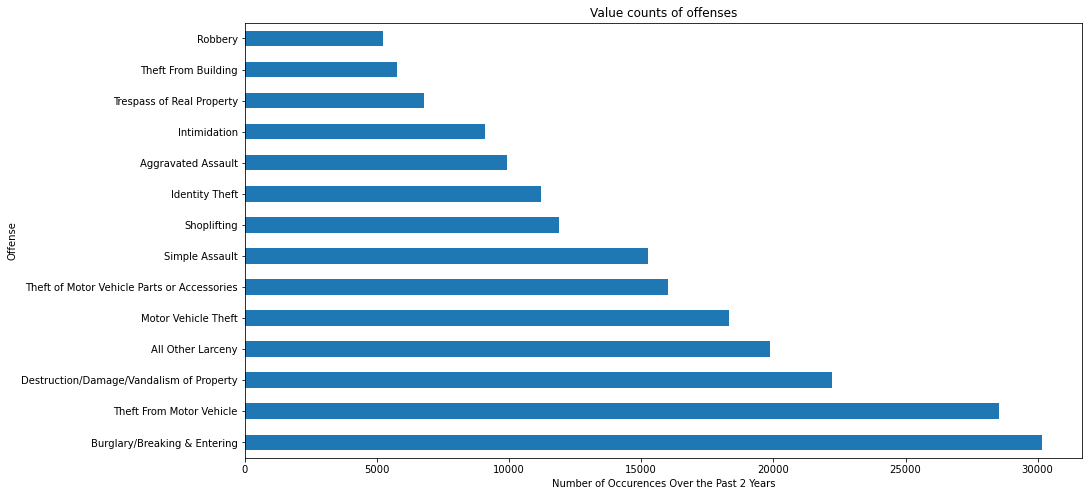

In [8]:
ax = df.value_counts('Offense').plot.barh(figsize = (15,8), title = "Value counts of offenses");
ax.set_xlabel("Number of Occurences Over the Past 2 Years");

We can see that there's an imbalance, so let's use SMOTE to address that

In [9]:
sm = SMOTE(random_state = 1)
X_train, y_train = sm.fit_sample(X_train, y_train)

Now it's time to initialize our model

## Random Forest Model ##

In [10]:
#rf = RandomForestClassifier(criterion= "entropy",random_state = 1,  max_depth = 5)

#rf.fit(X_train, y_train)
#rf_train_pred = rf.predict(X_train)
#rf_test_pred = rf.predict(X_test)

In [11]:
#print(classification_report(y_train, rf_train_pred))

In [12]:
#print(classification_report(y_test, rf_test_pred))

In [13]:
#fig, ax = plt.subplots(figsize=(15,15))
#interp.plot_confusion_matrix(rf, X_test, y_test);

#np.interp.plot_confusion_matrix(figsize=(10,10))

#cm = confusion_matrix(y_test, rf_test_pred);
#cmp = ConfusionMatrixDisplay(cm);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp.plot(ax=ax);
#cmp.ax_.set_title("Confusion Matrix");

0) Aggravated Assault

1) All Other Larceny

2) Burglary/Breaking & Entering

3) Destruction/Damage/Vandalism of Property

4) Intimidation

5) Motor Vehicle Theft

6) Shoplifting

7) Simple Assault

8) Theft From Motor Vehicle

9) Theft of Motor Vehicle Parts or Accessories


### Crime Confusion Matrix ###

**0) Aggravated Assault**

* 615 crimes were correctly predicted as being "aggravated assault" crimes
* 1,225 crimes were wrongly predicted as not being "aggravated assault" crimes
* 1,030 crimes were wrongly predicted as being "aggravated assault" crimes
* 28,976 crimes were correctly predicted as not being "aggravated assault" crimes

**1) All Other Larceny**

* 578 crimes were correctly predicted as being "all other larceny" crimes
* 2,834 crimes were wrongly predicted as not being "all other larceny" crimes
* 2,389 crimes were wrongly precicted as being "all other larceny" crimes
* 26,045 crimes were correctly predicted as not being "all other larceny" crimes

**2) Burglary/Breaking & Entering**

* 1799 crimes were correctly predicted as being "burglary/breaking & entering" crimes
* 3,096 crimes were wrongly predicted as not being "burglary/breaking & entering" crimes
* 4,414 crimes were wrongly predicted as being "burglary/breaking & entering" crimes
* 23,722 crimes were correctly predicted as not being "burglary/breaking & entering" crimes

**3) Destruction/Damage/Vandalism of Property**

* 283 crimes were correctly predicted as being "destruction/damage/vandalism of property" crimes
* 3,579 crimes were wrongly predicted as not being "destruction/damage/vandalism of property" crimes
* 891 crimes were wrongly predicted as being "destruction/damage/vandalism of property" crimes
* 28,942 crimes were correctly predicted as not being "destruction/damage/vandalism of property" crimes

**4) Intimidation**

* 846 crimes were correctly predicted as being "intimidation" crimes
* 713 crimes were wrongly predicted as not being "intimidation" crimes
* 1,748 crimes were wrongly predicted as being "intimidation" crimes
* 29, 559 crimes were correctly predicted as not being "intimidation" crimes

**5) Motor Vehicle Theft**

* 796 crimes were correctly predicted as being "motor vehicle theft" crimes
* 2,548 crimes were wrongly predicted as not being "motor vehicle theft" crimes
* 3,583 crimes were wrongly predicted as being "motor vehicle theft" crimes
* 27,841 crimes were correctly predicted as not being "motor vehicle theft" crimes

**6) Shoplifting**

* 1559 crimes were correctly predicted as being "shoplifting" crimes
* 424 crimes were wrongly predicted as not being "shoplifting" crimes
* 7,522 crimes were wrongly predicted as being "shoplifting" crimes
* 27,652 crimes were correctly predicted as not being "shoplifting" crimes

**7) Simple Assault**

* 853 crimes were correctly predicted as being "simple assault" crimes
* 1,758 crimes were wrongly predicted as not being "simple assault" crimes
* 918 crimes were wrongly predicted as being "simple assault" crimes
* 30,993 crimes were correctly predicted as not being "simple assault" crimes

**8) Theft From Motor Vehicle**

* 244 crimes were correctly predicted as being "theft from motor vehicle" crimes
* 4,651 crimes were wrongly predicted as not being "theft from motor vehicle" crimes
* 549 crimes were wrongly predicted as being "theft from motor vehicle" crimes
* 31,282 crimes were correctly predicted as not being "theft from motor vehicle" crimes

**9)  Theft of Motor Vehicle Parts or Accessories**

* 244 crimes were correctly predicted as being "theft of motor vehicle parts or accessories" crimes
* 3,021 crimes were wrongly predicted as not being "theft of motor vehicle parts or accessories" crimes
* 985 crimes were wrongly predicted as not being "theft of motor vehicle parts or accessories" crimes
* 26,966 crimes were correctly predicted as not being "theft of motor vehicle parts or accessories" crimes

### Crime Classification Report ###

## Random Forest Tuning ##

In [14]:
#rf2 = RandomForestClassifier()

#param_grid = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [1, 2, 3, 4, 5],
   # 'min_samples_split': [0.2, 0.25, 0.3, 0.35, 0.4 ],
   # 'min_samples_leaf': [0.1, 0.2, 0.3]
#}


#gs_rf = GridSearchCV(rf2, param_grid)
#gs_rf.fit(X_train, y_train)
#gs_rf.best_params_

In [15]:
#gs_forest_train_pred = gs_rf.predict(X_train)
#print(classification_report(y_train, gs_forest_train_pred))

In [16]:
#gs_forest_test_pred = gs_rf.predict(X_test)
#print(classification_report(y_test, gs_forest_test_pred))

In [17]:
#rf3 = RandomForestClassifier()

#param_grid2 = {
   # 'criterion': ['entropy'],
   # 'random_state': [1],
   # 'max_depth': [2, 3, 4],
    #'min_samples_split': [0.24, 0.25, 0.26],
   # 'min_samples_leaf': [0.1, 0.12, 0.13]
#}


#gs_rf2 = GridSearchCV(rf2, param_grid)
#gs_rf2.fit(X_train, y_train)
#gs_rf2.best_params_

In [18]:
#rf4 = RandomForestClassifier(criterion= "entropy", random_state = 1,  max_depth = 3, min_samples_split= 0.2, min_samples_leaf = 0.1,  )

#rf4.fit(X_train, y_train)
#rf_train_pred2 = rf4.predict(X_train)
#rf_test_pred2 = rf4.predict(X_test)

In [19]:
#cm2 = confusion_matrix(y_test, rf_test_pred2);
#cmp2 = ConfusionMatrixDisplay(cm2);
#fig, ax = plt.subplots(figsize=(13,13));
#cmp2.plot(ax=ax);
#cmp2.ax_.set_title("Confusion Matrix");

In [20]:
#print(classification_report(y_train, rf_train_pred2))

In [21]:
#print(classification_report(y_test, rf_test_pred2))

In [22]:
#print ("My program took", time.time() - start_time, "to run")

## CatBoost Model ##

In [23]:
CBC = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
)

In [24]:
CBC.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.106154
0:	learn: 2.3860164	total: 324ms	remaining: 5m 23s
1:	learn: 2.2727071	total: 510ms	remaining: 4m 14s
2:	learn: 2.1874258	total: 709ms	remaining: 3m 55s
3:	learn: 2.1223670	total: 916ms	remaining: 3m 48s
4:	learn: 2.0676021	total: 1.11s	remaining: 3m 41s
5:	learn: 2.0236948	total: 1.31s	remaining: 3m 37s
6:	learn: 1.9875073	total: 1.51s	remaining: 3m 34s
7:	learn: 1.9540026	total: 1.71s	remaining: 3m 31s
8:	learn: 1.9258069	total: 1.91s	remaining: 3m 30s
9:	learn: 1.9014057	total: 2.11s	remaining: 3m 29s
10:	learn: 1.8788836	total: 2.31s	remaining: 3m 28s
11:	learn: 1.8596379	total: 2.51s	remaining: 3m 26s
12:	learn: 1.8423440	total: 2.71s	remaining: 3m 25s
13:	learn: 1.8281231	total: 2.9s	remaining: 3m 24s
14:	learn: 1.8143958	total: 3.1s	remaining: 3m 23s
15:	learn: 1.8035037	total: 3.29s	remaining: 3m 22s
16:	learn: 1.7913382	total: 3.48s	remaining: 3m 21s
17:	learn: 1.7821432	total: 3.68s	remaining: 3m 20s
18:	learn: 1.7733610	total: 3.88s	remaining: 3

158:	learn: 1.5742832	total: 31.1s	remaining: 2m 44s
159:	learn: 1.5736584	total: 31.3s	remaining: 2m 44s
160:	learn: 1.5732131	total: 31.5s	remaining: 2m 44s
161:	learn: 1.5726191	total: 31.7s	remaining: 2m 44s
162:	learn: 1.5717388	total: 31.9s	remaining: 2m 43s
163:	learn: 1.5713966	total: 32.1s	remaining: 2m 43s
164:	learn: 1.5707956	total: 32.3s	remaining: 2m 43s
165:	learn: 1.5702789	total: 32.5s	remaining: 2m 43s
166:	learn: 1.5699159	total: 32.7s	remaining: 2m 43s
167:	learn: 1.5690387	total: 32.9s	remaining: 2m 42s
168:	learn: 1.5682579	total: 33.1s	remaining: 2m 42s
169:	learn: 1.5676706	total: 33.3s	remaining: 2m 42s
170:	learn: 1.5673423	total: 33.5s	remaining: 2m 42s
171:	learn: 1.5669257	total: 33.7s	remaining: 2m 42s
172:	learn: 1.5662895	total: 33.9s	remaining: 2m 41s
173:	learn: 1.5658932	total: 34.1s	remaining: 2m 41s
174:	learn: 1.5654667	total: 34.3s	remaining: 2m 41s
175:	learn: 1.5651714	total: 34.5s	remaining: 2m 41s
176:	learn: 1.5645790	total: 34.7s	remaining: 

314:	learn: 1.5113806	total: 1m 1s	remaining: 2m 14s
315:	learn: 1.5110343	total: 1m 1s	remaining: 2m 13s
316:	learn: 1.5107853	total: 1m 2s	remaining: 2m 13s
317:	learn: 1.5105016	total: 1m 2s	remaining: 2m 13s
318:	learn: 1.5101647	total: 1m 2s	remaining: 2m 13s
319:	learn: 1.5098202	total: 1m 2s	remaining: 2m 13s
320:	learn: 1.5095813	total: 1m 2s	remaining: 2m 12s
321:	learn: 1.5093225	total: 1m 3s	remaining: 2m 12s
322:	learn: 1.5091202	total: 1m 3s	remaining: 2m 12s
323:	learn: 1.5088779	total: 1m 3s	remaining: 2m 12s
324:	learn: 1.5085897	total: 1m 3s	remaining: 2m 12s
325:	learn: 1.5084782	total: 1m 3s	remaining: 2m 11s
326:	learn: 1.5082234	total: 1m 3s	remaining: 2m 11s
327:	learn: 1.5079500	total: 1m 4s	remaining: 2m 11s
328:	learn: 1.5075930	total: 1m 4s	remaining: 2m 11s
329:	learn: 1.5073111	total: 1m 4s	remaining: 2m 11s
330:	learn: 1.5070112	total: 1m 4s	remaining: 2m 10s
331:	learn: 1.5066810	total: 1m 4s	remaining: 2m 10s
332:	learn: 1.5062966	total: 1m 5s	remaining: 

468:	learn: 1.4756278	total: 1m 31s	remaining: 1m 43s
469:	learn: 1.4754059	total: 1m 31s	remaining: 1m 43s
470:	learn: 1.4752155	total: 1m 32s	remaining: 1m 43s
471:	learn: 1.4749867	total: 1m 32s	remaining: 1m 43s
472:	learn: 1.4746931	total: 1m 32s	remaining: 1m 43s
473:	learn: 1.4745648	total: 1m 32s	remaining: 1m 42s
474:	learn: 1.4743400	total: 1m 32s	remaining: 1m 42s
475:	learn: 1.4741446	total: 1m 33s	remaining: 1m 42s
476:	learn: 1.4740597	total: 1m 33s	remaining: 1m 42s
477:	learn: 1.4737014	total: 1m 33s	remaining: 1m 42s
478:	learn: 1.4735188	total: 1m 33s	remaining: 1m 41s
479:	learn: 1.4731186	total: 1m 33s	remaining: 1m 41s
480:	learn: 1.4729925	total: 1m 34s	remaining: 1m 41s
481:	learn: 1.4728492	total: 1m 34s	remaining: 1m 41s
482:	learn: 1.4727023	total: 1m 34s	remaining: 1m 41s
483:	learn: 1.4724231	total: 1m 34s	remaining: 1m 40s
484:	learn: 1.4721548	total: 1m 34s	remaining: 1m 40s
485:	learn: 1.4719032	total: 1m 35s	remaining: 1m 40s
486:	learn: 1.4717607	total:

622:	learn: 1.4479874	total: 2m 3s	remaining: 1m 14s
623:	learn: 1.4478290	total: 2m 3s	remaining: 1m 14s
624:	learn: 1.4477604	total: 2m 3s	remaining: 1m 14s
625:	learn: 1.4476167	total: 2m 4s	remaining: 1m 14s
626:	learn: 1.4473656	total: 2m 4s	remaining: 1m 13s
627:	learn: 1.4472597	total: 2m 4s	remaining: 1m 13s
628:	learn: 1.4472010	total: 2m 4s	remaining: 1m 13s
629:	learn: 1.4471166	total: 2m 4s	remaining: 1m 13s
630:	learn: 1.4469081	total: 2m 5s	remaining: 1m 13s
631:	learn: 1.4467758	total: 2m 5s	remaining: 1m 12s
632:	learn: 1.4466264	total: 2m 5s	remaining: 1m 12s
633:	learn: 1.4464893	total: 2m 5s	remaining: 1m 12s
634:	learn: 1.4462995	total: 2m 5s	remaining: 1m 12s
635:	learn: 1.4460986	total: 2m 6s	remaining: 1m 12s
636:	learn: 1.4459321	total: 2m 6s	remaining: 1m 11s
637:	learn: 1.4458342	total: 2m 6s	remaining: 1m 11s
638:	learn: 1.4457094	total: 2m 6s	remaining: 1m 11s
639:	learn: 1.4456074	total: 2m 6s	remaining: 1m 11s
640:	learn: 1.4455127	total: 2m 7s	remaining: 

778:	learn: 1.4258385	total: 2m 35s	remaining: 44.1s
779:	learn: 1.4257255	total: 2m 35s	remaining: 43.9s
780:	learn: 1.4255266	total: 2m 35s	remaining: 43.7s
781:	learn: 1.4254175	total: 2m 36s	remaining: 43.5s
782:	learn: 1.4252717	total: 2m 36s	remaining: 43.3s
783:	learn: 1.4251898	total: 2m 36s	remaining: 43.1s
784:	learn: 1.4250211	total: 2m 36s	remaining: 42.9s
785:	learn: 1.4249606	total: 2m 36s	remaining: 42.7s
786:	learn: 1.4248615	total: 2m 37s	remaining: 42.5s
787:	learn: 1.4246137	total: 2m 37s	remaining: 42.3s
788:	learn: 1.4244376	total: 2m 37s	remaining: 42.1s
789:	learn: 1.4242983	total: 2m 37s	remaining: 41.9s
790:	learn: 1.4241149	total: 2m 37s	remaining: 41.7s
791:	learn: 1.4240299	total: 2m 38s	remaining: 41.5s
792:	learn: 1.4239072	total: 2m 38s	remaining: 41.3s
793:	learn: 1.4238224	total: 2m 38s	remaining: 41.1s
794:	learn: 1.4236738	total: 2m 38s	remaining: 40.9s
795:	learn: 1.4235074	total: 2m 38s	remaining: 40.7s
796:	learn: 1.4233414	total: 2m 38s	remaining:

935:	learn: 1.4070255	total: 3m 5s	remaining: 12.7s
936:	learn: 1.4069370	total: 3m 6s	remaining: 12.5s
937:	learn: 1.4068384	total: 3m 6s	remaining: 12.3s
938:	learn: 1.4066060	total: 3m 6s	remaining: 12.1s
939:	learn: 1.4065161	total: 3m 6s	remaining: 11.9s
940:	learn: 1.4063901	total: 3m 6s	remaining: 11.7s
941:	learn: 1.4062800	total: 3m 7s	remaining: 11.5s
942:	learn: 1.4062143	total: 3m 7s	remaining: 11.3s
943:	learn: 1.4060973	total: 3m 7s	remaining: 11.1s
944:	learn: 1.4059308	total: 3m 7s	remaining: 10.9s
945:	learn: 1.4058520	total: 3m 7s	remaining: 10.7s
946:	learn: 1.4057467	total: 3m 8s	remaining: 10.5s
947:	learn: 1.4055887	total: 3m 8s	remaining: 10.3s
948:	learn: 1.4055221	total: 3m 8s	remaining: 10.1s
949:	learn: 1.4052952	total: 3m 8s	remaining: 9.93s
950:	learn: 1.4052322	total: 3m 8s	remaining: 9.73s
951:	learn: 1.4051505	total: 3m 9s	remaining: 9.53s
952:	learn: 1.4050605	total: 3m 9s	remaining: 9.33s
953:	learn: 1.4049601	total: 3m 9s	remaining: 9.13s
954:	learn: 

In [25]:
 #y_pred = CBC.predict(X_test)
#print('Accuracy',accuracy_score(y_test, y_pred))
CBC_train_pred = CBC.predict(X_train)
CBC_test_pred = CBC.predict(X_test)


In [26]:
print(classification_report(y_train, CBC_train_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.55      0.53      0.54     22703
                          All Other Larceny       0.28      0.16      0.20     22703
               Burglary/Breaking & Entering       0.34      0.42      0.38     22703
   Destruction/Damage/Vandalism of Property       0.29      0.15      0.20     22703
                             Identity Theft       0.74      0.81      0.78     22703
                               Intimidation       0.55      0.60      0.57     22703
                        Motor Vehicle Theft       0.33      0.31      0.32     22703
                                    Robbery       0.44      0.50      0.47     22703
                                Shoplifting       0.46      0.68      0.54     22703
                             Simple Assault       0.54      0.51      0.52     22703
                        Theft From Building       0.41      0.47

In [27]:
print(classification_report(y_test, CBC_test_pred))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.36      0.28      0.32      2493
                          All Other Larceny       0.20      0.13      0.16      4879
               Burglary/Breaking & Entering       0.35      0.40      0.37      7460
   Destruction/Damage/Vandalism of Property       0.23      0.12      0.16      5540
                             Identity Theft       0.63      0.77      0.69      2921
                               Intimidation       0.36      0.34      0.35      2250
                        Motor Vehicle Theft       0.26      0.32      0.28      4563
                                    Robbery       0.14      0.10      0.12      1319
                                Shoplifting       0.33      0.63      0.44      2975
                             Simple Assault       0.47      0.55      0.50      3790
                        Theft From Building       0.09      0.09

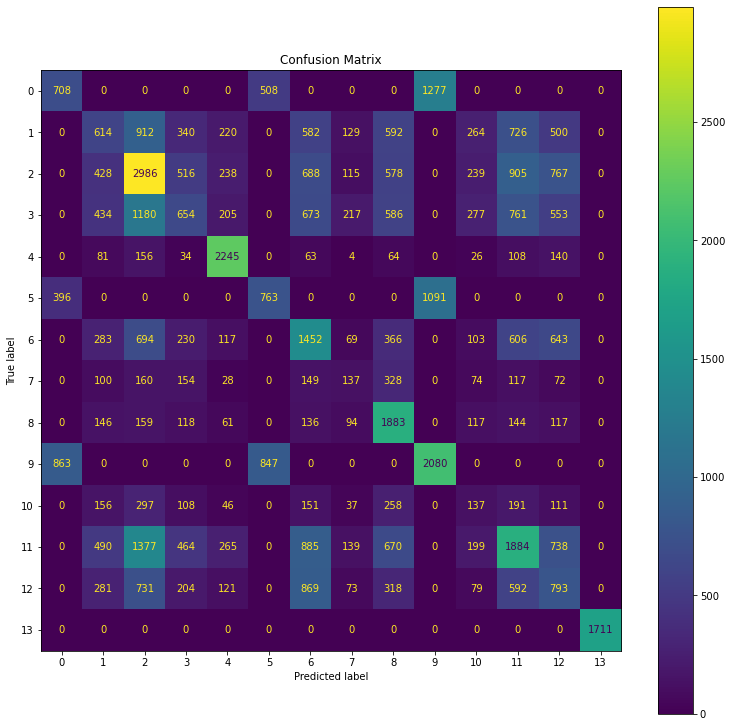

In [28]:
cm = confusion_matrix(y_test, CBC_test_pred);
cmp = ConfusionMatrixDisplay(cm);
fig, ax = plt.subplots(figsize=(13,13));
cmp.plot(ax=ax);
cmp.ax_.set_title("Confusion Matrix");

In [29]:
params = {'learning_rate': [0.05, 0.1, 0.5],
          'random_state' : [1],
          'depth': [2, 4, 6],
          'iterations': [100, 500, 1000]
         }

In [30]:
CBC_gs = GridSearchCV(CBC, params)
CBC_gs.fit(X_train, y_train, early_stopping_rounds=5, plot = True)
CBC_gs.best_params_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419905	total: 74.7ms	remaining: 7.4s
1:	learn: 2.4762771	total: 147ms	remaining: 7.22s
2:	learn: 2.4237491	total: 220ms	remaining: 7.11s
3:	learn: 2.3795732	total: 296ms	remaining: 7.1s
4:	learn: 2.3413865	total: 369ms	remaining: 7.01s
5:	learn: 2.3077863	total: 442ms	remaining: 6.92s
6:	learn: 2.2778492	total: 516ms	remaining: 6.86s
7:	learn: 2.2509248	total: 589ms	remaining: 6.77s
8:	learn: 2.2265328	total: 661ms	remaining: 6.68s
9:	learn: 2.2043058	total: 734ms	remaining: 6.61s
10:	learn: 2.1839546	total: 809ms	remaining: 6.55s
11:	learn: 2.1652467	total: 885ms	remaining: 6.49s
12:	learn: 2.1479914	total: 958ms	remaining: 6.41s
13:	learn: 2.1252934	total: 1.03s	remaining: 6.35s
14:	learn: 2.1101739	total: 1.1s	remaining: 6.26s
15:	learn: 2.0961338	total: 1.18s	remaining: 6.17s
16:	learn: 2.0838991	total: 1.25s	remaining: 6.1s
17:	learn: 2.0673980	total: 1.32s	remaining: 6.03s
18:	learn: 2.0528886	total: 1.4s	remaining: 5.97s
19:	learn: 2.0442229	total: 1.47s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419888	total: 74.2ms	remaining: 7.34s
1:	learn: 2.4762747	total: 147ms	remaining: 7.22s
2:	learn: 2.4237462	total: 220ms	remaining: 7.1s
3:	learn: 2.3795701	total: 294ms	remaining: 7.05s
4:	learn: 2.3413832	total: 367ms	remaining: 6.96s
5:	learn: 2.3077829	total: 441ms	remaining: 6.91s
6:	learn: 2.2778457	total: 515ms	remaining: 6.84s
7:	learn: 2.2509212	total: 587ms	remaining: 6.75s
8:	learn: 2.2265291	total: 660ms	remaining: 6.67s
9:	learn: 2.2043020	total: 734ms	remaining: 6.61s
10:	learn: 2.1839508	total: 807ms	remaining: 6.53s
11:	learn: 2.1652428	total: 880ms	remaining: 6.45s
12:	learn: 2.1479875	total: 955ms	remaining: 6.39s
13:	learn: 2.1252848	total: 1.03s	remaining: 6.31s
14:	learn: 2.1101650	total: 1.1s	remaining: 6.22s
15:	learn: 2.0961247	total: 1.17s	remaining: 6.14s
16:	learn: 2.0839419	total: 1.24s	remaining: 6.06s
17:	learn: 2.0674435	total: 1.31s	remaining: 5.98s
18:	learn: 2.0529228	total: 1.39s	remaining: 5.92s
19:	learn: 2.0443013	total: 1.46s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419897	total: 75.2ms	remaining: 7.45s
1:	learn: 2.4762763	total: 148ms	remaining: 7.25s
2:	learn: 2.4237484	total: 223ms	remaining: 7.22s
3:	learn: 2.3795727	total: 297ms	remaining: 7.13s
4:	learn: 2.3413861	total: 369ms	remaining: 7.02s
5:	learn: 2.3077861	total: 442ms	remaining: 6.92s
6:	learn: 2.2778492	total: 515ms	remaining: 6.84s
7:	learn: 2.2509249	total: 587ms	remaining: 6.75s
8:	learn: 2.2265331	total: 660ms	remaining: 6.67s
9:	learn: 2.2043062	total: 733ms	remaining: 6.59s
10:	learn: 2.1839551	total: 805ms	remaining: 6.51s
11:	learn: 2.1652473	total: 879ms	remaining: 6.44s
12:	learn: 2.1479921	total: 952ms	remaining: 6.37s
13:	learn: 2.1254939	total: 1.03s	remaining: 6.3s
14:	learn: 2.1103742	total: 1.1s	remaining: 6.21s
15:	learn: 2.0963340	total: 1.17s	remaining: 6.13s
16:	learn: 2.0841904	total: 1.24s	remaining: 6.06s
17:	learn: 2.0677952	total: 1.32s	remaining: 6s
18:	learn: 2.0532921	total: 1.39s	remaining: 5.93s
19:	learn: 2.0446702	total: 1.46s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419915	total: 75.1ms	remaining: 7.43s
1:	learn: 2.4762787	total: 149ms	remaining: 7.32s
2:	learn: 2.4237512	total: 223ms	remaining: 7.2s
3:	learn: 2.3795758	total: 297ms	remaining: 7.13s
4:	learn: 2.3413894	total: 370ms	remaining: 7.03s
5:	learn: 2.3077896	total: 444ms	remaining: 6.96s
6:	learn: 2.2778528	total: 518ms	remaining: 6.88s
7:	learn: 2.2509286	total: 592ms	remaining: 6.81s
8:	learn: 2.2265368	total: 666ms	remaining: 6.73s
9:	learn: 2.2043099	total: 741ms	remaining: 6.67s
10:	learn: 2.1839590	total: 814ms	remaining: 6.59s
11:	learn: 2.1652512	total: 888ms	remaining: 6.51s
12:	learn: 2.1479960	total: 964ms	remaining: 6.45s
13:	learn: 2.1255508	total: 1.04s	remaining: 6.4s
14:	learn: 2.1104311	total: 1.11s	remaining: 6.32s
15:	learn: 2.0963909	total: 1.19s	remaining: 6.23s
16:	learn: 2.0843445	total: 1.26s	remaining: 6.14s
17:	learn: 2.0680067	total: 1.33s	remaining: 6.07s
18:	learn: 2.0535554	total: 1.41s	remaining: 6.01s
19:	learn: 2.0449523	total: 1.48s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419908	total: 74.3ms	remaining: 7.35s
1:	learn: 2.4762776	total: 149ms	remaining: 7.31s
2:	learn: 2.4237497	total: 223ms	remaining: 7.2s
3:	learn: 2.3795740	total: 296ms	remaining: 7.11s
4:	learn: 2.3413873	total: 370ms	remaining: 7.02s
5:	learn: 2.3077872	total: 443ms	remaining: 6.93s
6:	learn: 2.2778502	total: 517ms	remaining: 6.87s
7:	learn: 2.2509259	total: 590ms	remaining: 6.79s
8:	learn: 2.2265339	total: 665ms	remaining: 6.72s
9:	learn: 2.2043069	total: 742ms	remaining: 6.68s
10:	learn: 2.1839558	total: 816ms	remaining: 6.6s
11:	learn: 2.1652479	total: 889ms	remaining: 6.52s
12:	learn: 2.1479926	total: 963ms	remaining: 6.44s
13:	learn: 2.1254419	total: 1.04s	remaining: 6.37s
14:	learn: 2.1103223	total: 1.11s	remaining: 6.27s
15:	learn: 2.0962821	total: 1.18s	remaining: 6.17s
16:	learn: 2.0841821	total: 1.25s	remaining: 6.08s
17:	learn: 2.0677783	total: 1.32s	remaining: 6.01s
18:	learn: 2.0532792	total: 1.39s	remaining: 5.94s
19:	learn: 2.0447163	total: 1.46s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519228	total: 73.3ms	remaining: 7.26s
1:	learn: 2.3598816	total: 145ms	remaining: 7.1s
2:	learn: 2.2913345	total: 217ms	remaining: 7.01s
3:	learn: 2.2369306	total: 292ms	remaining: 7s
4:	learn: 2.1922573	total: 364ms	remaining: 6.91s
5:	learn: 2.1547818	total: 437ms	remaining: 6.84s
6:	learn: 2.1096249	total: 514ms	remaining: 6.82s
7:	learn: 2.0810384	total: 584ms	remaining: 6.71s
8:	learn: 2.0610386	total: 655ms	remaining: 6.62s
9:	learn: 2.0339150	total: 731ms	remaining: 6.58s
10:	learn: 2.0124946	total: 801ms	remaining: 6.48s
11:	learn: 1.9937237	total: 873ms	remaining: 6.4s
12:	learn: 1.9794299	total: 948ms	remaining: 6.34s
13:	learn: 1.9621690	total: 1.02s	remaining: 6.28s
14:	learn: 1.9470963	total: 1.09s	remaining: 6.2s
15:	learn: 1.9386151	total: 1.17s	remaining: 6.12s
16:	learn: 1.9257931	total: 1.24s	remaining: 6.03s
17:	learn: 1.9182830	total: 1.31s	remaining: 5.97s
18:	learn: 1.9055871	total: 1.38s	remaining: 5.89s
19:	learn: 1.8995189	total: 1.45s	remaining: 5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519194	total: 76.2ms	remaining: 7.54s
1:	learn: 2.3598779	total: 149ms	remaining: 7.3s
2:	learn: 2.2913307	total: 222ms	remaining: 7.18s
3:	learn: 2.2369266	total: 295ms	remaining: 7.07s
4:	learn: 2.1922532	total: 367ms	remaining: 6.98s
5:	learn: 2.1547777	total: 440ms	remaining: 6.89s
6:	learn: 2.1097061	total: 513ms	remaining: 6.82s
7:	learn: 2.0811186	total: 584ms	remaining: 6.72s
8:	learn: 2.0611038	total: 656ms	remaining: 6.63s
9:	learn: 2.0374271	total: 728ms	remaining: 6.55s
10:	learn: 2.0132495	total: 802ms	remaining: 6.49s
11:	learn: 1.9944820	total: 874ms	remaining: 6.41s
12:	learn: 1.9796014	total: 949ms	remaining: 6.35s
13:	learn: 1.9622779	total: 1.02s	remaining: 6.28s
14:	learn: 1.9472079	total: 1.09s	remaining: 6.21s
15:	learn: 1.9384749	total: 1.17s	remaining: 6.14s
16:	learn: 1.9256543	total: 1.24s	remaining: 6.06s
17:	learn: 1.9177440	total: 1.31s	remaining: 5.99s
18:	learn: 1.9052465	total: 1.39s	remaining: 5.91s
19:	learn: 1.8991149	total: 1.46s	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519212	total: 75.2ms	remaining: 7.45s
1:	learn: 2.3598807	total: 149ms	remaining: 7.29s
2:	learn: 2.2913341	total: 223ms	remaining: 7.21s
3:	learn: 2.2369305	total: 297ms	remaining: 7.12s
4:	learn: 2.1922575	total: 370ms	remaining: 7.03s
5:	learn: 2.1547822	total: 443ms	remaining: 6.93s
6:	learn: 2.1100680	total: 517ms	remaining: 6.87s
7:	learn: 2.0814807	total: 588ms	remaining: 6.76s
8:	learn: 2.0614867	total: 660ms	remaining: 6.68s
9:	learn: 2.0378105	total: 734ms	remaining: 6.6s
10:	learn: 2.0137419	total: 809ms	remaining: 6.55s
11:	learn: 1.9949747	total: 886ms	remaining: 6.5s
12:	learn: 1.9802001	total: 962ms	remaining: 6.44s
13:	learn: 1.9629797	total: 1.03s	remaining: 6.36s
14:	learn: 1.9479099	total: 1.11s	remaining: 6.27s
15:	learn: 1.9392328	total: 1.18s	remaining: 6.19s
16:	learn: 1.9264121	total: 1.25s	remaining: 6.1s
17:	learn: 1.9184929	total: 1.32s	remaining: 6.03s
18:	learn: 1.9060282	total: 1.4s	remaining: 5.95s
19:	learn: 1.8999278	total: 1.47s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519246	total: 74.9ms	remaining: 7.41s
1:	learn: 2.3598844	total: 149ms	remaining: 7.32s
2:	learn: 2.2913380	total: 224ms	remaining: 7.23s
3:	learn: 2.2369345	total: 298ms	remaining: 7.16s
4:	learn: 2.1922616	total: 372ms	remaining: 7.06s
5:	learn: 2.1547863	total: 449ms	remaining: 7.04s
6:	learn: 2.1102350	total: 526ms	remaining: 6.98s
7:	learn: 2.0816476	total: 597ms	remaining: 6.86s
8:	learn: 2.0514492	total: 671ms	remaining: 6.79s
9:	learn: 2.0289973	total: 743ms	remaining: 6.68s
10:	learn: 2.0140387	total: 815ms	remaining: 6.59s
11:	learn: 1.9952742	total: 888ms	remaining: 6.51s
12:	learn: 1.9805568	total: 962ms	remaining: 6.44s
13:	learn: 1.9633860	total: 1.04s	remaining: 6.37s
14:	learn: 1.9483160	total: 1.11s	remaining: 6.28s
15:	learn: 1.9398404	total: 1.18s	remaining: 6.2s
16:	learn: 1.9270219	total: 1.25s	remaining: 6.12s
17:	learn: 1.9189720	total: 1.33s	remaining: 6.04s
18:	learn: 1.9064374	total: 1.4s	remaining: 5.97s
19:	learn: 1.9003108	total: 1.48s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519234	total: 76.1ms	remaining: 7.53s
1:	learn: 2.3598824	total: 151ms	remaining: 7.38s
2:	learn: 2.2913355	total: 225ms	remaining: 7.26s
3:	learn: 2.2369317	total: 299ms	remaining: 7.18s
4:	learn: 2.1922585	total: 375ms	remaining: 7.12s
5:	learn: 2.1547830	total: 448ms	remaining: 7.02s
6:	learn: 2.1100864	total: 524ms	remaining: 6.96s
7:	learn: 2.0814992	total: 594ms	remaining: 6.84s
8:	learn: 2.0615118	total: 665ms	remaining: 6.73s
9:	learn: 2.0378352	total: 738ms	remaining: 6.64s
10:	learn: 2.0137440	total: 811ms	remaining: 6.56s
11:	learn: 1.9949766	total: 886ms	remaining: 6.5s
12:	learn: 1.9802300	total: 960ms	remaining: 6.42s
13:	learn: 1.9629747	total: 1.03s	remaining: 6.35s
14:	learn: 1.9479051	total: 1.1s	remaining: 6.25s
15:	learn: 1.9394054	total: 1.18s	remaining: 6.18s
16:	learn: 1.9265853	total: 1.25s	remaining: 6.1s
17:	learn: 1.9137899	total: 1.32s	remaining: 6.03s
18:	learn: 1.9074215	total: 1.4s	remaining: 5.95s
19:	learn: 1.8968907	total: 1.47s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757014	total: 74.9ms	remaining: 7.42s
1:	learn: 1.9666265	total: 149ms	remaining: 7.3s
2:	learn: 1.8695879	total: 223ms	remaining: 7.22s
3:	learn: 1.8166120	total: 299ms	remaining: 7.18s
4:	learn: 1.7886033	total: 377ms	remaining: 7.15s
5:	learn: 1.7793872	total: 460ms	remaining: 7.21s
6:	learn: 1.7734137	total: 537ms	remaining: 7.14s
7:	learn: 1.7591073	total: 614ms	remaining: 7.05s
8:	learn: 1.7526601	total: 692ms	remaining: 7s
9:	learn: 1.7449783	total: 776ms	remaining: 6.99s
10:	learn: 1.7397271	total: 849ms	remaining: 6.87s
11:	learn: 1.7343231	total: 926ms	remaining: 6.79s
12:	learn: 1.7259028	total: 1s	remaining: 6.7s
13:	learn: 1.7231708	total: 1.07s	remaining: 6.59s
14:	learn: 1.7175205	total: 1.15s	remaining: 6.5s
15:	learn: 1.7148230	total: 1.22s	remaining: 6.4s
16:	learn: 1.7125106	total: 1.3s	remaining: 6.34s
17:	learn: 1.7096164	total: 1.37s	remaining: 6.25s
18:	learn: 1.7068483	total: 1.45s	remaining: 6.17s
19:	learn: 1.7033351	total: 1.52s	remaining: 6.1s
2

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 75.6ms	remaining: 7.48s
1:	learn: 1.9656498	total: 150ms	remaining: 7.36s
2:	learn: 1.8689737	total: 225ms	remaining: 7.26s
3:	learn: 1.8160845	total: 300ms	remaining: 7.21s
4:	learn: 1.7881309	total: 374ms	remaining: 7.11s
5:	learn: 1.7768371	total: 458ms	remaining: 7.18s
6:	learn: 1.7605271	total: 536ms	remaining: 7.12s
7:	learn: 1.7534484	total: 613ms	remaining: 7.05s
8:	learn: 1.7489435	total: 691ms	remaining: 6.98s
9:	learn: 1.7439175	total: 757ms	remaining: 6.82s
10:	learn: 1.7382483	total: 837ms	remaining: 6.77s
11:	learn: 1.7297391	total: 911ms	remaining: 6.68s
12:	learn: 1.7260991	total: 989ms	remaining: 6.62s
13:	learn: 1.7235711	total: 1.06s	remaining: 6.53s
14:	learn: 1.7200408	total: 1.14s	remaining: 6.45s
15:	learn: 1.7182766	total: 1.21s	remaining: 6.35s
16:	learn: 1.7149603	total: 1.29s	remaining: 6.28s
17:	learn: 1.7127125	total: 1.36s	remaining: 6.21s
18:	learn: 1.7097499	total: 1.45s	remaining: 6.17s
19:	learn: 1.7062853	total: 1.53s	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757018	total: 74.5ms	remaining: 7.37s
1:	learn: 1.9663506	total: 149ms	remaining: 7.31s
2:	learn: 1.8700178	total: 223ms	remaining: 7.21s
3:	learn: 1.8174280	total: 298ms	remaining: 7.16s
4:	learn: 1.7886973	total: 375ms	remaining: 7.13s
5:	learn: 1.7727166	total: 449ms	remaining: 7.04s
6:	learn: 1.7648157	total: 528ms	remaining: 7.01s
7:	learn: 1.7584485	total: 605ms	remaining: 6.96s
8:	learn: 1.7536883	total: 683ms	remaining: 6.91s
9:	learn: 1.7431103	total: 756ms	remaining: 6.8s
10:	learn: 1.7395249	total: 834ms	remaining: 6.75s
11:	learn: 1.7324119	total: 918ms	remaining: 6.73s
12:	learn: 1.7303471	total: 997ms	remaining: 6.67s
13:	learn: 1.7268330	total: 1.08s	remaining: 6.62s
14:	learn: 1.7241408	total: 1.15s	remaining: 6.54s
15:	learn: 1.7209104	total: 1.23s	remaining: 6.47s
16:	learn: 1.7159730	total: 1.3s	remaining: 6.36s
17:	learn: 1.7141044	total: 1.38s	remaining: 6.27s
18:	learn: 1.7121197	total: 1.45s	remaining: 6.19s
19:	learn: 1.7095347	total: 1.53s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757072	total: 75ms	remaining: 7.43s
1:	learn: 1.9670950	total: 149ms	remaining: 7.28s
2:	learn: 1.8707075	total: 223ms	remaining: 7.2s
3:	learn: 1.8184423	total: 299ms	remaining: 7.18s
4:	learn: 1.7903648	total: 374ms	remaining: 7.11s
5:	learn: 1.7811844	total: 456ms	remaining: 7.14s
6:	learn: 1.7666158	total: 535ms	remaining: 7.11s
7:	learn: 1.7603955	total: 608ms	remaining: 6.99s
8:	learn: 1.7551342	total: 685ms	remaining: 6.93s
9:	learn: 1.7454238	total: 762ms	remaining: 6.86s
10:	learn: 1.7410309	total: 836ms	remaining: 6.77s
11:	learn: 1.7378454	total: 909ms	remaining: 6.67s
12:	learn: 1.7331919	total: 984ms	remaining: 6.58s
13:	learn: 1.7310912	total: 1.05s	remaining: 6.47s
14:	learn: 1.7280418	total: 1.13s	remaining: 6.39s
15:	learn: 1.7252020	total: 1.2s	remaining: 6.3s
16:	learn: 1.7215864	total: 1.28s	remaining: 6.26s
17:	learn: 1.7171449	total: 1.36s	remaining: 6.19s
18:	learn: 1.7132794	total: 1.44s	remaining: 6.14s
19:	learn: 1.7111867	total: 1.52s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757030	total: 74.2ms	remaining: 7.34s
1:	learn: 1.9666158	total: 149ms	remaining: 7.28s
2:	learn: 1.8701711	total: 223ms	remaining: 7.2s
3:	learn: 1.8173571	total: 297ms	remaining: 7.14s
4:	learn: 1.7896472	total: 372ms	remaining: 7.06s
5:	learn: 1.7800575	total: 453ms	remaining: 7.1s
6:	learn: 1.7742358	total: 532ms	remaining: 7.06s
7:	learn: 1.7602837	total: 611ms	remaining: 7.02s
8:	learn: 1.7545956	total: 696ms	remaining: 7.03s
9:	learn: 1.7485173	total: 776ms	remaining: 6.98s
10:	learn: 1.7434081	total: 850ms	remaining: 6.88s
11:	learn: 1.7392675	total: 924ms	remaining: 6.77s
12:	learn: 1.7371772	total: 992ms	remaining: 6.63s
13:	learn: 1.7340566	total: 1.06s	remaining: 6.53s
14:	learn: 1.7306321	total: 1.14s	remaining: 6.46s
15:	learn: 1.7259944	total: 1.22s	remaining: 6.42s
16:	learn: 1.7225102	total: 1.3s	remaining: 6.37s
17:	learn: 1.7143867	total: 1.38s	remaining: 6.28s
18:	learn: 1.7118051	total: 1.45s	remaining: 6.2s
19:	learn: 1.7098839	total: 1.53s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419905	total: 72.5ms	remaining: 36.2s
1:	learn: 2.4762771	total: 145ms	remaining: 36s
2:	learn: 2.4237491	total: 217ms	remaining: 36s
3:	learn: 2.3795732	total: 289ms	remaining: 35.9s
4:	learn: 2.3413865	total: 362ms	remaining: 35.9s
5:	learn: 2.3077863	total: 434ms	remaining: 35.8s
6:	learn: 2.2778492	total: 506ms	remaining: 35.7s
7:	learn: 2.2509248	total: 579ms	remaining: 35.6s
8:	learn: 2.2265328	total: 651ms	remaining: 35.5s
9:	learn: 2.2043058	total: 725ms	remaining: 35.5s
10:	learn: 2.1839546	total: 798ms	remaining: 35.5s
11:	learn: 2.1652467	total: 870ms	remaining: 35.4s
12:	learn: 2.1479914	total: 941ms	remaining: 35.3s
13:	learn: 2.1252934	total: 1.01s	remaining: 35.2s
14:	learn: 2.1101739	total: 1.08s	remaining: 35.1s
15:	learn: 2.0961338	total: 1.16s	remaining: 34.9s
16:	learn: 2.0838991	total: 1.23s	remaining: 34.8s
17:	learn: 2.0673980	total: 1.3s	remaining: 34.8s
18:	learn: 2.0528886	total: 1.38s	remaining: 34.8s
19:	learn: 2.0442229	total: 1.45s	remaining: 

162:	learn: 1.7331513	total: 12.1s	remaining: 25s
163:	learn: 1.7327536	total: 12.2s	remaining: 24.9s
164:	learn: 1.7325271	total: 12.2s	remaining: 24.9s
165:	learn: 1.7320530	total: 12.3s	remaining: 24.8s
166:	learn: 1.7315630	total: 12.4s	remaining: 24.7s
167:	learn: 1.7311935	total: 12.5s	remaining: 24.6s
168:	learn: 1.7307312	total: 12.5s	remaining: 24.6s
169:	learn: 1.7303144	total: 12.6s	remaining: 24.5s
170:	learn: 1.7295313	total: 12.7s	remaining: 24.4s
171:	learn: 1.7290190	total: 12.8s	remaining: 24.4s
172:	learn: 1.7286624	total: 12.8s	remaining: 24.3s
173:	learn: 1.7274842	total: 12.9s	remaining: 24.2s
174:	learn: 1.7270571	total: 13s	remaining: 24.1s
175:	learn: 1.7267138	total: 13.1s	remaining: 24.1s
176:	learn: 1.7257592	total: 13.1s	remaining: 24s
177:	learn: 1.7252860	total: 13.2s	remaining: 23.9s
178:	learn: 1.7247472	total: 13.3s	remaining: 23.8s
179:	learn: 1.7243078	total: 13.4s	remaining: 23.7s
180:	learn: 1.7234165	total: 13.4s	remaining: 23.7s
181:	learn: 1.7231

321:	learn: 1.6791006	total: 23.9s	remaining: 13.2s
322:	learn: 1.6788795	total: 24s	remaining: 13.2s
323:	learn: 1.6786555	total: 24.1s	remaining: 13.1s
324:	learn: 1.6784199	total: 24.2s	remaining: 13s
325:	learn: 1.6780531	total: 24.2s	remaining: 12.9s
326:	learn: 1.6779232	total: 24.3s	remaining: 12.9s
327:	learn: 1.6777026	total: 24.4s	remaining: 12.8s
328:	learn: 1.6775059	total: 24.5s	remaining: 12.7s
329:	learn: 1.6772451	total: 24.5s	remaining: 12.6s
330:	learn: 1.6771192	total: 24.6s	remaining: 12.6s
331:	learn: 1.6769575	total: 24.7s	remaining: 12.5s
332:	learn: 1.6768638	total: 24.8s	remaining: 12.4s
333:	learn: 1.6767624	total: 24.8s	remaining: 12.3s
334:	learn: 1.6765172	total: 24.9s	remaining: 12.3s
335:	learn: 1.6763246	total: 25s	remaining: 12.2s
336:	learn: 1.6760798	total: 25.1s	remaining: 12.1s
337:	learn: 1.6757421	total: 25.1s	remaining: 12s
338:	learn: 1.6752182	total: 25.2s	remaining: 12s
339:	learn: 1.6750411	total: 25.3s	remaining: 11.9s
340:	learn: 1.6749506	

480:	learn: 1.6451321	total: 36s	remaining: 1.42s
481:	learn: 1.6450627	total: 36.1s	remaining: 1.35s
482:	learn: 1.6449015	total: 36.1s	remaining: 1.27s
483:	learn: 1.6446845	total: 36.2s	remaining: 1.2s
484:	learn: 1.6445893	total: 36.3s	remaining: 1.12s
485:	learn: 1.6444122	total: 36.4s	remaining: 1.05s
486:	learn: 1.6443542	total: 36.4s	remaining: 972ms
487:	learn: 1.6442567	total: 36.5s	remaining: 897ms
488:	learn: 1.6440837	total: 36.6s	remaining: 823ms
489:	learn: 1.6439285	total: 36.7s	remaining: 748ms
490:	learn: 1.6437913	total: 36.7s	remaining: 673ms
491:	learn: 1.6436724	total: 36.8s	remaining: 598ms
492:	learn: 1.6434806	total: 36.9s	remaining: 524ms
493:	learn: 1.6431708	total: 37s	remaining: 449ms
494:	learn: 1.6430278	total: 37s	remaining: 374ms
495:	learn: 1.6428796	total: 37.1s	remaining: 299ms
496:	learn: 1.6427117	total: 37.2s	remaining: 224ms
497:	learn: 1.6426526	total: 37.2s	remaining: 150ms
498:	learn: 1.6425291	total: 37.3s	remaining: 74.8ms
499:	learn: 1.6421

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419888	total: 74ms	remaining: 36.9s
1:	learn: 2.4762747	total: 147ms	remaining: 36.5s
2:	learn: 2.4237462	total: 219ms	remaining: 36.3s
3:	learn: 2.3795701	total: 293ms	remaining: 36.4s
4:	learn: 2.3413832	total: 365ms	remaining: 36.1s
5:	learn: 2.3077829	total: 437ms	remaining: 36s
6:	learn: 2.2778457	total: 508ms	remaining: 35.8s
7:	learn: 2.2509212	total: 582ms	remaining: 35.8s
8:	learn: 2.2265291	total: 656ms	remaining: 35.8s
9:	learn: 2.2043020	total: 728ms	remaining: 35.7s
10:	learn: 2.1839508	total: 800ms	remaining: 35.6s
11:	learn: 2.1652428	total: 872ms	remaining: 35.5s
12:	learn: 2.1479875	total: 945ms	remaining: 35.4s
13:	learn: 2.1252848	total: 1.02s	remaining: 35.4s
14:	learn: 2.1101650	total: 1.09s	remaining: 35.3s
15:	learn: 2.0961247	total: 1.16s	remaining: 35.1s
16:	learn: 2.0839419	total: 1.23s	remaining: 35.1s
17:	learn: 2.0674435	total: 1.31s	remaining: 35.1s
18:	learn: 2.0529228	total: 1.39s	remaining: 35.1s
19:	learn: 2.0443013	total: 1.46s	remaining:

162:	learn: 1.7340954	total: 12s	remaining: 24.9s
163:	learn: 1.7336319	total: 12.1s	remaining: 24.8s
164:	learn: 1.7333978	total: 12.2s	remaining: 24.7s
165:	learn: 1.7330585	total: 12.3s	remaining: 24.7s
166:	learn: 1.7325827	total: 12.3s	remaining: 24.6s
167:	learn: 1.7320767	total: 12.4s	remaining: 24.5s
168:	learn: 1.7316247	total: 12.5s	remaining: 24.5s
169:	learn: 1.7312623	total: 12.6s	remaining: 24.4s
170:	learn: 1.7309185	total: 12.6s	remaining: 24.3s
171:	learn: 1.7304238	total: 12.7s	remaining: 24.2s
172:	learn: 1.7298984	total: 12.8s	remaining: 24.2s
173:	learn: 1.7287375	total: 12.9s	remaining: 24.1s
174:	learn: 1.7285438	total: 12.9s	remaining: 24s
175:	learn: 1.7281971	total: 13s	remaining: 23.9s
176:	learn: 1.7277345	total: 13.1s	remaining: 23.9s
177:	learn: 1.7273925	total: 13.1s	remaining: 23.8s
178:	learn: 1.7270201	total: 13.2s	remaining: 23.7s
179:	learn: 1.7266205	total: 13.3s	remaining: 23.7s
180:	learn: 1.7261906	total: 13.4s	remaining: 23.6s
181:	learn: 1.7252

321:	learn: 1.6843124	total: 24s	remaining: 13.2s
322:	learn: 1.6841710	total: 24s	remaining: 13.2s
323:	learn: 1.6840172	total: 24.1s	remaining: 13.1s
324:	learn: 1.6838849	total: 24.2s	remaining: 13s
325:	learn: 1.6837685	total: 24.3s	remaining: 12.9s
326:	learn: 1.6836072	total: 24.3s	remaining: 12.9s
327:	learn: 1.6833975	total: 24.4s	remaining: 12.8s
328:	learn: 1.6832910	total: 24.5s	remaining: 12.7s
329:	learn: 1.6831812	total: 24.5s	remaining: 12.6s
330:	learn: 1.6829700	total: 24.6s	remaining: 12.6s
331:	learn: 1.6827421	total: 24.7s	remaining: 12.5s
332:	learn: 1.6825125	total: 24.8s	remaining: 12.4s
333:	learn: 1.6821542	total: 24.8s	remaining: 12.3s
334:	learn: 1.6818780	total: 24.9s	remaining: 12.3s
335:	learn: 1.6813578	total: 25s	remaining: 12.2s
336:	learn: 1.6811252	total: 25.1s	remaining: 12.1s
337:	learn: 1.6809946	total: 25.1s	remaining: 12s
338:	learn: 1.6808967	total: 25.2s	remaining: 12s
339:	learn: 1.6806959	total: 25.3s	remaining: 11.9s
340:	learn: 1.6804127	to

480:	learn: 1.6530073	total: 35.8s	remaining: 1.42s
481:	learn: 1.6528446	total: 35.9s	remaining: 1.34s
482:	learn: 1.6527758	total: 36s	remaining: 1.27s
483:	learn: 1.6527075	total: 36.1s	remaining: 1.19s
484:	learn: 1.6526184	total: 36.1s	remaining: 1.12s
485:	learn: 1.6524857	total: 36.2s	remaining: 1.04s
486:	learn: 1.6521496	total: 36.3s	remaining: 969ms
487:	learn: 1.6520834	total: 36.4s	remaining: 894ms
488:	learn: 1.6519783	total: 36.4s	remaining: 820ms
489:	learn: 1.6517551	total: 36.5s	remaining: 745ms
490:	learn: 1.6516738	total: 36.6s	remaining: 671ms
491:	learn: 1.6516034	total: 36.6s	remaining: 596ms
492:	learn: 1.6515617	total: 36.7s	remaining: 521ms
493:	learn: 1.6514907	total: 36.8s	remaining: 447ms
494:	learn: 1.6512855	total: 36.9s	remaining: 372ms
495:	learn: 1.6510785	total: 37s	remaining: 298ms
496:	learn: 1.6510154	total: 37s	remaining: 223ms
497:	learn: 1.6508283	total: 37.1s	remaining: 149ms
498:	learn: 1.6506452	total: 37.2s	remaining: 74.5ms
499:	learn: 1.650

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419897	total: 74.2ms	remaining: 37s
1:	learn: 2.4762763	total: 148ms	remaining: 36.9s
2:	learn: 2.4237484	total: 221ms	remaining: 36.6s
3:	learn: 2.3795727	total: 294ms	remaining: 36.5s
4:	learn: 2.3413861	total: 368ms	remaining: 36.4s
5:	learn: 2.3077861	total: 441ms	remaining: 36.3s
6:	learn: 2.2778492	total: 513ms	remaining: 36.2s
7:	learn: 2.2509249	total: 586ms	remaining: 36.1s
8:	learn: 2.2265331	total: 659ms	remaining: 36s
9:	learn: 2.2043062	total: 732ms	remaining: 35.9s
10:	learn: 2.1839551	total: 805ms	remaining: 35.8s
11:	learn: 2.1652473	total: 879ms	remaining: 35.7s
12:	learn: 2.1479921	total: 954ms	remaining: 35.7s
13:	learn: 2.1254939	total: 1.03s	remaining: 35.8s
14:	learn: 2.1103742	total: 1.1s	remaining: 35.6s
15:	learn: 2.0963340	total: 1.17s	remaining: 35.5s
16:	learn: 2.0841904	total: 1.24s	remaining: 35.3s
17:	learn: 2.0677952	total: 1.32s	remaining: 35.3s
18:	learn: 2.0532921	total: 1.39s	remaining: 35.2s
19:	learn: 2.0446702	total: 1.46s	remaining: 

162:	learn: 1.7355369	total: 12.1s	remaining: 25.1s
163:	learn: 1.7352011	total: 12.2s	remaining: 25s
164:	learn: 1.7349709	total: 12.3s	remaining: 24.9s
165:	learn: 1.7344983	total: 12.3s	remaining: 24.8s
166:	learn: 1.7340594	total: 12.4s	remaining: 24.8s
167:	learn: 1.7330957	total: 12.5s	remaining: 24.7s
168:	learn: 1.7326214	total: 12.6s	remaining: 24.6s
169:	learn: 1.7322774	total: 12.6s	remaining: 24.5s
170:	learn: 1.7318803	total: 12.7s	remaining: 24.5s
171:	learn: 1.7313948	total: 12.8s	remaining: 24.4s
172:	learn: 1.7310099	total: 12.9s	remaining: 24.3s
173:	learn: 1.7298880	total: 12.9s	remaining: 24.3s
174:	learn: 1.7294880	total: 13s	remaining: 24.2s
175:	learn: 1.7291794	total: 13.1s	remaining: 24.1s
176:	learn: 1.7289161	total: 13.2s	remaining: 24s
177:	learn: 1.7283904	total: 13.2s	remaining: 24s
178:	learn: 1.7279307	total: 13.3s	remaining: 23.9s
179:	learn: 1.7275016	total: 13.4s	remaining: 23.8s
180:	learn: 1.7270324	total: 13.5s	remaining: 23.7s
181:	learn: 1.726167

321:	learn: 1.6867742	total: 23.9s	remaining: 13.2s
322:	learn: 1.6865822	total: 24s	remaining: 13.2s
323:	learn: 1.6865013	total: 24.1s	remaining: 13.1s
324:	learn: 1.6862721	total: 24.2s	remaining: 13s
325:	learn: 1.6861633	total: 24.2s	remaining: 12.9s
326:	learn: 1.6859244	total: 24.3s	remaining: 12.9s
327:	learn: 1.6857720	total: 24.4s	remaining: 12.8s
328:	learn: 1.6856417	total: 24.5s	remaining: 12.7s
329:	learn: 1.6855416	total: 24.5s	remaining: 12.6s
330:	learn: 1.6853597	total: 24.6s	remaining: 12.6s
331:	learn: 1.6851215	total: 24.7s	remaining: 12.5s
332:	learn: 1.6850299	total: 24.8s	remaining: 12.4s
333:	learn: 1.6848371	total: 24.8s	remaining: 12.3s
334:	learn: 1.6845750	total: 24.9s	remaining: 12.3s
335:	learn: 1.6844072	total: 25s	remaining: 12.2s
336:	learn: 1.6841991	total: 25.1s	remaining: 12.1s
337:	learn: 1.6839872	total: 25.2s	remaining: 12.1s
338:	learn: 1.6837970	total: 25.2s	remaining: 12s
339:	learn: 1.6832902	total: 25.3s	remaining: 11.9s
340:	learn: 1.683108

480:	learn: 1.6565341	total: 36.5s	remaining: 1.44s
481:	learn: 1.6564750	total: 36.6s	remaining: 1.37s
482:	learn: 1.6563120	total: 36.7s	remaining: 1.29s
483:	learn: 1.6560427	total: 36.7s	remaining: 1.21s
484:	learn: 1.6558768	total: 36.8s	remaining: 1.14s
485:	learn: 1.6557174	total: 36.9s	remaining: 1.06s
486:	learn: 1.6555015	total: 37s	remaining: 987ms
487:	learn: 1.6554044	total: 37.1s	remaining: 911ms
488:	learn: 1.6552856	total: 37.2s	remaining: 836ms
489:	learn: 1.6551491	total: 37.2s	remaining: 760ms
490:	learn: 1.6550337	total: 37.3s	remaining: 684ms
491:	learn: 1.6549193	total: 37.4s	remaining: 608ms
492:	learn: 1.6546194	total: 37.5s	remaining: 532ms
493:	learn: 1.6544148	total: 37.6s	remaining: 456ms
494:	learn: 1.6543048	total: 37.6s	remaining: 380ms
495:	learn: 1.6541433	total: 37.7s	remaining: 304ms
496:	learn: 1.6540003	total: 37.8s	remaining: 228ms
497:	learn: 1.6539108	total: 37.9s	remaining: 152ms
498:	learn: 1.6537201	total: 38s	remaining: 76.1ms
499:	learn: 1.6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419915	total: 77.2ms	remaining: 38.5s
1:	learn: 2.4762787	total: 151ms	remaining: 37.7s
2:	learn: 2.4237512	total: 225ms	remaining: 37.2s
3:	learn: 2.3795758	total: 300ms	remaining: 37.2s
4:	learn: 2.3413894	total: 374ms	remaining: 37s
5:	learn: 2.3077896	total: 447ms	remaining: 36.8s
6:	learn: 2.2778528	total: 522ms	remaining: 36.8s
7:	learn: 2.2509286	total: 599ms	remaining: 36.8s
8:	learn: 2.2265368	total: 673ms	remaining: 36.7s
9:	learn: 2.2043099	total: 749ms	remaining: 36.7s
10:	learn: 2.1839590	total: 829ms	remaining: 36.8s
11:	learn: 2.1652512	total: 903ms	remaining: 36.7s
12:	learn: 2.1479960	total: 978ms	remaining: 36.6s
13:	learn: 2.1255508	total: 1.06s	remaining: 36.8s
14:	learn: 2.1104311	total: 1.13s	remaining: 36.7s
15:	learn: 2.0963909	total: 1.21s	remaining: 36.7s
16:	learn: 2.0843445	total: 1.28s	remaining: 36.5s
17:	learn: 2.0680067	total: 1.36s	remaining: 36.5s
18:	learn: 2.0535554	total: 1.44s	remaining: 36.4s
19:	learn: 2.0449523	total: 1.51s	remainin

162:	learn: 1.7359511	total: 12.5s	remaining: 25.8s
163:	learn: 1.7355200	total: 12.6s	remaining: 25.8s
164:	learn: 1.7352556	total: 12.7s	remaining: 25.7s
165:	learn: 1.7347890	total: 12.7s	remaining: 25.6s
166:	learn: 1.7342852	total: 12.8s	remaining: 25.6s
167:	learn: 1.7338443	total: 12.9s	remaining: 25.5s
168:	learn: 1.7328235	total: 13s	remaining: 25.4s
169:	learn: 1.7324514	total: 13s	remaining: 25.3s
170:	learn: 1.7320429	total: 13.1s	remaining: 25.2s
171:	learn: 1.7313348	total: 13.2s	remaining: 25.2s
172:	learn: 1.7308797	total: 13.3s	remaining: 25.1s
173:	learn: 1.7297577	total: 13.3s	remaining: 25s
174:	learn: 1.7293881	total: 13.4s	remaining: 24.9s
175:	learn: 1.7290592	total: 13.5s	remaining: 24.8s
176:	learn: 1.7287741	total: 13.6s	remaining: 24.8s
177:	learn: 1.7283376	total: 13.6s	remaining: 24.7s
178:	learn: 1.7279676	total: 13.7s	remaining: 24.6s
179:	learn: 1.7276983	total: 13.8s	remaining: 24.5s
180:	learn: 1.7267816	total: 13.9s	remaining: 24.4s
181:	learn: 1.7259

321:	learn: 1.6854513	total: 24.8s	remaining: 13.7s
322:	learn: 1.6852355	total: 24.9s	remaining: 13.6s
323:	learn: 1.6851352	total: 24.9s	remaining: 13.5s
324:	learn: 1.6849822	total: 25s	remaining: 13.5s
325:	learn: 1.6846783	total: 25.1s	remaining: 13.4s
326:	learn: 1.6845567	total: 25.1s	remaining: 13.3s
327:	learn: 1.6844091	total: 25.2s	remaining: 13.2s
328:	learn: 1.6842620	total: 25.3s	remaining: 13.1s
329:	learn: 1.6836059	total: 25.4s	remaining: 13.1s
330:	learn: 1.6834224	total: 25.4s	remaining: 13s
331:	learn: 1.6832758	total: 25.5s	remaining: 12.9s
332:	learn: 1.6831360	total: 25.6s	remaining: 12.8s
333:	learn: 1.6828945	total: 25.7s	remaining: 12.8s
334:	learn: 1.6826741	total: 25.7s	remaining: 12.7s
335:	learn: 1.6824750	total: 25.8s	remaining: 12.6s
336:	learn: 1.6821859	total: 25.9s	remaining: 12.5s
337:	learn: 1.6819714	total: 26s	remaining: 12.5s
338:	learn: 1.6816609	total: 26.1s	remaining: 12.4s
339:	learn: 1.6814937	total: 26.1s	remaining: 12.3s
340:	learn: 1.6809

482:	learn: 1.6539814	total: 37.5s	remaining: 1.32s
483:	learn: 1.6539108	total: 37.5s	remaining: 1.24s
484:	learn: 1.6535049	total: 37.6s	remaining: 1.16s
485:	learn: 1.6533023	total: 37.7s	remaining: 1.08s
486:	learn: 1.6532182	total: 37.8s	remaining: 1.01s
487:	learn: 1.6531200	total: 37.8s	remaining: 931ms
488:	learn: 1.6529516	total: 37.9s	remaining: 853ms
489:	learn: 1.6527813	total: 38s	remaining: 776ms
490:	learn: 1.6526971	total: 38.1s	remaining: 698ms
491:	learn: 1.6524739	total: 38.2s	remaining: 621ms
492:	learn: 1.6520910	total: 38.2s	remaining: 543ms
493:	learn: 1.6518788	total: 38.3s	remaining: 465ms
494:	learn: 1.6517657	total: 38.4s	remaining: 388ms
495:	learn: 1.6516634	total: 38.5s	remaining: 310ms
496:	learn: 1.6514563	total: 38.6s	remaining: 233ms
497:	learn: 1.6512959	total: 38.6s	remaining: 155ms
498:	learn: 1.6511010	total: 38.7s	remaining: 77.6ms
499:	learn: 1.6509014	total: 38.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419908	total: 76ms	remaining: 37.9s
1:	learn: 2.4762776	total: 150ms	remaining: 37.4s
2:	learn: 2.4237497	total: 224ms	remaining: 37.1s
3:	learn: 2.3795740	total: 299ms	remaining: 37.1s
4:	learn: 2.3413873	total: 377ms	remaining: 37.4s
5:	learn: 2.3077872	total: 451ms	remaining: 37.1s
6:	learn: 2.2778502	total: 526ms	remaining: 37s
7:	learn: 2.2509259	total: 602ms	remaining: 37s
8:	learn: 2.2265339	total: 675ms	remaining: 36.9s
9:	learn: 2.2043069	total: 750ms	remaining: 36.8s
10:	learn: 2.1839558	total: 828ms	remaining: 36.8s
11:	learn: 2.1652479	total: 902ms	remaining: 36.7s
12:	learn: 2.1479926	total: 979ms	remaining: 36.7s
13:	learn: 2.1254419	total: 1.06s	remaining: 36.7s
14:	learn: 2.1103223	total: 1.13s	remaining: 36.6s
15:	learn: 2.0962821	total: 1.2s	remaining: 36.4s
16:	learn: 2.0841821	total: 1.28s	remaining: 36.4s
17:	learn: 2.0677783	total: 1.35s	remaining: 36.3s
18:	learn: 2.0532792	total: 1.43s	remaining: 36.3s
19:	learn: 2.0447163	total: 1.51s	remaining: 36

162:	learn: 1.7349711	total: 12.4s	remaining: 25.6s
163:	learn: 1.7339371	total: 12.5s	remaining: 25.6s
164:	learn: 1.7335985	total: 12.5s	remaining: 25.5s
165:	learn: 1.7332590	total: 12.6s	remaining: 25.4s
166:	learn: 1.7328117	total: 12.7s	remaining: 25.3s
167:	learn: 1.7318929	total: 12.8s	remaining: 25.2s
168:	learn: 1.7314803	total: 12.8s	remaining: 25.2s
169:	learn: 1.7310839	total: 12.9s	remaining: 25.1s
170:	learn: 1.7307153	total: 13s	remaining: 25s
171:	learn: 1.7300103	total: 13.1s	remaining: 24.9s
172:	learn: 1.7296787	total: 13.2s	remaining: 24.9s
173:	learn: 1.7286136	total: 13.2s	remaining: 24.8s
174:	learn: 1.7281478	total: 13.3s	remaining: 24.7s
175:	learn: 1.7278009	total: 13.4s	remaining: 24.6s
176:	learn: 1.7275177	total: 13.5s	remaining: 24.6s
177:	learn: 1.7272237	total: 13.5s	remaining: 24.5s
178:	learn: 1.7268134	total: 13.6s	remaining: 24.4s
179:	learn: 1.7263624	total: 13.7s	remaining: 24.3s
180:	learn: 1.7258655	total: 13.8s	remaining: 24.2s
181:	learn: 1.72

323:	learn: 1.6833181	total: 24.7s	remaining: 13.4s
324:	learn: 1.6832083	total: 24.8s	remaining: 13.3s
325:	learn: 1.6827057	total: 24.9s	remaining: 13.3s
326:	learn: 1.6824458	total: 25s	remaining: 13.2s
327:	learn: 1.6822645	total: 25s	remaining: 13.1s
328:	learn: 1.6821356	total: 25.1s	remaining: 13s
329:	learn: 1.6819986	total: 25.2s	remaining: 13s
330:	learn: 1.6818572	total: 25.2s	remaining: 12.9s
331:	learn: 1.6815724	total: 25.3s	remaining: 12.8s
332:	learn: 1.6813993	total: 25.4s	remaining: 12.7s
333:	learn: 1.6812580	total: 25.5s	remaining: 12.7s
334:	learn: 1.6810369	total: 25.5s	remaining: 12.6s
335:	learn: 1.6807882	total: 25.6s	remaining: 12.5s
336:	learn: 1.6807225	total: 25.7s	remaining: 12.4s
337:	learn: 1.6806024	total: 25.8s	remaining: 12.3s
338:	learn: 1.6804073	total: 25.8s	remaining: 12.3s
339:	learn: 1.6801957	total: 25.9s	remaining: 12.2s
340:	learn: 1.6799794	total: 26s	remaining: 12.1s
341:	learn: 1.6797261	total: 26.1s	remaining: 12s
342:	learn: 1.6796134	to

482:	learn: 1.6515642	total: 36.9s	remaining: 1.3s
483:	learn: 1.6513123	total: 37s	remaining: 1.22s
484:	learn: 1.6512075	total: 37.1s	remaining: 1.15s
485:	learn: 1.6511114	total: 37.2s	remaining: 1.07s
486:	learn: 1.6509638	total: 37.2s	remaining: 994ms
487:	learn: 1.6507552	total: 37.3s	remaining: 917ms
488:	learn: 1.6504708	total: 37.4s	remaining: 841ms
489:	learn: 1.6503439	total: 37.5s	remaining: 765ms
490:	learn: 1.6502219	total: 37.5s	remaining: 688ms
491:	learn: 1.6500691	total: 37.6s	remaining: 612ms
492:	learn: 1.6498835	total: 37.7s	remaining: 535ms
493:	learn: 1.6496120	total: 37.8s	remaining: 459ms
494:	learn: 1.6494340	total: 37.8s	remaining: 382ms
495:	learn: 1.6492472	total: 37.9s	remaining: 306ms
496:	learn: 1.6490551	total: 38s	remaining: 229ms
497:	learn: 1.6489447	total: 38.1s	remaining: 153ms
498:	learn: 1.6488930	total: 38.1s	remaining: 76.4ms
499:	learn: 1.6483585	total: 38.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519228	total: 72.8ms	remaining: 36.3s
1:	learn: 2.3598816	total: 146ms	remaining: 36.3s
2:	learn: 2.2913345	total: 218ms	remaining: 36.1s
3:	learn: 2.2369306	total: 292ms	remaining: 36.2s
4:	learn: 2.1922573	total: 369ms	remaining: 36.5s
5:	learn: 2.1547818	total: 441ms	remaining: 36.3s
6:	learn: 2.1096249	total: 517ms	remaining: 36.4s
7:	learn: 2.0810384	total: 593ms	remaining: 36.5s
8:	learn: 2.0610386	total: 665ms	remaining: 36.3s
9:	learn: 2.0339150	total: 741ms	remaining: 36.3s
10:	learn: 2.0124946	total: 815ms	remaining: 36.2s
11:	learn: 1.9937237	total: 886ms	remaining: 36s
12:	learn: 1.9794299	total: 963ms	remaining: 36.1s
13:	learn: 1.9621690	total: 1.04s	remaining: 36.1s
14:	learn: 1.9470963	total: 1.11s	remaining: 35.9s
15:	learn: 1.9386151	total: 1.18s	remaining: 35.8s
16:	learn: 1.9257931	total: 1.26s	remaining: 35.7s
17:	learn: 1.9182830	total: 1.33s	remaining: 35.7s
18:	learn: 1.9055871	total: 1.41s	remaining: 35.6s
19:	learn: 1.8995189	total: 1.48s	remainin

162:	learn: 1.6776418	total: 12.4s	remaining: 25.6s
163:	learn: 1.6771651	total: 12.5s	remaining: 25.5s
164:	learn: 1.6767719	total: 12.5s	remaining: 25.4s
165:	learn: 1.6766110	total: 12.6s	remaining: 25.3s
166:	learn: 1.6759071	total: 12.7s	remaining: 25.3s
167:	learn: 1.6750038	total: 12.8s	remaining: 25.2s
168:	learn: 1.6744397	total: 12.8s	remaining: 25.1s
169:	learn: 1.6739511	total: 12.9s	remaining: 25.1s
170:	learn: 1.6736413	total: 13s	remaining: 25s
171:	learn: 1.6726664	total: 13.1s	remaining: 24.9s
172:	learn: 1.6723137	total: 13.1s	remaining: 24.8s
173:	learn: 1.6711465	total: 13.2s	remaining: 24.8s
174:	learn: 1.6705757	total: 13.3s	remaining: 24.7s
175:	learn: 1.6702944	total: 13.4s	remaining: 24.6s
176:	learn: 1.6699428	total: 13.4s	remaining: 24.5s
177:	learn: 1.6694082	total: 13.5s	remaining: 24.5s
178:	learn: 1.6688065	total: 13.6s	remaining: 24.4s
179:	learn: 1.6675566	total: 13.7s	remaining: 24.3s
180:	learn: 1.6673078	total: 13.8s	remaining: 24.3s
181:	learn: 1.66

321:	learn: 1.6173575	total: 24.6s	remaining: 13.6s
322:	learn: 1.6169996	total: 24.7s	remaining: 13.5s
323:	learn: 1.6168673	total: 24.7s	remaining: 13.4s
324:	learn: 1.6167476	total: 24.8s	remaining: 13.4s
325:	learn: 1.6162686	total: 24.9s	remaining: 13.3s
326:	learn: 1.6161812	total: 25s	remaining: 13.2s
327:	learn: 1.6159632	total: 25s	remaining: 13.1s
328:	learn: 1.6158042	total: 25.1s	remaining: 13.1s
329:	learn: 1.6155208	total: 25.2s	remaining: 13s
330:	learn: 1.6154536	total: 25.3s	remaining: 12.9s
331:	learn: 1.6152056	total: 25.3s	remaining: 12.8s
332:	learn: 1.6148927	total: 25.4s	remaining: 12.8s
333:	learn: 1.6144291	total: 25.5s	remaining: 12.7s
334:	learn: 1.6141384	total: 25.6s	remaining: 12.6s
335:	learn: 1.6139540	total: 25.7s	remaining: 12.5s
336:	learn: 1.6135596	total: 25.8s	remaining: 12.5s
337:	learn: 1.6134400	total: 25.8s	remaining: 12.4s
338:	learn: 1.6130624	total: 25.9s	remaining: 12.3s
339:	learn: 1.6129658	total: 26s	remaining: 12.2s
340:	learn: 1.612897

480:	learn: 1.5824215	total: 36.9s	remaining: 1.46s
481:	learn: 1.5823055	total: 36.9s	remaining: 1.38s
482:	learn: 1.5821366	total: 37s	remaining: 1.3s
483:	learn: 1.5819841	total: 37.1s	remaining: 1.23s
484:	learn: 1.5818802	total: 37.2s	remaining: 1.15s
485:	learn: 1.5818300	total: 37.3s	remaining: 1.07s
486:	learn: 1.5816482	total: 37.3s	remaining: 997ms
487:	learn: 1.5815352	total: 37.4s	remaining: 920ms
488:	learn: 1.5811686	total: 37.5s	remaining: 843ms
489:	learn: 1.5809454	total: 37.6s	remaining: 767ms
490:	learn: 1.5808405	total: 37.6s	remaining: 690ms
491:	learn: 1.5806756	total: 37.7s	remaining: 613ms
492:	learn: 1.5804071	total: 37.8s	remaining: 537ms
493:	learn: 1.5803239	total: 37.9s	remaining: 460ms
494:	learn: 1.5802104	total: 38s	remaining: 384ms
495:	learn: 1.5800143	total: 38.1s	remaining: 307ms
496:	learn: 1.5797998	total: 38.1s	remaining: 230ms
497:	learn: 1.5796492	total: 38.2s	remaining: 153ms
498:	learn: 1.5795790	total: 38.3s	remaining: 76.7ms
499:	learn: 1.57

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519194	total: 74.4ms	remaining: 37.1s
1:	learn: 2.3598779	total: 147ms	remaining: 36.6s
2:	learn: 2.2913307	total: 220ms	remaining: 36.4s
3:	learn: 2.2369266	total: 293ms	remaining: 36.3s
4:	learn: 2.1922532	total: 370ms	remaining: 36.6s
5:	learn: 2.1547777	total: 442ms	remaining: 36.4s
6:	learn: 2.1097061	total: 516ms	remaining: 36.4s
7:	learn: 2.0811186	total: 590ms	remaining: 36.3s
8:	learn: 2.0611038	total: 661ms	remaining: 36.1s
9:	learn: 2.0374271	total: 735ms	remaining: 36s
10:	learn: 2.0132495	total: 814ms	remaining: 36.2s
11:	learn: 1.9944820	total: 893ms	remaining: 36.3s
12:	learn: 1.9796014	total: 971ms	remaining: 36.4s
13:	learn: 1.9622779	total: 1.05s	remaining: 36.4s
14:	learn: 1.9472079	total: 1.12s	remaining: 36.2s
15:	learn: 1.9384749	total: 1.2s	remaining: 36.2s
16:	learn: 1.9256543	total: 1.27s	remaining: 36.1s
17:	learn: 1.9177440	total: 1.34s	remaining: 36s
18:	learn: 1.9052465	total: 1.42s	remaining: 35.9s
19:	learn: 1.8991149	total: 1.49s	remaining: 

161:	learn: 1.6833368	total: 12.3s	remaining: 25.6s
162:	learn: 1.6831594	total: 12.3s	remaining: 25.5s
163:	learn: 1.6827296	total: 12.4s	remaining: 25.5s
164:	learn: 1.6824125	total: 12.5s	remaining: 25.4s
165:	learn: 1.6818660	total: 12.6s	remaining: 25.3s
166:	learn: 1.6814271	total: 12.7s	remaining: 25.2s
167:	learn: 1.6810433	total: 12.7s	remaining: 25.1s
168:	learn: 1.6806409	total: 12.8s	remaining: 25.1s
169:	learn: 1.6802994	total: 12.9s	remaining: 25s
170:	learn: 1.6799292	total: 13s	remaining: 24.9s
171:	learn: 1.6796195	total: 13s	remaining: 24.9s
172:	learn: 1.6793923	total: 13.1s	remaining: 24.8s
173:	learn: 1.6789192	total: 13.2s	remaining: 24.7s
174:	learn: 1.6785425	total: 13.3s	remaining: 24.6s
175:	learn: 1.6781626	total: 13.4s	remaining: 24.6s
176:	learn: 1.6778250	total: 13.4s	remaining: 24.5s
177:	learn: 1.6772011	total: 13.5s	remaining: 24.4s
178:	learn: 1.6770436	total: 13.6s	remaining: 24.3s
179:	learn: 1.6765127	total: 13.7s	remaining: 24.3s
180:	learn: 1.6761

320:	learn: 1.6319507	total: 24.4s	remaining: 13.6s
321:	learn: 1.6316564	total: 24.5s	remaining: 13.5s
322:	learn: 1.6314898	total: 24.6s	remaining: 13.5s
323:	learn: 1.6314315	total: 24.7s	remaining: 13.4s
324:	learn: 1.6313029	total: 24.7s	remaining: 13.3s
325:	learn: 1.6312225	total: 24.8s	remaining: 13.2s
326:	learn: 1.6308904	total: 24.9s	remaining: 13.2s
327:	learn: 1.6307325	total: 25s	remaining: 13.1s
328:	learn: 1.6305023	total: 25s	remaining: 13s
329:	learn: 1.6304309	total: 25.1s	remaining: 12.9s
330:	learn: 1.6299668	total: 25.2s	remaining: 12.9s
331:	learn: 1.6298990	total: 25.3s	remaining: 12.8s
332:	learn: 1.6297844	total: 25.3s	remaining: 12.7s
333:	learn: 1.6295828	total: 25.4s	remaining: 12.6s
334:	learn: 1.6294193	total: 25.5s	remaining: 12.6s
335:	learn: 1.6293286	total: 25.6s	remaining: 12.5s
336:	learn: 1.6289730	total: 25.7s	remaining: 12.4s
337:	learn: 1.6287666	total: 25.7s	remaining: 12.3s
338:	learn: 1.6285213	total: 25.8s	remaining: 12.3s
339:	learn: 1.6284

480:	learn: 1.6046611	total: 36.8s	remaining: 1.45s
481:	learn: 1.6043724	total: 36.8s	remaining: 1.38s
482:	learn: 1.6043343	total: 36.9s	remaining: 1.3s
483:	learn: 1.6041391	total: 37s	remaining: 1.22s
484:	learn: 1.6038363	total: 37.1s	remaining: 1.15s
485:	learn: 1.6036537	total: 37.2s	remaining: 1.07s
486:	learn: 1.6032734	total: 37.2s	remaining: 994ms
487:	learn: 1.6031813	total: 37.3s	remaining: 917ms
488:	learn: 1.6031159	total: 37.4s	remaining: 841ms
489:	learn: 1.6029302	total: 37.4s	remaining: 764ms
490:	learn: 1.6028771	total: 37.5s	remaining: 688ms
491:	learn: 1.6028108	total: 37.6s	remaining: 611ms
492:	learn: 1.6027141	total: 37.7s	remaining: 535ms
493:	learn: 1.6026530	total: 37.7s	remaining: 458ms
494:	learn: 1.6025409	total: 37.8s	remaining: 382ms
495:	learn: 1.6022756	total: 37.9s	remaining: 306ms
496:	learn: 1.6022332	total: 38s	remaining: 229ms
497:	learn: 1.6021723	total: 38s	remaining: 153ms
498:	learn: 1.6019163	total: 38.1s	remaining: 76.4ms
499:	learn: 1.6017

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519212	total: 73.6ms	remaining: 36.7s
1:	learn: 2.3598807	total: 147ms	remaining: 36.5s
2:	learn: 2.2913341	total: 219ms	remaining: 36.3s
3:	learn: 2.2369305	total: 293ms	remaining: 36.4s
4:	learn: 2.1922575	total: 368ms	remaining: 36.4s
5:	learn: 2.1547822	total: 441ms	remaining: 36.3s
6:	learn: 2.1100680	total: 514ms	remaining: 36.2s
7:	learn: 2.0814807	total: 588ms	remaining: 36.2s
8:	learn: 2.0614867	total: 658ms	remaining: 35.9s
9:	learn: 2.0378105	total: 733ms	remaining: 35.9s
10:	learn: 2.0137419	total: 810ms	remaining: 36s
11:	learn: 1.9949747	total: 884ms	remaining: 36s
12:	learn: 1.9802001	total: 961ms	remaining: 36s
13:	learn: 1.9629797	total: 1.03s	remaining: 36s
14:	learn: 1.9479099	total: 1.11s	remaining: 35.8s
15:	learn: 1.9392328	total: 1.18s	remaining: 35.7s
16:	learn: 1.9264121	total: 1.25s	remaining: 35.7s
17:	learn: 1.9184929	total: 1.33s	remaining: 35.6s
18:	learn: 1.9060282	total: 1.4s	remaining: 35.5s
19:	learn: 1.8999278	total: 1.47s	remaining: 35.4

162:	learn: 1.6837924	total: 12.3s	remaining: 25.5s
163:	learn: 1.6832654	total: 12.4s	remaining: 25.4s
164:	learn: 1.6831123	total: 12.5s	remaining: 25.4s
165:	learn: 1.6827601	total: 12.6s	remaining: 25.3s
166:	learn: 1.6825538	total: 12.6s	remaining: 25.2s
167:	learn: 1.6824094	total: 12.7s	remaining: 25.1s
168:	learn: 1.6820956	total: 12.8s	remaining: 25.1s
169:	learn: 1.6817025	total: 12.9s	remaining: 25s
170:	learn: 1.6811632	total: 12.9s	remaining: 24.9s
171:	learn: 1.6806259	total: 13s	remaining: 24.8s
172:	learn: 1.6803403	total: 13.1s	remaining: 24.8s
173:	learn: 1.6801531	total: 13.2s	remaining: 24.7s
174:	learn: 1.6795717	total: 13.3s	remaining: 24.6s
175:	learn: 1.6792073	total: 13.3s	remaining: 24.6s
176:	learn: 1.6786208	total: 13.4s	remaining: 24.5s
177:	learn: 1.6782576	total: 13.5s	remaining: 24.4s
178:	learn: 1.6780630	total: 13.6s	remaining: 24.3s
179:	learn: 1.6777149	total: 13.7s	remaining: 24.3s
180:	learn: 1.6772669	total: 13.7s	remaining: 24.2s
181:	learn: 1.67

323:	learn: 1.6330263	total: 24.9s	remaining: 13.5s
324:	learn: 1.6327761	total: 25s	remaining: 13.4s
325:	learn: 1.6327328	total: 25s	remaining: 13.4s
326:	learn: 1.6326460	total: 25.1s	remaining: 13.3s
327:	learn: 1.6324289	total: 25.2s	remaining: 13.2s
328:	learn: 1.6322567	total: 25.3s	remaining: 13.1s
329:	learn: 1.6321196	total: 25.3s	remaining: 13s
330:	learn: 1.6319013	total: 25.4s	remaining: 13s
331:	learn: 1.6316368	total: 25.5s	remaining: 12.9s
332:	learn: 1.6313580	total: 25.6s	remaining: 12.8s
333:	learn: 1.6312203	total: 25.6s	remaining: 12.7s
334:	learn: 1.6307188	total: 25.7s	remaining: 12.7s
335:	learn: 1.6306154	total: 25.8s	remaining: 12.6s
336:	learn: 1.6304332	total: 25.9s	remaining: 12.5s
337:	learn: 1.6302062	total: 26s	remaining: 12.4s
338:	learn: 1.6300637	total: 26s	remaining: 12.4s
339:	learn: 1.6294947	total: 26.1s	remaining: 12.3s
340:	learn: 1.6294302	total: 26.2s	remaining: 12.2s
341:	learn: 1.6292240	total: 26.3s	remaining: 12.1s
342:	learn: 1.6291299	to

482:	learn: 1.6057563	total: 36.9s	remaining: 1.3s
483:	learn: 1.6054839	total: 36.9s	remaining: 1.22s
484:	learn: 1.6053378	total: 37s	remaining: 1.14s
485:	learn: 1.6052586	total: 37.1s	remaining: 1.07s
486:	learn: 1.6051360	total: 37.2s	remaining: 992ms
487:	learn: 1.6050717	total: 37.2s	remaining: 915ms
488:	learn: 1.6049643	total: 37.3s	remaining: 839ms
489:	learn: 1.6048749	total: 37.4s	remaining: 763ms
490:	learn: 1.6047922	total: 37.5s	remaining: 687ms
491:	learn: 1.6046859	total: 37.5s	remaining: 610ms
492:	learn: 1.6046380	total: 37.6s	remaining: 534ms
493:	learn: 1.6044561	total: 37.7s	remaining: 458ms
494:	learn: 1.6043421	total: 37.8s	remaining: 381ms
495:	learn: 1.6041652	total: 37.8s	remaining: 305ms
496:	learn: 1.6039202	total: 37.9s	remaining: 229ms
497:	learn: 1.6038366	total: 38s	remaining: 153ms
498:	learn: 1.6038050	total: 38.1s	remaining: 76.3ms
499:	learn: 1.6036971	total: 38.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519246	total: 74.2ms	remaining: 37s
1:	learn: 2.3598844	total: 147ms	remaining: 36.7s
2:	learn: 2.2913380	total: 220ms	remaining: 36.4s
3:	learn: 2.2369345	total: 304ms	remaining: 37.7s
4:	learn: 2.1922616	total: 377ms	remaining: 37.4s
5:	learn: 2.1547863	total: 450ms	remaining: 37s
6:	learn: 2.1102350	total: 527ms	remaining: 37.1s
7:	learn: 2.0816476	total: 598ms	remaining: 36.8s
8:	learn: 2.0514492	total: 671ms	remaining: 36.6s
9:	learn: 2.0289973	total: 743ms	remaining: 36.4s
10:	learn: 2.0140387	total: 814ms	remaining: 36.2s
11:	learn: 1.9952742	total: 887ms	remaining: 36.1s
12:	learn: 1.9805568	total: 961ms	remaining: 36s
13:	learn: 1.9633860	total: 1.03s	remaining: 35.9s
14:	learn: 1.9483160	total: 1.1s	remaining: 35.7s
15:	learn: 1.9398404	total: 1.18s	remaining: 35.6s
16:	learn: 1.9270219	total: 1.25s	remaining: 35.4s
17:	learn: 1.9189720	total: 1.32s	remaining: 35.3s
18:	learn: 1.9064374	total: 1.39s	remaining: 35.2s
19:	learn: 1.9003108	total: 1.46s	remaining: 35

162:	learn: 1.6860042	total: 12s	remaining: 24.8s
163:	learn: 1.6855561	total: 12.1s	remaining: 24.8s
164:	learn: 1.6850356	total: 12.2s	remaining: 24.7s
165:	learn: 1.6847911	total: 12.2s	remaining: 24.6s
166:	learn: 1.6842064	total: 12.3s	remaining: 24.6s
167:	learn: 1.6839727	total: 12.4s	remaining: 24.5s
168:	learn: 1.6827757	total: 12.5s	remaining: 24.4s
169:	learn: 1.6823390	total: 12.5s	remaining: 24.3s
170:	learn: 1.6810840	total: 12.6s	remaining: 24.3s
171:	learn: 1.6809597	total: 12.7s	remaining: 24.2s
172:	learn: 1.6806455	total: 12.8s	remaining: 24.1s
173:	learn: 1.6801099	total: 12.8s	remaining: 24s
174:	learn: 1.6796164	total: 12.9s	remaining: 24s
175:	learn: 1.6793131	total: 13s	remaining: 23.9s
176:	learn: 1.6790670	total: 13s	remaining: 23.8s
177:	learn: 1.6786154	total: 13.1s	remaining: 23.7s
178:	learn: 1.6783849	total: 13.2s	remaining: 23.6s
179:	learn: 1.6779886	total: 13.3s	remaining: 23.6s
180:	learn: 1.6776203	total: 13.3s	remaining: 23.5s
181:	learn: 1.6772024	

321:	learn: 1.6313021	total: 23.9s	remaining: 13.2s
322:	learn: 1.6311740	total: 24s	remaining: 13.1s
323:	learn: 1.6310970	total: 24s	remaining: 13.1s
324:	learn: 1.6308044	total: 24.1s	remaining: 13s
325:	learn: 1.6305797	total: 24.2s	remaining: 12.9s
326:	learn: 1.6300757	total: 24.3s	remaining: 12.8s
327:	learn: 1.6299753	total: 24.3s	remaining: 12.8s
328:	learn: 1.6298434	total: 24.4s	remaining: 12.7s
329:	learn: 1.6295426	total: 24.5s	remaining: 12.6s
330:	learn: 1.6293723	total: 24.6s	remaining: 12.5s
331:	learn: 1.6286341	total: 24.6s	remaining: 12.5s
332:	learn: 1.6284152	total: 24.7s	remaining: 12.4s
333:	learn: 1.6282048	total: 24.8s	remaining: 12.3s
334:	learn: 1.6279665	total: 24.9s	remaining: 12.2s
335:	learn: 1.6278397	total: 24.9s	remaining: 12.2s
336:	learn: 1.6275414	total: 25s	remaining: 12.1s
337:	learn: 1.6274549	total: 25.1s	remaining: 12s
338:	learn: 1.6272301	total: 25.2s	remaining: 11.9s
339:	learn: 1.6268172	total: 25.2s	remaining: 11.9s
340:	learn: 1.6266302	

481:	learn: 1.5999313	total: 36s	remaining: 1.34s
482:	learn: 1.5996599	total: 36s	remaining: 1.27s
483:	learn: 1.5995617	total: 36.1s	remaining: 1.19s
484:	learn: 1.5994337	total: 36.2s	remaining: 1.12s
485:	learn: 1.5992469	total: 36.2s	remaining: 1.04s
486:	learn: 1.5989090	total: 36.3s	remaining: 969ms
487:	learn: 1.5988017	total: 36.4s	remaining: 895ms
488:	learn: 1.5985538	total: 36.5s	remaining: 820ms
489:	learn: 1.5984393	total: 36.6s	remaining: 746ms
490:	learn: 1.5981961	total: 36.6s	remaining: 671ms
491:	learn: 1.5981057	total: 36.7s	remaining: 597ms
492:	learn: 1.5979812	total: 36.8s	remaining: 522ms
493:	learn: 1.5979045	total: 36.9s	remaining: 448ms
494:	learn: 1.5977509	total: 36.9s	remaining: 373ms
495:	learn: 1.5976551	total: 37s	remaining: 298ms
496:	learn: 1.5975471	total: 37.1s	remaining: 224ms
497:	learn: 1.5973734	total: 37.2s	remaining: 149ms
498:	learn: 1.5970575	total: 37.2s	remaining: 74.6ms
499:	learn: 1.5969683	total: 37.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519234	total: 76.5ms	remaining: 38.2s
1:	learn: 2.3598824	total: 149ms	remaining: 37.1s
2:	learn: 2.2913355	total: 222ms	remaining: 36.8s
3:	learn: 2.2369317	total: 295ms	remaining: 36.6s
4:	learn: 2.1922585	total: 368ms	remaining: 36.4s
5:	learn: 2.1547830	total: 441ms	remaining: 36.3s
6:	learn: 2.1100864	total: 513ms	remaining: 36.1s
7:	learn: 2.0814992	total: 583ms	remaining: 35.9s
8:	learn: 2.0615118	total: 653ms	remaining: 35.6s
9:	learn: 2.0378352	total: 726ms	remaining: 35.6s
10:	learn: 2.0137440	total: 799ms	remaining: 35.5s
11:	learn: 1.9949766	total: 870ms	remaining: 35.4s
12:	learn: 1.9802300	total: 943ms	remaining: 35.3s
13:	learn: 1.9629747	total: 1.02s	remaining: 35.3s
14:	learn: 1.9479051	total: 1.09s	remaining: 35.2s
15:	learn: 1.9394054	total: 1.16s	remaining: 35.1s
16:	learn: 1.9265853	total: 1.23s	remaining: 35s
17:	learn: 1.9137899	total: 1.3s	remaining: 34.9s
18:	learn: 1.9074215	total: 1.38s	remaining: 34.8s
19:	learn: 1.8968907	total: 1.45s	remaining

162:	learn: 1.6848073	total: 12s	remaining: 24.8s
163:	learn: 1.6844402	total: 12.1s	remaining: 24.7s
164:	learn: 1.6840160	total: 12.1s	remaining: 24.6s
165:	learn: 1.6835827	total: 12.2s	remaining: 24.6s
166:	learn: 1.6832056	total: 12.3s	remaining: 24.5s
167:	learn: 1.6830269	total: 12.4s	remaining: 24.4s
168:	learn: 1.6825588	total: 12.4s	remaining: 24.4s
169:	learn: 1.6820588	total: 12.5s	remaining: 24.3s
170:	learn: 1.6816973	total: 12.6s	remaining: 24.2s
171:	learn: 1.6815082	total: 12.7s	remaining: 24.1s
172:	learn: 1.6812012	total: 12.7s	remaining: 24.1s
173:	learn: 1.6808363	total: 12.8s	remaining: 24s
174:	learn: 1.6795718	total: 12.9s	remaining: 23.9s
175:	learn: 1.6790744	total: 13s	remaining: 23.9s
176:	learn: 1.6780794	total: 13s	remaining: 23.8s
177:	learn: 1.6777557	total: 13.1s	remaining: 23.8s
178:	learn: 1.6775690	total: 13.2s	remaining: 23.7s
179:	learn: 1.6761950	total: 13.3s	remaining: 23.6s
180:	learn: 1.6758264	total: 13.4s	remaining: 23.5s
181:	learn: 1.675437

321:	learn: 1.6273581	total: 23.9s	remaining: 13.2s
322:	learn: 1.6272478	total: 24s	remaining: 13.2s
323:	learn: 1.6271861	total: 24.1s	remaining: 13.1s
324:	learn: 1.6268687	total: 24.2s	remaining: 13s
325:	learn: 1.6267119	total: 24.2s	remaining: 12.9s
326:	learn: 1.6264909	total: 24.3s	remaining: 12.9s
327:	learn: 1.6260703	total: 24.4s	remaining: 12.8s
328:	learn: 1.6254462	total: 24.5s	remaining: 12.7s
329:	learn: 1.6252785	total: 24.5s	remaining: 12.6s
330:	learn: 1.6249763	total: 24.6s	remaining: 12.6s
331:	learn: 1.6243972	total: 24.7s	remaining: 12.5s
332:	learn: 1.6242834	total: 24.8s	remaining: 12.4s
333:	learn: 1.6242234	total: 24.8s	remaining: 12.3s
334:	learn: 1.6240366	total: 24.9s	remaining: 12.3s
335:	learn: 1.6237562	total: 25s	remaining: 12.2s
336:	learn: 1.6236964	total: 25.1s	remaining: 12.1s
337:	learn: 1.6235572	total: 25.1s	remaining: 12s
338:	learn: 1.6234418	total: 25.2s	remaining: 12s
339:	learn: 1.6232836	total: 25.3s	remaining: 11.9s
340:	learn: 1.6230497	

480:	learn: 1.5959158	total: 35.9s	remaining: 1.42s
481:	learn: 1.5957500	total: 36s	remaining: 1.34s
482:	learn: 1.5954824	total: 36s	remaining: 1.27s
483:	learn: 1.5953796	total: 36.1s	remaining: 1.19s
484:	learn: 1.5952874	total: 36.2s	remaining: 1.12s
485:	learn: 1.5952234	total: 36.3s	remaining: 1.04s
486:	learn: 1.5950085	total: 36.3s	remaining: 970ms
487:	learn: 1.5947675	total: 36.4s	remaining: 895ms
488:	learn: 1.5946753	total: 36.5s	remaining: 820ms
489:	learn: 1.5945827	total: 36.5s	remaining: 746ms
490:	learn: 1.5944471	total: 36.6s	remaining: 671ms
491:	learn: 1.5942720	total: 36.7s	remaining: 597ms
492:	learn: 1.5940400	total: 36.8s	remaining: 522ms
493:	learn: 1.5938355	total: 36.8s	remaining: 447ms
494:	learn: 1.5937427	total: 36.9s	remaining: 373ms
495:	learn: 1.5935702	total: 37s	remaining: 298ms
496:	learn: 1.5934723	total: 37.1s	remaining: 224ms
497:	learn: 1.5934146	total: 37.2s	remaining: 149ms
498:	learn: 1.5932208	total: 37.2s	remaining: 74.6ms
499:	learn: 1.593

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757014	total: 75.4ms	remaining: 37.6s
1:	learn: 1.9666265	total: 149ms	remaining: 37s
2:	learn: 1.8695879	total: 222ms	remaining: 36.8s
3:	learn: 1.8166120	total: 297ms	remaining: 36.8s
4:	learn: 1.7886033	total: 371ms	remaining: 36.7s
5:	learn: 1.7793872	total: 452ms	remaining: 37.2s
6:	learn: 1.7734137	total: 528ms	remaining: 37.2s
7:	learn: 1.7591073	total: 606ms	remaining: 37.3s
8:	learn: 1.7526601	total: 684ms	remaining: 37.3s
9:	learn: 1.7449783	total: 766ms	remaining: 37.6s
10:	learn: 1.7397271	total: 839ms	remaining: 37.3s
11:	learn: 1.7343231	total: 911ms	remaining: 37s
12:	learn: 1.7259028	total: 982ms	remaining: 36.8s
13:	learn: 1.7231708	total: 1.05s	remaining: 36.5s
14:	learn: 1.7175205	total: 1.13s	remaining: 36.4s
15:	learn: 1.7148230	total: 1.2s	remaining: 36.2s
16:	learn: 1.7125106	total: 1.28s	remaining: 36.3s
17:	learn: 1.7096164	total: 1.35s	remaining: 36.1s
18:	learn: 1.7068483	total: 1.42s	remaining: 36s
19:	learn: 1.7033351	total: 1.5s	remaining: 36s

162:	learn: 1.5314512	total: 12.2s	remaining: 25.3s
163:	learn: 1.5309520	total: 12.3s	remaining: 25.2s
164:	learn: 1.5307896	total: 12.4s	remaining: 25.1s
165:	learn: 1.5304562	total: 12.4s	remaining: 25s
166:	learn: 1.5298954	total: 12.5s	remaining: 25s
167:	learn: 1.5295306	total: 12.6s	remaining: 24.9s
168:	learn: 1.5292803	total: 12.7s	remaining: 24.8s
169:	learn: 1.5290907	total: 12.7s	remaining: 24.7s
170:	learn: 1.5288445	total: 12.8s	remaining: 24.6s
171:	learn: 1.5281305	total: 12.9s	remaining: 24.6s
172:	learn: 1.5277332	total: 13s	remaining: 24.5s
173:	learn: 1.5267372	total: 13s	remaining: 24.4s
174:	learn: 1.5260921	total: 13.1s	remaining: 24.4s
175:	learn: 1.5253356	total: 13.2s	remaining: 24.3s
176:	learn: 1.5248984	total: 13.3s	remaining: 24.2s
177:	learn: 1.5242913	total: 13.3s	remaining: 24.2s
178:	learn: 1.5234519	total: 13.4s	remaining: 24.1s
179:	learn: 1.5223796	total: 13.5s	remaining: 24s
180:	learn: 1.5219079	total: 13.6s	remaining: 23.9s
181:	learn: 1.5217340	

321:	learn: 1.4800085	total: 24.2s	remaining: 13.4s
322:	learn: 1.4799064	total: 24.2s	remaining: 13.3s
323:	learn: 1.4796292	total: 24.3s	remaining: 13.2s
324:	learn: 1.4795367	total: 24.4s	remaining: 13.1s
325:	learn: 1.4792222	total: 24.4s	remaining: 13s
326:	learn: 1.4791599	total: 24.5s	remaining: 13s
327:	learn: 1.4790534	total: 24.6s	remaining: 12.9s
328:	learn: 1.4789310	total: 24.7s	remaining: 12.8s
329:	learn: 1.4785306	total: 24.7s	remaining: 12.7s
330:	learn: 1.4783694	total: 24.8s	remaining: 12.7s
331:	learn: 1.4783164	total: 24.9s	remaining: 12.6s
332:	learn: 1.4779739	total: 25s	remaining: 12.5s
333:	learn: 1.4779060	total: 25s	remaining: 12.4s
334:	learn: 1.4778593	total: 25.1s	remaining: 12.4s
335:	learn: 1.4777306	total: 25.2s	remaining: 12.3s
336:	learn: 1.4774503	total: 25.3s	remaining: 12.2s
337:	learn: 1.4774161	total: 25.3s	remaining: 12.1s
338:	learn: 1.4772060	total: 25.4s	remaining: 12.1s
339:	learn: 1.4770501	total: 25.5s	remaining: 12s
340:	learn: 1.4767436	

480:	learn: 1.4574126	total: 35.9s	remaining: 1.42s
481:	learn: 1.4573955	total: 36s	remaining: 1.34s
482:	learn: 1.4573485	total: 36.1s	remaining: 1.27s
483:	learn: 1.4570459	total: 36.2s	remaining: 1.2s
484:	learn: 1.4570107	total: 36.2s	remaining: 1.12s
485:	learn: 1.4568744	total: 36.3s	remaining: 1.04s
486:	learn: 1.4568281	total: 36.4s	remaining: 971ms
487:	learn: 1.4567937	total: 36.4s	remaining: 896ms
488:	learn: 1.4566713	total: 36.5s	remaining: 821ms
489:	learn: 1.4565826	total: 36.6s	remaining: 747ms
490:	learn: 1.4565553	total: 36.7s	remaining: 672ms
491:	learn: 1.4564693	total: 36.7s	remaining: 597ms
492:	learn: 1.4562495	total: 36.8s	remaining: 523ms
493:	learn: 1.4562163	total: 36.9s	remaining: 448ms
494:	learn: 1.4558826	total: 37s	remaining: 373ms
495:	learn: 1.4558036	total: 37s	remaining: 299ms
496:	learn: 1.4555080	total: 37.1s	remaining: 224ms
497:	learn: 1.4554814	total: 37.2s	remaining: 149ms
498:	learn: 1.4553213	total: 37.3s	remaining: 74.7ms
499:	learn: 1.4552

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 73.9ms	remaining: 36.9s
1:	learn: 1.9656498	total: 148ms	remaining: 36.8s
2:	learn: 1.8689737	total: 222ms	remaining: 36.7s
3:	learn: 1.8160845	total: 297ms	remaining: 36.9s
4:	learn: 1.7881309	total: 373ms	remaining: 36.9s
5:	learn: 1.7768371	total: 454ms	remaining: 37.4s
6:	learn: 1.7605271	total: 532ms	remaining: 37.4s
7:	learn: 1.7534484	total: 609ms	remaining: 37.4s
8:	learn: 1.7489435	total: 685ms	remaining: 37.4s
9:	learn: 1.7439175	total: 751ms	remaining: 36.8s
10:	learn: 1.7382483	total: 826ms	remaining: 36.7s
11:	learn: 1.7297391	total: 897ms	remaining: 36.5s
12:	learn: 1.7260991	total: 975ms	remaining: 36.5s
13:	learn: 1.7235711	total: 1.04s	remaining: 36.3s
14:	learn: 1.7200408	total: 1.12s	remaining: 36.2s
15:	learn: 1.7182766	total: 1.19s	remaining: 36s
16:	learn: 1.7149603	total: 1.27s	remaining: 36s
17:	learn: 1.7127125	total: 1.34s	remaining: 36s
18:	learn: 1.7097499	total: 1.43s	remaining: 36.1s
19:	learn: 1.7062853	total: 1.5s	remaining: 36

162:	learn: 1.5641061	total: 12.2s	remaining: 25.3s
163:	learn: 1.5635531	total: 12.3s	remaining: 25.2s
164:	learn: 1.5627632	total: 12.4s	remaining: 25.1s
165:	learn: 1.5626603	total: 12.4s	remaining: 25s
166:	learn: 1.5619407	total: 12.5s	remaining: 24.9s
167:	learn: 1.5617731	total: 12.6s	remaining: 24.9s
168:	learn: 1.5616332	total: 12.7s	remaining: 24.8s
169:	learn: 1.5611392	total: 12.7s	remaining: 24.7s
170:	learn: 1.5608534	total: 12.8s	remaining: 24.6s
171:	learn: 1.5606168	total: 12.9s	remaining: 24.6s
172:	learn: 1.5603480	total: 12.9s	remaining: 24.5s
173:	learn: 1.5600486	total: 13s	remaining: 24.4s
174:	learn: 1.5599096	total: 13.1s	remaining: 24.3s
175:	learn: 1.5595817	total: 13.2s	remaining: 24.2s
176:	learn: 1.5589773	total: 13.3s	remaining: 24.2s
177:	learn: 1.5585573	total: 13.3s	remaining: 24.1s
178:	learn: 1.5582713	total: 13.4s	remaining: 24s
179:	learn: 1.5579559	total: 13.5s	remaining: 24s
180:	learn: 1.5576552	total: 13.6s	remaining: 23.9s
181:	learn: 1.557460

323:	learn: 1.5234423	total: 24.3s	remaining: 13.2s
324:	learn: 1.5233398	total: 24.4s	remaining: 13.1s
325:	learn: 1.5230904	total: 24.4s	remaining: 13s
326:	learn: 1.5230106	total: 24.5s	remaining: 13s
327:	learn: 1.5228339	total: 24.6s	remaining: 12.9s
328:	learn: 1.5224365	total: 24.7s	remaining: 12.8s
329:	learn: 1.5223967	total: 24.7s	remaining: 12.7s
330:	learn: 1.5219608	total: 24.8s	remaining: 12.7s
331:	learn: 1.5218302	total: 24.9s	remaining: 12.6s
332:	learn: 1.5217338	total: 25s	remaining: 12.5s
333:	learn: 1.5215496	total: 25s	remaining: 12.4s
334:	learn: 1.5213205	total: 25.1s	remaining: 12.4s
335:	learn: 1.5212339	total: 25.2s	remaining: 12.3s
336:	learn: 1.5210920	total: 25.3s	remaining: 12.2s
337:	learn: 1.5209562	total: 25.4s	remaining: 12.2s
338:	learn: 1.5205821	total: 25.4s	remaining: 12.1s
339:	learn: 1.5205138	total: 25.5s	remaining: 12s
340:	learn: 1.5201961	total: 25.6s	remaining: 11.9s
341:	learn: 1.5200390	total: 25.7s	remaining: 11.9s
342:	learn: 1.5198831	

482:	learn: 1.5037416	total: 36.5s	remaining: 1.28s
483:	learn: 1.5036886	total: 36.6s	remaining: 1.21s
484:	learn: 1.5036341	total: 36.7s	remaining: 1.13s
485:	learn: 1.5035848	total: 36.7s	remaining: 1.06s
486:	learn: 1.5035159	total: 36.8s	remaining: 983ms
487:	learn: 1.5034248	total: 36.9s	remaining: 907ms
488:	learn: 1.5033788	total: 36.9s	remaining: 831ms
489:	learn: 1.5033036	total: 37s	remaining: 756ms
490:	learn: 1.5030754	total: 37.1s	remaining: 680ms
491:	learn: 1.5029268	total: 37.2s	remaining: 605ms
492:	learn: 1.5028684	total: 37.3s	remaining: 529ms
493:	learn: 1.5027875	total: 37.3s	remaining: 453ms
494:	learn: 1.5027239	total: 37.4s	remaining: 378ms
495:	learn: 1.5026991	total: 37.5s	remaining: 302ms
496:	learn: 1.5024918	total: 37.6s	remaining: 227ms
497:	learn: 1.5023538	total: 37.6s	remaining: 151ms
498:	learn: 1.5021161	total: 37.7s	remaining: 75.6ms
499:	learn: 1.5020964	total: 37.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757018	total: 83ms	remaining: 41.4s
1:	learn: 1.9663506	total: 170ms	remaining: 42.4s
2:	learn: 1.8700178	total: 251ms	remaining: 41.5s
3:	learn: 1.8174280	total: 327ms	remaining: 40.5s
4:	learn: 1.7886973	total: 402ms	remaining: 39.8s
5:	learn: 1.7727166	total: 473ms	remaining: 39s
6:	learn: 1.7648157	total: 553ms	remaining: 39s
7:	learn: 1.7584485	total: 632ms	remaining: 38.8s
8:	learn: 1.7536883	total: 716ms	remaining: 39.1s
9:	learn: 1.7431103	total: 795ms	remaining: 38.9s
10:	learn: 1.7395249	total: 874ms	remaining: 38.9s
11:	learn: 1.7324119	total: 959ms	remaining: 39s
12:	learn: 1.7303471	total: 1.03s	remaining: 38.5s
13:	learn: 1.7268330	total: 1.1s	remaining: 38.4s
14:	learn: 1.7241408	total: 1.18s	remaining: 38.1s
15:	learn: 1.7209104	total: 1.26s	remaining: 38s
16:	learn: 1.7159730	total: 1.33s	remaining: 37.9s
17:	learn: 1.7141044	total: 1.41s	remaining: 37.7s
18:	learn: 1.7121197	total: 1.48s	remaining: 37.5s
19:	learn: 1.7095347	total: 1.56s	remaining: 37.6s


162:	learn: 1.5681073	total: 12.4s	remaining: 25.7s
163:	learn: 1.5678878	total: 12.5s	remaining: 25.6s
164:	learn: 1.5676643	total: 12.6s	remaining: 25.5s
165:	learn: 1.5675320	total: 12.7s	remaining: 25.5s
166:	learn: 1.5674151	total: 12.7s	remaining: 25.4s
167:	learn: 1.5672806	total: 12.8s	remaining: 25.3s
168:	learn: 1.5669737	total: 12.9s	remaining: 25.2s
169:	learn: 1.5667776	total: 12.9s	remaining: 25.1s
170:	learn: 1.5665186	total: 13s	remaining: 25s
171:	learn: 1.5662717	total: 13.1s	remaining: 25s
172:	learn: 1.5659345	total: 13.2s	remaining: 24.9s
173:	learn: 1.5657523	total: 13.2s	remaining: 24.8s
174:	learn: 1.5656174	total: 13.3s	remaining: 24.7s
175:	learn: 1.5651209	total: 13.4s	remaining: 24.6s
176:	learn: 1.5649190	total: 13.5s	remaining: 24.6s
177:	learn: 1.5646799	total: 13.5s	remaining: 24.5s
178:	learn: 1.5644530	total: 13.6s	remaining: 24.4s
179:	learn: 1.5643142	total: 13.7s	remaining: 24.3s
180:	learn: 1.5634294	total: 13.8s	remaining: 24.3s
181:	learn: 1.5630

321:	learn: 1.5283704	total: 24.4s	remaining: 13.5s
322:	learn: 1.5282917	total: 24.5s	remaining: 13.4s
323:	learn: 1.5281973	total: 24.6s	remaining: 13.4s
324:	learn: 1.5277467	total: 24.7s	remaining: 13.3s
325:	learn: 1.5273637	total: 24.7s	remaining: 13.2s
326:	learn: 1.5273210	total: 24.8s	remaining: 13.1s
327:	learn: 1.5272508	total: 24.9s	remaining: 13.1s
328:	learn: 1.5266934	total: 25s	remaining: 13s
329:	learn: 1.5264630	total: 25s	remaining: 12.9s
330:	learn: 1.5262711	total: 25.1s	remaining: 12.8s
331:	learn: 1.5260855	total: 25.2s	remaining: 12.8s
332:	learn: 1.5259872	total: 25.3s	remaining: 12.7s
333:	learn: 1.5259000	total: 25.4s	remaining: 12.6s
334:	learn: 1.5258449	total: 25.4s	remaining: 12.5s
335:	learn: 1.5257439	total: 25.5s	remaining: 12.4s
336:	learn: 1.5256116	total: 25.6s	remaining: 12.4s
337:	learn: 1.5255669	total: 25.7s	remaining: 12.3s
338:	learn: 1.5255465	total: 25.7s	remaining: 12.2s
339:	learn: 1.5254432	total: 25.8s	remaining: 12.1s
340:	learn: 1.5251

480:	learn: 1.5087628	total: 36.5s	remaining: 1.44s
481:	learn: 1.5086298	total: 36.5s	remaining: 1.36s
482:	learn: 1.5085402	total: 36.6s	remaining: 1.29s
483:	learn: 1.5084414	total: 36.7s	remaining: 1.21s
484:	learn: 1.5083863	total: 36.8s	remaining: 1.14s
485:	learn: 1.5081866	total: 36.8s	remaining: 1.06s
486:	learn: 1.5081421	total: 36.9s	remaining: 985ms
487:	learn: 1.5081327	total: 37s	remaining: 909ms
488:	learn: 1.5080305	total: 37.1s	remaining: 833ms
489:	learn: 1.5079788	total: 37.1s	remaining: 758ms
490:	learn: 1.5078957	total: 37.2s	remaining: 682ms
491:	learn: 1.5078221	total: 37.3s	remaining: 606ms
492:	learn: 1.5077358	total: 37.4s	remaining: 530ms
493:	learn: 1.5076772	total: 37.4s	remaining: 455ms
494:	learn: 1.5075698	total: 37.5s	remaining: 379ms
495:	learn: 1.5074962	total: 37.6s	remaining: 303ms
496:	learn: 1.5073917	total: 37.7s	remaining: 227ms
497:	learn: 1.5071777	total: 37.7s	remaining: 152ms
498:	learn: 1.5071493	total: 37.8s	remaining: 75.8ms
499:	learn: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757072	total: 75.1ms	remaining: 37.5s
1:	learn: 1.9670950	total: 149ms	remaining: 37s
2:	learn: 1.8707075	total: 222ms	remaining: 36.9s
3:	learn: 1.8184423	total: 298ms	remaining: 36.9s
4:	learn: 1.7903648	total: 375ms	remaining: 37.1s
5:	learn: 1.7811844	total: 455ms	remaining: 37.5s
6:	learn: 1.7666158	total: 532ms	remaining: 37.5s
7:	learn: 1.7603955	total: 604ms	remaining: 37.2s
8:	learn: 1.7551342	total: 681ms	remaining: 37.2s
9:	learn: 1.7454238	total: 756ms	remaining: 37s
10:	learn: 1.7410309	total: 831ms	remaining: 37s
11:	learn: 1.7378454	total: 903ms	remaining: 36.7s
12:	learn: 1.7331919	total: 979ms	remaining: 36.7s
13:	learn: 1.7310912	total: 1.05s	remaining: 36.4s
14:	learn: 1.7280418	total: 1.13s	remaining: 36.5s
15:	learn: 1.7252020	total: 1.2s	remaining: 36.3s
16:	learn: 1.7215864	total: 1.28s	remaining: 36.5s
17:	learn: 1.7171449	total: 1.36s	remaining: 36.4s
18:	learn: 1.7132794	total: 1.44s	remaining: 36.5s
19:	learn: 1.7111867	total: 1.52s	remaining: 36

162:	learn: 1.5576734	total: 12.4s	remaining: 25.7s
163:	learn: 1.5570444	total: 12.5s	remaining: 25.6s
164:	learn: 1.5568706	total: 12.6s	remaining: 25.5s
165:	learn: 1.5567021	total: 12.6s	remaining: 25.4s
166:	learn: 1.5564220	total: 12.7s	remaining: 25.3s
167:	learn: 1.5555870	total: 12.8s	remaining: 25.3s
168:	learn: 1.5553466	total: 12.9s	remaining: 25.2s
169:	learn: 1.5551181	total: 12.9s	remaining: 25.1s
170:	learn: 1.5544038	total: 13s	remaining: 25s
171:	learn: 1.5543242	total: 13.1s	remaining: 25s
172:	learn: 1.5541759	total: 13.2s	remaining: 24.9s
173:	learn: 1.5538486	total: 13.2s	remaining: 24.8s
174:	learn: 1.5533393	total: 13.3s	remaining: 24.7s
175:	learn: 1.5531627	total: 13.4s	remaining: 24.7s
176:	learn: 1.5530866	total: 13.5s	remaining: 24.6s
177:	learn: 1.5522520	total: 13.5s	remaining: 24.5s
178:	learn: 1.5519935	total: 13.6s	remaining: 24.4s
179:	learn: 1.5518759	total: 13.7s	remaining: 24.3s
180:	learn: 1.5516833	total: 13.8s	remaining: 24.3s
181:	learn: 1.5515

321:	learn: 1.5180365	total: 24.5s	remaining: 13.5s
322:	learn: 1.5179043	total: 24.6s	remaining: 13.5s
323:	learn: 1.5178711	total: 24.6s	remaining: 13.4s
324:	learn: 1.5176557	total: 24.7s	remaining: 13.3s
325:	learn: 1.5169236	total: 24.8s	remaining: 13.2s
326:	learn: 1.5168332	total: 24.9s	remaining: 13.2s
327:	learn: 1.5167694	total: 24.9s	remaining: 13.1s
328:	learn: 1.5167141	total: 25s	remaining: 13s
329:	learn: 1.5165791	total: 25.1s	remaining: 12.9s
330:	learn: 1.5165538	total: 25.2s	remaining: 12.8s
331:	learn: 1.5164855	total: 25.2s	remaining: 12.8s
332:	learn: 1.5163914	total: 25.3s	remaining: 12.7s
333:	learn: 1.5162946	total: 25.4s	remaining: 12.6s
334:	learn: 1.5161601	total: 25.5s	remaining: 12.5s
335:	learn: 1.5160543	total: 25.6s	remaining: 12.5s
336:	learn: 1.5158313	total: 25.6s	remaining: 12.4s
337:	learn: 1.5157103	total: 25.7s	remaining: 12.3s
338:	learn: 1.5153498	total: 25.8s	remaining: 12.2s
339:	learn: 1.5151918	total: 25.9s	remaining: 12.2s
340:	learn: 1.51

480:	learn: 1.4978423	total: 36.6s	remaining: 1.45s
481:	learn: 1.4976701	total: 36.7s	remaining: 1.37s
482:	learn: 1.4975533	total: 36.8s	remaining: 1.29s
483:	learn: 1.4975207	total: 36.9s	remaining: 1.22s
484:	learn: 1.4971700	total: 36.9s	remaining: 1.14s
485:	learn: 1.4971244	total: 37s	remaining: 1.07s
486:	learn: 1.4970552	total: 37.1s	remaining: 990ms
487:	learn: 1.4969759	total: 37.2s	remaining: 914ms
488:	learn: 1.4969330	total: 37.3s	remaining: 838ms
489:	learn: 1.4968041	total: 37.3s	remaining: 762ms
490:	learn: 1.4967812	total: 37.4s	remaining: 686ms
491:	learn: 1.4967352	total: 37.5s	remaining: 610ms
492:	learn: 1.4967093	total: 37.6s	remaining: 533ms
493:	learn: 1.4965698	total: 37.6s	remaining: 457ms
494:	learn: 1.4965257	total: 37.7s	remaining: 381ms
495:	learn: 1.4964703	total: 37.8s	remaining: 305ms
496:	learn: 1.4964509	total: 37.9s	remaining: 229ms
497:	learn: 1.4963818	total: 37.9s	remaining: 152ms
498:	learn: 1.4963490	total: 38s	remaining: 76.2ms
499:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757030	total: 75.4ms	remaining: 37.6s
1:	learn: 1.9666158	total: 149ms	remaining: 37.1s
2:	learn: 1.8701711	total: 223ms	remaining: 36.9s
3:	learn: 1.8173571	total: 297ms	remaining: 36.8s
4:	learn: 1.7896472	total: 375ms	remaining: 37.1s
5:	learn: 1.7800575	total: 456ms	remaining: 37.5s
6:	learn: 1.7742358	total: 535ms	remaining: 37.7s
7:	learn: 1.7602837	total: 608ms	remaining: 37.4s
8:	learn: 1.7545956	total: 685ms	remaining: 37.4s
9:	learn: 1.7485173	total: 761ms	remaining: 37.3s
10:	learn: 1.7434081	total: 836ms	remaining: 37.1s
11:	learn: 1.7392675	total: 906ms	remaining: 36.9s
12:	learn: 1.7371772	total: 977ms	remaining: 36.6s
13:	learn: 1.7340566	total: 1.05s	remaining: 36.6s
14:	learn: 1.7306321	total: 1.13s	remaining: 36.6s
15:	learn: 1.7259944	total: 1.21s	remaining: 36.7s
16:	learn: 1.7225102	total: 1.29s	remaining: 36.8s
17:	learn: 1.7143867	total: 1.37s	remaining: 36.7s
18:	learn: 1.7118051	total: 1.45s	remaining: 36.7s
19:	learn: 1.7098839	total: 1.53s	remain

162:	learn: 1.5489597	total: 12.5s	remaining: 25.8s
163:	learn: 1.5486964	total: 12.5s	remaining: 25.7s
164:	learn: 1.5484754	total: 12.6s	remaining: 25.6s
165:	learn: 1.5477072	total: 12.7s	remaining: 25.5s
166:	learn: 1.5476259	total: 12.8s	remaining: 25.5s
167:	learn: 1.5474122	total: 12.8s	remaining: 25.4s
168:	learn: 1.5466853	total: 12.9s	remaining: 25.3s
169:	learn: 1.5462248	total: 13s	remaining: 25.2s
170:	learn: 1.5459898	total: 13.1s	remaining: 25.2s
171:	learn: 1.5458877	total: 13.1s	remaining: 25.1s
172:	learn: 1.5457324	total: 13.2s	remaining: 25s
173:	learn: 1.5455150	total: 13.3s	remaining: 24.9s
174:	learn: 1.5446573	total: 13.4s	remaining: 24.9s
175:	learn: 1.5440557	total: 13.5s	remaining: 24.8s
176:	learn: 1.5436925	total: 13.5s	remaining: 24.7s
177:	learn: 1.5429750	total: 13.6s	remaining: 24.6s
178:	learn: 1.5423765	total: 13.7s	remaining: 24.6s
179:	learn: 1.5422603	total: 13.8s	remaining: 24.5s
180:	learn: 1.5420487	total: 13.9s	remaining: 24.4s
181:	learn: 1.54

321:	learn: 1.5071120	total: 24.6s	remaining: 13.6s
322:	learn: 1.5066046	total: 24.7s	remaining: 13.5s
323:	learn: 1.5065384	total: 24.8s	remaining: 13.5s
324:	learn: 1.5058785	total: 24.9s	remaining: 13.4s
325:	learn: 1.5057658	total: 24.9s	remaining: 13.3s
326:	learn: 1.5056431	total: 25s	remaining: 13.2s
327:	learn: 1.5055079	total: 25.1s	remaining: 13.2s
328:	learn: 1.5053961	total: 25.2s	remaining: 13.1s
329:	learn: 1.5050738	total: 25.3s	remaining: 13s
330:	learn: 1.5046905	total: 25.3s	remaining: 12.9s
331:	learn: 1.5044902	total: 25.4s	remaining: 12.9s
332:	learn: 1.5043875	total: 25.5s	remaining: 12.8s
333:	learn: 1.5041254	total: 25.6s	remaining: 12.7s
334:	learn: 1.5038598	total: 25.6s	remaining: 12.6s
335:	learn: 1.5038178	total: 25.7s	remaining: 12.5s
336:	learn: 1.5036960	total: 25.8s	remaining: 12.5s
337:	learn: 1.5036166	total: 25.9s	remaining: 12.4s
338:	learn: 1.5034187	total: 25.9s	remaining: 12.3s
339:	learn: 1.5033449	total: 26s	remaining: 12.2s
340:	learn: 1.5029

480:	learn: 1.4851221	total: 36.7s	remaining: 1.45s
481:	learn: 1.4847310	total: 36.8s	remaining: 1.38s
482:	learn: 1.4846775	total: 36.9s	remaining: 1.3s
483:	learn: 1.4846137	total: 37s	remaining: 1.22s
484:	learn: 1.4845673	total: 37.1s	remaining: 1.15s
485:	learn: 1.4845168	total: 37.1s	remaining: 1.07s
486:	learn: 1.4844636	total: 37.2s	remaining: 993ms
487:	learn: 1.4843259	total: 37.3s	remaining: 917ms
488:	learn: 1.4842750	total: 37.4s	remaining: 840ms
489:	learn: 1.4842321	total: 37.4s	remaining: 764ms
490:	learn: 1.4840211	total: 37.5s	remaining: 687ms
491:	learn: 1.4839111	total: 37.6s	remaining: 611ms
492:	learn: 1.4838881	total: 37.7s	remaining: 535ms
493:	learn: 1.4836905	total: 37.7s	remaining: 458ms
494:	learn: 1.4835291	total: 37.8s	remaining: 382ms
495:	learn: 1.4834836	total: 37.9s	remaining: 306ms
496:	learn: 1.4834744	total: 38s	remaining: 229ms
497:	learn: 1.4834150	total: 38s	remaining: 153ms
498:	learn: 1.4833333	total: 38.1s	remaining: 76.4ms
499:	learn: 1.4832

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419905	total: 73.1ms	remaining: 1m 13s
1:	learn: 2.4762771	total: 145ms	remaining: 1m 12s
2:	learn: 2.4237491	total: 217ms	remaining: 1m 12s
3:	learn: 2.3795732	total: 290ms	remaining: 1m 12s
4:	learn: 2.3413865	total: 365ms	remaining: 1m 12s
5:	learn: 2.3077863	total: 438ms	remaining: 1m 12s
6:	learn: 2.2778492	total: 511ms	remaining: 1m 12s
7:	learn: 2.2509248	total: 584ms	remaining: 1m 12s
8:	learn: 2.2265328	total: 657ms	remaining: 1m 12s
9:	learn: 2.2043058	total: 730ms	remaining: 1m 12s
10:	learn: 2.1839546	total: 808ms	remaining: 1m 12s
11:	learn: 2.1652467	total: 880ms	remaining: 1m 12s
12:	learn: 2.1479914	total: 954ms	remaining: 1m 12s
13:	learn: 2.1252934	total: 1.03s	remaining: 1m 12s
14:	learn: 2.1101739	total: 1.1s	remaining: 1m 12s
15:	learn: 2.0961338	total: 1.17s	remaining: 1m 12s
16:	learn: 2.0838991	total: 1.25s	remaining: 1m 12s
17:	learn: 2.0673980	total: 1.32s	remaining: 1m 12s
18:	learn: 2.0528886	total: 1.4s	remaining: 1m 12s
19:	learn: 2.0442229	to

162:	learn: 1.7331513	total: 12.3s	remaining: 1m 3s
163:	learn: 1.7327536	total: 12.3s	remaining: 1m 2s
164:	learn: 1.7325271	total: 12.4s	remaining: 1m 2s
165:	learn: 1.7320530	total: 12.5s	remaining: 1m 2s
166:	learn: 1.7315630	total: 12.6s	remaining: 1m 2s
167:	learn: 1.7311935	total: 12.6s	remaining: 1m 2s
168:	learn: 1.7307312	total: 12.7s	remaining: 1m 2s
169:	learn: 1.7303144	total: 12.8s	remaining: 1m 2s
170:	learn: 1.7295313	total: 12.9s	remaining: 1m 2s
171:	learn: 1.7290190	total: 13s	remaining: 1m 2s
172:	learn: 1.7286624	total: 13s	remaining: 1m 2s
173:	learn: 1.7274842	total: 13.1s	remaining: 1m 2s
174:	learn: 1.7270571	total: 13.2s	remaining: 1m 2s
175:	learn: 1.7267138	total: 13.3s	remaining: 1m 2s
176:	learn: 1.7257592	total: 13.3s	remaining: 1m 1s
177:	learn: 1.7252860	total: 13.4s	remaining: 1m 1s
178:	learn: 1.7247472	total: 13.5s	remaining: 1m 1s
179:	learn: 1.7243078	total: 13.5s	remaining: 1m 1s
180:	learn: 1.7234165	total: 13.6s	remaining: 1m 1s
181:	learn: 1.72

324:	learn: 1.6784199	total: 24.6s	remaining: 51s
325:	learn: 1.6780531	total: 24.6s	remaining: 50.9s
326:	learn: 1.6779232	total: 24.7s	remaining: 50.8s
327:	learn: 1.6777026	total: 24.8s	remaining: 50.8s
328:	learn: 1.6775059	total: 24.9s	remaining: 50.7s
329:	learn: 1.6772451	total: 24.9s	remaining: 50.6s
330:	learn: 1.6771192	total: 25s	remaining: 50.5s
331:	learn: 1.6769575	total: 25.1s	remaining: 50.5s
332:	learn: 1.6768638	total: 25.2s	remaining: 50.4s
333:	learn: 1.6767624	total: 25.2s	remaining: 50.3s
334:	learn: 1.6765172	total: 25.3s	remaining: 50.2s
335:	learn: 1.6763246	total: 25.4s	remaining: 50.2s
336:	learn: 1.6760798	total: 25.5s	remaining: 50.1s
337:	learn: 1.6757421	total: 25.5s	remaining: 50s
338:	learn: 1.6752182	total: 25.6s	remaining: 50s
339:	learn: 1.6750411	total: 25.7s	remaining: 49.9s
340:	learn: 1.6749506	total: 25.8s	remaining: 49.8s
341:	learn: 1.6746472	total: 25.8s	remaining: 49.7s
342:	learn: 1.6744715	total: 25.9s	remaining: 49.6s
343:	learn: 1.674197

483:	learn: 1.6446845	total: 36.6s	remaining: 39.1s
484:	learn: 1.6445893	total: 36.7s	remaining: 39s
485:	learn: 1.6444122	total: 36.8s	remaining: 38.9s
486:	learn: 1.6443542	total: 36.9s	remaining: 38.8s
487:	learn: 1.6442567	total: 36.9s	remaining: 38.8s
488:	learn: 1.6440837	total: 37s	remaining: 38.7s
489:	learn: 1.6439285	total: 37.1s	remaining: 38.6s
490:	learn: 1.6437913	total: 37.2s	remaining: 38.5s
491:	learn: 1.6436724	total: 37.2s	remaining: 38.5s
492:	learn: 1.6434806	total: 37.3s	remaining: 38.4s
493:	learn: 1.6431708	total: 37.4s	remaining: 38.3s
494:	learn: 1.6430278	total: 37.5s	remaining: 38.2s
495:	learn: 1.6428796	total: 37.6s	remaining: 38.2s
496:	learn: 1.6427117	total: 37.6s	remaining: 38.1s
497:	learn: 1.6426526	total: 37.7s	remaining: 38s
498:	learn: 1.6425291	total: 37.8s	remaining: 37.9s
499:	learn: 1.6421807	total: 37.9s	remaining: 37.9s
500:	learn: 1.6419912	total: 38s	remaining: 37.8s
501:	learn: 1.6418834	total: 38.1s	remaining: 37.8s
502:	learn: 1.641457

644:	learn: 1.6185641	total: 49s	remaining: 27s
645:	learn: 1.6184081	total: 49.1s	remaining: 26.9s
646:	learn: 1.6183675	total: 49.2s	remaining: 26.8s
647:	learn: 1.6180669	total: 49.3s	remaining: 26.8s
648:	learn: 1.6180064	total: 49.3s	remaining: 26.7s
649:	learn: 1.6178942	total: 49.4s	remaining: 26.6s
650:	learn: 1.6177873	total: 49.5s	remaining: 26.5s
651:	learn: 1.6177530	total: 49.6s	remaining: 26.5s
652:	learn: 1.6177109	total: 49.6s	remaining: 26.4s
653:	learn: 1.6176804	total: 49.7s	remaining: 26.3s
654:	learn: 1.6174255	total: 49.8s	remaining: 26.2s
655:	learn: 1.6173483	total: 49.8s	remaining: 26.1s
656:	learn: 1.6172078	total: 49.9s	remaining: 26.1s
657:	learn: 1.6167607	total: 50s	remaining: 26s
658:	learn: 1.6166129	total: 50.1s	remaining: 25.9s
659:	learn: 1.6164815	total: 50.2s	remaining: 25.8s
660:	learn: 1.6161824	total: 50.2s	remaining: 25.8s
661:	learn: 1.6161335	total: 50.3s	remaining: 25.7s
662:	learn: 1.6158601	total: 50.4s	remaining: 25.6s
663:	learn: 1.615810

806:	learn: 1.5991493	total: 1m 1s	remaining: 14.7s
807:	learn: 1.5989825	total: 1m 1s	remaining: 14.6s
808:	learn: 1.5988248	total: 1m 1s	remaining: 14.6s
809:	learn: 1.5987259	total: 1m 1s	remaining: 14.5s
810:	learn: 1.5985478	total: 1m 1s	remaining: 14.4s
811:	learn: 1.5983879	total: 1m 1s	remaining: 14.3s
812:	learn: 1.5983322	total: 1m 1s	remaining: 14.3s
813:	learn: 1.5981878	total: 1m 2s	remaining: 14.2s
814:	learn: 1.5980261	total: 1m 2s	remaining: 14.1s
815:	learn: 1.5979369	total: 1m 2s	remaining: 14s
816:	learn: 1.5977888	total: 1m 2s	remaining: 13.9s
817:	learn: 1.5977189	total: 1m 2s	remaining: 13.9s
818:	learn: 1.5975853	total: 1m 2s	remaining: 13.8s
819:	learn: 1.5974807	total: 1m 2s	remaining: 13.7s
820:	learn: 1.5974203	total: 1m 2s	remaining: 13.6s
821:	learn: 1.5973070	total: 1m 2s	remaining: 13.6s
822:	learn: 1.5972792	total: 1m 2s	remaining: 13.5s
823:	learn: 1.5972146	total: 1m 2s	remaining: 13.4s
824:	learn: 1.5971859	total: 1m 2s	remaining: 13.3s
825:	learn: 1.

965:	learn: 1.5831501	total: 1m 13s	remaining: 2.6s
966:	learn: 1.5830108	total: 1m 13s	remaining: 2.52s
967:	learn: 1.5828830	total: 1m 14s	remaining: 2.45s
968:	learn: 1.5827852	total: 1m 14s	remaining: 2.37s
969:	learn: 1.5826701	total: 1m 14s	remaining: 2.29s
970:	learn: 1.5826112	total: 1m 14s	remaining: 2.22s
971:	learn: 1.5825892	total: 1m 14s	remaining: 2.14s
972:	learn: 1.5825584	total: 1m 14s	remaining: 2.06s
973:	learn: 1.5824984	total: 1m 14s	remaining: 1.99s
974:	learn: 1.5824602	total: 1m 14s	remaining: 1.91s
975:	learn: 1.5824339	total: 1m 14s	remaining: 1.83s
976:	learn: 1.5823691	total: 1m 14s	remaining: 1.76s
977:	learn: 1.5822525	total: 1m 14s	remaining: 1.68s
978:	learn: 1.5821752	total: 1m 14s	remaining: 1.6s
979:	learn: 1.5821245	total: 1m 14s	remaining: 1.53s
980:	learn: 1.5820012	total: 1m 15s	remaining: 1.45s
981:	learn: 1.5819754	total: 1m 15s	remaining: 1.38s
982:	learn: 1.5819515	total: 1m 15s	remaining: 1.3s
983:	learn: 1.5818780	total: 1m 15s	remaining: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419888	total: 75.2ms	remaining: 1m 15s
1:	learn: 2.4762747	total: 147ms	remaining: 1m 13s
2:	learn: 2.4237462	total: 220ms	remaining: 1m 12s
3:	learn: 2.3795701	total: 292ms	remaining: 1m 12s
4:	learn: 2.3413832	total: 366ms	remaining: 1m 12s
5:	learn: 2.3077829	total: 437ms	remaining: 1m 12s
6:	learn: 2.2778457	total: 507ms	remaining: 1m 11s
7:	learn: 2.2509212	total: 580ms	remaining: 1m 11s
8:	learn: 2.2265291	total: 651ms	remaining: 1m 11s
9:	learn: 2.2043020	total: 722ms	remaining: 1m 11s
10:	learn: 2.1839508	total: 799ms	remaining: 1m 11s
11:	learn: 2.1652428	total: 873ms	remaining: 1m 11s
12:	learn: 2.1479875	total: 948ms	remaining: 1m 11s
13:	learn: 2.1252848	total: 1.02s	remaining: 1m 12s
14:	learn: 2.1101650	total: 1.1s	remaining: 1m 12s
15:	learn: 2.0961247	total: 1.17s	remaining: 1m 11s
16:	learn: 2.0839419	total: 1.24s	remaining: 1m 11s
17:	learn: 2.0674435	total: 1.32s	remaining: 1m 11s
18:	learn: 2.0529228	total: 1.39s	remaining: 1m 12s
19:	learn: 2.0443013	t

162:	learn: 1.7340954	total: 12.2s	remaining: 1m 2s
163:	learn: 1.7336319	total: 12.3s	remaining: 1m 2s
164:	learn: 1.7333978	total: 12.4s	remaining: 1m 2s
165:	learn: 1.7330585	total: 12.4s	remaining: 1m 2s
166:	learn: 1.7325827	total: 12.5s	remaining: 1m 2s
167:	learn: 1.7320767	total: 12.6s	remaining: 1m 2s
168:	learn: 1.7316247	total: 12.7s	remaining: 1m 2s
169:	learn: 1.7312623	total: 12.8s	remaining: 1m 2s
170:	learn: 1.7309185	total: 12.8s	remaining: 1m 2s
171:	learn: 1.7304238	total: 12.9s	remaining: 1m 2s
172:	learn: 1.7298984	total: 13s	remaining: 1m 2s
173:	learn: 1.7287375	total: 13.1s	remaining: 1m 1s
174:	learn: 1.7285438	total: 13.1s	remaining: 1m 1s
175:	learn: 1.7281971	total: 13.2s	remaining: 1m 1s
176:	learn: 1.7277345	total: 13.3s	remaining: 1m 1s
177:	learn: 1.7273925	total: 13.4s	remaining: 1m 1s
178:	learn: 1.7270201	total: 13.4s	remaining: 1m 1s
179:	learn: 1.7266205	total: 13.5s	remaining: 1m 1s
180:	learn: 1.7261906	total: 13.6s	remaining: 1m 1s
181:	learn: 1.

324:	learn: 1.6838849	total: 24.5s	remaining: 50.9s
325:	learn: 1.6837685	total: 24.6s	remaining: 50.8s
326:	learn: 1.6836072	total: 24.6s	remaining: 50.7s
327:	learn: 1.6833975	total: 24.7s	remaining: 50.6s
328:	learn: 1.6832910	total: 24.8s	remaining: 50.6s
329:	learn: 1.6831812	total: 24.9s	remaining: 50.5s
330:	learn: 1.6829700	total: 24.9s	remaining: 50.4s
331:	learn: 1.6827421	total: 25s	remaining: 50.3s
332:	learn: 1.6825125	total: 25.1s	remaining: 50.2s
333:	learn: 1.6821542	total: 25.2s	remaining: 50.2s
334:	learn: 1.6818780	total: 25.2s	remaining: 50.1s
335:	learn: 1.6813578	total: 25.3s	remaining: 50s
336:	learn: 1.6811252	total: 25.4s	remaining: 49.9s
337:	learn: 1.6809946	total: 25.4s	remaining: 49.8s
338:	learn: 1.6808967	total: 25.5s	remaining: 49.8s
339:	learn: 1.6806959	total: 25.6s	remaining: 49.7s
340:	learn: 1.6804127	total: 25.7s	remaining: 49.6s
341:	learn: 1.6802402	total: 25.7s	remaining: 49.5s
342:	learn: 1.6800850	total: 25.8s	remaining: 49.5s
343:	learn: 1.67

484:	learn: 1.6526184	total: 36.4s	remaining: 38.6s
485:	learn: 1.6524857	total: 36.5s	remaining: 38.6s
486:	learn: 1.6521496	total: 36.5s	remaining: 38.5s
487:	learn: 1.6520834	total: 36.6s	remaining: 38.4s
488:	learn: 1.6519783	total: 36.7s	remaining: 38.3s
489:	learn: 1.6517551	total: 36.8s	remaining: 38.3s
490:	learn: 1.6516738	total: 36.8s	remaining: 38.2s
491:	learn: 1.6516034	total: 36.9s	remaining: 38.1s
492:	learn: 1.6515617	total: 37s	remaining: 38s
493:	learn: 1.6514907	total: 37s	remaining: 37.9s
494:	learn: 1.6512855	total: 37.1s	remaining: 37.9s
495:	learn: 1.6510785	total: 37.2s	remaining: 37.8s
496:	learn: 1.6510154	total: 37.3s	remaining: 37.7s
497:	learn: 1.6508283	total: 37.3s	remaining: 37.6s
498:	learn: 1.6506452	total: 37.4s	remaining: 37.6s
499:	learn: 1.6505516	total: 37.5s	remaining: 37.5s
500:	learn: 1.6503936	total: 37.6s	remaining: 37.4s
501:	learn: 1.6502922	total: 37.7s	remaining: 37.4s
502:	learn: 1.6501293	total: 37.7s	remaining: 37.3s
503:	learn: 1.6499

645:	learn: 1.6316556	total: 48.4s	remaining: 26.5s
646:	learn: 1.6315239	total: 48.5s	remaining: 26.5s
647:	learn: 1.6314600	total: 48.6s	remaining: 26.4s
648:	learn: 1.6313627	total: 48.6s	remaining: 26.3s
649:	learn: 1.6313389	total: 48.7s	remaining: 26.2s
650:	learn: 1.6312776	total: 48.8s	remaining: 26.1s
651:	learn: 1.6311604	total: 48.9s	remaining: 26.1s
652:	learn: 1.6310323	total: 48.9s	remaining: 26s
653:	learn: 1.6309888	total: 49s	remaining: 25.9s
654:	learn: 1.6309426	total: 49.1s	remaining: 25.8s
655:	learn: 1.6308590	total: 49.2s	remaining: 25.8s
656:	learn: 1.6308242	total: 49.2s	remaining: 25.7s
657:	learn: 1.6307862	total: 49.3s	remaining: 25.6s
658:	learn: 1.6306646	total: 49.4s	remaining: 25.5s
659:	learn: 1.6305774	total: 49.4s	remaining: 25.5s
660:	learn: 1.6304347	total: 49.5s	remaining: 25.4s
661:	learn: 1.6303384	total: 49.6s	remaining: 25.3s
662:	learn: 1.6301173	total: 49.7s	remaining: 25.3s
663:	learn: 1.6300487	total: 49.8s	remaining: 25.2s
664:	learn: 1.62

806:	learn: 1.6165142	total: 1m	remaining: 14.5s
807:	learn: 1.6164329	total: 1m	remaining: 14.4s
808:	learn: 1.6162517	total: 1m	remaining: 14.3s
809:	learn: 1.6161480	total: 1m	remaining: 14.3s
810:	learn: 1.6160915	total: 1m	remaining: 14.2s
811:	learn: 1.6160260	total: 1m	remaining: 14.1s
812:	learn: 1.6159665	total: 1m 1s	remaining: 14s
813:	learn: 1.6159064	total: 1m 1s	remaining: 14s
814:	learn: 1.6158459	total: 1m 1s	remaining: 13.9s
815:	learn: 1.6157656	total: 1m 1s	remaining: 13.8s
816:	learn: 1.6157011	total: 1m 1s	remaining: 13.7s
817:	learn: 1.6156387	total: 1m 1s	remaining: 13.7s
818:	learn: 1.6155414	total: 1m 1s	remaining: 13.6s
819:	learn: 1.6153744	total: 1m 1s	remaining: 13.5s
820:	learn: 1.6152624	total: 1m 1s	remaining: 13.4s
821:	learn: 1.6151711	total: 1m 1s	remaining: 13.4s
822:	learn: 1.6151329	total: 1m 1s	remaining: 13.3s
823:	learn: 1.6150567	total: 1m 1s	remaining: 13.2s
824:	learn: 1.6149863	total: 1m 1s	remaining: 13.1s
825:	learn: 1.6149630	total: 1m 2s

965:	learn: 1.6045223	total: 1m 12s	remaining: 2.56s
966:	learn: 1.6044370	total: 1m 12s	remaining: 2.48s
967:	learn: 1.6043780	total: 1m 12s	remaining: 2.41s
968:	learn: 1.6043223	total: 1m 12s	remaining: 2.33s
969:	learn: 1.6042780	total: 1m 12s	remaining: 2.25s
970:	learn: 1.6042092	total: 1m 13s	remaining: 2.18s
971:	learn: 1.6040477	total: 1m 13s	remaining: 2.1s
972:	learn: 1.6040016	total: 1m 13s	remaining: 2.03s
973:	learn: 1.6039786	total: 1m 13s	remaining: 1.95s
974:	learn: 1.6039240	total: 1m 13s	remaining: 1.88s
975:	learn: 1.6038463	total: 1m 13s	remaining: 1.8s
976:	learn: 1.6037890	total: 1m 13s	remaining: 1.73s
977:	learn: 1.6037267	total: 1m 13s	remaining: 1.65s
978:	learn: 1.6036729	total: 1m 13s	remaining: 1.58s
979:	learn: 1.6034709	total: 1m 13s	remaining: 1.5s
980:	learn: 1.6033299	total: 1m 13s	remaining: 1.43s
981:	learn: 1.6032402	total: 1m 13s	remaining: 1.35s
982:	learn: 1.6031903	total: 1m 13s	remaining: 1.28s
983:	learn: 1.6031375	total: 1m 13s	remaining: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419897	total: 74.5ms	remaining: 1m 14s
1:	learn: 2.4762763	total: 148ms	remaining: 1m 13s
2:	learn: 2.4237484	total: 220ms	remaining: 1m 13s
3:	learn: 2.3795727	total: 296ms	remaining: 1m 13s
4:	learn: 2.3413861	total: 369ms	remaining: 1m 13s
5:	learn: 2.3077861	total: 442ms	remaining: 1m 13s
6:	learn: 2.2778492	total: 513ms	remaining: 1m 12s
7:	learn: 2.2509249	total: 584ms	remaining: 1m 12s
8:	learn: 2.2265331	total: 657ms	remaining: 1m 12s
9:	learn: 2.2043062	total: 731ms	remaining: 1m 12s
10:	learn: 2.1839551	total: 803ms	remaining: 1m 12s
11:	learn: 2.1652473	total: 875ms	remaining: 1m 12s
12:	learn: 2.1479921	total: 947ms	remaining: 1m 11s
13:	learn: 2.1254939	total: 1.02s	remaining: 1m 11s
14:	learn: 2.1103742	total: 1.09s	remaining: 1m 11s
15:	learn: 2.0963340	total: 1.17s	remaining: 1m 11s
16:	learn: 2.0841904	total: 1.23s	remaining: 1m 11s
17:	learn: 2.0677952	total: 1.32s	remaining: 1m 11s
18:	learn: 2.0532921	total: 1.39s	remaining: 1m 11s
19:	learn: 2.0446702	

162:	learn: 1.7355369	total: 12.1s	remaining: 1m 1s
163:	learn: 1.7352011	total: 12.1s	remaining: 1m 1s
164:	learn: 1.7349709	total: 12.2s	remaining: 1m 1s
165:	learn: 1.7344983	total: 12.3s	remaining: 1m 1s
166:	learn: 1.7340594	total: 12.4s	remaining: 1m 1s
167:	learn: 1.7330957	total: 12.4s	remaining: 1m 1s
168:	learn: 1.7326214	total: 12.5s	remaining: 1m 1s
169:	learn: 1.7322774	total: 12.6s	remaining: 1m 1s
170:	learn: 1.7318803	total: 12.6s	remaining: 1m 1s
171:	learn: 1.7313948	total: 12.7s	remaining: 1m 1s
172:	learn: 1.7310099	total: 12.8s	remaining: 1m 1s
173:	learn: 1.7298880	total: 12.9s	remaining: 1m 1s
174:	learn: 1.7294880	total: 12.9s	remaining: 1m 1s
175:	learn: 1.7291794	total: 13s	remaining: 1m
176:	learn: 1.7289161	total: 13.1s	remaining: 1m
177:	learn: 1.7283904	total: 13.2s	remaining: 1m
178:	learn: 1.7279307	total: 13.2s	remaining: 1m
179:	learn: 1.7275016	total: 13.3s	remaining: 1m
180:	learn: 1.7270324	total: 13.4s	remaining: 1m
181:	learn: 1.7261674	total: 13.

323:	learn: 1.6865013	total: 24s	remaining: 50.2s
324:	learn: 1.6862721	total: 24.1s	remaining: 50.1s
325:	learn: 1.6861633	total: 24.2s	remaining: 50s
326:	learn: 1.6859244	total: 24.3s	remaining: 49.9s
327:	learn: 1.6857720	total: 24.3s	remaining: 49.9s
328:	learn: 1.6856417	total: 24.4s	remaining: 49.8s
329:	learn: 1.6855416	total: 24.5s	remaining: 49.7s
330:	learn: 1.6853597	total: 24.6s	remaining: 49.6s
331:	learn: 1.6851215	total: 24.6s	remaining: 49.6s
332:	learn: 1.6850299	total: 24.7s	remaining: 49.5s
333:	learn: 1.6848371	total: 24.8s	remaining: 49.4s
334:	learn: 1.6845750	total: 24.9s	remaining: 49.4s
335:	learn: 1.6844072	total: 25s	remaining: 49.3s
336:	learn: 1.6841991	total: 25s	remaining: 49.2s
337:	learn: 1.6839872	total: 25.1s	remaining: 49.2s
338:	learn: 1.6837970	total: 25.2s	remaining: 49.1s
339:	learn: 1.6832902	total: 25.3s	remaining: 49.1s
340:	learn: 1.6831085	total: 25.3s	remaining: 49s
341:	learn: 1.6827975	total: 25.4s	remaining: 48.9s
342:	learn: 1.6825333	

482:	learn: 1.6563120	total: 36s	remaining: 38.6s
483:	learn: 1.6560427	total: 36.1s	remaining: 38.5s
484:	learn: 1.6558768	total: 36.2s	remaining: 38.4s
485:	learn: 1.6557174	total: 36.3s	remaining: 38.4s
486:	learn: 1.6555015	total: 36.3s	remaining: 38.3s
487:	learn: 1.6554044	total: 36.4s	remaining: 38.2s
488:	learn: 1.6552856	total: 36.5s	remaining: 38.1s
489:	learn: 1.6551491	total: 36.6s	remaining: 38.1s
490:	learn: 1.6550337	total: 36.6s	remaining: 38s
491:	learn: 1.6549193	total: 36.7s	remaining: 37.9s
492:	learn: 1.6546194	total: 36.8s	remaining: 37.8s
493:	learn: 1.6544148	total: 36.9s	remaining: 37.8s
494:	learn: 1.6543048	total: 36.9s	remaining: 37.7s
495:	learn: 1.6541433	total: 37s	remaining: 37.6s
496:	learn: 1.6540003	total: 37.1s	remaining: 37.5s
497:	learn: 1.6539108	total: 37.2s	remaining: 37.5s
498:	learn: 1.6537201	total: 37.3s	remaining: 37.4s
499:	learn: 1.6536511	total: 37.3s	remaining: 37.3s
500:	learn: 1.6535671	total: 37.4s	remaining: 37.2s
501:	learn: 1.6533

641:	learn: 1.6368652	total: 48s	remaining: 26.8s
642:	learn: 1.6367915	total: 48.1s	remaining: 26.7s
643:	learn: 1.6367265	total: 48.2s	remaining: 26.6s
644:	learn: 1.6365599	total: 48.2s	remaining: 26.6s
645:	learn: 1.6363664	total: 48.3s	remaining: 26.5s
646:	learn: 1.6363239	total: 48.4s	remaining: 26.4s
647:	learn: 1.6362364	total: 48.5s	remaining: 26.3s
648:	learn: 1.6362014	total: 48.5s	remaining: 26.3s
649:	learn: 1.6361056	total: 48.6s	remaining: 26.2s
650:	learn: 1.6358680	total: 48.7s	remaining: 26.1s
651:	learn: 1.6357870	total: 48.8s	remaining: 26s
652:	learn: 1.6357347	total: 48.8s	remaining: 25.9s
653:	learn: 1.6356821	total: 48.9s	remaining: 25.9s
654:	learn: 1.6356053	total: 49s	remaining: 25.8s
655:	learn: 1.6354604	total: 49.1s	remaining: 25.7s
656:	learn: 1.6353560	total: 49.1s	remaining: 25.7s
657:	learn: 1.6352052	total: 49.2s	remaining: 25.6s
658:	learn: 1.6350523	total: 49.3s	remaining: 25.5s
659:	learn: 1.6349673	total: 49.4s	remaining: 25.4s
660:	learn: 1.6349

800:	learn: 1.6203615	total: 1m	remaining: 14.9s
801:	learn: 1.6203052	total: 1m	remaining: 14.8s
802:	learn: 1.6202460	total: 1m	remaining: 14.8s
803:	learn: 1.6201618	total: 1m	remaining: 14.7s
804:	learn: 1.6200909	total: 1m	remaining: 14.6s
805:	learn: 1.6200268	total: 1m	remaining: 14.6s
806:	learn: 1.6199859	total: 1m	remaining: 14.5s
807:	learn: 1.6198593	total: 1m	remaining: 14.4s
808:	learn: 1.6198196	total: 1m	remaining: 14.3s
809:	learn: 1.6197317	total: 1m	remaining: 14.3s
810:	learn: 1.6196782	total: 1m	remaining: 14.2s
811:	learn: 1.6196316	total: 1m	remaining: 14.1s
812:	learn: 1.6195106	total: 1m	remaining: 14s
813:	learn: 1.6194617	total: 1m 1s	remaining: 14s
814:	learn: 1.6194185	total: 1m 1s	remaining: 13.9s
815:	learn: 1.6193788	total: 1m 1s	remaining: 13.8s
816:	learn: 1.6193139	total: 1m 1s	remaining: 13.7s
817:	learn: 1.6192427	total: 1m 1s	remaining: 13.7s
818:	learn: 1.6191719	total: 1m 1s	remaining: 13.6s
819:	learn: 1.6191224	total: 1m 1s	remaining: 13.5s
820

959:	learn: 1.6083966	total: 1m 12s	remaining: 3.04s
960:	learn: 1.6082916	total: 1m 12s	remaining: 2.96s
961:	learn: 1.6082044	total: 1m 13s	remaining: 2.88s
962:	learn: 1.6081432	total: 1m 13s	remaining: 2.81s
963:	learn: 1.6080130	total: 1m 13s	remaining: 2.73s
964:	learn: 1.6079509	total: 1m 13s	remaining: 2.66s
965:	learn: 1.6078718	total: 1m 13s	remaining: 2.58s
966:	learn: 1.6077812	total: 1m 13s	remaining: 2.5s
967:	learn: 1.6076760	total: 1m 13s	remaining: 2.43s
968:	learn: 1.6076178	total: 1m 13s	remaining: 2.35s
969:	learn: 1.6075685	total: 1m 13s	remaining: 2.28s
970:	learn: 1.6075446	total: 1m 13s	remaining: 2.2s
971:	learn: 1.6075000	total: 1m 13s	remaining: 2.13s
972:	learn: 1.6074375	total: 1m 13s	remaining: 2.05s
973:	learn: 1.6073559	total: 1m 14s	remaining: 1.98s
974:	learn: 1.6072412	total: 1m 14s	remaining: 1.9s
975:	learn: 1.6071529	total: 1m 14s	remaining: 1.82s
976:	learn: 1.6069843	total: 1m 14s	remaining: 1.75s
977:	learn: 1.6068956	total: 1m 14s	remaining: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419915	total: 77.1ms	remaining: 1m 17s
1:	learn: 2.4762787	total: 152ms	remaining: 1m 15s
2:	learn: 2.4237512	total: 231ms	remaining: 1m 16s
3:	learn: 2.3795758	total: 305ms	remaining: 1m 15s
4:	learn: 2.3413894	total: 381ms	remaining: 1m 15s
5:	learn: 2.3077896	total: 455ms	remaining: 1m 15s
6:	learn: 2.2778528	total: 528ms	remaining: 1m 14s
7:	learn: 2.2509286	total: 603ms	remaining: 1m 14s
8:	learn: 2.2265368	total: 676ms	remaining: 1m 14s
9:	learn: 2.2043099	total: 752ms	remaining: 1m 14s
10:	learn: 2.1839590	total: 831ms	remaining: 1m 14s
11:	learn: 2.1652512	total: 907ms	remaining: 1m 14s
12:	learn: 2.1479960	total: 980ms	remaining: 1m 14s
13:	learn: 2.1255508	total: 1.06s	remaining: 1m 14s
14:	learn: 2.1104311	total: 1.13s	remaining: 1m 14s
15:	learn: 2.0963909	total: 1.2s	remaining: 1m 14s
16:	learn: 2.0843445	total: 1.28s	remaining: 1m 13s
17:	learn: 2.0680067	total: 1.36s	remaining: 1m 14s
18:	learn: 2.0535554	total: 1.43s	remaining: 1m 13s
19:	learn: 2.0449523	t

159:	learn: 1.7371371	total: 12.2s	remaining: 1m 4s
160:	learn: 1.7367141	total: 12.3s	remaining: 1m 4s
161:	learn: 1.7363455	total: 12.4s	remaining: 1m 4s
162:	learn: 1.7359511	total: 12.5s	remaining: 1m 3s
163:	learn: 1.7355200	total: 12.5s	remaining: 1m 3s
164:	learn: 1.7352556	total: 12.6s	remaining: 1m 3s
165:	learn: 1.7347890	total: 12.7s	remaining: 1m 3s
166:	learn: 1.7342852	total: 12.8s	remaining: 1m 3s
167:	learn: 1.7338443	total: 12.8s	remaining: 1m 3s
168:	learn: 1.7328235	total: 12.9s	remaining: 1m 3s
169:	learn: 1.7324514	total: 13s	remaining: 1m 3s
170:	learn: 1.7320429	total: 13s	remaining: 1m 3s
171:	learn: 1.7313348	total: 13.1s	remaining: 1m 3s
172:	learn: 1.7308797	total: 13.2s	remaining: 1m 3s
173:	learn: 1.7297577	total: 13.3s	remaining: 1m 3s
174:	learn: 1.7293881	total: 13.4s	remaining: 1m 3s
175:	learn: 1.7290592	total: 13.4s	remaining: 1m 2s
176:	learn: 1.7287741	total: 13.5s	remaining: 1m 2s
177:	learn: 1.7283376	total: 13.6s	remaining: 1m 2s
178:	learn: 1.72

321:	learn: 1.6854513	total: 24.8s	remaining: 52.2s
322:	learn: 1.6852355	total: 24.9s	remaining: 52.2s
323:	learn: 1.6851352	total: 25s	remaining: 52.1s
324:	learn: 1.6849822	total: 25s	remaining: 52s
325:	learn: 1.6846783	total: 25.1s	remaining: 51.9s
326:	learn: 1.6845567	total: 25.2s	remaining: 51.9s
327:	learn: 1.6844091	total: 25.3s	remaining: 51.8s
328:	learn: 1.6842620	total: 25.4s	remaining: 51.7s
329:	learn: 1.6836059	total: 25.4s	remaining: 51.6s
330:	learn: 1.6834224	total: 25.5s	remaining: 51.6s
331:	learn: 1.6832758	total: 25.6s	remaining: 51.5s
332:	learn: 1.6831360	total: 25.7s	remaining: 51.4s
333:	learn: 1.6828945	total: 25.8s	remaining: 51.3s
334:	learn: 1.6826741	total: 25.8s	remaining: 51.3s
335:	learn: 1.6824750	total: 25.9s	remaining: 51.2s
336:	learn: 1.6821859	total: 26s	remaining: 51.1s
337:	learn: 1.6819714	total: 26.1s	remaining: 51.1s
338:	learn: 1.6816609	total: 26.2s	remaining: 51s
339:	learn: 1.6814937	total: 26.3s	remaining: 51s
340:	learn: 1.6809574	to

480:	learn: 1.6542246	total: 37.6s	remaining: 40.5s
481:	learn: 1.6540961	total: 37.7s	remaining: 40.5s
482:	learn: 1.6539814	total: 37.7s	remaining: 40.4s
483:	learn: 1.6539108	total: 37.8s	remaining: 40.3s
484:	learn: 1.6535049	total: 37.9s	remaining: 40.2s
485:	learn: 1.6533023	total: 38s	remaining: 40.1s
486:	learn: 1.6532182	total: 38s	remaining: 40.1s
487:	learn: 1.6531200	total: 38.1s	remaining: 40s
488:	learn: 1.6529516	total: 38.2s	remaining: 39.9s
489:	learn: 1.6527813	total: 38.3s	remaining: 39.8s
490:	learn: 1.6526971	total: 38.3s	remaining: 39.7s
491:	learn: 1.6524739	total: 38.4s	remaining: 39.7s
492:	learn: 1.6520910	total: 38.5s	remaining: 39.6s
493:	learn: 1.6518788	total: 38.6s	remaining: 39.5s
494:	learn: 1.6517657	total: 38.6s	remaining: 39.4s
495:	learn: 1.6516634	total: 38.7s	remaining: 39.3s
496:	learn: 1.6514563	total: 38.8s	remaining: 39.3s
497:	learn: 1.6512959	total: 38.9s	remaining: 39.2s
498:	learn: 1.6511010	total: 39s	remaining: 39.2s
499:	learn: 1.650901

640:	learn: 1.6323377	total: 50s	remaining: 28s
641:	learn: 1.6322083	total: 50.1s	remaining: 27.9s
642:	learn: 1.6321641	total: 50.2s	remaining: 27.9s
643:	learn: 1.6319727	total: 50.3s	remaining: 27.8s
644:	learn: 1.6318453	total: 50.4s	remaining: 27.7s
645:	learn: 1.6317717	total: 50.4s	remaining: 27.6s
646:	learn: 1.6317033	total: 50.5s	remaining: 27.6s
647:	learn: 1.6316067	total: 50.6s	remaining: 27.5s
648:	learn: 1.6315765	total: 50.7s	remaining: 27.4s
649:	learn: 1.6314907	total: 50.8s	remaining: 27.3s
650:	learn: 1.6314162	total: 50.9s	remaining: 27.3s
651:	learn: 1.6313313	total: 50.9s	remaining: 27.2s
652:	learn: 1.6313000	total: 51s	remaining: 27.1s
653:	learn: 1.6311891	total: 51.1s	remaining: 27s
654:	learn: 1.6311314	total: 51.2s	remaining: 27s
655:	learn: 1.6310321	total: 51.3s	remaining: 26.9s
656:	learn: 1.6309921	total: 51.4s	remaining: 26.8s
657:	learn: 1.6308709	total: 51.4s	remaining: 26.7s
658:	learn: 1.6307565	total: 51.5s	remaining: 26.7s
659:	learn: 1.6306670	

800:	learn: 1.6151433	total: 1m 2s	remaining: 15.6s
801:	learn: 1.6150061	total: 1m 2s	remaining: 15.5s
802:	learn: 1.6149280	total: 1m 3s	remaining: 15.5s
803:	learn: 1.6148729	total: 1m 3s	remaining: 15.4s
804:	learn: 1.6148051	total: 1m 3s	remaining: 15.3s
805:	learn: 1.6147646	total: 1m 3s	remaining: 15.2s
806:	learn: 1.6147164	total: 1m 3s	remaining: 15.1s
807:	learn: 1.6143461	total: 1m 3s	remaining: 15.1s
808:	learn: 1.6143221	total: 1m 3s	remaining: 15s
809:	learn: 1.6142239	total: 1m 3s	remaining: 14.9s
810:	learn: 1.6141003	total: 1m 3s	remaining: 14.8s
811:	learn: 1.6140531	total: 1m 3s	remaining: 14.8s
812:	learn: 1.6139193	total: 1m 3s	remaining: 14.7s
813:	learn: 1.6138516	total: 1m 3s	remaining: 14.6s
814:	learn: 1.6137877	total: 1m 3s	remaining: 14.5s
815:	learn: 1.6136477	total: 1m 4s	remaining: 14.4s
816:	learn: 1.6135584	total: 1m 4s	remaining: 14.4s
817:	learn: 1.6134849	total: 1m 4s	remaining: 14.3s
818:	learn: 1.6134323	total: 1m 4s	remaining: 14.2s
819:	learn: 1.

959:	learn: 1.6018679	total: 1m 15s	remaining: 3.14s
960:	learn: 1.6017447	total: 1m 15s	remaining: 3.06s
961:	learn: 1.6016996	total: 1m 15s	remaining: 2.98s
962:	learn: 1.6016726	total: 1m 15s	remaining: 2.9s
963:	learn: 1.6016263	total: 1m 15s	remaining: 2.83s
964:	learn: 1.6016092	total: 1m 15s	remaining: 2.75s
965:	learn: 1.6015128	total: 1m 15s	remaining: 2.67s
966:	learn: 1.6014650	total: 1m 15s	remaining: 2.59s
967:	learn: 1.6013297	total: 1m 15s	remaining: 2.51s
968:	learn: 1.6012773	total: 1m 16s	remaining: 2.43s
969:	learn: 1.6012235	total: 1m 16s	remaining: 2.35s
970:	learn: 1.6011686	total: 1m 16s	remaining: 2.27s
971:	learn: 1.6010546	total: 1m 16s	remaining: 2.2s
972:	learn: 1.6010408	total: 1m 16s	remaining: 2.12s
973:	learn: 1.6009971	total: 1m 16s	remaining: 2.04s
974:	learn: 1.6007827	total: 1m 16s	remaining: 1.96s
975:	learn: 1.6006207	total: 1m 16s	remaining: 1.88s
976:	learn: 1.6005191	total: 1m 16s	remaining: 1.8s
977:	learn: 1.6004699	total: 1m 16s	remaining: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5419908	total: 75.3ms	remaining: 1m 15s
1:	learn: 2.4762776	total: 151ms	remaining: 1m 15s
2:	learn: 2.4237497	total: 226ms	remaining: 1m 15s
3:	learn: 2.3795740	total: 299ms	remaining: 1m 14s
4:	learn: 2.3413873	total: 371ms	remaining: 1m 13s
5:	learn: 2.3077872	total: 444ms	remaining: 1m 13s
6:	learn: 2.2778502	total: 521ms	remaining: 1m 13s
7:	learn: 2.2509259	total: 601ms	remaining: 1m 14s
8:	learn: 2.2265339	total: 680ms	remaining: 1m 14s
9:	learn: 2.2043069	total: 756ms	remaining: 1m 14s
10:	learn: 2.1839558	total: 832ms	remaining: 1m 14s
11:	learn: 2.1652479	total: 907ms	remaining: 1m 14s
12:	learn: 2.1479926	total: 984ms	remaining: 1m 14s
13:	learn: 2.1254419	total: 1.06s	remaining: 1m 14s
14:	learn: 2.1103223	total: 1.13s	remaining: 1m 14s
15:	learn: 2.0962821	total: 1.21s	remaining: 1m 14s
16:	learn: 2.0841821	total: 1.28s	remaining: 1m 13s
17:	learn: 2.0677783	total: 1.35s	remaining: 1m 13s
18:	learn: 2.0532792	total: 1.43s	remaining: 1m 13s
19:	learn: 2.0447163	

159:	learn: 1.7362457	total: 12.1s	remaining: 1m 3s
160:	learn: 1.7358245	total: 12.2s	remaining: 1m 3s
161:	learn: 1.7354862	total: 12.3s	remaining: 1m 3s
162:	learn: 1.7349711	total: 12.3s	remaining: 1m 3s
163:	learn: 1.7339371	total: 12.4s	remaining: 1m 3s
164:	learn: 1.7335985	total: 12.5s	remaining: 1m 3s
165:	learn: 1.7332590	total: 12.6s	remaining: 1m 3s
166:	learn: 1.7328117	total: 12.6s	remaining: 1m 3s
167:	learn: 1.7318929	total: 12.7s	remaining: 1m 2s
168:	learn: 1.7314803	total: 12.8s	remaining: 1m 2s
169:	learn: 1.7310839	total: 12.9s	remaining: 1m 2s
170:	learn: 1.7307153	total: 12.9s	remaining: 1m 2s
171:	learn: 1.7300103	total: 13s	remaining: 1m 2s
172:	learn: 1.7296787	total: 13.1s	remaining: 1m 2s
173:	learn: 1.7286136	total: 13.2s	remaining: 1m 2s
174:	learn: 1.7281478	total: 13.2s	remaining: 1m 2s
175:	learn: 1.7278009	total: 13.3s	remaining: 1m 2s
176:	learn: 1.7275177	total: 13.4s	remaining: 1m 2s
177:	learn: 1.7272237	total: 13.5s	remaining: 1m 2s
178:	learn: 1.

321:	learn: 1.6835514	total: 24.7s	remaining: 52.1s
322:	learn: 1.6834015	total: 24.8s	remaining: 52s
323:	learn: 1.6833181	total: 24.9s	remaining: 51.9s
324:	learn: 1.6832083	total: 24.9s	remaining: 51.8s
325:	learn: 1.6827057	total: 25s	remaining: 51.7s
326:	learn: 1.6824458	total: 25.1s	remaining: 51.7s
327:	learn: 1.6822645	total: 25.2s	remaining: 51.6s
328:	learn: 1.6821356	total: 25.3s	remaining: 51.5s
329:	learn: 1.6819986	total: 25.3s	remaining: 51.5s
330:	learn: 1.6818572	total: 25.4s	remaining: 51.4s
331:	learn: 1.6815724	total: 25.5s	remaining: 51.3s
332:	learn: 1.6813993	total: 25.6s	remaining: 51.2s
333:	learn: 1.6812580	total: 25.7s	remaining: 51.2s
334:	learn: 1.6810369	total: 25.7s	remaining: 51.1s
335:	learn: 1.6807882	total: 25.8s	remaining: 51s
336:	learn: 1.6807225	total: 25.9s	remaining: 50.9s
337:	learn: 1.6806024	total: 25.9s	remaining: 50.8s
338:	learn: 1.6804073	total: 26s	remaining: 50.8s
339:	learn: 1.6801957	total: 26.1s	remaining: 50.7s
340:	learn: 1.679979

482:	learn: 1.6515642	total: 37.3s	remaining: 40s
483:	learn: 1.6513123	total: 37.4s	remaining: 39.9s
484:	learn: 1.6512075	total: 37.5s	remaining: 39.8s
485:	learn: 1.6511114	total: 37.6s	remaining: 39.8s
486:	learn: 1.6509638	total: 37.7s	remaining: 39.7s
487:	learn: 1.6507552	total: 37.7s	remaining: 39.6s
488:	learn: 1.6504708	total: 37.8s	remaining: 39.5s
489:	learn: 1.6503439	total: 37.9s	remaining: 39.4s
490:	learn: 1.6502219	total: 38s	remaining: 39.4s
491:	learn: 1.6500691	total: 38.1s	remaining: 39.3s
492:	learn: 1.6498835	total: 38.1s	remaining: 39.2s
493:	learn: 1.6496120	total: 38.2s	remaining: 39.1s
494:	learn: 1.6494340	total: 38.3s	remaining: 39.1s
495:	learn: 1.6492472	total: 38.4s	remaining: 39s
496:	learn: 1.6490551	total: 38.4s	remaining: 38.9s
497:	learn: 1.6489447	total: 38.5s	remaining: 38.8s
498:	learn: 1.6488930	total: 38.6s	remaining: 38.7s
499:	learn: 1.6483585	total: 38.7s	remaining: 38.7s
500:	learn: 1.6482295	total: 38.8s	remaining: 38.6s
501:	learn: 1.6481

642:	learn: 1.6280390	total: 49.9s	remaining: 27.7s
643:	learn: 1.6279494	total: 49.9s	remaining: 27.6s
644:	learn: 1.6277775	total: 50s	remaining: 27.5s
645:	learn: 1.6277085	total: 50.1s	remaining: 27.5s
646:	learn: 1.6276534	total: 50.2s	remaining: 27.4s
647:	learn: 1.6275587	total: 50.3s	remaining: 27.3s
648:	learn: 1.6273185	total: 50.4s	remaining: 27.2s
649:	learn: 1.6272446	total: 50.4s	remaining: 27.2s
650:	learn: 1.6269337	total: 50.5s	remaining: 27.1s
651:	learn: 1.6267810	total: 50.6s	remaining: 27s
652:	learn: 1.6266550	total: 50.7s	remaining: 26.9s
653:	learn: 1.6265285	total: 50.8s	remaining: 26.9s
654:	learn: 1.6264166	total: 50.8s	remaining: 26.8s
655:	learn: 1.6261906	total: 50.9s	remaining: 26.7s
656:	learn: 1.6260073	total: 51s	remaining: 26.6s
657:	learn: 1.6259348	total: 51.1s	remaining: 26.5s
658:	learn: 1.6258336	total: 51.1s	remaining: 26.5s
659:	learn: 1.6257856	total: 51.2s	remaining: 26.4s
660:	learn: 1.6257494	total: 51.3s	remaining: 26.3s
661:	learn: 1.6256

803:	learn: 1.6109571	total: 1m 2s	remaining: 15.1s
804:	learn: 1.6107067	total: 1m 2s	remaining: 15.1s
805:	learn: 1.6105567	total: 1m 2s	remaining: 15s
806:	learn: 1.6104849	total: 1m 2s	remaining: 14.9s
807:	learn: 1.6103609	total: 1m 2s	remaining: 14.8s
808:	learn: 1.6102969	total: 1m 2s	remaining: 14.8s
809:	learn: 1.6100681	total: 1m 2s	remaining: 14.7s
810:	learn: 1.6100232	total: 1m 2s	remaining: 14.6s
811:	learn: 1.6099739	total: 1m 2s	remaining: 14.5s
812:	learn: 1.6098301	total: 1m 2s	remaining: 14.4s
813:	learn: 1.6097548	total: 1m 2s	remaining: 14.4s
814:	learn: 1.6096892	total: 1m 2s	remaining: 14.3s
815:	learn: 1.6096208	total: 1m 3s	remaining: 14.2s
816:	learn: 1.6095343	total: 1m 3s	remaining: 14.1s
817:	learn: 1.6093886	total: 1m 3s	remaining: 14.1s
818:	learn: 1.6093277	total: 1m 3s	remaining: 14s
819:	learn: 1.6092381	total: 1m 3s	remaining: 13.9s
820:	learn: 1.6090567	total: 1m 3s	remaining: 13.8s
821:	learn: 1.6090025	total: 1m 3s	remaining: 13.7s
822:	learn: 1.60

962:	learn: 1.5959348	total: 1m 14s	remaining: 2.85s
963:	learn: 1.5958554	total: 1m 14s	remaining: 2.77s
964:	learn: 1.5958233	total: 1m 14s	remaining: 2.7s
965:	learn: 1.5957853	total: 1m 14s	remaining: 2.62s
966:	learn: 1.5956711	total: 1m 14s	remaining: 2.54s
967:	learn: 1.5955977	total: 1m 14s	remaining: 2.47s
968:	learn: 1.5955740	total: 1m 14s	remaining: 2.39s
969:	learn: 1.5953933	total: 1m 14s	remaining: 2.31s
970:	learn: 1.5952942	total: 1m 14s	remaining: 2.23s
971:	learn: 1.5951699	total: 1m 14s	remaining: 2.16s
972:	learn: 1.5950949	total: 1m 14s	remaining: 2.08s
973:	learn: 1.5949715	total: 1m 15s	remaining: 2s
974:	learn: 1.5948774	total: 1m 15s	remaining: 1.93s
975:	learn: 1.5948008	total: 1m 15s	remaining: 1.85s
976:	learn: 1.5947404	total: 1m 15s	remaining: 1.77s
977:	learn: 1.5947061	total: 1m 15s	remaining: 1.7s
978:	learn: 1.5946620	total: 1m 15s	remaining: 1.62s
979:	learn: 1.5946094	total: 1m 15s	remaining: 1.54s
980:	learn: 1.5945549	total: 1m 15s	remaining: 1.46

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519228	total: 73.8ms	remaining: 1m 13s
1:	learn: 2.3598816	total: 146ms	remaining: 1m 12s
2:	learn: 2.2913345	total: 219ms	remaining: 1m 12s
3:	learn: 2.2369306	total: 293ms	remaining: 1m 12s
4:	learn: 2.1922573	total: 366ms	remaining: 1m 12s
5:	learn: 2.1547818	total: 441ms	remaining: 1m 13s
6:	learn: 2.1096249	total: 515ms	remaining: 1m 13s
7:	learn: 2.0810384	total: 587ms	remaining: 1m 12s
8:	learn: 2.0610386	total: 661ms	remaining: 1m 12s
9:	learn: 2.0339150	total: 736ms	remaining: 1m 12s
10:	learn: 2.0124946	total: 805ms	remaining: 1m 12s
11:	learn: 1.9937237	total: 877ms	remaining: 1m 12s
12:	learn: 1.9794299	total: 951ms	remaining: 1m 12s
13:	learn: 1.9621690	total: 1.02s	remaining: 1m 12s
14:	learn: 1.9470963	total: 1.09s	remaining: 1m 11s
15:	learn: 1.9386151	total: 1.17s	remaining: 1m 11s
16:	learn: 1.9257931	total: 1.24s	remaining: 1m 11s
17:	learn: 1.9182830	total: 1.31s	remaining: 1m 11s
18:	learn: 1.9055871	total: 1.38s	remaining: 1m 11s
19:	learn: 1.8995189	

161:	learn: 1.6780889	total: 12.7s	remaining: 1m 5s
162:	learn: 1.6776418	total: 12.8s	remaining: 1m 5s
163:	learn: 1.6771651	total: 12.9s	remaining: 1m 5s
164:	learn: 1.6767719	total: 13s	remaining: 1m 5s
165:	learn: 1.6766110	total: 13s	remaining: 1m 5s
166:	learn: 1.6759071	total: 13.1s	remaining: 1m 5s
167:	learn: 1.6750038	total: 13.2s	remaining: 1m 5s
168:	learn: 1.6744397	total: 13.3s	remaining: 1m 5s
169:	learn: 1.6739511	total: 13.4s	remaining: 1m 5s
170:	learn: 1.6736413	total: 13.5s	remaining: 1m 5s
171:	learn: 1.6726664	total: 13.5s	remaining: 1m 5s
172:	learn: 1.6723137	total: 13.6s	remaining: 1m 5s
173:	learn: 1.6711465	total: 13.7s	remaining: 1m 5s
174:	learn: 1.6705757	total: 13.8s	remaining: 1m 5s
175:	learn: 1.6702944	total: 13.9s	remaining: 1m 4s
176:	learn: 1.6699428	total: 14s	remaining: 1m 4s
177:	learn: 1.6694082	total: 14.1s	remaining: 1m 4s
178:	learn: 1.6688065	total: 14.1s	remaining: 1m 4s
179:	learn: 1.6675566	total: 14.2s	remaining: 1m 4s
180:	learn: 1.6673

322:	learn: 1.6169996	total: 25.6s	remaining: 53.6s
323:	learn: 1.6168673	total: 25.6s	remaining: 53.5s
324:	learn: 1.6167476	total: 25.7s	remaining: 53.4s
325:	learn: 1.6162686	total: 25.8s	remaining: 53.3s
326:	learn: 1.6161812	total: 25.9s	remaining: 53.2s
327:	learn: 1.6159632	total: 25.9s	remaining: 53.1s
328:	learn: 1.6158042	total: 26s	remaining: 53s
329:	learn: 1.6155208	total: 26.1s	remaining: 53s
330:	learn: 1.6154536	total: 26.2s	remaining: 52.9s
331:	learn: 1.6152056	total: 26.2s	remaining: 52.8s
332:	learn: 1.6148927	total: 26.3s	remaining: 52.7s
333:	learn: 1.6144291	total: 26.4s	remaining: 52.6s
334:	learn: 1.6141384	total: 26.5s	remaining: 52.5s
335:	learn: 1.6139540	total: 26.5s	remaining: 52.5s
336:	learn: 1.6135596	total: 26.6s	remaining: 52.4s
337:	learn: 1.6134400	total: 26.7s	remaining: 52.3s
338:	learn: 1.6130624	total: 26.8s	remaining: 52.3s
339:	learn: 1.6129658	total: 26.9s	remaining: 52.2s
340:	learn: 1.6128979	total: 27s	remaining: 52.1s
341:	learn: 1.612656

482:	learn: 1.5821366	total: 38.3s	remaining: 41s
483:	learn: 1.5819841	total: 38.4s	remaining: 40.9s
484:	learn: 1.5818802	total: 38.4s	remaining: 40.8s
485:	learn: 1.5818300	total: 38.5s	remaining: 40.7s
486:	learn: 1.5816482	total: 38.6s	remaining: 40.7s
487:	learn: 1.5815352	total: 38.7s	remaining: 40.6s
488:	learn: 1.5811686	total: 38.7s	remaining: 40.5s
489:	learn: 1.5809454	total: 38.8s	remaining: 40.4s
490:	learn: 1.5808405	total: 38.9s	remaining: 40.3s
491:	learn: 1.5806756	total: 39s	remaining: 40.2s
492:	learn: 1.5804071	total: 39.1s	remaining: 40.2s
493:	learn: 1.5803239	total: 39.1s	remaining: 40.1s
494:	learn: 1.5802104	total: 39.2s	remaining: 40s
495:	learn: 1.5800143	total: 39.3s	remaining: 39.9s
496:	learn: 1.5797998	total: 39.4s	remaining: 39.9s
497:	learn: 1.5796492	total: 39.5s	remaining: 39.8s
498:	learn: 1.5795790	total: 39.5s	remaining: 39.7s
499:	learn: 1.5792747	total: 39.6s	remaining: 39.6s
500:	learn: 1.5792351	total: 39.7s	remaining: 39.5s
501:	learn: 1.5789

643:	learn: 1.5575657	total: 50.6s	remaining: 28s
644:	learn: 1.5574503	total: 50.7s	remaining: 27.9s
645:	learn: 1.5573696	total: 50.7s	remaining: 27.8s
646:	learn: 1.5572478	total: 50.8s	remaining: 27.7s
647:	learn: 1.5570364	total: 50.9s	remaining: 27.6s
648:	learn: 1.5569824	total: 51s	remaining: 27.6s
649:	learn: 1.5568378	total: 51s	remaining: 27.5s
650:	learn: 1.5568151	total: 51.1s	remaining: 27.4s
651:	learn: 1.5567839	total: 51.2s	remaining: 27.3s
652:	learn: 1.5566008	total: 51.2s	remaining: 27.2s
653:	learn: 1.5564697	total: 51.3s	remaining: 27.2s
654:	learn: 1.5562642	total: 51.4s	remaining: 27.1s
655:	learn: 1.5561959	total: 51.5s	remaining: 27s
656:	learn: 1.5560443	total: 51.5s	remaining: 26.9s
657:	learn: 1.5559889	total: 51.6s	remaining: 26.8s
658:	learn: 1.5557778	total: 51.7s	remaining: 26.8s
659:	learn: 1.5557009	total: 51.8s	remaining: 26.7s
660:	learn: 1.5555376	total: 51.9s	remaining: 26.6s
661:	learn: 1.5552028	total: 51.9s	remaining: 26.5s
662:	learn: 1.555149

804:	learn: 1.5394554	total: 1m 3s	remaining: 15.3s
805:	learn: 1.5394040	total: 1m 3s	remaining: 15.2s
806:	learn: 1.5393500	total: 1m 3s	remaining: 15.1s
807:	learn: 1.5390967	total: 1m 3s	remaining: 15s
808:	learn: 1.5390315	total: 1m 3s	remaining: 15s
809:	learn: 1.5388930	total: 1m 3s	remaining: 14.9s
810:	learn: 1.5387296	total: 1m 3s	remaining: 14.8s
811:	learn: 1.5385021	total: 1m 3s	remaining: 14.7s
812:	learn: 1.5384124	total: 1m 3s	remaining: 14.7s
813:	learn: 1.5383397	total: 1m 3s	remaining: 14.6s
814:	learn: 1.5382987	total: 1m 3s	remaining: 14.5s
815:	learn: 1.5382175	total: 1m 3s	remaining: 14.4s
816:	learn: 1.5380580	total: 1m 4s	remaining: 14.3s
817:	learn: 1.5378838	total: 1m 4s	remaining: 14.3s
818:	learn: 1.5377880	total: 1m 4s	remaining: 14.2s
819:	learn: 1.5376932	total: 1m 4s	remaining: 14.1s
820:	learn: 1.5376624	total: 1m 4s	remaining: 14s
821:	learn: 1.5376172	total: 1m 4s	remaining: 14s
822:	learn: 1.5375887	total: 1m 4s	remaining: 13.9s
823:	learn: 1.537516

963:	learn: 1.5237976	total: 1m 15s	remaining: 2.82s
964:	learn: 1.5237809	total: 1m 15s	remaining: 2.74s
965:	learn: 1.5236957	total: 1m 15s	remaining: 2.67s
966:	learn: 1.5234925	total: 1m 15s	remaining: 2.59s
967:	learn: 1.5234612	total: 1m 15s	remaining: 2.51s
968:	learn: 1.5233692	total: 1m 15s	remaining: 2.43s
969:	learn: 1.5233460	total: 1m 16s	remaining: 2.35s
970:	learn: 1.5232820	total: 1m 16s	remaining: 2.27s
971:	learn: 1.5232650	total: 1m 16s	remaining: 2.19s
972:	learn: 1.5232375	total: 1m 16s	remaining: 2.12s
973:	learn: 1.5232083	total: 1m 16s	remaining: 2.04s
974:	learn: 1.5231432	total: 1m 16s	remaining: 1.96s
975:	learn: 1.5230436	total: 1m 16s	remaining: 1.88s
976:	learn: 1.5229924	total: 1m 16s	remaining: 1.8s
977:	learn: 1.5228568	total: 1m 16s	remaining: 1.72s
978:	learn: 1.5228229	total: 1m 16s	remaining: 1.65s
979:	learn: 1.5226934	total: 1m 16s	remaining: 1.57s
980:	learn: 1.5226327	total: 1m 16s	remaining: 1.49s
981:	learn: 1.5224384	total: 1m 16s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519194	total: 74.3ms	remaining: 1m 14s
1:	learn: 2.3598779	total: 148ms	remaining: 1m 13s
2:	learn: 2.2913307	total: 221ms	remaining: 1m 13s
3:	learn: 2.2369266	total: 294ms	remaining: 1m 13s
4:	learn: 2.1922532	total: 368ms	remaining: 1m 13s
5:	learn: 2.1547777	total: 441ms	remaining: 1m 12s
6:	learn: 2.1097061	total: 516ms	remaining: 1m 13s
7:	learn: 2.0811186	total: 591ms	remaining: 1m 13s
8:	learn: 2.0611038	total: 663ms	remaining: 1m 13s
9:	learn: 2.0374271	total: 739ms	remaining: 1m 13s
10:	learn: 2.0132495	total: 817ms	remaining: 1m 13s
11:	learn: 1.9944820	total: 890ms	remaining: 1m 13s
12:	learn: 1.9796014	total: 966ms	remaining: 1m 13s
13:	learn: 1.9622779	total: 1.04s	remaining: 1m 13s
14:	learn: 1.9472079	total: 1.11s	remaining: 1m 13s
15:	learn: 1.9384749	total: 1.18s	remaining: 1m 12s
16:	learn: 1.9256543	total: 1.26s	remaining: 1m 12s
17:	learn: 1.9177440	total: 1.33s	remaining: 1m 12s
18:	learn: 1.9052465	total: 1.4s	remaining: 1m 12s
19:	learn: 1.8991149	t

159:	learn: 1.6843257	total: 12.1s	remaining: 1m 3s
160:	learn: 1.6837530	total: 12.2s	remaining: 1m 3s
161:	learn: 1.6833368	total: 12.3s	remaining: 1m 3s
162:	learn: 1.6831594	total: 12.3s	remaining: 1m 3s
163:	learn: 1.6827296	total: 12.4s	remaining: 1m 3s
164:	learn: 1.6824125	total: 12.5s	remaining: 1m 3s
165:	learn: 1.6818660	total: 12.5s	remaining: 1m 3s
166:	learn: 1.6814271	total: 12.6s	remaining: 1m 2s
167:	learn: 1.6810433	total: 12.7s	remaining: 1m 2s
168:	learn: 1.6806409	total: 12.8s	remaining: 1m 2s
169:	learn: 1.6802994	total: 12.9s	remaining: 1m 2s
170:	learn: 1.6799292	total: 12.9s	remaining: 1m 2s
171:	learn: 1.6796195	total: 13s	remaining: 1m 2s
172:	learn: 1.6793923	total: 13.1s	remaining: 1m 2s
173:	learn: 1.6789192	total: 13.2s	remaining: 1m 2s
174:	learn: 1.6785425	total: 13.2s	remaining: 1m 2s
175:	learn: 1.6781626	total: 13.3s	remaining: 1m 2s
176:	learn: 1.6778250	total: 13.4s	remaining: 1m 2s
177:	learn: 1.6772011	total: 13.5s	remaining: 1m 2s
178:	learn: 1.

321:	learn: 1.6316564	total: 24.5s	remaining: 51.5s
322:	learn: 1.6314898	total: 24.5s	remaining: 51.4s
323:	learn: 1.6314315	total: 24.6s	remaining: 51.3s
324:	learn: 1.6313029	total: 24.7s	remaining: 51.3s
325:	learn: 1.6312225	total: 24.8s	remaining: 51.2s
326:	learn: 1.6308904	total: 24.8s	remaining: 51.1s
327:	learn: 1.6307325	total: 24.9s	remaining: 51s
328:	learn: 1.6305023	total: 25s	remaining: 51s
329:	learn: 1.6304309	total: 25.1s	remaining: 50.9s
330:	learn: 1.6299668	total: 25.1s	remaining: 50.8s
331:	learn: 1.6298990	total: 25.2s	remaining: 50.7s
332:	learn: 1.6297844	total: 25.3s	remaining: 50.6s
333:	learn: 1.6295828	total: 25.4s	remaining: 50.6s
334:	learn: 1.6294193	total: 25.4s	remaining: 50.5s
335:	learn: 1.6293286	total: 25.5s	remaining: 50.4s
336:	learn: 1.6289730	total: 25.6s	remaining: 50.4s
337:	learn: 1.6287666	total: 25.7s	remaining: 50.3s
338:	learn: 1.6285213	total: 25.8s	remaining: 50.2s
339:	learn: 1.6284461	total: 25.8s	remaining: 50.2s
340:	learn: 1.6281

480:	learn: 1.6046611	total: 36.6s	remaining: 39.5s
481:	learn: 1.6043724	total: 36.7s	remaining: 39.4s
482:	learn: 1.6043343	total: 36.7s	remaining: 39.3s
483:	learn: 1.6041391	total: 36.8s	remaining: 39.2s
484:	learn: 1.6038363	total: 36.9s	remaining: 39.2s
485:	learn: 1.6036537	total: 37s	remaining: 39.1s
486:	learn: 1.6032734	total: 37s	remaining: 39s
487:	learn: 1.6031813	total: 37.1s	remaining: 38.9s
488:	learn: 1.6031159	total: 37.2s	remaining: 38.8s
489:	learn: 1.6029302	total: 37.3s	remaining: 38.8s
490:	learn: 1.6028771	total: 37.3s	remaining: 38.7s
491:	learn: 1.6028108	total: 37.4s	remaining: 38.6s
492:	learn: 1.6027141	total: 37.5s	remaining: 38.5s
493:	learn: 1.6026530	total: 37.5s	remaining: 38.5s
494:	learn: 1.6025409	total: 37.6s	remaining: 38.4s
495:	learn: 1.6022756	total: 37.7s	remaining: 38.3s
496:	learn: 1.6022332	total: 37.8s	remaining: 38.2s
497:	learn: 1.6021723	total: 37.8s	remaining: 38.1s
498:	learn: 1.6019163	total: 37.9s	remaining: 38.1s
499:	learn: 1.6017

639:	learn: 1.5844854	total: 48.9s	remaining: 27.5s
640:	learn: 1.5843904	total: 49s	remaining: 27.5s
641:	learn: 1.5843379	total: 49.1s	remaining: 27.4s
642:	learn: 1.5842673	total: 49.2s	remaining: 27.3s
643:	learn: 1.5841687	total: 49.3s	remaining: 27.2s
644:	learn: 1.5839984	total: 49.4s	remaining: 27.2s
645:	learn: 1.5838364	total: 49.5s	remaining: 27.1s
646:	learn: 1.5837192	total: 49.6s	remaining: 27s
647:	learn: 1.5836768	total: 49.6s	remaining: 27s
648:	learn: 1.5836119	total: 49.7s	remaining: 26.9s
649:	learn: 1.5835914	total: 49.8s	remaining: 26.8s
650:	learn: 1.5835324	total: 49.9s	remaining: 26.8s
651:	learn: 1.5834317	total: 50s	remaining: 26.7s
652:	learn: 1.5833540	total: 50.1s	remaining: 26.6s
653:	learn: 1.5833249	total: 50.1s	remaining: 26.5s
654:	learn: 1.5832317	total: 50.2s	remaining: 26.5s
655:	learn: 1.5831606	total: 50.3s	remaining: 26.4s
656:	learn: 1.5831345	total: 50.4s	remaining: 26.3s
657:	learn: 1.5831007	total: 50.4s	remaining: 26.2s
658:	learn: 1.583061

800:	learn: 1.5699777	total: 1m 1s	remaining: 15.3s
801:	learn: 1.5699474	total: 1m 1s	remaining: 15.3s
802:	learn: 1.5698865	total: 1m 1s	remaining: 15.2s
803:	learn: 1.5698195	total: 1m 1s	remaining: 15.1s
804:	learn: 1.5697732	total: 1m 2s	remaining: 15s
805:	learn: 1.5697130	total: 1m 2s	remaining: 14.9s
806:	learn: 1.5696626	total: 1m 2s	remaining: 14.9s
807:	learn: 1.5696351	total: 1m 2s	remaining: 14.8s
808:	learn: 1.5695057	total: 1m 2s	remaining: 14.7s
809:	learn: 1.5694365	total: 1m 2s	remaining: 14.6s
810:	learn: 1.5693961	total: 1m 2s	remaining: 14.6s
811:	learn: 1.5693565	total: 1m 2s	remaining: 14.5s
812:	learn: 1.5690883	total: 1m 2s	remaining: 14.4s
813:	learn: 1.5690435	total: 1m 2s	remaining: 14.3s
814:	learn: 1.5690135	total: 1m 2s	remaining: 14.2s
815:	learn: 1.5688660	total: 1m 2s	remaining: 14.2s
816:	learn: 1.5688466	total: 1m 2s	remaining: 14.1s
817:	learn: 1.5688270	total: 1m 2s	remaining: 14s
818:	learn: 1.5686481	total: 1m 3s	remaining: 13.9s
819:	learn: 1.56

959:	learn: 1.5579971	total: 1m 13s	remaining: 3.08s
960:	learn: 1.5578878	total: 1m 13s	remaining: 3s
961:	learn: 1.5578578	total: 1m 14s	remaining: 2.92s
962:	learn: 1.5577425	total: 1m 14s	remaining: 2.85s
963:	learn: 1.5576781	total: 1m 14s	remaining: 2.77s
964:	learn: 1.5575742	total: 1m 14s	remaining: 2.69s
965:	learn: 1.5574843	total: 1m 14s	remaining: 2.62s
966:	learn: 1.5574285	total: 1m 14s	remaining: 2.54s
967:	learn: 1.5573529	total: 1m 14s	remaining: 2.46s
968:	learn: 1.5572970	total: 1m 14s	remaining: 2.38s
969:	learn: 1.5572625	total: 1m 14s	remaining: 2.31s
970:	learn: 1.5571023	total: 1m 14s	remaining: 2.23s
971:	learn: 1.5570856	total: 1m 14s	remaining: 2.15s
972:	learn: 1.5570522	total: 1m 14s	remaining: 2.08s
973:	learn: 1.5570344	total: 1m 14s	remaining: 2s
974:	learn: 1.5569829	total: 1m 14s	remaining: 1.92s
975:	learn: 1.5567966	total: 1m 15s	remaining: 1.85s
976:	learn: 1.5567430	total: 1m 15s	remaining: 1.77s
977:	learn: 1.5567068	total: 1m 15s	remaining: 1.69s

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519212	total: 73.9ms	remaining: 1m 13s
1:	learn: 2.3598807	total: 148ms	remaining: 1m 13s
2:	learn: 2.2913341	total: 221ms	remaining: 1m 13s
3:	learn: 2.2369305	total: 295ms	remaining: 1m 13s
4:	learn: 2.1922575	total: 369ms	remaining: 1m 13s
5:	learn: 2.1547822	total: 442ms	remaining: 1m 13s
6:	learn: 2.1100680	total: 518ms	remaining: 1m 13s
7:	learn: 2.0814807	total: 589ms	remaining: 1m 13s
8:	learn: 2.0614867	total: 660ms	remaining: 1m 12s
9:	learn: 2.0378105	total: 732ms	remaining: 1m 12s
10:	learn: 2.0137419	total: 805ms	remaining: 1m 12s
11:	learn: 1.9949747	total: 877ms	remaining: 1m 12s
12:	learn: 1.9802001	total: 952ms	remaining: 1m 12s
13:	learn: 1.9629797	total: 1.03s	remaining: 1m 12s
14:	learn: 1.9479099	total: 1.09s	remaining: 1m 11s
15:	learn: 1.9392328	total: 1.17s	remaining: 1m 11s
16:	learn: 1.9264121	total: 1.24s	remaining: 1m 11s
17:	learn: 1.9184929	total: 1.31s	remaining: 1m 11s
18:	learn: 1.9060282	total: 1.39s	remaining: 1m 11s
19:	learn: 1.8999278	

162:	learn: 1.6837924	total: 12.1s	remaining: 1m 2s
163:	learn: 1.6832654	total: 12.2s	remaining: 1m 2s
164:	learn: 1.6831123	total: 12.3s	remaining: 1m 2s
165:	learn: 1.6827601	total: 12.4s	remaining: 1m 2s
166:	learn: 1.6825538	total: 12.4s	remaining: 1m 2s
167:	learn: 1.6824094	total: 12.5s	remaining: 1m 1s
168:	learn: 1.6820956	total: 12.6s	remaining: 1m 1s
169:	learn: 1.6817025	total: 12.6s	remaining: 1m 1s
170:	learn: 1.6811632	total: 12.7s	remaining: 1m 1s
171:	learn: 1.6806259	total: 12.8s	remaining: 1m 1s
172:	learn: 1.6803403	total: 12.9s	remaining: 1m 1s
173:	learn: 1.6801531	total: 12.9s	remaining: 1m 1s
174:	learn: 1.6795717	total: 13s	remaining: 1m 1s
175:	learn: 1.6792073	total: 13.1s	remaining: 1m 1s
176:	learn: 1.6786208	total: 13.2s	remaining: 1m 1s
177:	learn: 1.6782576	total: 13.3s	remaining: 1m 1s
178:	learn: 1.6780630	total: 13.3s	remaining: 1m 1s
179:	learn: 1.6777149	total: 13.4s	remaining: 1m 1s
180:	learn: 1.6772669	total: 13.5s	remaining: 1m 1s
181:	learn: 1.

324:	learn: 1.6327761	total: 24.2s	remaining: 50.3s
325:	learn: 1.6327328	total: 24.3s	remaining: 50.3s
326:	learn: 1.6326460	total: 24.4s	remaining: 50.2s
327:	learn: 1.6324289	total: 24.5s	remaining: 50.1s
328:	learn: 1.6322567	total: 24.5s	remaining: 50.1s
329:	learn: 1.6321196	total: 24.6s	remaining: 50s
330:	learn: 1.6319013	total: 24.7s	remaining: 49.9s
331:	learn: 1.6316368	total: 24.8s	remaining: 49.8s
332:	learn: 1.6313580	total: 24.9s	remaining: 49.8s
333:	learn: 1.6312203	total: 24.9s	remaining: 49.7s
334:	learn: 1.6307188	total: 25s	remaining: 49.6s
335:	learn: 1.6306154	total: 25.1s	remaining: 49.6s
336:	learn: 1.6304332	total: 25.2s	remaining: 49.5s
337:	learn: 1.6302062	total: 25.2s	remaining: 49.4s
338:	learn: 1.6300637	total: 25.3s	remaining: 49.4s
339:	learn: 1.6294947	total: 25.4s	remaining: 49.3s
340:	learn: 1.6294302	total: 25.5s	remaining: 49.2s
341:	learn: 1.6292240	total: 25.5s	remaining: 49.1s
342:	learn: 1.6291299	total: 25.6s	remaining: 49.1s
343:	learn: 1.62

483:	learn: 1.6054839	total: 36.2s	remaining: 38.6s
484:	learn: 1.6053378	total: 36.3s	remaining: 38.5s
485:	learn: 1.6052586	total: 36.3s	remaining: 38.4s
486:	learn: 1.6051360	total: 36.4s	remaining: 38.4s
487:	learn: 1.6050717	total: 36.5s	remaining: 38.3s
488:	learn: 1.6049643	total: 36.6s	remaining: 38.2s
489:	learn: 1.6048749	total: 36.6s	remaining: 38.1s
490:	learn: 1.6047922	total: 36.7s	remaining: 38.1s
491:	learn: 1.6046859	total: 36.8s	remaining: 38s
492:	learn: 1.6046380	total: 36.9s	remaining: 37.9s
493:	learn: 1.6044561	total: 36.9s	remaining: 37.8s
494:	learn: 1.6043421	total: 37s	remaining: 37.8s
495:	learn: 1.6041652	total: 37.1s	remaining: 37.7s
496:	learn: 1.6039202	total: 37.2s	remaining: 37.6s
497:	learn: 1.6038366	total: 37.2s	remaining: 37.5s
498:	learn: 1.6038050	total: 37.3s	remaining: 37.5s
499:	learn: 1.6036971	total: 37.4s	remaining: 37.4s
500:	learn: 1.6036110	total: 37.5s	remaining: 37.3s
501:	learn: 1.6033278	total: 37.5s	remaining: 37.2s
502:	learn: 1.60

642:	learn: 1.5866562	total: 48.2s	remaining: 26.7s
643:	learn: 1.5864111	total: 48.2s	remaining: 26.7s
644:	learn: 1.5863210	total: 48.3s	remaining: 26.6s
645:	learn: 1.5862508	total: 48.4s	remaining: 26.5s
646:	learn: 1.5861704	total: 48.5s	remaining: 26.5s
647:	learn: 1.5860921	total: 48.6s	remaining: 26.4s
648:	learn: 1.5860610	total: 48.6s	remaining: 26.3s
649:	learn: 1.5859531	total: 48.7s	remaining: 26.2s
650:	learn: 1.5858815	total: 48.8s	remaining: 26.1s
651:	learn: 1.5857846	total: 48.8s	remaining: 26.1s
652:	learn: 1.5857364	total: 48.9s	remaining: 26s
653:	learn: 1.5856325	total: 49s	remaining: 25.9s
654:	learn: 1.5855695	total: 49.1s	remaining: 25.8s
655:	learn: 1.5854193	total: 49.1s	remaining: 25.8s
656:	learn: 1.5853481	total: 49.2s	remaining: 25.7s
657:	learn: 1.5852604	total: 49.3s	remaining: 25.6s
658:	learn: 1.5850427	total: 49.4s	remaining: 25.5s
659:	learn: 1.5849304	total: 49.5s	remaining: 25.5s
660:	learn: 1.5849007	total: 49.5s	remaining: 25.4s
661:	learn: 1.58

801:	learn: 1.5720173	total: 1m	remaining: 14.9s
802:	learn: 1.5719105	total: 1m	remaining: 14.8s
803:	learn: 1.5716836	total: 1m	remaining: 14.7s
804:	learn: 1.5715845	total: 1m	remaining: 14.7s
805:	learn: 1.5714732	total: 1m	remaining: 14.6s
806:	learn: 1.5714447	total: 1m	remaining: 14.5s
807:	learn: 1.5712973	total: 1m	remaining: 14.4s
808:	learn: 1.5712607	total: 1m	remaining: 14.3s
809:	learn: 1.5711948	total: 1m	remaining: 14.3s
810:	learn: 1.5711745	total: 1m	remaining: 14.2s
811:	learn: 1.5711347	total: 1m	remaining: 14.1s
812:	learn: 1.5709759	total: 1m 1s	remaining: 14s
813:	learn: 1.5708187	total: 1m 1s	remaining: 14s
814:	learn: 1.5707014	total: 1m 1s	remaining: 13.9s
815:	learn: 1.5705202	total: 1m 1s	remaining: 13.8s
816:	learn: 1.5704949	total: 1m 1s	remaining: 13.8s
817:	learn: 1.5704566	total: 1m 1s	remaining: 13.7s
818:	learn: 1.5703973	total: 1m 1s	remaining: 13.6s
819:	learn: 1.5702877	total: 1m 1s	remaining: 13.5s
820:	learn: 1.5702318	total: 1m 1s	remaining: 13.

961:	learn: 1.5602423	total: 1m 12s	remaining: 2.86s
962:	learn: 1.5601790	total: 1m 12s	remaining: 2.78s
963:	learn: 1.5601326	total: 1m 12s	remaining: 2.71s
964:	learn: 1.5600958	total: 1m 12s	remaining: 2.63s
965:	learn: 1.5600107	total: 1m 12s	remaining: 2.56s
966:	learn: 1.5599352	total: 1m 12s	remaining: 2.48s
967:	learn: 1.5598841	total: 1m 12s	remaining: 2.41s
968:	learn: 1.5598420	total: 1m 12s	remaining: 2.33s
969:	learn: 1.5598061	total: 1m 12s	remaining: 2.26s
970:	learn: 1.5597014	total: 1m 13s	remaining: 2.18s
971:	learn: 1.5596354	total: 1m 13s	remaining: 2.1s
972:	learn: 1.5595665	total: 1m 13s	remaining: 2.03s
973:	learn: 1.5594714	total: 1m 13s	remaining: 1.96s
974:	learn: 1.5593366	total: 1m 13s	remaining: 1.88s
975:	learn: 1.5592294	total: 1m 13s	remaining: 1.8s
976:	learn: 1.5591749	total: 1m 13s	remaining: 1.73s
977:	learn: 1.5591385	total: 1m 13s	remaining: 1.66s
978:	learn: 1.5591087	total: 1m 13s	remaining: 1.58s
979:	learn: 1.5590853	total: 1m 13s	remaining: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519246	total: 77.1ms	remaining: 1m 17s
1:	learn: 2.3598844	total: 151ms	remaining: 1m 15s
2:	learn: 2.2913380	total: 224ms	remaining: 1m 14s
3:	learn: 2.2369345	total: 298ms	remaining: 1m 14s
4:	learn: 2.1922616	total: 371ms	remaining: 1m 13s
5:	learn: 2.1547863	total: 444ms	remaining: 1m 13s
6:	learn: 2.1102350	total: 517ms	remaining: 1m 13s
7:	learn: 2.0816476	total: 589ms	remaining: 1m 13s
8:	learn: 2.0514492	total: 662ms	remaining: 1m 12s
9:	learn: 2.0289973	total: 735ms	remaining: 1m 12s
10:	learn: 2.0140387	total: 809ms	remaining: 1m 12s
11:	learn: 1.9952742	total: 882ms	remaining: 1m 12s
12:	learn: 1.9805568	total: 956ms	remaining: 1m 12s
13:	learn: 1.9633860	total: 1.03s	remaining: 1m 12s
14:	learn: 1.9483160	total: 1.1s	remaining: 1m 12s
15:	learn: 1.9398404	total: 1.17s	remaining: 1m 12s
16:	learn: 1.9270219	total: 1.24s	remaining: 1m 11s
17:	learn: 1.9189720	total: 1.32s	remaining: 1m 11s
18:	learn: 1.9064374	total: 1.39s	remaining: 1m 11s
19:	learn: 1.9003108	t

162:	learn: 1.6860042	total: 12.1s	remaining: 1m 1s
163:	learn: 1.6855561	total: 12.1s	remaining: 1m 1s
164:	learn: 1.6850356	total: 12.2s	remaining: 1m 1s
165:	learn: 1.6847911	total: 12.3s	remaining: 1m 1s
166:	learn: 1.6842064	total: 12.4s	remaining: 1m 1s
167:	learn: 1.6839727	total: 12.5s	remaining: 1m 1s
168:	learn: 1.6827757	total: 12.5s	remaining: 1m 1s
169:	learn: 1.6823390	total: 12.6s	remaining: 1m 1s
170:	learn: 1.6810840	total: 12.7s	remaining: 1m 1s
171:	learn: 1.6809597	total: 12.7s	remaining: 1m 1s
172:	learn: 1.6806455	total: 12.8s	remaining: 1m 1s
173:	learn: 1.6801099	total: 12.9s	remaining: 1m 1s
174:	learn: 1.6796164	total: 13s	remaining: 1m 1s
175:	learn: 1.6793131	total: 13s	remaining: 1m 1s
176:	learn: 1.6790670	total: 13.1s	remaining: 1m
177:	learn: 1.6786154	total: 13.2s	remaining: 1m
178:	learn: 1.6783849	total: 13.3s	remaining: 1m
179:	learn: 1.6779886	total: 13.3s	remaining: 1m
180:	learn: 1.6776203	total: 13.4s	remaining: 1m
181:	learn: 1.6772024	total: 13

324:	learn: 1.6308044	total: 24.6s	remaining: 51s
325:	learn: 1.6305797	total: 24.6s	remaining: 51s
326:	learn: 1.6300757	total: 24.7s	remaining: 50.9s
327:	learn: 1.6299753	total: 24.8s	remaining: 50.8s
328:	learn: 1.6298434	total: 24.9s	remaining: 50.7s
329:	learn: 1.6295426	total: 25s	remaining: 50.7s
330:	learn: 1.6293723	total: 25.1s	remaining: 50.6s
331:	learn: 1.6286341	total: 25.1s	remaining: 50.6s
332:	learn: 1.6284152	total: 25.2s	remaining: 50.5s
333:	learn: 1.6282048	total: 25.3s	remaining: 50.5s
334:	learn: 1.6279665	total: 25.4s	remaining: 50.5s
335:	learn: 1.6278397	total: 25.5s	remaining: 50.4s
336:	learn: 1.6275414	total: 25.6s	remaining: 50.3s
337:	learn: 1.6274549	total: 25.7s	remaining: 50.3s
338:	learn: 1.6272301	total: 25.7s	remaining: 50.2s
339:	learn: 1.6268172	total: 25.8s	remaining: 50.1s
340:	learn: 1.6266302	total: 25.9s	remaining: 50.1s
341:	learn: 1.6263640	total: 26s	remaining: 50s
342:	learn: 1.6262770	total: 26.1s	remaining: 49.9s
343:	learn: 1.6261601	

485:	learn: 1.5992469	total: 37.4s	remaining: 39.6s
486:	learn: 1.5989090	total: 37.5s	remaining: 39.5s
487:	learn: 1.5988017	total: 37.6s	remaining: 39.4s
488:	learn: 1.5985538	total: 37.7s	remaining: 39.4s
489:	learn: 1.5984393	total: 37.8s	remaining: 39.3s
490:	learn: 1.5981961	total: 37.8s	remaining: 39.2s
491:	learn: 1.5981057	total: 37.9s	remaining: 39.1s
492:	learn: 1.5979812	total: 38.1s	remaining: 39.1s
493:	learn: 1.5979045	total: 38.1s	remaining: 39.1s
494:	learn: 1.5977509	total: 38.2s	remaining: 39s
495:	learn: 1.5976551	total: 38.3s	remaining: 38.9s
496:	learn: 1.5975471	total: 38.4s	remaining: 38.9s
497:	learn: 1.5973734	total: 38.5s	remaining: 38.8s
498:	learn: 1.5970575	total: 38.5s	remaining: 38.7s
499:	learn: 1.5969683	total: 38.6s	remaining: 38.6s
500:	learn: 1.5969062	total: 38.7s	remaining: 38.5s
501:	learn: 1.5967436	total: 38.8s	remaining: 38.5s
502:	learn: 1.5966702	total: 38.9s	remaining: 38.4s
503:	learn: 1.5964923	total: 38.9s	remaining: 38.3s
504:	learn: 1.

646:	learn: 1.5804207	total: 50s	remaining: 27.3s
647:	learn: 1.5803582	total: 50.1s	remaining: 27.2s
648:	learn: 1.5802340	total: 50.1s	remaining: 27.1s
649:	learn: 1.5801248	total: 50.2s	remaining: 27s
650:	learn: 1.5800412	total: 50.3s	remaining: 27s
651:	learn: 1.5799572	total: 50.4s	remaining: 26.9s
652:	learn: 1.5799277	total: 50.4s	remaining: 26.8s
653:	learn: 1.5798302	total: 50.5s	remaining: 26.7s
654:	learn: 1.5797074	total: 50.6s	remaining: 26.6s
655:	learn: 1.5795697	total: 50.7s	remaining: 26.6s
656:	learn: 1.5794703	total: 50.8s	remaining: 26.5s
657:	learn: 1.5794093	total: 50.8s	remaining: 26.4s
658:	learn: 1.5793451	total: 50.9s	remaining: 26.3s
659:	learn: 1.5792505	total: 51s	remaining: 26.3s
660:	learn: 1.5791914	total: 51s	remaining: 26.2s
661:	learn: 1.5791284	total: 51.1s	remaining: 26.1s
662:	learn: 1.5790243	total: 51.2s	remaining: 26s
663:	learn: 1.5789253	total: 51.3s	remaining: 25.9s
664:	learn: 1.5787856	total: 51.3s	remaining: 25.9s
665:	learn: 1.5787161	to

808:	learn: 1.5647036	total: 1m 2s	remaining: 14.7s
809:	learn: 1.5646378	total: 1m 2s	remaining: 14.6s
810:	learn: 1.5645683	total: 1m 2s	remaining: 14.5s
811:	learn: 1.5645091	total: 1m 2s	remaining: 14.5s
812:	learn: 1.5642783	total: 1m 2s	remaining: 14.4s
813:	learn: 1.5642263	total: 1m 2s	remaining: 14.3s
814:	learn: 1.5641577	total: 1m 2s	remaining: 14.2s
815:	learn: 1.5638627	total: 1m 2s	remaining: 14.2s
816:	learn: 1.5637588	total: 1m 2s	remaining: 14.1s
817:	learn: 1.5635922	total: 1m 2s	remaining: 14s
818:	learn: 1.5635332	total: 1m 3s	remaining: 13.9s
819:	learn: 1.5635030	total: 1m 3s	remaining: 13.8s
820:	learn: 1.5634518	total: 1m 3s	remaining: 13.8s
821:	learn: 1.5633505	total: 1m 3s	remaining: 13.7s
822:	learn: 1.5632444	total: 1m 3s	remaining: 13.6s
823:	learn: 1.5632235	total: 1m 3s	remaining: 13.5s
824:	learn: 1.5631537	total: 1m 3s	remaining: 13.5s
825:	learn: 1.5630964	total: 1m 3s	remaining: 13.4s
826:	learn: 1.5630663	total: 1m 3s	remaining: 13.3s
827:	learn: 1.

965:	learn: 1.5534068	total: 1m 14s	remaining: 2.61s
966:	learn: 1.5533572	total: 1m 14s	remaining: 2.53s
967:	learn: 1.5533453	total: 1m 14s	remaining: 2.46s
968:	learn: 1.5532113	total: 1m 14s	remaining: 2.38s
969:	learn: 1.5531626	total: 1m 14s	remaining: 2.3s
970:	learn: 1.5530053	total: 1m 14s	remaining: 2.23s
971:	learn: 1.5528935	total: 1m 14s	remaining: 2.15s
972:	learn: 1.5527019	total: 1m 14s	remaining: 2.07s
973:	learn: 1.5526596	total: 1m 14s	remaining: 2s
974:	learn: 1.5524411	total: 1m 14s	remaining: 1.92s
975:	learn: 1.5524090	total: 1m 14s	remaining: 1.84s
976:	learn: 1.5523488	total: 1m 14s	remaining: 1.76s
977:	learn: 1.5522774	total: 1m 15s	remaining: 1.69s
978:	learn: 1.5522538	total: 1m 15s	remaining: 1.61s
979:	learn: 1.5522139	total: 1m 15s	remaining: 1.53s
980:	learn: 1.5521836	total: 1m 15s	remaining: 1.46s
981:	learn: 1.5520842	total: 1m 15s	remaining: 1.38s
982:	learn: 1.5520236	total: 1m 15s	remaining: 1.3s
983:	learn: 1.5519445	total: 1m 15s	remaining: 1.23

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4519234	total: 73.8ms	remaining: 1m 13s
1:	learn: 2.3598824	total: 147ms	remaining: 1m 13s
2:	learn: 2.2913355	total: 220ms	remaining: 1m 13s
3:	learn: 2.2369317	total: 293ms	remaining: 1m 12s
4:	learn: 2.1922585	total: 367ms	remaining: 1m 13s
5:	learn: 2.1547830	total: 440ms	remaining: 1m 12s
6:	learn: 2.1100864	total: 516ms	remaining: 1m 13s
7:	learn: 2.0814992	total: 587ms	remaining: 1m 12s
8:	learn: 2.0615118	total: 660ms	remaining: 1m 12s
9:	learn: 2.0378352	total: 735ms	remaining: 1m 12s
10:	learn: 2.0137440	total: 808ms	remaining: 1m 12s
11:	learn: 1.9949766	total: 880ms	remaining: 1m 12s
12:	learn: 1.9802300	total: 953ms	remaining: 1m 12s
13:	learn: 1.9629747	total: 1.03s	remaining: 1m 12s
14:	learn: 1.9479051	total: 1.1s	remaining: 1m 12s
15:	learn: 1.9394054	total: 1.17s	remaining: 1m 11s
16:	learn: 1.9265853	total: 1.24s	remaining: 1m 11s
17:	learn: 1.9137899	total: 1.31s	remaining: 1m 11s
18:	learn: 1.9074215	total: 1.39s	remaining: 1m 11s
19:	learn: 1.8968907	t

162:	learn: 1.6848073	total: 12s	remaining: 1m 1s
163:	learn: 1.6844402	total: 12s	remaining: 1m 1s
164:	learn: 1.6840160	total: 12.1s	remaining: 1m 1s
165:	learn: 1.6835827	total: 12.2s	remaining: 1m 1s
166:	learn: 1.6832056	total: 12.3s	remaining: 1m 1s
167:	learn: 1.6830269	total: 12.3s	remaining: 1m 1s
168:	learn: 1.6825588	total: 12.4s	remaining: 1m 1s
169:	learn: 1.6820588	total: 12.5s	remaining: 1m 1s
170:	learn: 1.6816973	total: 12.6s	remaining: 1m
171:	learn: 1.6815082	total: 12.6s	remaining: 1m
172:	learn: 1.6812012	total: 12.7s	remaining: 1m
173:	learn: 1.6808363	total: 12.8s	remaining: 1m
174:	learn: 1.6795718	total: 12.9s	remaining: 1m
175:	learn: 1.6790744	total: 12.9s	remaining: 1m
176:	learn: 1.6780794	total: 13s	remaining: 1m
177:	learn: 1.6777557	total: 13.1s	remaining: 1m
178:	learn: 1.6775690	total: 13.2s	remaining: 1m
179:	learn: 1.6761950	total: 13.2s	remaining: 1m
180:	learn: 1.6758264	total: 13.3s	remaining: 1m
181:	learn: 1.6754377	total: 13.4s	remaining: 1m
18

324:	learn: 1.6268687	total: 24.7s	remaining: 51.3s
325:	learn: 1.6267119	total: 24.8s	remaining: 51.2s
326:	learn: 1.6264909	total: 24.9s	remaining: 51.2s
327:	learn: 1.6260703	total: 25s	remaining: 51.1s
328:	learn: 1.6254462	total: 25s	remaining: 51.1s
329:	learn: 1.6252785	total: 25.1s	remaining: 51s
330:	learn: 1.6249763	total: 25.2s	remaining: 50.9s
331:	learn: 1.6243972	total: 25.3s	remaining: 50.9s
332:	learn: 1.6242834	total: 25.4s	remaining: 50.8s
333:	learn: 1.6242234	total: 25.4s	remaining: 50.7s
334:	learn: 1.6240366	total: 25.5s	remaining: 50.7s
335:	learn: 1.6237562	total: 25.6s	remaining: 50.6s
336:	learn: 1.6236964	total: 25.7s	remaining: 50.6s
337:	learn: 1.6235572	total: 25.8s	remaining: 50.5s
338:	learn: 1.6234418	total: 25.9s	remaining: 50.4s
339:	learn: 1.6232836	total: 25.9s	remaining: 50.4s
340:	learn: 1.6230497	total: 26s	remaining: 50.3s
341:	learn: 1.6229014	total: 26.1s	remaining: 50.2s
342:	learn: 1.6225818	total: 26.2s	remaining: 50.2s
343:	learn: 1.622471

484:	learn: 1.5952874	total: 37.4s	remaining: 39.7s
485:	learn: 1.5952234	total: 37.5s	remaining: 39.7s
486:	learn: 1.5950085	total: 37.6s	remaining: 39.6s
487:	learn: 1.5947675	total: 37.6s	remaining: 39.5s
488:	learn: 1.5946753	total: 37.7s	remaining: 39.4s
489:	learn: 1.5945827	total: 37.8s	remaining: 39.3s
490:	learn: 1.5944471	total: 37.9s	remaining: 39.2s
491:	learn: 1.5942720	total: 37.9s	remaining: 39.2s
492:	learn: 1.5940400	total: 38s	remaining: 39.1s
493:	learn: 1.5938355	total: 38.1s	remaining: 39s
494:	learn: 1.5937427	total: 38.2s	remaining: 38.9s
495:	learn: 1.5935702	total: 38.2s	remaining: 38.8s
496:	learn: 1.5934723	total: 38.3s	remaining: 38.8s
497:	learn: 1.5934146	total: 38.4s	remaining: 38.7s
498:	learn: 1.5932208	total: 38.5s	remaining: 38.6s
499:	learn: 1.5931010	total: 38.5s	remaining: 38.5s
500:	learn: 1.5930131	total: 38.6s	remaining: 38.5s
501:	learn: 1.5927429	total: 38.7s	remaining: 38.4s
502:	learn: 1.5926368	total: 38.8s	remaining: 38.3s
503:	learn: 1.59

643:	learn: 1.5737691	total: 49.4s	remaining: 27.3s
644:	learn: 1.5736206	total: 49.4s	remaining: 27.2s
645:	learn: 1.5735594	total: 49.5s	remaining: 27.1s
646:	learn: 1.5733162	total: 49.6s	remaining: 27.1s
647:	learn: 1.5732229	total: 49.7s	remaining: 27s
648:	learn: 1.5731697	total: 49.7s	remaining: 26.9s
649:	learn: 1.5730534	total: 49.8s	remaining: 26.8s
650:	learn: 1.5729881	total: 49.9s	remaining: 26.7s
651:	learn: 1.5726165	total: 50s	remaining: 26.7s
652:	learn: 1.5724678	total: 50s	remaining: 26.6s
653:	learn: 1.5723944	total: 50.1s	remaining: 26.5s
654:	learn: 1.5722650	total: 50.2s	remaining: 26.4s
655:	learn: 1.5721930	total: 50.3s	remaining: 26.4s
656:	learn: 1.5719239	total: 50.3s	remaining: 26.3s
657:	learn: 1.5717727	total: 50.4s	remaining: 26.2s
658:	learn: 1.5713477	total: 50.5s	remaining: 26.1s
659:	learn: 1.5712172	total: 50.6s	remaining: 26.1s
660:	learn: 1.5711924	total: 50.7s	remaining: 26s
661:	learn: 1.5711003	total: 50.7s	remaining: 25.9s
662:	learn: 1.571034

805:	learn: 1.5563540	total: 1m 1s	remaining: 14.9s
806:	learn: 1.5562890	total: 1m 1s	remaining: 14.8s
807:	learn: 1.5562690	total: 1m 1s	remaining: 14.7s
808:	learn: 1.5562084	total: 1m 1s	remaining: 14.6s
809:	learn: 1.5561703	total: 1m 2s	remaining: 14.5s
810:	learn: 1.5560557	total: 1m 2s	remaining: 14.5s
811:	learn: 1.5559485	total: 1m 2s	remaining: 14.4s
812:	learn: 1.5559234	total: 1m 2s	remaining: 14.3s
813:	learn: 1.5558972	total: 1m 2s	remaining: 14.2s
814:	learn: 1.5558284	total: 1m 2s	remaining: 14.2s
815:	learn: 1.5555547	total: 1m 2s	remaining: 14.1s
816:	learn: 1.5553165	total: 1m 2s	remaining: 14s
817:	learn: 1.5551858	total: 1m 2s	remaining: 13.9s
818:	learn: 1.5551342	total: 1m 2s	remaining: 13.9s
819:	learn: 1.5550574	total: 1m 2s	remaining: 13.8s
820:	learn: 1.5549626	total: 1m 2s	remaining: 13.7s
821:	learn: 1.5549178	total: 1m 2s	remaining: 13.6s
822:	learn: 1.5548060	total: 1m 2s	remaining: 13.5s
823:	learn: 1.5547825	total: 1m 3s	remaining: 13.5s
824:	learn: 1.

964:	learn: 1.5426794	total: 1m 13s	remaining: 2.67s
965:	learn: 1.5426034	total: 1m 13s	remaining: 2.59s
966:	learn: 1.5424940	total: 1m 13s	remaining: 2.52s
967:	learn: 1.5424575	total: 1m 13s	remaining: 2.44s
968:	learn: 1.5423945	total: 1m 13s	remaining: 2.37s
969:	learn: 1.5423147	total: 1m 14s	remaining: 2.29s
970:	learn: 1.5422017	total: 1m 14s	remaining: 2.21s
971:	learn: 1.5421750	total: 1m 14s	remaining: 2.14s
972:	learn: 1.5421541	total: 1m 14s	remaining: 2.06s
973:	learn: 1.5421118	total: 1m 14s	remaining: 1.98s
974:	learn: 1.5420143	total: 1m 14s	remaining: 1.91s
975:	learn: 1.5419203	total: 1m 14s	remaining: 1.83s
976:	learn: 1.5417837	total: 1m 14s	remaining: 1.75s
977:	learn: 1.5417524	total: 1m 14s	remaining: 1.68s
978:	learn: 1.5416705	total: 1m 14s	remaining: 1.6s
979:	learn: 1.5416308	total: 1m 14s	remaining: 1.53s
980:	learn: 1.5416024	total: 1m 14s	remaining: 1.45s
981:	learn: 1.5415455	total: 1m 14s	remaining: 1.37s
982:	learn: 1.5414668	total: 1m 15s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757014	total: 72.6ms	remaining: 1m 12s
1:	learn: 1.9666265	total: 147ms	remaining: 1m 13s
2:	learn: 1.8695879	total: 221ms	remaining: 1m 13s
3:	learn: 1.8166120	total: 297ms	remaining: 1m 13s
4:	learn: 1.7886033	total: 372ms	remaining: 1m 13s
5:	learn: 1.7793872	total: 453ms	remaining: 1m 15s
6:	learn: 1.7734137	total: 530ms	remaining: 1m 15s
7:	learn: 1.7591073	total: 605ms	remaining: 1m 15s
8:	learn: 1.7526601	total: 683ms	remaining: 1m 15s
9:	learn: 1.7449783	total: 765ms	remaining: 1m 15s
10:	learn: 1.7397271	total: 838ms	remaining: 1m 15s
11:	learn: 1.7343231	total: 912ms	remaining: 1m 15s
12:	learn: 1.7259028	total: 986ms	remaining: 1m 14s
13:	learn: 1.7231708	total: 1.05s	remaining: 1m 14s
14:	learn: 1.7175205	total: 1.13s	remaining: 1m 14s
15:	learn: 1.7148230	total: 1.2s	remaining: 1m 13s
16:	learn: 1.7125106	total: 1.28s	remaining: 1m 14s
17:	learn: 1.7096164	total: 1.35s	remaining: 1m 13s
18:	learn: 1.7068483	total: 1.43s	remaining: 1m 13s
19:	learn: 1.7033351	t

159:	learn: 1.5328071	total: 12.1s	remaining: 1m 3s
160:	learn: 1.5324800	total: 12.1s	remaining: 1m 3s
161:	learn: 1.5321461	total: 12.2s	remaining: 1m 3s
162:	learn: 1.5314512	total: 12.3s	remaining: 1m 3s
163:	learn: 1.5309520	total: 12.4s	remaining: 1m 3s
164:	learn: 1.5307896	total: 12.4s	remaining: 1m 2s
165:	learn: 1.5304562	total: 12.5s	remaining: 1m 2s
166:	learn: 1.5298954	total: 12.6s	remaining: 1m 2s
167:	learn: 1.5295306	total: 12.7s	remaining: 1m 2s
168:	learn: 1.5292803	total: 12.7s	remaining: 1m 2s
169:	learn: 1.5290907	total: 12.8s	remaining: 1m 2s
170:	learn: 1.5288445	total: 12.9s	remaining: 1m 2s
171:	learn: 1.5281305	total: 12.9s	remaining: 1m 2s
172:	learn: 1.5277332	total: 13s	remaining: 1m 2s
173:	learn: 1.5267372	total: 13.1s	remaining: 1m 2s
174:	learn: 1.5260921	total: 13.2s	remaining: 1m 2s
175:	learn: 1.5253356	total: 13.3s	remaining: 1m 2s
176:	learn: 1.5248984	total: 13.3s	remaining: 1m 1s
177:	learn: 1.5242913	total: 13.4s	remaining: 1m 1s
178:	learn: 1.

321:	learn: 1.4800085	total: 24.3s	remaining: 51.1s
322:	learn: 1.4799064	total: 24.3s	remaining: 51s
323:	learn: 1.4796292	total: 24.4s	remaining: 51s
324:	learn: 1.4795367	total: 24.5s	remaining: 50.9s
325:	learn: 1.4792222	total: 24.6s	remaining: 50.8s
326:	learn: 1.4791599	total: 24.7s	remaining: 50.7s
327:	learn: 1.4790534	total: 24.7s	remaining: 50.7s
328:	learn: 1.4789310	total: 24.8s	remaining: 50.6s
329:	learn: 1.4785306	total: 24.9s	remaining: 50.5s
330:	learn: 1.4783694	total: 25s	remaining: 50.5s
331:	learn: 1.4783164	total: 25s	remaining: 50.4s
332:	learn: 1.4779739	total: 25.1s	remaining: 50.3s
333:	learn: 1.4779060	total: 25.2s	remaining: 50.2s
334:	learn: 1.4778593	total: 25.3s	remaining: 50.1s
335:	learn: 1.4777306	total: 25.3s	remaining: 50.1s
336:	learn: 1.4774503	total: 25.4s	remaining: 50s
337:	learn: 1.4774161	total: 25.5s	remaining: 49.9s
338:	learn: 1.4772060	total: 25.6s	remaining: 49.8s
339:	learn: 1.4770501	total: 25.6s	remaining: 49.8s
340:	learn: 1.4767436	

480:	learn: 1.4574126	total: 36.1s	remaining: 39s
481:	learn: 1.4573955	total: 36.2s	remaining: 38.9s
482:	learn: 1.4573485	total: 36.3s	remaining: 38.8s
483:	learn: 1.4570459	total: 36.3s	remaining: 38.7s
484:	learn: 1.4570107	total: 36.4s	remaining: 38.6s
485:	learn: 1.4568744	total: 36.5s	remaining: 38.6s
486:	learn: 1.4568281	total: 36.5s	remaining: 38.5s
487:	learn: 1.4567937	total: 36.6s	remaining: 38.4s
488:	learn: 1.4566713	total: 36.7s	remaining: 38.3s
489:	learn: 1.4565826	total: 36.8s	remaining: 38.3s
490:	learn: 1.4565553	total: 36.8s	remaining: 38.2s
491:	learn: 1.4564693	total: 36.9s	remaining: 38.1s
492:	learn: 1.4562495	total: 37s	remaining: 38s
493:	learn: 1.4562163	total: 37.1s	remaining: 38s
494:	learn: 1.4558826	total: 37.1s	remaining: 37.9s
495:	learn: 1.4558036	total: 37.2s	remaining: 37.8s
496:	learn: 1.4555080	total: 37.3s	remaining: 37.7s
497:	learn: 1.4554814	total: 37.4s	remaining: 37.7s
498:	learn: 1.4553213	total: 37.4s	remaining: 37.6s
499:	learn: 1.455235

639:	learn: 1.4427753	total: 48.1s	remaining: 27.1s
640:	learn: 1.4427219	total: 48.2s	remaining: 27s
641:	learn: 1.4425936	total: 48.3s	remaining: 26.9s
642:	learn: 1.4424118	total: 48.4s	remaining: 26.9s
643:	learn: 1.4423772	total: 48.5s	remaining: 26.8s
644:	learn: 1.4422530	total: 48.5s	remaining: 26.7s
645:	learn: 1.4421655	total: 48.6s	remaining: 26.6s
646:	learn: 1.4421432	total: 48.7s	remaining: 26.6s
647:	learn: 1.4420084	total: 48.8s	remaining: 26.5s
648:	learn: 1.4419446	total: 48.9s	remaining: 26.4s
649:	learn: 1.4418963	total: 48.9s	remaining: 26.3s
650:	learn: 1.4418365	total: 49s	remaining: 26.3s
651:	learn: 1.4417690	total: 49.1s	remaining: 26.2s
652:	learn: 1.4416480	total: 49.1s	remaining: 26.1s
653:	learn: 1.4415845	total: 49.2s	remaining: 26s
654:	learn: 1.4415122	total: 49.3s	remaining: 26s
655:	learn: 1.4414308	total: 49.4s	remaining: 25.9s
656:	learn: 1.4413876	total: 49.5s	remaining: 25.8s
657:	learn: 1.4413663	total: 49.5s	remaining: 25.8s
658:	learn: 1.441319

800:	learn: 1.4325038	total: 1m	remaining: 15s
801:	learn: 1.4324626	total: 1m	remaining: 14.9s
802:	learn: 1.4324293	total: 1m	remaining: 14.8s
803:	learn: 1.4323934	total: 1m	remaining: 14.7s
804:	learn: 1.4323590	total: 1m	remaining: 14.6s
805:	learn: 1.4323256	total: 1m	remaining: 14.6s
806:	learn: 1.4321608	total: 1m	remaining: 14.5s
807:	learn: 1.4321374	total: 1m	remaining: 14.4s
808:	learn: 1.4321184	total: 1m	remaining: 14.3s
809:	learn: 1.4320434	total: 1m	remaining: 14.3s
810:	learn: 1.4320061	total: 1m	remaining: 14.2s
811:	learn: 1.4319327	total: 1m 1s	remaining: 14.1s
812:	learn: 1.4319035	total: 1m 1s	remaining: 14s
813:	learn: 1.4318621	total: 1m 1s	remaining: 14s
814:	learn: 1.4318358	total: 1m 1s	remaining: 13.9s
815:	learn: 1.4318002	total: 1m 1s	remaining: 13.8s
816:	learn: 1.4317525	total: 1m 1s	remaining: 13.7s
817:	learn: 1.4317016	total: 1m 1s	remaining: 13.7s
818:	learn: 1.4316873	total: 1m 1s	remaining: 13.6s
819:	learn: 1.4316508	total: 1m 1s	remaining: 13.5s

961:	learn: 1.4248256	total: 1m 12s	remaining: 2.86s
962:	learn: 1.4247677	total: 1m 12s	remaining: 2.78s
963:	learn: 1.4247314	total: 1m 12s	remaining: 2.71s
964:	learn: 1.4247073	total: 1m 12s	remaining: 2.63s
965:	learn: 1.4246679	total: 1m 12s	remaining: 2.56s
966:	learn: 1.4246329	total: 1m 12s	remaining: 2.48s
967:	learn: 1.4245931	total: 1m 12s	remaining: 2.4s
968:	learn: 1.4245758	total: 1m 12s	remaining: 2.33s
969:	learn: 1.4245570	total: 1m 12s	remaining: 2.25s
970:	learn: 1.4245281	total: 1m 12s	remaining: 2.18s
971:	learn: 1.4245102	total: 1m 13s	remaining: 2.1s
972:	learn: 1.4244891	total: 1m 13s	remaining: 2.03s
973:	learn: 1.4244571	total: 1m 13s	remaining: 1.95s
974:	learn: 1.4243967	total: 1m 13s	remaining: 1.88s
975:	learn: 1.4243814	total: 1m 13s	remaining: 1.8s
976:	learn: 1.4243567	total: 1m 13s	remaining: 1.73s
977:	learn: 1.4242984	total: 1m 13s	remaining: 1.65s
978:	learn: 1.4242515	total: 1m 13s	remaining: 1.58s
979:	learn: 1.4242450	total: 1m 13s	remaining: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0756959	total: 74ms	remaining: 1m 13s
1:	learn: 1.9656498	total: 148ms	remaining: 1m 13s
2:	learn: 1.8689737	total: 221ms	remaining: 1m 13s
3:	learn: 1.8160845	total: 296ms	remaining: 1m 13s
4:	learn: 1.7881309	total: 370ms	remaining: 1m 13s
5:	learn: 1.7768371	total: 454ms	remaining: 1m 15s
6:	learn: 1.7605271	total: 532ms	remaining: 1m 15s
7:	learn: 1.7534484	total: 609ms	remaining: 1m 15s
8:	learn: 1.7489435	total: 686ms	remaining: 1m 15s
9:	learn: 1.7439175	total: 753ms	remaining: 1m 14s
10:	learn: 1.7382483	total: 830ms	remaining: 1m 14s
11:	learn: 1.7297391	total: 901ms	remaining: 1m 14s
12:	learn: 1.7260991	total: 979ms	remaining: 1m 14s
13:	learn: 1.7235711	total: 1.05s	remaining: 1m 13s
14:	learn: 1.7200408	total: 1.12s	remaining: 1m 13s
15:	learn: 1.7182766	total: 1.19s	remaining: 1m 13s
16:	learn: 1.7149603	total: 1.27s	remaining: 1m 13s
17:	learn: 1.7127125	total: 1.35s	remaining: 1m 13s
18:	learn: 1.7097499	total: 1.43s	remaining: 1m 13s
19:	learn: 1.7062853	to

159:	learn: 1.5650977	total: 12s	remaining: 1m 3s
160:	learn: 1.5648645	total: 12.1s	remaining: 1m 2s
161:	learn: 1.5643182	total: 12.2s	remaining: 1m 2s
162:	learn: 1.5641061	total: 12.2s	remaining: 1m 2s
163:	learn: 1.5635531	total: 12.3s	remaining: 1m 2s
164:	learn: 1.5627632	total: 12.4s	remaining: 1m 2s
165:	learn: 1.5626603	total: 12.4s	remaining: 1m 2s
166:	learn: 1.5619407	total: 12.5s	remaining: 1m 2s
167:	learn: 1.5617731	total: 12.6s	remaining: 1m 2s
168:	learn: 1.5616332	total: 12.7s	remaining: 1m 2s
169:	learn: 1.5611392	total: 12.8s	remaining: 1m 2s
170:	learn: 1.5608534	total: 12.8s	remaining: 1m 2s
171:	learn: 1.5606168	total: 12.9s	remaining: 1m 2s
172:	learn: 1.5603480	total: 13s	remaining: 1m 1s
173:	learn: 1.5600486	total: 13s	remaining: 1m 1s
174:	learn: 1.5599096	total: 13.1s	remaining: 1m 1s
175:	learn: 1.5595817	total: 13.2s	remaining: 1m 1s
176:	learn: 1.5589773	total: 13.3s	remaining: 1m 1s
177:	learn: 1.5585573	total: 13.3s	remaining: 1m 1s
178:	learn: 1.5582

319:	learn: 1.5242317	total: 24.7s	remaining: 52.5s
320:	learn: 1.5240398	total: 24.8s	remaining: 52.4s
321:	learn: 1.5238951	total: 24.9s	remaining: 52.3s
322:	learn: 1.5238412	total: 24.9s	remaining: 52.3s
323:	learn: 1.5234423	total: 25s	remaining: 52.2s
324:	learn: 1.5233398	total: 25.1s	remaining: 52.1s
325:	learn: 1.5230904	total: 25.2s	remaining: 52.1s
326:	learn: 1.5230106	total: 25.3s	remaining: 52s
327:	learn: 1.5228339	total: 25.4s	remaining: 52s
328:	learn: 1.5224365	total: 25.4s	remaining: 51.9s
329:	learn: 1.5223967	total: 25.5s	remaining: 51.8s
330:	learn: 1.5219608	total: 25.6s	remaining: 51.8s
331:	learn: 1.5218302	total: 25.7s	remaining: 51.7s
332:	learn: 1.5217338	total: 25.8s	remaining: 51.6s
333:	learn: 1.5215496	total: 25.9s	remaining: 51.6s
334:	learn: 1.5213205	total: 26s	remaining: 51.5s
335:	learn: 1.5212339	total: 26s	remaining: 51.4s
336:	learn: 1.5210920	total: 26.1s	remaining: 51.4s
337:	learn: 1.5209562	total: 26.2s	remaining: 51.3s
338:	learn: 1.5205821	

480:	learn: 1.5038970	total: 37.2s	remaining: 40.1s
481:	learn: 1.5038334	total: 37.3s	remaining: 40s
482:	learn: 1.5037416	total: 37.3s	remaining: 40s
483:	learn: 1.5036886	total: 37.4s	remaining: 39.9s
484:	learn: 1.5036341	total: 37.5s	remaining: 39.8s
485:	learn: 1.5035848	total: 37.6s	remaining: 39.7s
486:	learn: 1.5035159	total: 37.6s	remaining: 39.7s
487:	learn: 1.5034248	total: 37.7s	remaining: 39.6s
488:	learn: 1.5033788	total: 37.8s	remaining: 39.5s
489:	learn: 1.5033036	total: 37.9s	remaining: 39.4s
490:	learn: 1.5030754	total: 38s	remaining: 39.3s
491:	learn: 1.5029268	total: 38s	remaining: 39.3s
492:	learn: 1.5028684	total: 38.1s	remaining: 39.2s
493:	learn: 1.5027875	total: 38.2s	remaining: 39.1s
494:	learn: 1.5027239	total: 38.3s	remaining: 39s
495:	learn: 1.5026991	total: 38.3s	remaining: 38.9s
496:	learn: 1.5024918	total: 38.4s	remaining: 38.9s
497:	learn: 1.5023538	total: 38.5s	remaining: 38.8s
498:	learn: 1.5021161	total: 38.6s	remaining: 38.7s
499:	learn: 1.5020964	

641:	learn: 1.4905260	total: 49.8s	remaining: 27.8s
642:	learn: 1.4904910	total: 49.9s	remaining: 27.7s
643:	learn: 1.4904356	total: 50s	remaining: 27.6s
644:	learn: 1.4902110	total: 50.1s	remaining: 27.6s
645:	learn: 1.4901534	total: 50.2s	remaining: 27.5s
646:	learn: 1.4901176	total: 50.3s	remaining: 27.4s
647:	learn: 1.4900656	total: 50.3s	remaining: 27.3s
648:	learn: 1.4900420	total: 50.4s	remaining: 27.3s
649:	learn: 1.4898422	total: 50.5s	remaining: 27.2s
650:	learn: 1.4895708	total: 50.6s	remaining: 27.1s
651:	learn: 1.4894029	total: 50.7s	remaining: 27.1s
652:	learn: 1.4893803	total: 50.8s	remaining: 27s
653:	learn: 1.4893536	total: 50.8s	remaining: 26.9s
654:	learn: 1.4893142	total: 50.9s	remaining: 26.8s
655:	learn: 1.4892756	total: 51s	remaining: 26.7s
656:	learn: 1.4892300	total: 51.1s	remaining: 26.7s
657:	learn: 1.4889852	total: 51.2s	remaining: 26.6s
658:	learn: 1.4886816	total: 51.2s	remaining: 26.5s
659:	learn: 1.4886369	total: 51.3s	remaining: 26.4s
660:	learn: 1.4884

801:	learn: 1.4808875	total: 1m 2s	remaining: 15.4s
802:	learn: 1.4808609	total: 1m 2s	remaining: 15.4s
803:	learn: 1.4808103	total: 1m 2s	remaining: 15.3s
804:	learn: 1.4807882	total: 1m 2s	remaining: 15.2s
805:	learn: 1.4807493	total: 1m 2s	remaining: 15.1s
806:	learn: 1.4806617	total: 1m 2s	remaining: 15s
807:	learn: 1.4806341	total: 1m 2s	remaining: 15s
808:	learn: 1.4806286	total: 1m 3s	remaining: 14.9s
809:	learn: 1.4805729	total: 1m 3s	remaining: 14.8s
810:	learn: 1.4805234	total: 1m 3s	remaining: 14.7s
811:	learn: 1.4804899	total: 1m 3s	remaining: 14.7s
812:	learn: 1.4803919	total: 1m 3s	remaining: 14.6s
813:	learn: 1.4803141	total: 1m 3s	remaining: 14.5s
814:	learn: 1.4802835	total: 1m 3s	remaining: 14.4s
815:	learn: 1.4802406	total: 1m 3s	remaining: 14.3s
816:	learn: 1.4802226	total: 1m 3s	remaining: 14.3s
817:	learn: 1.4802089	total: 1m 3s	remaining: 14.2s
818:	learn: 1.4801676	total: 1m 3s	remaining: 14.1s
819:	learn: 1.4801366	total: 1m 3s	remaining: 14s
820:	learn: 1.4801

959:	learn: 1.4743117	total: 1m 14s	remaining: 3.11s
960:	learn: 1.4742845	total: 1m 14s	remaining: 3.03s
961:	learn: 1.4742647	total: 1m 14s	remaining: 2.95s
962:	learn: 1.4742271	total: 1m 14s	remaining: 2.87s
963:	learn: 1.4742248	total: 1m 14s	remaining: 2.8s
964:	learn: 1.4742150	total: 1m 14s	remaining: 2.72s
965:	learn: 1.4742142	total: 1m 15s	remaining: 2.64s
966:	learn: 1.4741857	total: 1m 15s	remaining: 2.56s
967:	learn: 1.4741668	total: 1m 15s	remaining: 2.48s
968:	learn: 1.4741215	total: 1m 15s	remaining: 2.41s
969:	learn: 1.4741101	total: 1m 15s	remaining: 2.33s
970:	learn: 1.4740133	total: 1m 15s	remaining: 2.25s
971:	learn: 1.4739987	total: 1m 15s	remaining: 2.17s
972:	learn: 1.4738856	total: 1m 15s	remaining: 2.1s
973:	learn: 1.4738649	total: 1m 15s	remaining: 2.02s
974:	learn: 1.4738365	total: 1m 15s	remaining: 1.94s
975:	learn: 1.4737310	total: 1m 15s	remaining: 1.86s
976:	learn: 1.4737088	total: 1m 15s	remaining: 1.78s
977:	learn: 1.4736830	total: 1m 15s	remaining: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757018	total: 74.4ms	remaining: 1m 14s
1:	learn: 1.9663506	total: 148ms	remaining: 1m 13s
2:	learn: 1.8700178	total: 222ms	remaining: 1m 13s
3:	learn: 1.8174280	total: 297ms	remaining: 1m 13s
4:	learn: 1.7886973	total: 373ms	remaining: 1m 14s
5:	learn: 1.7727166	total: 445ms	remaining: 1m 13s
6:	learn: 1.7648157	total: 526ms	remaining: 1m 14s
7:	learn: 1.7584485	total: 602ms	remaining: 1m 14s
8:	learn: 1.7536883	total: 678ms	remaining: 1m 14s
9:	learn: 1.7431103	total: 747ms	remaining: 1m 13s
10:	learn: 1.7395249	total: 823ms	remaining: 1m 14s
11:	learn: 1.7324119	total: 904ms	remaining: 1m 14s
12:	learn: 1.7303471	total: 972ms	remaining: 1m 13s
13:	learn: 1.7268330	total: 1.05s	remaining: 1m 13s
14:	learn: 1.7241408	total: 1.12s	remaining: 1m 13s
15:	learn: 1.7209104	total: 1.2s	remaining: 1m 13s
16:	learn: 1.7159730	total: 1.27s	remaining: 1m 13s
17:	learn: 1.7141044	total: 1.34s	remaining: 1m 13s
18:	learn: 1.7121197	total: 1.42s	remaining: 1m 13s
19:	learn: 1.7095347	t

159:	learn: 1.5689221	total: 12s	remaining: 1m 2s
160:	learn: 1.5687350	total: 12s	remaining: 1m 2s
161:	learn: 1.5686231	total: 12.1s	remaining: 1m 2s
162:	learn: 1.5681073	total: 12.2s	remaining: 1m 2s
163:	learn: 1.5678878	total: 12.3s	remaining: 1m 2s
164:	learn: 1.5676643	total: 12.3s	remaining: 1m 2s
165:	learn: 1.5675320	total: 12.4s	remaining: 1m 2s
166:	learn: 1.5674151	total: 12.5s	remaining: 1m 2s
167:	learn: 1.5672806	total: 12.6s	remaining: 1m 2s
168:	learn: 1.5669737	total: 12.6s	remaining: 1m 2s
169:	learn: 1.5667776	total: 12.7s	remaining: 1m 1s
170:	learn: 1.5665186	total: 12.8s	remaining: 1m 1s
171:	learn: 1.5662717	total: 12.8s	remaining: 1m 1s
172:	learn: 1.5659345	total: 12.9s	remaining: 1m 1s
173:	learn: 1.5657523	total: 13s	remaining: 1m 1s
174:	learn: 1.5656174	total: 13.1s	remaining: 1m 1s
175:	learn: 1.5651209	total: 13.1s	remaining: 1m 1s
176:	learn: 1.5649190	total: 13.2s	remaining: 1m 1s
177:	learn: 1.5646799	total: 13.3s	remaining: 1m 1s
178:	learn: 1.5644

321:	learn: 1.5283704	total: 24s	remaining: 50.6s
322:	learn: 1.5282917	total: 24.1s	remaining: 50.5s
323:	learn: 1.5281973	total: 24.2s	remaining: 50.4s
324:	learn: 1.5277467	total: 24.2s	remaining: 50.4s
325:	learn: 1.5273637	total: 24.3s	remaining: 50.3s
326:	learn: 1.5273210	total: 24.4s	remaining: 50.2s
327:	learn: 1.5272508	total: 24.5s	remaining: 50.1s
328:	learn: 1.5266934	total: 24.5s	remaining: 50.1s
329:	learn: 1.5264630	total: 24.6s	remaining: 50s
330:	learn: 1.5262711	total: 24.7s	remaining: 49.9s
331:	learn: 1.5260855	total: 24.8s	remaining: 49.9s
332:	learn: 1.5259872	total: 24.9s	remaining: 49.8s
333:	learn: 1.5259000	total: 24.9s	remaining: 49.7s
334:	learn: 1.5258449	total: 25s	remaining: 49.6s
335:	learn: 1.5257439	total: 25.1s	remaining: 49.6s
336:	learn: 1.5256116	total: 25.1s	remaining: 49.5s
337:	learn: 1.5255669	total: 25.2s	remaining: 49.4s
338:	learn: 1.5255465	total: 25.3s	remaining: 49.3s
339:	learn: 1.5254432	total: 25.4s	remaining: 49.2s
340:	learn: 1.5251

480:	learn: 1.5087628	total: 35.8s	remaining: 38.7s
481:	learn: 1.5086298	total: 35.9s	remaining: 38.6s
482:	learn: 1.5085402	total: 36s	remaining: 38.5s
483:	learn: 1.5084414	total: 36.1s	remaining: 38.5s
484:	learn: 1.5083863	total: 36.2s	remaining: 38.4s
485:	learn: 1.5081866	total: 36.2s	remaining: 38.3s
486:	learn: 1.5081421	total: 36.3s	remaining: 38.2s
487:	learn: 1.5081327	total: 36.4s	remaining: 38.2s
488:	learn: 1.5080305	total: 36.4s	remaining: 38.1s
489:	learn: 1.5079788	total: 36.5s	remaining: 38s
490:	learn: 1.5078957	total: 36.6s	remaining: 37.9s
491:	learn: 1.5078221	total: 36.7s	remaining: 37.9s
492:	learn: 1.5077358	total: 36.7s	remaining: 37.8s
493:	learn: 1.5076772	total: 36.8s	remaining: 37.7s
494:	learn: 1.5075698	total: 36.9s	remaining: 37.6s
495:	learn: 1.5074962	total: 37s	remaining: 37.6s
496:	learn: 1.5073917	total: 37s	remaining: 37.5s
497:	learn: 1.5071777	total: 37.1s	remaining: 37.4s
498:	learn: 1.5071493	total: 37.2s	remaining: 37.3s
499:	learn: 1.507127

639:	learn: 1.4973724	total: 47.8s	remaining: 26.9s
640:	learn: 1.4973056	total: 47.9s	remaining: 26.8s
641:	learn: 1.4972976	total: 47.9s	remaining: 26.7s
642:	learn: 1.4972621	total: 48s	remaining: 26.7s
643:	learn: 1.4972093	total: 48.1s	remaining: 26.6s
644:	learn: 1.4971413	total: 48.2s	remaining: 26.5s
645:	learn: 1.4970059	total: 48.3s	remaining: 26.4s
646:	learn: 1.4969672	total: 48.3s	remaining: 26.4s
647:	learn: 1.4969583	total: 48.4s	remaining: 26.3s
648:	learn: 1.4968849	total: 48.5s	remaining: 26.2s
649:	learn: 1.4968314	total: 48.6s	remaining: 26.1s
650:	learn: 1.4967749	total: 48.6s	remaining: 26.1s
651:	learn: 1.4967708	total: 48.7s	remaining: 26s
652:	learn: 1.4966516	total: 48.8s	remaining: 25.9s
653:	learn: 1.4965888	total: 48.9s	remaining: 25.9s
654:	learn: 1.4965106	total: 48.9s	remaining: 25.8s
655:	learn: 1.4964211	total: 49s	remaining: 25.7s
656:	learn: 1.4963861	total: 49.1s	remaining: 25.6s
657:	learn: 1.4963410	total: 49.2s	remaining: 25.6s
658:	learn: 1.4962

798:	learn: 1.4889085	total: 59.6s	remaining: 15s
799:	learn: 1.4888586	total: 59.7s	remaining: 14.9s
800:	learn: 1.4888541	total: 59.8s	remaining: 14.9s
801:	learn: 1.4888472	total: 59.9s	remaining: 14.8s
802:	learn: 1.4888258	total: 59.9s	remaining: 14.7s
803:	learn: 1.4886662	total: 1m	remaining: 14.6s
804:	learn: 1.4886240	total: 1m	remaining: 14.6s
805:	learn: 1.4885789	total: 1m	remaining: 14.5s
806:	learn: 1.4885522	total: 1m	remaining: 14.4s
807:	learn: 1.4885106	total: 1m	remaining: 14.3s
808:	learn: 1.4885070	total: 1m	remaining: 14.3s
809:	learn: 1.4884852	total: 1m	remaining: 14.2s
810:	learn: 1.4884154	total: 1m	remaining: 14.1s
811:	learn: 1.4883217	total: 1m	remaining: 14s
812:	learn: 1.4883067	total: 1m	remaining: 14s
813:	learn: 1.4882650	total: 1m	remaining: 13.9s
814:	learn: 1.4882573	total: 1m	remaining: 13.8s
815:	learn: 1.4882317	total: 1m	remaining: 13.7s
816:	learn: 1.4881948	total: 1m	remaining: 13.7s
817:	learn: 1.4881784	total: 1m 1s	remaining: 13.6s
818:	lea

957:	learn: 1.4825318	total: 1m 11s	remaining: 3.13s
958:	learn: 1.4824772	total: 1m 11s	remaining: 3.06s
959:	learn: 1.4824317	total: 1m 11s	remaining: 2.98s
960:	learn: 1.4824051	total: 1m 11s	remaining: 2.91s
961:	learn: 1.4823396	total: 1m 11s	remaining: 2.83s
962:	learn: 1.4822877	total: 1m 11s	remaining: 2.76s
963:	learn: 1.4822667	total: 1m 11s	remaining: 2.68s
964:	learn: 1.4822314	total: 1m 11s	remaining: 2.61s
965:	learn: 1.4822188	total: 1m 12s	remaining: 2.54s
966:	learn: 1.4821919	total: 1m 12s	remaining: 2.46s
967:	learn: 1.4821642	total: 1m 12s	remaining: 2.39s
968:	learn: 1.4820999	total: 1m 12s	remaining: 2.31s
969:	learn: 1.4820542	total: 1m 12s	remaining: 2.24s
970:	learn: 1.4820410	total: 1m 12s	remaining: 2.16s
971:	learn: 1.4819830	total: 1m 12s	remaining: 2.09s
972:	learn: 1.4819427	total: 1m 12s	remaining: 2.01s
973:	learn: 1.4819045	total: 1m 12s	remaining: 1.94s
974:	learn: 1.4818046	total: 1m 12s	remaining: 1.86s
975:	learn: 1.4817857	total: 1m 12s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757072	total: 74.7ms	remaining: 1m 14s
1:	learn: 1.9670950	total: 148ms	remaining: 1m 13s
2:	learn: 1.8707075	total: 222ms	remaining: 1m 13s
3:	learn: 1.8184423	total: 296ms	remaining: 1m 13s
4:	learn: 1.7903648	total: 371ms	remaining: 1m 13s
5:	learn: 1.7811844	total: 453ms	remaining: 1m 15s
6:	learn: 1.7666158	total: 531ms	remaining: 1m 15s
7:	learn: 1.7603955	total: 602ms	remaining: 1m 14s
8:	learn: 1.7551342	total: 680ms	remaining: 1m 14s
9:	learn: 1.7454238	total: 754ms	remaining: 1m 14s
10:	learn: 1.7410309	total: 828ms	remaining: 1m 14s
11:	learn: 1.7378454	total: 901ms	remaining: 1m 14s
12:	learn: 1.7331919	total: 973ms	remaining: 1m 13s
13:	learn: 1.7310912	total: 1.04s	remaining: 1m 13s
14:	learn: 1.7280418	total: 1.12s	remaining: 1m 13s
15:	learn: 1.7252020	total: 1.19s	remaining: 1m 13s
16:	learn: 1.7215864	total: 1.27s	remaining: 1m 13s
17:	learn: 1.7171449	total: 1.34s	remaining: 1m 13s
18:	learn: 1.7132794	total: 1.43s	remaining: 1m 13s
19:	learn: 1.7111867	

159:	learn: 1.5590678	total: 12.1s	remaining: 1m 3s
160:	learn: 1.5583211	total: 12.1s	remaining: 1m 3s
161:	learn: 1.5578095	total: 12.2s	remaining: 1m 3s
162:	learn: 1.5576734	total: 12.3s	remaining: 1m 3s
163:	learn: 1.5570444	total: 12.4s	remaining: 1m 2s
164:	learn: 1.5568706	total: 12.4s	remaining: 1m 2s
165:	learn: 1.5567021	total: 12.5s	remaining: 1m 2s
166:	learn: 1.5564220	total: 12.6s	remaining: 1m 2s
167:	learn: 1.5555870	total: 12.7s	remaining: 1m 2s
168:	learn: 1.5553466	total: 12.7s	remaining: 1m 2s
169:	learn: 1.5551181	total: 12.8s	remaining: 1m 2s
170:	learn: 1.5544038	total: 12.9s	remaining: 1m 2s
171:	learn: 1.5543242	total: 12.9s	remaining: 1m 2s
172:	learn: 1.5541759	total: 13s	remaining: 1m 2s
173:	learn: 1.5538486	total: 13.1s	remaining: 1m 2s
174:	learn: 1.5533393	total: 13.2s	remaining: 1m 2s
175:	learn: 1.5531627	total: 13.2s	remaining: 1m 2s
176:	learn: 1.5530866	total: 13.3s	remaining: 1m 1s
177:	learn: 1.5522520	total: 13.4s	remaining: 1m 1s
178:	learn: 1.

321:	learn: 1.5180365	total: 24.2s	remaining: 50.9s
322:	learn: 1.5179043	total: 24.3s	remaining: 50.8s
323:	learn: 1.5178711	total: 24.3s	remaining: 50.8s
324:	learn: 1.5176557	total: 24.4s	remaining: 50.7s
325:	learn: 1.5169236	total: 24.5s	remaining: 50.6s
326:	learn: 1.5168332	total: 24.6s	remaining: 50.5s
327:	learn: 1.5167694	total: 24.6s	remaining: 50.4s
328:	learn: 1.5167141	total: 24.7s	remaining: 50.4s
329:	learn: 1.5165791	total: 24.8s	remaining: 50.3s
330:	learn: 1.5165538	total: 24.8s	remaining: 50.2s
331:	learn: 1.5164855	total: 24.9s	remaining: 50.1s
332:	learn: 1.5163914	total: 25s	remaining: 50.1s
333:	learn: 1.5162946	total: 25.1s	remaining: 50s
334:	learn: 1.5161601	total: 25.1s	remaining: 49.9s
335:	learn: 1.5160543	total: 25.2s	remaining: 49.8s
336:	learn: 1.5158313	total: 25.3s	remaining: 49.8s
337:	learn: 1.5157103	total: 25.4s	remaining: 49.7s
338:	learn: 1.5153498	total: 25.4s	remaining: 49.6s
339:	learn: 1.5151918	total: 25.5s	remaining: 49.5s
340:	learn: 1.51

481:	learn: 1.4976701	total: 36.8s	remaining: 39.5s
482:	learn: 1.4975533	total: 36.9s	remaining: 39.5s
483:	learn: 1.4975207	total: 36.9s	remaining: 39.4s
484:	learn: 1.4971700	total: 37s	remaining: 39.3s
485:	learn: 1.4971244	total: 37.1s	remaining: 39.2s
486:	learn: 1.4970552	total: 37.2s	remaining: 39.2s
487:	learn: 1.4969759	total: 37.3s	remaining: 39.1s
488:	learn: 1.4969330	total: 37.3s	remaining: 39s
489:	learn: 1.4968041	total: 37.4s	remaining: 39s
490:	learn: 1.4967812	total: 37.5s	remaining: 38.9s
491:	learn: 1.4967352	total: 37.6s	remaining: 38.8s
492:	learn: 1.4967093	total: 37.7s	remaining: 38.7s
493:	learn: 1.4965698	total: 37.7s	remaining: 38.7s
494:	learn: 1.4965257	total: 37.8s	remaining: 38.6s
495:	learn: 1.4964703	total: 37.9s	remaining: 38.5s
496:	learn: 1.4964509	total: 37.9s	remaining: 38.4s
497:	learn: 1.4963818	total: 38s	remaining: 38.3s
498:	learn: 1.4963490	total: 38.1s	remaining: 38.3s
499:	learn: 1.4963014	total: 38.2s	remaining: 38.2s
500:	learn: 1.496251

640:	learn: 1.4863787	total: 48.9s	remaining: 27.4s
641:	learn: 1.4863267	total: 49s	remaining: 27.3s
642:	learn: 1.4862232	total: 49.1s	remaining: 27.3s
643:	learn: 1.4861945	total: 49.2s	remaining: 27.2s
644:	learn: 1.4861781	total: 49.2s	remaining: 27.1s
645:	learn: 1.4861276	total: 49.3s	remaining: 27s
646:	learn: 1.4860564	total: 49.4s	remaining: 27s
647:	learn: 1.4860171	total: 49.5s	remaining: 26.9s
648:	learn: 1.4858860	total: 49.6s	remaining: 26.8s
649:	learn: 1.4858387	total: 49.6s	remaining: 26.7s
650:	learn: 1.4858063	total: 49.7s	remaining: 26.6s
651:	learn: 1.4857477	total: 49.8s	remaining: 26.6s
652:	learn: 1.4857212	total: 49.8s	remaining: 26.5s
653:	learn: 1.4857030	total: 49.9s	remaining: 26.4s
654:	learn: 1.4856827	total: 50s	remaining: 26.3s
655:	learn: 1.4856140	total: 50.1s	remaining: 26.2s
656:	learn: 1.4855167	total: 50.1s	remaining: 26.2s
657:	learn: 1.4854736	total: 50.2s	remaining: 26.1s
658:	learn: 1.4854449	total: 50.3s	remaining: 26s
659:	learn: 1.4854370	

801:	learn: 1.4771856	total: 1m	remaining: 15.1s
802:	learn: 1.4771689	total: 1m 1s	remaining: 15s
803:	learn: 1.4771557	total: 1m 1s	remaining: 14.9s
804:	learn: 1.4771038	total: 1m 1s	remaining: 14.8s
805:	learn: 1.4770893	total: 1m 1s	remaining: 14.7s
806:	learn: 1.4770710	total: 1m 1s	remaining: 14.7s
807:	learn: 1.4770583	total: 1m 1s	remaining: 14.6s
808:	learn: 1.4770112	total: 1m 1s	remaining: 14.5s
809:	learn: 1.4769355	total: 1m 1s	remaining: 14.4s
810:	learn: 1.4768682	total: 1m 1s	remaining: 14.4s
811:	learn: 1.4768640	total: 1m 1s	remaining: 14.3s
812:	learn: 1.4768030	total: 1m 1s	remaining: 14.2s
813:	learn: 1.4767552	total: 1m 1s	remaining: 14.1s
814:	learn: 1.4767277	total: 1m 1s	remaining: 14.1s
815:	learn: 1.4766950	total: 1m 2s	remaining: 14s
816:	learn: 1.4766647	total: 1m 2s	remaining: 13.9s
817:	learn: 1.4766155	total: 1m 2s	remaining: 13.8s
818:	learn: 1.4765995	total: 1m 2s	remaining: 13.8s
819:	learn: 1.4765787	total: 1m 2s	remaining: 13.7s
820:	learn: 1.47654

959:	learn: 1.4707619	total: 1m 12s	remaining: 3.04s
960:	learn: 1.4707294	total: 1m 12s	remaining: 2.96s
961:	learn: 1.4707110	total: 1m 13s	remaining: 2.88s
962:	learn: 1.4706773	total: 1m 13s	remaining: 2.81s
963:	learn: 1.4706323	total: 1m 13s	remaining: 2.73s
964:	learn: 1.4706044	total: 1m 13s	remaining: 2.66s
965:	learn: 1.4705768	total: 1m 13s	remaining: 2.58s
966:	learn: 1.4705447	total: 1m 13s	remaining: 2.5s
967:	learn: 1.4705322	total: 1m 13s	remaining: 2.43s
968:	learn: 1.4705097	total: 1m 13s	remaining: 2.35s
969:	learn: 1.4704789	total: 1m 13s	remaining: 2.28s
970:	learn: 1.4704663	total: 1m 13s	remaining: 2.2s
971:	learn: 1.4704400	total: 1m 13s	remaining: 2.13s
972:	learn: 1.4703961	total: 1m 13s	remaining: 2.05s
973:	learn: 1.4703799	total: 1m 13s	remaining: 1.97s
974:	learn: 1.4703770	total: 1m 13s	remaining: 1.9s
975:	learn: 1.4703361	total: 1m 14s	remaining: 1.82s
976:	learn: 1.4703234	total: 1m 14s	remaining: 1.75s
977:	learn: 1.4702922	total: 1m 14s	remaining: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.0757030	total: 75.6ms	remaining: 1m 15s
1:	learn: 1.9666158	total: 148ms	remaining: 1m 14s
2:	learn: 1.8701711	total: 222ms	remaining: 1m 13s
3:	learn: 1.8173571	total: 298ms	remaining: 1m 14s
4:	learn: 1.7896472	total: 372ms	remaining: 1m 14s
5:	learn: 1.7800575	total: 452ms	remaining: 1m 14s
6:	learn: 1.7742358	total: 529ms	remaining: 1m 15s
7:	learn: 1.7602837	total: 603ms	remaining: 1m 14s
8:	learn: 1.7545956	total: 681ms	remaining: 1m 14s
9:	learn: 1.7485173	total: 757ms	remaining: 1m 14s
10:	learn: 1.7434081	total: 828ms	remaining: 1m 14s
11:	learn: 1.7392675	total: 900ms	remaining: 1m 14s
12:	learn: 1.7371772	total: 967ms	remaining: 1m 13s
13:	learn: 1.7340566	total: 1.04s	remaining: 1m 13s
14:	learn: 1.7306321	total: 1.11s	remaining: 1m 12s
15:	learn: 1.7259944	total: 1.19s	remaining: 1m 13s
16:	learn: 1.7225102	total: 1.27s	remaining: 1m 13s
17:	learn: 1.7143867	total: 1.35s	remaining: 1m 13s
18:	learn: 1.7118051	total: 1.43s	remaining: 1m 14s
19:	learn: 1.7098839	

159:	learn: 1.5495717	total: 12s	remaining: 1m 3s
160:	learn: 1.5494125	total: 12.1s	remaining: 1m 3s
161:	learn: 1.5491170	total: 12.2s	remaining: 1m 2s
162:	learn: 1.5489597	total: 12.2s	remaining: 1m 2s
163:	learn: 1.5486964	total: 12.3s	remaining: 1m 2s
164:	learn: 1.5484754	total: 12.4s	remaining: 1m 2s
165:	learn: 1.5477072	total: 12.5s	remaining: 1m 2s
166:	learn: 1.5476259	total: 12.5s	remaining: 1m 2s
167:	learn: 1.5474122	total: 12.6s	remaining: 1m 2s
168:	learn: 1.5466853	total: 12.7s	remaining: 1m 2s
169:	learn: 1.5462248	total: 12.8s	remaining: 1m 2s
170:	learn: 1.5459898	total: 12.9s	remaining: 1m 2s
171:	learn: 1.5458877	total: 12.9s	remaining: 1m 2s
172:	learn: 1.5457324	total: 13s	remaining: 1m 2s
173:	learn: 1.5455150	total: 13.1s	remaining: 1m 2s
174:	learn: 1.5446573	total: 13.2s	remaining: 1m 2s
175:	learn: 1.5440557	total: 13.3s	remaining: 1m 2s
176:	learn: 1.5436925	total: 13.3s	remaining: 1m 2s
177:	learn: 1.5429750	total: 13.4s	remaining: 1m 1s
178:	learn: 1.54

320:	learn: 1.5074446	total: 24.1s	remaining: 50.9s
321:	learn: 1.5071120	total: 24.1s	remaining: 50.8s
322:	learn: 1.5066046	total: 24.2s	remaining: 50.8s
323:	learn: 1.5065384	total: 24.3s	remaining: 50.7s
324:	learn: 1.5058785	total: 24.4s	remaining: 50.6s
325:	learn: 1.5057658	total: 24.5s	remaining: 50.6s
326:	learn: 1.5056431	total: 24.5s	remaining: 50.5s
327:	learn: 1.5055079	total: 24.6s	remaining: 50.4s
328:	learn: 1.5053961	total: 24.7s	remaining: 50.4s
329:	learn: 1.5050738	total: 24.8s	remaining: 50.3s
330:	learn: 1.5046905	total: 24.8s	remaining: 50.2s
331:	learn: 1.5044902	total: 24.9s	remaining: 50.1s
332:	learn: 1.5043875	total: 25s	remaining: 50s
333:	learn: 1.5041254	total: 25.1s	remaining: 50s
334:	learn: 1.5038598	total: 25.1s	remaining: 49.9s
335:	learn: 1.5038178	total: 25.2s	remaining: 49.8s
336:	learn: 1.5036960	total: 25.3s	remaining: 49.7s
337:	learn: 1.5036166	total: 25.3s	remaining: 49.6s
338:	learn: 1.5034187	total: 25.4s	remaining: 49.6s
339:	learn: 1.5033

479:	learn: 1.4852281	total: 35.9s	remaining: 38.9s
480:	learn: 1.4851221	total: 36s	remaining: 38.8s
481:	learn: 1.4847310	total: 36.1s	remaining: 38.8s
482:	learn: 1.4846775	total: 36.1s	remaining: 38.7s
483:	learn: 1.4846137	total: 36.2s	remaining: 38.6s
484:	learn: 1.4845673	total: 36.3s	remaining: 38.5s
485:	learn: 1.4845168	total: 36.4s	remaining: 38.5s
486:	learn: 1.4844636	total: 36.4s	remaining: 38.4s
487:	learn: 1.4843259	total: 36.5s	remaining: 38.3s
488:	learn: 1.4842750	total: 36.6s	remaining: 38.2s
489:	learn: 1.4842321	total: 36.6s	remaining: 38.1s
490:	learn: 1.4840211	total: 36.7s	remaining: 38.1s
491:	learn: 1.4839111	total: 36.8s	remaining: 38s
492:	learn: 1.4838881	total: 36.9s	remaining: 37.9s
493:	learn: 1.4836905	total: 37s	remaining: 37.8s
494:	learn: 1.4835291	total: 37s	remaining: 37.8s
495:	learn: 1.4834836	total: 37.1s	remaining: 37.7s
496:	learn: 1.4834744	total: 37.2s	remaining: 37.6s
497:	learn: 1.4834150	total: 37.2s	remaining: 37.5s
498:	learn: 1.483333

638:	learn: 1.4732044	total: 47.7s	remaining: 26.9s
639:	learn: 1.4731612	total: 47.8s	remaining: 26.9s
640:	learn: 1.4731383	total: 47.8s	remaining: 26.8s
641:	learn: 1.4730017	total: 47.9s	remaining: 26.7s
642:	learn: 1.4729592	total: 48s	remaining: 26.6s
643:	learn: 1.4729089	total: 48.1s	remaining: 26.6s
644:	learn: 1.4728878	total: 48.1s	remaining: 26.5s
645:	learn: 1.4728659	total: 48.2s	remaining: 26.4s
646:	learn: 1.4728440	total: 48.3s	remaining: 26.4s
647:	learn: 1.4728032	total: 48.4s	remaining: 26.3s
648:	learn: 1.4725274	total: 48.5s	remaining: 26.2s
649:	learn: 1.4724627	total: 48.5s	remaining: 26.1s
650:	learn: 1.4724499	total: 48.6s	remaining: 26.1s
651:	learn: 1.4724362	total: 48.7s	remaining: 26s
652:	learn: 1.4723550	total: 48.7s	remaining: 25.9s
653:	learn: 1.4723157	total: 48.8s	remaining: 25.8s
654:	learn: 1.4721457	total: 48.9s	remaining: 25.8s
655:	learn: 1.4719970	total: 49s	remaining: 25.7s
656:	learn: 1.4719560	total: 49.1s	remaining: 25.6s
657:	learn: 1.4718

800:	learn: 1.4637784	total: 59.7s	remaining: 14.8s
801:	learn: 1.4636645	total: 59.8s	remaining: 14.8s
802:	learn: 1.4636363	total: 59.9s	remaining: 14.7s
803:	learn: 1.4636175	total: 59.9s	remaining: 14.6s
804:	learn: 1.4636059	total: 60s	remaining: 14.5s
805:	learn: 1.4635718	total: 1m	remaining: 14.5s
806:	learn: 1.4635475	total: 1m	remaining: 14.4s
807:	learn: 1.4635216	total: 1m	remaining: 14.3s
808:	learn: 1.4635036	total: 1m	remaining: 14.2s
809:	learn: 1.4634753	total: 1m	remaining: 14.2s
810:	learn: 1.4634410	total: 1m	remaining: 14.1s
811:	learn: 1.4634059	total: 1m	remaining: 14s
812:	learn: 1.4633797	total: 1m	remaining: 13.9s
813:	learn: 1.4632962	total: 1m	remaining: 13.9s
814:	learn: 1.4632421	total: 1m	remaining: 13.8s
815:	learn: 1.4632390	total: 1m	remaining: 13.7s
816:	learn: 1.4632374	total: 1m	remaining: 13.6s
817:	learn: 1.4632099	total: 1m	remaining: 13.6s
818:	learn: 1.4631919	total: 1m 1s	remaining: 13.5s
819:	learn: 1.4630809	total: 1m 1s	remaining: 13.4s
820

961:	learn: 1.4573224	total: 1m 11s	remaining: 2.83s
962:	learn: 1.4572986	total: 1m 11s	remaining: 2.75s
963:	learn: 1.4572397	total: 1m 11s	remaining: 2.68s
964:	learn: 1.4572220	total: 1m 11s	remaining: 2.6s
965:	learn: 1.4571935	total: 1m 11s	remaining: 2.53s
966:	learn: 1.4571622	total: 1m 11s	remaining: 2.45s
967:	learn: 1.4571414	total: 1m 11s	remaining: 2.38s
968:	learn: 1.4571036	total: 1m 12s	remaining: 2.31s
969:	learn: 1.4569785	total: 1m 12s	remaining: 2.23s
970:	learn: 1.4569448	total: 1m 12s	remaining: 2.16s
971:	learn: 1.4569255	total: 1m 12s	remaining: 2.08s
972:	learn: 1.4568903	total: 1m 12s	remaining: 2.01s
973:	learn: 1.4568585	total: 1m 12s	remaining: 1.94s
974:	learn: 1.4568562	total: 1m 12s	remaining: 1.86s
975:	learn: 1.4568156	total: 1m 12s	remaining: 1.79s
976:	learn: 1.4568016	total: 1m 12s	remaining: 1.71s
977:	learn: 1.4567723	total: 1m 12s	remaining: 1.64s
978:	learn: 1.4567361	total: 1m 12s	remaining: 1.56s
979:	learn: 1.4567247	total: 1m 12s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5196024	total: 89.2ms	remaining: 8.83s
1:	learn: 2.4411717	total: 176ms	remaining: 8.65s
2:	learn: 2.3793218	total: 265ms	remaining: 8.57s
3:	learn: 2.3258993	total: 352ms	remaining: 8.45s
4:	learn: 2.2812163	total: 444ms	remaining: 8.43s
5:	learn: 2.2422209	total: 532ms	remaining: 8.34s
6:	learn: 2.2068843	total: 620ms	remaining: 8.23s
7:	learn: 2.1759870	total: 707ms	remaining: 8.13s
8:	learn: 2.1475557	total: 794ms	remaining: 8.03s
9:	learn: 2.1218590	total: 882ms	remaining: 7.93s
10:	learn: 2.0984046	total: 970ms	remaining: 7.85s
11:	learn: 2.0757569	total: 1.06s	remaining: 7.76s
12:	learn: 2.0561825	total: 1.15s	remaining: 7.67s
13:	learn: 2.0369569	total: 1.23s	remaining: 7.57s
14:	learn: 2.0202448	total: 1.32s	remaining: 7.48s
15:	learn: 2.0034543	total: 1.41s	remaining: 7.41s
16:	learn: 1.9882000	total: 1.5s	remaining: 7.33s
17:	learn: 1.9738598	total: 1.59s	remaining: 7.23s
18:	learn: 1.9612186	total: 1.67s	remaining: 7.14s
19:	learn: 1.9481547	total: 1.76s	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5193803	total: 89.9ms	remaining: 8.9s
1:	learn: 2.4406291	total: 180ms	remaining: 8.82s
2:	learn: 2.3786960	total: 269ms	remaining: 8.71s
3:	learn: 2.3251004	total: 357ms	remaining: 8.57s
4:	learn: 2.2804845	total: 446ms	remaining: 8.47s
5:	learn: 2.2414264	total: 535ms	remaining: 8.38s
6:	learn: 2.2061051	total: 623ms	remaining: 8.27s
7:	learn: 2.1751352	total: 711ms	remaining: 8.18s
8:	learn: 2.1467365	total: 799ms	remaining: 8.08s
9:	learn: 2.1210663	total: 887ms	remaining: 7.98s
10:	learn: 2.0975937	total: 975ms	remaining: 7.89s
11:	learn: 2.0761640	total: 1.06s	remaining: 7.8s
12:	learn: 2.0566304	total: 1.16s	remaining: 7.74s
13:	learn: 2.0374115	total: 1.24s	remaining: 7.64s
14:	learn: 2.0208263	total: 1.33s	remaining: 7.54s
15:	learn: 2.0039110	total: 1.42s	remaining: 7.46s
16:	learn: 1.9884655	total: 1.51s	remaining: 7.39s
17:	learn: 1.9740768	total: 1.61s	remaining: 7.33s
18:	learn: 1.9614918	total: 1.71s	remaining: 7.27s
19:	learn: 1.9484265	total: 1.79s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5197309	total: 91.5ms	remaining: 9.06s
1:	learn: 2.4409925	total: 179ms	remaining: 8.79s
2:	learn: 2.3791264	total: 269ms	remaining: 8.69s
3:	learn: 2.3254479	total: 358ms	remaining: 8.59s
4:	learn: 2.2808476	total: 447ms	remaining: 8.49s
5:	learn: 2.2409131	total: 535ms	remaining: 8.39s
6:	learn: 2.2057843	total: 623ms	remaining: 8.28s
7:	learn: 2.1748714	total: 712ms	remaining: 8.19s
8:	learn: 2.1466220	total: 799ms	remaining: 8.08s
9:	learn: 2.1210744	total: 886ms	remaining: 7.97s
10:	learn: 2.0977145	total: 975ms	remaining: 7.88s
11:	learn: 2.0763801	total: 1.06s	remaining: 7.8s
12:	learn: 2.0569111	total: 1.15s	remaining: 7.71s
13:	learn: 2.0377798	total: 1.24s	remaining: 7.61s
14:	learn: 2.0200991	total: 1.33s	remaining: 7.52s
15:	learn: 2.0033442	total: 1.42s	remaining: 7.45s
16:	learn: 1.9880244	total: 1.51s	remaining: 7.36s
17:	learn: 1.9738030	total: 1.59s	remaining: 7.26s
18:	learn: 1.9612409	total: 1.68s	remaining: 7.17s
19:	learn: 1.9483030	total: 1.77s	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5198173	total: 91.7ms	remaining: 9.08s
1:	learn: 2.4409737	total: 179ms	remaining: 8.79s
2:	learn: 2.3791639	total: 268ms	remaining: 8.66s
3:	learn: 2.3254630	total: 356ms	remaining: 8.55s
4:	learn: 2.2808053	total: 446ms	remaining: 8.47s
5:	learn: 2.2418686	total: 535ms	remaining: 8.38s
6:	learn: 2.2065200	total: 623ms	remaining: 8.27s
7:	learn: 2.1755558	total: 715ms	remaining: 8.22s
8:	learn: 2.1472180	total: 802ms	remaining: 8.11s
9:	learn: 2.1215997	total: 889ms	remaining: 8s
10:	learn: 2.0981898	total: 978ms	remaining: 7.92s
11:	learn: 2.0755105	total: 1.07s	remaining: 7.84s
12:	learn: 2.0558625	total: 1.16s	remaining: 7.74s
13:	learn: 2.0367837	total: 1.25s	remaining: 7.65s
14:	learn: 2.0201815	total: 1.34s	remaining: 7.58s
15:	learn: 2.0033928	total: 1.43s	remaining: 7.51s
16:	learn: 1.9881413	total: 1.52s	remaining: 7.42s
17:	learn: 1.9738562	total: 1.61s	remaining: 7.32s
18:	learn: 1.9613407	total: 1.7s	remaining: 7.23s
19:	learn: 1.9484350	total: 1.79s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5197101	total: 90.1ms	remaining: 8.92s
1:	learn: 2.4407637	total: 182ms	remaining: 8.9s
2:	learn: 2.3789295	total: 270ms	remaining: 8.74s
3:	learn: 2.3251651	total: 359ms	remaining: 8.61s
4:	learn: 2.2804642	total: 448ms	remaining: 8.5s
5:	learn: 2.2415128	total: 537ms	remaining: 8.41s
6:	learn: 2.2061251	total: 625ms	remaining: 8.3s
7:	learn: 2.1751144	total: 714ms	remaining: 8.21s
8:	learn: 2.1467635	total: 802ms	remaining: 8.11s
9:	learn: 2.1212364	total: 890ms	remaining: 8.01s
10:	learn: 2.0978062	total: 978ms	remaining: 7.91s
11:	learn: 2.0764134	total: 1.07s	remaining: 7.82s
12:	learn: 2.0568342	total: 1.15s	remaining: 7.73s
13:	learn: 2.0376618	total: 1.24s	remaining: 7.64s
14:	learn: 2.0210550	total: 1.33s	remaining: 7.56s
15:	learn: 2.0041536	total: 1.42s	remaining: 7.47s
16:	learn: 1.9887492	total: 1.51s	remaining: 7.38s
17:	learn: 1.9744268	total: 1.6s	remaining: 7.28s
18:	learn: 1.9619678	total: 1.69s	remaining: 7.19s
19:	learn: 1.9492704	total: 1.78s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4087761	total: 87.3ms	remaining: 8.64s
1:	learn: 2.2984849	total: 174ms	remaining: 8.54s
2:	learn: 2.2191794	total: 262ms	remaining: 8.47s
3:	learn: 2.1566290	total: 349ms	remaining: 8.39s
4:	learn: 2.1033700	total: 440ms	remaining: 8.36s
5:	learn: 2.0590275	total: 527ms	remaining: 8.25s
6:	learn: 2.0228612	total: 614ms	remaining: 8.16s
7:	learn: 1.9904991	total: 700ms	remaining: 8.05s
8:	learn: 1.9620142	total: 790ms	remaining: 7.99s
9:	learn: 1.9388266	total: 877ms	remaining: 7.9s
10:	learn: 1.9163236	total: 964ms	remaining: 7.8s
11:	learn: 1.8959405	total: 1.05s	remaining: 7.74s
12:	learn: 1.8799183	total: 1.14s	remaining: 7.65s
13:	learn: 1.8649340	total: 1.23s	remaining: 7.57s
14:	learn: 1.8501752	total: 1.32s	remaining: 7.5s
15:	learn: 1.8385749	total: 1.41s	remaining: 7.4s
16:	learn: 1.8272171	total: 1.5s	remaining: 7.3s
17:	learn: 1.8170625	total: 1.58s	remaining: 7.21s
18:	learn: 1.8086539	total: 1.67s	remaining: 7.12s
19:	learn: 1.7998142	total: 1.76s	remaining: 7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4083492	total: 89.6ms	remaining: 8.87s
1:	learn: 2.3001485	total: 178ms	remaining: 8.73s
2:	learn: 2.2186712	total: 265ms	remaining: 8.56s
3:	learn: 2.1557794	total: 353ms	remaining: 8.46s
4:	learn: 2.1031846	total: 443ms	remaining: 8.41s
5:	learn: 2.0589764	total: 532ms	remaining: 8.33s
6:	learn: 2.0228500	total: 619ms	remaining: 8.22s
7:	learn: 1.9905759	total: 705ms	remaining: 8.11s
8:	learn: 1.9620308	total: 797ms	remaining: 8.05s
9:	learn: 1.9387149	total: 884ms	remaining: 7.95s
10:	learn: 1.9183396	total: 970ms	remaining: 7.85s
11:	learn: 1.8974923	total: 1.06s	remaining: 7.8s
12:	learn: 1.8798239	total: 1.15s	remaining: 7.7s
13:	learn: 1.8648325	total: 1.24s	remaining: 7.62s
14:	learn: 1.8510617	total: 1.33s	remaining: 7.54s
15:	learn: 1.8386885	total: 1.42s	remaining: 7.45s
16:	learn: 1.8276308	total: 1.5s	remaining: 7.35s
17:	learn: 1.8168196	total: 1.6s	remaining: 7.28s
18:	learn: 1.8075960	total: 1.69s	remaining: 7.22s
19:	learn: 1.7988486	total: 1.78s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4090201	total: 89.9ms	remaining: 8.9s
1:	learn: 2.3007865	total: 178ms	remaining: 8.73s
2:	learn: 2.2192853	total: 267ms	remaining: 8.63s
3:	learn: 2.1562952	total: 355ms	remaining: 8.53s
4:	learn: 2.1038438	total: 445ms	remaining: 8.46s
5:	learn: 2.0597649	total: 535ms	remaining: 8.38s
6:	learn: 2.0236022	total: 622ms	remaining: 8.27s
7:	learn: 1.9914055	total: 710ms	remaining: 8.16s
8:	learn: 1.9646763	total: 798ms	remaining: 8.07s
9:	learn: 1.9415707	total: 889ms	remaining: 8s
10:	learn: 1.9186267	total: 979ms	remaining: 7.92s
11:	learn: 1.8979121	total: 1.07s	remaining: 7.86s
12:	learn: 1.8805462	total: 1.16s	remaining: 7.78s
13:	learn: 1.8656280	total: 1.25s	remaining: 7.69s
14:	learn: 1.8517244	total: 1.34s	remaining: 7.6s
15:	learn: 1.8395233	total: 1.43s	remaining: 7.51s
16:	learn: 1.8286682	total: 1.52s	remaining: 7.43s
17:	learn: 1.8178857	total: 1.61s	remaining: 7.36s
18:	learn: 1.8083024	total: 1.71s	remaining: 7.29s
19:	learn: 1.7995238	total: 1.8s	remaining: 7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4091858	total: 91.1ms	remaining: 9.02s
1:	learn: 2.2982223	total: 181ms	remaining: 8.87s
2:	learn: 2.2189671	total: 271ms	remaining: 8.78s
3:	learn: 2.1567826	total: 361ms	remaining: 8.67s
4:	learn: 2.1043037	total: 452ms	remaining: 8.58s
5:	learn: 2.0602089	total: 541ms	remaining: 8.48s
6:	learn: 2.0238411	total: 631ms	remaining: 8.38s
7:	learn: 1.9915355	total: 720ms	remaining: 8.27s
8:	learn: 1.9631630	total: 813ms	remaining: 8.22s
9:	learn: 1.9398606	total: 901ms	remaining: 8.11s
10:	learn: 1.9195050	total: 989ms	remaining: 8.01s
11:	learn: 1.8990480	total: 1.08s	remaining: 7.93s
12:	learn: 1.8812802	total: 1.17s	remaining: 7.83s
13:	learn: 1.8663031	total: 1.26s	remaining: 7.73s
14:	learn: 1.8516764	total: 1.35s	remaining: 7.65s
15:	learn: 1.8396263	total: 1.44s	remaining: 7.55s
16:	learn: 1.8286588	total: 1.53s	remaining: 7.46s
17:	learn: 1.8185060	total: 1.61s	remaining: 7.35s
18:	learn: 1.8090125	total: 1.71s	remaining: 7.3s
19:	learn: 1.8003589	total: 1.81s	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4089792	total: 91.1ms	remaining: 9.01s
1:	learn: 2.2978927	total: 179ms	remaining: 8.75s
2:	learn: 2.2186083	total: 269ms	remaining: 8.68s
3:	learn: 2.1563289	total: 357ms	remaining: 8.57s
4:	learn: 2.1036689	total: 449ms	remaining: 8.52s
5:	learn: 2.0595571	total: 538ms	remaining: 8.43s
6:	learn: 2.0231567	total: 627ms	remaining: 8.32s
7:	learn: 1.9907984	total: 713ms	remaining: 8.2s
8:	learn: 1.9620574	total: 806ms	remaining: 8.14s
9:	learn: 1.9380547	total: 896ms	remaining: 8.06s
10:	learn: 1.9175427	total: 983ms	remaining: 7.95s
11:	learn: 1.8968621	total: 1.07s	remaining: 7.88s
12:	learn: 1.8797914	total: 1.17s	remaining: 7.81s
13:	learn: 1.8650786	total: 1.25s	remaining: 7.71s
14:	learn: 1.8510714	total: 1.34s	remaining: 7.63s
15:	learn: 1.8389735	total: 1.43s	remaining: 7.52s
16:	learn: 1.8289298	total: 1.52s	remaining: 7.44s
17:	learn: 1.8178146	total: 1.62s	remaining: 7.36s
18:	learn: 1.8084008	total: 1.71s	remaining: 7.29s
19:	learn: 1.7999540	total: 1.8s	remainin

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9835278	total: 88.6ms	remaining: 8.77s
1:	learn: 1.8628228	total: 181ms	remaining: 8.88s
2:	learn: 1.8037872	total: 282ms	remaining: 9.11s
3:	learn: 1.7720257	total: 373ms	remaining: 8.94s
4:	learn: 1.7499709	total: 469ms	remaining: 8.91s
5:	learn: 1.7398870	total: 562ms	remaining: 8.81s
6:	learn: 1.7294899	total: 650ms	remaining: 8.63s
7:	learn: 1.7164553	total: 740ms	remaining: 8.51s
8:	learn: 1.7081687	total: 824ms	remaining: 8.33s
9:	learn: 1.6995981	total: 919ms	remaining: 8.27s
10:	learn: 1.6910154	total: 1.01s	remaining: 8.17s
11:	learn: 1.6847355	total: 1.11s	remaining: 8.15s
12:	learn: 1.6791198	total: 1.22s	remaining: 8.14s
13:	learn: 1.6721883	total: 1.32s	remaining: 8.09s
14:	learn: 1.6678576	total: 1.41s	remaining: 7.98s
15:	learn: 1.6623667	total: 1.51s	remaining: 7.96s
16:	learn: 1.6583339	total: 1.6s	remaining: 7.83s
17:	learn: 1.6536131	total: 1.69s	remaining: 7.72s
18:	learn: 1.6510316	total: 1.78s	remaining: 7.59s
19:	learn: 1.6466159	total: 1.89s	remaini

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9825636	total: 89.2ms	remaining: 8.83s
1:	learn: 1.8622913	total: 181ms	remaining: 8.89s
2:	learn: 1.8027623	total: 282ms	remaining: 9.11s
3:	learn: 1.7692587	total: 379ms	remaining: 9.11s
4:	learn: 1.7455706	total: 476ms	remaining: 9.04s
5:	learn: 1.7377448	total: 571ms	remaining: 8.94s
6:	learn: 1.7280802	total: 667ms	remaining: 8.86s
7:	learn: 1.7156492	total: 759ms	remaining: 8.73s
8:	learn: 1.7085047	total: 850ms	remaining: 8.59s
9:	learn: 1.6976310	total: 941ms	remaining: 8.47s
10:	learn: 1.6903419	total: 1.03s	remaining: 8.36s
11:	learn: 1.6854188	total: 1.13s	remaining: 8.28s
12:	learn: 1.6794791	total: 1.23s	remaining: 8.26s
13:	learn: 1.6759828	total: 1.31s	remaining: 8.07s
14:	learn: 1.6698801	total: 1.4s	remaining: 7.95s
15:	learn: 1.6657666	total: 1.5s	remaining: 7.86s
16:	learn: 1.6619880	total: 1.6s	remaining: 7.79s
17:	learn: 1.6574930	total: 1.68s	remaining: 7.66s
18:	learn: 1.6537484	total: 1.78s	remaining: 7.58s
19:	learn: 1.6515220	total: 1.88s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9838808	total: 89.6ms	remaining: 8.87s
1:	learn: 1.8641472	total: 183ms	remaining: 8.98s
2:	learn: 1.8055558	total: 281ms	remaining: 9.07s
3:	learn: 1.7748225	total: 372ms	remaining: 8.93s
4:	learn: 1.7520936	total: 465ms	remaining: 8.83s
5:	learn: 1.7428695	total: 565ms	remaining: 8.86s
6:	learn: 1.7296273	total: 647ms	remaining: 8.6s
7:	learn: 1.7186662	total: 739ms	remaining: 8.5s
8:	learn: 1.7101509	total: 829ms	remaining: 8.38s
9:	learn: 1.7030617	total: 928ms	remaining: 8.35s
10:	learn: 1.6981420	total: 1.02s	remaining: 8.27s
11:	learn: 1.6936512	total: 1.12s	remaining: 8.24s
12:	learn: 1.6885489	total: 1.23s	remaining: 8.22s
13:	learn: 1.6853815	total: 1.32s	remaining: 8.12s
14:	learn: 1.6795454	total: 1.41s	remaining: 8.02s
15:	learn: 1.6742010	total: 1.5s	remaining: 7.89s
16:	learn: 1.6707698	total: 1.59s	remaining: 7.75s
17:	learn: 1.6645930	total: 1.67s	remaining: 7.62s
18:	learn: 1.6624393	total: 1.78s	remaining: 7.58s
19:	learn: 1.6584815	total: 1.87s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9842462	total: 91.6ms	remaining: 9.07s
1:	learn: 1.8643293	total: 189ms	remaining: 9.26s
2:	learn: 1.8049524	total: 292ms	remaining: 9.44s
3:	learn: 1.7709555	total: 393ms	remaining: 9.42s
4:	learn: 1.7484506	total: 490ms	remaining: 9.3s
5:	learn: 1.7399382	total: 580ms	remaining: 9.09s
6:	learn: 1.7308695	total: 679ms	remaining: 9.02s
7:	learn: 1.7224572	total: 775ms	remaining: 8.92s
8:	learn: 1.7139032	total: 884ms	remaining: 8.94s
9:	learn: 1.7016279	total: 975ms	remaining: 8.77s
10:	learn: 1.6963777	total: 1.06s	remaining: 8.61s
11:	learn: 1.6856328	total: 1.16s	remaining: 8.49s
12:	learn: 1.6800557	total: 1.25s	remaining: 8.38s
13:	learn: 1.6747602	total: 1.34s	remaining: 8.25s
14:	learn: 1.6677965	total: 1.43s	remaining: 8.12s
15:	learn: 1.6625156	total: 1.52s	remaining: 7.96s
16:	learn: 1.6589319	total: 1.62s	remaining: 7.89s
17:	learn: 1.6550956	total: 1.71s	remaining: 7.81s
18:	learn: 1.6530215	total: 1.8s	remaining: 7.66s
19:	learn: 1.6495336	total: 1.9s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9838046	total: 91.5ms	remaining: 9.05s
1:	learn: 1.8631808	total: 185ms	remaining: 9.04s
2:	learn: 1.8043085	total: 282ms	remaining: 9.13s
3:	learn: 1.7710300	total: 377ms	remaining: 9.04s
4:	learn: 1.7517180	total: 468ms	remaining: 8.89s
5:	learn: 1.7346183	total: 575ms	remaining: 9.01s
6:	learn: 1.7255156	total: 658ms	remaining: 8.74s
7:	learn: 1.7191083	total: 752ms	remaining: 8.64s
8:	learn: 1.7116396	total: 843ms	remaining: 8.53s
9:	learn: 1.7036650	total: 933ms	remaining: 8.39s
10:	learn: 1.6957441	total: 1.02s	remaining: 8.29s
11:	learn: 1.6899714	total: 1.12s	remaining: 8.23s
12:	learn: 1.6856258	total: 1.22s	remaining: 8.18s
13:	learn: 1.6766698	total: 1.32s	remaining: 8.09s
14:	learn: 1.6730097	total: 1.42s	remaining: 8.06s
15:	learn: 1.6698096	total: 1.51s	remaining: 7.95s
16:	learn: 1.6660391	total: 1.59s	remaining: 7.79s
17:	learn: 1.6636234	total: 1.68s	remaining: 7.63s
18:	learn: 1.6583112	total: 1.77s	remaining: 7.55s
19:	learn: 1.6541244	total: 1.87s	remain

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5196024	total: 88.9ms	remaining: 44.4s
1:	learn: 2.4411717	total: 177ms	remaining: 44.1s
2:	learn: 2.3793218	total: 267ms	remaining: 44.2s
3:	learn: 2.3258993	total: 357ms	remaining: 44.3s
4:	learn: 2.2812163	total: 446ms	remaining: 44.2s
5:	learn: 2.2422209	total: 539ms	remaining: 44.4s
6:	learn: 2.2068843	total: 635ms	remaining: 44.8s
7:	learn: 2.1759870	total: 725ms	remaining: 44.6s
8:	learn: 2.1475557	total: 812ms	remaining: 44.3s
9:	learn: 2.1218590	total: 903ms	remaining: 44.2s
10:	learn: 2.0984046	total: 993ms	remaining: 44.1s
11:	learn: 2.0757569	total: 1.08s	remaining: 44.1s
12:	learn: 2.0561825	total: 1.18s	remaining: 44.1s
13:	learn: 2.0369569	total: 1.27s	remaining: 44s
14:	learn: 2.0202448	total: 1.35s	remaining: 43.8s
15:	learn: 2.0034543	total: 1.45s	remaining: 43.9s
16:	learn: 1.9882000	total: 1.55s	remaining: 44.2s
17:	learn: 1.9738598	total: 1.65s	remaining: 44.1s
18:	learn: 1.9612186	total: 1.73s	remaining: 43.9s
19:	learn: 1.9481547	total: 1.83s	remainin

163:	learn: 1.6640372	total: 15.5s	remaining: 31.7s
164:	learn: 1.6635818	total: 15.6s	remaining: 31.6s
165:	learn: 1.6629775	total: 15.7s	remaining: 31.5s
166:	learn: 1.6624674	total: 15.8s	remaining: 31.4s
167:	learn: 1.6620490	total: 15.9s	remaining: 31.4s
168:	learn: 1.6616669	total: 16s	remaining: 31.3s
169:	learn: 1.6610048	total: 16.1s	remaining: 31.2s
170:	learn: 1.6605354	total: 16.2s	remaining: 31.1s
171:	learn: 1.6600137	total: 16.3s	remaining: 31s
172:	learn: 1.6594847	total: 16.4s	remaining: 31s
173:	learn: 1.6589547	total: 16.5s	remaining: 30.9s
174:	learn: 1.6583502	total: 16.6s	remaining: 30.8s
175:	learn: 1.6577545	total: 16.7s	remaining: 30.7s
176:	learn: 1.6571854	total: 16.8s	remaining: 30.6s
177:	learn: 1.6564223	total: 16.9s	remaining: 30.5s
178:	learn: 1.6559334	total: 17s	remaining: 30.4s
179:	learn: 1.6556263	total: 17.1s	remaining: 30.3s
180:	learn: 1.6552662	total: 17.1s	remaining: 30.2s
181:	learn: 1.6550227	total: 17.2s	remaining: 30.1s
182:	learn: 1.654659

322:	learn: 1.6066530	total: 30.4s	remaining: 16.7s
323:	learn: 1.6063074	total: 30.5s	remaining: 16.6s
324:	learn: 1.6060838	total: 30.6s	remaining: 16.5s
325:	learn: 1.6057021	total: 30.7s	remaining: 16.4s
326:	learn: 1.6054475	total: 30.8s	remaining: 16.3s
327:	learn: 1.6050697	total: 30.9s	remaining: 16.2s
328:	learn: 1.6048286	total: 31s	remaining: 16.1s
329:	learn: 1.6043670	total: 31.1s	remaining: 16s
330:	learn: 1.6041436	total: 31.2s	remaining: 15.9s
331:	learn: 1.6038093	total: 31.3s	remaining: 15.8s
332:	learn: 1.6035396	total: 31.4s	remaining: 15.7s
333:	learn: 1.6031616	total: 31.5s	remaining: 15.6s
334:	learn: 1.6027798	total: 31.6s	remaining: 15.5s
335:	learn: 1.6025841	total: 31.7s	remaining: 15.5s
336:	learn: 1.6020185	total: 31.8s	remaining: 15.4s
337:	learn: 1.6017677	total: 31.9s	remaining: 15.3s
338:	learn: 1.6015788	total: 31.9s	remaining: 15.2s
339:	learn: 1.6014010	total: 32s	remaining: 15.1s
340:	learn: 1.6012616	total: 32.1s	remaining: 15s
341:	learn: 1.600733

481:	learn: 1.5672821	total: 45.6s	remaining: 1.7s
482:	learn: 1.5669900	total: 45.7s	remaining: 1.61s
483:	learn: 1.5667706	total: 45.8s	remaining: 1.51s
484:	learn: 1.5666796	total: 45.9s	remaining: 1.42s
485:	learn: 1.5664432	total: 46s	remaining: 1.32s
486:	learn: 1.5660987	total: 46.1s	remaining: 1.23s
487:	learn: 1.5658636	total: 46.2s	remaining: 1.14s
488:	learn: 1.5657823	total: 46.3s	remaining: 1.04s
489:	learn: 1.5656505	total: 46.4s	remaining: 946ms
490:	learn: 1.5655239	total: 46.5s	remaining: 852ms
491:	learn: 1.5652955	total: 46.6s	remaining: 757ms
492:	learn: 1.5651249	total: 46.6s	remaining: 662ms
493:	learn: 1.5649457	total: 46.8s	remaining: 568ms
494:	learn: 1.5647096	total: 46.9s	remaining: 473ms
495:	learn: 1.5645830	total: 47s	remaining: 379ms
496:	learn: 1.5644315	total: 47.1s	remaining: 284ms
497:	learn: 1.5643514	total: 47.1s	remaining: 189ms
498:	learn: 1.5641255	total: 47.2s	remaining: 94.7ms
499:	learn: 1.5638978	total: 47.3s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5193803	total: 90.9ms	remaining: 45.4s
1:	learn: 2.4406291	total: 180ms	remaining: 44.9s
2:	learn: 2.3786960	total: 269ms	remaining: 44.6s
3:	learn: 2.3251004	total: 362ms	remaining: 44.9s
4:	learn: 2.2804845	total: 451ms	remaining: 44.6s
5:	learn: 2.2414264	total: 540ms	remaining: 44.4s
6:	learn: 2.2061051	total: 631ms	remaining: 44.4s
7:	learn: 2.1751352	total: 719ms	remaining: 44.2s
8:	learn: 2.1467365	total: 808ms	remaining: 44.1s
9:	learn: 2.1210663	total: 900ms	remaining: 44.1s
10:	learn: 2.0975937	total: 991ms	remaining: 44s
11:	learn: 2.0761640	total: 1.08s	remaining: 44.1s
12:	learn: 2.0566304	total: 1.18s	remaining: 44s
13:	learn: 2.0374115	total: 1.26s	remaining: 43.8s
14:	learn: 2.0208263	total: 1.35s	remaining: 43.8s
15:	learn: 2.0039110	total: 1.45s	remaining: 43.7s
16:	learn: 1.9884655	total: 1.54s	remaining: 43.6s
17:	learn: 1.9740768	total: 1.63s	remaining: 43.6s
18:	learn: 1.9614918	total: 1.71s	remaining: 43.4s
19:	learn: 1.9484265	total: 1.8s	remaining: 

161:	learn: 1.6700216	total: 15.3s	remaining: 32s
162:	learn: 1.6696501	total: 15.4s	remaining: 31.9s
163:	learn: 1.6691552	total: 15.5s	remaining: 31.8s
164:	learn: 1.6685600	total: 15.6s	remaining: 31.8s
165:	learn: 1.6682800	total: 15.7s	remaining: 31.7s
166:	learn: 1.6678479	total: 15.8s	remaining: 31.6s
167:	learn: 1.6675297	total: 15.9s	remaining: 31.5s
168:	learn: 1.6671775	total: 16s	remaining: 31.4s
169:	learn: 1.6666111	total: 16.1s	remaining: 31.3s
170:	learn: 1.6660892	total: 16.2s	remaining: 31.3s
171:	learn: 1.6656074	total: 16.3s	remaining: 31.2s
172:	learn: 1.6651610	total: 16.4s	remaining: 31.1s
173:	learn: 1.6647480	total: 16.5s	remaining: 31s
174:	learn: 1.6643921	total: 16.6s	remaining: 30.9s
175:	learn: 1.6639273	total: 16.7s	remaining: 30.8s
176:	learn: 1.6635866	total: 16.8s	remaining: 30.7s
177:	learn: 1.6631087	total: 16.9s	remaining: 30.6s
178:	learn: 1.6625935	total: 17s	remaining: 30.6s
179:	learn: 1.6622730	total: 17.1s	remaining: 30.5s
180:	learn: 1.661938

320:	learn: 1.6195198	total: 30.4s	remaining: 17s
321:	learn: 1.6192397	total: 30.5s	remaining: 16.9s
322:	learn: 1.6190774	total: 30.6s	remaining: 16.8s
323:	learn: 1.6188482	total: 30.7s	remaining: 16.7s
324:	learn: 1.6184620	total: 30.8s	remaining: 16.6s
325:	learn: 1.6181117	total: 30.9s	remaining: 16.5s
326:	learn: 1.6177605	total: 31s	remaining: 16.4s
327:	learn: 1.6175199	total: 31.1s	remaining: 16.3s
328:	learn: 1.6173537	total: 31.2s	remaining: 16.2s
329:	learn: 1.6171740	total: 31.3s	remaining: 16.1s
330:	learn: 1.6169645	total: 31.4s	remaining: 16s
331:	learn: 1.6167080	total: 31.5s	remaining: 15.9s
332:	learn: 1.6166089	total: 31.6s	remaining: 15.8s
333:	learn: 1.6164778	total: 31.7s	remaining: 15.7s
334:	learn: 1.6162781	total: 31.8s	remaining: 15.6s
335:	learn: 1.6158672	total: 31.8s	remaining: 15.5s
336:	learn: 1.6156473	total: 31.9s	remaining: 15.4s
337:	learn: 1.6153704	total: 32s	remaining: 15.4s
338:	learn: 1.6152095	total: 32.1s	remaining: 15.3s
339:	learn: 1.614880

479:	learn: 1.5870751	total: 45.7s	remaining: 1.9s
480:	learn: 1.5869082	total: 45.8s	remaining: 1.81s
481:	learn: 1.5866932	total: 45.9s	remaining: 1.71s
482:	learn: 1.5864825	total: 46s	remaining: 1.62s
483:	learn: 1.5862785	total: 46.1s	remaining: 1.52s
484:	learn: 1.5860919	total: 46.2s	remaining: 1.43s
485:	learn: 1.5859240	total: 46.3s	remaining: 1.33s
486:	learn: 1.5857672	total: 46.4s	remaining: 1.24s
487:	learn: 1.5855404	total: 46.5s	remaining: 1.14s
488:	learn: 1.5853948	total: 46.6s	remaining: 1.05s
489:	learn: 1.5852790	total: 46.7s	remaining: 952ms
490:	learn: 1.5850527	total: 46.8s	remaining: 857ms
491:	learn: 1.5848771	total: 46.9s	remaining: 762ms
492:	learn: 1.5847141	total: 47s	remaining: 667ms
493:	learn: 1.5845554	total: 47.1s	remaining: 572ms
494:	learn: 1.5844429	total: 47.1s	remaining: 476ms
495:	learn: 1.5842229	total: 47.3s	remaining: 381ms
496:	learn: 1.5840999	total: 47.4s	remaining: 286ms
497:	learn: 1.5839016	total: 47.4s	remaining: 191ms
498:	learn: 1.583

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5197309	total: 89.7ms	remaining: 44.7s
1:	learn: 2.4409925	total: 178ms	remaining: 44.2s
2:	learn: 2.3791264	total: 268ms	remaining: 44.4s
3:	learn: 2.3254479	total: 358ms	remaining: 44.4s
4:	learn: 2.2808476	total: 446ms	remaining: 44.2s
5:	learn: 2.2409131	total: 533ms	remaining: 43.9s
6:	learn: 2.2057843	total: 626ms	remaining: 44.1s
7:	learn: 2.1748714	total: 714ms	remaining: 43.9s
8:	learn: 2.1466220	total: 803ms	remaining: 43.8s
9:	learn: 2.1210744	total: 891ms	remaining: 43.7s
10:	learn: 2.0977145	total: 980ms	remaining: 43.6s
11:	learn: 2.0763801	total: 1.07s	remaining: 43.5s
12:	learn: 2.0569111	total: 1.16s	remaining: 43.5s
13:	learn: 2.0377798	total: 1.25s	remaining: 43.3s
14:	learn: 2.0200991	total: 1.34s	remaining: 43.4s
15:	learn: 2.0033442	total: 1.43s	remaining: 43.3s
16:	learn: 1.9880244	total: 1.52s	remaining: 43.3s
17:	learn: 1.9738030	total: 1.61s	remaining: 43.2s
18:	learn: 1.9612409	total: 1.7s	remaining: 43.1s
19:	learn: 1.9483030	total: 1.79s	remaini

161:	learn: 1.6739178	total: 15.3s	remaining: 31.8s
162:	learn: 1.6736017	total: 15.3s	remaining: 31.7s
163:	learn: 1.6731251	total: 15.4s	remaining: 31.6s
164:	learn: 1.6725148	total: 15.5s	remaining: 31.6s
165:	learn: 1.6721368	total: 15.6s	remaining: 31.5s
166:	learn: 1.6715659	total: 15.7s	remaining: 31.4s
167:	learn: 1.6712168	total: 15.8s	remaining: 31.3s
168:	learn: 1.6708579	total: 15.9s	remaining: 31.2s
169:	learn: 1.6703756	total: 16.1s	remaining: 31.2s
170:	learn: 1.6697456	total: 16.1s	remaining: 31.1s
171:	learn: 1.6693450	total: 16.2s	remaining: 31s
172:	learn: 1.6690121	total: 16.3s	remaining: 30.9s
173:	learn: 1.6685914	total: 16.4s	remaining: 30.8s
174:	learn: 1.6682803	total: 16.5s	remaining: 30.7s
175:	learn: 1.6680244	total: 16.6s	remaining: 30.6s
176:	learn: 1.6677630	total: 16.7s	remaining: 30.5s
177:	learn: 1.6669162	total: 16.8s	remaining: 30.4s
178:	learn: 1.6661451	total: 16.9s	remaining: 30.3s
179:	learn: 1.6658159	total: 17s	remaining: 30.2s
180:	learn: 1.66

322:	learn: 1.6233259	total: 30.8s	remaining: 16.9s
323:	learn: 1.6231633	total: 30.9s	remaining: 16.8s
324:	learn: 1.6228537	total: 31s	remaining: 16.7s
325:	learn: 1.6226856	total: 31.1s	remaining: 16.6s
326:	learn: 1.6225081	total: 31.2s	remaining: 16.5s
327:	learn: 1.6222948	total: 31.3s	remaining: 16.4s
328:	learn: 1.6220829	total: 31.4s	remaining: 16.3s
329:	learn: 1.6219742	total: 31.5s	remaining: 16.2s
330:	learn: 1.6218093	total: 31.6s	remaining: 16.1s
331:	learn: 1.6216435	total: 31.7s	remaining: 16s
332:	learn: 1.6214967	total: 31.8s	remaining: 15.9s
333:	learn: 1.6213316	total: 31.8s	remaining: 15.8s
334:	learn: 1.6209879	total: 32s	remaining: 15.7s
335:	learn: 1.6208311	total: 32.1s	remaining: 15.6s
336:	learn: 1.6205718	total: 32.2s	remaining: 15.6s
337:	learn: 1.6203532	total: 32.3s	remaining: 15.5s
338:	learn: 1.6202186	total: 32.4s	remaining: 15.4s
339:	learn: 1.6198406	total: 32.5s	remaining: 15.3s
340:	learn: 1.6196277	total: 32.6s	remaining: 15.2s
341:	learn: 1.6193

483:	learn: 1.5900422	total: 47.4s	remaining: 1.56s
484:	learn: 1.5899694	total: 47.5s	remaining: 1.47s
485:	learn: 1.5898471	total: 47.6s	remaining: 1.37s
486:	learn: 1.5897231	total: 47.7s	remaining: 1.27s
487:	learn: 1.5896114	total: 47.8s	remaining: 1.17s
488:	learn: 1.5893466	total: 47.9s	remaining: 1.08s
489:	learn: 1.5891813	total: 48s	remaining: 979ms
490:	learn: 1.5890042	total: 48.1s	remaining: 881ms
491:	learn: 1.5888393	total: 48.2s	remaining: 783ms
492:	learn: 1.5887283	total: 48.3s	remaining: 685ms
493:	learn: 1.5885171	total: 48.4s	remaining: 587ms
494:	learn: 1.5883903	total: 48.5s	remaining: 490ms
495:	learn: 1.5881646	total: 48.6s	remaining: 392ms
496:	learn: 1.5881026	total: 48.7s	remaining: 294ms
497:	learn: 1.5879305	total: 48.8s	remaining: 196ms
498:	learn: 1.5878343	total: 48.9s	remaining: 97.9ms
499:	learn: 1.5876926	total: 49s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5198173	total: 98.6ms	remaining: 49.2s
1:	learn: 2.4409737	total: 196ms	remaining: 48.8s
2:	learn: 2.3791639	total: 294ms	remaining: 48.8s
3:	learn: 2.3254630	total: 387ms	remaining: 47.9s
4:	learn: 2.2808053	total: 484ms	remaining: 48s
5:	learn: 2.2418686	total: 583ms	remaining: 48s
6:	learn: 2.2065200	total: 681ms	remaining: 48s
7:	learn: 2.1755558	total: 778ms	remaining: 47.8s
8:	learn: 2.1472180	total: 873ms	remaining: 47.6s
9:	learn: 2.1215997	total: 971ms	remaining: 47.6s
10:	learn: 2.0981898	total: 1.06s	remaining: 47.4s
11:	learn: 2.0755105	total: 1.17s	remaining: 47.4s
12:	learn: 2.0558625	total: 1.26s	remaining: 47.2s
13:	learn: 2.0367837	total: 1.35s	remaining: 47s
14:	learn: 2.0201815	total: 1.45s	remaining: 47s
15:	learn: 2.0033928	total: 1.55s	remaining: 46.9s
16:	learn: 1.9881413	total: 1.65s	remaining: 46.8s
17:	learn: 1.9738562	total: 1.74s	remaining: 46.7s
18:	learn: 1.9613407	total: 1.84s	remaining: 46.7s
19:	learn: 1.9484350	total: 1.94s	remaining: 46.6s

161:	learn: 1.6716694	total: 16.4s	remaining: 34.2s
162:	learn: 1.6713240	total: 16.5s	remaining: 34s
163:	learn: 1.6708127	total: 16.6s	remaining: 33.9s
164:	learn: 1.6703382	total: 16.7s	remaining: 33.8s
165:	learn: 1.6700842	total: 16.7s	remaining: 33.7s
166:	learn: 1.6693290	total: 16.8s	remaining: 33.6s
167:	learn: 1.6691176	total: 16.9s	remaining: 33.5s
168:	learn: 1.6686913	total: 17s	remaining: 33.4s
169:	learn: 1.6679334	total: 17.1s	remaining: 33.3s
170:	learn: 1.6674675	total: 17.2s	remaining: 33.2s
171:	learn: 1.6670713	total: 17.4s	remaining: 33.1s
172:	learn: 1.6665842	total: 17.5s	remaining: 33s
173:	learn: 1.6661675	total: 17.5s	remaining: 32.9s
174:	learn: 1.6656609	total: 17.6s	remaining: 32.8s
175:	learn: 1.6653280	total: 17.8s	remaining: 32.7s
176:	learn: 1.6649530	total: 17.8s	remaining: 32.6s
177:	learn: 1.6640181	total: 17.9s	remaining: 32.5s
178:	learn: 1.6636027	total: 18s	remaining: 32.4s
179:	learn: 1.6632956	total: 18.1s	remaining: 32.2s
180:	learn: 1.662645

320:	learn: 1.6195700	total: 31.5s	remaining: 17.6s
321:	learn: 1.6193637	total: 31.6s	remaining: 17.5s
322:	learn: 1.6191946	total: 31.7s	remaining: 17.4s
323:	learn: 1.6190778	total: 31.8s	remaining: 17.3s
324:	learn: 1.6189081	total: 31.9s	remaining: 17.2s
325:	learn: 1.6186311	total: 32s	remaining: 17.1s
326:	learn: 1.6182589	total: 32.1s	remaining: 17s
327:	learn: 1.6179081	total: 32.2s	remaining: 16.9s
328:	learn: 1.6177042	total: 32.3s	remaining: 16.8s
329:	learn: 1.6174245	total: 32.4s	remaining: 16.7s
330:	learn: 1.6172834	total: 32.5s	remaining: 16.6s
331:	learn: 1.6170362	total: 32.6s	remaining: 16.5s
332:	learn: 1.6167613	total: 32.7s	remaining: 16.4s
333:	learn: 1.6164020	total: 32.8s	remaining: 16.3s
334:	learn: 1.6160696	total: 32.9s	remaining: 16.2s
335:	learn: 1.6156200	total: 33s	remaining: 16.1s
336:	learn: 1.6153834	total: 33.1s	remaining: 16s
337:	learn: 1.6150192	total: 33.2s	remaining: 15.9s
338:	learn: 1.6148012	total: 33.3s	remaining: 15.8s
339:	learn: 1.614629

479:	learn: 1.5850425	total: 47s	remaining: 1.96s
480:	learn: 1.5849029	total: 47.1s	remaining: 1.86s
481:	learn: 1.5847891	total: 47.2s	remaining: 1.76s
482:	learn: 1.5844879	total: 47.3s	remaining: 1.66s
483:	learn: 1.5842291	total: 47.4s	remaining: 1.56s
484:	learn: 1.5840222	total: 47.5s	remaining: 1.47s
485:	learn: 1.5838291	total: 47.6s	remaining: 1.37s
486:	learn: 1.5837502	total: 47.7s	remaining: 1.27s
487:	learn: 1.5836103	total: 47.7s	remaining: 1.17s
488:	learn: 1.5834772	total: 47.8s	remaining: 1.08s
489:	learn: 1.5833288	total: 47.9s	remaining: 978ms
490:	learn: 1.5831115	total: 48s	remaining: 880ms
491:	learn: 1.5829189	total: 48.1s	remaining: 782ms
492:	learn: 1.5827635	total: 48.2s	remaining: 685ms
493:	learn: 1.5826938	total: 48.3s	remaining: 587ms
494:	learn: 1.5825028	total: 48.4s	remaining: 489ms
495:	learn: 1.5822946	total: 48.5s	remaining: 391ms
496:	learn: 1.5820948	total: 48.6s	remaining: 293ms
497:	learn: 1.5818857	total: 48.7s	remaining: 196ms
498:	learn: 1.58

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5197101	total: 96.2ms	remaining: 48s
1:	learn: 2.4407637	total: 186ms	remaining: 46.2s
2:	learn: 2.3789295	total: 278ms	remaining: 46.1s
3:	learn: 2.3251651	total: 373ms	remaining: 46.2s
4:	learn: 2.2804642	total: 468ms	remaining: 46.3s
5:	learn: 2.2415128	total: 560ms	remaining: 46.1s
6:	learn: 2.2061251	total: 652ms	remaining: 45.9s
7:	learn: 2.1751144	total: 741ms	remaining: 45.6s
8:	learn: 2.1467635	total: 832ms	remaining: 45.4s
9:	learn: 2.1212364	total: 923ms	remaining: 45.2s
10:	learn: 2.0978062	total: 1.01s	remaining: 45s
11:	learn: 2.0764134	total: 1.1s	remaining: 44.8s
12:	learn: 2.0568342	total: 1.19s	remaining: 44.8s
13:	learn: 2.0376618	total: 1.28s	remaining: 44.6s
14:	learn: 2.0210550	total: 1.37s	remaining: 44.5s
15:	learn: 2.0041536	total: 1.47s	remaining: 44.3s
16:	learn: 1.9887492	total: 1.55s	remaining: 44.1s
17:	learn: 1.9744268	total: 1.64s	remaining: 44s
18:	learn: 1.9619678	total: 1.73s	remaining: 43.9s
19:	learn: 1.9492704	total: 1.83s	remaining: 44

161:	learn: 1.6693361	total: 15.5s	remaining: 32.3s
162:	learn: 1.6689969	total: 15.6s	remaining: 32.2s
163:	learn: 1.6685186	total: 15.7s	remaining: 32.1s
164:	learn: 1.6680849	total: 15.8s	remaining: 32.1s
165:	learn: 1.6676560	total: 15.9s	remaining: 31.9s
166:	learn: 1.6672538	total: 16s	remaining: 31.9s
167:	learn: 1.6668626	total: 16.1s	remaining: 31.8s
168:	learn: 1.6664578	total: 16.2s	remaining: 31.7s
169:	learn: 1.6656778	total: 16.3s	remaining: 31.6s
170:	learn: 1.6652341	total: 16.4s	remaining: 31.5s
171:	learn: 1.6648889	total: 16.5s	remaining: 31.4s
172:	learn: 1.6644155	total: 16.6s	remaining: 31.3s
173:	learn: 1.6639559	total: 16.6s	remaining: 31.2s
174:	learn: 1.6636436	total: 16.7s	remaining: 31.1s
175:	learn: 1.6632981	total: 16.8s	remaining: 31s
176:	learn: 1.6628638	total: 16.9s	remaining: 30.9s
177:	learn: 1.6620094	total: 17s	remaining: 30.8s
178:	learn: 1.6617556	total: 17.1s	remaining: 30.6s
179:	learn: 1.6612560	total: 17.2s	remaining: 30.6s
180:	learn: 1.6609

321:	learn: 1.6162696	total: 30.7s	remaining: 17s
322:	learn: 1.6160863	total: 30.8s	remaining: 16.9s
323:	learn: 1.6158374	total: 30.9s	remaining: 16.8s
324:	learn: 1.6155726	total: 31s	remaining: 16.7s
325:	learn: 1.6152291	total: 31.1s	remaining: 16.6s
326:	learn: 1.6150906	total: 31.2s	remaining: 16.5s
327:	learn: 1.6148204	total: 31.3s	remaining: 16.4s
328:	learn: 1.6145420	total: 31.4s	remaining: 16.3s
329:	learn: 1.6143993	total: 31.5s	remaining: 16.2s
330:	learn: 1.6142347	total: 31.6s	remaining: 16.1s
331:	learn: 1.6140297	total: 31.7s	remaining: 16s
332:	learn: 1.6137958	total: 31.8s	remaining: 15.9s
333:	learn: 1.6133862	total: 31.9s	remaining: 15.8s
334:	learn: 1.6131570	total: 32s	remaining: 15.8s
335:	learn: 1.6130964	total: 32.1s	remaining: 15.7s
336:	learn: 1.6129175	total: 32.2s	remaining: 15.6s
337:	learn: 1.6127328	total: 32.3s	remaining: 15.5s
338:	learn: 1.6123362	total: 32.4s	remaining: 15.4s
339:	learn: 1.6122350	total: 32.5s	remaining: 15.3s
340:	learn: 1.612029

480:	learn: 1.5800319	total: 46.2s	remaining: 1.82s
481:	learn: 1.5799087	total: 46.3s	remaining: 1.73s
482:	learn: 1.5797907	total: 46.4s	remaining: 1.63s
483:	learn: 1.5796972	total: 46.5s	remaining: 1.54s
484:	learn: 1.5794483	total: 46.6s	remaining: 1.44s
485:	learn: 1.5792651	total: 46.7s	remaining: 1.34s
486:	learn: 1.5791497	total: 46.8s	remaining: 1.25s
487:	learn: 1.5788949	total: 46.9s	remaining: 1.15s
488:	learn: 1.5787807	total: 46.9s	remaining: 1.06s
489:	learn: 1.5785823	total: 47s	remaining: 960ms
490:	learn: 1.5784624	total: 47.1s	remaining: 864ms
491:	learn: 1.5782647	total: 47.2s	remaining: 768ms
492:	learn: 1.5780996	total: 47.3s	remaining: 672ms
493:	learn: 1.5779503	total: 47.4s	remaining: 576ms
494:	learn: 1.5777253	total: 47.5s	remaining: 480ms
495:	learn: 1.5776286	total: 47.6s	remaining: 384ms
496:	learn: 1.5773440	total: 47.7s	remaining: 288ms
497:	learn: 1.5771530	total: 47.8s	remaining: 192ms
498:	learn: 1.5770569	total: 47.9s	remaining: 96ms
499:	learn: 1.5

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4087761	total: 89.1ms	remaining: 44.5s
1:	learn: 2.2984849	total: 177ms	remaining: 44.1s
2:	learn: 2.2191794	total: 266ms	remaining: 44.1s
3:	learn: 2.1566290	total: 353ms	remaining: 43.8s
4:	learn: 2.1033700	total: 444ms	remaining: 44s
5:	learn: 2.0590275	total: 534ms	remaining: 43.9s
6:	learn: 2.0228612	total: 621ms	remaining: 43.7s
7:	learn: 1.9904991	total: 708ms	remaining: 43.5s
8:	learn: 1.9620142	total: 799ms	remaining: 43.6s
9:	learn: 1.9388266	total: 887ms	remaining: 43.5s
10:	learn: 1.9163236	total: 975ms	remaining: 43.3s
11:	learn: 1.8959405	total: 1.07s	remaining: 43.5s
12:	learn: 1.8799183	total: 1.16s	remaining: 43.4s
13:	learn: 1.8649340	total: 1.25s	remaining: 43.3s
14:	learn: 1.8501752	total: 1.34s	remaining: 43.4s
15:	learn: 1.8385749	total: 1.43s	remaining: 43.2s
16:	learn: 1.8272171	total: 1.51s	remaining: 43.1s
17:	learn: 1.8170625	total: 1.6s	remaining: 43s
18:	learn: 1.8086539	total: 1.69s	remaining: 42.8s
19:	learn: 1.7998142	total: 1.78s	remaining: 

161:	learn: 1.6012147	total: 15.5s	remaining: 32.3s
162:	learn: 1.6003875	total: 15.6s	remaining: 32.2s
163:	learn: 1.5993825	total: 15.7s	remaining: 32.1s
164:	learn: 1.5990064	total: 15.8s	remaining: 32s
165:	learn: 1.5986845	total: 15.9s	remaining: 31.9s
166:	learn: 1.5983743	total: 16s	remaining: 31.8s
167:	learn: 1.5979438	total: 16.1s	remaining: 31.7s
168:	learn: 1.5976450	total: 16.1s	remaining: 31.6s
169:	learn: 1.5972625	total: 16.2s	remaining: 31.5s
170:	learn: 1.5968820	total: 16.3s	remaining: 31.4s
171:	learn: 1.5965163	total: 16.4s	remaining: 31.4s
172:	learn: 1.5958235	total: 16.5s	remaining: 31.3s
173:	learn: 1.5953279	total: 16.6s	remaining: 31.2s
174:	learn: 1.5945198	total: 16.7s	remaining: 31.1s
175:	learn: 1.5939453	total: 16.8s	remaining: 31s
176:	learn: 1.5932806	total: 16.9s	remaining: 30.9s
177:	learn: 1.5928558	total: 17s	remaining: 30.8s
178:	learn: 1.5922079	total: 17.1s	remaining: 30.7s
179:	learn: 1.5918244	total: 17.2s	remaining: 30.6s
180:	learn: 1.591370

320:	learn: 1.5358173	total: 30.9s	remaining: 17.3s
321:	learn: 1.5356243	total: 31s	remaining: 17.2s
322:	learn: 1.5354422	total: 31.1s	remaining: 17.1s
323:	learn: 1.5349346	total: 31.2s	remaining: 17s
324:	learn: 1.5345854	total: 31.3s	remaining: 16.9s
325:	learn: 1.5342321	total: 31.4s	remaining: 16.8s
326:	learn: 1.5339618	total: 31.5s	remaining: 16.7s
327:	learn: 1.5337601	total: 31.6s	remaining: 16.6s
328:	learn: 1.5334309	total: 31.7s	remaining: 16.5s
329:	learn: 1.5330018	total: 31.8s	remaining: 16.4s
330:	learn: 1.5328210	total: 31.9s	remaining: 16.3s
331:	learn: 1.5327154	total: 32s	remaining: 16.2s
332:	learn: 1.5325943	total: 32.1s	remaining: 16.1s
333:	learn: 1.5322851	total: 32.2s	remaining: 16s
334:	learn: 1.5319474	total: 32.3s	remaining: 15.9s
335:	learn: 1.5315104	total: 32.4s	remaining: 15.8s
336:	learn: 1.5313062	total: 32.5s	remaining: 15.7s
337:	learn: 1.5310606	total: 32.6s	remaining: 15.6s
338:	learn: 1.5309089	total: 32.7s	remaining: 15.5s
339:	learn: 1.530543

480:	learn: 1.4980555	total: 46.7s	remaining: 1.85s
481:	learn: 1.4977273	total: 46.9s	remaining: 1.75s
482:	learn: 1.4974496	total: 47s	remaining: 1.65s
483:	learn: 1.4971526	total: 47.1s	remaining: 1.55s
484:	learn: 1.4970075	total: 47.2s	remaining: 1.46s
485:	learn: 1.4969056	total: 47.2s	remaining: 1.36s
486:	learn: 1.4966446	total: 47.4s	remaining: 1.26s
487:	learn: 1.4963256	total: 47.5s	remaining: 1.17s
488:	learn: 1.4962318	total: 47.6s	remaining: 1.07s
489:	learn: 1.4960532	total: 47.7s	remaining: 973ms
490:	learn: 1.4957451	total: 47.8s	remaining: 875ms
491:	learn: 1.4956222	total: 47.8s	remaining: 778ms
492:	learn: 1.4954032	total: 48s	remaining: 681ms
493:	learn: 1.4952179	total: 48.1s	remaining: 584ms
494:	learn: 1.4950501	total: 48.2s	remaining: 487ms
495:	learn: 1.4949162	total: 48.3s	remaining: 389ms
496:	learn: 1.4947947	total: 48.4s	remaining: 292ms
497:	learn: 1.4946710	total: 48.4s	remaining: 195ms
498:	learn: 1.4945047	total: 48.6s	remaining: 97.3ms
499:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4083492	total: 90.9ms	remaining: 45.4s
1:	learn: 2.3001485	total: 181ms	remaining: 45.1s
2:	learn: 2.2186712	total: 271ms	remaining: 44.9s
3:	learn: 2.1557794	total: 360ms	remaining: 44.6s
4:	learn: 2.1031846	total: 450ms	remaining: 44.6s
5:	learn: 2.0589764	total: 539ms	remaining: 44.3s
6:	learn: 2.0228500	total: 628ms	remaining: 44.2s
7:	learn: 1.9905759	total: 716ms	remaining: 44.1s
8:	learn: 1.9620308	total: 808ms	remaining: 44.1s
9:	learn: 1.9387149	total: 896ms	remaining: 43.9s
10:	learn: 1.9183396	total: 984ms	remaining: 43.8s
11:	learn: 1.8974923	total: 1.07s	remaining: 43.7s
12:	learn: 1.8798239	total: 1.16s	remaining: 43.5s
13:	learn: 1.8648325	total: 1.25s	remaining: 43.4s
14:	learn: 1.8510617	total: 1.34s	remaining: 43.5s
15:	learn: 1.8386885	total: 1.43s	remaining: 43.3s
16:	learn: 1.8276308	total: 1.52s	remaining: 43.1s
17:	learn: 1.8168196	total: 1.61s	remaining: 43.1s
18:	learn: 1.8075960	total: 1.71s	remaining: 43.2s
19:	learn: 1.7988486	total: 1.8s	remaini

162:	learn: 1.6206908	total: 15.7s	remaining: 32.4s
163:	learn: 1.6202499	total: 15.8s	remaining: 32.4s
164:	learn: 1.6196779	total: 15.9s	remaining: 32.3s
165:	learn: 1.6190258	total: 16s	remaining: 32.2s
166:	learn: 1.6183683	total: 16.1s	remaining: 32.1s
167:	learn: 1.6178297	total: 16.2s	remaining: 32s
168:	learn: 1.6175053	total: 16.3s	remaining: 31.9s
169:	learn: 1.6165936	total: 16.4s	remaining: 31.9s
170:	learn: 1.6159900	total: 16.5s	remaining: 31.8s
171:	learn: 1.6154448	total: 16.6s	remaining: 31.7s
172:	learn: 1.6149635	total: 16.7s	remaining: 31.6s
173:	learn: 1.6140998	total: 16.8s	remaining: 31.5s
174:	learn: 1.6137185	total: 16.9s	remaining: 31.4s
175:	learn: 1.6131583	total: 17s	remaining: 31.4s
176:	learn: 1.6127213	total: 17.1s	remaining: 31.3s
177:	learn: 1.6120006	total: 17.2s	remaining: 31.2s
178:	learn: 1.6117733	total: 17.3s	remaining: 31.1s
179:	learn: 1.6111090	total: 17.4s	remaining: 31s
180:	learn: 1.6107518	total: 17.5s	remaining: 30.9s
181:	learn: 1.610219

322:	learn: 1.5644863	total: 31.5s	remaining: 17.2s
323:	learn: 1.5643625	total: 31.6s	remaining: 17.1s
324:	learn: 1.5640451	total: 31.7s	remaining: 17s
325:	learn: 1.5638352	total: 31.8s	remaining: 16.9s
326:	learn: 1.5634736	total: 31.9s	remaining: 16.9s
327:	learn: 1.5632058	total: 32s	remaining: 16.8s
328:	learn: 1.5629772	total: 32.1s	remaining: 16.7s
329:	learn: 1.5627815	total: 32.2s	remaining: 16.6s
330:	learn: 1.5625371	total: 32.3s	remaining: 16.5s
331:	learn: 1.5622961	total: 32.4s	remaining: 16.4s
332:	learn: 1.5619587	total: 32.5s	remaining: 16.3s
333:	learn: 1.5617371	total: 32.6s	remaining: 16.2s
334:	learn: 1.5615453	total: 32.7s	remaining: 16.1s
335:	learn: 1.5613019	total: 32.7s	remaining: 16s
336:	learn: 1.5611669	total: 32.8s	remaining: 15.9s
337:	learn: 1.5608130	total: 32.9s	remaining: 15.8s
338:	learn: 1.5604310	total: 33s	remaining: 15.7s
339:	learn: 1.5599956	total: 33.1s	remaining: 15.6s
340:	learn: 1.5595629	total: 33.2s	remaining: 15.5s
341:	learn: 1.559315

483:	learn: 1.5320194	total: 47.6s	remaining: 1.57s
484:	learn: 1.5319257	total: 47.7s	remaining: 1.48s
485:	learn: 1.5318228	total: 47.8s	remaining: 1.38s
486:	learn: 1.5317664	total: 47.9s	remaining: 1.28s
487:	learn: 1.5316327	total: 48s	remaining: 1.18s
488:	learn: 1.5314974	total: 48.1s	remaining: 1.08s
489:	learn: 1.5313323	total: 48.2s	remaining: 984ms
490:	learn: 1.5312155	total: 48.3s	remaining: 885ms
491:	learn: 1.5310007	total: 48.4s	remaining: 787ms
492:	learn: 1.5308970	total: 48.5s	remaining: 689ms
493:	learn: 1.5307322	total: 48.6s	remaining: 590ms
494:	learn: 1.5305973	total: 48.7s	remaining: 492ms
495:	learn: 1.5302999	total: 48.8s	remaining: 393ms
496:	learn: 1.5301353	total: 48.9s	remaining: 295ms
497:	learn: 1.5300055	total: 49s	remaining: 197ms
498:	learn: 1.5299127	total: 49.1s	remaining: 98.4ms
499:	learn: 1.5298405	total: 49.2s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4090201	total: 90.3ms	remaining: 45s
1:	learn: 2.3007865	total: 180ms	remaining: 44.7s
2:	learn: 2.2192853	total: 271ms	remaining: 44.9s
3:	learn: 2.1562952	total: 364ms	remaining: 45.2s
4:	learn: 2.1038438	total: 461ms	remaining: 45.7s
5:	learn: 2.0597649	total: 554ms	remaining: 45.6s
6:	learn: 2.0236022	total: 642ms	remaining: 45.2s
7:	learn: 1.9914055	total: 738ms	remaining: 45.4s
8:	learn: 1.9646763	total: 834ms	remaining: 45.5s
9:	learn: 1.9415707	total: 930ms	remaining: 45.6s
10:	learn: 1.9186267	total: 1.02s	remaining: 45.4s
11:	learn: 1.8979121	total: 1.12s	remaining: 45.5s
12:	learn: 1.8805462	total: 1.21s	remaining: 45.5s
13:	learn: 1.8656280	total: 1.31s	remaining: 45.5s
14:	learn: 1.8517244	total: 1.4s	remaining: 45.4s
15:	learn: 1.8395233	total: 1.5s	remaining: 45.3s
16:	learn: 1.8286682	total: 1.59s	remaining: 45.2s
17:	learn: 1.8178857	total: 1.69s	remaining: 45.2s
18:	learn: 1.8083024	total: 1.79s	remaining: 45.3s
19:	learn: 1.7995238	total: 1.88s	remaining:

162:	learn: 1.6203862	total: 15.7s	remaining: 32.4s
163:	learn: 1.6200740	total: 15.8s	remaining: 32.3s
164:	learn: 1.6192553	total: 15.9s	remaining: 32.2s
165:	learn: 1.6189361	total: 16s	remaining: 32.1s
166:	learn: 1.6185938	total: 16.1s	remaining: 32s
167:	learn: 1.6180274	total: 16.2s	remaining: 31.9s
168:	learn: 1.6177195	total: 16.3s	remaining: 31.8s
169:	learn: 1.6171953	total: 16.4s	remaining: 31.7s
170:	learn: 1.6168270	total: 16.4s	remaining: 31.6s
171:	learn: 1.6162129	total: 16.5s	remaining: 31.5s
172:	learn: 1.6153037	total: 16.6s	remaining: 31.5s
173:	learn: 1.6146404	total: 16.7s	remaining: 31.4s
174:	learn: 1.6140379	total: 16.8s	remaining: 31.3s
175:	learn: 1.6137712	total: 16.9s	remaining: 31.2s
176:	learn: 1.6135288	total: 17s	remaining: 31.1s
177:	learn: 1.6131681	total: 17.1s	remaining: 31s
178:	learn: 1.6126293	total: 17.2s	remaining: 30.9s
179:	learn: 1.6120484	total: 17.3s	remaining: 30.8s
180:	learn: 1.6113557	total: 17.4s	remaining: 30.7s
181:	learn: 1.610869

323:	learn: 1.5657692	total: 31.7s	remaining: 17.2s
324:	learn: 1.5655557	total: 31.8s	remaining: 17.1s
325:	learn: 1.5654501	total: 31.9s	remaining: 17s
326:	learn: 1.5651830	total: 32s	remaining: 16.9s
327:	learn: 1.5650277	total: 32.1s	remaining: 16.8s
328:	learn: 1.5648559	total: 32.2s	remaining: 16.7s
329:	learn: 1.5647312	total: 32.3s	remaining: 16.6s
330:	learn: 1.5646437	total: 32.4s	remaining: 16.5s
331:	learn: 1.5644365	total: 32.5s	remaining: 16.4s
332:	learn: 1.5643498	total: 32.6s	remaining: 16.3s
333:	learn: 1.5641185	total: 32.7s	remaining: 16.2s
334:	learn: 1.5638229	total: 32.8s	remaining: 16.1s
335:	learn: 1.5635978	total: 32.9s	remaining: 16s
336:	learn: 1.5633927	total: 33s	remaining: 15.9s
337:	learn: 1.5632662	total: 33.1s	remaining: 15.8s
338:	learn: 1.5631351	total: 33.2s	remaining: 15.7s
339:	learn: 1.5627083	total: 33.3s	remaining: 15.7s
340:	learn: 1.5626016	total: 33.4s	remaining: 15.6s
341:	learn: 1.5624194	total: 33.5s	remaining: 15.5s
342:	learn: 1.562192

483:	learn: 1.5366808	total: 47.1s	remaining: 1.56s
484:	learn: 1.5364365	total: 47.2s	remaining: 1.46s
485:	learn: 1.5363367	total: 47.3s	remaining: 1.36s
486:	learn: 1.5361410	total: 47.4s	remaining: 1.27s
487:	learn: 1.5359413	total: 47.5s	remaining: 1.17s
488:	learn: 1.5358329	total: 47.6s	remaining: 1.07s
489:	learn: 1.5356083	total: 47.7s	remaining: 974ms
490:	learn: 1.5354497	total: 47.8s	remaining: 877ms
491:	learn: 1.5353030	total: 47.9s	remaining: 780ms
492:	learn: 1.5351692	total: 48s	remaining: 682ms
493:	learn: 1.5350565	total: 48.1s	remaining: 585ms
494:	learn: 1.5348406	total: 48.2s	remaining: 487ms
495:	learn: 1.5346111	total: 48.3s	remaining: 390ms
496:	learn: 1.5344121	total: 48.5s	remaining: 292ms
497:	learn: 1.5342838	total: 48.6s	remaining: 195ms
498:	learn: 1.5340938	total: 48.7s	remaining: 97.5ms
499:	learn: 1.5339290	total: 48.8s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4091858	total: 90.9ms	remaining: 45.4s
1:	learn: 2.2982223	total: 181ms	remaining: 45s
2:	learn: 2.2189671	total: 272ms	remaining: 45s
3:	learn: 2.1567826	total: 362ms	remaining: 44.9s
4:	learn: 2.1043037	total: 454ms	remaining: 45s
5:	learn: 2.0602089	total: 551ms	remaining: 45.4s
6:	learn: 2.0238411	total: 644ms	remaining: 45.4s
7:	learn: 1.9915355	total: 732ms	remaining: 45s
8:	learn: 1.9631630	total: 825ms	remaining: 45s
9:	learn: 1.9398606	total: 914ms	remaining: 44.8s
10:	learn: 1.9195050	total: 1.01s	remaining: 44.8s
11:	learn: 1.8990480	total: 1.1s	remaining: 45s
12:	learn: 1.8812802	total: 1.2s	remaining: 44.8s
13:	learn: 1.8663031	total: 1.28s	remaining: 44.6s
14:	learn: 1.8516764	total: 1.38s	remaining: 44.6s
15:	learn: 1.8396263	total: 1.47s	remaining: 44.4s
16:	learn: 1.8286588	total: 1.56s	remaining: 44.2s
17:	learn: 1.8185060	total: 1.65s	remaining: 44.1s
18:	learn: 1.8090125	total: 1.75s	remaining: 44.2s
19:	learn: 1.8003589	total: 1.84s	remaining: 44.2s
20:

161:	learn: 1.6170016	total: 15.8s	remaining: 33s
162:	learn: 1.6163767	total: 15.9s	remaining: 32.9s
163:	learn: 1.6159602	total: 16s	remaining: 32.8s
164:	learn: 1.6153788	total: 16.1s	remaining: 32.7s
165:	learn: 1.6148166	total: 16.2s	remaining: 32.6s
166:	learn: 1.6143387	total: 16.3s	remaining: 32.6s
167:	learn: 1.6131858	total: 16.4s	remaining: 32.5s
168:	learn: 1.6129431	total: 16.5s	remaining: 32.4s
169:	learn: 1.6123725	total: 16.6s	remaining: 32.3s
170:	learn: 1.6119858	total: 16.7s	remaining: 32.2s
171:	learn: 1.6112308	total: 16.8s	remaining: 32.1s
172:	learn: 1.6106755	total: 16.9s	remaining: 32s
173:	learn: 1.6103032	total: 17s	remaining: 31.9s
174:	learn: 1.6096402	total: 17.1s	remaining: 31.8s
175:	learn: 1.6092763	total: 17.2s	remaining: 31.7s
176:	learn: 1.6089274	total: 17.3s	remaining: 31.6s
177:	learn: 1.6086307	total: 17.4s	remaining: 31.5s
178:	learn: 1.6078624	total: 17.5s	remaining: 31.4s
179:	learn: 1.6070725	total: 17.6s	remaining: 31.3s
180:	learn: 1.606498

321:	learn: 1.5583617	total: 31.8s	remaining: 17.6s
322:	learn: 1.5582923	total: 31.9s	remaining: 17.5s
323:	learn: 1.5579038	total: 32s	remaining: 17.4s
324:	learn: 1.5578024	total: 32.1s	remaining: 17.3s
325:	learn: 1.5575684	total: 32.2s	remaining: 17.2s
326:	learn: 1.5572970	total: 32.3s	remaining: 17.1s
327:	learn: 1.5571103	total: 32.4s	remaining: 17s
328:	learn: 1.5569168	total: 32.5s	remaining: 16.9s
329:	learn: 1.5567903	total: 32.6s	remaining: 16.8s
330:	learn: 1.5564745	total: 32.7s	remaining: 16.7s
331:	learn: 1.5562693	total: 32.8s	remaining: 16.6s
332:	learn: 1.5560302	total: 32.9s	remaining: 16.5s
333:	learn: 1.5556848	total: 33s	remaining: 16.4s
334:	learn: 1.5552195	total: 33.1s	remaining: 16.3s
335:	learn: 1.5549339	total: 33.2s	remaining: 16.2s
336:	learn: 1.5547137	total: 33.3s	remaining: 16.1s
337:	learn: 1.5544718	total: 33.4s	remaining: 16s
338:	learn: 1.5542660	total: 33.5s	remaining: 15.9s
339:	learn: 1.5540466	total: 33.6s	remaining: 15.8s
340:	learn: 1.553834

481:	learn: 1.5295223	total: 47.4s	remaining: 1.77s
482:	learn: 1.5292609	total: 47.5s	remaining: 1.67s
483:	learn: 1.5290526	total: 47.6s	remaining: 1.57s
484:	learn: 1.5287993	total: 47.7s	remaining: 1.47s
485:	learn: 1.5287096	total: 47.8s	remaining: 1.38s
486:	learn: 1.5285981	total: 47.9s	remaining: 1.28s
487:	learn: 1.5283839	total: 48s	remaining: 1.18s
488:	learn: 1.5282427	total: 48.1s	remaining: 1.08s
489:	learn: 1.5280765	total: 48.1s	remaining: 983ms
490:	learn: 1.5280092	total: 48.2s	remaining: 884ms
491:	learn: 1.5278681	total: 48.3s	remaining: 786ms
492:	learn: 1.5276932	total: 48.4s	remaining: 688ms
493:	learn: 1.5275545	total: 48.5s	remaining: 589ms
494:	learn: 1.5274006	total: 48.6s	remaining: 491ms
495:	learn: 1.5272203	total: 48.7s	remaining: 393ms
496:	learn: 1.5270705	total: 48.8s	remaining: 295ms
497:	learn: 1.5270012	total: 48.9s	remaining: 196ms
498:	learn: 1.5268284	total: 49s	remaining: 98.2ms
499:	learn: 1.5266680	total: 49.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4089792	total: 90.9ms	remaining: 45.4s
1:	learn: 2.2978927	total: 181ms	remaining: 45s
2:	learn: 2.2186083	total: 271ms	remaining: 44.9s
3:	learn: 2.1563289	total: 361ms	remaining: 44.8s
4:	learn: 2.1036689	total: 454ms	remaining: 45s
5:	learn: 2.0595571	total: 547ms	remaining: 45s
6:	learn: 2.0231567	total: 636ms	remaining: 44.8s
7:	learn: 1.9907984	total: 725ms	remaining: 44.6s
8:	learn: 1.9620574	total: 820ms	remaining: 44.7s
9:	learn: 1.9380547	total: 914ms	remaining: 44.8s
10:	learn: 1.9175427	total: 1s	remaining: 44.6s
11:	learn: 1.8968621	total: 1.1s	remaining: 44.6s
12:	learn: 1.8797914	total: 1.19s	remaining: 44.6s
13:	learn: 1.8650786	total: 1.28s	remaining: 44.5s
14:	learn: 1.8510714	total: 1.37s	remaining: 44.4s
15:	learn: 1.8389735	total: 1.46s	remaining: 44.3s
16:	learn: 1.8289298	total: 1.55s	remaining: 44.1s
17:	learn: 1.8178146	total: 1.65s	remaining: 44.1s
18:	learn: 1.8084008	total: 1.74s	remaining: 44.1s
19:	learn: 1.7999540	total: 1.84s	remaining: 44.1s

162:	learn: 1.6136934	total: 15.3s	remaining: 31.6s
163:	learn: 1.6128946	total: 15.4s	remaining: 31.5s
164:	learn: 1.6123531	total: 15.5s	remaining: 31.4s
165:	learn: 1.6117009	total: 15.6s	remaining: 31.4s
166:	learn: 1.6114285	total: 15.7s	remaining: 31.3s
167:	learn: 1.6111952	total: 15.8s	remaining: 31.2s
168:	learn: 1.6105246	total: 15.9s	remaining: 31.1s
169:	learn: 1.6098997	total: 16s	remaining: 31s
170:	learn: 1.6095939	total: 16.1s	remaining: 30.9s
171:	learn: 1.6089839	total: 16.2s	remaining: 30.9s
172:	learn: 1.6081479	total: 16.3s	remaining: 30.8s
173:	learn: 1.6074108	total: 16.4s	remaining: 30.7s
174:	learn: 1.6070875	total: 16.5s	remaining: 30.6s
175:	learn: 1.6067734	total: 16.6s	remaining: 30.5s
176:	learn: 1.6062076	total: 16.7s	remaining: 30.5s
177:	learn: 1.6059374	total: 16.8s	remaining: 30.4s
178:	learn: 1.6052889	total: 16.9s	remaining: 30.3s
179:	learn: 1.6041907	total: 17s	remaining: 30.2s
180:	learn: 1.6037669	total: 17.1s	remaining: 30.1s
181:	learn: 1.6029

322:	learn: 1.5538782	total: 31.3s	remaining: 17.2s
323:	learn: 1.5537088	total: 31.4s	remaining: 17.1s
324:	learn: 1.5535280	total: 31.5s	remaining: 17s
325:	learn: 1.5533602	total: 31.6s	remaining: 16.9s
326:	learn: 1.5532536	total: 31.7s	remaining: 16.8s
327:	learn: 1.5529283	total: 31.8s	remaining: 16.7s
328:	learn: 1.5526085	total: 31.9s	remaining: 16.6s
329:	learn: 1.5522906	total: 31.9s	remaining: 16.5s
330:	learn: 1.5518404	total: 32.1s	remaining: 16.4s
331:	learn: 1.5514945	total: 32.2s	remaining: 16.3s
332:	learn: 1.5512431	total: 32.3s	remaining: 16.2s
333:	learn: 1.5509099	total: 32.4s	remaining: 16.1s
334:	learn: 1.5507007	total: 32.5s	remaining: 16s
335:	learn: 1.5502377	total: 32.6s	remaining: 15.9s
336:	learn: 1.5500541	total: 32.6s	remaining: 15.8s
337:	learn: 1.5498025	total: 32.7s	remaining: 15.7s
338:	learn: 1.5495557	total: 32.8s	remaining: 15.6s
339:	learn: 1.5494469	total: 32.9s	remaining: 15.5s
340:	learn: 1.5492474	total: 33s	remaining: 15.4s
341:	learn: 1.5488

481:	learn: 1.5218280	total: 46.8s	remaining: 1.75s
482:	learn: 1.5216315	total: 46.9s	remaining: 1.65s
483:	learn: 1.5215176	total: 47s	remaining: 1.55s
484:	learn: 1.5214320	total: 47.1s	remaining: 1.46s
485:	learn: 1.5212087	total: 47.2s	remaining: 1.36s
486:	learn: 1.5210017	total: 47.3s	remaining: 1.26s
487:	learn: 1.5208601	total: 47.4s	remaining: 1.17s
488:	learn: 1.5207299	total: 47.5s	remaining: 1.07s
489:	learn: 1.5206204	total: 47.6s	remaining: 971ms
490:	learn: 1.5204826	total: 47.7s	remaining: 874ms
491:	learn: 1.5203055	total: 47.8s	remaining: 777ms
492:	learn: 1.5201810	total: 47.9s	remaining: 680ms
493:	learn: 1.5200807	total: 48s	remaining: 583ms
494:	learn: 1.5199584	total: 48s	remaining: 485ms
495:	learn: 1.5198633	total: 48.1s	remaining: 388ms
496:	learn: 1.5195795	total: 48.2s	remaining: 291ms
497:	learn: 1.5193882	total: 48.3s	remaining: 194ms
498:	learn: 1.5192430	total: 48.4s	remaining: 97.1ms
499:	learn: 1.5191542	total: 48.5s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9835278	total: 93.3ms	remaining: 46.6s
1:	learn: 1.8628228	total: 195ms	remaining: 48.5s
2:	learn: 1.8037872	total: 308ms	remaining: 51.1s
3:	learn: 1.7720257	total: 401ms	remaining: 49.7s
4:	learn: 1.7499709	total: 497ms	remaining: 49.2s
5:	learn: 1.7398870	total: 591ms	remaining: 48.7s
6:	learn: 1.7294899	total: 682ms	remaining: 48s
7:	learn: 1.7164553	total: 772ms	remaining: 47.5s
8:	learn: 1.7081687	total: 858ms	remaining: 46.8s
9:	learn: 1.6995981	total: 957ms	remaining: 46.9s
10:	learn: 1.6910154	total: 1.05s	remaining: 46.7s
11:	learn: 1.6847355	total: 1.16s	remaining: 47s
12:	learn: 1.6791198	total: 1.26s	remaining: 47.3s
13:	learn: 1.6721883	total: 1.36s	remaining: 47.3s
14:	learn: 1.6678576	total: 1.45s	remaining: 47s
15:	learn: 1.6623667	total: 1.56s	remaining: 47.2s
16:	learn: 1.6583339	total: 1.65s	remaining: 46.8s
17:	learn: 1.6536131	total: 1.74s	remaining: 46.6s
18:	learn: 1.6510316	total: 1.82s	remaining: 46.2s
19:	learn: 1.6466159	total: 1.94s	remaining: 4

161:	learn: 1.4540809	total: 15.5s	remaining: 32.4s
162:	learn: 1.4534636	total: 15.6s	remaining: 32.3s
163:	learn: 1.4531149	total: 15.7s	remaining: 32.2s
164:	learn: 1.4525853	total: 15.8s	remaining: 32s
165:	learn: 1.4520878	total: 15.9s	remaining: 31.9s
166:	learn: 1.4515459	total: 16s	remaining: 31.9s
167:	learn: 1.4513564	total: 16.1s	remaining: 31.8s
168:	learn: 1.4511902	total: 16.2s	remaining: 31.7s
169:	learn: 1.4505850	total: 16.3s	remaining: 31.6s
170:	learn: 1.4500550	total: 16.4s	remaining: 31.5s
171:	learn: 1.4496405	total: 16.4s	remaining: 31.4s
172:	learn: 1.4492538	total: 16.5s	remaining: 31.3s
173:	learn: 1.4484958	total: 16.6s	remaining: 31.2s
174:	learn: 1.4474663	total: 16.7s	remaining: 31.1s
175:	learn: 1.4472842	total: 16.8s	remaining: 30.9s
176:	learn: 1.4469493	total: 16.9s	remaining: 30.8s
177:	learn: 1.4465529	total: 17s	remaining: 30.7s
178:	learn: 1.4461473	total: 17.1s	remaining: 30.6s
179:	learn: 1.4455236	total: 17.2s	remaining: 30.5s
180:	learn: 1.4451

322:	learn: 1.3988363	total: 30.8s	remaining: 16.9s
323:	learn: 1.3984589	total: 30.9s	remaining: 16.8s
324:	learn: 1.3982455	total: 31s	remaining: 16.7s
325:	learn: 1.3980060	total: 31.1s	remaining: 16.6s
326:	learn: 1.3977620	total: 31.2s	remaining: 16.5s
327:	learn: 1.3976646	total: 31.3s	remaining: 16.4s
328:	learn: 1.3975914	total: 31.4s	remaining: 16.3s
329:	learn: 1.3973382	total: 31.5s	remaining: 16.2s
330:	learn: 1.3970560	total: 31.6s	remaining: 16.1s
331:	learn: 1.3966627	total: 31.7s	remaining: 16s
332:	learn: 1.3964419	total: 31.8s	remaining: 15.9s
333:	learn: 1.3963880	total: 31.8s	remaining: 15.8s
334:	learn: 1.3961826	total: 32s	remaining: 15.7s
335:	learn: 1.3958405	total: 32.1s	remaining: 15.6s
336:	learn: 1.3954570	total: 32.2s	remaining: 15.6s
337:	learn: 1.3953222	total: 32.2s	remaining: 15.5s
338:	learn: 1.3950224	total: 32.3s	remaining: 15.4s
339:	learn: 1.3947500	total: 32.4s	remaining: 15.3s
340:	learn: 1.3945247	total: 32.5s	remaining: 15.2s
341:	learn: 1.3944

482:	learn: 1.3670174	total: 46s	remaining: 1.62s
483:	learn: 1.3669024	total: 46.1s	remaining: 1.52s
484:	learn: 1.3667844	total: 46.2s	remaining: 1.43s
485:	learn: 1.3665681	total: 46.3s	remaining: 1.33s
486:	learn: 1.3664357	total: 46.4s	remaining: 1.24s
487:	learn: 1.3662266	total: 46.5s	remaining: 1.14s
488:	learn: 1.3661495	total: 46.5s	remaining: 1.05s
489:	learn: 1.3658842	total: 46.6s	remaining: 952ms
490:	learn: 1.3656574	total: 46.8s	remaining: 857ms
491:	learn: 1.3654855	total: 46.8s	remaining: 762ms
492:	learn: 1.3651751	total: 47s	remaining: 667ms
493:	learn: 1.3650512	total: 47.1s	remaining: 572ms
494:	learn: 1.3649933	total: 47.1s	remaining: 476ms
495:	learn: 1.3647946	total: 47.2s	remaining: 381ms
496:	learn: 1.3645842	total: 47.3s	remaining: 286ms
497:	learn: 1.3644882	total: 47.4s	remaining: 190ms
498:	learn: 1.3642802	total: 47.5s	remaining: 95.2ms
499:	learn: 1.3641281	total: 47.6s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9825636	total: 91.5ms	remaining: 45.6s
1:	learn: 1.8622913	total: 185ms	remaining: 46s
2:	learn: 1.8027623	total: 285ms	remaining: 47.3s
3:	learn: 1.7692587	total: 386ms	remaining: 47.8s
4:	learn: 1.7455706	total: 482ms	remaining: 47.8s
5:	learn: 1.7377448	total: 577ms	remaining: 47.5s
6:	learn: 1.7280802	total: 670ms	remaining: 47.2s
7:	learn: 1.7156492	total: 765ms	remaining: 47s
8:	learn: 1.7085047	total: 856ms	remaining: 46.7s
9:	learn: 1.6976310	total: 950ms	remaining: 46.5s
10:	learn: 1.6903419	total: 1.04s	remaining: 46.3s
11:	learn: 1.6854188	total: 1.14s	remaining: 46.2s
12:	learn: 1.6794791	total: 1.24s	remaining: 46.3s
13:	learn: 1.6759828	total: 1.32s	remaining: 45.7s
14:	learn: 1.6698801	total: 1.41s	remaining: 45.5s
15:	learn: 1.6657666	total: 1.51s	remaining: 45.6s
16:	learn: 1.6619880	total: 1.61s	remaining: 45.6s
17:	learn: 1.6574930	total: 1.69s	remaining: 45.3s
18:	learn: 1.6537484	total: 1.79s	remaining: 45.3s
19:	learn: 1.6515220	total: 1.89s	remaining:

162:	learn: 1.4965757	total: 16.3s	remaining: 33.8s
163:	learn: 1.4962212	total: 16.4s	remaining: 33.7s
164:	learn: 1.4957473	total: 16.5s	remaining: 33.6s
165:	learn: 1.4953624	total: 16.6s	remaining: 33.5s
166:	learn: 1.4951628	total: 16.7s	remaining: 33.4s
167:	learn: 1.4947272	total: 16.8s	remaining: 33.3s
168:	learn: 1.4941757	total: 16.9s	remaining: 33.2s
169:	learn: 1.4938203	total: 17.1s	remaining: 33.1s
170:	learn: 1.4934602	total: 17.2s	remaining: 33s
171:	learn: 1.4931435	total: 17.3s	remaining: 32.9s
172:	learn: 1.4928509	total: 17.4s	remaining: 32.8s
173:	learn: 1.4925151	total: 17.5s	remaining: 32.7s
174:	learn: 1.4923100	total: 17.6s	remaining: 32.6s
175:	learn: 1.4915537	total: 17.7s	remaining: 32.5s
176:	learn: 1.4913017	total: 17.8s	remaining: 32.4s
177:	learn: 1.4908806	total: 17.9s	remaining: 32.4s
178:	learn: 1.4905774	total: 18s	remaining: 32.3s
179:	learn: 1.4900725	total: 18.1s	remaining: 32.2s
180:	learn: 1.4895494	total: 18.2s	remaining: 32.1s
181:	learn: 1.48

322:	learn: 1.4493114	total: 31.9s	remaining: 17.5s
323:	learn: 1.4490070	total: 32s	remaining: 17.4s
324:	learn: 1.4487469	total: 32.1s	remaining: 17.3s
325:	learn: 1.4485476	total: 32.2s	remaining: 17.2s
326:	learn: 1.4484283	total: 32.3s	remaining: 17.1s
327:	learn: 1.4482787	total: 32.4s	remaining: 17s
328:	learn: 1.4480308	total: 32.5s	remaining: 16.9s
329:	learn: 1.4477264	total: 32.7s	remaining: 16.8s
330:	learn: 1.4475461	total: 32.8s	remaining: 16.7s
331:	learn: 1.4473852	total: 32.9s	remaining: 16.6s
332:	learn: 1.4472299	total: 33s	remaining: 16.5s
333:	learn: 1.4469796	total: 33s	remaining: 16.4s
334:	learn: 1.4466235	total: 33.1s	remaining: 16.3s
335:	learn: 1.4463638	total: 33.2s	remaining: 16.2s
336:	learn: 1.4461438	total: 33.3s	remaining: 16.1s
337:	learn: 1.4459491	total: 33.4s	remaining: 16s
338:	learn: 1.4456608	total: 33.5s	remaining: 15.9s
339:	learn: 1.4453982	total: 33.6s	remaining: 15.8s
340:	learn: 1.4452867	total: 33.7s	remaining: 15.7s
341:	learn: 1.4450194	

482:	learn: 1.4192460	total: 47.4s	remaining: 1.67s
483:	learn: 1.4190197	total: 47.5s	remaining: 1.57s
484:	learn: 1.4189477	total: 47.6s	remaining: 1.47s
485:	learn: 1.4188245	total: 47.7s	remaining: 1.37s
486:	learn: 1.4187441	total: 47.8s	remaining: 1.27s
487:	learn: 1.4185298	total: 47.9s	remaining: 1.18s
488:	learn: 1.4184819	total: 48s	remaining: 1.08s
489:	learn: 1.4183076	total: 48.1s	remaining: 981ms
490:	learn: 1.4182498	total: 48.2s	remaining: 883ms
491:	learn: 1.4181416	total: 48.3s	remaining: 786ms
492:	learn: 1.4179813	total: 48.4s	remaining: 687ms
493:	learn: 1.4177197	total: 48.5s	remaining: 589ms
494:	learn: 1.4175796	total: 48.6s	remaining: 491ms
495:	learn: 1.4174436	total: 48.7s	remaining: 393ms
496:	learn: 1.4171793	total: 48.8s	remaining: 295ms
497:	learn: 1.4170122	total: 48.9s	remaining: 197ms
498:	learn: 1.4169565	total: 49s	remaining: 98.2ms
499:	learn: 1.4166960	total: 49.1s	remaining: 0us


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9838808	total: 90.8ms	remaining: 45.3s
1:	learn: 1.8641472	total: 183ms	remaining: 45.6s
2:	learn: 1.8055558	total: 287ms	remaining: 47.5s
3:	learn: 1.7748225	total: 390ms	remaining: 48.4s
4:	learn: 1.7520936	total: 492ms	remaining: 48.7s
5:	learn: 1.7428695	total: 595ms	remaining: 49s
6:	learn: 1.7296273	total: 679ms	remaining: 47.8s
7:	learn: 1.7186662	total: 773ms	remaining: 47.5s
8:	learn: 1.7101509	total: 859ms	remaining: 46.9s
9:	learn: 1.7030617	total: 956ms	remaining: 46.8s
10:	learn: 1.6981420	total: 1.05s	remaining: 46.8s
11:	learn: 1.6936512	total: 1.16s	remaining: 47s
12:	learn: 1.6885489	total: 1.27s	remaining: 47.7s
13:	learn: 1.6853815	total: 1.38s	remaining: 47.8s
14:	learn: 1.6795454	total: 1.47s	remaining: 47.6s
15:	learn: 1.6742010	total: 1.57s	remaining: 47.4s
16:	learn: 1.6707698	total: 1.65s	remaining: 47s
17:	learn: 1.6645930	total: 1.74s	remaining: 46.7s
18:	learn: 1.6624393	total: 1.85s	remaining: 46.8s
19:	learn: 1.6584815	total: 1.95s	remaining: 4

161:	learn: 1.5033241	total: 15.9s	remaining: 33.1s
162:	learn: 1.5023643	total: 16s	remaining: 33s
163:	learn: 1.5021123	total: 16.1s	remaining: 32.9s
164:	learn: 1.5017023	total: 16.2s	remaining: 32.8s
165:	learn: 1.5015252	total: 16.3s	remaining: 32.7s
166:	learn: 1.5009158	total: 16.4s	remaining: 32.6s
167:	learn: 1.5005445	total: 16.5s	remaining: 32.6s
168:	learn: 1.5000206	total: 16.6s	remaining: 32.5s
169:	learn: 1.4998823	total: 16.7s	remaining: 32.4s
170:	learn: 1.4995923	total: 16.8s	remaining: 32.3s
171:	learn: 1.4992826	total: 16.9s	remaining: 32.2s
172:	learn: 1.4987888	total: 17s	remaining: 32.1s
173:	learn: 1.4987064	total: 17.1s	remaining: 32s
174:	learn: 1.4981339	total: 17.2s	remaining: 31.9s
175:	learn: 1.4977416	total: 17.3s	remaining: 31.8s
176:	learn: 1.4974181	total: 17.4s	remaining: 31.7s
177:	learn: 1.4968740	total: 17.5s	remaining: 31.6s
178:	learn: 1.4965903	total: 17.6s	remaining: 31.5s
179:	learn: 1.4960296	total: 17.7s	remaining: 31.4s
180:	learn: 1.495817

320:	learn: 1.4573816	total: 31.9s	remaining: 17.8s
321:	learn: 1.4572609	total: 32s	remaining: 17.7s
322:	learn: 1.4570722	total: 32.1s	remaining: 17.6s
323:	learn: 1.4568499	total: 32.2s	remaining: 17.5s
324:	learn: 1.4567626	total: 32.3s	remaining: 17.4s
325:	learn: 1.4565024	total: 32.4s	remaining: 17.3s
326:	learn: 1.4562505	total: 32.5s	remaining: 17.2s
327:	learn: 1.4560997	total: 32.6s	remaining: 17.1s
328:	learn: 1.4557884	total: 32.7s	remaining: 17s
329:	learn: 1.4555198	total: 32.8s	remaining: 16.9s
330:	learn: 1.4553807	total: 32.9s	remaining: 16.8s
331:	learn: 1.4550988	total: 33s	remaining: 16.7s
332:	learn: 1.4549269	total: 33.1s	remaining: 16.6s
333:	learn: 1.4546098	total: 33.2s	remaining: 16.5s
334:	learn: 1.4545041	total: 33.3s	remaining: 16.4s
335:	learn: 1.4543376	total: 33.4s	remaining: 16.3s
336:	learn: 1.4539990	total: 33.5s	remaining: 16.2s
337:	learn: 1.4538398	total: 33.6s	remaining: 16.1s
338:	learn: 1.4536080	total: 33.7s	remaining: 16s
339:	learn: 1.453483

479:	learn: 1.4293140	total: 47.5s	remaining: 1.98s
480:	learn: 1.4292528	total: 47.6s	remaining: 1.88s
481:	learn: 1.4291500	total: 47.7s	remaining: 1.78s
482:	learn: 1.4290553	total: 47.8s	remaining: 1.68s
483:	learn: 1.4288517	total: 47.9s	remaining: 1.58s
484:	learn: 1.4286973	total: 48s	remaining: 1.48s
485:	learn: 1.4286073	total: 48.1s	remaining: 1.38s
486:	learn: 1.4284999	total: 48.2s	remaining: 1.28s
487:	learn: 1.4283777	total: 48.3s	remaining: 1.19s
488:	learn: 1.4283191	total: 48.4s	remaining: 1.09s
489:	learn: 1.4281120	total: 48.4s	remaining: 989ms
490:	learn: 1.4280066	total: 48.5s	remaining: 890ms
491:	learn: 1.4279358	total: 48.6s	remaining: 791ms
492:	learn: 1.4278633	total: 48.7s	remaining: 692ms
493:	learn: 1.4278231	total: 48.8s	remaining: 593ms
494:	learn: 1.4275533	total: 48.9s	remaining: 494ms
495:	learn: 1.4275096	total: 49s	remaining: 395ms
496:	learn: 1.4274538	total: 49.1s	remaining: 296ms
497:	learn: 1.4272519	total: 49.2s	remaining: 198ms
498:	learn: 1.42

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9842462	total: 98.6ms	remaining: 49.2s
1:	learn: 1.8643293	total: 200ms	remaining: 49.9s
2:	learn: 1.8049524	total: 309ms	remaining: 51.2s
3:	learn: 1.7709555	total: 411ms	remaining: 50.9s
4:	learn: 1.7484506	total: 518ms	remaining: 51.3s
5:	learn: 1.7399382	total: 612ms	remaining: 50.4s
6:	learn: 1.7308695	total: 711ms	remaining: 50.1s
7:	learn: 1.7224572	total: 807ms	remaining: 49.7s
8:	learn: 1.7139032	total: 917ms	remaining: 50s
9:	learn: 1.7016279	total: 1.01s	remaining: 49.4s
10:	learn: 1.6963777	total: 1.1s	remaining: 48.8s
11:	learn: 1.6856328	total: 1.19s	remaining: 48.5s
12:	learn: 1.6800557	total: 1.29s	remaining: 48.3s
13:	learn: 1.6747602	total: 1.39s	remaining: 48.1s
14:	learn: 1.6677965	total: 1.48s	remaining: 48s
15:	learn: 1.6625156	total: 1.57s	remaining: 47.6s
16:	learn: 1.6589319	total: 1.68s	remaining: 47.7s
17:	learn: 1.6550956	total: 1.78s	remaining: 47.7s
18:	learn: 1.6530215	total: 1.87s	remaining: 47.4s
19:	learn: 1.6495336	total: 1.98s	remaining: 

162:	learn: 1.4937418	total: 16.2s	remaining: 33.4s
163:	learn: 1.4935237	total: 16.2s	remaining: 33.3s
164:	learn: 1.4930233	total: 16.3s	remaining: 33.2s
165:	learn: 1.4925406	total: 16.5s	remaining: 33.1s
166:	learn: 1.4917587	total: 16.6s	remaining: 33s
167:	learn: 1.4913566	total: 16.7s	remaining: 32.9s
168:	learn: 1.4910684	total: 16.8s	remaining: 32.8s
169:	learn: 1.4905856	total: 16.8s	remaining: 32.7s
170:	learn: 1.4901531	total: 16.9s	remaining: 32.6s
171:	learn: 1.4898359	total: 17s	remaining: 32.5s
172:	learn: 1.4895667	total: 17.1s	remaining: 32.4s
173:	learn: 1.4892150	total: 17.2s	remaining: 32.3s
174:	learn: 1.4890474	total: 17.3s	remaining: 32.1s
175:	learn: 1.4888371	total: 17.4s	remaining: 32.1s
176:	learn: 1.4882404	total: 17.5s	remaining: 32s
177:	learn: 1.4879440	total: 17.6s	remaining: 31.9s
178:	learn: 1.4877501	total: 17.7s	remaining: 31.7s
179:	learn: 1.4875327	total: 17.8s	remaining: 31.7s
180:	learn: 1.4870797	total: 17.9s	remaining: 31.6s
181:	learn: 1.4867

321:	learn: 1.4502332	total: 31.9s	remaining: 17.6s
322:	learn: 1.4501685	total: 32s	remaining: 17.5s
323:	learn: 1.4499404	total: 32.1s	remaining: 17.5s
324:	learn: 1.4498638	total: 32.2s	remaining: 17.3s
325:	learn: 1.4496291	total: 32.3s	remaining: 17.2s
326:	learn: 1.4493380	total: 32.4s	remaining: 17.2s
327:	learn: 1.4492126	total: 32.5s	remaining: 17.1s
328:	learn: 1.4489664	total: 32.6s	remaining: 17s
329:	learn: 1.4488520	total: 32.7s	remaining: 16.8s
330:	learn: 1.4486400	total: 32.8s	remaining: 16.7s
331:	learn: 1.4484183	total: 32.9s	remaining: 16.6s
332:	learn: 1.4482248	total: 33s	remaining: 16.5s
333:	learn: 1.4481546	total: 33.1s	remaining: 16.4s
334:	learn: 1.4480315	total: 33.2s	remaining: 16.3s
335:	learn: 1.4477625	total: 33.3s	remaining: 16.2s
336:	learn: 1.4475741	total: 33.4s	remaining: 16.1s
337:	learn: 1.4473131	total: 33.5s	remaining: 16s
338:	learn: 1.4472580	total: 33.6s	remaining: 15.9s
339:	learn: 1.4471155	total: 33.7s	remaining: 15.8s
340:	learn: 1.446855

480:	learn: 1.4238485	total: 47.4s	remaining: 1.87s
481:	learn: 1.4237005	total: 47.5s	remaining: 1.77s
482:	learn: 1.4235781	total: 47.6s	remaining: 1.67s
483:	learn: 1.4234205	total: 47.7s	remaining: 1.57s
484:	learn: 1.4232740	total: 47.8s	remaining: 1.48s
485:	learn: 1.4231670	total: 47.9s	remaining: 1.38s
486:	learn: 1.4230251	total: 48s	remaining: 1.28s
487:	learn: 1.4229732	total: 48.1s	remaining: 1.18s
488:	learn: 1.4228461	total: 48.2s	remaining: 1.08s
489:	learn: 1.4227371	total: 48.3s	remaining: 985ms
490:	learn: 1.4226649	total: 48.3s	remaining: 886ms
491:	learn: 1.4225151	total: 48.4s	remaining: 788ms
492:	learn: 1.4223907	total: 48.5s	remaining: 689ms
493:	learn: 1.4221989	total: 48.6s	remaining: 591ms
494:	learn: 1.4219920	total: 48.7s	remaining: 492ms
495:	learn: 1.4218682	total: 48.8s	remaining: 394ms
496:	learn: 1.4216081	total: 48.9s	remaining: 295ms
497:	learn: 1.4213954	total: 49s	remaining: 197ms
498:	learn: 1.4212136	total: 49.1s	remaining: 98.5ms
499:	learn: 1.4

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9838046	total: 101ms	remaining: 50.4s
1:	learn: 1.8631808	total: 196ms	remaining: 48.8s
2:	learn: 1.8043085	total: 294ms	remaining: 48.6s
3:	learn: 1.7710300	total: 388ms	remaining: 48.2s
4:	learn: 1.7517180	total: 484ms	remaining: 47.9s
5:	learn: 1.7346183	total: 592ms	remaining: 48.8s
6:	learn: 1.7255156	total: 675ms	remaining: 47.6s
7:	learn: 1.7191083	total: 777ms	remaining: 47.8s
8:	learn: 1.7116396	total: 879ms	remaining: 47.9s
9:	learn: 1.7036650	total: 976ms	remaining: 47.8s
10:	learn: 1.6957441	total: 1.07s	remaining: 47.6s
11:	learn: 1.6899714	total: 1.17s	remaining: 47.6s
12:	learn: 1.6856258	total: 1.27s	remaining: 47.7s
13:	learn: 1.6766698	total: 1.37s	remaining: 47.6s
14:	learn: 1.6730097	total: 1.48s	remaining: 47.7s
15:	learn: 1.6698096	total: 1.56s	remaining: 47.4s
16:	learn: 1.6660391	total: 1.65s	remaining: 46.9s
17:	learn: 1.6636234	total: 1.74s	remaining: 46.5s
18:	learn: 1.6583112	total: 1.84s	remaining: 46.7s
19:	learn: 1.6541244	total: 1.95s	remaini

161:	learn: 1.4856075	total: 16.4s	remaining: 34.1s
162:	learn: 1.4851313	total: 16.5s	remaining: 34s
163:	learn: 1.4848019	total: 16.6s	remaining: 33.9s
164:	learn: 1.4844354	total: 16.7s	remaining: 33.8s
165:	learn: 1.4837397	total: 16.8s	remaining: 33.7s
166:	learn: 1.4833898	total: 16.9s	remaining: 33.7s
167:	learn: 1.4830478	total: 17s	remaining: 33.6s
168:	learn: 1.4825132	total: 17.1s	remaining: 33.5s
169:	learn: 1.4819659	total: 17.2s	remaining: 33.4s
170:	learn: 1.4817510	total: 17.3s	remaining: 33.4s
171:	learn: 1.4814971	total: 17.4s	remaining: 33.3s
172:	learn: 1.4812584	total: 17.6s	remaining: 33.2s
173:	learn: 1.4804263	total: 17.7s	remaining: 33.1s
174:	learn: 1.4795693	total: 17.8s	remaining: 33s
175:	learn: 1.4794074	total: 17.9s	remaining: 32.9s
176:	learn: 1.4790156	total: 18s	remaining: 32.8s
177:	learn: 1.4784878	total: 18.1s	remaining: 32.7s
178:	learn: 1.4781654	total: 18.2s	remaining: 32.6s
179:	learn: 1.4777275	total: 18.3s	remaining: 32.6s
180:	learn: 1.477299

320:	learn: 1.4404553	total: 32s	remaining: 17.8s
321:	learn: 1.4401129	total: 32.1s	remaining: 17.7s
322:	learn: 1.4396533	total: 32.2s	remaining: 17.6s
323:	learn: 1.4394557	total: 32.3s	remaining: 17.5s
324:	learn: 1.4393113	total: 32.3s	remaining: 17.4s
325:	learn: 1.4391210	total: 32.4s	remaining: 17.3s
326:	learn: 1.4385919	total: 32.5s	remaining: 17.2s
327:	learn: 1.4384649	total: 32.6s	remaining: 17.1s
328:	learn: 1.4383001	total: 32.7s	remaining: 17s
329:	learn: 1.4380518	total: 32.8s	remaining: 16.9s
330:	learn: 1.4379721	total: 32.9s	remaining: 16.8s
331:	learn: 1.4377387	total: 33s	remaining: 16.7s
332:	learn: 1.4375247	total: 33.1s	remaining: 16.6s
333:	learn: 1.4373562	total: 33.2s	remaining: 16.5s
334:	learn: 1.4370800	total: 33.3s	remaining: 16.4s
335:	learn: 1.4367992	total: 33.4s	remaining: 16.3s
336:	learn: 1.4366775	total: 33.5s	remaining: 16.2s
337:	learn: 1.4365306	total: 33.6s	remaining: 16.1s
338:	learn: 1.4361478	total: 33.7s	remaining: 16s
339:	learn: 1.435941

479:	learn: 1.4124046	total: 47.1s	remaining: 1.96s
480:	learn: 1.4121753	total: 47.3s	remaining: 1.87s
481:	learn: 1.4119645	total: 47.4s	remaining: 1.77s
482:	learn: 1.4118078	total: 47.4s	remaining: 1.67s
483:	learn: 1.4117431	total: 47.5s	remaining: 1.57s
484:	learn: 1.4115587	total: 47.6s	remaining: 1.47s
485:	learn: 1.4113954	total: 47.7s	remaining: 1.37s
486:	learn: 1.4111431	total: 47.8s	remaining: 1.28s
487:	learn: 1.4109832	total: 47.9s	remaining: 1.18s
488:	learn: 1.4108033	total: 48s	remaining: 1.08s
489:	learn: 1.4105955	total: 48.1s	remaining: 982ms
490:	learn: 1.4103632	total: 48.2s	remaining: 884ms
491:	learn: 1.4102491	total: 48.3s	remaining: 786ms
492:	learn: 1.4099804	total: 48.4s	remaining: 688ms
493:	learn: 1.4098229	total: 48.5s	remaining: 589ms
494:	learn: 1.4096417	total: 48.6s	remaining: 491ms
495:	learn: 1.4095269	total: 48.7s	remaining: 393ms
496:	learn: 1.4092247	total: 48.8s	remaining: 295ms
497:	learn: 1.4091572	total: 48.9s	remaining: 196ms
498:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5196024	total: 90.4ms	remaining: 1m 30s
1:	learn: 2.4411717	total: 178ms	remaining: 1m 29s
2:	learn: 2.3793218	total: 268ms	remaining: 1m 28s
3:	learn: 2.3258993	total: 359ms	remaining: 1m 29s
4:	learn: 2.2812163	total: 457ms	remaining: 1m 31s
5:	learn: 2.2422209	total: 554ms	remaining: 1m 31s
6:	learn: 2.2068843	total: 651ms	remaining: 1m 32s
7:	learn: 2.1759870	total: 747ms	remaining: 1m 32s
8:	learn: 2.1475557	total: 840ms	remaining: 1m 32s
9:	learn: 2.1218590	total: 929ms	remaining: 1m 32s
10:	learn: 2.0984046	total: 1.02s	remaining: 1m 31s
11:	learn: 2.0757569	total: 1.11s	remaining: 1m 31s
12:	learn: 2.0561825	total: 1.2s	remaining: 1m 31s
13:	learn: 2.0369569	total: 1.3s	remaining: 1m 31s
14:	learn: 2.0202448	total: 1.39s	remaining: 1m 31s
15:	learn: 2.0034543	total: 1.48s	remaining: 1m 30s
16:	learn: 1.9882000	total: 1.57s	remaining: 1m 30s
17:	learn: 1.9738598	total: 1.65s	remaining: 1m 30s
18:	learn: 1.9612186	total: 1.74s	remaining: 1m 30s
19:	learn: 1.9481547	to

160:	learn: 1.6653792	total: 15.6s	remaining: 1m 21s
161:	learn: 1.6648849	total: 15.7s	remaining: 1m 21s
162:	learn: 1.6645049	total: 15.8s	remaining: 1m 21s
163:	learn: 1.6640372	total: 15.9s	remaining: 1m 21s
164:	learn: 1.6635818	total: 16s	remaining: 1m 21s
165:	learn: 1.6629775	total: 16.1s	remaining: 1m 20s
166:	learn: 1.6624674	total: 16.2s	remaining: 1m 20s
167:	learn: 1.6620490	total: 16.3s	remaining: 1m 20s
168:	learn: 1.6616669	total: 16.4s	remaining: 1m 20s
169:	learn: 1.6610048	total: 16.5s	remaining: 1m 20s
170:	learn: 1.6605354	total: 16.6s	remaining: 1m 20s
171:	learn: 1.6600137	total: 16.7s	remaining: 1m 20s
172:	learn: 1.6594847	total: 16.9s	remaining: 1m 20s
173:	learn: 1.6589547	total: 17s	remaining: 1m 20s
174:	learn: 1.6583502	total: 17.1s	remaining: 1m 20s
175:	learn: 1.6577545	total: 17.1s	remaining: 1m 20s
176:	learn: 1.6571854	total: 17.2s	remaining: 1m 20s
177:	learn: 1.6564223	total: 17.3s	remaining: 1m 20s
178:	learn: 1.6559334	total: 17.4s	remaining: 1m 1

318:	learn: 1.6077041	total: 30.6s	remaining: 1m 5s
319:	learn: 1.6075268	total: 30.7s	remaining: 1m 5s
320:	learn: 1.6073053	total: 30.8s	remaining: 1m 5s
321:	learn: 1.6071069	total: 30.9s	remaining: 1m 5s
322:	learn: 1.6066530	total: 31s	remaining: 1m 4s
323:	learn: 1.6063074	total: 31.1s	remaining: 1m 4s
324:	learn: 1.6060838	total: 31.2s	remaining: 1m 4s
325:	learn: 1.6057021	total: 31.3s	remaining: 1m 4s
326:	learn: 1.6054475	total: 31.3s	remaining: 1m 4s
327:	learn: 1.6050697	total: 31.4s	remaining: 1m 4s
328:	learn: 1.6048286	total: 31.5s	remaining: 1m 4s
329:	learn: 1.6043670	total: 31.6s	remaining: 1m 4s
330:	learn: 1.6041436	total: 31.7s	remaining: 1m 4s
331:	learn: 1.6038093	total: 31.9s	remaining: 1m 4s
332:	learn: 1.6035396	total: 31.9s	remaining: 1m 3s
333:	learn: 1.6031616	total: 32s	remaining: 1m 3s
334:	learn: 1.6027798	total: 32.1s	remaining: 1m 3s
335:	learn: 1.6025841	total: 32.2s	remaining: 1m 3s
336:	learn: 1.6020185	total: 32.3s	remaining: 1m 3s
337:	learn: 1.60

480:	learn: 1.5677013	total: 46s	remaining: 49.7s
481:	learn: 1.5672821	total: 46.2s	remaining: 49.6s
482:	learn: 1.5669900	total: 46.3s	remaining: 49.5s
483:	learn: 1.5667706	total: 46.4s	remaining: 49.4s
484:	learn: 1.5666796	total: 46.5s	remaining: 49.3s
485:	learn: 1.5664432	total: 46.6s	remaining: 49.2s
486:	learn: 1.5660987	total: 46.7s	remaining: 49.2s
487:	learn: 1.5658636	total: 46.8s	remaining: 49.1s
488:	learn: 1.5657823	total: 46.9s	remaining: 49s
489:	learn: 1.5656505	total: 46.9s	remaining: 48.9s
490:	learn: 1.5655239	total: 47s	remaining: 48.8s
491:	learn: 1.5652955	total: 47.1s	remaining: 48.7s
492:	learn: 1.5651249	total: 47.2s	remaining: 48.6s
493:	learn: 1.5649457	total: 47.3s	remaining: 48.5s
494:	learn: 1.5647096	total: 47.5s	remaining: 48.4s
495:	learn: 1.5645830	total: 47.5s	remaining: 48.3s
496:	learn: 1.5644315	total: 47.6s	remaining: 48.2s
497:	learn: 1.5643514	total: 47.7s	remaining: 48.1s
498:	learn: 1.5641255	total: 47.8s	remaining: 48s
499:	learn: 1.563897

640:	learn: 1.5390082	total: 1m 2s	remaining: 34.7s
641:	learn: 1.5387848	total: 1m 2s	remaining: 34.7s
642:	learn: 1.5386081	total: 1m 2s	remaining: 34.6s
643:	learn: 1.5384954	total: 1m 2s	remaining: 34.5s
644:	learn: 1.5383750	total: 1m 2s	remaining: 34.4s
645:	learn: 1.5381734	total: 1m 2s	remaining: 34.3s
646:	learn: 1.5381123	total: 1m 2s	remaining: 34.2s
647:	learn: 1.5379326	total: 1m 2s	remaining: 34.1s
648:	learn: 1.5378123	total: 1m 2s	remaining: 34s
649:	learn: 1.5377457	total: 1m 2s	remaining: 33.9s
650:	learn: 1.5375758	total: 1m 3s	remaining: 33.8s
651:	learn: 1.5374549	total: 1m 3s	remaining: 33.7s
652:	learn: 1.5372667	total: 1m 3s	remaining: 33.6s
653:	learn: 1.5371026	total: 1m 3s	remaining: 33.5s
654:	learn: 1.5369464	total: 1m 3s	remaining: 33.4s
655:	learn: 1.5368722	total: 1m 3s	remaining: 33.3s
656:	learn: 1.5367454	total: 1m 3s	remaining: 33.2s
657:	learn: 1.5366607	total: 1m 3s	remaining: 33.1s
658:	learn: 1.5363814	total: 1m 3s	remaining: 33.1s
659:	learn: 1.

798:	learn: 1.5182273	total: 1m 17s	remaining: 19.6s
799:	learn: 1.5181276	total: 1m 17s	remaining: 19.5s
800:	learn: 1.5180150	total: 1m 18s	remaining: 19.4s
801:	learn: 1.5178790	total: 1m 18s	remaining: 19.3s
802:	learn: 1.5178134	total: 1m 18s	remaining: 19.2s
803:	learn: 1.5176795	total: 1m 18s	remaining: 19.1s
804:	learn: 1.5176513	total: 1m 18s	remaining: 19s
805:	learn: 1.5175270	total: 1m 18s	remaining: 18.9s
806:	learn: 1.5173860	total: 1m 18s	remaining: 18.8s
807:	learn: 1.5172616	total: 1m 18s	remaining: 18.7s
808:	learn: 1.5171341	total: 1m 18s	remaining: 18.6s
809:	learn: 1.5169751	total: 1m 18s	remaining: 18.5s
810:	learn: 1.5169210	total: 1m 19s	remaining: 18.4s
811:	learn: 1.5168443	total: 1m 19s	remaining: 18.3s
812:	learn: 1.5168086	total: 1m 19s	remaining: 18.2s
813:	learn: 1.5167075	total: 1m 19s	remaining: 18.1s
814:	learn: 1.5166407	total: 1m 19s	remaining: 18s
815:	learn: 1.5164923	total: 1m 19s	remaining: 17.9s
816:	learn: 1.5162173	total: 1m 19s	remaining: 17.

954:	learn: 1.5014319	total: 1m 33s	remaining: 4.41s
955:	learn: 1.5013253	total: 1m 33s	remaining: 4.31s
956:	learn: 1.5011847	total: 1m 33s	remaining: 4.22s
957:	learn: 1.5010859	total: 1m 33s	remaining: 4.12s
958:	learn: 1.5010009	total: 1m 34s	remaining: 4.02s
959:	learn: 1.5008538	total: 1m 34s	remaining: 3.92s
960:	learn: 1.5007604	total: 1m 34s	remaining: 3.83s
961:	learn: 1.5006934	total: 1m 34s	remaining: 3.73s
962:	learn: 1.5006203	total: 1m 34s	remaining: 3.63s
963:	learn: 1.5004897	total: 1m 34s	remaining: 3.53s
964:	learn: 1.5004224	total: 1m 34s	remaining: 3.43s
965:	learn: 1.5003369	total: 1m 34s	remaining: 3.33s
966:	learn: 1.5002829	total: 1m 34s	remaining: 3.24s
967:	learn: 1.5001044	total: 1m 34s	remaining: 3.14s
968:	learn: 1.4999258	total: 1m 35s	remaining: 3.04s
969:	learn: 1.4998216	total: 1m 35s	remaining: 2.94s
970:	learn: 1.4997167	total: 1m 35s	remaining: 2.85s
971:	learn: 1.4995887	total: 1m 35s	remaining: 2.75s
972:	learn: 1.4994583	total: 1m 35s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5193803	total: 89.7ms	remaining: 1m 29s
1:	learn: 2.4406291	total: 179ms	remaining: 1m 29s
2:	learn: 2.3786960	total: 270ms	remaining: 1m 29s
3:	learn: 2.3251004	total: 361ms	remaining: 1m 29s
4:	learn: 2.2804845	total: 451ms	remaining: 1m 29s
5:	learn: 2.2414264	total: 545ms	remaining: 1m 30s
6:	learn: 2.2061051	total: 634ms	remaining: 1m 29s
7:	learn: 2.1751352	total: 727ms	remaining: 1m 30s
8:	learn: 2.1467365	total: 825ms	remaining: 1m 30s
9:	learn: 2.1210663	total: 920ms	remaining: 1m 31s
10:	learn: 2.0975937	total: 1.01s	remaining: 1m 30s
11:	learn: 2.0761640	total: 1.11s	remaining: 1m 31s
12:	learn: 2.0566304	total: 1.2s	remaining: 1m 31s
13:	learn: 2.0374115	total: 1.29s	remaining: 1m 30s
14:	learn: 2.0208263	total: 1.38s	remaining: 1m 30s
15:	learn: 2.0039110	total: 1.48s	remaining: 1m 31s
16:	learn: 1.9884655	total: 1.58s	remaining: 1m 31s
17:	learn: 1.9740768	total: 1.67s	remaining: 1m 31s
18:	learn: 1.9614918	total: 1.77s	remaining: 1m 31s
19:	learn: 1.9484265	t

160:	learn: 1.6703975	total: 15.6s	remaining: 1m 21s
161:	learn: 1.6700216	total: 15.7s	remaining: 1m 21s
162:	learn: 1.6696501	total: 15.8s	remaining: 1m 20s
163:	learn: 1.6691552	total: 15.8s	remaining: 1m 20s
164:	learn: 1.6685600	total: 16s	remaining: 1m 20s
165:	learn: 1.6682800	total: 16.1s	remaining: 1m 20s
166:	learn: 1.6678479	total: 16.2s	remaining: 1m 20s
167:	learn: 1.6675297	total: 16.2s	remaining: 1m 20s
168:	learn: 1.6671775	total: 16.3s	remaining: 1m 20s
169:	learn: 1.6666111	total: 16.4s	remaining: 1m 20s
170:	learn: 1.6660892	total: 16.6s	remaining: 1m 20s
171:	learn: 1.6656074	total: 16.6s	remaining: 1m 20s
172:	learn: 1.6651610	total: 16.7s	remaining: 1m 20s
173:	learn: 1.6647480	total: 16.8s	remaining: 1m 19s
174:	learn: 1.6643921	total: 16.9s	remaining: 1m 19s
175:	learn: 1.6639273	total: 17s	remaining: 1m 19s
176:	learn: 1.6635866	total: 17.1s	remaining: 1m 19s
177:	learn: 1.6631087	total: 17.2s	remaining: 1m 19s
178:	learn: 1.6625935	total: 17.3s	remaining: 1m 1

317:	learn: 1.6204809	total: 30.8s	remaining: 1m 5s
318:	learn: 1.6201594	total: 30.9s	remaining: 1m 5s
319:	learn: 1.6199388	total: 30.9s	remaining: 1m 5s
320:	learn: 1.6195198	total: 31s	remaining: 1m 5s
321:	learn: 1.6192397	total: 31.1s	remaining: 1m 5s
322:	learn: 1.6190774	total: 31.2s	remaining: 1m 5s
323:	learn: 1.6188482	total: 31.3s	remaining: 1m 5s
324:	learn: 1.6184620	total: 31.4s	remaining: 1m 5s
325:	learn: 1.6181117	total: 31.5s	remaining: 1m 5s
326:	learn: 1.6177605	total: 31.6s	remaining: 1m 5s
327:	learn: 1.6175199	total: 31.7s	remaining: 1m 4s
328:	learn: 1.6173537	total: 31.8s	remaining: 1m 4s
329:	learn: 1.6171740	total: 31.9s	remaining: 1m 4s
330:	learn: 1.6169645	total: 32s	remaining: 1m 4s
331:	learn: 1.6167080	total: 32.1s	remaining: 1m 4s
332:	learn: 1.6166089	total: 32.2s	remaining: 1m 4s
333:	learn: 1.6164778	total: 32.3s	remaining: 1m 4s
334:	learn: 1.6162781	total: 32.4s	remaining: 1m 4s
335:	learn: 1.6158672	total: 32.4s	remaining: 1m 4s
336:	learn: 1.61

477:	learn: 1.5873698	total: 46.6s	remaining: 50.9s
478:	learn: 1.5871989	total: 46.7s	remaining: 50.8s
479:	learn: 1.5870751	total: 46.8s	remaining: 50.7s
480:	learn: 1.5869082	total: 46.9s	remaining: 50.6s
481:	learn: 1.5866932	total: 47s	remaining: 50.5s
482:	learn: 1.5864825	total: 47.1s	remaining: 50.4s
483:	learn: 1.5862785	total: 47.2s	remaining: 50.4s
484:	learn: 1.5860919	total: 47.3s	remaining: 50.3s
485:	learn: 1.5859240	total: 47.4s	remaining: 50.1s
486:	learn: 1.5857672	total: 47.5s	remaining: 50.1s
487:	learn: 1.5855404	total: 47.6s	remaining: 50s
488:	learn: 1.5853948	total: 47.7s	remaining: 49.8s
489:	learn: 1.5852790	total: 47.8s	remaining: 49.8s
490:	learn: 1.5850527	total: 47.9s	remaining: 49.7s
491:	learn: 1.5848771	total: 48s	remaining: 49.6s
492:	learn: 1.5847141	total: 48.1s	remaining: 49.5s
493:	learn: 1.5845554	total: 48.2s	remaining: 49.4s
494:	learn: 1.5844429	total: 48.3s	remaining: 49.3s
495:	learn: 1.5842229	total: 48.4s	remaining: 49.2s
496:	learn: 1.5840

638:	learn: 1.5639796	total: 1m 2s	remaining: 35.2s
639:	learn: 1.5638029	total: 1m 2s	remaining: 35.1s
640:	learn: 1.5637498	total: 1m 2s	remaining: 35s
641:	learn: 1.5636700	total: 1m 2s	remaining: 34.9s
642:	learn: 1.5635447	total: 1m 2s	remaining: 34.8s
643:	learn: 1.5634698	total: 1m 2s	remaining: 34.7s
644:	learn: 1.5632975	total: 1m 2s	remaining: 34.6s
645:	learn: 1.5631848	total: 1m 2s	remaining: 34.5s
646:	learn: 1.5630522	total: 1m 3s	remaining: 34.4s
647:	learn: 1.5629320	total: 1m 3s	remaining: 34.3s
648:	learn: 1.5627809	total: 1m 3s	remaining: 34.2s
649:	learn: 1.5626327	total: 1m 3s	remaining: 34.1s
650:	learn: 1.5625683	total: 1m 3s	remaining: 34s
651:	learn: 1.5623716	total: 1m 3s	remaining: 33.9s
652:	learn: 1.5622346	total: 1m 3s	remaining: 33.8s
653:	learn: 1.5621305	total: 1m 3s	remaining: 33.7s
654:	learn: 1.5620682	total: 1m 3s	remaining: 33.6s
655:	learn: 1.5619431	total: 1m 3s	remaining: 33.5s
656:	learn: 1.5618479	total: 1m 4s	remaining: 33.4s
657:	learn: 1.56

795:	learn: 1.5468839	total: 1m 17s	remaining: 19.9s
796:	learn: 1.5467889	total: 1m 17s	remaining: 19.8s
797:	learn: 1.5465871	total: 1m 18s	remaining: 19.8s
798:	learn: 1.5463911	total: 1m 18s	remaining: 19.7s
799:	learn: 1.5463345	total: 1m 18s	remaining: 19.6s
800:	learn: 1.5462583	total: 1m 18s	remaining: 19.5s
801:	learn: 1.5462165	total: 1m 18s	remaining: 19.4s
802:	learn: 1.5461100	total: 1m 18s	remaining: 19.3s
803:	learn: 1.5460271	total: 1m 18s	remaining: 19.2s
804:	learn: 1.5459558	total: 1m 18s	remaining: 19.1s
805:	learn: 1.5458487	total: 1m 18s	remaining: 19s
806:	learn: 1.5457492	total: 1m 19s	remaining: 18.9s
807:	learn: 1.5456400	total: 1m 19s	remaining: 18.8s
808:	learn: 1.5455448	total: 1m 19s	remaining: 18.7s
809:	learn: 1.5454892	total: 1m 19s	remaining: 18.6s
810:	learn: 1.5454113	total: 1m 19s	remaining: 18.5s
811:	learn: 1.5453230	total: 1m 19s	remaining: 18.4s
812:	learn: 1.5452595	total: 1m 19s	remaining: 18.3s
813:	learn: 1.5450983	total: 1m 19s	remaining: 1

953:	learn: 1.5332759	total: 1m 33s	remaining: 4.5s
954:	learn: 1.5331707	total: 1m 33s	remaining: 4.4s
955:	learn: 1.5331413	total: 1m 33s	remaining: 4.3s
956:	learn: 1.5330658	total: 1m 33s	remaining: 4.2s
957:	learn: 1.5329430	total: 1m 33s	remaining: 4.11s
958:	learn: 1.5328153	total: 1m 33s	remaining: 4.01s
959:	learn: 1.5327101	total: 1m 33s	remaining: 3.91s
960:	learn: 1.5326081	total: 1m 34s	remaining: 3.81s
961:	learn: 1.5325432	total: 1m 34s	remaining: 3.72s
962:	learn: 1.5324594	total: 1m 34s	remaining: 3.62s
963:	learn: 1.5323779	total: 1m 34s	remaining: 3.52s
964:	learn: 1.5322586	total: 1m 34s	remaining: 3.42s
965:	learn: 1.5321501	total: 1m 34s	remaining: 3.33s
966:	learn: 1.5320185	total: 1m 34s	remaining: 3.23s
967:	learn: 1.5319691	total: 1m 34s	remaining: 3.13s
968:	learn: 1.5318822	total: 1m 34s	remaining: 3.03s
969:	learn: 1.5317844	total: 1m 34s	remaining: 2.93s
970:	learn: 1.5317505	total: 1m 34s	remaining: 2.83s
971:	learn: 1.5317097	total: 1m 35s	remaining: 2.7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5197309	total: 90.6ms	remaining: 1m 30s
1:	learn: 2.4409925	total: 179ms	remaining: 1m 29s
2:	learn: 2.3791264	total: 267ms	remaining: 1m 28s
3:	learn: 2.3254479	total: 356ms	remaining: 1m 28s
4:	learn: 2.2808476	total: 445ms	remaining: 1m 28s
5:	learn: 2.2409131	total: 531ms	remaining: 1m 28s
6:	learn: 2.2057843	total: 619ms	remaining: 1m 27s
7:	learn: 2.1748714	total: 707ms	remaining: 1m 27s
8:	learn: 2.1466220	total: 794ms	remaining: 1m 27s
9:	learn: 2.1210744	total: 881ms	remaining: 1m 27s
10:	learn: 2.0977145	total: 969ms	remaining: 1m 27s
11:	learn: 2.0763801	total: 1.06s	remaining: 1m 27s
12:	learn: 2.0569111	total: 1.14s	remaining: 1m 26s
13:	learn: 2.0377798	total: 1.23s	remaining: 1m 26s
14:	learn: 2.0200991	total: 1.32s	remaining: 1m 26s
15:	learn: 2.0033442	total: 1.41s	remaining: 1m 26s
16:	learn: 1.9880244	total: 1.5s	remaining: 1m 26s
17:	learn: 1.9738030	total: 1.59s	remaining: 1m 26s
18:	learn: 1.9612409	total: 1.67s	remaining: 1m 26s
19:	learn: 1.9483030	t

159:	learn: 1.6747593	total: 14.9s	remaining: 1m 17s
160:	learn: 1.6742543	total: 15s	remaining: 1m 17s
161:	learn: 1.6739178	total: 15.1s	remaining: 1m 17s
162:	learn: 1.6736017	total: 15.1s	remaining: 1m 17s
163:	learn: 1.6731251	total: 15.2s	remaining: 1m 17s
164:	learn: 1.6725148	total: 15.3s	remaining: 1m 17s
165:	learn: 1.6721368	total: 15.4s	remaining: 1m 17s
166:	learn: 1.6715659	total: 15.5s	remaining: 1m 17s
167:	learn: 1.6712168	total: 15.6s	remaining: 1m 17s
168:	learn: 1.6708579	total: 15.7s	remaining: 1m 17s
169:	learn: 1.6703756	total: 15.8s	remaining: 1m 17s
170:	learn: 1.6697456	total: 15.9s	remaining: 1m 17s
171:	learn: 1.6693450	total: 16s	remaining: 1m 17s
172:	learn: 1.6690121	total: 16.1s	remaining: 1m 16s
173:	learn: 1.6685914	total: 16.2s	remaining: 1m 16s
174:	learn: 1.6682803	total: 16.3s	remaining: 1m 16s
175:	learn: 1.6680244	total: 16.4s	remaining: 1m 16s
176:	learn: 1.6677630	total: 16.5s	remaining: 1m 16s
177:	learn: 1.6669162	total: 16.6s	remaining: 1m 1

317:	learn: 1.6244336	total: 29.5s	remaining: 1m 3s
318:	learn: 1.6242317	total: 29.6s	remaining: 1m 3s
319:	learn: 1.6240143	total: 29.7s	remaining: 1m 3s
320:	learn: 1.6236806	total: 29.8s	remaining: 1m 3s
321:	learn: 1.6234312	total: 29.9s	remaining: 1m 3s
322:	learn: 1.6233259	total: 30s	remaining: 1m 2s
323:	learn: 1.6231633	total: 30.1s	remaining: 1m 2s
324:	learn: 1.6228537	total: 30.2s	remaining: 1m 2s
325:	learn: 1.6226856	total: 30.3s	remaining: 1m 2s
326:	learn: 1.6225081	total: 30.4s	remaining: 1m 2s
327:	learn: 1.6222948	total: 30.5s	remaining: 1m 2s
328:	learn: 1.6220829	total: 30.6s	remaining: 1m 2s
329:	learn: 1.6219742	total: 30.6s	remaining: 1m 2s
330:	learn: 1.6218093	total: 30.7s	remaining: 1m 2s
331:	learn: 1.6216435	total: 30.8s	remaining: 1m 2s
332:	learn: 1.6214967	total: 30.9s	remaining: 1m 1s
333:	learn: 1.6213316	total: 31s	remaining: 1m 1s
334:	learn: 1.6209879	total: 31.1s	remaining: 1m 1s
335:	learn: 1.6208311	total: 31.2s	remaining: 1m 1s
336:	learn: 1.62

479:	learn: 1.5908678	total: 44.8s	remaining: 48.5s
480:	learn: 1.5906698	total: 44.9s	remaining: 48.4s
481:	learn: 1.5904623	total: 45s	remaining: 48.3s
482:	learn: 1.5902866	total: 45.1s	remaining: 48.2s
483:	learn: 1.5900422	total: 45.2s	remaining: 48.1s
484:	learn: 1.5899694	total: 45.2s	remaining: 48s
485:	learn: 1.5898471	total: 45.3s	remaining: 47.9s
486:	learn: 1.5897231	total: 45.4s	remaining: 47.9s
487:	learn: 1.5896114	total: 45.5s	remaining: 47.8s
488:	learn: 1.5893466	total: 45.6s	remaining: 47.7s
489:	learn: 1.5891813	total: 45.7s	remaining: 47.6s
490:	learn: 1.5890042	total: 45.8s	remaining: 47.5s
491:	learn: 1.5888393	total: 45.9s	remaining: 47.4s
492:	learn: 1.5887283	total: 46s	remaining: 47.3s
493:	learn: 1.5885171	total: 46.1s	remaining: 47.2s
494:	learn: 1.5883903	total: 46.2s	remaining: 47.1s
495:	learn: 1.5881646	total: 46.3s	remaining: 47s
496:	learn: 1.5881026	total: 46.4s	remaining: 46.9s
497:	learn: 1.5879305	total: 46.5s	remaining: 46.8s
498:	learn: 1.587834

638:	learn: 1.5684538	total: 59.9s	remaining: 33.8s
639:	learn: 1.5684062	total: 1m	remaining: 33.8s
640:	learn: 1.5682325	total: 1m	remaining: 33.7s
641:	learn: 1.5680847	total: 1m	remaining: 33.6s
642:	learn: 1.5679742	total: 1m	remaining: 33.5s
643:	learn: 1.5678783	total: 1m	remaining: 33.4s
644:	learn: 1.5677702	total: 1m	remaining: 33.3s
645:	learn: 1.5675524	total: 1m	remaining: 33.2s
646:	learn: 1.5674655	total: 1m	remaining: 33.1s
647:	learn: 1.5673332	total: 1m	remaining: 33s
648:	learn: 1.5672614	total: 1m	remaining: 32.9s
649:	learn: 1.5672075	total: 1m	remaining: 32.8s
650:	learn: 1.5670414	total: 1m 1s	remaining: 32.7s
651:	learn: 1.5668780	total: 1m 1s	remaining: 32.6s
652:	learn: 1.5668272	total: 1m 1s	remaining: 32.6s
653:	learn: 1.5666703	total: 1m 1s	remaining: 32.5s
654:	learn: 1.5665873	total: 1m 1s	remaining: 32.4s
655:	learn: 1.5664576	total: 1m 1s	remaining: 32.3s
656:	learn: 1.5663508	total: 1m 1s	remaining: 32.2s
657:	learn: 1.5662244	total: 1m 1s	remaining: 3

796:	learn: 1.5515332	total: 1m 15s	remaining: 19.1s
797:	learn: 1.5514716	total: 1m 15s	remaining: 19s
798:	learn: 1.5513842	total: 1m 15s	remaining: 18.9s
799:	learn: 1.5513307	total: 1m 15s	remaining: 18.8s
800:	learn: 1.5512493	total: 1m 15s	remaining: 18.7s
801:	learn: 1.5511837	total: 1m 15s	remaining: 18.6s
802:	learn: 1.5510887	total: 1m 15s	remaining: 18.5s
803:	learn: 1.5510100	total: 1m 15s	remaining: 18.4s
804:	learn: 1.5509326	total: 1m 15s	remaining: 18.3s
805:	learn: 1.5508785	total: 1m 15s	remaining: 18.3s
806:	learn: 1.5507550	total: 1m 15s	remaining: 18.2s
807:	learn: 1.5506660	total: 1m 16s	remaining: 18.1s
808:	learn: 1.5505763	total: 1m 16s	remaining: 18s
809:	learn: 1.5504986	total: 1m 16s	remaining: 17.9s
810:	learn: 1.5504003	total: 1m 16s	remaining: 17.8s
811:	learn: 1.5502967	total: 1m 16s	remaining: 17.7s
812:	learn: 1.5502619	total: 1m 16s	remaining: 17.6s
813:	learn: 1.5502181	total: 1m 16s	remaining: 17.5s
814:	learn: 1.5501924	total: 1m 16s	remaining: 17.

952:	learn: 1.5385399	total: 1m 30s	remaining: 4.46s
953:	learn: 1.5384507	total: 1m 30s	remaining: 4.36s
954:	learn: 1.5383765	total: 1m 30s	remaining: 4.27s
955:	learn: 1.5383030	total: 1m 30s	remaining: 4.17s
956:	learn: 1.5382503	total: 1m 30s	remaining: 4.08s
957:	learn: 1.5381997	total: 1m 30s	remaining: 3.98s
958:	learn: 1.5381181	total: 1m 30s	remaining: 3.89s
959:	learn: 1.5380704	total: 1m 31s	remaining: 3.79s
960:	learn: 1.5380203	total: 1m 31s	remaining: 3.7s
961:	learn: 1.5379540	total: 1m 31s	remaining: 3.6s
962:	learn: 1.5378605	total: 1m 31s	remaining: 3.51s
963:	learn: 1.5378009	total: 1m 31s	remaining: 3.41s
964:	learn: 1.5377299	total: 1m 31s	remaining: 3.32s
965:	learn: 1.5376726	total: 1m 31s	remaining: 3.22s
966:	learn: 1.5376393	total: 1m 31s	remaining: 3.13s
967:	learn: 1.5375624	total: 1m 31s	remaining: 3.04s
968:	learn: 1.5374059	total: 1m 31s	remaining: 2.94s
969:	learn: 1.5373135	total: 1m 32s	remaining: 2.85s
970:	learn: 1.5372030	total: 1m 32s	remaining: 2

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5198173	total: 90.9ms	remaining: 1m 30s
1:	learn: 2.4409737	total: 180ms	remaining: 1m 30s
2:	learn: 2.3791639	total: 269ms	remaining: 1m 29s
3:	learn: 2.3254630	total: 358ms	remaining: 1m 29s
4:	learn: 2.2808053	total: 448ms	remaining: 1m 29s
5:	learn: 2.2418686	total: 536ms	remaining: 1m 28s
6:	learn: 2.2065200	total: 626ms	remaining: 1m 28s
7:	learn: 2.1755558	total: 717ms	remaining: 1m 28s
8:	learn: 2.1472180	total: 804ms	remaining: 1m 28s
9:	learn: 2.1215997	total: 894ms	remaining: 1m 28s
10:	learn: 2.0981898	total: 991ms	remaining: 1m 29s
11:	learn: 2.0755105	total: 1.08s	remaining: 1m 29s
12:	learn: 2.0558625	total: 1.17s	remaining: 1m 29s
13:	learn: 2.0367837	total: 1.26s	remaining: 1m 29s
14:	learn: 2.0201815	total: 1.36s	remaining: 1m 29s
15:	learn: 2.0033928	total: 1.45s	remaining: 1m 29s
16:	learn: 1.9881413	total: 1.54s	remaining: 1m 29s
17:	learn: 1.9738562	total: 1.63s	remaining: 1m 29s
18:	learn: 1.9613407	total: 1.72s	remaining: 1m 28s
19:	learn: 1.9484350	

159:	learn: 1.6723413	total: 15.2s	remaining: 1m 19s
160:	learn: 1.6720039	total: 15.3s	remaining: 1m 19s
161:	learn: 1.6716694	total: 15.4s	remaining: 1m 19s
162:	learn: 1.6713240	total: 15.5s	remaining: 1m 19s
163:	learn: 1.6708127	total: 15.6s	remaining: 1m 19s
164:	learn: 1.6703382	total: 15.7s	remaining: 1m 19s
165:	learn: 1.6700842	total: 15.8s	remaining: 1m 19s
166:	learn: 1.6693290	total: 15.9s	remaining: 1m 19s
167:	learn: 1.6691176	total: 16s	remaining: 1m 19s
168:	learn: 1.6686913	total: 16.1s	remaining: 1m 18s
169:	learn: 1.6679334	total: 16.2s	remaining: 1m 18s
170:	learn: 1.6674675	total: 16.3s	remaining: 1m 18s
171:	learn: 1.6670713	total: 16.4s	remaining: 1m 18s
172:	learn: 1.6665842	total: 16.5s	remaining: 1m 18s
173:	learn: 1.6661675	total: 16.6s	remaining: 1m 18s
174:	learn: 1.6656609	total: 16.7s	remaining: 1m 18s
175:	learn: 1.6653280	total: 16.8s	remaining: 1m 18s
176:	learn: 1.6649530	total: 16.9s	remaining: 1m 18s
177:	learn: 1.6640181	total: 17s	remaining: 1m 1

316:	learn: 1.6203263	total: 30s	remaining: 1m 4s
317:	learn: 1.6201676	total: 30s	remaining: 1m 4s
318:	learn: 1.6199968	total: 30.1s	remaining: 1m 4s
319:	learn: 1.6198394	total: 30.2s	remaining: 1m 4s
320:	learn: 1.6195700	total: 30.3s	remaining: 1m 4s
321:	learn: 1.6193637	total: 30.5s	remaining: 1m 4s
322:	learn: 1.6191946	total: 30.5s	remaining: 1m 4s
323:	learn: 1.6190778	total: 30.6s	remaining: 1m 3s
324:	learn: 1.6189081	total: 30.7s	remaining: 1m 3s
325:	learn: 1.6186311	total: 30.8s	remaining: 1m 3s
326:	learn: 1.6182589	total: 30.9s	remaining: 1m 3s
327:	learn: 1.6179081	total: 31s	remaining: 1m 3s
328:	learn: 1.6177042	total: 31.1s	remaining: 1m 3s
329:	learn: 1.6174245	total: 31.2s	remaining: 1m 3s
330:	learn: 1.6172834	total: 31.3s	remaining: 1m 3s
331:	learn: 1.6170362	total: 31.4s	remaining: 1m 3s
332:	learn: 1.6167613	total: 31.5s	remaining: 1m 3s
333:	learn: 1.6164020	total: 31.6s	remaining: 1m 2s
334:	learn: 1.6160696	total: 31.7s	remaining: 1m 2s
335:	learn: 1.6156

477:	learn: 1.5854486	total: 45.5s	remaining: 49.7s
478:	learn: 1.5852278	total: 45.6s	remaining: 49.6s
479:	learn: 1.5850425	total: 45.7s	remaining: 49.5s
480:	learn: 1.5849029	total: 45.8s	remaining: 49.4s
481:	learn: 1.5847891	total: 45.9s	remaining: 49.3s
482:	learn: 1.5844879	total: 46s	remaining: 49.3s
483:	learn: 1.5842291	total: 46.1s	remaining: 49.1s
484:	learn: 1.5840222	total: 46.2s	remaining: 49.1s
485:	learn: 1.5838291	total: 46.3s	remaining: 49s
486:	learn: 1.5837502	total: 46.4s	remaining: 48.9s
487:	learn: 1.5836103	total: 46.5s	remaining: 48.8s
488:	learn: 1.5834772	total: 46.6s	remaining: 48.7s
489:	learn: 1.5833288	total: 46.7s	remaining: 48.6s
490:	learn: 1.5831115	total: 46.8s	remaining: 48.5s
491:	learn: 1.5829189	total: 46.9s	remaining: 48.4s
492:	learn: 1.5827635	total: 47s	remaining: 48.3s
493:	learn: 1.5826938	total: 47.1s	remaining: 48.2s
494:	learn: 1.5825028	total: 47.2s	remaining: 48.1s
495:	learn: 1.5822946	total: 47.3s	remaining: 48.1s
496:	learn: 1.5820

639:	learn: 1.5606992	total: 1m 1s	remaining: 34.4s
640:	learn: 1.5606308	total: 1m 1s	remaining: 34.3s
641:	learn: 1.5605390	total: 1m 1s	remaining: 34.2s
642:	learn: 1.5604297	total: 1m 1s	remaining: 34.1s
643:	learn: 1.5603384	total: 1m 1s	remaining: 34.1s
644:	learn: 1.5602509	total: 1m 1s	remaining: 34s
645:	learn: 1.5601134	total: 1m 1s	remaining: 33.9s
646:	learn: 1.5600030	total: 1m 1s	remaining: 33.8s
647:	learn: 1.5599296	total: 1m 1s	remaining: 33.7s
648:	learn: 1.5597319	total: 1m 2s	remaining: 33.6s
649:	learn: 1.5595768	total: 1m 2s	remaining: 33.5s
650:	learn: 1.5594031	total: 1m 2s	remaining: 33.4s
651:	learn: 1.5591802	total: 1m 2s	remaining: 33.3s
652:	learn: 1.5590754	total: 1m 2s	remaining: 33.2s
653:	learn: 1.5589287	total: 1m 2s	remaining: 33.1s
654:	learn: 1.5587737	total: 1m 2s	remaining: 33s
655:	learn: 1.5586141	total: 1m 2s	remaining: 32.9s
656:	learn: 1.5585354	total: 1m 2s	remaining: 32.8s
657:	learn: 1.5584556	total: 1m 2s	remaining: 32.7s
658:	learn: 1.55

797:	learn: 1.5434531	total: 1m 16s	remaining: 19.4s
798:	learn: 1.5433576	total: 1m 16s	remaining: 19.3s
799:	learn: 1.5432658	total: 1m 16s	remaining: 19.2s
800:	learn: 1.5431561	total: 1m 16s	remaining: 19.1s
801:	learn: 1.5430371	total: 1m 16s	remaining: 19s
802:	learn: 1.5428969	total: 1m 17s	remaining: 18.9s
803:	learn: 1.5428298	total: 1m 17s	remaining: 18.8s
804:	learn: 1.5427595	total: 1m 17s	remaining: 18.7s
805:	learn: 1.5426718	total: 1m 17s	remaining: 18.6s
806:	learn: 1.5425625	total: 1m 17s	remaining: 18.5s
807:	learn: 1.5424747	total: 1m 17s	remaining: 18.4s
808:	learn: 1.5424109	total: 1m 17s	remaining: 18.3s
809:	learn: 1.5422361	total: 1m 17s	remaining: 18.2s
810:	learn: 1.5420820	total: 1m 17s	remaining: 18.2s
811:	learn: 1.5419803	total: 1m 18s	remaining: 18.1s
812:	learn: 1.5418880	total: 1m 18s	remaining: 18s
813:	learn: 1.5417555	total: 1m 18s	remaining: 17.9s
814:	learn: 1.5416724	total: 1m 18s	remaining: 17.8s
815:	learn: 1.5415380	total: 1m 18s	remaining: 17.

955:	learn: 1.5300665	total: 1m 32s	remaining: 4.24s
956:	learn: 1.5300435	total: 1m 32s	remaining: 4.15s
957:	learn: 1.5299994	total: 1m 32s	remaining: 4.05s
958:	learn: 1.5299499	total: 1m 32s	remaining: 3.95s
959:	learn: 1.5298480	total: 1m 32s	remaining: 3.86s
960:	learn: 1.5297591	total: 1m 32s	remaining: 3.76s
961:	learn: 1.5296908	total: 1m 32s	remaining: 3.67s
962:	learn: 1.5296202	total: 1m 32s	remaining: 3.57s
963:	learn: 1.5295247	total: 1m 32s	remaining: 3.47s
964:	learn: 1.5294355	total: 1m 33s	remaining: 3.38s
965:	learn: 1.5293614	total: 1m 33s	remaining: 3.28s
966:	learn: 1.5292987	total: 1m 33s	remaining: 3.18s
967:	learn: 1.5292228	total: 1m 33s	remaining: 3.09s
968:	learn: 1.5291048	total: 1m 33s	remaining: 2.99s
969:	learn: 1.5290276	total: 1m 33s	remaining: 2.89s
970:	learn: 1.5289678	total: 1m 33s	remaining: 2.8s
971:	learn: 1.5289045	total: 1m 33s	remaining: 2.7s
972:	learn: 1.5288190	total: 1m 33s	remaining: 2.61s
973:	learn: 1.5287266	total: 1m 34s	remaining: 2

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5197101	total: 101ms	remaining: 1m 40s
1:	learn: 2.4407637	total: 200ms	remaining: 1m 39s
2:	learn: 2.3789295	total: 295ms	remaining: 1m 38s
3:	learn: 2.3251651	total: 387ms	remaining: 1m 36s
4:	learn: 2.2804642	total: 481ms	remaining: 1m 35s
5:	learn: 2.2415128	total: 576ms	remaining: 1m 35s
6:	learn: 2.2061251	total: 674ms	remaining: 1m 35s
7:	learn: 2.1751144	total: 765ms	remaining: 1m 34s
8:	learn: 2.1467635	total: 854ms	remaining: 1m 34s
9:	learn: 2.1212364	total: 944ms	remaining: 1m 33s
10:	learn: 2.0978062	total: 1.03s	remaining: 1m 32s
11:	learn: 2.0764134	total: 1.13s	remaining: 1m 33s
12:	learn: 2.0568342	total: 1.23s	remaining: 1m 33s
13:	learn: 2.0376618	total: 1.34s	remaining: 1m 34s
14:	learn: 2.0210550	total: 1.45s	remaining: 1m 35s
15:	learn: 2.0041536	total: 1.56s	remaining: 1m 35s
16:	learn: 1.9887492	total: 1.67s	remaining: 1m 36s
17:	learn: 1.9744268	total: 1.76s	remaining: 1m 36s
18:	learn: 1.9619678	total: 1.86s	remaining: 1m 36s
19:	learn: 1.9492704	t

159:	learn: 1.6699273	total: 15.9s	remaining: 1m 23s
160:	learn: 1.6696421	total: 16s	remaining: 1m 23s
161:	learn: 1.6693361	total: 16.1s	remaining: 1m 23s
162:	learn: 1.6689969	total: 16.2s	remaining: 1m 23s
163:	learn: 1.6685186	total: 16.3s	remaining: 1m 23s
164:	learn: 1.6680849	total: 16.4s	remaining: 1m 23s
165:	learn: 1.6676560	total: 16.5s	remaining: 1m 22s
166:	learn: 1.6672538	total: 16.6s	remaining: 1m 22s
167:	learn: 1.6668626	total: 16.7s	remaining: 1m 22s
168:	learn: 1.6664578	total: 16.8s	remaining: 1m 22s
169:	learn: 1.6656778	total: 16.9s	remaining: 1m 22s
170:	learn: 1.6652341	total: 17s	remaining: 1m 22s
171:	learn: 1.6648889	total: 17.1s	remaining: 1m 22s
172:	learn: 1.6644155	total: 17.2s	remaining: 1m 22s
173:	learn: 1.6639559	total: 17.3s	remaining: 1m 21s
174:	learn: 1.6636436	total: 17.4s	remaining: 1m 21s
175:	learn: 1.6632981	total: 17.5s	remaining: 1m 21s
176:	learn: 1.6628638	total: 17.6s	remaining: 1m 21s
177:	learn: 1.6620094	total: 17.7s	remaining: 1m 2

315:	learn: 1.6180591	total: 31.2s	remaining: 1m 7s
316:	learn: 1.6176358	total: 31.3s	remaining: 1m 7s
317:	learn: 1.6173080	total: 31.4s	remaining: 1m 7s
318:	learn: 1.6171549	total: 31.5s	remaining: 1m 7s
319:	learn: 1.6168968	total: 31.6s	remaining: 1m 7s
320:	learn: 1.6164483	total: 31.7s	remaining: 1m 7s
321:	learn: 1.6162696	total: 31.8s	remaining: 1m 6s
322:	learn: 1.6160863	total: 31.9s	remaining: 1m 6s
323:	learn: 1.6158374	total: 32s	remaining: 1m 6s
324:	learn: 1.6155726	total: 32.1s	remaining: 1m 6s
325:	learn: 1.6152291	total: 32.2s	remaining: 1m 6s
326:	learn: 1.6150906	total: 32.3s	remaining: 1m 6s
327:	learn: 1.6148204	total: 32.4s	remaining: 1m 6s
328:	learn: 1.6145420	total: 32.5s	remaining: 1m 6s
329:	learn: 1.6143993	total: 32.6s	remaining: 1m 6s
330:	learn: 1.6142347	total: 32.7s	remaining: 1m 6s
331:	learn: 1.6140297	total: 32.8s	remaining: 1m 6s
332:	learn: 1.6137958	total: 32.9s	remaining: 1m 5s
333:	learn: 1.6133862	total: 33s	remaining: 1m 5s
334:	learn: 1.61

476:	learn: 1.5805506	total: 47.6s	remaining: 52.2s
477:	learn: 1.5804868	total: 47.7s	remaining: 52.1s
478:	learn: 1.5803642	total: 47.9s	remaining: 52s
479:	learn: 1.5802318	total: 47.9s	remaining: 51.9s
480:	learn: 1.5800319	total: 48s	remaining: 51.8s
481:	learn: 1.5799087	total: 48.2s	remaining: 51.8s
482:	learn: 1.5797907	total: 48.3s	remaining: 51.7s
483:	learn: 1.5796972	total: 48.4s	remaining: 51.6s
484:	learn: 1.5794483	total: 48.5s	remaining: 51.5s
485:	learn: 1.5792651	total: 48.6s	remaining: 51.4s
486:	learn: 1.5791497	total: 48.7s	remaining: 51.3s
487:	learn: 1.5788949	total: 48.8s	remaining: 51.2s
488:	learn: 1.5787807	total: 48.9s	remaining: 51.1s
489:	learn: 1.5785823	total: 49s	remaining: 51s
490:	learn: 1.5784624	total: 49.1s	remaining: 50.9s
491:	learn: 1.5782647	total: 49.2s	remaining: 50.8s
492:	learn: 1.5780996	total: 49.3s	remaining: 50.7s
493:	learn: 1.5779503	total: 49.4s	remaining: 50.6s
494:	learn: 1.5777253	total: 49.5s	remaining: 50.5s
495:	learn: 1.577628

636:	learn: 1.5557863	total: 1m 3s	remaining: 36.2s
637:	learn: 1.5556171	total: 1m 3s	remaining: 36.1s
638:	learn: 1.5554824	total: 1m 3s	remaining: 36s
639:	learn: 1.5553535	total: 1m 3s	remaining: 35.9s
640:	learn: 1.5552484	total: 1m 3s	remaining: 35.8s
641:	learn: 1.5550761	total: 1m 3s	remaining: 35.7s
642:	learn: 1.5549097	total: 1m 4s	remaining: 35.6s
643:	learn: 1.5548112	total: 1m 4s	remaining: 35.5s
644:	learn: 1.5547088	total: 1m 4s	remaining: 35.4s
645:	learn: 1.5545859	total: 1m 4s	remaining: 35.3s
646:	learn: 1.5544485	total: 1m 4s	remaining: 35.2s
647:	learn: 1.5543752	total: 1m 4s	remaining: 35.1s
648:	learn: 1.5542608	total: 1m 4s	remaining: 35s
649:	learn: 1.5541775	total: 1m 4s	remaining: 34.9s
650:	learn: 1.5540563	total: 1m 4s	remaining: 34.8s
651:	learn: 1.5539041	total: 1m 4s	remaining: 34.7s
652:	learn: 1.5537384	total: 1m 5s	remaining: 34.6s
653:	learn: 1.5535057	total: 1m 5s	remaining: 34.5s
654:	learn: 1.5534294	total: 1m 5s	remaining: 34.4s
655:	learn: 1.55

793:	learn: 1.5376982	total: 1m 19s	remaining: 20.6s
794:	learn: 1.5376081	total: 1m 19s	remaining: 20.5s
795:	learn: 1.5375409	total: 1m 19s	remaining: 20.4s
796:	learn: 1.5374957	total: 1m 19s	remaining: 20.3s
797:	learn: 1.5374452	total: 1m 19s	remaining: 20.2s
798:	learn: 1.5374006	total: 1m 19s	remaining: 20.1s
799:	learn: 1.5373581	total: 1m 19s	remaining: 20s
800:	learn: 1.5372433	total: 1m 19s	remaining: 19.9s
801:	learn: 1.5371265	total: 1m 20s	remaining: 19.8s
802:	learn: 1.5370484	total: 1m 20s	remaining: 19.7s
803:	learn: 1.5370014	total: 1m 20s	remaining: 19.6s
804:	learn: 1.5369060	total: 1m 20s	remaining: 19.5s
805:	learn: 1.5367519	total: 1m 20s	remaining: 19.4s
806:	learn: 1.5366778	total: 1m 20s	remaining: 19.3s
807:	learn: 1.5365873	total: 1m 20s	remaining: 19.2s
808:	learn: 1.5365359	total: 1m 20s	remaining: 19.1s
809:	learn: 1.5364564	total: 1m 20s	remaining: 19s
810:	learn: 1.5364005	total: 1m 20s	remaining: 18.9s
811:	learn: 1.5363154	total: 1m 21s	remaining: 18.

950:	learn: 1.5238535	total: 1m 35s	remaining: 4.9s
951:	learn: 1.5237598	total: 1m 35s	remaining: 4.8s
952:	learn: 1.5236696	total: 1m 35s	remaining: 4.7s
953:	learn: 1.5235804	total: 1m 35s	remaining: 4.6s
954:	learn: 1.5235047	total: 1m 35s	remaining: 4.5s
955:	learn: 1.5234164	total: 1m 35s	remaining: 4.4s
956:	learn: 1.5233157	total: 1m 35s	remaining: 4.3s
957:	learn: 1.5232274	total: 1m 35s	remaining: 4.2s
958:	learn: 1.5231662	total: 1m 35s	remaining: 4.1s
959:	learn: 1.5230944	total: 1m 36s	remaining: 4s
960:	learn: 1.5229944	total: 1m 36s	remaining: 3.9s
961:	learn: 1.5228594	total: 1m 36s	remaining: 3.8s
962:	learn: 1.5228243	total: 1m 36s	remaining: 3.7s
963:	learn: 1.5226829	total: 1m 36s	remaining: 3.6s
964:	learn: 1.5225926	total: 1m 36s	remaining: 3.5s
965:	learn: 1.5225221	total: 1m 36s	remaining: 3.4s
966:	learn: 1.5224189	total: 1m 36s	remaining: 3.3s
967:	learn: 1.5223184	total: 1m 36s	remaining: 3.2s
968:	learn: 1.5222376	total: 1m 36s	remaining: 3.1s
969:	learn: 1.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4087761	total: 89ms	remaining: 1m 28s
1:	learn: 2.2984849	total: 178ms	remaining: 1m 28s
2:	learn: 2.2191794	total: 273ms	remaining: 1m 30s
3:	learn: 2.1566290	total: 366ms	remaining: 1m 31s
4:	learn: 2.1033700	total: 457ms	remaining: 1m 30s
5:	learn: 2.0590275	total: 548ms	remaining: 1m 30s
6:	learn: 2.0228612	total: 643ms	remaining: 1m 31s
7:	learn: 1.9904991	total: 736ms	remaining: 1m 31s
8:	learn: 1.9620142	total: 837ms	remaining: 1m 32s
9:	learn: 1.9388266	total: 938ms	remaining: 1m 32s
10:	learn: 1.9163236	total: 1.03s	remaining: 1m 32s
11:	learn: 1.8959405	total: 1.13s	remaining: 1m 33s
12:	learn: 1.8799183	total: 1.22s	remaining: 1m 32s
13:	learn: 1.8649340	total: 1.31s	remaining: 1m 32s
14:	learn: 1.8501752	total: 1.41s	remaining: 1m 32s
15:	learn: 1.8385749	total: 1.5s	remaining: 1m 32s
16:	learn: 1.8272171	total: 1.59s	remaining: 1m 32s
17:	learn: 1.8170625	total: 1.68s	remaining: 1m 31s
18:	learn: 1.8086539	total: 1.77s	remaining: 1m 31s
19:	learn: 1.7998142	tot

158:	learn: 1.6031603	total: 15.3s	remaining: 1m 20s
159:	learn: 1.6027231	total: 15.4s	remaining: 1m 20s
160:	learn: 1.6020609	total: 15.5s	remaining: 1m 20s
161:	learn: 1.6012147	total: 15.6s	remaining: 1m 20s
162:	learn: 1.6003875	total: 15.7s	remaining: 1m 20s
163:	learn: 1.5993825	total: 15.8s	remaining: 1m 20s
164:	learn: 1.5990064	total: 15.9s	remaining: 1m 20s
165:	learn: 1.5986845	total: 16s	remaining: 1m 20s
166:	learn: 1.5983743	total: 16.1s	remaining: 1m 20s
167:	learn: 1.5979438	total: 16.2s	remaining: 1m 20s
168:	learn: 1.5976450	total: 16.3s	remaining: 1m 19s
169:	learn: 1.5972625	total: 16.4s	remaining: 1m 19s
170:	learn: 1.5968820	total: 16.5s	remaining: 1m 19s
171:	learn: 1.5965163	total: 16.6s	remaining: 1m 19s
172:	learn: 1.5958235	total: 16.7s	remaining: 1m 19s
173:	learn: 1.5953279	total: 16.8s	remaining: 1m 19s
174:	learn: 1.5945198	total: 16.9s	remaining: 1m 19s
175:	learn: 1.5939453	total: 17s	remaining: 1m 19s
176:	learn: 1.5932806	total: 17.1s	remaining: 1m 1

315:	learn: 1.5370467	total: 30.9s	remaining: 1m 6s
316:	learn: 1.5365482	total: 31.1s	remaining: 1m 6s
317:	learn: 1.5363584	total: 31.1s	remaining: 1m 6s
318:	learn: 1.5360935	total: 31.2s	remaining: 1m 6s
319:	learn: 1.5359664	total: 31.3s	remaining: 1m 6s
320:	learn: 1.5358173	total: 31.4s	remaining: 1m 6s
321:	learn: 1.5356243	total: 31.5s	remaining: 1m 6s
322:	learn: 1.5354422	total: 31.6s	remaining: 1m 6s
323:	learn: 1.5349346	total: 31.7s	remaining: 1m 6s
324:	learn: 1.5345854	total: 31.8s	remaining: 1m 6s
325:	learn: 1.5342321	total: 31.9s	remaining: 1m 5s
326:	learn: 1.5339618	total: 32s	remaining: 1m 5s
327:	learn: 1.5337601	total: 32.1s	remaining: 1m 5s
328:	learn: 1.5334309	total: 32.1s	remaining: 1m 5s
329:	learn: 1.5330018	total: 32.2s	remaining: 1m 5s
330:	learn: 1.5328210	total: 32.4s	remaining: 1m 5s
331:	learn: 1.5327154	total: 32.4s	remaining: 1m 5s
332:	learn: 1.5325943	total: 32.5s	remaining: 1m 5s
333:	learn: 1.5322851	total: 32.6s	remaining: 1m 5s
334:	learn: 1.

476:	learn: 1.4986261	total: 46.6s	remaining: 51.1s
477:	learn: 1.4984893	total: 46.7s	remaining: 51s
478:	learn: 1.4983681	total: 46.8s	remaining: 50.9s
479:	learn: 1.4982837	total: 46.9s	remaining: 50.8s
480:	learn: 1.4980555	total: 47s	remaining: 50.7s
481:	learn: 1.4977273	total: 47.1s	remaining: 50.6s
482:	learn: 1.4974496	total: 47.2s	remaining: 50.5s
483:	learn: 1.4971526	total: 47.3s	remaining: 50.4s
484:	learn: 1.4970075	total: 47.4s	remaining: 50.3s
485:	learn: 1.4969056	total: 47.5s	remaining: 50.2s
486:	learn: 1.4966446	total: 47.6s	remaining: 50.1s
487:	learn: 1.4963256	total: 47.7s	remaining: 50.1s
488:	learn: 1.4962318	total: 47.8s	remaining: 49.9s
489:	learn: 1.4960532	total: 47.9s	remaining: 49.9s
490:	learn: 1.4957451	total: 48s	remaining: 49.7s
491:	learn: 1.4956222	total: 48.1s	remaining: 49.6s
492:	learn: 1.4954032	total: 48.2s	remaining: 49.6s
493:	learn: 1.4952179	total: 48.3s	remaining: 49.5s
494:	learn: 1.4950501	total: 48.4s	remaining: 49.4s
495:	learn: 1.4949

636:	learn: 1.4732670	total: 1m 2s	remaining: 35.7s
637:	learn: 1.4731516	total: 1m 2s	remaining: 35.6s
638:	learn: 1.4730171	total: 1m 2s	remaining: 35.5s
639:	learn: 1.4728966	total: 1m 2s	remaining: 35.4s
640:	learn: 1.4728065	total: 1m 2s	remaining: 35.3s
641:	learn: 1.4726348	total: 1m 3s	remaining: 35.2s
642:	learn: 1.4724757	total: 1m 3s	remaining: 35.1s
643:	learn: 1.4723977	total: 1m 3s	remaining: 35s
644:	learn: 1.4722002	total: 1m 3s	remaining: 34.9s
645:	learn: 1.4721286	total: 1m 3s	remaining: 34.8s
646:	learn: 1.4719816	total: 1m 3s	remaining: 34.7s
647:	learn: 1.4717592	total: 1m 3s	remaining: 34.6s
648:	learn: 1.4716424	total: 1m 3s	remaining: 34.5s
649:	learn: 1.4714835	total: 1m 3s	remaining: 34.4s
650:	learn: 1.4713119	total: 1m 3s	remaining: 34.3s
651:	learn: 1.4711928	total: 1m 4s	remaining: 34.2s
652:	learn: 1.4710014	total: 1m 4s	remaining: 34.1s
653:	learn: 1.4708248	total: 1m 4s	remaining: 34s
654:	learn: 1.4707341	total: 1m 4s	remaining: 33.9s
655:	learn: 1.47

793:	learn: 1.4543191	total: 1m 18s	remaining: 20.3s
794:	learn: 1.4542379	total: 1m 18s	remaining: 20.2s
795:	learn: 1.4541511	total: 1m 18s	remaining: 20.1s
796:	learn: 1.4540823	total: 1m 18s	remaining: 20s
797:	learn: 1.4539909	total: 1m 18s	remaining: 19.9s
798:	learn: 1.4539434	total: 1m 18s	remaining: 19.8s
799:	learn: 1.4538541	total: 1m 18s	remaining: 19.7s
800:	learn: 1.4537893	total: 1m 18s	remaining: 19.6s
801:	learn: 1.4536999	total: 1m 18s	remaining: 19.5s
802:	learn: 1.4536272	total: 1m 19s	remaining: 19.4s
803:	learn: 1.4535234	total: 1m 19s	remaining: 19.3s
804:	learn: 1.4534682	total: 1m 19s	remaining: 19.2s
805:	learn: 1.4534014	total: 1m 19s	remaining: 19.1s
806:	learn: 1.4533355	total: 1m 19s	remaining: 19s
807:	learn: 1.4531815	total: 1m 19s	remaining: 18.9s
808:	learn: 1.4530880	total: 1m 19s	remaining: 18.8s
809:	learn: 1.4530315	total: 1m 19s	remaining: 18.7s
810:	learn: 1.4529998	total: 1m 19s	remaining: 18.6s
811:	learn: 1.4529433	total: 1m 19s	remaining: 18.

950:	learn: 1.4399104	total: 1m 33s	remaining: 4.84s
951:	learn: 1.4398388	total: 1m 34s	remaining: 4.74s
952:	learn: 1.4397993	total: 1m 34s	remaining: 4.64s
953:	learn: 1.4397484	total: 1m 34s	remaining: 4.54s
954:	learn: 1.4397154	total: 1m 34s	remaining: 4.44s
955:	learn: 1.4395611	total: 1m 34s	remaining: 4.34s
956:	learn: 1.4394881	total: 1m 34s	remaining: 4.25s
957:	learn: 1.4393827	total: 1m 34s	remaining: 4.15s
958:	learn: 1.4393347	total: 1m 34s	remaining: 4.05s
959:	learn: 1.4392971	total: 1m 34s	remaining: 3.95s
960:	learn: 1.4391620	total: 1m 34s	remaining: 3.85s
961:	learn: 1.4390880	total: 1m 34s	remaining: 3.75s
962:	learn: 1.4389368	total: 1m 35s	remaining: 3.65s
963:	learn: 1.4387961	total: 1m 35s	remaining: 3.55s
964:	learn: 1.4387447	total: 1m 35s	remaining: 3.46s
965:	learn: 1.4387094	total: 1m 35s	remaining: 3.36s
966:	learn: 1.4386247	total: 1m 35s	remaining: 3.26s
967:	learn: 1.4385221	total: 1m 35s	remaining: 3.16s
968:	learn: 1.4384848	total: 1m 35s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4083492	total: 89.8ms	remaining: 1m 29s
1:	learn: 2.3001485	total: 178ms	remaining: 1m 29s
2:	learn: 2.2186712	total: 267ms	remaining: 1m 28s
3:	learn: 2.1557794	total: 356ms	remaining: 1m 28s
4:	learn: 2.1031846	total: 448ms	remaining: 1m 29s
5:	learn: 2.0589764	total: 539ms	remaining: 1m 29s
6:	learn: 2.0228500	total: 639ms	remaining: 1m 30s
7:	learn: 1.9905759	total: 737ms	remaining: 1m 31s
8:	learn: 1.9620308	total: 843ms	remaining: 1m 32s
9:	learn: 1.9387149	total: 938ms	remaining: 1m 32s
10:	learn: 1.9183396	total: 1.03s	remaining: 1m 32s
11:	learn: 1.8974923	total: 1.13s	remaining: 1m 33s
12:	learn: 1.8798239	total: 1.22s	remaining: 1m 32s
13:	learn: 1.8648325	total: 1.31s	remaining: 1m 32s
14:	learn: 1.8510617	total: 1.41s	remaining: 1m 32s
15:	learn: 1.8386885	total: 1.5s	remaining: 1m 32s
16:	learn: 1.8276308	total: 1.59s	remaining: 1m 31s
17:	learn: 1.8168196	total: 1.68s	remaining: 1m 31s
18:	learn: 1.8075960	total: 1.79s	remaining: 1m 32s
19:	learn: 1.7988486	t

157:	learn: 1.6226262	total: 15.5s	remaining: 1m 22s
158:	learn: 1.6222311	total: 15.6s	remaining: 1m 22s
159:	learn: 1.6219584	total: 15.6s	remaining: 1m 22s
160:	learn: 1.6215322	total: 15.7s	remaining: 1m 22s
161:	learn: 1.6212060	total: 15.8s	remaining: 1m 21s
162:	learn: 1.6206908	total: 15.9s	remaining: 1m 21s
163:	learn: 1.6202499	total: 16s	remaining: 1m 21s
164:	learn: 1.6196779	total: 16.1s	remaining: 1m 21s
165:	learn: 1.6190258	total: 16.2s	remaining: 1m 21s
166:	learn: 1.6183683	total: 16.3s	remaining: 1m 21s
167:	learn: 1.6178297	total: 16.4s	remaining: 1m 21s
168:	learn: 1.6175053	total: 16.5s	remaining: 1m 21s
169:	learn: 1.6165936	total: 16.6s	remaining: 1m 21s
170:	learn: 1.6159900	total: 16.8s	remaining: 1m 21s
171:	learn: 1.6154448	total: 16.9s	remaining: 1m 21s
172:	learn: 1.6149635	total: 17s	remaining: 1m 21s
173:	learn: 1.6140998	total: 17.1s	remaining: 1m 20s
174:	learn: 1.6137185	total: 17.2s	remaining: 1m 20s
175:	learn: 1.6131583	total: 17.3s	remaining: 1m 2

314:	learn: 1.5664459	total: 30.7s	remaining: 1m 6s
315:	learn: 1.5661880	total: 30.8s	remaining: 1m 6s
316:	learn: 1.5660457	total: 30.9s	remaining: 1m 6s
317:	learn: 1.5656520	total: 31s	remaining: 1m 6s
318:	learn: 1.5654272	total: 31.1s	remaining: 1m 6s
319:	learn: 1.5651909	total: 31.2s	remaining: 1m 6s
320:	learn: 1.5648474	total: 31.3s	remaining: 1m 6s
321:	learn: 1.5646106	total: 31.4s	remaining: 1m 6s
322:	learn: 1.5644863	total: 31.5s	remaining: 1m 5s
323:	learn: 1.5643625	total: 31.5s	remaining: 1m 5s
324:	learn: 1.5640451	total: 31.6s	remaining: 1m 5s
325:	learn: 1.5638352	total: 31.7s	remaining: 1m 5s
326:	learn: 1.5634736	total: 31.9s	remaining: 1m 5s
327:	learn: 1.5632058	total: 32s	remaining: 1m 5s
328:	learn: 1.5629772	total: 32.1s	remaining: 1m 5s
329:	learn: 1.5627815	total: 32.2s	remaining: 1m 5s
330:	learn: 1.5625371	total: 32.3s	remaining: 1m 5s
331:	learn: 1.5622961	total: 32.4s	remaining: 1m 5s
332:	learn: 1.5619587	total: 32.5s	remaining: 1m 5s
333:	learn: 1.56

474:	learn: 1.5336002	total: 46.4s	remaining: 51.3s
475:	learn: 1.5333731	total: 46.5s	remaining: 51.2s
476:	learn: 1.5332913	total: 46.6s	remaining: 51s
477:	learn: 1.5331754	total: 46.7s	remaining: 50.9s
478:	learn: 1.5329842	total: 46.8s	remaining: 50.9s
479:	learn: 1.5328594	total: 46.8s	remaining: 50.7s
480:	learn: 1.5326341	total: 46.9s	remaining: 50.7s
481:	learn: 1.5324827	total: 47s	remaining: 50.5s
482:	learn: 1.5322162	total: 47.1s	remaining: 50.5s
483:	learn: 1.5320194	total: 47.2s	remaining: 50.4s
484:	learn: 1.5319257	total: 47.3s	remaining: 50.3s
485:	learn: 1.5318228	total: 47.4s	remaining: 50.1s
486:	learn: 1.5317664	total: 47.5s	remaining: 50s
487:	learn: 1.5316327	total: 47.6s	remaining: 49.9s
488:	learn: 1.5314974	total: 47.7s	remaining: 49.8s
489:	learn: 1.5313323	total: 47.8s	remaining: 49.7s
490:	learn: 1.5312155	total: 47.9s	remaining: 49.6s
491:	learn: 1.5310007	total: 48s	remaining: 49.5s
492:	learn: 1.5308970	total: 48.1s	remaining: 49.4s
493:	learn: 1.530732

635:	learn: 1.5120055	total: 1m 2s	remaining: 35.5s
636:	learn: 1.5118960	total: 1m 2s	remaining: 35.4s
637:	learn: 1.5118639	total: 1m 2s	remaining: 35.3s
638:	learn: 1.5117503	total: 1m 2s	remaining: 35.2s
639:	learn: 1.5116082	total: 1m 2s	remaining: 35.1s
640:	learn: 1.5115335	total: 1m 2s	remaining: 35s
641:	learn: 1.5114535	total: 1m 2s	remaining: 34.9s
642:	learn: 1.5113114	total: 1m 2s	remaining: 34.8s
643:	learn: 1.5112131	total: 1m 2s	remaining: 34.7s
644:	learn: 1.5110710	total: 1m 2s	remaining: 34.6s
645:	learn: 1.5110269	total: 1m 3s	remaining: 34.5s
646:	learn: 1.5108428	total: 1m 3s	remaining: 34.4s
647:	learn: 1.5107983	total: 1m 3s	remaining: 34.3s
648:	learn: 1.5106989	total: 1m 3s	remaining: 34.2s
649:	learn: 1.5106223	total: 1m 3s	remaining: 34.1s
650:	learn: 1.5105050	total: 1m 3s	remaining: 34s
651:	learn: 1.5104587	total: 1m 3s	remaining: 33.9s
652:	learn: 1.5103444	total: 1m 3s	remaining: 33.8s
653:	learn: 1.5101538	total: 1m 3s	remaining: 33.8s
654:	learn: 1.51

792:	learn: 1.4960650	total: 1m 17s	remaining: 20.2s
793:	learn: 1.4960015	total: 1m 17s	remaining: 20.1s
794:	learn: 1.4959254	total: 1m 17s	remaining: 20s
795:	learn: 1.4958258	total: 1m 17s	remaining: 19.9s
796:	learn: 1.4957728	total: 1m 17s	remaining: 19.8s
797:	learn: 1.4956364	total: 1m 17s	remaining: 19.7s
798:	learn: 1.4954812	total: 1m 17s	remaining: 19.6s
799:	learn: 1.4953551	total: 1m 17s	remaining: 19.5s
800:	learn: 1.4952875	total: 1m 17s	remaining: 19.4s
801:	learn: 1.4950920	total: 1m 18s	remaining: 19.3s
802:	learn: 1.4949217	total: 1m 18s	remaining: 19.2s
803:	learn: 1.4948685	total: 1m 18s	remaining: 19.1s
804:	learn: 1.4947911	total: 1m 18s	remaining: 19s
805:	learn: 1.4946733	total: 1m 18s	remaining: 18.9s
806:	learn: 1.4945462	total: 1m 18s	remaining: 18.8s
807:	learn: 1.4944948	total: 1m 18s	remaining: 18.7s
808:	learn: 1.4944598	total: 1m 18s	remaining: 18.6s
809:	learn: 1.4944153	total: 1m 18s	remaining: 18.5s
810:	learn: 1.4943760	total: 1m 18s	remaining: 18.

949:	learn: 1.4827053	total: 1m 32s	remaining: 4.87s
950:	learn: 1.4826584	total: 1m 32s	remaining: 4.77s
951:	learn: 1.4825587	total: 1m 32s	remaining: 4.67s
952:	learn: 1.4825362	total: 1m 32s	remaining: 4.58s
953:	learn: 1.4824206	total: 1m 32s	remaining: 4.48s
954:	learn: 1.4823678	total: 1m 33s	remaining: 4.38s
955:	learn: 1.4822222	total: 1m 33s	remaining: 4.29s
956:	learn: 1.4821782	total: 1m 33s	remaining: 4.19s
957:	learn: 1.4821387	total: 1m 33s	remaining: 4.09s
958:	learn: 1.4820753	total: 1m 33s	remaining: 3.99s
959:	learn: 1.4818706	total: 1m 33s	remaining: 3.9s
960:	learn: 1.4817195	total: 1m 33s	remaining: 3.8s
961:	learn: 1.4816004	total: 1m 33s	remaining: 3.7s
962:	learn: 1.4814847	total: 1m 33s	remaining: 3.6s
963:	learn: 1.4814293	total: 1m 33s	remaining: 3.51s
964:	learn: 1.4813543	total: 1m 34s	remaining: 3.41s
965:	learn: 1.4812641	total: 1m 34s	remaining: 3.31s
966:	learn: 1.4811754	total: 1m 34s	remaining: 3.21s
967:	learn: 1.4810968	total: 1m 34s	remaining: 3.1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4090201	total: 91.2ms	remaining: 1m 31s
1:	learn: 2.3007865	total: 183ms	remaining: 1m 31s
2:	learn: 2.2192853	total: 273ms	remaining: 1m 30s
3:	learn: 2.1562952	total: 363ms	remaining: 1m 30s
4:	learn: 2.1038438	total: 461ms	remaining: 1m 31s
5:	learn: 2.0597649	total: 557ms	remaining: 1m 32s
6:	learn: 2.0236022	total: 653ms	remaining: 1m 32s
7:	learn: 1.9914055	total: 745ms	remaining: 1m 32s
8:	learn: 1.9646763	total: 842ms	remaining: 1m 32s
9:	learn: 1.9415707	total: 941ms	remaining: 1m 33s
10:	learn: 1.9186267	total: 1.04s	remaining: 1m 33s
11:	learn: 1.8979121	total: 1.15s	remaining: 1m 34s
12:	learn: 1.8805462	total: 1.25s	remaining: 1m 34s
13:	learn: 1.8656280	total: 1.34s	remaining: 1m 34s
14:	learn: 1.8517244	total: 1.44s	remaining: 1m 34s
15:	learn: 1.8395233	total: 1.53s	remaining: 1m 34s
16:	learn: 1.8286682	total: 1.63s	remaining: 1m 34s
17:	learn: 1.8178857	total: 1.73s	remaining: 1m 34s
18:	learn: 1.8083024	total: 1.84s	remaining: 1m 34s
19:	learn: 1.7995238	

158:	learn: 1.6226928	total: 15.3s	remaining: 1m 21s
159:	learn: 1.6222449	total: 15.5s	remaining: 1m 21s
160:	learn: 1.6217694	total: 15.6s	remaining: 1m 21s
161:	learn: 1.6210731	total: 15.7s	remaining: 1m 21s
162:	learn: 1.6203862	total: 15.8s	remaining: 1m 21s
163:	learn: 1.6200740	total: 15.9s	remaining: 1m 21s
164:	learn: 1.6192553	total: 16s	remaining: 1m 21s
165:	learn: 1.6189361	total: 16.1s	remaining: 1m 20s
166:	learn: 1.6185938	total: 16.2s	remaining: 1m 20s
167:	learn: 1.6180274	total: 16.3s	remaining: 1m 20s
168:	learn: 1.6177195	total: 16.4s	remaining: 1m 20s
169:	learn: 1.6171953	total: 16.5s	remaining: 1m 20s
170:	learn: 1.6168270	total: 16.6s	remaining: 1m 20s
171:	learn: 1.6162129	total: 16.7s	remaining: 1m 20s
172:	learn: 1.6153037	total: 16.8s	remaining: 1m 20s
173:	learn: 1.6146404	total: 16.9s	remaining: 1m 20s
174:	learn: 1.6140379	total: 17s	remaining: 1m 20s
175:	learn: 1.6137712	total: 17.1s	remaining: 1m 20s
176:	learn: 1.6135288	total: 17.2s	remaining: 1m 1

315:	learn: 1.5680502	total: 30.7s	remaining: 1m 6s
316:	learn: 1.5676509	total: 30.8s	remaining: 1m 6s
317:	learn: 1.5672401	total: 30.9s	remaining: 1m 6s
318:	learn: 1.5669258	total: 31s	remaining: 1m 6s
319:	learn: 1.5667018	total: 31.1s	remaining: 1m 6s
320:	learn: 1.5663721	total: 31.3s	remaining: 1m 6s
321:	learn: 1.5662160	total: 31.4s	remaining: 1m 6s
322:	learn: 1.5660367	total: 31.4s	remaining: 1m 5s
323:	learn: 1.5657692	total: 31.6s	remaining: 1m 5s
324:	learn: 1.5655557	total: 31.7s	remaining: 1m 5s
325:	learn: 1.5654501	total: 31.8s	remaining: 1m 5s
326:	learn: 1.5651830	total: 31.9s	remaining: 1m 5s
327:	learn: 1.5650277	total: 32s	remaining: 1m 5s
328:	learn: 1.5648559	total: 32.1s	remaining: 1m 5s
329:	learn: 1.5647312	total: 32.1s	remaining: 1m 5s
330:	learn: 1.5646437	total: 32.3s	remaining: 1m 5s
331:	learn: 1.5644365	total: 32.4s	remaining: 1m 5s
332:	learn: 1.5643498	total: 32.5s	remaining: 1m 5s
333:	learn: 1.5641185	total: 32.6s	remaining: 1m 4s
334:	learn: 1.56

475:	learn: 1.5375781	total: 46.6s	remaining: 51.3s
476:	learn: 1.5375250	total: 46.6s	remaining: 51.1s
477:	learn: 1.5373515	total: 46.7s	remaining: 51s
478:	learn: 1.5373164	total: 46.8s	remaining: 50.9s
479:	learn: 1.5371539	total: 46.9s	remaining: 50.8s
480:	learn: 1.5371003	total: 47s	remaining: 50.7s
481:	learn: 1.5369418	total: 47.1s	remaining: 50.6s
482:	learn: 1.5368367	total: 47.2s	remaining: 50.5s
483:	learn: 1.5366808	total: 47.3s	remaining: 50.4s
484:	learn: 1.5364365	total: 47.4s	remaining: 50.3s
485:	learn: 1.5363367	total: 47.5s	remaining: 50.2s
486:	learn: 1.5361410	total: 47.6s	remaining: 50.1s
487:	learn: 1.5359413	total: 47.7s	remaining: 50s
488:	learn: 1.5358329	total: 47.8s	remaining: 49.9s
489:	learn: 1.5356083	total: 47.9s	remaining: 49.9s
490:	learn: 1.5354497	total: 48s	remaining: 49.8s
491:	learn: 1.5353030	total: 48.1s	remaining: 49.7s
492:	learn: 1.5351692	total: 48.2s	remaining: 49.6s
493:	learn: 1.5350565	total: 48.3s	remaining: 49.5s
494:	learn: 1.534840

635:	learn: 1.5167305	total: 1m 2s	remaining: 35.8s
636:	learn: 1.5165441	total: 1m 2s	remaining: 35.7s
637:	learn: 1.5163571	total: 1m 2s	remaining: 35.6s
638:	learn: 1.5161850	total: 1m 2s	remaining: 35.5s
639:	learn: 1.5161434	total: 1m 2s	remaining: 35.4s
640:	learn: 1.5160849	total: 1m 2s	remaining: 35.3s
641:	learn: 1.5159275	total: 1m 3s	remaining: 35.2s
642:	learn: 1.5157835	total: 1m 3s	remaining: 35.1s
643:	learn: 1.5156403	total: 1m 3s	remaining: 35s
644:	learn: 1.5155408	total: 1m 3s	remaining: 34.9s
645:	learn: 1.5153652	total: 1m 3s	remaining: 34.8s
646:	learn: 1.5153030	total: 1m 3s	remaining: 34.7s
647:	learn: 1.5152163	total: 1m 3s	remaining: 34.6s
648:	learn: 1.5151150	total: 1m 3s	remaining: 34.5s
649:	learn: 1.5150240	total: 1m 3s	remaining: 34.4s
650:	learn: 1.5149104	total: 1m 4s	remaining: 34.3s
651:	learn: 1.5147521	total: 1m 4s	remaining: 34.2s
652:	learn: 1.5146868	total: 1m 4s	remaining: 34.1s
653:	learn: 1.5146233	total: 1m 4s	remaining: 34s
654:	learn: 1.51

793:	learn: 1.5023324	total: 1m 18s	remaining: 20.3s
794:	learn: 1.5022471	total: 1m 18s	remaining: 20.2s
795:	learn: 1.5021759	total: 1m 18s	remaining: 20.1s
796:	learn: 1.5020743	total: 1m 18s	remaining: 20s
797:	learn: 1.5020290	total: 1m 18s	remaining: 19.9s
798:	learn: 1.5019275	total: 1m 18s	remaining: 19.8s
799:	learn: 1.5017467	total: 1m 18s	remaining: 19.7s
800:	learn: 1.5016209	total: 1m 18s	remaining: 19.6s
801:	learn: 1.5015230	total: 1m 18s	remaining: 19.5s
802:	learn: 1.5014174	total: 1m 18s	remaining: 19.4s
803:	learn: 1.5013730	total: 1m 19s	remaining: 19.3s
804:	learn: 1.5013330	total: 1m 19s	remaining: 19.2s
805:	learn: 1.5012667	total: 1m 19s	remaining: 19.1s
806:	learn: 1.5011920	total: 1m 19s	remaining: 19s
807:	learn: 1.5011276	total: 1m 19s	remaining: 18.9s
808:	learn: 1.5010710	total: 1m 19s	remaining: 18.8s
809:	learn: 1.5010113	total: 1m 19s	remaining: 18.7s
810:	learn: 1.5008985	total: 1m 19s	remaining: 18.6s
811:	learn: 1.5007733	total: 1m 19s	remaining: 18.

950:	learn: 1.4902529	total: 1m 33s	remaining: 4.81s
951:	learn: 1.4902161	total: 1m 33s	remaining: 4.71s
952:	learn: 1.4901778	total: 1m 33s	remaining: 4.62s
953:	learn: 1.4901418	total: 1m 33s	remaining: 4.52s
954:	learn: 1.4900116	total: 1m 33s	remaining: 4.42s
955:	learn: 1.4899567	total: 1m 33s	remaining: 4.32s
956:	learn: 1.4899244	total: 1m 34s	remaining: 4.22s
957:	learn: 1.4898291	total: 1m 34s	remaining: 4.13s
958:	learn: 1.4897436	total: 1m 34s	remaining: 4.03s
959:	learn: 1.4897121	total: 1m 34s	remaining: 3.93s
960:	learn: 1.4896606	total: 1m 34s	remaining: 3.83s
961:	learn: 1.4895831	total: 1m 34s	remaining: 3.73s
962:	learn: 1.4894752	total: 1m 34s	remaining: 3.64s
963:	learn: 1.4894215	total: 1m 34s	remaining: 3.54s
964:	learn: 1.4893350	total: 1m 34s	remaining: 3.44s
965:	learn: 1.4893128	total: 1m 34s	remaining: 3.34s
966:	learn: 1.4892780	total: 1m 35s	remaining: 3.25s
967:	learn: 1.4891942	total: 1m 35s	remaining: 3.15s
968:	learn: 1.4890204	total: 1m 35s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4091858	total: 89.9ms	remaining: 1m 29s
1:	learn: 2.2982223	total: 180ms	remaining: 1m 29s
2:	learn: 2.2189671	total: 277ms	remaining: 1m 32s
3:	learn: 2.1567826	total: 370ms	remaining: 1m 32s
4:	learn: 2.1043037	total: 473ms	remaining: 1m 34s
5:	learn: 2.0602089	total: 564ms	remaining: 1m 33s
6:	learn: 2.0238411	total: 658ms	remaining: 1m 33s
7:	learn: 1.9915355	total: 755ms	remaining: 1m 33s
8:	learn: 1.9631630	total: 855ms	remaining: 1m 34s
9:	learn: 1.9398606	total: 947ms	remaining: 1m 33s
10:	learn: 1.9195050	total: 1.04s	remaining: 1m 33s
11:	learn: 1.8990480	total: 1.14s	remaining: 1m 33s
12:	learn: 1.8812802	total: 1.23s	remaining: 1m 33s
13:	learn: 1.8663031	total: 1.32s	remaining: 1m 33s
14:	learn: 1.8516764	total: 1.42s	remaining: 1m 33s
15:	learn: 1.8396263	total: 1.51s	remaining: 1m 33s
16:	learn: 1.8286588	total: 1.6s	remaining: 1m 32s
17:	learn: 1.8185060	total: 1.7s	remaining: 1m 32s
18:	learn: 1.8090125	total: 1.81s	remaining: 1m 33s
19:	learn: 1.8003589	to

158:	learn: 1.6184867	total: 15.3s	remaining: 1m 21s
159:	learn: 1.6182701	total: 15.4s	remaining: 1m 21s
160:	learn: 1.6175886	total: 15.5s	remaining: 1m 21s
161:	learn: 1.6170016	total: 15.7s	remaining: 1m 20s
162:	learn: 1.6163767	total: 15.8s	remaining: 1m 20s
163:	learn: 1.6159602	total: 15.8s	remaining: 1m 20s
164:	learn: 1.6153788	total: 15.9s	remaining: 1m 20s
165:	learn: 1.6148166	total: 16s	remaining: 1m 20s
166:	learn: 1.6143387	total: 16.1s	remaining: 1m 20s
167:	learn: 1.6131858	total: 16.3s	remaining: 1m 20s
168:	learn: 1.6129431	total: 16.3s	remaining: 1m 20s
169:	learn: 1.6123725	total: 16.4s	remaining: 1m 20s
170:	learn: 1.6119858	total: 16.5s	remaining: 1m 20s
171:	learn: 1.6112308	total: 16.6s	remaining: 1m 20s
172:	learn: 1.6106755	total: 16.7s	remaining: 1m 20s
173:	learn: 1.6103032	total: 16.8s	remaining: 1m 19s
174:	learn: 1.6096402	total: 16.9s	remaining: 1m 19s
175:	learn: 1.6092763	total: 17s	remaining: 1m 19s
176:	learn: 1.6089274	total: 17.1s	remaining: 1m 1

314:	learn: 1.5601483	total: 30.8s	remaining: 1m 7s
315:	learn: 1.5598065	total: 30.9s	remaining: 1m 6s
316:	learn: 1.5595863	total: 31.1s	remaining: 1m 6s
317:	learn: 1.5594308	total: 31.2s	remaining: 1m 6s
318:	learn: 1.5591324	total: 31.3s	remaining: 1m 6s
319:	learn: 1.5588714	total: 31.4s	remaining: 1m 6s
320:	learn: 1.5587026	total: 31.4s	remaining: 1m 6s
321:	learn: 1.5583617	total: 31.6s	remaining: 1m 6s
322:	learn: 1.5582923	total: 31.7s	remaining: 1m 6s
323:	learn: 1.5579038	total: 31.8s	remaining: 1m 6s
324:	learn: 1.5578024	total: 31.9s	remaining: 1m 6s
325:	learn: 1.5575684	total: 32s	remaining: 1m 6s
326:	learn: 1.5572970	total: 32.1s	remaining: 1m 6s
327:	learn: 1.5571103	total: 32.2s	remaining: 1m 5s
328:	learn: 1.5569168	total: 32.3s	remaining: 1m 5s
329:	learn: 1.5567903	total: 32.4s	remaining: 1m 5s
330:	learn: 1.5564745	total: 32.5s	remaining: 1m 5s
331:	learn: 1.5562693	total: 32.6s	remaining: 1m 5s
332:	learn: 1.5560302	total: 32.7s	remaining: 1m 5s
333:	learn: 1.

474:	learn: 1.5304364	total: 46.2s	remaining: 51s
475:	learn: 1.5302121	total: 46.3s	remaining: 51s
476:	learn: 1.5300906	total: 46.4s	remaining: 50.9s
477:	learn: 1.5299506	total: 46.5s	remaining: 50.8s
478:	learn: 1.5298566	total: 46.6s	remaining: 50.7s
479:	learn: 1.5297824	total: 46.7s	remaining: 50.6s
480:	learn: 1.5296616	total: 46.8s	remaining: 50.5s
481:	learn: 1.5295223	total: 46.9s	remaining: 50.4s
482:	learn: 1.5292609	total: 47s	remaining: 50.3s
483:	learn: 1.5290526	total: 47.1s	remaining: 50.2s
484:	learn: 1.5287993	total: 47.2s	remaining: 50.1s
485:	learn: 1.5287096	total: 47.3s	remaining: 50s
486:	learn: 1.5285981	total: 47.4s	remaining: 49.9s
487:	learn: 1.5283839	total: 47.5s	remaining: 49.8s
488:	learn: 1.5282427	total: 47.5s	remaining: 49.7s
489:	learn: 1.5280765	total: 47.6s	remaining: 49.6s
490:	learn: 1.5280092	total: 47.7s	remaining: 49.5s
491:	learn: 1.5278681	total: 47.8s	remaining: 49.4s
492:	learn: 1.5276932	total: 47.9s	remaining: 49.3s
493:	learn: 1.527554

635:	learn: 1.5094314	total: 1m 1s	remaining: 35.3s
636:	learn: 1.5092610	total: 1m 1s	remaining: 35.2s
637:	learn: 1.5091097	total: 1m 1s	remaining: 35.1s
638:	learn: 1.5090208	total: 1m 1s	remaining: 35s
639:	learn: 1.5089510	total: 1m 2s	remaining: 34.9s
640:	learn: 1.5088645	total: 1m 2s	remaining: 34.8s
641:	learn: 1.5087997	total: 1m 2s	remaining: 34.7s
642:	learn: 1.5087372	total: 1m 2s	remaining: 34.6s
643:	learn: 1.5086228	total: 1m 2s	remaining: 34.5s
644:	learn: 1.5084533	total: 1m 2s	remaining: 34.4s
645:	learn: 1.5082902	total: 1m 2s	remaining: 34.3s
646:	learn: 1.5080614	total: 1m 2s	remaining: 34.2s
647:	learn: 1.5079996	total: 1m 2s	remaining: 34.1s
648:	learn: 1.5078344	total: 1m 2s	remaining: 34.1s
649:	learn: 1.5076636	total: 1m 3s	remaining: 34s
650:	learn: 1.5075117	total: 1m 3s	remaining: 33.9s
651:	learn: 1.5074219	total: 1m 3s	remaining: 33.8s
652:	learn: 1.5073570	total: 1m 3s	remaining: 33.7s
653:	learn: 1.5071905	total: 1m 3s	remaining: 33.6s
654:	learn: 1.50

793:	learn: 1.4936892	total: 1m 16s	remaining: 19.9s
794:	learn: 1.4935634	total: 1m 16s	remaining: 19.8s
795:	learn: 1.4934471	total: 1m 16s	remaining: 19.7s
796:	learn: 1.4933747	total: 1m 17s	remaining: 19.6s
797:	learn: 1.4933140	total: 1m 17s	remaining: 19.5s
798:	learn: 1.4931987	total: 1m 17s	remaining: 19.4s
799:	learn: 1.4931258	total: 1m 17s	remaining: 19.3s
800:	learn: 1.4929754	total: 1m 17s	remaining: 19.2s
801:	learn: 1.4928744	total: 1m 17s	remaining: 19.1s
802:	learn: 1.4928532	total: 1m 17s	remaining: 19s
803:	learn: 1.4927869	total: 1m 17s	remaining: 18.9s
804:	learn: 1.4926907	total: 1m 17s	remaining: 18.9s
805:	learn: 1.4926355	total: 1m 17s	remaining: 18.8s
806:	learn: 1.4925271	total: 1m 18s	remaining: 18.7s
807:	learn: 1.4924524	total: 1m 18s	remaining: 18.6s
808:	learn: 1.4924089	total: 1m 18s	remaining: 18.5s
809:	learn: 1.4923028	total: 1m 18s	remaining: 18.4s
810:	learn: 1.4921756	total: 1m 18s	remaining: 18.3s
811:	learn: 1.4921264	total: 1m 18s	remaining: 1

949:	learn: 1.4818487	total: 1m 32s	remaining: 4.87s
950:	learn: 1.4817910	total: 1m 32s	remaining: 4.77s
951:	learn: 1.4817066	total: 1m 32s	remaining: 4.67s
952:	learn: 1.4816145	total: 1m 32s	remaining: 4.58s
953:	learn: 1.4815826	total: 1m 32s	remaining: 4.48s
954:	learn: 1.4815175	total: 1m 33s	remaining: 4.38s
955:	learn: 1.4814501	total: 1m 33s	remaining: 4.29s
956:	learn: 1.4813896	total: 1m 33s	remaining: 4.19s
957:	learn: 1.4813322	total: 1m 33s	remaining: 4.09s
958:	learn: 1.4812458	total: 1m 33s	remaining: 3.99s
959:	learn: 1.4811165	total: 1m 33s	remaining: 3.9s
960:	learn: 1.4810604	total: 1m 33s	remaining: 3.8s
961:	learn: 1.4809688	total: 1m 33s	remaining: 3.7s
962:	learn: 1.4809412	total: 1m 33s	remaining: 3.6s
963:	learn: 1.4808796	total: 1m 33s	remaining: 3.51s
964:	learn: 1.4808509	total: 1m 34s	remaining: 3.41s
965:	learn: 1.4807685	total: 1m 34s	remaining: 3.31s
966:	learn: 1.4807391	total: 1m 34s	remaining: 3.22s
967:	learn: 1.4806573	total: 1m 34s	remaining: 3.1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4089792	total: 93.3ms	remaining: 1m 33s
1:	learn: 2.2978927	total: 184ms	remaining: 1m 32s
2:	learn: 2.2186083	total: 275ms	remaining: 1m 31s
3:	learn: 2.1563289	total: 366ms	remaining: 1m 31s
4:	learn: 2.1036689	total: 459ms	remaining: 1m 31s
5:	learn: 2.0595571	total: 549ms	remaining: 1m 30s
6:	learn: 2.0231567	total: 637ms	remaining: 1m 30s
7:	learn: 1.9907984	total: 727ms	remaining: 1m 30s
8:	learn: 1.9620574	total: 820ms	remaining: 1m 30s
9:	learn: 1.9380547	total: 913ms	remaining: 1m 30s
10:	learn: 1.9175427	total: 1s	remaining: 1m 30s
11:	learn: 1.8968621	total: 1.09s	remaining: 1m 30s
12:	learn: 1.8797914	total: 1.2s	remaining: 1m 30s
13:	learn: 1.8650786	total: 1.29s	remaining: 1m 30s
14:	learn: 1.8510714	total: 1.39s	remaining: 1m 31s
15:	learn: 1.8389735	total: 1.5s	remaining: 1m 31s
16:	learn: 1.8289298	total: 1.59s	remaining: 1m 31s
17:	learn: 1.8178146	total: 1.68s	remaining: 1m 31s
18:	learn: 1.8084008	total: 1.78s	remaining: 1m 31s
19:	learn: 1.7999540	total

159:	learn: 1.6149673	total: 15.4s	remaining: 1m 20s
160:	learn: 1.6146301	total: 15.5s	remaining: 1m 20s
161:	learn: 1.6139371	total: 15.6s	remaining: 1m 20s
162:	learn: 1.6136934	total: 15.7s	remaining: 1m 20s
163:	learn: 1.6128946	total: 15.8s	remaining: 1m 20s
164:	learn: 1.6123531	total: 15.9s	remaining: 1m 20s
165:	learn: 1.6117009	total: 16s	remaining: 1m 20s
166:	learn: 1.6114285	total: 16.1s	remaining: 1m 20s
167:	learn: 1.6111952	total: 16.2s	remaining: 1m 20s
168:	learn: 1.6105246	total: 16.3s	remaining: 1m 20s
169:	learn: 1.6098997	total: 16.4s	remaining: 1m 20s
170:	learn: 1.6095939	total: 16.5s	remaining: 1m 19s
171:	learn: 1.6089839	total: 16.6s	remaining: 1m 19s
172:	learn: 1.6081479	total: 16.7s	remaining: 1m 19s
173:	learn: 1.6074108	total: 16.8s	remaining: 1m 19s
174:	learn: 1.6070875	total: 16.9s	remaining: 1m 19s
175:	learn: 1.6067734	total: 17s	remaining: 1m 19s
176:	learn: 1.6062076	total: 17.1s	remaining: 1m 19s
177:	learn: 1.6059374	total: 17.2s	remaining: 1m 1

316:	learn: 1.5557383	total: 31.1s	remaining: 1m 6s
317:	learn: 1.5554570	total: 31.2s	remaining: 1m 6s
318:	learn: 1.5551384	total: 31.3s	remaining: 1m 6s
319:	learn: 1.5547855	total: 31.4s	remaining: 1m 6s
320:	learn: 1.5545119	total: 31.5s	remaining: 1m 6s
321:	learn: 1.5540968	total: 31.6s	remaining: 1m 6s
322:	learn: 1.5538782	total: 31.7s	remaining: 1m 6s
323:	learn: 1.5537088	total: 31.8s	remaining: 1m 6s
324:	learn: 1.5535280	total: 31.9s	remaining: 1m 6s
325:	learn: 1.5533602	total: 32s	remaining: 1m 6s
326:	learn: 1.5532536	total: 32.1s	remaining: 1m 6s
327:	learn: 1.5529283	total: 32.2s	remaining: 1m 6s
328:	learn: 1.5526085	total: 32.4s	remaining: 1m 5s
329:	learn: 1.5522906	total: 32.4s	remaining: 1m 5s
330:	learn: 1.5518404	total: 32.6s	remaining: 1m 5s
331:	learn: 1.5514945	total: 32.7s	remaining: 1m 5s
332:	learn: 1.5512431	total: 32.8s	remaining: 1m 5s
333:	learn: 1.5509099	total: 32.9s	remaining: 1m 5s
334:	learn: 1.5507007	total: 33s	remaining: 1m 5s
335:	learn: 1.55

477:	learn: 1.5223890	total: 47.2s	remaining: 51.5s
478:	learn: 1.5223007	total: 47.3s	remaining: 51.4s
479:	learn: 1.5220927	total: 47.4s	remaining: 51.3s
480:	learn: 1.5219516	total: 47.5s	remaining: 51.2s
481:	learn: 1.5218280	total: 47.6s	remaining: 51.1s
482:	learn: 1.5216315	total: 47.7s	remaining: 51s
483:	learn: 1.5215176	total: 47.8s	remaining: 50.9s
484:	learn: 1.5214320	total: 47.9s	remaining: 50.8s
485:	learn: 1.5212087	total: 48s	remaining: 50.7s
486:	learn: 1.5210017	total: 48.1s	remaining: 50.7s
487:	learn: 1.5208601	total: 48.2s	remaining: 50.6s
488:	learn: 1.5207299	total: 48.3s	remaining: 50.5s
489:	learn: 1.5206204	total: 48.4s	remaining: 50.4s
490:	learn: 1.5204826	total: 48.5s	remaining: 50.3s
491:	learn: 1.5203055	total: 48.6s	remaining: 50.2s
492:	learn: 1.5201810	total: 48.7s	remaining: 50.1s
493:	learn: 1.5200807	total: 48.8s	remaining: 50s
494:	learn: 1.5199584	total: 48.9s	remaining: 49.9s
495:	learn: 1.5198633	total: 49s	remaining: 49.7s
496:	learn: 1.519579

638:	learn: 1.5018541	total: 1m 3s	remaining: 35.6s
639:	learn: 1.5018323	total: 1m 3s	remaining: 35.5s
640:	learn: 1.5016811	total: 1m 3s	remaining: 35.4s
641:	learn: 1.5016280	total: 1m 3s	remaining: 35.3s
642:	learn: 1.5015293	total: 1m 3s	remaining: 35.2s
643:	learn: 1.5014377	total: 1m 3s	remaining: 35.2s
644:	learn: 1.5012804	total: 1m 3s	remaining: 35.1s
645:	learn: 1.5011256	total: 1m 3s	remaining: 35s
646:	learn: 1.5010590	total: 1m 3s	remaining: 34.9s
647:	learn: 1.5010099	total: 1m 4s	remaining: 34.8s
648:	learn: 1.5008900	total: 1m 4s	remaining: 34.7s
649:	learn: 1.5008146	total: 1m 4s	remaining: 34.6s
650:	learn: 1.5007034	total: 1m 4s	remaining: 34.5s
651:	learn: 1.5005972	total: 1m 4s	remaining: 34.4s
652:	learn: 1.5004529	total: 1m 4s	remaining: 34.3s
653:	learn: 1.5003214	total: 1m 4s	remaining: 34.2s
654:	learn: 1.5001591	total: 1m 4s	remaining: 34.1s
655:	learn: 1.5000094	total: 1m 4s	remaining: 34s
656:	learn: 1.4999664	total: 1m 4s	remaining: 33.9s
657:	learn: 1.49

796:	learn: 1.4857850	total: 1m 18s	remaining: 20.1s
797:	learn: 1.4857082	total: 1m 19s	remaining: 20s
798:	learn: 1.4856547	total: 1m 19s	remaining: 19.9s
799:	learn: 1.4855972	total: 1m 19s	remaining: 19.8s
800:	learn: 1.4855685	total: 1m 19s	remaining: 19.7s
801:	learn: 1.4855228	total: 1m 19s	remaining: 19.6s
802:	learn: 1.4854221	total: 1m 19s	remaining: 19.5s
803:	learn: 1.4853248	total: 1m 19s	remaining: 19.4s
804:	learn: 1.4852722	total: 1m 19s	remaining: 19.3s
805:	learn: 1.4852097	total: 1m 19s	remaining: 19.2s
806:	learn: 1.4851024	total: 1m 19s	remaining: 19.1s
807:	learn: 1.4850274	total: 1m 19s	remaining: 19s
808:	learn: 1.4849781	total: 1m 20s	remaining: 18.9s
809:	learn: 1.4849251	total: 1m 20s	remaining: 18.8s
810:	learn: 1.4848836	total: 1m 20s	remaining: 18.7s
811:	learn: 1.4848406	total: 1m 20s	remaining: 18.6s
812:	learn: 1.4847789	total: 1m 20s	remaining: 18.5s
813:	learn: 1.4847536	total: 1m 20s	remaining: 18.4s
814:	learn: 1.4846584	total: 1m 20s	remaining: 18.

952:	learn: 1.4736011	total: 1m 34s	remaining: 4.64s
953:	learn: 1.4735123	total: 1m 34s	remaining: 4.54s
954:	learn: 1.4733542	total: 1m 34s	remaining: 4.45s
955:	learn: 1.4732837	total: 1m 34s	remaining: 4.35s
956:	learn: 1.4731775	total: 1m 34s	remaining: 4.25s
957:	learn: 1.4731402	total: 1m 34s	remaining: 4.15s
958:	learn: 1.4730613	total: 1m 34s	remaining: 4.05s
959:	learn: 1.4729643	total: 1m 34s	remaining: 3.95s
960:	learn: 1.4728664	total: 1m 34s	remaining: 3.85s
961:	learn: 1.4728003	total: 1m 35s	remaining: 3.75s
962:	learn: 1.4727286	total: 1m 35s	remaining: 3.65s
963:	learn: 1.4726778	total: 1m 35s	remaining: 3.56s
964:	learn: 1.4725717	total: 1m 35s	remaining: 3.46s
965:	learn: 1.4725053	total: 1m 35s	remaining: 3.36s
966:	learn: 1.4723371	total: 1m 35s	remaining: 3.26s
967:	learn: 1.4722403	total: 1m 35s	remaining: 3.16s
968:	learn: 1.4722209	total: 1m 35s	remaining: 3.06s
969:	learn: 1.4721484	total: 1m 35s	remaining: 2.96s
970:	learn: 1.4720742	total: 1m 35s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9835278	total: 92.8ms	remaining: 1m 32s
1:	learn: 1.8628228	total: 189ms	remaining: 1m 34s
2:	learn: 1.8037872	total: 294ms	remaining: 1m 37s
3:	learn: 1.7720257	total: 387ms	remaining: 1m 36s
4:	learn: 1.7499709	total: 482ms	remaining: 1m 36s
5:	learn: 1.7398870	total: 578ms	remaining: 1m 35s
6:	learn: 1.7294899	total: 672ms	remaining: 1m 35s
7:	learn: 1.7164553	total: 767ms	remaining: 1m 35s
8:	learn: 1.7081687	total: 856ms	remaining: 1m 34s
9:	learn: 1.6995981	total: 964ms	remaining: 1m 35s
10:	learn: 1.6910154	total: 1.07s	remaining: 1m 35s
11:	learn: 1.6847355	total: 1.17s	remaining: 1m 36s
12:	learn: 1.6791198	total: 1.28s	remaining: 1m 36s
13:	learn: 1.6721883	total: 1.38s	remaining: 1m 37s
14:	learn: 1.6678576	total: 1.47s	remaining: 1m 36s
15:	learn: 1.6623667	total: 1.59s	remaining: 1m 37s
16:	learn: 1.6583339	total: 1.68s	remaining: 1m 37s
17:	learn: 1.6536131	total: 1.78s	remaining: 1m 37s
18:	learn: 1.6510316	total: 1.87s	remaining: 1m 36s
19:	learn: 1.6466159	

160:	learn: 1.4549362	total: 15.9s	remaining: 1m 23s
161:	learn: 1.4540809	total: 16s	remaining: 1m 22s
162:	learn: 1.4534636	total: 16.1s	remaining: 1m 22s
163:	learn: 1.4531149	total: 16.2s	remaining: 1m 22s
164:	learn: 1.4525853	total: 16.3s	remaining: 1m 22s
165:	learn: 1.4520878	total: 16.4s	remaining: 1m 22s
166:	learn: 1.4515459	total: 16.5s	remaining: 1m 22s
167:	learn: 1.4513564	total: 16.6s	remaining: 1m 22s
168:	learn: 1.4511902	total: 16.7s	remaining: 1m 22s
169:	learn: 1.4505850	total: 16.8s	remaining: 1m 22s
170:	learn: 1.4500550	total: 16.9s	remaining: 1m 21s
171:	learn: 1.4496405	total: 17s	remaining: 1m 21s
172:	learn: 1.4492538	total: 17.1s	remaining: 1m 21s
173:	learn: 1.4484958	total: 17.2s	remaining: 1m 21s
174:	learn: 1.4474663	total: 17.3s	remaining: 1m 21s
175:	learn: 1.4472842	total: 17.4s	remaining: 1m 21s
176:	learn: 1.4469493	total: 17.5s	remaining: 1m 21s
177:	learn: 1.4465529	total: 17.6s	remaining: 1m 21s
178:	learn: 1.4461473	total: 17.7s	remaining: 1m 2

316:	learn: 1.3998592	total: 31s	remaining: 1m 6s
317:	learn: 1.3997143	total: 31.1s	remaining: 1m 6s
318:	learn: 1.3994841	total: 31.2s	remaining: 1m 6s
319:	learn: 1.3992558	total: 31.3s	remaining: 1m 6s
320:	learn: 1.3990791	total: 31.4s	remaining: 1m 6s
321:	learn: 1.3989688	total: 31.5s	remaining: 1m 6s
322:	learn: 1.3988363	total: 31.6s	remaining: 1m 6s
323:	learn: 1.3984589	total: 31.7s	remaining: 1m 6s
324:	learn: 1.3982455	total: 31.8s	remaining: 1m 6s
325:	learn: 1.3980060	total: 31.9s	remaining: 1m 5s
326:	learn: 1.3977620	total: 32s	remaining: 1m 5s
327:	learn: 1.3976646	total: 32.1s	remaining: 1m 5s
328:	learn: 1.3975914	total: 32.2s	remaining: 1m 5s
329:	learn: 1.3973382	total: 32.3s	remaining: 1m 5s
330:	learn: 1.3970560	total: 32.4s	remaining: 1m 5s
331:	learn: 1.3966627	total: 32.5s	remaining: 1m 5s
332:	learn: 1.3964419	total: 32.6s	remaining: 1m 5s
333:	learn: 1.3963880	total: 32.7s	remaining: 1m 5s
334:	learn: 1.3961826	total: 32.8s	remaining: 1m 5s
335:	learn: 1.39

476:	learn: 1.3679908	total: 47.1s	remaining: 51.7s
477:	learn: 1.3677305	total: 47.2s	remaining: 51.6s
478:	learn: 1.3674639	total: 47.3s	remaining: 51.5s
479:	learn: 1.3673736	total: 47.4s	remaining: 51.4s
480:	learn: 1.3671682	total: 47.5s	remaining: 51.3s
481:	learn: 1.3671129	total: 47.6s	remaining: 51.2s
482:	learn: 1.3670174	total: 47.7s	remaining: 51.1s
483:	learn: 1.3669024	total: 47.8s	remaining: 51s
484:	learn: 1.3667844	total: 47.9s	remaining: 50.8s
485:	learn: 1.3665681	total: 48s	remaining: 50.7s
486:	learn: 1.3664357	total: 48.1s	remaining: 50.6s
487:	learn: 1.3662266	total: 48.2s	remaining: 50.5s
488:	learn: 1.3661495	total: 48.3s	remaining: 50.4s
489:	learn: 1.3658842	total: 48.4s	remaining: 50.4s
490:	learn: 1.3656574	total: 48.5s	remaining: 50.3s
491:	learn: 1.3654855	total: 48.6s	remaining: 50.2s
492:	learn: 1.3651751	total: 48.7s	remaining: 50.1s
493:	learn: 1.3650512	total: 48.8s	remaining: 50s
494:	learn: 1.3649933	total: 48.9s	remaining: 49.9s
495:	learn: 1.3647

638:	learn: 1.3440642	total: 1m 2s	remaining: 35.5s
639:	learn: 1.3439467	total: 1m 2s	remaining: 35.4s
640:	learn: 1.3438601	total: 1m 3s	remaining: 35.3s
641:	learn: 1.3437696	total: 1m 3s	remaining: 35.2s
642:	learn: 1.3435844	total: 1m 3s	remaining: 35.1s
643:	learn: 1.3434698	total: 1m 3s	remaining: 35s
644:	learn: 1.3433615	total: 1m 3s	remaining: 34.9s
645:	learn: 1.3431845	total: 1m 3s	remaining: 34.8s
646:	learn: 1.3430689	total: 1m 3s	remaining: 34.7s
647:	learn: 1.3429413	total: 1m 3s	remaining: 34.6s
648:	learn: 1.3427752	total: 1m 3s	remaining: 34.5s
649:	learn: 1.3426401	total: 1m 3s	remaining: 34.4s
650:	learn: 1.3425345	total: 1m 4s	remaining: 34.3s
651:	learn: 1.3423107	total: 1m 4s	remaining: 34.3s
652:	learn: 1.3420312	total: 1m 4s	remaining: 34.2s
653:	learn: 1.3418962	total: 1m 4s	remaining: 34.1s
654:	learn: 1.3418217	total: 1m 4s	remaining: 34s
655:	learn: 1.3416580	total: 1m 4s	remaining: 33.9s
656:	learn: 1.3415240	total: 1m 4s	remaining: 33.8s
657:	learn: 1.34

797:	learn: 1.3237246	total: 1m 18s	remaining: 19.8s
798:	learn: 1.3235851	total: 1m 18s	remaining: 19.7s
799:	learn: 1.3235526	total: 1m 18s	remaining: 19.6s
800:	learn: 1.3233927	total: 1m 18s	remaining: 19.5s
801:	learn: 1.3233336	total: 1m 18s	remaining: 19.4s
802:	learn: 1.3232179	total: 1m 18s	remaining: 19.3s
803:	learn: 1.3231390	total: 1m 18s	remaining: 19.2s
804:	learn: 1.3230947	total: 1m 19s	remaining: 19.1s
805:	learn: 1.3229564	total: 1m 19s	remaining: 19s
806:	learn: 1.3228034	total: 1m 19s	remaining: 18.9s
807:	learn: 1.3225974	total: 1m 19s	remaining: 18.8s
808:	learn: 1.3224439	total: 1m 19s	remaining: 18.7s
809:	learn: 1.3223547	total: 1m 19s	remaining: 18.7s
810:	learn: 1.3222832	total: 1m 19s	remaining: 18.6s
811:	learn: 1.3221959	total: 1m 19s	remaining: 18.5s
812:	learn: 1.3221386	total: 1m 19s	remaining: 18.4s
813:	learn: 1.3220857	total: 1m 19s	remaining: 18.3s
814:	learn: 1.3220274	total: 1m 19s	remaining: 18.2s
815:	learn: 1.3219026	total: 1m 20s	remaining: 1

953:	learn: 1.3070330	total: 1m 33s	remaining: 4.51s
954:	learn: 1.3069750	total: 1m 33s	remaining: 4.41s
955:	learn: 1.3069234	total: 1m 33s	remaining: 4.31s
956:	learn: 1.3068148	total: 1m 33s	remaining: 4.21s
957:	learn: 1.3066463	total: 1m 33s	remaining: 4.12s
958:	learn: 1.3064907	total: 1m 34s	remaining: 4.02s
959:	learn: 1.3063933	total: 1m 34s	remaining: 3.92s
960:	learn: 1.3062245	total: 1m 34s	remaining: 3.82s
961:	learn: 1.3061505	total: 1m 34s	remaining: 3.73s
962:	learn: 1.3060981	total: 1m 34s	remaining: 3.63s
963:	learn: 1.3060602	total: 1m 34s	remaining: 3.53s
964:	learn: 1.3060322	total: 1m 34s	remaining: 3.43s
965:	learn: 1.3058945	total: 1m 34s	remaining: 3.33s
966:	learn: 1.3057648	total: 1m 34s	remaining: 3.23s
967:	learn: 1.3055356	total: 1m 34s	remaining: 3.14s
968:	learn: 1.3054111	total: 1m 35s	remaining: 3.04s
969:	learn: 1.3053388	total: 1m 35s	remaining: 2.94s
970:	learn: 1.3051987	total: 1m 35s	remaining: 2.84s
971:	learn: 1.3051254	total: 1m 35s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9825636	total: 89.8ms	remaining: 1m 29s
1:	learn: 1.8622913	total: 187ms	remaining: 1m 33s
2:	learn: 1.8027623	total: 290ms	remaining: 1m 36s
3:	learn: 1.7692587	total: 386ms	remaining: 1m 36s
4:	learn: 1.7455706	total: 483ms	remaining: 1m 36s
5:	learn: 1.7377448	total: 579ms	remaining: 1m 35s
6:	learn: 1.7280802	total: 676ms	remaining: 1m 35s
7:	learn: 1.7156492	total: 770ms	remaining: 1m 35s
8:	learn: 1.7085047	total: 863ms	remaining: 1m 35s
9:	learn: 1.6976310	total: 956ms	remaining: 1m 34s
10:	learn: 1.6903419	total: 1.05s	remaining: 1m 34s
11:	learn: 1.6854188	total: 1.15s	remaining: 1m 34s
12:	learn: 1.6794791	total: 1.25s	remaining: 1m 34s
13:	learn: 1.6759828	total: 1.33s	remaining: 1m 33s
14:	learn: 1.6698801	total: 1.42s	remaining: 1m 33s
15:	learn: 1.6657666	total: 1.52s	remaining: 1m 33s
16:	learn: 1.6619880	total: 1.62s	remaining: 1m 33s
17:	learn: 1.6574930	total: 1.71s	remaining: 1m 33s
18:	learn: 1.6537484	total: 1.81s	remaining: 1m 33s
19:	learn: 1.6515220	

158:	learn: 1.4987602	total: 15.5s	remaining: 1m 22s
159:	learn: 1.4982428	total: 15.6s	remaining: 1m 22s
160:	learn: 1.4976242	total: 15.7s	remaining: 1m 21s
161:	learn: 1.4973342	total: 15.8s	remaining: 1m 21s
162:	learn: 1.4965757	total: 15.9s	remaining: 1m 21s
163:	learn: 1.4962212	total: 16s	remaining: 1m 21s
164:	learn: 1.4957473	total: 16.1s	remaining: 1m 21s
165:	learn: 1.4953624	total: 16.2s	remaining: 1m 21s
166:	learn: 1.4951628	total: 16.3s	remaining: 1m 21s
167:	learn: 1.4947272	total: 16.4s	remaining: 1m 21s
168:	learn: 1.4941757	total: 16.5s	remaining: 1m 21s
169:	learn: 1.4938203	total: 16.6s	remaining: 1m 20s
170:	learn: 1.4934602	total: 16.7s	remaining: 1m 20s
171:	learn: 1.4931435	total: 16.8s	remaining: 1m 20s
172:	learn: 1.4928509	total: 16.9s	remaining: 1m 20s
173:	learn: 1.4925151	total: 17s	remaining: 1m 20s
174:	learn: 1.4923100	total: 17.1s	remaining: 1m 20s
175:	learn: 1.4915537	total: 17.2s	remaining: 1m 20s
176:	learn: 1.4913017	total: 17.3s	remaining: 1m 2

315:	learn: 1.4512191	total: 30.6s	remaining: 1m 6s
316:	learn: 1.4506455	total: 30.7s	remaining: 1m 6s
317:	learn: 1.4502858	total: 30.9s	remaining: 1m 6s
318:	learn: 1.4500435	total: 31s	remaining: 1m 6s
319:	learn: 1.4499763	total: 31.1s	remaining: 1m 5s
320:	learn: 1.4496468	total: 31.2s	remaining: 1m 5s
321:	learn: 1.4494616	total: 31.2s	remaining: 1m 5s
322:	learn: 1.4493114	total: 31.3s	remaining: 1m 5s
323:	learn: 1.4490070	total: 31.4s	remaining: 1m 5s
324:	learn: 1.4487469	total: 31.5s	remaining: 1m 5s
325:	learn: 1.4485476	total: 31.6s	remaining: 1m 5s
326:	learn: 1.4484283	total: 31.7s	remaining: 1m 5s
327:	learn: 1.4482787	total: 31.8s	remaining: 1m 5s
328:	learn: 1.4480308	total: 31.9s	remaining: 1m 5s
329:	learn: 1.4477264	total: 32s	remaining: 1m 4s
330:	learn: 1.4475461	total: 32.1s	remaining: 1m 4s
331:	learn: 1.4473852	total: 32.2s	remaining: 1m 4s
332:	learn: 1.4472299	total: 32.3s	remaining: 1m 4s
333:	learn: 1.4469796	total: 32.4s	remaining: 1m 4s
334:	learn: 1.44

475:	learn: 1.4204461	total: 46.1s	remaining: 50.8s
476:	learn: 1.4201840	total: 46.2s	remaining: 50.7s
477:	learn: 1.4201025	total: 46.3s	remaining: 50.6s
478:	learn: 1.4199156	total: 46.4s	remaining: 50.5s
479:	learn: 1.4198502	total: 46.5s	remaining: 50.4s
480:	learn: 1.4196056	total: 46.6s	remaining: 50.3s
481:	learn: 1.4194540	total: 46.7s	remaining: 50.2s
482:	learn: 1.4192460	total: 46.8s	remaining: 50.1s
483:	learn: 1.4190197	total: 46.9s	remaining: 50s
484:	learn: 1.4189477	total: 47s	remaining: 49.9s
485:	learn: 1.4188245	total: 47.1s	remaining: 49.8s
486:	learn: 1.4187441	total: 47.2s	remaining: 49.7s
487:	learn: 1.4185298	total: 47.3s	remaining: 49.6s
488:	learn: 1.4184819	total: 47.4s	remaining: 49.5s
489:	learn: 1.4183076	total: 47.4s	remaining: 49.4s
490:	learn: 1.4182498	total: 47.5s	remaining: 49.3s
491:	learn: 1.4181416	total: 47.7s	remaining: 49.2s
492:	learn: 1.4179813	total: 47.7s	remaining: 49.1s
493:	learn: 1.4177197	total: 47.8s	remaining: 49s
494:	learn: 1.4175

635:	learn: 1.3976997	total: 1m 1s	remaining: 35.1s
636:	learn: 1.3975254	total: 1m 1s	remaining: 35s
637:	learn: 1.3974575	total: 1m 1s	remaining: 34.9s
638:	learn: 1.3973165	total: 1m 1s	remaining: 34.8s
639:	learn: 1.3970815	total: 1m 1s	remaining: 34.7s
640:	learn: 1.3970178	total: 1m 1s	remaining: 34.6s
641:	learn: 1.3968473	total: 1m 1s	remaining: 34.5s
642:	learn: 1.3967229	total: 1m 2s	remaining: 34.5s
643:	learn: 1.3966656	total: 1m 2s	remaining: 34.4s
644:	learn: 1.3965451	total: 1m 2s	remaining: 34.3s
645:	learn: 1.3963454	total: 1m 2s	remaining: 34.2s
646:	learn: 1.3962592	total: 1m 2s	remaining: 34.1s
647:	learn: 1.3961763	total: 1m 2s	remaining: 34s
648:	learn: 1.3960005	total: 1m 2s	remaining: 33.9s
649:	learn: 1.3958746	total: 1m 2s	remaining: 33.8s
650:	learn: 1.3958151	total: 1m 2s	remaining: 33.7s
651:	learn: 1.3957418	total: 1m 2s	remaining: 33.6s
652:	learn: 1.3955678	total: 1m 3s	remaining: 33.5s
653:	learn: 1.3954721	total: 1m 3s	remaining: 33.4s
654:	learn: 1.39

793:	learn: 1.3807094	total: 1m 16s	remaining: 19.8s
794:	learn: 1.3806057	total: 1m 16s	remaining: 19.8s
795:	learn: 1.3804443	total: 1m 16s	remaining: 19.7s
796:	learn: 1.3803449	total: 1m 16s	remaining: 19.6s
797:	learn: 1.3801790	total: 1m 16s	remaining: 19.5s
798:	learn: 1.3800185	total: 1m 16s	remaining: 19.4s
799:	learn: 1.3798052	total: 1m 17s	remaining: 19.3s
800:	learn: 1.3796927	total: 1m 17s	remaining: 19.2s
801:	learn: 1.3796464	total: 1m 17s	remaining: 19.1s
802:	learn: 1.3794980	total: 1m 17s	remaining: 19s
803:	learn: 1.3794188	total: 1m 17s	remaining: 18.9s
804:	learn: 1.3793675	total: 1m 17s	remaining: 18.8s
805:	learn: 1.3792905	total: 1m 17s	remaining: 18.7s
806:	learn: 1.3791745	total: 1m 17s	remaining: 18.6s
807:	learn: 1.3791254	total: 1m 17s	remaining: 18.5s
808:	learn: 1.3790312	total: 1m 17s	remaining: 18.4s
809:	learn: 1.3789610	total: 1m 18s	remaining: 18.3s
810:	learn: 1.3788139	total: 1m 18s	remaining: 18.2s
811:	learn: 1.3787281	total: 1m 18s	remaining: 1

949:	learn: 1.3646296	total: 1m 31s	remaining: 4.82s
950:	learn: 1.3645426	total: 1m 31s	remaining: 4.73s
951:	learn: 1.3643590	total: 1m 31s	remaining: 4.63s
952:	learn: 1.3642215	total: 1m 31s	remaining: 4.53s
953:	learn: 1.3641506	total: 1m 32s	remaining: 4.44s
954:	learn: 1.3640487	total: 1m 32s	remaining: 4.34s
955:	learn: 1.3639511	total: 1m 32s	remaining: 4.24s
956:	learn: 1.3638834	total: 1m 32s	remaining: 4.15s
957:	learn: 1.3638482	total: 1m 32s	remaining: 4.05s
958:	learn: 1.3637179	total: 1m 32s	remaining: 3.96s
959:	learn: 1.3635244	total: 1m 32s	remaining: 3.86s
960:	learn: 1.3634104	total: 1m 32s	remaining: 3.76s
961:	learn: 1.3633613	total: 1m 32s	remaining: 3.67s
962:	learn: 1.3632450	total: 1m 32s	remaining: 3.57s
963:	learn: 1.3631482	total: 1m 33s	remaining: 3.47s
964:	learn: 1.3630511	total: 1m 33s	remaining: 3.38s
965:	learn: 1.3629304	total: 1m 33s	remaining: 3.28s
966:	learn: 1.3628725	total: 1m 33s	remaining: 3.18s
967:	learn: 1.3627396	total: 1m 33s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9838808	total: 92.5ms	remaining: 1m 32s
1:	learn: 1.8641472	total: 187ms	remaining: 1m 33s
2:	learn: 1.8055558	total: 285ms	remaining: 1m 34s
3:	learn: 1.7748225	total: 376ms	remaining: 1m 33s
4:	learn: 1.7520936	total: 471ms	remaining: 1m 33s
5:	learn: 1.7428695	total: 572ms	remaining: 1m 34s
6:	learn: 1.7296273	total: 655ms	remaining: 1m 32s
7:	learn: 1.7186662	total: 748ms	remaining: 1m 32s
8:	learn: 1.7101509	total: 836ms	remaining: 1m 32s
9:	learn: 1.7030617	total: 934ms	remaining: 1m 32s
10:	learn: 1.6981420	total: 1.03s	remaining: 1m 32s
11:	learn: 1.6936512	total: 1.13s	remaining: 1m 33s
12:	learn: 1.6885489	total: 1.24s	remaining: 1m 34s
13:	learn: 1.6853815	total: 1.34s	remaining: 1m 34s
14:	learn: 1.6795454	total: 1.43s	remaining: 1m 33s
15:	learn: 1.6742010	total: 1.52s	remaining: 1m 33s
16:	learn: 1.6707698	total: 1.6s	remaining: 1m 32s
17:	learn: 1.6645930	total: 1.69s	remaining: 1m 32s
18:	learn: 1.6624393	total: 1.8s	remaining: 1m 32s
19:	learn: 1.6584815	to

158:	learn: 1.5041963	total: 15.3s	remaining: 1m 20s
159:	learn: 1.5041008	total: 15.4s	remaining: 1m 20s
160:	learn: 1.5037359	total: 15.4s	remaining: 1m 20s
161:	learn: 1.5033241	total: 15.6s	remaining: 1m 20s
162:	learn: 1.5023643	total: 15.7s	remaining: 1m 20s
163:	learn: 1.5021123	total: 15.8s	remaining: 1m 20s
164:	learn: 1.5017023	total: 15.8s	remaining: 1m 20s
165:	learn: 1.5015252	total: 15.9s	remaining: 1m 20s
166:	learn: 1.5009158	total: 16s	remaining: 1m 19s
167:	learn: 1.5005445	total: 16.2s	remaining: 1m 20s
168:	learn: 1.5000206	total: 16.3s	remaining: 1m 20s
169:	learn: 1.4998823	total: 16.4s	remaining: 1m 19s
170:	learn: 1.4995923	total: 16.4s	remaining: 1m 19s
171:	learn: 1.4992826	total: 16.5s	remaining: 1m 19s
172:	learn: 1.4987888	total: 16.6s	remaining: 1m 19s
173:	learn: 1.4987064	total: 16.7s	remaining: 1m 19s
174:	learn: 1.4981339	total: 16.8s	remaining: 1m 19s
175:	learn: 1.4977416	total: 16.9s	remaining: 1m 19s
176:	learn: 1.4974181	total: 17s	remaining: 1m 1

316:	learn: 1.4583909	total: 30.5s	remaining: 1m 5s
317:	learn: 1.4580848	total: 30.6s	remaining: 1m 5s
318:	learn: 1.4577916	total: 30.7s	remaining: 1m 5s
319:	learn: 1.4575306	total: 30.8s	remaining: 1m 5s
320:	learn: 1.4573816	total: 30.9s	remaining: 1m 5s
321:	learn: 1.4572609	total: 31s	remaining: 1m 5s
322:	learn: 1.4570722	total: 31.1s	remaining: 1m 5s
323:	learn: 1.4568499	total: 31.2s	remaining: 1m 5s
324:	learn: 1.4567626	total: 31.3s	remaining: 1m 5s
325:	learn: 1.4565024	total: 31.4s	remaining: 1m 4s
326:	learn: 1.4562505	total: 31.5s	remaining: 1m 4s
327:	learn: 1.4560997	total: 31.6s	remaining: 1m 4s
328:	learn: 1.4557884	total: 31.7s	remaining: 1m 4s
329:	learn: 1.4555198	total: 31.8s	remaining: 1m 4s
330:	learn: 1.4553807	total: 31.9s	remaining: 1m 4s
331:	learn: 1.4550988	total: 32s	remaining: 1m 4s
332:	learn: 1.4549269	total: 32.1s	remaining: 1m 4s
333:	learn: 1.4546098	total: 32.2s	remaining: 1m 4s
334:	learn: 1.4545041	total: 32.3s	remaining: 1m 4s
335:	learn: 1.45

476:	learn: 1.4299234	total: 45.9s	remaining: 50.3s
477:	learn: 1.4297219	total: 46s	remaining: 50.2s
478:	learn: 1.4296194	total: 46.1s	remaining: 50.1s
479:	learn: 1.4293140	total: 46.2s	remaining: 50s
480:	learn: 1.4292528	total: 46.3s	remaining: 49.9s
481:	learn: 1.4291500	total: 46.4s	remaining: 49.8s
482:	learn: 1.4290553	total: 46.5s	remaining: 49.7s
483:	learn: 1.4288517	total: 46.5s	remaining: 49.6s
484:	learn: 1.4286973	total: 46.6s	remaining: 49.5s
485:	learn: 1.4286073	total: 46.7s	remaining: 49.4s
486:	learn: 1.4284999	total: 46.8s	remaining: 49.3s
487:	learn: 1.4283777	total: 46.9s	remaining: 49.2s
488:	learn: 1.4283191	total: 47s	remaining: 49.1s
489:	learn: 1.4281120	total: 47.1s	remaining: 49s
490:	learn: 1.4280066	total: 47.2s	remaining: 48.9s
491:	learn: 1.4279358	total: 47.3s	remaining: 48.8s
492:	learn: 1.4278633	total: 47.4s	remaining: 48.7s
493:	learn: 1.4278231	total: 47.5s	remaining: 48.6s
494:	learn: 1.4275533	total: 47.6s	remaining: 48.5s
495:	learn: 1.427509

637:	learn: 1.4087036	total: 1m 1s	remaining: 34.7s
638:	learn: 1.4085350	total: 1m 1s	remaining: 34.6s
639:	learn: 1.4084749	total: 1m 1s	remaining: 34.6s
640:	learn: 1.4084370	total: 1m 1s	remaining: 34.5s
641:	learn: 1.4083791	total: 1m 1s	remaining: 34.4s
642:	learn: 1.4081931	total: 1m 1s	remaining: 34.3s
643:	learn: 1.4081488	total: 1m 1s	remaining: 34.2s
644:	learn: 1.4080383	total: 1m 1s	remaining: 34.1s
645:	learn: 1.4077593	total: 1m 2s	remaining: 34s
646:	learn: 1.4076219	total: 1m 2s	remaining: 33.9s
647:	learn: 1.4074134	total: 1m 2s	remaining: 33.8s
648:	learn: 1.4073068	total: 1m 2s	remaining: 33.7s
649:	learn: 1.4071255	total: 1m 2s	remaining: 33.6s
650:	learn: 1.4069367	total: 1m 2s	remaining: 33.5s
651:	learn: 1.4067426	total: 1m 2s	remaining: 33.4s
652:	learn: 1.4065427	total: 1m 2s	remaining: 33.3s
653:	learn: 1.4064919	total: 1m 2s	remaining: 33.3s
654:	learn: 1.4062848	total: 1m 2s	remaining: 33.2s
655:	learn: 1.4062258	total: 1m 3s	remaining: 33.1s
656:	learn: 1.

795:	learn: 1.3910199	total: 1m 16s	remaining: 19.6s
796:	learn: 1.3909285	total: 1m 16s	remaining: 19.5s
797:	learn: 1.3908432	total: 1m 16s	remaining: 19.4s
798:	learn: 1.3906454	total: 1m 16s	remaining: 19.3s
799:	learn: 1.3905875	total: 1m 16s	remaining: 19.2s
800:	learn: 1.3904127	total: 1m 16s	remaining: 19.1s
801:	learn: 1.3903073	total: 1m 17s	remaining: 19s
802:	learn: 1.3902082	total: 1m 17s	remaining: 18.9s
803:	learn: 1.3900654	total: 1m 17s	remaining: 18.8s
804:	learn: 1.3899165	total: 1m 17s	remaining: 18.7s
805:	learn: 1.3898394	total: 1m 17s	remaining: 18.6s
806:	learn: 1.3897200	total: 1m 17s	remaining: 18.5s
807:	learn: 1.3896300	total: 1m 17s	remaining: 18.4s
808:	learn: 1.3895134	total: 1m 17s	remaining: 18.3s
809:	learn: 1.3893998	total: 1m 17s	remaining: 18.2s
810:	learn: 1.3893389	total: 1m 17s	remaining: 18.1s
811:	learn: 1.3892056	total: 1m 17s	remaining: 18s
812:	learn: 1.3890743	total: 1m 18s	remaining: 18s
813:	learn: 1.3890459	total: 1m 18s	remaining: 17.9s

951:	learn: 1.3746766	total: 1m 31s	remaining: 4.63s
952:	learn: 1.3746212	total: 1m 31s	remaining: 4.53s
953:	learn: 1.3746047	total: 1m 32s	remaining: 4.44s
954:	learn: 1.3744706	total: 1m 32s	remaining: 4.34s
955:	learn: 1.3743652	total: 1m 32s	remaining: 4.25s
956:	learn: 1.3742709	total: 1m 32s	remaining: 4.15s
957:	learn: 1.3741305	total: 1m 32s	remaining: 4.05s
958:	learn: 1.3740424	total: 1m 32s	remaining: 3.96s
959:	learn: 1.3740033	total: 1m 32s	remaining: 3.86s
960:	learn: 1.3739660	total: 1m 32s	remaining: 3.76s
961:	learn: 1.3739026	total: 1m 32s	remaining: 3.67s
962:	learn: 1.3738072	total: 1m 32s	remaining: 3.57s
963:	learn: 1.3737402	total: 1m 33s	remaining: 3.47s
964:	learn: 1.3737102	total: 1m 33s	remaining: 3.38s
965:	learn: 1.3736706	total: 1m 33s	remaining: 3.28s
966:	learn: 1.3735940	total: 1m 33s	remaining: 3.18s
967:	learn: 1.3735212	total: 1m 33s	remaining: 3.09s
968:	learn: 1.3733309	total: 1m 33s	remaining: 2.99s
969:	learn: 1.3732778	total: 1m 33s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9842462	total: 99.6ms	remaining: 1m 39s
1:	learn: 1.8643293	total: 201ms	remaining: 1m 40s
2:	learn: 1.8049524	total: 309ms	remaining: 1m 42s
3:	learn: 1.7709555	total: 418ms	remaining: 1m 44s
4:	learn: 1.7484506	total: 530ms	remaining: 1m 45s
5:	learn: 1.7399382	total: 627ms	remaining: 1m 43s
6:	learn: 1.7308695	total: 735ms	remaining: 1m 44s
7:	learn: 1.7224572	total: 841ms	remaining: 1m 44s
8:	learn: 1.7139032	total: 958ms	remaining: 1m 45s
9:	learn: 1.7016279	total: 1.05s	remaining: 1m 43s
10:	learn: 1.6963777	total: 1.14s	remaining: 1m 42s
11:	learn: 1.6856328	total: 1.23s	remaining: 1m 41s
12:	learn: 1.6800557	total: 1.33s	remaining: 1m 40s
13:	learn: 1.6747602	total: 1.42s	remaining: 1m 40s
14:	learn: 1.6677965	total: 1.51s	remaining: 1m 39s
15:	learn: 1.6625156	total: 1.6s	remaining: 1m 38s
16:	learn: 1.6589319	total: 1.7s	remaining: 1m 38s
17:	learn: 1.6550956	total: 1.8s	remaining: 1m 38s
18:	learn: 1.6530215	total: 1.89s	remaining: 1m 37s
19:	learn: 1.6495336	tot

158:	learn: 1.4954268	total: 15.4s	remaining: 1m 21s
159:	learn: 1.4952738	total: 15.5s	remaining: 1m 21s
160:	learn: 1.4947228	total: 15.6s	remaining: 1m 21s
161:	learn: 1.4942329	total: 15.6s	remaining: 1m 20s
162:	learn: 1.4937418	total: 15.7s	remaining: 1m 20s
163:	learn: 1.4935237	total: 15.8s	remaining: 1m 20s
164:	learn: 1.4930233	total: 15.9s	remaining: 1m 20s
165:	learn: 1.4925406	total: 16s	remaining: 1m 20s
166:	learn: 1.4917587	total: 16.1s	remaining: 1m 20s
167:	learn: 1.4913566	total: 16.2s	remaining: 1m 20s
168:	learn: 1.4910684	total: 16.3s	remaining: 1m 20s
169:	learn: 1.4905856	total: 16.4s	remaining: 1m 20s
170:	learn: 1.4901531	total: 16.5s	remaining: 1m 19s
171:	learn: 1.4898359	total: 16.6s	remaining: 1m 19s
172:	learn: 1.4895667	total: 16.7s	remaining: 1m 19s
173:	learn: 1.4892150	total: 16.8s	remaining: 1m 19s
174:	learn: 1.4890474	total: 16.8s	remaining: 1m 19s
175:	learn: 1.4888371	total: 16.9s	remaining: 1m 19s
176:	learn: 1.4882404	total: 17s	remaining: 1m 1

317:	learn: 1.4510633	total: 30.6s	remaining: 1m 5s
318:	learn: 1.4508170	total: 30.7s	remaining: 1m 5s
319:	learn: 1.4507081	total: 30.7s	remaining: 1m 5s
320:	learn: 1.4505122	total: 30.8s	remaining: 1m 5s
321:	learn: 1.4502332	total: 30.9s	remaining: 1m 5s
322:	learn: 1.4501685	total: 31s	remaining: 1m 5s
323:	learn: 1.4499404	total: 31.1s	remaining: 1m 4s
324:	learn: 1.4498638	total: 31.2s	remaining: 1m 4s
325:	learn: 1.4496291	total: 31.3s	remaining: 1m 4s
326:	learn: 1.4493380	total: 31.4s	remaining: 1m 4s
327:	learn: 1.4492126	total: 31.5s	remaining: 1m 4s
328:	learn: 1.4489664	total: 31.6s	remaining: 1m 4s
329:	learn: 1.4488520	total: 31.7s	remaining: 1m 4s
330:	learn: 1.4486400	total: 31.8s	remaining: 1m 4s
331:	learn: 1.4484183	total: 31.9s	remaining: 1m 4s
332:	learn: 1.4482248	total: 32s	remaining: 1m 4s
333:	learn: 1.4481546	total: 32.1s	remaining: 1m 3s
334:	learn: 1.4480315	total: 32.2s	remaining: 1m 3s
335:	learn: 1.4477625	total: 32.3s	remaining: 1m 3s
336:	learn: 1.44

477:	learn: 1.4244321	total: 46s	remaining: 50.2s
478:	learn: 1.4242152	total: 46.1s	remaining: 50.2s
479:	learn: 1.4240751	total: 46.2s	remaining: 50.1s
480:	learn: 1.4238485	total: 46.3s	remaining: 50s
481:	learn: 1.4237005	total: 46.4s	remaining: 49.9s
482:	learn: 1.4235781	total: 46.5s	remaining: 49.8s
483:	learn: 1.4234205	total: 46.6s	remaining: 49.7s
484:	learn: 1.4232740	total: 46.7s	remaining: 49.6s
485:	learn: 1.4231670	total: 46.8s	remaining: 49.5s
486:	learn: 1.4230251	total: 46.9s	remaining: 49.4s
487:	learn: 1.4229732	total: 47s	remaining: 49.3s
488:	learn: 1.4228461	total: 47.1s	remaining: 49.2s
489:	learn: 1.4227371	total: 47.2s	remaining: 49.1s
490:	learn: 1.4226649	total: 47.3s	remaining: 49.1s
491:	learn: 1.4225151	total: 47.4s	remaining: 49s
492:	learn: 1.4223907	total: 47.5s	remaining: 48.9s
493:	learn: 1.4221989	total: 47.6s	remaining: 48.8s
494:	learn: 1.4219920	total: 47.8s	remaining: 48.7s
495:	learn: 1.4218682	total: 47.9s	remaining: 48.6s
496:	learn: 1.421608

639:	learn: 1.4037651	total: 1m 2s	remaining: 35.2s
640:	learn: 1.4035924	total: 1m 2s	remaining: 35.1s
641:	learn: 1.4034058	total: 1m 2s	remaining: 35s
642:	learn: 1.4032375	total: 1m 2s	remaining: 34.9s
643:	learn: 1.4031580	total: 1m 2s	remaining: 34.8s
644:	learn: 1.4030971	total: 1m 3s	remaining: 34.7s
645:	learn: 1.4029468	total: 1m 3s	remaining: 34.6s
646:	learn: 1.4027663	total: 1m 3s	remaining: 34.5s
647:	learn: 1.4026955	total: 1m 3s	remaining: 34.4s
648:	learn: 1.4026243	total: 1m 3s	remaining: 34.3s
649:	learn: 1.4024584	total: 1m 3s	remaining: 34.2s
650:	learn: 1.4023222	total: 1m 3s	remaining: 34.1s
651:	learn: 1.4021165	total: 1m 3s	remaining: 34s
652:	learn: 1.4019883	total: 1m 3s	remaining: 33.9s
653:	learn: 1.4019606	total: 1m 3s	remaining: 33.8s
654:	learn: 1.4018234	total: 1m 4s	remaining: 33.7s
655:	learn: 1.4017419	total: 1m 4s	remaining: 33.6s
656:	learn: 1.4016805	total: 1m 4s	remaining: 33.5s
657:	learn: 1.4015604	total: 1m 4s	remaining: 33.4s
658:	learn: 1.40

796:	learn: 1.3870760	total: 1m 18s	remaining: 19.9s
797:	learn: 1.3869710	total: 1m 18s	remaining: 19.8s
798:	learn: 1.3869143	total: 1m 18s	remaining: 19.7s
799:	learn: 1.3867357	total: 1m 18s	remaining: 19.6s
800:	learn: 1.3866236	total: 1m 18s	remaining: 19.5s
801:	learn: 1.3864866	total: 1m 18s	remaining: 19.4s
802:	learn: 1.3863655	total: 1m 18s	remaining: 19.3s
803:	learn: 1.3863036	total: 1m 18s	remaining: 19.2s
804:	learn: 1.3862721	total: 1m 18s	remaining: 19.1s
805:	learn: 1.3861368	total: 1m 19s	remaining: 19s
806:	learn: 1.3860741	total: 1m 19s	remaining: 18.9s
807:	learn: 1.3859781	total: 1m 19s	remaining: 18.8s
808:	learn: 1.3858330	total: 1m 19s	remaining: 18.7s
809:	learn: 1.3857536	total: 1m 19s	remaining: 18.6s
810:	learn: 1.3855999	total: 1m 19s	remaining: 18.5s
811:	learn: 1.3855130	total: 1m 19s	remaining: 18.4s
812:	learn: 1.3853055	total: 1m 19s	remaining: 18.3s
813:	learn: 1.3851463	total: 1m 19s	remaining: 18.3s
814:	learn: 1.3849979	total: 1m 19s	remaining: 1

953:	learn: 1.3717866	total: 1m 33s	remaining: 4.53s
954:	learn: 1.3717657	total: 1m 34s	remaining: 4.43s
955:	learn: 1.3717148	total: 1m 34s	remaining: 4.33s
956:	learn: 1.3716006	total: 1m 34s	remaining: 4.23s
957:	learn: 1.3715333	total: 1m 34s	remaining: 4.13s
958:	learn: 1.3713760	total: 1m 34s	remaining: 4.04s
959:	learn: 1.3713450	total: 1m 34s	remaining: 3.94s
960:	learn: 1.3713276	total: 1m 34s	remaining: 3.84s
961:	learn: 1.3711697	total: 1m 34s	remaining: 3.74s
962:	learn: 1.3710610	total: 1m 34s	remaining: 3.64s
963:	learn: 1.3709439	total: 1m 34s	remaining: 3.54s
964:	learn: 1.3708888	total: 1m 35s	remaining: 3.45s
965:	learn: 1.3708141	total: 1m 35s	remaining: 3.35s
966:	learn: 1.3707742	total: 1m 35s	remaining: 3.25s
967:	learn: 1.3706577	total: 1m 35s	remaining: 3.15s
968:	learn: 1.3705931	total: 1m 35s	remaining: 3.05s
969:	learn: 1.3704799	total: 1m 35s	remaining: 2.95s
970:	learn: 1.3703750	total: 1m 35s	remaining: 2.86s
971:	learn: 1.3702764	total: 1m 35s	remaining:

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9838046	total: 89.9ms	remaining: 1m 29s
1:	learn: 1.8631808	total: 185ms	remaining: 1m 32s
2:	learn: 1.8043085	total: 284ms	remaining: 1m 34s
3:	learn: 1.7710300	total: 377ms	remaining: 1m 33s
4:	learn: 1.7517180	total: 469ms	remaining: 1m 33s
5:	learn: 1.7346183	total: 576ms	remaining: 1m 35s
6:	learn: 1.7255156	total: 662ms	remaining: 1m 33s
7:	learn: 1.7191083	total: 760ms	remaining: 1m 34s
8:	learn: 1.7116396	total: 859ms	remaining: 1m 34s
9:	learn: 1.7036650	total: 947ms	remaining: 1m 33s
10:	learn: 1.6957441	total: 1.04s	remaining: 1m 33s
11:	learn: 1.6899714	total: 1.14s	remaining: 1m 33s
12:	learn: 1.6856258	total: 1.24s	remaining: 1m 34s
13:	learn: 1.6766698	total: 1.34s	remaining: 1m 34s
14:	learn: 1.6730097	total: 1.45s	remaining: 1m 35s
15:	learn: 1.6698096	total: 1.54s	remaining: 1m 34s
16:	learn: 1.6660391	total: 1.63s	remaining: 1m 34s
17:	learn: 1.6636234	total: 1.73s	remaining: 1m 34s
18:	learn: 1.6583112	total: 1.84s	remaining: 1m 34s
19:	learn: 1.6541244	

158:	learn: 1.4869026	total: 15.9s	remaining: 1m 23s
159:	learn: 1.4866059	total: 16s	remaining: 1m 23s
160:	learn: 1.4860583	total: 16s	remaining: 1m 23s
161:	learn: 1.4856075	total: 16.2s	remaining: 1m 23s
162:	learn: 1.4851313	total: 16.3s	remaining: 1m 23s
163:	learn: 1.4848019	total: 16.3s	remaining: 1m 23s
164:	learn: 1.4844354	total: 16.4s	remaining: 1m 23s
165:	learn: 1.4837397	total: 16.5s	remaining: 1m 23s
166:	learn: 1.4833898	total: 16.6s	remaining: 1m 22s
167:	learn: 1.4830478	total: 16.7s	remaining: 1m 22s
168:	learn: 1.4825132	total: 16.8s	remaining: 1m 22s
169:	learn: 1.4819659	total: 17s	remaining: 1m 22s
170:	learn: 1.4817510	total: 17.1s	remaining: 1m 22s
171:	learn: 1.4814971	total: 17.2s	remaining: 1m 22s
172:	learn: 1.4812584	total: 17.3s	remaining: 1m 22s
173:	learn: 1.4804263	total: 17.4s	remaining: 1m 22s
174:	learn: 1.4795693	total: 17.5s	remaining: 1m 22s
175:	learn: 1.4794074	total: 17.6s	remaining: 1m 22s
176:	learn: 1.4790156	total: 17.7s	remaining: 1m 22s

314:	learn: 1.4418584	total: 31s	remaining: 1m 7s
315:	learn: 1.4414620	total: 31.1s	remaining: 1m 7s
316:	learn: 1.4412140	total: 31.2s	remaining: 1m 7s
317:	learn: 1.4409676	total: 31.3s	remaining: 1m 7s
318:	learn: 1.4407981	total: 31.4s	remaining: 1m 7s
319:	learn: 1.4407449	total: 31.5s	remaining: 1m 6s
320:	learn: 1.4404553	total: 31.6s	remaining: 1m 6s
321:	learn: 1.4401129	total: 31.7s	remaining: 1m 6s
322:	learn: 1.4396533	total: 31.8s	remaining: 1m 6s
323:	learn: 1.4394557	total: 31.9s	remaining: 1m 6s
324:	learn: 1.4393113	total: 32s	remaining: 1m 6s
325:	learn: 1.4391210	total: 32.1s	remaining: 1m 6s
326:	learn: 1.4385919	total: 32.2s	remaining: 1m 6s
327:	learn: 1.4384649	total: 32.3s	remaining: 1m 6s
328:	learn: 1.4383001	total: 32.4s	remaining: 1m 6s
329:	learn: 1.4380518	total: 32.5s	remaining: 1m 5s
330:	learn: 1.4379721	total: 32.6s	remaining: 1m 5s
331:	learn: 1.4377387	total: 32.7s	remaining: 1m 5s
332:	learn: 1.4375247	total: 32.8s	remaining: 1m 5s
333:	learn: 1.43

474:	learn: 1.4132510	total: 46.3s	remaining: 51.1s
475:	learn: 1.4131876	total: 46.4s	remaining: 51s
476:	learn: 1.4127734	total: 46.5s	remaining: 51s
477:	learn: 1.4126293	total: 46.6s	remaining: 50.8s
478:	learn: 1.4124631	total: 46.6s	remaining: 50.7s
479:	learn: 1.4124046	total: 46.7s	remaining: 50.6s
480:	learn: 1.4121753	total: 46.8s	remaining: 50.5s
481:	learn: 1.4119645	total: 46.9s	remaining: 50.4s
482:	learn: 1.4118078	total: 47s	remaining: 50.3s
483:	learn: 1.4117431	total: 47.1s	remaining: 50.2s
484:	learn: 1.4115587	total: 47.2s	remaining: 50.1s
485:	learn: 1.4113954	total: 47.3s	remaining: 50s
486:	learn: 1.4111431	total: 47.4s	remaining: 49.9s
487:	learn: 1.4109832	total: 47.5s	remaining: 49.8s
488:	learn: 1.4108033	total: 47.6s	remaining: 49.7s
489:	learn: 1.4105955	total: 47.7s	remaining: 49.6s
490:	learn: 1.4103632	total: 47.8s	remaining: 49.5s
491:	learn: 1.4102491	total: 47.9s	remaining: 49.4s
492:	learn: 1.4099804	total: 48s	remaining: 49.3s
493:	learn: 1.4098229	

634:	learn: 1.3935610	total: 1m 1s	remaining: 35.4s
635:	learn: 1.3934323	total: 1m 1s	remaining: 35.3s
636:	learn: 1.3933928	total: 1m 1s	remaining: 35.2s
637:	learn: 1.3933284	total: 1m 1s	remaining: 35.1s
638:	learn: 1.3932040	total: 1m 1s	remaining: 35s
639:	learn: 1.3930995	total: 1m 2s	remaining: 34.9s
640:	learn: 1.3929091	total: 1m 2s	remaining: 34.8s
641:	learn: 1.3927861	total: 1m 2s	remaining: 34.7s
642:	learn: 1.3927302	total: 1m 2s	remaining: 34.6s
643:	learn: 1.3925708	total: 1m 2s	remaining: 34.5s
644:	learn: 1.3925398	total: 1m 2s	remaining: 34.4s
645:	learn: 1.3923204	total: 1m 2s	remaining: 34.3s
646:	learn: 1.3922464	total: 1m 2s	remaining: 34.2s
647:	learn: 1.3922203	total: 1m 2s	remaining: 34.2s
648:	learn: 1.3921530	total: 1m 3s	remaining: 34.1s
649:	learn: 1.3920269	total: 1m 3s	remaining: 34s
650:	learn: 1.3919489	total: 1m 3s	remaining: 33.9s
651:	learn: 1.3918267	total: 1m 3s	remaining: 33.8s
652:	learn: 1.3917951	total: 1m 3s	remaining: 33.7s
653:	learn: 1.39

791:	learn: 1.3780861	total: 1m 16s	remaining: 20.2s
792:	learn: 1.3779949	total: 1m 16s	remaining: 20.1s
793:	learn: 1.3778825	total: 1m 17s	remaining: 20s
794:	learn: 1.3777728	total: 1m 17s	remaining: 19.9s
795:	learn: 1.3776779	total: 1m 17s	remaining: 19.8s
796:	learn: 1.3776081	total: 1m 17s	remaining: 19.7s
797:	learn: 1.3775015	total: 1m 17s	remaining: 19.6s
798:	learn: 1.3774375	total: 1m 17s	remaining: 19.5s
799:	learn: 1.3772568	total: 1m 17s	remaining: 19.4s
800:	learn: 1.3771897	total: 1m 17s	remaining: 19.3s
801:	learn: 1.3771242	total: 1m 17s	remaining: 19.2s
802:	learn: 1.3769981	total: 1m 17s	remaining: 19.1s
803:	learn: 1.3769433	total: 1m 17s	remaining: 19s
804:	learn: 1.3768743	total: 1m 18s	remaining: 18.9s
805:	learn: 1.3767429	total: 1m 18s	remaining: 18.8s
806:	learn: 1.3767250	total: 1m 18s	remaining: 18.7s
807:	learn: 1.3765722	total: 1m 18s	remaining: 18.6s
808:	learn: 1.3764728	total: 1m 18s	remaining: 18.5s
809:	learn: 1.3763812	total: 1m 18s	remaining: 18.

948:	learn: 1.3636591	total: 1m 32s	remaining: 4.96s
949:	learn: 1.3635278	total: 1m 32s	remaining: 4.87s
950:	learn: 1.3634106	total: 1m 32s	remaining: 4.77s
951:	learn: 1.3633755	total: 1m 32s	remaining: 4.67s
952:	learn: 1.3631966	total: 1m 32s	remaining: 4.58s
953:	learn: 1.3631478	total: 1m 32s	remaining: 4.48s
954:	learn: 1.3630959	total: 1m 32s	remaining: 4.38s
955:	learn: 1.3629710	total: 1m 33s	remaining: 4.28s
956:	learn: 1.3629347	total: 1m 33s	remaining: 4.19s
957:	learn: 1.3628314	total: 1m 33s	remaining: 4.09s
958:	learn: 1.3626674	total: 1m 33s	remaining: 3.99s
959:	learn: 1.3625990	total: 1m 33s	remaining: 3.89s
960:	learn: 1.3625297	total: 1m 33s	remaining: 3.79s
961:	learn: 1.3624269	total: 1m 33s	remaining: 3.7s
962:	learn: 1.3623487	total: 1m 33s	remaining: 3.6s
963:	learn: 1.3623075	total: 1m 33s	remaining: 3.5s
964:	learn: 1.3622499	total: 1m 33s	remaining: 3.41s
965:	learn: 1.3621342	total: 1m 34s	remaining: 3.31s
966:	learn: 1.3620208	total: 1m 34s	remaining: 3.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5148662	total: 156ms	remaining: 15.5s
1:	learn: 2.4332077	total: 314ms	remaining: 15.4s
2:	learn: 2.3672040	total: 475ms	remaining: 15.3s
3:	learn: 2.3131647	total: 630ms	remaining: 15.1s
4:	learn: 2.2658360	total: 794ms	remaining: 15.1s
5:	learn: 2.2257332	total: 963ms	remaining: 15.1s
6:	learn: 2.1905572	total: 1.13s	remaining: 15s
7:	learn: 2.1572588	total: 1.3s	remaining: 14.9s
8:	learn: 2.1271881	total: 1.47s	remaining: 14.9s
9:	learn: 2.1007409	total: 1.63s	remaining: 14.7s
10:	learn: 2.0755760	total: 1.79s	remaining: 14.5s
11:	learn: 2.0522550	total: 1.95s	remaining: 14.3s
12:	learn: 2.0312761	total: 2.13s	remaining: 14.2s
13:	learn: 2.0120259	total: 2.29s	remaining: 14.1s
14:	learn: 1.9940368	total: 2.47s	remaining: 14s
15:	learn: 1.9777665	total: 2.63s	remaining: 13.8s
16:	learn: 1.9634463	total: 2.79s	remaining: 13.6s
17:	learn: 1.9499152	total: 2.94s	remaining: 13.4s
18:	learn: 1.9365719	total: 3.1s	remaining: 13.2s
19:	learn: 1.9235698	total: 3.28s	remaining: 13

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5147947	total: 194ms	remaining: 19.2s
1:	learn: 2.4328727	total: 379ms	remaining: 18.6s
2:	learn: 2.3669398	total: 546ms	remaining: 17.7s
3:	learn: 2.3132085	total: 725ms	remaining: 17.4s
4:	learn: 2.2677100	total: 894ms	remaining: 17s
5:	learn: 2.2274671	total: 1.06s	remaining: 16.6s
6:	learn: 2.1921673	total: 1.22s	remaining: 16.3s
7:	learn: 2.1586721	total: 1.39s	remaining: 16s
8:	learn: 2.1286142	total: 1.57s	remaining: 15.9s
9:	learn: 2.1021547	total: 1.73s	remaining: 15.6s
10:	learn: 2.0768787	total: 1.9s	remaining: 15.4s
11:	learn: 2.0540780	total: 2.07s	remaining: 15.2s
12:	learn: 2.0326831	total: 2.24s	remaining: 15s
13:	learn: 2.0134140	total: 2.4s	remaining: 14.8s
14:	learn: 1.9951662	total: 2.57s	remaining: 14.6s
15:	learn: 1.9788977	total: 2.74s	remaining: 14.4s
16:	learn: 1.9645898	total: 2.91s	remaining: 14.2s
17:	learn: 1.9510510	total: 3.07s	remaining: 14s
18:	learn: 1.9374567	total: 3.24s	remaining: 13.8s
19:	learn: 1.9245676	total: 3.42s	remaining: 13.7s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5150721	total: 175ms	remaining: 17.3s
1:	learn: 2.4331985	total: 343ms	remaining: 16.8s
2:	learn: 2.3681156	total: 503ms	remaining: 16.3s
3:	learn: 2.3145877	total: 667ms	remaining: 16s
4:	learn: 2.2691645	total: 833ms	remaining: 15.8s
5:	learn: 2.2289412	total: 998ms	remaining: 15.6s
6:	learn: 2.1936482	total: 1.16s	remaining: 15.4s
7:	learn: 2.1602644	total: 1.32s	remaining: 15.2s
8:	learn: 2.1300911	total: 1.5s	remaining: 15.2s
9:	learn: 2.1045258	total: 1.67s	remaining: 15s
10:	learn: 2.0792370	total: 1.82s	remaining: 14.8s
11:	learn: 2.0562873	total: 1.99s	remaining: 14.6s
12:	learn: 2.0347388	total: 2.15s	remaining: 14.4s
13:	learn: 2.0153604	total: 2.31s	remaining: 14.2s
14:	learn: 1.9972140	total: 2.48s	remaining: 14.1s
15:	learn: 1.9808196	total: 2.65s	remaining: 13.9s
16:	learn: 1.9658367	total: 2.81s	remaining: 13.7s
17:	learn: 1.9518990	total: 2.98s	remaining: 13.6s
18:	learn: 1.9382326	total: 3.14s	remaining: 13.4s
19:	learn: 1.9253052	total: 3.31s	remaining: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5151013	total: 173ms	remaining: 17.1s
1:	learn: 2.4333460	total: 341ms	remaining: 16.7s
2:	learn: 2.3675844	total: 510ms	remaining: 16.5s
3:	learn: 2.3139196	total: 667ms	remaining: 16s
4:	learn: 2.2684558	total: 831ms	remaining: 15.8s
5:	learn: 2.2283249	total: 993ms	remaining: 15.6s
6:	learn: 2.1929936	total: 1.16s	remaining: 15.4s
7:	learn: 2.1600688	total: 1.32s	remaining: 15.2s
8:	learn: 2.1299220	total: 1.49s	remaining: 15.1s
9:	learn: 2.1043739	total: 1.65s	remaining: 14.9s
10:	learn: 2.0792595	total: 1.82s	remaining: 14.7s
11:	learn: 2.0555968	total: 1.97s	remaining: 14.5s
12:	learn: 2.0342546	total: 2.14s	remaining: 14.3s
13:	learn: 2.0149962	total: 2.3s	remaining: 14.2s
14:	learn: 1.9968812	total: 2.47s	remaining: 14s
15:	learn: 1.9806033	total: 2.63s	remaining: 13.8s
16:	learn: 1.9662741	total: 2.8s	remaining: 13.7s
17:	learn: 1.9527749	total: 2.97s	remaining: 13.5s
18:	learn: 1.9394510	total: 3.13s	remaining: 13.3s
19:	learn: 1.9265475	total: 3.29s	remaining: 13

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5152391	total: 165ms	remaining: 16.4s
1:	learn: 2.4332966	total: 331ms	remaining: 16.2s
2:	learn: 2.3674991	total: 494ms	remaining: 16s
3:	learn: 2.3134621	total: 657ms	remaining: 15.8s
4:	learn: 2.2678254	total: 821ms	remaining: 15.6s
5:	learn: 2.2270618	total: 989ms	remaining: 15.5s
6:	learn: 2.1916340	total: 1.15s	remaining: 15.3s
7:	learn: 2.1581211	total: 1.32s	remaining: 15.2s
8:	learn: 2.1280704	total: 1.49s	remaining: 15s
9:	learn: 2.1025058	total: 1.65s	remaining: 14.8s
10:	learn: 2.0776754	total: 1.81s	remaining: 14.6s
11:	learn: 2.0547425	total: 1.98s	remaining: 14.5s
12:	learn: 2.0338552	total: 2.14s	remaining: 14.3s
13:	learn: 2.0146900	total: 2.31s	remaining: 14.2s
14:	learn: 1.9966429	total: 2.47s	remaining: 14s
15:	learn: 1.9802947	total: 2.64s	remaining: 13.9s
16:	learn: 1.9659677	total: 2.8s	remaining: 13.7s
17:	learn: 1.9524754	total: 2.97s	remaining: 13.5s
18:	learn: 1.9388376	total: 3.12s	remaining: 13.3s
19:	learn: 1.9258904	total: 3.29s	remaining: 13.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3996574	total: 175ms	remaining: 17.4s
1:	learn: 2.2882162	total: 335ms	remaining: 16.4s
2:	learn: 2.2037138	total: 506ms	remaining: 16.4s
3:	learn: 2.1390041	total: 667ms	remaining: 16s
4:	learn: 2.0871805	total: 833ms	remaining: 15.8s
5:	learn: 2.0428140	total: 996ms	remaining: 15.6s
6:	learn: 2.0063790	total: 1.16s	remaining: 15.4s
7:	learn: 1.9715733	total: 1.32s	remaining: 15.2s
8:	learn: 1.9423079	total: 1.49s	remaining: 15.1s
9:	learn: 1.9169398	total: 1.66s	remaining: 14.9s
10:	learn: 1.8933272	total: 1.83s	remaining: 14.8s
11:	learn: 1.8727510	total: 1.99s	remaining: 14.6s
12:	learn: 1.8546723	total: 2.16s	remaining: 14.5s
13:	learn: 1.8393982	total: 2.32s	remaining: 14.3s
14:	learn: 1.8250089	total: 2.49s	remaining: 14.1s
15:	learn: 1.8128197	total: 2.65s	remaining: 13.9s
16:	learn: 1.8005163	total: 2.82s	remaining: 13.8s
17:	learn: 1.7912360	total: 2.98s	remaining: 13.6s
18:	learn: 1.7814348	total: 3.15s	remaining: 13.4s
19:	learn: 1.7729805	total: 3.31s	remaining

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3995182	total: 163ms	remaining: 16.2s
1:	learn: 2.2880727	total: 326ms	remaining: 16s
2:	learn: 2.2035905	total: 491ms	remaining: 15.9s
3:	learn: 2.1392975	total: 655ms	remaining: 15.7s
4:	learn: 2.0874548	total: 817ms	remaining: 15.5s
5:	learn: 2.0426920	total: 979ms	remaining: 15.3s
6:	learn: 2.0061225	total: 1.14s	remaining: 15.1s
7:	learn: 1.9713853	total: 1.3s	remaining: 15s
8:	learn: 1.9425046	total: 1.47s	remaining: 14.8s
9:	learn: 1.9186453	total: 1.63s	remaining: 14.7s
10:	learn: 1.8951160	total: 1.8s	remaining: 14.6s
11:	learn: 1.8754365	total: 1.96s	remaining: 14.4s
12:	learn: 1.8572158	total: 2.13s	remaining: 14.3s
13:	learn: 1.8423453	total: 2.3s	remaining: 14.1s
14:	learn: 1.8274360	total: 2.46s	remaining: 13.9s
15:	learn: 1.8145010	total: 2.62s	remaining: 13.8s
16:	learn: 1.8026788	total: 2.79s	remaining: 13.6s
17:	learn: 1.7927352	total: 2.96s	remaining: 13.5s
18:	learn: 1.7834440	total: 3.13s	remaining: 13.3s
19:	learn: 1.7745141	total: 3.29s	remaining: 13.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4000520	total: 170ms	remaining: 16.8s
1:	learn: 2.2886812	total: 330ms	remaining: 16.2s
2:	learn: 2.2043598	total: 499ms	remaining: 16.1s
3:	learn: 2.1396946	total: 659ms	remaining: 15.8s
4:	learn: 2.0878320	total: 816ms	remaining: 15.5s
5:	learn: 2.0434540	total: 974ms	remaining: 15.3s
6:	learn: 2.0068848	total: 1.14s	remaining: 15.1s
7:	learn: 1.9721922	total: 1.3s	remaining: 15s
8:	learn: 1.9428998	total: 1.47s	remaining: 14.9s
9:	learn: 1.9191080	total: 1.64s	remaining: 14.7s
10:	learn: 1.8953385	total: 1.8s	remaining: 14.6s
11:	learn: 1.8750108	total: 1.96s	remaining: 14.3s
12:	learn: 1.8566097	total: 2.11s	remaining: 14.1s
13:	learn: 1.8417187	total: 2.27s	remaining: 13.9s
14:	learn: 1.8272898	total: 2.43s	remaining: 13.8s
15:	learn: 1.8151323	total: 2.58s	remaining: 13.6s
16:	learn: 1.8029531	total: 2.74s	remaining: 13.4s
17:	learn: 1.7937577	total: 2.91s	remaining: 13.3s
18:	learn: 1.7841127	total: 3.08s	remaining: 13.1s
19:	learn: 1.7756171	total: 3.23s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4001082	total: 164ms	remaining: 16.2s
1:	learn: 2.2886671	total: 334ms	remaining: 16.4s
2:	learn: 2.2044378	total: 510ms	remaining: 16.5s
3:	learn: 2.1397850	total: 679ms	remaining: 16.3s
4:	learn: 2.0878513	total: 852ms	remaining: 16.2s
5:	learn: 2.0437134	total: 1.03s	remaining: 16.1s
6:	learn: 2.0071432	total: 1.2s	remaining: 15.9s
7:	learn: 1.9728703	total: 1.35s	remaining: 15.6s
8:	learn: 1.9434628	total: 1.52s	remaining: 15.4s
9:	learn: 1.9196798	total: 1.68s	remaining: 15.1s
10:	learn: 1.8961205	total: 1.84s	remaining: 14.9s
11:	learn: 1.8763644	total: 2s	remaining: 14.7s
12:	learn: 1.8583523	total: 2.17s	remaining: 14.5s
13:	learn: 1.8427370	total: 2.33s	remaining: 14.3s
14:	learn: 1.8283979	total: 2.48s	remaining: 14.1s
15:	learn: 1.8169447	total: 2.64s	remaining: 13.9s
16:	learn: 1.8043119	total: 2.81s	remaining: 13.7s
17:	learn: 1.7947761	total: 2.98s	remaining: 13.6s
18:	learn: 1.7849295	total: 3.14s	remaining: 13.4s
19:	learn: 1.7767010	total: 3.31s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4003622	total: 158ms	remaining: 15.6s
1:	learn: 2.2885922	total: 317ms	remaining: 15.6s
2:	learn: 2.2043323	total: 475ms	remaining: 15.4s
3:	learn: 2.1394582	total: 630ms	remaining: 15.1s
4:	learn: 2.0874615	total: 786ms	remaining: 14.9s
5:	learn: 2.0433555	total: 941ms	remaining: 14.7s
6:	learn: 2.0067118	total: 1.1s	remaining: 14.7s
7:	learn: 1.9723090	total: 1.27s	remaining: 14.7s
8:	learn: 1.9428309	total: 1.43s	remaining: 14.5s
9:	learn: 1.9189719	total: 1.6s	remaining: 14.4s
10:	learn: 1.8953872	total: 1.75s	remaining: 14.2s
11:	learn: 1.8757430	total: 1.91s	remaining: 14s
12:	learn: 1.8579022	total: 2.07s	remaining: 13.9s
13:	learn: 1.8425173	total: 2.23s	remaining: 13.7s
14:	learn: 1.8280632	total: 2.38s	remaining: 13.5s
15:	learn: 1.8158850	total: 2.55s	remaining: 13.4s
16:	learn: 1.8032062	total: 2.71s	remaining: 13.2s
17:	learn: 1.7939583	total: 2.87s	remaining: 13.1s
18:	learn: 1.7845875	total: 3.03s	remaining: 12.9s
19:	learn: 1.7760059	total: 3.2s	remaining: 1

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9532555	total: 162ms	remaining: 16s
1:	learn: 1.8398271	total: 327ms	remaining: 16s
2:	learn: 1.7756494	total: 489ms	remaining: 15.8s
3:	learn: 1.7364637	total: 650ms	remaining: 15.6s
4:	learn: 1.7077659	total: 810ms	remaining: 15.4s
5:	learn: 1.6922843	total: 979ms	remaining: 15.3s
6:	learn: 1.6783570	total: 1.14s	remaining: 15.2s
7:	learn: 1.6664644	total: 1.3s	remaining: 14.9s
8:	learn: 1.6580150	total: 1.45s	remaining: 14.7s
9:	learn: 1.6503822	total: 1.6s	remaining: 14.4s
10:	learn: 1.6453084	total: 1.77s	remaining: 14.3s
11:	learn: 1.6399674	total: 1.94s	remaining: 14.2s
12:	learn: 1.6338161	total: 2.09s	remaining: 14s
13:	learn: 1.6308499	total: 2.25s	remaining: 13.8s
14:	learn: 1.6258430	total: 2.41s	remaining: 13.7s
15:	learn: 1.6212749	total: 2.57s	remaining: 13.5s
16:	learn: 1.6171461	total: 2.72s	remaining: 13.3s
17:	learn: 1.6131691	total: 2.87s	remaining: 13.1s
18:	learn: 1.6054680	total: 3.03s	remaining: 12.9s
19:	learn: 1.6036968	total: 3.18s	remaining: 12.7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9526885	total: 163ms	remaining: 16.1s
1:	learn: 1.8412738	total: 330ms	remaining: 16.2s
2:	learn: 1.7757738	total: 491ms	remaining: 15.9s
3:	learn: 1.7399928	total: 649ms	remaining: 15.6s
4:	learn: 1.7162762	total: 805ms	remaining: 15.3s
5:	learn: 1.6997188	total: 965ms	remaining: 15.1s
6:	learn: 1.6863296	total: 1.12s	remaining: 14.9s
7:	learn: 1.6731673	total: 1.28s	remaining: 14.7s
8:	learn: 1.6659837	total: 1.45s	remaining: 14.7s
9:	learn: 1.6606774	total: 1.61s	remaining: 14.5s
10:	learn: 1.6543856	total: 1.76s	remaining: 14.3s
11:	learn: 1.6490341	total: 1.91s	remaining: 14s
12:	learn: 1.6436721	total: 2.08s	remaining: 13.9s
13:	learn: 1.6380768	total: 2.24s	remaining: 13.8s
14:	learn: 1.6336658	total: 2.4s	remaining: 13.6s
15:	learn: 1.6295337	total: 2.56s	remaining: 13.5s
16:	learn: 1.6263808	total: 2.72s	remaining: 13.3s
17:	learn: 1.6224267	total: 2.88s	remaining: 13.1s
18:	learn: 1.6174307	total: 3.05s	remaining: 13s
19:	learn: 1.6142151	total: 3.2s	remaining: 12

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9542504	total: 156ms	remaining: 15.5s
1:	learn: 1.8414390	total: 309ms	remaining: 15.1s
2:	learn: 1.7796112	total: 470ms	remaining: 15.2s
3:	learn: 1.7459392	total: 625ms	remaining: 15s
4:	learn: 1.7231900	total: 778ms	remaining: 14.8s
5:	learn: 1.7062666	total: 932ms	remaining: 14.6s
6:	learn: 1.6927858	total: 1.08s	remaining: 14.4s
7:	learn: 1.6818993	total: 1.24s	remaining: 14.2s
8:	learn: 1.6721863	total: 1.4s	remaining: 14.1s
9:	learn: 1.6662238	total: 1.55s	remaining: 14s
10:	learn: 1.6587633	total: 1.71s	remaining: 13.8s
11:	learn: 1.6550629	total: 1.85s	remaining: 13.6s
12:	learn: 1.6496818	total: 2.01s	remaining: 13.4s
13:	learn: 1.6459740	total: 2.16s	remaining: 13.3s
14:	learn: 1.6395667	total: 2.32s	remaining: 13.1s
15:	learn: 1.6356540	total: 2.47s	remaining: 13s
16:	learn: 1.6333861	total: 2.62s	remaining: 12.8s
17:	learn: 1.6298290	total: 2.77s	remaining: 12.6s
18:	learn: 1.6277541	total: 2.93s	remaining: 12.5s
19:	learn: 1.6247732	total: 3.08s	remaining: 12.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9538280	total: 152ms	remaining: 15.1s
1:	learn: 1.8403919	total: 305ms	remaining: 15s
2:	learn: 1.7764663	total: 460ms	remaining: 14.9s
3:	learn: 1.7396549	total: 604ms	remaining: 14.5s
4:	learn: 1.7162947	total: 764ms	remaining: 14.5s
5:	learn: 1.6985240	total: 914ms	remaining: 14.3s
6:	learn: 1.6831789	total: 1.07s	remaining: 14.3s
7:	learn: 1.6741684	total: 1.23s	remaining: 14.1s
8:	learn: 1.6666611	total: 1.38s	remaining: 14s
9:	learn: 1.6604517	total: 1.54s	remaining: 13.8s
10:	learn: 1.6517459	total: 1.7s	remaining: 13.7s
11:	learn: 1.6470067	total: 1.85s	remaining: 13.6s
12:	learn: 1.6407606	total: 2s	remaining: 13.4s
13:	learn: 1.6374899	total: 2.16s	remaining: 13.2s
14:	learn: 1.6321462	total: 2.31s	remaining: 13.1s
15:	learn: 1.6280462	total: 2.47s	remaining: 13s
16:	learn: 1.6251534	total: 2.62s	remaining: 12.8s
17:	learn: 1.6231272	total: 2.78s	remaining: 12.7s
18:	learn: 1.6209512	total: 2.93s	remaining: 12.5s
19:	learn: 1.6172063	total: 3.08s	remaining: 12.3s


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9546788	total: 158ms	remaining: 15.6s
1:	learn: 1.8406407	total: 314ms	remaining: 15.4s
2:	learn: 1.7778962	total: 470ms	remaining: 15.2s
3:	learn: 1.7418315	total: 626ms	remaining: 15s
4:	learn: 1.7174339	total: 779ms	remaining: 14.8s
5:	learn: 1.7060285	total: 931ms	remaining: 14.6s
6:	learn: 1.6864065	total: 1.09s	remaining: 14.5s
7:	learn: 1.6741590	total: 1.25s	remaining: 14.3s
8:	learn: 1.6641194	total: 1.41s	remaining: 14.2s
9:	learn: 1.6589926	total: 1.56s	remaining: 14.1s
10:	learn: 1.6533900	total: 1.73s	remaining: 14s
11:	learn: 1.6482590	total: 1.89s	remaining: 13.8s
12:	learn: 1.6435715	total: 2.05s	remaining: 13.7s
13:	learn: 1.6396589	total: 2.2s	remaining: 13.5s
14:	learn: 1.6339867	total: 2.37s	remaining: 13.4s
15:	learn: 1.6305626	total: 2.53s	remaining: 13.3s
16:	learn: 1.6263583	total: 2.69s	remaining: 13.1s
17:	learn: 1.6242101	total: 2.85s	remaining: 13s
18:	learn: 1.6180598	total: 3.01s	remaining: 12.8s
19:	learn: 1.6153511	total: 3.17s	remaining: 12.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5148662	total: 153ms	remaining: 1m 16s
1:	learn: 2.4332077	total: 318ms	remaining: 1m 19s
2:	learn: 2.3672040	total: 477ms	remaining: 1m 19s
3:	learn: 2.3131647	total: 640ms	remaining: 1m 19s
4:	learn: 2.2658360	total: 798ms	remaining: 1m 18s
5:	learn: 2.2257332	total: 957ms	remaining: 1m 18s
6:	learn: 2.1905572	total: 1.11s	remaining: 1m 18s
7:	learn: 2.1572588	total: 1.27s	remaining: 1m 18s
8:	learn: 2.1271881	total: 1.43s	remaining: 1m 17s
9:	learn: 2.1007409	total: 1.59s	remaining: 1m 17s
10:	learn: 2.0755760	total: 1.75s	remaining: 1m 17s
11:	learn: 2.0522550	total: 1.91s	remaining: 1m 17s
12:	learn: 2.0312761	total: 2.06s	remaining: 1m 17s
13:	learn: 2.0120259	total: 2.22s	remaining: 1m 16s
14:	learn: 1.9940368	total: 2.38s	remaining: 1m 16s
15:	learn: 1.9777665	total: 2.54s	remaining: 1m 16s
16:	learn: 1.9634463	total: 2.7s	remaining: 1m 16s
17:	learn: 1.9499152	total: 2.86s	remaining: 1m 16s
18:	learn: 1.9365719	total: 3.02s	remaining: 1m 16s
19:	learn: 1.9235698	to

160:	learn: 1.6246860	total: 25.5s	remaining: 53.6s
161:	learn: 1.6241678	total: 25.6s	remaining: 53.5s
162:	learn: 1.6235821	total: 25.8s	remaining: 53.3s
163:	learn: 1.6230940	total: 25.9s	remaining: 53.1s
164:	learn: 1.6223733	total: 26.1s	remaining: 53s
165:	learn: 1.6218770	total: 26.2s	remaining: 52.8s
166:	learn: 1.6214601	total: 26.4s	remaining: 52.6s
167:	learn: 1.6210321	total: 26.6s	remaining: 52.5s
168:	learn: 1.6204906	total: 26.7s	remaining: 52.3s
169:	learn: 1.6195301	total: 26.9s	remaining: 52.2s
170:	learn: 1.6189217	total: 27s	remaining: 52s
171:	learn: 1.6183878	total: 27.2s	remaining: 51.9s
172:	learn: 1.6180001	total: 27.4s	remaining: 51.7s
173:	learn: 1.6176872	total: 27.5s	remaining: 51.5s
174:	learn: 1.6171890	total: 27.7s	remaining: 51.4s
175:	learn: 1.6167905	total: 27.8s	remaining: 51.2s
176:	learn: 1.6161585	total: 28s	remaining: 51.1s
177:	learn: 1.6155617	total: 28.1s	remaining: 50.9s
178:	learn: 1.6151753	total: 28.3s	remaining: 50.7s
179:	learn: 1.614771

319:	learn: 1.5622662	total: 50.7s	remaining: 28.5s
320:	learn: 1.5620667	total: 50.8s	remaining: 28.3s
321:	learn: 1.5618449	total: 51s	remaining: 28.2s
322:	learn: 1.5615522	total: 51.1s	remaining: 28s
323:	learn: 1.5610641	total: 51.3s	remaining: 27.9s
324:	learn: 1.5608606	total: 51.5s	remaining: 27.7s
325:	learn: 1.5606309	total: 51.6s	remaining: 27.6s
326:	learn: 1.5603554	total: 51.8s	remaining: 27.4s
327:	learn: 1.5601502	total: 51.9s	remaining: 27.2s
328:	learn: 1.5598862	total: 52.1s	remaining: 27.1s
329:	learn: 1.5596519	total: 52.3s	remaining: 26.9s
330:	learn: 1.5593394	total: 52.4s	remaining: 26.8s
331:	learn: 1.5589798	total: 52.6s	remaining: 26.6s
332:	learn: 1.5584583	total: 52.7s	remaining: 26.4s
333:	learn: 1.5582853	total: 52.9s	remaining: 26.3s
334:	learn: 1.5581038	total: 53s	remaining: 26.1s
335:	learn: 1.5577032	total: 53.2s	remaining: 26s
336:	learn: 1.5574380	total: 53.4s	remaining: 25.8s
337:	learn: 1.5570834	total: 53.5s	remaining: 25.6s
338:	learn: 1.556826

477:	learn: 1.5197592	total: 1m 15s	remaining: 3.48s
478:	learn: 1.5195734	total: 1m 15s	remaining: 3.33s
479:	learn: 1.5194110	total: 1m 16s	remaining: 3.17s
480:	learn: 1.5190654	total: 1m 16s	remaining: 3.01s
481:	learn: 1.5188176	total: 1m 16s	remaining: 2.85s
482:	learn: 1.5185481	total: 1m 16s	remaining: 2.69s
483:	learn: 1.5182822	total: 1m 16s	remaining: 2.54s
484:	learn: 1.5181003	total: 1m 16s	remaining: 2.38s
485:	learn: 1.5179363	total: 1m 17s	remaining: 2.22s
486:	learn: 1.5178155	total: 1m 17s	remaining: 2.06s
487:	learn: 1.5177106	total: 1m 17s	remaining: 1.9s
488:	learn: 1.5173302	total: 1m 17s	remaining: 1.74s
489:	learn: 1.5170900	total: 1m 17s	remaining: 1.58s
490:	learn: 1.5167244	total: 1m 17s	remaining: 1.43s
491:	learn: 1.5163865	total: 1m 17s	remaining: 1.27s
492:	learn: 1.5162161	total: 1m 18s	remaining: 1.11s
493:	learn: 1.5159703	total: 1m 18s	remaining: 951ms
494:	learn: 1.5156707	total: 1m 18s	remaining: 792ms
495:	learn: 1.5155020	total: 1m 18s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5147947	total: 158ms	remaining: 1m 19s
1:	learn: 2.4328727	total: 315ms	remaining: 1m 18s
2:	learn: 2.3669398	total: 472ms	remaining: 1m 18s
3:	learn: 2.3132085	total: 628ms	remaining: 1m 17s
4:	learn: 2.2677100	total: 786ms	remaining: 1m 17s
5:	learn: 2.2274671	total: 946ms	remaining: 1m 17s
6:	learn: 2.1921673	total: 1.11s	remaining: 1m 17s
7:	learn: 2.1586721	total: 1.27s	remaining: 1m 18s
8:	learn: 2.1286142	total: 1.44s	remaining: 1m 18s
9:	learn: 2.1021547	total: 1.6s	remaining: 1m 18s
10:	learn: 2.0768787	total: 1.75s	remaining: 1m 18s
11:	learn: 2.0540780	total: 1.91s	remaining: 1m 17s
12:	learn: 2.0326831	total: 2.07s	remaining: 1m 17s
13:	learn: 2.0134140	total: 2.23s	remaining: 1m 17s
14:	learn: 1.9951662	total: 2.39s	remaining: 1m 17s
15:	learn: 1.9788977	total: 2.55s	remaining: 1m 17s
16:	learn: 1.9645898	total: 2.71s	remaining: 1m 17s
17:	learn: 1.9510510	total: 2.87s	remaining: 1m 16s
18:	learn: 1.9374567	total: 3.02s	remaining: 1m 16s
19:	learn: 1.9245676	to

161:	learn: 1.6365883	total: 25.6s	remaining: 53.5s
162:	learn: 1.6362155	total: 25.8s	remaining: 53.3s
163:	learn: 1.6358425	total: 26s	remaining: 53.2s
164:	learn: 1.6353072	total: 26.1s	remaining: 53s
165:	learn: 1.6348991	total: 26.3s	remaining: 52.9s
166:	learn: 1.6345393	total: 26.4s	remaining: 52.7s
167:	learn: 1.6339663	total: 26.6s	remaining: 52.5s
168:	learn: 1.6335661	total: 26.7s	remaining: 52.4s
169:	learn: 1.6328968	total: 26.9s	remaining: 52.2s
170:	learn: 1.6325139	total: 27.1s	remaining: 52.1s
171:	learn: 1.6320613	total: 27.2s	remaining: 51.9s
172:	learn: 1.6317427	total: 27.4s	remaining: 51.8s
173:	learn: 1.6314284	total: 27.5s	remaining: 51.6s
174:	learn: 1.6309823	total: 27.7s	remaining: 51.4s
175:	learn: 1.6305657	total: 27.8s	remaining: 51.3s
176:	learn: 1.6300316	total: 28s	remaining: 51.1s
177:	learn: 1.6296545	total: 28.2s	remaining: 51s
178:	learn: 1.6294295	total: 28.3s	remaining: 50.8s
179:	learn: 1.6290868	total: 28.5s	remaining: 50.6s
180:	learn: 1.628668

321:	learn: 1.5831858	total: 50.9s	remaining: 28.1s
322:	learn: 1.5828776	total: 51s	remaining: 28s
323:	learn: 1.5825080	total: 51.2s	remaining: 27.8s
324:	learn: 1.5822416	total: 51.3s	remaining: 27.6s
325:	learn: 1.5818774	total: 51.5s	remaining: 27.5s
326:	learn: 1.5815458	total: 51.6s	remaining: 27.3s
327:	learn: 1.5811478	total: 51.8s	remaining: 27.2s
328:	learn: 1.5808596	total: 52s	remaining: 27s
329:	learn: 1.5806067	total: 52.1s	remaining: 26.8s
330:	learn: 1.5803548	total: 52.3s	remaining: 26.7s
331:	learn: 1.5801003	total: 52.4s	remaining: 26.5s
332:	learn: 1.5797699	total: 52.6s	remaining: 26.4s
333:	learn: 1.5795305	total: 52.7s	remaining: 26.2s
334:	learn: 1.5791199	total: 52.9s	remaining: 26.1s
335:	learn: 1.5789358	total: 53s	remaining: 25.9s
336:	learn: 1.5785913	total: 53.2s	remaining: 25.7s
337:	learn: 1.5783210	total: 53.4s	remaining: 25.6s
338:	learn: 1.5779808	total: 53.5s	remaining: 25.4s
339:	learn: 1.5777580	total: 53.7s	remaining: 25.3s
340:	learn: 1.5775681	

480:	learn: 1.5462225	total: 1m 15s	remaining: 3s
481:	learn: 1.5459843	total: 1m 16s	remaining: 2.84s
482:	learn: 1.5457493	total: 1m 16s	remaining: 2.69s
483:	learn: 1.5455354	total: 1m 16s	remaining: 2.53s
484:	learn: 1.5454395	total: 1m 16s	remaining: 2.37s
485:	learn: 1.5452449	total: 1m 16s	remaining: 2.21s
486:	learn: 1.5450656	total: 1m 16s	remaining: 2.05s
487:	learn: 1.5448807	total: 1m 17s	remaining: 1.9s
488:	learn: 1.5446638	total: 1m 17s	remaining: 1.74s
489:	learn: 1.5445164	total: 1m 17s	remaining: 1.58s
490:	learn: 1.5443284	total: 1m 17s	remaining: 1.42s
491:	learn: 1.5441130	total: 1m 17s	remaining: 1.26s
492:	learn: 1.5439805	total: 1m 17s	remaining: 1.1s
493:	learn: 1.5437865	total: 1m 18s	remaining: 948ms
494:	learn: 1.5435450	total: 1m 18s	remaining: 790ms
495:	learn: 1.5434369	total: 1m 18s	remaining: 632ms
496:	learn: 1.5432998	total: 1m 18s	remaining: 474ms
497:	learn: 1.5431012	total: 1m 18s	remaining: 316ms
498:	learn: 1.5429736	total: 1m 18s	remaining: 158m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5150721	total: 151ms	remaining: 1m 15s
1:	learn: 2.4331985	total: 303ms	remaining: 1m 15s
2:	learn: 2.3681156	total: 503ms	remaining: 1m 23s
3:	learn: 2.3145877	total: 671ms	remaining: 1m 23s
4:	learn: 2.2691645	total: 833ms	remaining: 1m 22s
5:	learn: 2.2289412	total: 994ms	remaining: 1m 21s
6:	learn: 2.1936482	total: 1.16s	remaining: 1m 21s
7:	learn: 2.1602644	total: 1.32s	remaining: 1m 21s
8:	learn: 2.1300911	total: 1.49s	remaining: 1m 21s
9:	learn: 2.1045258	total: 1.65s	remaining: 1m 20s
10:	learn: 2.0792370	total: 1.81s	remaining: 1m 20s
11:	learn: 2.0562873	total: 1.97s	remaining: 1m 20s
12:	learn: 2.0347388	total: 2.13s	remaining: 1m 19s
13:	learn: 2.0153604	total: 2.29s	remaining: 1m 19s
14:	learn: 1.9972140	total: 2.45s	remaining: 1m 19s
15:	learn: 1.9808196	total: 2.61s	remaining: 1m 18s
16:	learn: 1.9658367	total: 2.76s	remaining: 1m 18s
17:	learn: 1.9518990	total: 2.92s	remaining: 1m 18s
18:	learn: 1.9382326	total: 3.08s	remaining: 1m 18s
19:	learn: 1.9253052	t

160:	learn: 1.6380822	total: 25.5s	remaining: 53.6s
161:	learn: 1.6375585	total: 25.6s	remaining: 53.5s
162:	learn: 1.6370123	total: 25.8s	remaining: 53.3s
163:	learn: 1.6364255	total: 25.9s	remaining: 53.1s
164:	learn: 1.6359041	total: 26.1s	remaining: 53s
165:	learn: 1.6354290	total: 26.3s	remaining: 52.8s
166:	learn: 1.6349372	total: 26.4s	remaining: 52.7s
167:	learn: 1.6343849	total: 26.6s	remaining: 52.5s
168:	learn: 1.6339596	total: 26.7s	remaining: 52.4s
169:	learn: 1.6335980	total: 26.9s	remaining: 52.2s
170:	learn: 1.6331455	total: 27s	remaining: 52s
171:	learn: 1.6327280	total: 27.2s	remaining: 51.9s
172:	learn: 1.6323637	total: 27.4s	remaining: 51.7s
173:	learn: 1.6319575	total: 27.5s	remaining: 51.6s
174:	learn: 1.6316516	total: 27.7s	remaining: 51.4s
175:	learn: 1.6312821	total: 27.8s	remaining: 51.3s
176:	learn: 1.6309196	total: 28s	remaining: 51.1s
177:	learn: 1.6305348	total: 28.2s	remaining: 51s
178:	learn: 1.6300663	total: 28.3s	remaining: 50.8s
179:	learn: 1.6298541	

320:	learn: 1.5859130	total: 50.8s	remaining: 28.3s
321:	learn: 1.5856242	total: 51s	remaining: 28.2s
322:	learn: 1.5854364	total: 51.1s	remaining: 28s
323:	learn: 1.5851692	total: 51.3s	remaining: 27.9s
324:	learn: 1.5849877	total: 51.4s	remaining: 27.7s
325:	learn: 1.5846685	total: 51.6s	remaining: 27.5s
326:	learn: 1.5844816	total: 51.7s	remaining: 27.4s
327:	learn: 1.5842045	total: 51.9s	remaining: 27.2s
328:	learn: 1.5838213	total: 52.1s	remaining: 27.1s
329:	learn: 1.5834857	total: 52.2s	remaining: 26.9s
330:	learn: 1.5831236	total: 52.4s	remaining: 26.7s
331:	learn: 1.5828259	total: 52.5s	remaining: 26.6s
332:	learn: 1.5825472	total: 52.7s	remaining: 26.4s
333:	learn: 1.5822286	total: 52.9s	remaining: 26.3s
334:	learn: 1.5819834	total: 53s	remaining: 26.1s
335:	learn: 1.5817378	total: 53.2s	remaining: 26s
336:	learn: 1.5814811	total: 53.3s	remaining: 25.8s
337:	learn: 1.5812965	total: 53.5s	remaining: 25.6s
338:	learn: 1.5810891	total: 53.7s	remaining: 25.5s
339:	learn: 1.580850

478:	learn: 1.5508883	total: 1m 15s	remaining: 3.32s
479:	learn: 1.5507265	total: 1m 15s	remaining: 3.17s
480:	learn: 1.5505703	total: 1m 16s	remaining: 3.01s
481:	learn: 1.5504473	total: 1m 16s	remaining: 2.85s
482:	learn: 1.5502736	total: 1m 16s	remaining: 2.69s
483:	learn: 1.5500615	total: 1m 16s	remaining: 2.53s
484:	learn: 1.5499157	total: 1m 16s	remaining: 2.37s
485:	learn: 1.5496816	total: 1m 16s	remaining: 2.21s
486:	learn: 1.5495167	total: 1m 17s	remaining: 2.06s
487:	learn: 1.5493466	total: 1m 17s	remaining: 1.9s
488:	learn: 1.5492013	total: 1m 17s	remaining: 1.74s
489:	learn: 1.5489830	total: 1m 17s	remaining: 1.58s
490:	learn: 1.5488037	total: 1m 17s	remaining: 1.42s
491:	learn: 1.5485755	total: 1m 17s	remaining: 1.27s
492:	learn: 1.5483989	total: 1m 18s	remaining: 1.11s
493:	learn: 1.5482287	total: 1m 18s	remaining: 950ms
494:	learn: 1.5480170	total: 1m 18s	remaining: 791ms
495:	learn: 1.5478585	total: 1m 18s	remaining: 633ms
496:	learn: 1.5476900	total: 1m 18s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5151013	total: 158ms	remaining: 1m 18s
1:	learn: 2.4333460	total: 317ms	remaining: 1m 18s
2:	learn: 2.3675844	total: 476ms	remaining: 1m 18s
3:	learn: 2.3139196	total: 635ms	remaining: 1m 18s
4:	learn: 2.2684558	total: 791ms	remaining: 1m 18s
5:	learn: 2.2283249	total: 946ms	remaining: 1m 17s
6:	learn: 2.1929936	total: 1.1s	remaining: 1m 17s
7:	learn: 2.1600688	total: 1.26s	remaining: 1m 17s
8:	learn: 2.1299220	total: 1.42s	remaining: 1m 17s
9:	learn: 2.1043739	total: 1.58s	remaining: 1m 17s
10:	learn: 2.0792595	total: 1.73s	remaining: 1m 16s
11:	learn: 2.0555968	total: 1.89s	remaining: 1m 16s
12:	learn: 2.0342546	total: 2.05s	remaining: 1m 16s
13:	learn: 2.0149962	total: 2.21s	remaining: 1m 16s
14:	learn: 1.9968812	total: 2.37s	remaining: 1m 16s
15:	learn: 1.9806033	total: 2.53s	remaining: 1m 16s
16:	learn: 1.9662741	total: 2.69s	remaining: 1m 16s
17:	learn: 1.9527749	total: 2.85s	remaining: 1m 16s
18:	learn: 1.9394510	total: 3.01s	remaining: 1m 16s
19:	learn: 1.9265475	to

161:	learn: 1.6358900	total: 25.5s	remaining: 53.3s
162:	learn: 1.6354650	total: 25.7s	remaining: 53.1s
163:	learn: 1.6348978	total: 25.9s	remaining: 53s
164:	learn: 1.6343663	total: 26s	remaining: 52.8s
165:	learn: 1.6336734	total: 26.2s	remaining: 52.7s
166:	learn: 1.6332035	total: 26.3s	remaining: 52.5s
167:	learn: 1.6326020	total: 26.5s	remaining: 52.3s
168:	learn: 1.6322677	total: 26.6s	remaining: 52.2s
169:	learn: 1.6316377	total: 26.8s	remaining: 52s
170:	learn: 1.6311984	total: 27s	remaining: 51.9s
171:	learn: 1.6305254	total: 27.1s	remaining: 51.7s
172:	learn: 1.6299359	total: 27.3s	remaining: 51.5s
173:	learn: 1.6294962	total: 27.4s	remaining: 51.4s
174:	learn: 1.6291675	total: 27.6s	remaining: 51.2s
175:	learn: 1.6287612	total: 27.7s	remaining: 51.1s
176:	learn: 1.6284101	total: 27.9s	remaining: 50.9s
177:	learn: 1.6279591	total: 28.1s	remaining: 50.7s
178:	learn: 1.6271699	total: 28.2s	remaining: 50.6s
179:	learn: 1.6265667	total: 28.4s	remaining: 50.4s
180:	learn: 1.626166

321:	learn: 1.5812258	total: 50.9s	remaining: 28.2s
322:	learn: 1.5810376	total: 51.1s	remaining: 28s
323:	learn: 1.5807882	total: 51.3s	remaining: 27.8s
324:	learn: 1.5805219	total: 51.4s	remaining: 27.7s
325:	learn: 1.5802103	total: 51.6s	remaining: 27.5s
326:	learn: 1.5799873	total: 51.7s	remaining: 27.4s
327:	learn: 1.5797692	total: 51.9s	remaining: 27.2s
328:	learn: 1.5795025	total: 52.1s	remaining: 27.1s
329:	learn: 1.5793455	total: 52.2s	remaining: 26.9s
330:	learn: 1.5790471	total: 52.4s	remaining: 26.7s
331:	learn: 1.5786893	total: 52.5s	remaining: 26.6s
332:	learn: 1.5784043	total: 52.7s	remaining: 26.4s
333:	learn: 1.5781654	total: 52.8s	remaining: 26.3s
334:	learn: 1.5779760	total: 53s	remaining: 26.1s
335:	learn: 1.5777098	total: 53.2s	remaining: 25.9s
336:	learn: 1.5774011	total: 53.3s	remaining: 25.8s
337:	learn: 1.5769883	total: 53.5s	remaining: 25.6s
338:	learn: 1.5768068	total: 53.6s	remaining: 25.5s
339:	learn: 1.5766470	total: 53.8s	remaining: 25.3s
340:	learn: 1.57

479:	learn: 1.5459193	total: 1m 15s	remaining: 3.16s
480:	learn: 1.5457105	total: 1m 16s	remaining: 3s
481:	learn: 1.5456183	total: 1m 16s	remaining: 2.85s
482:	learn: 1.5455124	total: 1m 16s	remaining: 2.69s
483:	learn: 1.5452714	total: 1m 16s	remaining: 2.53s
484:	learn: 1.5450249	total: 1m 16s	remaining: 2.37s
485:	learn: 1.5447880	total: 1m 16s	remaining: 2.21s
486:	learn: 1.5445621	total: 1m 17s	remaining: 2.06s
487:	learn: 1.5443576	total: 1m 17s	remaining: 1.9s
488:	learn: 1.5441407	total: 1m 17s	remaining: 1.74s
489:	learn: 1.5439531	total: 1m 17s	remaining: 1.58s
490:	learn: 1.5437705	total: 1m 17s	remaining: 1.42s
491:	learn: 1.5436263	total: 1m 17s	remaining: 1.26s
492:	learn: 1.5434092	total: 1m 17s	remaining: 1.11s
493:	learn: 1.5433245	total: 1m 18s	remaining: 949ms
494:	learn: 1.5430787	total: 1m 18s	remaining: 791ms
495:	learn: 1.5429282	total: 1m 18s	remaining: 633ms
496:	learn: 1.5426990	total: 1m 18s	remaining: 474ms
497:	learn: 1.5424531	total: 1m 18s	remaining: 316

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5152391	total: 157ms	remaining: 1m 18s
1:	learn: 2.4332966	total: 315ms	remaining: 1m 18s
2:	learn: 2.3674991	total: 472ms	remaining: 1m 18s
3:	learn: 2.3134621	total: 629ms	remaining: 1m 18s
4:	learn: 2.2678254	total: 790ms	remaining: 1m 18s
5:	learn: 2.2270618	total: 943ms	remaining: 1m 17s
6:	learn: 2.1916340	total: 1.1s	remaining: 1m 17s
7:	learn: 2.1581211	total: 1.26s	remaining: 1m 17s
8:	learn: 2.1280704	total: 1.42s	remaining: 1m 17s
9:	learn: 2.1025058	total: 1.58s	remaining: 1m 17s
10:	learn: 2.0776754	total: 1.74s	remaining: 1m 17s
11:	learn: 2.0547425	total: 1.9s	remaining: 1m 17s
12:	learn: 2.0338552	total: 2.06s	remaining: 1m 17s
13:	learn: 2.0146900	total: 2.22s	remaining: 1m 17s
14:	learn: 1.9966429	total: 2.38s	remaining: 1m 17s
15:	learn: 1.9802947	total: 2.54s	remaining: 1m 16s
16:	learn: 1.9659677	total: 2.7s	remaining: 1m 16s
17:	learn: 1.9524754	total: 2.86s	remaining: 1m 16s
18:	learn: 1.9388376	total: 3.02s	remaining: 1m 16s
19:	learn: 1.9258904	tota

160:	learn: 1.6345685	total: 25.4s	remaining: 53.5s
161:	learn: 1.6340561	total: 25.6s	remaining: 53.3s
162:	learn: 1.6334684	total: 25.7s	remaining: 53.2s
163:	learn: 1.6327912	total: 25.9s	remaining: 53s
164:	learn: 1.6323699	total: 26s	remaining: 52.9s
165:	learn: 1.6320008	total: 26.2s	remaining: 52.7s
166:	learn: 1.6316235	total: 26.3s	remaining: 52.5s
167:	learn: 1.6311612	total: 26.5s	remaining: 52.4s
168:	learn: 1.6308418	total: 26.7s	remaining: 52.2s
169:	learn: 1.6301832	total: 26.8s	remaining: 52.1s
170:	learn: 1.6296966	total: 27s	remaining: 51.9s
171:	learn: 1.6289432	total: 27.1s	remaining: 51.8s
172:	learn: 1.6285814	total: 27.3s	remaining: 51.6s
173:	learn: 1.6280574	total: 27.4s	remaining: 51.4s
174:	learn: 1.6275139	total: 27.6s	remaining: 51.3s
175:	learn: 1.6270875	total: 27.8s	remaining: 51.1s
176:	learn: 1.6265866	total: 27.9s	remaining: 51s
177:	learn: 1.6260944	total: 28.1s	remaining: 50.8s
178:	learn: 1.6256629	total: 28.2s	remaining: 50.6s
179:	learn: 1.625149

320:	learn: 1.5787767	total: 50.7s	remaining: 28.3s
321:	learn: 1.5784674	total: 50.9s	remaining: 28.1s
322:	learn: 1.5781662	total: 51s	remaining: 28s
323:	learn: 1.5778669	total: 51.2s	remaining: 27.8s
324:	learn: 1.5774198	total: 51.3s	remaining: 27.6s
325:	learn: 1.5769632	total: 51.5s	remaining: 27.5s
326:	learn: 1.5766329	total: 51.6s	remaining: 27.3s
327:	learn: 1.5763494	total: 51.8s	remaining: 27.2s
328:	learn: 1.5760033	total: 52s	remaining: 27s
329:	learn: 1.5755801	total: 52.1s	remaining: 26.9s
330:	learn: 1.5751458	total: 52.3s	remaining: 26.7s
331:	learn: 1.5747283	total: 52.4s	remaining: 26.5s
332:	learn: 1.5744945	total: 52.6s	remaining: 26.4s
333:	learn: 1.5743752	total: 52.8s	remaining: 26.2s
334:	learn: 1.5741150	total: 52.9s	remaining: 26.1s
335:	learn: 1.5737234	total: 53.1s	remaining: 25.9s
336:	learn: 1.5733889	total: 53.2s	remaining: 25.7s
337:	learn: 1.5731234	total: 53.4s	remaining: 25.6s
338:	learn: 1.5729052	total: 53.5s	remaining: 25.4s
339:	learn: 1.572539

480:	learn: 1.5394778	total: 1m 15s	remaining: 3s
481:	learn: 1.5393547	total: 1m 16s	remaining: 2.84s
482:	learn: 1.5391708	total: 1m 16s	remaining: 2.69s
483:	learn: 1.5390229	total: 1m 16s	remaining: 2.53s
484:	learn: 1.5389263	total: 1m 16s	remaining: 2.37s
485:	learn: 1.5387432	total: 1m 16s	remaining: 2.21s
486:	learn: 1.5386232	total: 1m 16s	remaining: 2.05s
487:	learn: 1.5385083	total: 1m 17s	remaining: 1.9s
488:	learn: 1.5383342	total: 1m 17s	remaining: 1.74s
489:	learn: 1.5380665	total: 1m 17s	remaining: 1.58s
490:	learn: 1.5377494	total: 1m 17s	remaining: 1.42s
491:	learn: 1.5375648	total: 1m 17s	remaining: 1.26s
492:	learn: 1.5374553	total: 1m 17s	remaining: 1.1s
493:	learn: 1.5373701	total: 1m 18s	remaining: 948ms
494:	learn: 1.5372418	total: 1m 18s	remaining: 790ms
495:	learn: 1.5371291	total: 1m 18s	remaining: 632ms
496:	learn: 1.5369182	total: 1m 18s	remaining: 474ms
497:	learn: 1.5366886	total: 1m 18s	remaining: 316ms
498:	learn: 1.5365180	total: 1m 18s	remaining: 158m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3996574	total: 159ms	remaining: 1m 19s
1:	learn: 2.2882162	total: 325ms	remaining: 1m 20s
2:	learn: 2.2037138	total: 484ms	remaining: 1m 20s
3:	learn: 2.1390041	total: 634ms	remaining: 1m 18s
4:	learn: 2.0871805	total: 792ms	remaining: 1m 18s
5:	learn: 2.0428140	total: 950ms	remaining: 1m 18s
6:	learn: 2.0063790	total: 1.11s	remaining: 1m 18s
7:	learn: 1.9715733	total: 1.27s	remaining: 1m 17s
8:	learn: 1.9423079	total: 1.42s	remaining: 1m 17s
9:	learn: 1.9169398	total: 1.59s	remaining: 1m 17s
10:	learn: 1.8933272	total: 1.74s	remaining: 1m 17s
11:	learn: 1.8727510	total: 1.9s	remaining: 1m 17s
12:	learn: 1.8546723	total: 2.06s	remaining: 1m 17s
13:	learn: 1.8393982	total: 2.22s	remaining: 1m 17s
14:	learn: 1.8250089	total: 2.39s	remaining: 1m 17s
15:	learn: 1.8128197	total: 2.55s	remaining: 1m 17s
16:	learn: 1.8005163	total: 2.71s	remaining: 1m 16s
17:	learn: 1.7912360	total: 2.87s	remaining: 1m 16s
18:	learn: 1.7814348	total: 3.02s	remaining: 1m 16s
19:	learn: 1.7729805	to

160:	learn: 1.5606277	total: 25.5s	remaining: 53.6s
161:	learn: 1.5596233	total: 25.6s	remaining: 53.5s
162:	learn: 1.5590259	total: 25.8s	remaining: 53.3s
163:	learn: 1.5583979	total: 25.9s	remaining: 53.1s
164:	learn: 1.5576956	total: 26.1s	remaining: 53s
165:	learn: 1.5571771	total: 26.3s	remaining: 52.8s
166:	learn: 1.5566827	total: 26.4s	remaining: 52.7s
167:	learn: 1.5558575	total: 26.6s	remaining: 52.5s
168:	learn: 1.5554850	total: 26.7s	remaining: 52.3s
169:	learn: 1.5547933	total: 26.9s	remaining: 52.2s
170:	learn: 1.5541742	total: 27s	remaining: 52s
171:	learn: 1.5534871	total: 27.2s	remaining: 51.9s
172:	learn: 1.5528503	total: 27.3s	remaining: 51.7s
173:	learn: 1.5524524	total: 27.5s	remaining: 51.5s
174:	learn: 1.5515686	total: 27.7s	remaining: 51.4s
175:	learn: 1.5508388	total: 27.8s	remaining: 51.2s
176:	learn: 1.5499136	total: 28s	remaining: 51s
177:	learn: 1.5492237	total: 28.1s	remaining: 50.9s
178:	learn: 1.5487553	total: 28.3s	remaining: 50.7s
179:	learn: 1.5481534	

319:	learn: 1.4874539	total: 50.6s	remaining: 28.5s
320:	learn: 1.4870531	total: 50.8s	remaining: 28.3s
321:	learn: 1.4868410	total: 50.9s	remaining: 28.2s
322:	learn: 1.4866111	total: 51.1s	remaining: 28s
323:	learn: 1.4864100	total: 51.3s	remaining: 27.8s
324:	learn: 1.4859947	total: 51.4s	remaining: 27.7s
325:	learn: 1.4857869	total: 51.6s	remaining: 27.5s
326:	learn: 1.4854159	total: 51.7s	remaining: 27.4s
327:	learn: 1.4852208	total: 51.9s	remaining: 27.2s
328:	learn: 1.4848210	total: 52s	remaining: 27s
329:	learn: 1.4845194	total: 52.2s	remaining: 26.9s
330:	learn: 1.4843503	total: 52.3s	remaining: 26.7s
331:	learn: 1.4841259	total: 52.5s	remaining: 26.6s
332:	learn: 1.4838339	total: 52.7s	remaining: 26.4s
333:	learn: 1.4834553	total: 52.8s	remaining: 26.3s
334:	learn: 1.4830329	total: 53s	remaining: 26.1s
335:	learn: 1.4827461	total: 53.1s	remaining: 25.9s
336:	learn: 1.4824334	total: 53.3s	remaining: 25.8s
337:	learn: 1.4822003	total: 53.5s	remaining: 25.6s
338:	learn: 1.481725

478:	learn: 1.4440158	total: 1m 16s	remaining: 3.33s
479:	learn: 1.4438137	total: 1m 16s	remaining: 3.17s
480:	learn: 1.4436195	total: 1m 16s	remaining: 3.02s
481:	learn: 1.4434144	total: 1m 16s	remaining: 2.86s
482:	learn: 1.4430938	total: 1m 16s	remaining: 2.7s
483:	learn: 1.4429060	total: 1m 16s	remaining: 2.54s
484:	learn: 1.4425801	total: 1m 17s	remaining: 2.38s
485:	learn: 1.4424465	total: 1m 17s	remaining: 2.22s
486:	learn: 1.4422022	total: 1m 17s	remaining: 2.06s
487:	learn: 1.4420029	total: 1m 17s	remaining: 1.91s
488:	learn: 1.4417062	total: 1m 17s	remaining: 1.75s
489:	learn: 1.4415738	total: 1m 17s	remaining: 1.59s
490:	learn: 1.4412893	total: 1m 17s	remaining: 1.43s
491:	learn: 1.4410441	total: 1m 18s	remaining: 1.27s
492:	learn: 1.4409449	total: 1m 18s	remaining: 1.11s
493:	learn: 1.4406396	total: 1m 18s	remaining: 953ms
494:	learn: 1.4403942	total: 1m 18s	remaining: 794ms
495:	learn: 1.4402954	total: 1m 18s	remaining: 635ms
496:	learn: 1.4400562	total: 1m 18s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3995182	total: 154ms	remaining: 1m 17s
1:	learn: 2.2880727	total: 310ms	remaining: 1m 17s
2:	learn: 2.2035905	total: 468ms	remaining: 1m 17s
3:	learn: 2.1392975	total: 624ms	remaining: 1m 17s
4:	learn: 2.0874548	total: 777ms	remaining: 1m 16s
5:	learn: 2.0426920	total: 931ms	remaining: 1m 16s
6:	learn: 2.0061225	total: 1.09s	remaining: 1m 17s
7:	learn: 1.9713853	total: 1.25s	remaining: 1m 16s
8:	learn: 1.9425046	total: 1.41s	remaining: 1m 16s
9:	learn: 1.9186453	total: 1.57s	remaining: 1m 16s
10:	learn: 1.8951160	total: 1.73s	remaining: 1m 17s
11:	learn: 1.8754365	total: 1.89s	remaining: 1m 16s
12:	learn: 1.8572158	total: 2.05s	remaining: 1m 16s
13:	learn: 1.8423453	total: 2.21s	remaining: 1m 16s
14:	learn: 1.8274360	total: 2.37s	remaining: 1m 16s
15:	learn: 1.8145010	total: 2.54s	remaining: 1m 16s
16:	learn: 1.8026788	total: 2.69s	remaining: 1m 16s
17:	learn: 1.7927352	total: 2.85s	remaining: 1m 16s
18:	learn: 1.7834440	total: 3.01s	remaining: 1m 16s
19:	learn: 1.7745141	t

160:	learn: 1.5824622	total: 25.4s	remaining: 53.5s
161:	learn: 1.5815645	total: 25.6s	remaining: 53.4s
162:	learn: 1.5812709	total: 25.8s	remaining: 53.2s
163:	learn: 1.5807424	total: 25.9s	remaining: 53.1s
164:	learn: 1.5804347	total: 26.1s	remaining: 52.9s
165:	learn: 1.5796374	total: 26.2s	remaining: 52.8s
166:	learn: 1.5791593	total: 26.4s	remaining: 52.6s
167:	learn: 1.5787847	total: 26.5s	remaining: 52.4s
168:	learn: 1.5781754	total: 26.7s	remaining: 52.3s
169:	learn: 1.5776532	total: 26.8s	remaining: 52.1s
170:	learn: 1.5772102	total: 27s	remaining: 52s
171:	learn: 1.5766725	total: 27.2s	remaining: 51.8s
172:	learn: 1.5760205	total: 27.3s	remaining: 51.6s
173:	learn: 1.5757587	total: 27.5s	remaining: 51.5s
174:	learn: 1.5752033	total: 27.6s	remaining: 51.3s
175:	learn: 1.5748153	total: 27.8s	remaining: 51.2s
176:	learn: 1.5742495	total: 27.9s	remaining: 51s
177:	learn: 1.5739490	total: 28.1s	remaining: 50.8s
178:	learn: 1.5731620	total: 28.3s	remaining: 50.7s
179:	learn: 1.5725

319:	learn: 1.5197149	total: 50.6s	remaining: 28.5s
320:	learn: 1.5195018	total: 50.8s	remaining: 28.3s
321:	learn: 1.5192207	total: 50.9s	remaining: 28.2s
322:	learn: 1.5188646	total: 51.1s	remaining: 28s
323:	learn: 1.5186990	total: 51.2s	remaining: 27.8s
324:	learn: 1.5183397	total: 51.4s	remaining: 27.7s
325:	learn: 1.5179534	total: 51.5s	remaining: 27.5s
326:	learn: 1.5177036	total: 51.7s	remaining: 27.4s
327:	learn: 1.5173722	total: 51.9s	remaining: 27.2s
328:	learn: 1.5169422	total: 52s	remaining: 27s
329:	learn: 1.5166595	total: 52.2s	remaining: 26.9s
330:	learn: 1.5163895	total: 52.3s	remaining: 26.7s
331:	learn: 1.5160667	total: 52.5s	remaining: 26.6s
332:	learn: 1.5158155	total: 52.7s	remaining: 26.4s
333:	learn: 1.5156256	total: 52.8s	remaining: 26.3s
334:	learn: 1.5153396	total: 53s	remaining: 26.1s
335:	learn: 1.5150348	total: 53.1s	remaining: 25.9s
336:	learn: 1.5146450	total: 53.3s	remaining: 25.8s
337:	learn: 1.5143330	total: 53.4s	remaining: 25.6s
338:	learn: 1.514056

478:	learn: 1.4805692	total: 1m 15s	remaining: 3.33s
479:	learn: 1.4803168	total: 1m 16s	remaining: 3.17s
480:	learn: 1.4800525	total: 1m 16s	remaining: 3.01s
481:	learn: 1.4798960	total: 1m 16s	remaining: 2.85s
482:	learn: 1.4797041	total: 1m 16s	remaining: 2.69s
483:	learn: 1.4793822	total: 1m 16s	remaining: 2.53s
484:	learn: 1.4792212	total: 1m 16s	remaining: 2.38s
485:	learn: 1.4790073	total: 1m 16s	remaining: 2.22s
486:	learn: 1.4788270	total: 1m 17s	remaining: 2.06s
487:	learn: 1.4786316	total: 1m 17s	remaining: 1.9s
488:	learn: 1.4784489	total: 1m 17s	remaining: 1.74s
489:	learn: 1.4782119	total: 1m 17s	remaining: 1.58s
490:	learn: 1.4778652	total: 1m 17s	remaining: 1.43s
491:	learn: 1.4777006	total: 1m 17s	remaining: 1.27s
492:	learn: 1.4775256	total: 1m 18s	remaining: 1.11s
493:	learn: 1.4774011	total: 1m 18s	remaining: 951ms
494:	learn: 1.4772547	total: 1m 18s	remaining: 792ms
495:	learn: 1.4769667	total: 1m 18s	remaining: 634ms
496:	learn: 1.4767261	total: 1m 18s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4000520	total: 155ms	remaining: 1m 17s
1:	learn: 2.2886812	total: 310ms	remaining: 1m 17s
2:	learn: 2.2043598	total: 467ms	remaining: 1m 17s
3:	learn: 2.1396946	total: 623ms	remaining: 1m 17s
4:	learn: 2.0878320	total: 782ms	remaining: 1m 17s
5:	learn: 2.0434540	total: 942ms	remaining: 1m 17s
6:	learn: 2.0068848	total: 1.1s	remaining: 1m 17s
7:	learn: 1.9721922	total: 1.26s	remaining: 1m 17s
8:	learn: 1.9428998	total: 1.42s	remaining: 1m 17s
9:	learn: 1.9191080	total: 1.58s	remaining: 1m 17s
10:	learn: 1.8953385	total: 1.74s	remaining: 1m 17s
11:	learn: 1.8750108	total: 1.9s	remaining: 1m 17s
12:	learn: 1.8566097	total: 2.06s	remaining: 1m 17s
13:	learn: 1.8417187	total: 2.21s	remaining: 1m 16s
14:	learn: 1.8272898	total: 2.38s	remaining: 1m 16s
15:	learn: 1.8151323	total: 2.54s	remaining: 1m 16s
16:	learn: 1.8029531	total: 2.7s	remaining: 1m 16s
17:	learn: 1.7937577	total: 2.86s	remaining: 1m 16s
18:	learn: 1.7841127	total: 3.02s	remaining: 1m 16s
19:	learn: 1.7756171	tota

160:	learn: 1.5853531	total: 25.4s	remaining: 53.5s
161:	learn: 1.5847750	total: 25.6s	remaining: 53.3s
162:	learn: 1.5839863	total: 25.7s	remaining: 53.2s
163:	learn: 1.5835688	total: 25.9s	remaining: 53s
164:	learn: 1.5831539	total: 26s	remaining: 52.8s
165:	learn: 1.5824842	total: 26.2s	remaining: 52.7s
166:	learn: 1.5819814	total: 26.3s	remaining: 52.5s
167:	learn: 1.5815159	total: 26.5s	remaining: 52.3s
168:	learn: 1.5810444	total: 26.6s	remaining: 52.2s
169:	learn: 1.5806470	total: 26.8s	remaining: 52s
170:	learn: 1.5801187	total: 27s	remaining: 51.9s
171:	learn: 1.5796919	total: 27.1s	remaining: 51.7s
172:	learn: 1.5791150	total: 27.3s	remaining: 51.5s
173:	learn: 1.5787616	total: 27.4s	remaining: 51.4s
174:	learn: 1.5783665	total: 27.6s	remaining: 51.2s
175:	learn: 1.5777284	total: 27.7s	remaining: 51.1s
176:	learn: 1.5772190	total: 27.9s	remaining: 50.9s
177:	learn: 1.5767609	total: 28.1s	remaining: 50.7s
178:	learn: 1.5761774	total: 28.2s	remaining: 50.6s
179:	learn: 1.575905

320:	learn: 1.5266036	total: 50.6s	remaining: 28.2s
321:	learn: 1.5261842	total: 50.8s	remaining: 28.1s
322:	learn: 1.5257967	total: 51s	remaining: 27.9s
323:	learn: 1.5256145	total: 51.1s	remaining: 27.8s
324:	learn: 1.5253026	total: 51.3s	remaining: 27.6s
325:	learn: 1.5250189	total: 51.4s	remaining: 27.5s
326:	learn: 1.5247938	total: 51.6s	remaining: 27.3s
327:	learn: 1.5245022	total: 51.8s	remaining: 27.1s
328:	learn: 1.5242316	total: 51.9s	remaining: 27s
329:	learn: 1.5241171	total: 52.1s	remaining: 26.8s
330:	learn: 1.5235935	total: 52.2s	remaining: 26.7s
331:	learn: 1.5232842	total: 52.4s	remaining: 26.5s
332:	learn: 1.5230542	total: 52.6s	remaining: 26.4s
333:	learn: 1.5227960	total: 52.7s	remaining: 26.2s
334:	learn: 1.5225989	total: 52.9s	remaining: 26s
335:	learn: 1.5222857	total: 53s	remaining: 25.9s
336:	learn: 1.5219882	total: 53.2s	remaining: 25.7s
337:	learn: 1.5217100	total: 53.3s	remaining: 25.6s
338:	learn: 1.5214458	total: 53.5s	remaining: 25.4s
339:	learn: 1.520973

479:	learn: 1.4891745	total: 1m 15s	remaining: 3.16s
480:	learn: 1.4891008	total: 1m 15s	remaining: 3s
481:	learn: 1.4887449	total: 1m 16s	remaining: 2.84s
482:	learn: 1.4885678	total: 1m 16s	remaining: 2.69s
483:	learn: 1.4883887	total: 1m 16s	remaining: 2.53s
484:	learn: 1.4880782	total: 1m 16s	remaining: 2.37s
485:	learn: 1.4879293	total: 1m 16s	remaining: 2.21s
486:	learn: 1.4876734	total: 1m 16s	remaining: 2.05s
487:	learn: 1.4874413	total: 1m 17s	remaining: 1.9s
488:	learn: 1.4873155	total: 1m 17s	remaining: 1.74s
489:	learn: 1.4871281	total: 1m 17s	remaining: 1.58s
490:	learn: 1.4869919	total: 1m 17s	remaining: 1.42s
491:	learn: 1.4868054	total: 1m 17s	remaining: 1.26s
492:	learn: 1.4865520	total: 1m 17s	remaining: 1.1s
493:	learn: 1.4863159	total: 1m 18s	remaining: 948ms
494:	learn: 1.4860212	total: 1m 18s	remaining: 790ms
495:	learn: 1.4857963	total: 1m 18s	remaining: 632ms
496:	learn: 1.4856542	total: 1m 18s	remaining: 474ms
497:	learn: 1.4854101	total: 1m 18s	remaining: 316m

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4001082	total: 157ms	remaining: 1m 18s
1:	learn: 2.2886671	total: 311ms	remaining: 1m 17s
2:	learn: 2.2044378	total: 469ms	remaining: 1m 17s
3:	learn: 2.1397850	total: 623ms	remaining: 1m 17s
4:	learn: 2.0878513	total: 780ms	remaining: 1m 17s
5:	learn: 2.0437134	total: 932ms	remaining: 1m 16s
6:	learn: 2.0071432	total: 1.09s	remaining: 1m 17s
7:	learn: 1.9728703	total: 1.26s	remaining: 1m 17s
8:	learn: 1.9434628	total: 1.43s	remaining: 1m 17s
9:	learn: 1.9196798	total: 1.59s	remaining: 1m 17s
10:	learn: 1.8961205	total: 1.74s	remaining: 1m 17s
11:	learn: 1.8763644	total: 1.9s	remaining: 1m 17s
12:	learn: 1.8583523	total: 2.06s	remaining: 1m 17s
13:	learn: 1.8427370	total: 2.22s	remaining: 1m 16s
14:	learn: 1.8283979	total: 2.38s	remaining: 1m 16s
15:	learn: 1.8169447	total: 2.54s	remaining: 1m 16s
16:	learn: 1.8043119	total: 2.7s	remaining: 1m 16s
17:	learn: 1.7947761	total: 2.85s	remaining: 1m 16s
18:	learn: 1.7849295	total: 3.01s	remaining: 1m 16s
19:	learn: 1.7767010	tot

160:	learn: 1.5813099	total: 25.2s	remaining: 53.1s
161:	learn: 1.5809243	total: 25.4s	remaining: 52.9s
162:	learn: 1.5800083	total: 25.5s	remaining: 52.8s
163:	learn: 1.5796308	total: 25.7s	remaining: 52.6s
164:	learn: 1.5791465	total: 25.8s	remaining: 52.5s
165:	learn: 1.5784092	total: 26s	remaining: 52.3s
166:	learn: 1.5779578	total: 26.2s	remaining: 52.1s
167:	learn: 1.5772949	total: 26.3s	remaining: 52s
168:	learn: 1.5768566	total: 26.5s	remaining: 51.9s
169:	learn: 1.5764131	total: 26.6s	remaining: 51.7s
170:	learn: 1.5756876	total: 26.8s	remaining: 51.5s
171:	learn: 1.5751175	total: 26.9s	remaining: 51.4s
172:	learn: 1.5744922	total: 27.1s	remaining: 51.2s
173:	learn: 1.5738855	total: 27.3s	remaining: 51.1s
174:	learn: 1.5733087	total: 27.4s	remaining: 50.9s
175:	learn: 1.5728575	total: 27.6s	remaining: 50.8s
176:	learn: 1.5723668	total: 27.7s	remaining: 50.6s
177:	learn: 1.5719569	total: 27.9s	remaining: 50.5s
178:	learn: 1.5714654	total: 28.1s	remaining: 50.3s
179:	learn: 1.57

319:	learn: 1.5188512	total: 50.3s	remaining: 28.3s
320:	learn: 1.5186738	total: 50.4s	remaining: 28.1s
321:	learn: 1.5183968	total: 50.6s	remaining: 28s
322:	learn: 1.5181922	total: 50.7s	remaining: 27.8s
323:	learn: 1.5179948	total: 50.9s	remaining: 27.6s
324:	learn: 1.5178108	total: 51.1s	remaining: 27.5s
325:	learn: 1.5175986	total: 51.2s	remaining: 27.3s
326:	learn: 1.5173789	total: 51.4s	remaining: 27.2s
327:	learn: 1.5172145	total: 51.5s	remaining: 27s
328:	learn: 1.5170237	total: 51.7s	remaining: 26.9s
329:	learn: 1.5168477	total: 51.9s	remaining: 26.7s
330:	learn: 1.5166223	total: 52s	remaining: 26.6s
331:	learn: 1.5164488	total: 52.2s	remaining: 26.4s
332:	learn: 1.5162641	total: 52.3s	remaining: 26.2s
333:	learn: 1.5160656	total: 52.5s	remaining: 26.1s
334:	learn: 1.5158071	total: 52.6s	remaining: 25.9s
335:	learn: 1.5155969	total: 52.8s	remaining: 25.8s
336:	learn: 1.5153370	total: 52.9s	remaining: 25.6s
337:	learn: 1.5150115	total: 53.1s	remaining: 25.4s
338:	learn: 1.5146

479:	learn: 1.4839186	total: 1m 15s	remaining: 3.15s
480:	learn: 1.4836474	total: 1m 15s	remaining: 2.99s
481:	learn: 1.4835030	total: 1m 15s	remaining: 2.83s
482:	learn: 1.4833454	total: 1m 16s	remaining: 2.68s
483:	learn: 1.4831780	total: 1m 16s	remaining: 2.52s
484:	learn: 1.4830403	total: 1m 16s	remaining: 2.36s
485:	learn: 1.4828825	total: 1m 16s	remaining: 2.2s
486:	learn: 1.4827777	total: 1m 16s	remaining: 2.05s
487:	learn: 1.4825145	total: 1m 16s	remaining: 1.89s
488:	learn: 1.4822360	total: 1m 17s	remaining: 1.73s
489:	learn: 1.4820180	total: 1m 17s	remaining: 1.57s
490:	learn: 1.4818817	total: 1m 17s	remaining: 1.42s
491:	learn: 1.4816612	total: 1m 17s	remaining: 1.26s
492:	learn: 1.4815156	total: 1m 17s	remaining: 1.1s
493:	learn: 1.4813914	total: 1m 17s	remaining: 945ms
494:	learn: 1.4811487	total: 1m 17s	remaining: 788ms
495:	learn: 1.4809986	total: 1m 18s	remaining: 630ms
496:	learn: 1.4808983	total: 1m 18s	remaining: 473ms
497:	learn: 1.4806580	total: 1m 18s	remaining: 3

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4003622	total: 156ms	remaining: 1m 17s
1:	learn: 2.2885922	total: 310ms	remaining: 1m 17s
2:	learn: 2.2043323	total: 464ms	remaining: 1m 16s
3:	learn: 2.1394582	total: 625ms	remaining: 1m 17s
4:	learn: 2.0874615	total: 785ms	remaining: 1m 17s
5:	learn: 2.0433555	total: 938ms	remaining: 1m 17s
6:	learn: 2.0067118	total: 1.09s	remaining: 1m 17s
7:	learn: 1.9723090	total: 1.25s	remaining: 1m 16s
8:	learn: 1.9428309	total: 1.41s	remaining: 1m 16s
9:	learn: 1.9189719	total: 1.57s	remaining: 1m 16s
10:	learn: 1.8953872	total: 1.73s	remaining: 1m 16s
11:	learn: 1.8757430	total: 1.88s	remaining: 1m 16s
12:	learn: 1.8579022	total: 2.04s	remaining: 1m 16s
13:	learn: 1.8425173	total: 2.2s	remaining: 1m 16s
14:	learn: 1.8280632	total: 2.36s	remaining: 1m 16s
15:	learn: 1.8158850	total: 2.52s	remaining: 1m 16s
16:	learn: 1.8032062	total: 2.68s	remaining: 1m 16s
17:	learn: 1.7939583	total: 2.84s	remaining: 1m 16s
18:	learn: 1.7845875	total: 3s	remaining: 1m 15s
19:	learn: 1.7760059	total

160:	learn: 1.5766093	total: 25.3s	remaining: 53.4s
161:	learn: 1.5763414	total: 25.5s	remaining: 53.2s
162:	learn: 1.5757445	total: 25.7s	remaining: 53s
163:	learn: 1.5752874	total: 25.8s	remaining: 52.9s
164:	learn: 1.5748894	total: 26s	remaining: 52.7s
165:	learn: 1.5742749	total: 26.1s	remaining: 52.6s
166:	learn: 1.5737250	total: 26.3s	remaining: 52.4s
167:	learn: 1.5731617	total: 26.4s	remaining: 52.2s
168:	learn: 1.5725677	total: 26.6s	remaining: 52.1s
169:	learn: 1.5721809	total: 26.7s	remaining: 51.9s
170:	learn: 1.5713696	total: 26.9s	remaining: 51.8s
171:	learn: 1.5710910	total: 27.1s	remaining: 51.6s
172:	learn: 1.5707517	total: 27.2s	remaining: 51.4s
173:	learn: 1.5700400	total: 27.4s	remaining: 51.3s
174:	learn: 1.5691564	total: 27.5s	remaining: 51.1s
175:	learn: 1.5686099	total: 27.7s	remaining: 51s
176:	learn: 1.5679600	total: 27.8s	remaining: 50.8s
177:	learn: 1.5675687	total: 28s	remaining: 50.7s
178:	learn: 1.5669450	total: 28.2s	remaining: 50.5s
179:	learn: 1.566575

320:	learn: 1.5126050	total: 50.6s	remaining: 28.2s
321:	learn: 1.5123501	total: 50.8s	remaining: 28.1s
322:	learn: 1.5120348	total: 50.9s	remaining: 27.9s
323:	learn: 1.5117653	total: 51.1s	remaining: 27.7s
324:	learn: 1.5115296	total: 51.2s	remaining: 27.6s
325:	learn: 1.5112283	total: 51.4s	remaining: 27.4s
326:	learn: 1.5109794	total: 51.6s	remaining: 27.3s
327:	learn: 1.5108033	total: 51.7s	remaining: 27.1s
328:	learn: 1.5105402	total: 51.9s	remaining: 27s
329:	learn: 1.5102880	total: 52s	remaining: 26.8s
330:	learn: 1.5099393	total: 52.2s	remaining: 26.6s
331:	learn: 1.5096411	total: 52.3s	remaining: 26.5s
332:	learn: 1.5092914	total: 52.5s	remaining: 26.3s
333:	learn: 1.5091551	total: 52.7s	remaining: 26.2s
334:	learn: 1.5088034	total: 52.8s	remaining: 26s
335:	learn: 1.5084359	total: 53s	remaining: 25.9s
336:	learn: 1.5080209	total: 53.1s	remaining: 25.7s
337:	learn: 1.5077116	total: 53.3s	remaining: 25.5s
338:	learn: 1.5075573	total: 53.5s	remaining: 25.4s
339:	learn: 1.507340

480:	learn: 1.4760902	total: 1m 15s	remaining: 3s
481:	learn: 1.4759436	total: 1m 15s	remaining: 2.84s
482:	learn: 1.4758048	total: 1m 16s	remaining: 2.68s
483:	learn: 1.4756342	total: 1m 16s	remaining: 2.52s
484:	learn: 1.4754347	total: 1m 16s	remaining: 2.37s
485:	learn: 1.4752236	total: 1m 16s	remaining: 2.21s
486:	learn: 1.4751028	total: 1m 16s	remaining: 2.05s
487:	learn: 1.4749700	total: 1m 16s	remaining: 1.89s
488:	learn: 1.4748088	total: 1m 17s	remaining: 1.73s
489:	learn: 1.4746094	total: 1m 17s	remaining: 1.58s
490:	learn: 1.4743597	total: 1m 17s	remaining: 1.42s
491:	learn: 1.4742005	total: 1m 17s	remaining: 1.26s
492:	learn: 1.4739337	total: 1m 17s	remaining: 1.1s
493:	learn: 1.4737271	total: 1m 17s	remaining: 946ms
494:	learn: 1.4735359	total: 1m 18s	remaining: 788ms
495:	learn: 1.4734185	total: 1m 18s	remaining: 631ms
496:	learn: 1.4733211	total: 1m 18s	remaining: 473ms
497:	learn: 1.4730201	total: 1m 18s	remaining: 315ms
498:	learn: 1.4728643	total: 1m 18s	remaining: 158

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9532555	total: 158ms	remaining: 1m 18s
1:	learn: 1.8398271	total: 317ms	remaining: 1m 19s
2:	learn: 1.7756494	total: 478ms	remaining: 1m 19s
3:	learn: 1.7364637	total: 636ms	remaining: 1m 18s
4:	learn: 1.7077659	total: 793ms	remaining: 1m 18s
5:	learn: 1.6922843	total: 947ms	remaining: 1m 17s
6:	learn: 1.6783570	total: 1.11s	remaining: 1m 18s
7:	learn: 1.6664644	total: 1.27s	remaining: 1m 18s
8:	learn: 1.6580150	total: 1.43s	remaining: 1m 17s
9:	learn: 1.6503822	total: 1.58s	remaining: 1m 17s
10:	learn: 1.6453084	total: 1.75s	remaining: 1m 17s
11:	learn: 1.6399674	total: 1.9s	remaining: 1m 17s
12:	learn: 1.6338161	total: 2.06s	remaining: 1m 17s
13:	learn: 1.6308499	total: 2.21s	remaining: 1m 16s
14:	learn: 1.6258430	total: 2.37s	remaining: 1m 16s
15:	learn: 1.6212749	total: 2.53s	remaining: 1m 16s
16:	learn: 1.6171461	total: 2.69s	remaining: 1m 16s
17:	learn: 1.6131691	total: 2.85s	remaining: 1m 16s
18:	learn: 1.6054680	total: 3.01s	remaining: 1m 16s
19:	learn: 1.6036968	to

160:	learn: 1.3898881	total: 25.4s	remaining: 53.4s
161:	learn: 1.3891661	total: 25.5s	remaining: 53.2s
162:	learn: 1.3885074	total: 25.7s	remaining: 53.1s
163:	learn: 1.3875899	total: 25.8s	remaining: 52.9s
164:	learn: 1.3868825	total: 26s	remaining: 52.8s
165:	learn: 1.3859883	total: 26.1s	remaining: 52.6s
166:	learn: 1.3852486	total: 26.3s	remaining: 52.4s
167:	learn: 1.3848224	total: 26.5s	remaining: 52.3s
168:	learn: 1.3844445	total: 26.6s	remaining: 52.1s
169:	learn: 1.3840799	total: 26.8s	remaining: 52s
170:	learn: 1.3834507	total: 26.9s	remaining: 51.8s
171:	learn: 1.3827502	total: 27.1s	remaining: 51.7s
172:	learn: 1.3820477	total: 27.3s	remaining: 51.5s
173:	learn: 1.3816055	total: 27.4s	remaining: 51.4s
174:	learn: 1.3809404	total: 27.6s	remaining: 51.2s
175:	learn: 1.3803363	total: 27.7s	remaining: 51s
176:	learn: 1.3799233	total: 27.9s	remaining: 50.9s
177:	learn: 1.3788820	total: 28s	remaining: 50.7s
178:	learn: 1.3778692	total: 28.2s	remaining: 50.6s
179:	learn: 1.377573

320:	learn: 1.3042576	total: 50.7s	remaining: 28.3s
321:	learn: 1.3038340	total: 50.9s	remaining: 28.1s
322:	learn: 1.3034785	total: 51s	remaining: 28s
323:	learn: 1.3030710	total: 51.2s	remaining: 27.8s
324:	learn: 1.3023599	total: 51.4s	remaining: 27.7s
325:	learn: 1.3021292	total: 51.5s	remaining: 27.5s
326:	learn: 1.3018631	total: 51.7s	remaining: 27.3s
327:	learn: 1.3016073	total: 51.8s	remaining: 27.2s
328:	learn: 1.3012057	total: 52s	remaining: 27s
329:	learn: 1.3010068	total: 52.1s	remaining: 26.9s
330:	learn: 1.3007539	total: 52.3s	remaining: 26.7s
331:	learn: 1.3004003	total: 52.5s	remaining: 26.5s
332:	learn: 1.3000643	total: 52.6s	remaining: 26.4s
333:	learn: 1.2997451	total: 52.8s	remaining: 26.2s
334:	learn: 1.2993880	total: 53s	remaining: 26.1s
335:	learn: 1.2990788	total: 53.1s	remaining: 25.9s
336:	learn: 1.2987088	total: 53.3s	remaining: 25.8s
337:	learn: 1.2983065	total: 53.4s	remaining: 25.6s
338:	learn: 1.2981479	total: 53.6s	remaining: 25.4s
339:	learn: 1.2977086	

480:	learn: 1.2470500	total: 1m 16s	remaining: 3s
481:	learn: 1.2467692	total: 1m 16s	remaining: 2.85s
482:	learn: 1.2465387	total: 1m 16s	remaining: 2.69s
483:	learn: 1.2462233	total: 1m 16s	remaining: 2.53s
484:	learn: 1.2458675	total: 1m 16s	remaining: 2.37s
485:	learn: 1.2452675	total: 1m 16s	remaining: 2.21s
486:	learn: 1.2449670	total: 1m 16s	remaining: 2.06s
487:	learn: 1.2445926	total: 1m 17s	remaining: 1.9s
488:	learn: 1.2443577	total: 1m 17s	remaining: 1.74s
489:	learn: 1.2441184	total: 1m 17s	remaining: 1.58s
490:	learn: 1.2438173	total: 1m 17s	remaining: 1.42s
491:	learn: 1.2435467	total: 1m 17s	remaining: 1.26s
492:	learn: 1.2433640	total: 1m 17s	remaining: 1.11s
493:	learn: 1.2431310	total: 1m 18s	remaining: 949ms
494:	learn: 1.2428116	total: 1m 18s	remaining: 791ms
495:	learn: 1.2425510	total: 1m 18s	remaining: 632ms
496:	learn: 1.2423122	total: 1m 18s	remaining: 474ms
497:	learn: 1.2421297	total: 1m 18s	remaining: 316ms
498:	learn: 1.2417487	total: 1m 18s	remaining: 158

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9526885	total: 153ms	remaining: 1m 16s
1:	learn: 1.8412738	total: 314ms	remaining: 1m 18s
2:	learn: 1.7757738	total: 474ms	remaining: 1m 18s
3:	learn: 1.7399928	total: 632ms	remaining: 1m 18s
4:	learn: 1.7162762	total: 787ms	remaining: 1m 17s
5:	learn: 1.6997188	total: 939ms	remaining: 1m 17s
6:	learn: 1.6863296	total: 1.09s	remaining: 1m 17s
7:	learn: 1.6731673	total: 1.26s	remaining: 1m 17s
8:	learn: 1.6659837	total: 1.42s	remaining: 1m 17s
9:	learn: 1.6606774	total: 1.58s	remaining: 1m 17s
10:	learn: 1.6543856	total: 1.74s	remaining: 1m 17s
11:	learn: 1.6490341	total: 1.89s	remaining: 1m 17s
12:	learn: 1.6436721	total: 2.05s	remaining: 1m 16s
13:	learn: 1.6380768	total: 2.21s	remaining: 1m 16s
14:	learn: 1.6336658	total: 2.37s	remaining: 1m 16s
15:	learn: 1.6295337	total: 2.53s	remaining: 1m 16s
16:	learn: 1.6263808	total: 2.69s	remaining: 1m 16s
17:	learn: 1.6224267	total: 2.85s	remaining: 1m 16s
18:	learn: 1.6174307	total: 3s	remaining: 1m 16s
19:	learn: 1.6142151	tota

160:	learn: 1.4356339	total: 25.8s	remaining: 54.3s
161:	learn: 1.4345459	total: 25.9s	remaining: 54.1s
162:	learn: 1.4336389	total: 26.1s	remaining: 54s
163:	learn: 1.4331142	total: 26.3s	remaining: 53.8s
164:	learn: 1.4326694	total: 26.4s	remaining: 53.6s
165:	learn: 1.4318202	total: 26.6s	remaining: 53.5s
166:	learn: 1.4312711	total: 26.7s	remaining: 53.3s
167:	learn: 1.4304517	total: 26.9s	remaining: 53.1s
168:	learn: 1.4300356	total: 27s	remaining: 53s
169:	learn: 1.4295507	total: 27.2s	remaining: 52.8s
170:	learn: 1.4288549	total: 27.4s	remaining: 52.6s
171:	learn: 1.4280142	total: 27.5s	remaining: 52.5s
172:	learn: 1.4271564	total: 27.7s	remaining: 52.3s
173:	learn: 1.4264410	total: 27.8s	remaining: 52.2s
174:	learn: 1.4259546	total: 28s	remaining: 52s
175:	learn: 1.4256854	total: 28.2s	remaining: 51.8s
176:	learn: 1.4253459	total: 28.3s	remaining: 51.7s
177:	learn: 1.4245621	total: 28.5s	remaining: 51.5s
178:	learn: 1.4242973	total: 28.6s	remaining: 51.3s
179:	learn: 1.4235229	

320:	learn: 1.3545113	total: 50.9s	remaining: 28.4s
321:	learn: 1.3541792	total: 51s	remaining: 28.2s
322:	learn: 1.3539098	total: 51.2s	remaining: 28s
323:	learn: 1.3535147	total: 51.3s	remaining: 27.9s
324:	learn: 1.3529298	total: 51.5s	remaining: 27.7s
325:	learn: 1.3524055	total: 51.6s	remaining: 27.6s
326:	learn: 1.3521367	total: 51.8s	remaining: 27.4s
327:	learn: 1.3519018	total: 52s	remaining: 27.2s
328:	learn: 1.3515103	total: 52.1s	remaining: 27.1s
329:	learn: 1.3511256	total: 52.3s	remaining: 26.9s
330:	learn: 1.3509425	total: 52.4s	remaining: 26.8s
331:	learn: 1.3507674	total: 52.6s	remaining: 26.6s
332:	learn: 1.3501524	total: 52.8s	remaining: 26.5s
333:	learn: 1.3497973	total: 52.9s	remaining: 26.3s
334:	learn: 1.3494575	total: 53.1s	remaining: 26.1s
335:	learn: 1.3491605	total: 53.2s	remaining: 26s
336:	learn: 1.3488204	total: 53.4s	remaining: 25.8s
337:	learn: 1.3483505	total: 53.5s	remaining: 25.7s
338:	learn: 1.3480146	total: 53.7s	remaining: 25.5s
339:	learn: 1.347726

479:	learn: 1.2975090	total: 1m 15s	remaining: 3.16s
480:	learn: 1.2971094	total: 1m 16s	remaining: 3s
481:	learn: 1.2968736	total: 1m 16s	remaining: 2.85s
482:	learn: 1.2966951	total: 1m 16s	remaining: 2.69s
483:	learn: 1.2965070	total: 1m 16s	remaining: 2.53s
484:	learn: 1.2962917	total: 1m 16s	remaining: 2.37s
485:	learn: 1.2957332	total: 1m 16s	remaining: 2.22s
486:	learn: 1.2953578	total: 1m 17s	remaining: 2.06s
487:	learn: 1.2951712	total: 1m 17s	remaining: 1.9s
488:	learn: 1.2948914	total: 1m 17s	remaining: 1.74s
489:	learn: 1.2945527	total: 1m 17s	remaining: 1.58s
490:	learn: 1.2941855	total: 1m 17s	remaining: 1.42s
491:	learn: 1.2937719	total: 1m 17s	remaining: 1.27s
492:	learn: 1.2934496	total: 1m 18s	remaining: 1.11s
493:	learn: 1.2931049	total: 1m 18s	remaining: 950ms
494:	learn: 1.2926135	total: 1m 18s	remaining: 792ms
495:	learn: 1.2923912	total: 1m 18s	remaining: 633ms
496:	learn: 1.2921991	total: 1m 18s	remaining: 475ms
497:	learn: 1.2918739	total: 1m 18s	remaining: 317

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9542504	total: 157ms	remaining: 1m 18s
1:	learn: 1.8414390	total: 313ms	remaining: 1m 17s
2:	learn: 1.7796112	total: 473ms	remaining: 1m 18s
3:	learn: 1.7459392	total: 629ms	remaining: 1m 18s
4:	learn: 1.7231900	total: 790ms	remaining: 1m 18s
5:	learn: 1.7062666	total: 946ms	remaining: 1m 17s
6:	learn: 1.6927858	total: 1.1s	remaining: 1m 17s
7:	learn: 1.6818993	total: 1.26s	remaining: 1m 17s
8:	learn: 1.6721863	total: 1.42s	remaining: 1m 17s
9:	learn: 1.6662238	total: 1.58s	remaining: 1m 17s
10:	learn: 1.6587633	total: 1.74s	remaining: 1m 17s
11:	learn: 1.6550629	total: 1.89s	remaining: 1m 16s
12:	learn: 1.6496818	total: 2.05s	remaining: 1m 16s
13:	learn: 1.6459740	total: 2.2s	remaining: 1m 16s
14:	learn: 1.6395667	total: 2.36s	remaining: 1m 16s
15:	learn: 1.6356540	total: 2.51s	remaining: 1m 16s
16:	learn: 1.6333861	total: 2.67s	remaining: 1m 15s
17:	learn: 1.6298290	total: 2.83s	remaining: 1m 15s
18:	learn: 1.6277541	total: 2.98s	remaining: 1m 15s
19:	learn: 1.6247732	tot

160:	learn: 1.4450249	total: 25.4s	remaining: 53.6s
161:	learn: 1.4438855	total: 25.6s	remaining: 53.4s
162:	learn: 1.4432839	total: 25.8s	remaining: 53.2s
163:	learn: 1.4427242	total: 25.9s	remaining: 53.1s
164:	learn: 1.4419541	total: 26.1s	remaining: 53s
165:	learn: 1.4412650	total: 26.2s	remaining: 52.8s
166:	learn: 1.4407212	total: 26.4s	remaining: 52.6s
167:	learn: 1.4403563	total: 26.6s	remaining: 52.5s
168:	learn: 1.4398752	total: 26.7s	remaining: 52.3s
169:	learn: 1.4394015	total: 26.9s	remaining: 52.2s
170:	learn: 1.4388063	total: 27s	remaining: 52s
171:	learn: 1.4383053	total: 27.2s	remaining: 51.9s
172:	learn: 1.4377059	total: 27.4s	remaining: 51.7s
173:	learn: 1.4368828	total: 27.5s	remaining: 51.5s
174:	learn: 1.4364521	total: 27.7s	remaining: 51.4s
175:	learn: 1.4357688	total: 27.8s	remaining: 51.2s
176:	learn: 1.4348684	total: 28s	remaining: 51s
177:	learn: 1.4336288	total: 28.1s	remaining: 50.9s
178:	learn: 1.4328328	total: 28.3s	remaining: 50.7s
179:	learn: 1.4321088	

319:	learn: 1.3669733	total: 50.7s	remaining: 28.5s
320:	learn: 1.3666779	total: 50.9s	remaining: 28.4s
321:	learn: 1.3664780	total: 51s	remaining: 28.2s
322:	learn: 1.3659044	total: 51.2s	remaining: 28s
323:	learn: 1.3654371	total: 51.3s	remaining: 27.9s
324:	learn: 1.3649742	total: 51.5s	remaining: 27.7s
325:	learn: 1.3644778	total: 51.6s	remaining: 27.6s
326:	learn: 1.3641912	total: 51.8s	remaining: 27.4s
327:	learn: 1.3639549	total: 52s	remaining: 27.2s
328:	learn: 1.3634646	total: 52.1s	remaining: 27.1s
329:	learn: 1.3631502	total: 52.3s	remaining: 26.9s
330:	learn: 1.3628241	total: 52.4s	remaining: 26.8s
331:	learn: 1.3623977	total: 52.6s	remaining: 26.6s
332:	learn: 1.3620967	total: 52.7s	remaining: 26.5s
333:	learn: 1.3615850	total: 52.9s	remaining: 26.3s
334:	learn: 1.3613365	total: 53.1s	remaining: 26.1s
335:	learn: 1.3608805	total: 53.2s	remaining: 26s
336:	learn: 1.3606145	total: 53.4s	remaining: 25.8s
337:	learn: 1.3601710	total: 53.6s	remaining: 25.7s
338:	learn: 1.359783

479:	learn: 1.3126146	total: 1m 16s	remaining: 3.17s
480:	learn: 1.3124621	total: 1m 16s	remaining: 3.01s
481:	learn: 1.3118057	total: 1m 16s	remaining: 2.85s
482:	learn: 1.3114826	total: 1m 16s	remaining: 2.69s
483:	learn: 1.3112861	total: 1m 16s	remaining: 2.54s
484:	learn: 1.3110805	total: 1m 16s	remaining: 2.38s
485:	learn: 1.3108191	total: 1m 17s	remaining: 2.22s
486:	learn: 1.3105968	total: 1m 17s	remaining: 2.06s
487:	learn: 1.3102226	total: 1m 17s	remaining: 1.9s
488:	learn: 1.3096819	total: 1m 17s	remaining: 1.74s
489:	learn: 1.3092315	total: 1m 17s	remaining: 1.58s
490:	learn: 1.3090048	total: 1m 17s	remaining: 1.43s
491:	learn: 1.3087941	total: 1m 17s	remaining: 1.27s
492:	learn: 1.3084910	total: 1m 18s	remaining: 1.11s
493:	learn: 1.3081908	total: 1m 18s	remaining: 951ms
494:	learn: 1.3078243	total: 1m 18s	remaining: 792ms
495:	learn: 1.3072772	total: 1m 18s	remaining: 634ms
496:	learn: 1.3070291	total: 1m 18s	remaining: 475ms
497:	learn: 1.3068802	total: 1m 18s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9538280	total: 153ms	remaining: 1m 16s
1:	learn: 1.8403919	total: 309ms	remaining: 1m 16s
2:	learn: 1.7764663	total: 471ms	remaining: 1m 18s
3:	learn: 1.7396549	total: 624ms	remaining: 1m 17s
4:	learn: 1.7162947	total: 787ms	remaining: 1m 17s
5:	learn: 1.6985240	total: 947ms	remaining: 1m 17s
6:	learn: 1.6831789	total: 1.11s	remaining: 1m 17s
7:	learn: 1.6741684	total: 1.26s	remaining: 1m 17s
8:	learn: 1.6666611	total: 1.42s	remaining: 1m 17s
9:	learn: 1.6604517	total: 1.57s	remaining: 1m 17s
10:	learn: 1.6517459	total: 1.73s	remaining: 1m 16s
11:	learn: 1.6470067	total: 1.89s	remaining: 1m 16s
12:	learn: 1.6407606	total: 2.04s	remaining: 1m 16s
13:	learn: 1.6374899	total: 2.2s	remaining: 1m 16s
14:	learn: 1.6321462	total: 2.35s	remaining: 1m 16s
15:	learn: 1.6280462	total: 2.51s	remaining: 1m 16s
16:	learn: 1.6251534	total: 2.67s	remaining: 1m 15s
17:	learn: 1.6231272	total: 2.83s	remaining: 1m 15s
18:	learn: 1.6209512	total: 2.99s	remaining: 1m 15s
19:	learn: 1.6172063	to

160:	learn: 1.4414913	total: 25.4s	remaining: 53.5s
161:	learn: 1.4410039	total: 25.5s	remaining: 53.3s
162:	learn: 1.4403318	total: 25.7s	remaining: 53.1s
163:	learn: 1.4398677	total: 25.9s	remaining: 53s
164:	learn: 1.4393326	total: 26s	remaining: 52.8s
165:	learn: 1.4389620	total: 26.2s	remaining: 52.7s
166:	learn: 1.4386089	total: 26.3s	remaining: 52.5s
167:	learn: 1.4381074	total: 26.5s	remaining: 52.3s
168:	learn: 1.4376886	total: 26.6s	remaining: 52.2s
169:	learn: 1.4372087	total: 26.8s	remaining: 52s
170:	learn: 1.4364834	total: 27s	remaining: 51.9s
171:	learn: 1.4362087	total: 27.1s	remaining: 51.7s
172:	learn: 1.4360179	total: 27.3s	remaining: 51.5s
173:	learn: 1.4355864	total: 27.4s	remaining: 51.4s
174:	learn: 1.4351783	total: 27.6s	remaining: 51.2s
175:	learn: 1.4346263	total: 27.7s	remaining: 51.1s
176:	learn: 1.4338986	total: 27.9s	remaining: 50.9s
177:	learn: 1.4335965	total: 28.1s	remaining: 50.8s
178:	learn: 1.4332238	total: 28.2s	remaining: 50.6s
179:	learn: 1.432608

320:	learn: 1.3682894	total: 50.9s	remaining: 28.4s
321:	learn: 1.3679879	total: 51s	remaining: 28.2s
322:	learn: 1.3675602	total: 51.2s	remaining: 28.1s
323:	learn: 1.3673583	total: 51.4s	remaining: 27.9s
324:	learn: 1.3670754	total: 51.5s	remaining: 27.7s
325:	learn: 1.3668289	total: 51.7s	remaining: 27.6s
326:	learn: 1.3666301	total: 51.8s	remaining: 27.4s
327:	learn: 1.3662861	total: 52s	remaining: 27.3s
328:	learn: 1.3659309	total: 52.1s	remaining: 27.1s
329:	learn: 1.3657206	total: 52.3s	remaining: 26.9s
330:	learn: 1.3654410	total: 52.5s	remaining: 26.8s
331:	learn: 1.3650863	total: 52.6s	remaining: 26.6s
332:	learn: 1.3645040	total: 52.8s	remaining: 26.5s
333:	learn: 1.3642772	total: 52.9s	remaining: 26.3s
334:	learn: 1.3636311	total: 53.1s	remaining: 26.1s
335:	learn: 1.3630322	total: 53.2s	remaining: 26s
336:	learn: 1.3625671	total: 53.4s	remaining: 25.8s
337:	learn: 1.3624225	total: 53.5s	remaining: 25.7s
338:	learn: 1.3621800	total: 53.7s	remaining: 25.5s
339:	learn: 1.3619

478:	learn: 1.3162805	total: 1m 15s	remaining: 3.3s
479:	learn: 1.3159837	total: 1m 15s	remaining: 3.14s
480:	learn: 1.3154787	total: 1m 15s	remaining: 2.99s
481:	learn: 1.3152277	total: 1m 15s	remaining: 2.83s
482:	learn: 1.3149964	total: 1m 15s	remaining: 2.67s
483:	learn: 1.3148278	total: 1m 16s	remaining: 2.51s
484:	learn: 1.3145802	total: 1m 16s	remaining: 2.36s
485:	learn: 1.3140841	total: 1m 16s	remaining: 2.2s
486:	learn: 1.3138041	total: 1m 16s	remaining: 2.04s
487:	learn: 1.3135630	total: 1m 16s	remaining: 1.89s
488:	learn: 1.3133921	total: 1m 16s	remaining: 1.73s
489:	learn: 1.3129939	total: 1m 16s	remaining: 1.57s
490:	learn: 1.3125768	total: 1m 17s	remaining: 1.41s
491:	learn: 1.3122367	total: 1m 17s	remaining: 1.26s
492:	learn: 1.3120442	total: 1m 17s	remaining: 1.1s
493:	learn: 1.3117236	total: 1m 17s	remaining: 943ms
494:	learn: 1.3115424	total: 1m 17s	remaining: 786ms
495:	learn: 1.3111328	total: 1m 17s	remaining: 628ms
496:	learn: 1.3109570	total: 1m 18s	remaining: 47

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9546788	total: 152ms	remaining: 1m 15s
1:	learn: 1.8406407	total: 307ms	remaining: 1m 16s
2:	learn: 1.7778962	total: 463ms	remaining: 1m 16s
3:	learn: 1.7418315	total: 614ms	remaining: 1m 16s
4:	learn: 1.7174339	total: 770ms	remaining: 1m 16s
5:	learn: 1.7060285	total: 925ms	remaining: 1m 16s
6:	learn: 1.6864065	total: 1.07s	remaining: 1m 15s
7:	learn: 1.6741590	total: 1.23s	remaining: 1m 15s
8:	learn: 1.6641194	total: 1.38s	remaining: 1m 15s
9:	learn: 1.6589926	total: 1.53s	remaining: 1m 15s
10:	learn: 1.6533900	total: 1.69s	remaining: 1m 14s
11:	learn: 1.6482590	total: 1.84s	remaining: 1m 14s
12:	learn: 1.6435715	total: 2s	remaining: 1m 15s
13:	learn: 1.6396589	total: 2.16s	remaining: 1m 14s
14:	learn: 1.6339867	total: 2.31s	remaining: 1m 14s
15:	learn: 1.6305626	total: 2.48s	remaining: 1m 14s
16:	learn: 1.6263583	total: 2.63s	remaining: 1m 14s
17:	learn: 1.6242101	total: 2.78s	remaining: 1m 14s
18:	learn: 1.6180598	total: 2.94s	remaining: 1m 14s
19:	learn: 1.6153511	tota

160:	learn: 1.4338338	total: 25s	remaining: 52.7s
161:	learn: 1.4333497	total: 25.2s	remaining: 52.6s
162:	learn: 1.4328979	total: 25.4s	remaining: 52.4s
163:	learn: 1.4321462	total: 25.5s	remaining: 52.3s
164:	learn: 1.4319358	total: 25.7s	remaining: 52.1s
165:	learn: 1.4310251	total: 25.8s	remaining: 52s
166:	learn: 1.4307716	total: 26s	remaining: 51.8s
167:	learn: 1.4304256	total: 26.1s	remaining: 51.7s
168:	learn: 1.4298727	total: 26.3s	remaining: 51.5s
169:	learn: 1.4292255	total: 26.5s	remaining: 51.4s
170:	learn: 1.4285055	total: 26.6s	remaining: 51.2s
171:	learn: 1.4279343	total: 26.8s	remaining: 51s
172:	learn: 1.4275963	total: 26.9s	remaining: 50.9s
173:	learn: 1.4267930	total: 27.1s	remaining: 50.7s
174:	learn: 1.4258261	total: 27.2s	remaining: 50.6s
175:	learn: 1.4251340	total: 27.4s	remaining: 50.4s
176:	learn: 1.4246936	total: 27.5s	remaining: 50.3s
177:	learn: 1.4242565	total: 27.7s	remaining: 50.1s
178:	learn: 1.4237096	total: 27.8s	remaining: 49.9s
179:	learn: 1.422965

320:	learn: 1.3638085	total: 49.9s	remaining: 27.8s
321:	learn: 1.3635029	total: 50s	remaining: 27.7s
322:	learn: 1.3630128	total: 50.2s	remaining: 27.5s
323:	learn: 1.3624978	total: 50.3s	remaining: 27.3s
324:	learn: 1.3620604	total: 50.5s	remaining: 27.2s
325:	learn: 1.3615142	total: 50.6s	remaining: 27s
326:	learn: 1.3609788	total: 50.8s	remaining: 26.9s
327:	learn: 1.3607681	total: 50.9s	remaining: 26.7s
328:	learn: 1.3603250	total: 51.1s	remaining: 26.6s
329:	learn: 1.3597514	total: 51.3s	remaining: 26.4s
330:	learn: 1.3594481	total: 51.4s	remaining: 26.2s
331:	learn: 1.3591807	total: 51.6s	remaining: 26.1s
332:	learn: 1.3588321	total: 51.7s	remaining: 25.9s
333:	learn: 1.3585266	total: 51.9s	remaining: 25.8s
334:	learn: 1.3582807	total: 52s	remaining: 25.6s
335:	learn: 1.3577950	total: 52.2s	remaining: 25.5s
336:	learn: 1.3573681	total: 52.3s	remaining: 25.3s
337:	learn: 1.3570936	total: 52.5s	remaining: 25.2s
338:	learn: 1.3567780	total: 52.6s	remaining: 25s
339:	learn: 1.356562

480:	learn: 1.3108660	total: 1m 14s	remaining: 2.95s
481:	learn: 1.3105883	total: 1m 14s	remaining: 2.79s
482:	learn: 1.3104559	total: 1m 14s	remaining: 2.64s
483:	learn: 1.3099994	total: 1m 15s	remaining: 2.48s
484:	learn: 1.3096399	total: 1m 15s	remaining: 2.33s
485:	learn: 1.3094379	total: 1m 15s	remaining: 2.17s
486:	learn: 1.3092564	total: 1m 15s	remaining: 2.02s
487:	learn: 1.3089741	total: 1m 15s	remaining: 1.86s
488:	learn: 1.3088506	total: 1m 15s	remaining: 1.71s
489:	learn: 1.3086083	total: 1m 16s	remaining: 1.55s
490:	learn: 1.3083119	total: 1m 16s	remaining: 1.4s
491:	learn: 1.3080563	total: 1m 16s	remaining: 1.24s
492:	learn: 1.3078828	total: 1m 16s	remaining: 1.09s
493:	learn: 1.3076192	total: 1m 16s	remaining: 931ms
494:	learn: 1.3071268	total: 1m 16s	remaining: 776ms
495:	learn: 1.3068804	total: 1m 16s	remaining: 621ms
496:	learn: 1.3067127	total: 1m 17s	remaining: 466ms
497:	learn: 1.3061270	total: 1m 17s	remaining: 310ms
498:	learn: 1.3059038	total: 1m 17s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5148662	total: 151ms	remaining: 2m 31s
1:	learn: 2.4332077	total: 306ms	remaining: 2m 32s
2:	learn: 2.3672040	total: 465ms	remaining: 2m 34s
3:	learn: 2.3131647	total: 626ms	remaining: 2m 35s
4:	learn: 2.2658360	total: 784ms	remaining: 2m 36s
5:	learn: 2.2257332	total: 944ms	remaining: 2m 36s
6:	learn: 2.1905572	total: 1.1s	remaining: 2m 35s
7:	learn: 2.1572588	total: 1.25s	remaining: 2m 35s
8:	learn: 2.1271881	total: 1.41s	remaining: 2m 35s
9:	learn: 2.1007409	total: 1.57s	remaining: 2m 35s
10:	learn: 2.0755760	total: 1.72s	remaining: 2m 34s
11:	learn: 2.0522550	total: 1.87s	remaining: 2m 34s
12:	learn: 2.0312761	total: 2.04s	remaining: 2m 34s
13:	learn: 2.0120259	total: 2.19s	remaining: 2m 34s
14:	learn: 1.9940368	total: 2.35s	remaining: 2m 34s
15:	learn: 1.9777665	total: 2.5s	remaining: 2m 33s
16:	learn: 1.9634463	total: 2.66s	remaining: 2m 33s
17:	learn: 1.9499152	total: 2.81s	remaining: 2m 33s
18:	learn: 1.9365719	total: 2.97s	remaining: 2m 33s
19:	learn: 1.9235698	tot

159:	learn: 1.6251437	total: 25.1s	remaining: 2m 11s
160:	learn: 1.6246860	total: 25.3s	remaining: 2m 11s
161:	learn: 1.6241678	total: 25.4s	remaining: 2m 11s
162:	learn: 1.6235821	total: 25.6s	remaining: 2m 11s
163:	learn: 1.6230940	total: 25.7s	remaining: 2m 11s
164:	learn: 1.6223733	total: 25.9s	remaining: 2m 11s
165:	learn: 1.6218770	total: 26.1s	remaining: 2m 10s
166:	learn: 1.6214601	total: 26.2s	remaining: 2m 10s
167:	learn: 1.6210321	total: 26.4s	remaining: 2m 10s
168:	learn: 1.6204906	total: 26.5s	remaining: 2m 10s
169:	learn: 1.6195301	total: 26.7s	remaining: 2m 10s
170:	learn: 1.6189217	total: 26.9s	remaining: 2m 10s
171:	learn: 1.6183878	total: 27s	remaining: 2m 10s
172:	learn: 1.6180001	total: 27.2s	remaining: 2m 9s
173:	learn: 1.6176872	total: 27.4s	remaining: 2m 9s
174:	learn: 1.6171890	total: 27.5s	remaining: 2m 9s
175:	learn: 1.6167905	total: 27.7s	remaining: 2m 9s
176:	learn: 1.6161585	total: 27.8s	remaining: 2m 9s
177:	learn: 1.6155617	total: 28s	remaining: 2m 9s
178

317:	learn: 1.5629672	total: 50.3s	remaining: 1m 47s
318:	learn: 1.5625953	total: 50.5s	remaining: 1m 47s
319:	learn: 1.5622662	total: 50.6s	remaining: 1m 47s
320:	learn: 1.5620667	total: 50.8s	remaining: 1m 47s
321:	learn: 1.5618449	total: 50.9s	remaining: 1m 47s
322:	learn: 1.5615522	total: 51.1s	remaining: 1m 47s
323:	learn: 1.5610641	total: 51.2s	remaining: 1m 46s
324:	learn: 1.5608606	total: 51.4s	remaining: 1m 46s
325:	learn: 1.5606309	total: 51.6s	remaining: 1m 46s
326:	learn: 1.5603554	total: 51.7s	remaining: 1m 46s
327:	learn: 1.5601502	total: 51.9s	remaining: 1m 46s
328:	learn: 1.5598862	total: 52s	remaining: 1m 46s
329:	learn: 1.5596519	total: 52.2s	remaining: 1m 45s
330:	learn: 1.5593394	total: 52.3s	remaining: 1m 45s
331:	learn: 1.5589798	total: 52.5s	remaining: 1m 45s
332:	learn: 1.5584583	total: 52.6s	remaining: 1m 45s
333:	learn: 1.5582853	total: 52.8s	remaining: 1m 45s
334:	learn: 1.5581038	total: 53s	remaining: 1m 45s
335:	learn: 1.5577032	total: 53.1s	remaining: 1m 4

473:	learn: 1.5206992	total: 1m 14s	remaining: 1m 23s
474:	learn: 1.5204820	total: 1m 15s	remaining: 1m 23s
475:	learn: 1.5203273	total: 1m 15s	remaining: 1m 22s
476:	learn: 1.5200061	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.5197592	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.5195734	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.5194110	total: 1m 15s	remaining: 1m 22s
480:	learn: 1.5190654	total: 1m 16s	remaining: 1m 22s
481:	learn: 1.5188176	total: 1m 16s	remaining: 1m 21s
482:	learn: 1.5185481	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.5182822	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.5181003	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.5179363	total: 1m 16s	remaining: 1m 21s
486:	learn: 1.5178155	total: 1m 17s	remaining: 1m 21s
487:	learn: 1.5177106	total: 1m 17s	remaining: 1m 20s
488:	learn: 1.5173302	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.5170900	total: 1m 17s	remaining: 1m 20s
490:	learn: 1.5167244	total: 1m 17s	remaining: 1m 20s
491:	learn: 1.5163865	total:

628:	learn: 1.4896204	total: 1m 39s	remaining: 58.7s
629:	learn: 1.4894318	total: 1m 39s	remaining: 58.6s
630:	learn: 1.4892590	total: 1m 39s	remaining: 58.4s
631:	learn: 1.4890551	total: 1m 40s	remaining: 58.3s
632:	learn: 1.4889164	total: 1m 40s	remaining: 58.1s
633:	learn: 1.4887416	total: 1m 40s	remaining: 57.9s
634:	learn: 1.4885368	total: 1m 40s	remaining: 57.8s
635:	learn: 1.4883923	total: 1m 40s	remaining: 57.6s
636:	learn: 1.4883158	total: 1m 40s	remaining: 57.5s
637:	learn: 1.4881829	total: 1m 41s	remaining: 57.3s
638:	learn: 1.4879589	total: 1m 41s	remaining: 57.2s
639:	learn: 1.4877304	total: 1m 41s	remaining: 57s
640:	learn: 1.4875386	total: 1m 41s	remaining: 56.8s
641:	learn: 1.4872992	total: 1m 41s	remaining: 56.7s
642:	learn: 1.4870359	total: 1m 41s	remaining: 56.5s
643:	learn: 1.4869192	total: 1m 41s	remaining: 56.4s
644:	learn: 1.4867803	total: 1m 42s	remaining: 56.2s
645:	learn: 1.4866006	total: 1m 42s	remaining: 56.1s
646:	learn: 1.4865275	total: 1m 42s	remaining: 5

785:	learn: 1.4653817	total: 2m 4s	remaining: 33.9s
786:	learn: 1.4652764	total: 2m 4s	remaining: 33.7s
787:	learn: 1.4651337	total: 2m 4s	remaining: 33.6s
788:	learn: 1.4650557	total: 2m 5s	remaining: 33.4s
789:	learn: 1.4648361	total: 2m 5s	remaining: 33.3s
790:	learn: 1.4646290	total: 2m 5s	remaining: 33.1s
791:	learn: 1.4645557	total: 2m 5s	remaining: 33s
792:	learn: 1.4644083	total: 2m 5s	remaining: 32.8s
793:	learn: 1.4643117	total: 2m 5s	remaining: 32.6s
794:	learn: 1.4641797	total: 2m 5s	remaining: 32.5s
795:	learn: 1.4640928	total: 2m 6s	remaining: 32.3s
796:	learn: 1.4639072	total: 2m 6s	remaining: 32.2s
797:	learn: 1.4636809	total: 2m 6s	remaining: 32s
798:	learn: 1.4635008	total: 2m 6s	remaining: 31.8s
799:	learn: 1.4633579	total: 2m 6s	remaining: 31.7s
800:	learn: 1.4631986	total: 2m 6s	remaining: 31.5s
801:	learn: 1.4631227	total: 2m 7s	remaining: 31.4s
802:	learn: 1.4629997	total: 2m 7s	remaining: 31.2s
803:	learn: 1.4629412	total: 2m 7s	remaining: 31.1s
804:	learn: 1.46

941:	learn: 1.4461661	total: 2m 29s	remaining: 9.2s
942:	learn: 1.4460356	total: 2m 29s	remaining: 9.04s
943:	learn: 1.4458983	total: 2m 29s	remaining: 8.88s
944:	learn: 1.4457458	total: 2m 29s	remaining: 8.72s
945:	learn: 1.4456568	total: 2m 30s	remaining: 8.56s
946:	learn: 1.4455633	total: 2m 30s	remaining: 8.41s
947:	learn: 1.4454304	total: 2m 30s	remaining: 8.25s
948:	learn: 1.4453406	total: 2m 30s	remaining: 8.09s
949:	learn: 1.4452170	total: 2m 30s	remaining: 7.93s
950:	learn: 1.4451377	total: 2m 30s	remaining: 7.78s
951:	learn: 1.4450345	total: 2m 31s	remaining: 7.62s
952:	learn: 1.4449493	total: 2m 31s	remaining: 7.46s
953:	learn: 1.4448364	total: 2m 31s	remaining: 7.3s
954:	learn: 1.4447607	total: 2m 31s	remaining: 7.14s
955:	learn: 1.4446727	total: 2m 31s	remaining: 6.98s
956:	learn: 1.4446070	total: 2m 31s	remaining: 6.82s
957:	learn: 1.4444662	total: 2m 32s	remaining: 6.67s
958:	learn: 1.4443736	total: 2m 32s	remaining: 6.51s
959:	learn: 1.4442861	total: 2m 32s	remaining: 6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5147947	total: 153ms	remaining: 2m 32s
1:	learn: 2.4328727	total: 304ms	remaining: 2m 31s
2:	learn: 2.3669398	total: 463ms	remaining: 2m 33s
3:	learn: 2.3132085	total: 614ms	remaining: 2m 32s
4:	learn: 2.2677100	total: 771ms	remaining: 2m 33s
5:	learn: 2.2274671	total: 933ms	remaining: 2m 34s
6:	learn: 2.1921673	total: 1.09s	remaining: 2m 34s
7:	learn: 2.1586721	total: 1.26s	remaining: 2m 35s
8:	learn: 2.1286142	total: 1.42s	remaining: 2m 35s
9:	learn: 2.1021547	total: 1.57s	remaining: 2m 35s
10:	learn: 2.0768787	total: 1.73s	remaining: 2m 35s
11:	learn: 2.0540780	total: 1.9s	remaining: 2m 36s
12:	learn: 2.0326831	total: 2.06s	remaining: 2m 36s
13:	learn: 2.0134140	total: 2.22s	remaining: 2m 36s
14:	learn: 1.9951662	total: 2.38s	remaining: 2m 36s
15:	learn: 1.9788977	total: 2.54s	remaining: 2m 36s
16:	learn: 1.9645898	total: 2.7s	remaining: 2m 36s
17:	learn: 1.9510510	total: 2.85s	remaining: 2m 35s
18:	learn: 1.9374567	total: 3.01s	remaining: 2m 35s
19:	learn: 1.9245676	tot

158:	learn: 1.6378115	total: 25.2s	remaining: 2m 13s
159:	learn: 1.6374401	total: 25.3s	remaining: 2m 12s
160:	learn: 1.6370004	total: 25.5s	remaining: 2m 12s
161:	learn: 1.6365883	total: 25.6s	remaining: 2m 12s
162:	learn: 1.6362155	total: 25.8s	remaining: 2m 12s
163:	learn: 1.6358425	total: 26s	remaining: 2m 12s
164:	learn: 1.6353072	total: 26.1s	remaining: 2m 12s
165:	learn: 1.6348991	total: 26.3s	remaining: 2m 11s
166:	learn: 1.6345393	total: 26.4s	remaining: 2m 11s
167:	learn: 1.6339663	total: 26.6s	remaining: 2m 11s
168:	learn: 1.6335661	total: 26.7s	remaining: 2m 11s
169:	learn: 1.6328968	total: 26.9s	remaining: 2m 11s
170:	learn: 1.6325139	total: 27.1s	remaining: 2m 11s
171:	learn: 1.6320613	total: 27.2s	remaining: 2m 11s
172:	learn: 1.6317427	total: 27.4s	remaining: 2m 10s
173:	learn: 1.6314284	total: 27.5s	remaining: 2m 10s
174:	learn: 1.6309823	total: 27.7s	remaining: 2m 10s
175:	learn: 1.6305657	total: 27.8s	remaining: 2m 10s
176:	learn: 1.6300316	total: 28s	remaining: 2m 1

316:	learn: 1.5845688	total: 50.1s	remaining: 1m 47s
317:	learn: 1.5842516	total: 50.2s	remaining: 1m 47s
318:	learn: 1.5840365	total: 50.4s	remaining: 1m 47s
319:	learn: 1.5837110	total: 50.6s	remaining: 1m 47s
320:	learn: 1.5834392	total: 50.7s	remaining: 1m 47s
321:	learn: 1.5831858	total: 50.9s	remaining: 1m 47s
322:	learn: 1.5828776	total: 51s	remaining: 1m 46s
323:	learn: 1.5825080	total: 51.2s	remaining: 1m 46s
324:	learn: 1.5822416	total: 51.3s	remaining: 1m 46s
325:	learn: 1.5818774	total: 51.5s	remaining: 1m 46s
326:	learn: 1.5815458	total: 51.7s	remaining: 1m 46s
327:	learn: 1.5811478	total: 51.8s	remaining: 1m 46s
328:	learn: 1.5808596	total: 52s	remaining: 1m 45s
329:	learn: 1.5806067	total: 52.1s	remaining: 1m 45s
330:	learn: 1.5803548	total: 52.3s	remaining: 1m 45s
331:	learn: 1.5801003	total: 52.4s	remaining: 1m 45s
332:	learn: 1.5797699	total: 52.6s	remaining: 1m 45s
333:	learn: 1.5795305	total: 52.8s	remaining: 1m 45s
334:	learn: 1.5791199	total: 52.9s	remaining: 1m 4

472:	learn: 1.5479536	total: 1m 14s	remaining: 1m 23s
473:	learn: 1.5477520	total: 1m 14s	remaining: 1m 23s
474:	learn: 1.5475250	total: 1m 15s	remaining: 1m 22s
475:	learn: 1.5473681	total: 1m 15s	remaining: 1m 22s
476:	learn: 1.5471968	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.5470512	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.5468158	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.5465281	total: 1m 15s	remaining: 1m 22s
480:	learn: 1.5462225	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.5459843	total: 1m 16s	remaining: 1m 21s
482:	learn: 1.5457493	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.5455354	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.5454395	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.5452449	total: 1m 16s	remaining: 1m 21s
486:	learn: 1.5450656	total: 1m 16s	remaining: 1m 21s
487:	learn: 1.5448807	total: 1m 17s	remaining: 1m 20s
488:	learn: 1.5446638	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.5445164	total: 1m 17s	remaining: 1m 20s
490:	learn: 1.5443284	total:

627:	learn: 1.5215771	total: 1m 39s	remaining: 58.8s
628:	learn: 1.5213255	total: 1m 39s	remaining: 58.6s
629:	learn: 1.5211689	total: 1m 39s	remaining: 58.5s
630:	learn: 1.5210329	total: 1m 39s	remaining: 58.3s
631:	learn: 1.5208423	total: 1m 39s	remaining: 58.2s
632:	learn: 1.5207584	total: 1m 40s	remaining: 58s
633:	learn: 1.5206144	total: 1m 40s	remaining: 57.8s
634:	learn: 1.5205324	total: 1m 40s	remaining: 57.7s
635:	learn: 1.5203592	total: 1m 40s	remaining: 57.5s
636:	learn: 1.5202264	total: 1m 40s	remaining: 57.4s
637:	learn: 1.5201082	total: 1m 40s	remaining: 57.2s
638:	learn: 1.5199320	total: 1m 41s	remaining: 57.1s
639:	learn: 1.5197932	total: 1m 41s	remaining: 56.9s
640:	learn: 1.5195838	total: 1m 41s	remaining: 56.7s
641:	learn: 1.5194038	total: 1m 41s	remaining: 56.6s
642:	learn: 1.5192236	total: 1m 41s	remaining: 56.4s
643:	learn: 1.5191238	total: 1m 41s	remaining: 56.3s
644:	learn: 1.5188570	total: 1m 41s	remaining: 56.1s
645:	learn: 1.5187524	total: 1m 42s	remaining: 5

784:	learn: 1.5008796	total: 2m 4s	remaining: 34s
785:	learn: 1.5007498	total: 2m 4s	remaining: 33.9s
786:	learn: 1.5006211	total: 2m 4s	remaining: 33.7s
787:	learn: 1.5004923	total: 2m 4s	remaining: 33.6s
788:	learn: 1.5003371	total: 2m 4s	remaining: 33.4s
789:	learn: 1.5002324	total: 2m 5s	remaining: 33.2s
790:	learn: 1.5001325	total: 2m 5s	remaining: 33.1s
791:	learn: 1.4999632	total: 2m 5s	remaining: 32.9s
792:	learn: 1.4998500	total: 2m 5s	remaining: 32.8s
793:	learn: 1.4996706	total: 2m 5s	remaining: 32.6s
794:	learn: 1.4995713	total: 2m 5s	remaining: 32.5s
795:	learn: 1.4994156	total: 2m 6s	remaining: 32.3s
796:	learn: 1.4992889	total: 2m 6s	remaining: 32.1s
797:	learn: 1.4992226	total: 2m 6s	remaining: 32s
798:	learn: 1.4990593	total: 2m 6s	remaining: 31.8s
799:	learn: 1.4989477	total: 2m 6s	remaining: 31.7s
800:	learn: 1.4988227	total: 2m 6s	remaining: 31.5s
801:	learn: 1.4987054	total: 2m 6s	remaining: 31.3s
802:	learn: 1.4985644	total: 2m 7s	remaining: 31.2s
803:	learn: 1.49

940:	learn: 1.4832237	total: 2m 29s	remaining: 9.36s
941:	learn: 1.4831429	total: 2m 29s	remaining: 9.2s
942:	learn: 1.4830879	total: 2m 29s	remaining: 9.04s
943:	learn: 1.4829523	total: 2m 29s	remaining: 8.88s
944:	learn: 1.4828778	total: 2m 29s	remaining: 8.72s
945:	learn: 1.4827529	total: 2m 29s	remaining: 8.56s
946:	learn: 1.4827068	total: 2m 30s	remaining: 8.4s
947:	learn: 1.4825851	total: 2m 30s	remaining: 8.24s
948:	learn: 1.4824729	total: 2m 30s	remaining: 8.09s
949:	learn: 1.4823329	total: 2m 30s	remaining: 7.93s
950:	learn: 1.4821581	total: 2m 30s	remaining: 7.77s
951:	learn: 1.4820771	total: 2m 30s	remaining: 7.61s
952:	learn: 1.4819449	total: 2m 31s	remaining: 7.45s
953:	learn: 1.4818096	total: 2m 31s	remaining: 7.3s
954:	learn: 1.4816839	total: 2m 31s	remaining: 7.14s
955:	learn: 1.4815911	total: 2m 31s	remaining: 6.98s
956:	learn: 1.4815159	total: 2m 31s	remaining: 6.82s
957:	learn: 1.4814334	total: 2m 31s	remaining: 6.66s
958:	learn: 1.4813543	total: 2m 32s	remaining: 6.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5150721	total: 156ms	remaining: 2m 35s
1:	learn: 2.4331985	total: 312ms	remaining: 2m 35s
2:	learn: 2.3681156	total: 472ms	remaining: 2m 36s
3:	learn: 2.3145877	total: 628ms	remaining: 2m 36s
4:	learn: 2.2691645	total: 787ms	remaining: 2m 36s
5:	learn: 2.2289412	total: 942ms	remaining: 2m 35s
6:	learn: 2.1936482	total: 1.1s	remaining: 2m 36s
7:	learn: 2.1602644	total: 1.26s	remaining: 2m 36s
8:	learn: 2.1300911	total: 1.43s	remaining: 2m 37s
9:	learn: 2.1045258	total: 1.58s	remaining: 2m 36s
10:	learn: 2.0792370	total: 1.75s	remaining: 2m 36s
11:	learn: 2.0562873	total: 1.9s	remaining: 2m 36s
12:	learn: 2.0347388	total: 2.06s	remaining: 2m 36s
13:	learn: 2.0153604	total: 2.22s	remaining: 2m 36s
14:	learn: 1.9972140	total: 2.39s	remaining: 2m 36s
15:	learn: 1.9808196	total: 2.54s	remaining: 2m 36s
16:	learn: 1.9658367	total: 2.7s	remaining: 2m 36s
17:	learn: 1.9518990	total: 2.85s	remaining: 2m 35s
18:	learn: 1.9382326	total: 3.02s	remaining: 2m 35s
19:	learn: 1.9253052	tota

158:	learn: 1.6390474	total: 25.1s	remaining: 2m 12s
159:	learn: 1.6385697	total: 25.3s	remaining: 2m 12s
160:	learn: 1.6380822	total: 25.4s	remaining: 2m 12s
161:	learn: 1.6375585	total: 25.6s	remaining: 2m 12s
162:	learn: 1.6370123	total: 25.7s	remaining: 2m 12s
163:	learn: 1.6364255	total: 25.9s	remaining: 2m 12s
164:	learn: 1.6359041	total: 26.1s	remaining: 2m 11s
165:	learn: 1.6354290	total: 26.2s	remaining: 2m 11s
166:	learn: 1.6349372	total: 26.4s	remaining: 2m 11s
167:	learn: 1.6343849	total: 26.5s	remaining: 2m 11s
168:	learn: 1.6339596	total: 26.7s	remaining: 2m 11s
169:	learn: 1.6335980	total: 26.8s	remaining: 2m 11s
170:	learn: 1.6331455	total: 27s	remaining: 2m 10s
171:	learn: 1.6327280	total: 27.2s	remaining: 2m 10s
172:	learn: 1.6323637	total: 27.3s	remaining: 2m 10s
173:	learn: 1.6319575	total: 27.5s	remaining: 2m 10s
174:	learn: 1.6316516	total: 27.6s	remaining: 2m 10s
175:	learn: 1.6312821	total: 27.8s	remaining: 2m 10s
176:	learn: 1.6309196	total: 27.9s	remaining: 2m

316:	learn: 1.5871386	total: 49.9s	remaining: 1m 47s
317:	learn: 1.5869055	total: 50.1s	remaining: 1m 47s
318:	learn: 1.5866433	total: 50.2s	remaining: 1m 47s
319:	learn: 1.5862824	total: 50.4s	remaining: 1m 47s
320:	learn: 1.5859130	total: 50.6s	remaining: 1m 46s
321:	learn: 1.5856242	total: 50.7s	remaining: 1m 46s
322:	learn: 1.5854364	total: 50.9s	remaining: 1m 46s
323:	learn: 1.5851692	total: 51s	remaining: 1m 46s
324:	learn: 1.5849877	total: 51.2s	remaining: 1m 46s
325:	learn: 1.5846685	total: 51.3s	remaining: 1m 46s
326:	learn: 1.5844816	total: 51.5s	remaining: 1m 45s
327:	learn: 1.5842045	total: 51.7s	remaining: 1m 45s
328:	learn: 1.5838213	total: 51.8s	remaining: 1m 45s
329:	learn: 1.5834857	total: 52s	remaining: 1m 45s
330:	learn: 1.5831236	total: 52.1s	remaining: 1m 45s
331:	learn: 1.5828259	total: 52.3s	remaining: 1m 45s
332:	learn: 1.5825472	total: 52.4s	remaining: 1m 45s
333:	learn: 1.5822286	total: 52.6s	remaining: 1m 44s
334:	learn: 1.5819834	total: 52.8s	remaining: 1m 4

472:	learn: 1.5519550	total: 1m 14s	remaining: 1m 22s
473:	learn: 1.5517688	total: 1m 14s	remaining: 1m 22s
474:	learn: 1.5515965	total: 1m 14s	remaining: 1m 22s
475:	learn: 1.5514613	total: 1m 14s	remaining: 1m 22s
476:	learn: 1.5512147	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.5510016	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.5508883	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.5507265	total: 1m 15s	remaining: 1m 21s
480:	learn: 1.5505703	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.5504473	total: 1m 15s	remaining: 1m 21s
482:	learn: 1.5502736	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.5500615	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.5499157	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.5496816	total: 1m 16s	remaining: 1m 20s
486:	learn: 1.5495167	total: 1m 16s	remaining: 1m 20s
487:	learn: 1.5493466	total: 1m 16s	remaining: 1m 20s
488:	learn: 1.5492013	total: 1m 16s	remaining: 1m 20s
489:	learn: 1.5489830	total: 1m 17s	remaining: 1m 20s
490:	learn: 1.5488037	total:

627:	learn: 1.5272829	total: 1m 39s	remaining: 58.7s
628:	learn: 1.5271479	total: 1m 39s	remaining: 58.5s
629:	learn: 1.5270537	total: 1m 39s	remaining: 58.4s
630:	learn: 1.5269464	total: 1m 39s	remaining: 58.2s
631:	learn: 1.5267827	total: 1m 39s	remaining: 58.1s
632:	learn: 1.5267002	total: 1m 39s	remaining: 57.9s
633:	learn: 1.5265790	total: 1m 40s	remaining: 57.7s
634:	learn: 1.5263827	total: 1m 40s	remaining: 57.6s
635:	learn: 1.5262561	total: 1m 40s	remaining: 57.4s
636:	learn: 1.5260897	total: 1m 40s	remaining: 57.3s
637:	learn: 1.5258711	total: 1m 40s	remaining: 57.1s
638:	learn: 1.5256841	total: 1m 40s	remaining: 56.9s
639:	learn: 1.5255798	total: 1m 40s	remaining: 56.8s
640:	learn: 1.5253931	total: 1m 41s	remaining: 56.6s
641:	learn: 1.5251959	total: 1m 41s	remaining: 56.5s
642:	learn: 1.5250179	total: 1m 41s	remaining: 56.3s
643:	learn: 1.5247937	total: 1m 41s	remaining: 56.2s
644:	learn: 1.5246730	total: 1m 41s	remaining: 56s
645:	learn: 1.5244681	total: 1m 41s	remaining: 5

784:	learn: 1.5064363	total: 2m 4s	remaining: 34s
785:	learn: 1.5062756	total: 2m 4s	remaining: 33.8s
786:	learn: 1.5061631	total: 2m 4s	remaining: 33.6s
787:	learn: 1.5061013	total: 2m 4s	remaining: 33.5s
788:	learn: 1.5059583	total: 2m 4s	remaining: 33.3s
789:	learn: 1.5057969	total: 2m 4s	remaining: 33.2s
790:	learn: 1.5057318	total: 2m 4s	remaining: 33s
791:	learn: 1.5055561	total: 2m 5s	remaining: 32.9s
792:	learn: 1.5054192	total: 2m 5s	remaining: 32.7s
793:	learn: 1.5052560	total: 2m 5s	remaining: 32.5s
794:	learn: 1.5051463	total: 2m 5s	remaining: 32.4s
795:	learn: 1.5050714	total: 2m 5s	remaining: 32.2s
796:	learn: 1.5049597	total: 2m 5s	remaining: 32.1s
797:	learn: 1.5048394	total: 2m 6s	remaining: 31.9s
798:	learn: 1.5046207	total: 2m 6s	remaining: 31.8s
799:	learn: 1.5044631	total: 2m 6s	remaining: 31.6s
800:	learn: 1.5043560	total: 2m 6s	remaining: 31.4s
801:	learn: 1.5042028	total: 2m 6s	remaining: 31.3s
802:	learn: 1.5040920	total: 2m 6s	remaining: 31.1s
803:	learn: 1.50

941:	learn: 1.4895406	total: 2m 29s	remaining: 9.18s
942:	learn: 1.4894477	total: 2m 29s	remaining: 9.02s
943:	learn: 1.4893478	total: 2m 29s	remaining: 8.86s
944:	learn: 1.4892530	total: 2m 29s	remaining: 8.71s
945:	learn: 1.4891988	total: 2m 29s	remaining: 8.55s
946:	learn: 1.4890951	total: 2m 29s	remaining: 8.39s
947:	learn: 1.4890273	total: 2m 30s	remaining: 8.23s
948:	learn: 1.4889331	total: 2m 30s	remaining: 8.07s
949:	learn: 1.4888131	total: 2m 30s	remaining: 7.92s
950:	learn: 1.4886908	total: 2m 30s	remaining: 7.76s
951:	learn: 1.4886148	total: 2m 30s	remaining: 7.6s
952:	learn: 1.4885117	total: 2m 30s	remaining: 7.44s
953:	learn: 1.4884281	total: 2m 31s	remaining: 7.28s
954:	learn: 1.4883447	total: 2m 31s	remaining: 7.12s
955:	learn: 1.4882598	total: 2m 31s	remaining: 6.96s
956:	learn: 1.4881963	total: 2m 31s	remaining: 6.81s
957:	learn: 1.4880744	total: 2m 31s	remaining: 6.65s
958:	learn: 1.4879785	total: 2m 31s	remaining: 6.49s
959:	learn: 1.4879265	total: 2m 31s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5151013	total: 152ms	remaining: 2m 32s
1:	learn: 2.4333460	total: 307ms	remaining: 2m 33s
2:	learn: 2.3675844	total: 468ms	remaining: 2m 35s
3:	learn: 2.3139196	total: 625ms	remaining: 2m 35s
4:	learn: 2.2684558	total: 781ms	remaining: 2m 35s
5:	learn: 2.2283249	total: 937ms	remaining: 2m 35s
6:	learn: 2.1929936	total: 1.09s	remaining: 2m 35s
7:	learn: 2.1600688	total: 1.25s	remaining: 2m 34s
8:	learn: 2.1299220	total: 1.4s	remaining: 2m 34s
9:	learn: 2.1043739	total: 1.56s	remaining: 2m 34s
10:	learn: 2.0792595	total: 1.72s	remaining: 2m 34s
11:	learn: 2.0555968	total: 1.87s	remaining: 2m 34s
12:	learn: 2.0342546	total: 2.03s	remaining: 2m 34s
13:	learn: 2.0149962	total: 2.19s	remaining: 2m 34s
14:	learn: 1.9968812	total: 2.35s	remaining: 2m 34s
15:	learn: 1.9806033	total: 2.51s	remaining: 2m 34s
16:	learn: 1.9662741	total: 2.67s	remaining: 2m 34s
17:	learn: 1.9527749	total: 2.82s	remaining: 2m 33s
18:	learn: 1.9394510	total: 2.98s	remaining: 2m 33s
19:	learn: 1.9265475	to

158:	learn: 1.6372020	total: 25s	remaining: 2m 12s
159:	learn: 1.6367465	total: 25.1s	remaining: 2m 11s
160:	learn: 1.6363690	total: 25.3s	remaining: 2m 11s
161:	learn: 1.6358900	total: 25.4s	remaining: 2m 11s
162:	learn: 1.6354650	total: 25.6s	remaining: 2m 11s
163:	learn: 1.6348978	total: 25.8s	remaining: 2m 11s
164:	learn: 1.6343663	total: 25.9s	remaining: 2m 11s
165:	learn: 1.6336734	total: 26.1s	remaining: 2m 10s
166:	learn: 1.6332035	total: 26.2s	remaining: 2m 10s
167:	learn: 1.6326020	total: 26.4s	remaining: 2m 10s
168:	learn: 1.6322677	total: 26.5s	remaining: 2m 10s
169:	learn: 1.6316377	total: 26.7s	remaining: 2m 10s
170:	learn: 1.6311984	total: 26.8s	remaining: 2m 10s
171:	learn: 1.6305254	total: 27s	remaining: 2m 9s
172:	learn: 1.6299359	total: 27.2s	remaining: 2m 9s
173:	learn: 1.6294962	total: 27.3s	remaining: 2m 9s
174:	learn: 1.6291675	total: 27.5s	remaining: 2m 9s
175:	learn: 1.6287612	total: 27.6s	remaining: 2m 9s
176:	learn: 1.6284101	total: 27.8s	remaining: 2m 9s
177

316:	learn: 1.5826622	total: 49.9s	remaining: 1m 47s
317:	learn: 1.5823524	total: 50s	remaining: 1m 47s
318:	learn: 1.5821024	total: 50.2s	remaining: 1m 47s
319:	learn: 1.5818016	total: 50.3s	remaining: 1m 46s
320:	learn: 1.5815512	total: 50.5s	remaining: 1m 46s
321:	learn: 1.5812258	total: 50.6s	remaining: 1m 46s
322:	learn: 1.5810376	total: 50.8s	remaining: 1m 46s
323:	learn: 1.5807882	total: 51s	remaining: 1m 46s
324:	learn: 1.5805219	total: 51.1s	remaining: 1m 46s
325:	learn: 1.5802103	total: 51.3s	remaining: 1m 46s
326:	learn: 1.5799873	total: 51.4s	remaining: 1m 45s
327:	learn: 1.5797692	total: 51.6s	remaining: 1m 45s
328:	learn: 1.5795025	total: 51.8s	remaining: 1m 45s
329:	learn: 1.5793455	total: 51.9s	remaining: 1m 45s
330:	learn: 1.5790471	total: 52.1s	remaining: 1m 45s
331:	learn: 1.5786893	total: 52.2s	remaining: 1m 45s
332:	learn: 1.5784043	total: 52.4s	remaining: 1m 44s
333:	learn: 1.5781654	total: 52.5s	remaining: 1m 44s
334:	learn: 1.5779760	total: 52.7s	remaining: 1m 4

471:	learn: 1.5471186	total: 1m 14s	remaining: 1m 23s
472:	learn: 1.5469553	total: 1m 14s	remaining: 1m 23s
473:	learn: 1.5468596	total: 1m 14s	remaining: 1m 22s
474:	learn: 1.5467098	total: 1m 14s	remaining: 1m 22s
475:	learn: 1.5465784	total: 1m 14s	remaining: 1m 22s
476:	learn: 1.5464218	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.5462087	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.5461030	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.5459193	total: 1m 15s	remaining: 1m 21s
480:	learn: 1.5457105	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.5456183	total: 1m 15s	remaining: 1m 21s
482:	learn: 1.5455124	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.5452714	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.5450249	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.5447880	total: 1m 16s	remaining: 1m 20s
486:	learn: 1.5445621	total: 1m 16s	remaining: 1m 20s
487:	learn: 1.5443576	total: 1m 16s	remaining: 1m 20s
488:	learn: 1.5441407	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.5439531	total:

625:	learn: 1.5221136	total: 1m 38s	remaining: 58.9s
626:	learn: 1.5220008	total: 1m 38s	remaining: 58.7s
627:	learn: 1.5219123	total: 1m 38s	remaining: 58.6s
628:	learn: 1.5218106	total: 1m 39s	remaining: 58.4s
629:	learn: 1.5216882	total: 1m 39s	remaining: 58.3s
630:	learn: 1.5215474	total: 1m 39s	remaining: 58.1s
631:	learn: 1.5214276	total: 1m 39s	remaining: 57.9s
632:	learn: 1.5212910	total: 1m 39s	remaining: 57.8s
633:	learn: 1.5210954	total: 1m 39s	remaining: 57.6s
634:	learn: 1.5209688	total: 1m 39s	remaining: 57.5s
635:	learn: 1.5208325	total: 1m 40s	remaining: 57.3s
636:	learn: 1.5206246	total: 1m 40s	remaining: 57.2s
637:	learn: 1.5204811	total: 1m 40s	remaining: 57s
638:	learn: 1.5203068	total: 1m 40s	remaining: 56.8s
639:	learn: 1.5201368	total: 1m 40s	remaining: 56.7s
640:	learn: 1.5200162	total: 1m 40s	remaining: 56.5s
641:	learn: 1.5199234	total: 1m 41s	remaining: 56.4s
642:	learn: 1.5197918	total: 1m 41s	remaining: 56.2s
643:	learn: 1.5197248	total: 1m 41s	remaining: 5

782:	learn: 1.5023819	total: 2m 3s	remaining: 34.2s
783:	learn: 1.5023077	total: 2m 3s	remaining: 34.1s
784:	learn: 1.5022397	total: 2m 3s	remaining: 33.9s
785:	learn: 1.5021387	total: 2m 3s	remaining: 33.7s
786:	learn: 1.5020767	total: 2m 4s	remaining: 33.6s
787:	learn: 1.5019836	total: 2m 4s	remaining: 33.4s
788:	learn: 1.5018475	total: 2m 4s	remaining: 33.3s
789:	learn: 1.5017435	total: 2m 4s	remaining: 33.1s
790:	learn: 1.5016436	total: 2m 4s	remaining: 33s
791:	learn: 1.5015360	total: 2m 4s	remaining: 32.8s
792:	learn: 1.5014730	total: 2m 5s	remaining: 32.6s
793:	learn: 1.5014193	total: 2m 5s	remaining: 32.5s
794:	learn: 1.5012351	total: 2m 5s	remaining: 32.3s
795:	learn: 1.5011654	total: 2m 5s	remaining: 32.2s
796:	learn: 1.5010440	total: 2m 5s	remaining: 32s
797:	learn: 1.5009006	total: 2m 5s	remaining: 31.9s
798:	learn: 1.5008022	total: 2m 6s	remaining: 31.7s
799:	learn: 1.5006779	total: 2m 6s	remaining: 31.5s
800:	learn: 1.5005873	total: 2m 6s	remaining: 31.4s
801:	learn: 1.50

938:	learn: 1.4857248	total: 2m 28s	remaining: 9.63s
939:	learn: 1.4856311	total: 2m 28s	remaining: 9.47s
940:	learn: 1.4855008	total: 2m 28s	remaining: 9.31s
941:	learn: 1.4854144	total: 2m 28s	remaining: 9.15s
942:	learn: 1.4853245	total: 2m 28s	remaining: 9s
943:	learn: 1.4852462	total: 2m 29s	remaining: 8.84s
944:	learn: 1.4851335	total: 2m 29s	remaining: 8.68s
945:	learn: 1.4850012	total: 2m 29s	remaining: 8.52s
946:	learn: 1.4849435	total: 2m 29s	remaining: 8.37s
947:	learn: 1.4848766	total: 2m 29s	remaining: 8.21s
948:	learn: 1.4847673	total: 2m 29s	remaining: 8.05s
949:	learn: 1.4846606	total: 2m 29s	remaining: 7.89s
950:	learn: 1.4845543	total: 2m 30s	remaining: 7.74s
951:	learn: 1.4844711	total: 2m 30s	remaining: 7.58s
952:	learn: 1.4843380	total: 2m 30s	remaining: 7.42s
953:	learn: 1.4842855	total: 2m 30s	remaining: 7.26s
954:	learn: 1.4842211	total: 2m 30s	remaining: 7.1s
955:	learn: 1.4841108	total: 2m 30s	remaining: 6.95s
956:	learn: 1.4840247	total: 2m 31s	remaining: 6.7

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.5152391	total: 156ms	remaining: 2m 35s
1:	learn: 2.4332966	total: 315ms	remaining: 2m 37s
2:	learn: 2.3674991	total: 481ms	remaining: 2m 39s
3:	learn: 2.3134621	total: 644ms	remaining: 2m 40s
4:	learn: 2.2678254	total: 801ms	remaining: 2m 39s
5:	learn: 2.2270618	total: 972ms	remaining: 2m 41s
6:	learn: 2.1916340	total: 1.14s	remaining: 2m 41s
7:	learn: 2.1581211	total: 1.3s	remaining: 2m 41s
8:	learn: 2.1280704	total: 1.46s	remaining: 2m 40s
9:	learn: 2.1025058	total: 1.62s	remaining: 2m 40s
10:	learn: 2.0776754	total: 1.77s	remaining: 2m 39s
11:	learn: 2.0547425	total: 1.92s	remaining: 2m 38s
12:	learn: 2.0338552	total: 2.08s	remaining: 2m 38s
13:	learn: 2.0146900	total: 2.24s	remaining: 2m 37s
14:	learn: 1.9966429	total: 2.4s	remaining: 2m 37s
15:	learn: 1.9802947	total: 2.56s	remaining: 2m 37s
16:	learn: 1.9659677	total: 2.72s	remaining: 2m 37s
17:	learn: 1.9524754	total: 2.87s	remaining: 2m 36s
18:	learn: 1.9388376	total: 3.03s	remaining: 2m 36s
19:	learn: 1.9258904	tot

159:	learn: 1.6349271	total: 25.3s	remaining: 2m 12s
160:	learn: 1.6345685	total: 25.4s	remaining: 2m 12s
161:	learn: 1.6340561	total: 25.6s	remaining: 2m 12s
162:	learn: 1.6334684	total: 25.7s	remaining: 2m 12s
163:	learn: 1.6327912	total: 25.9s	remaining: 2m 11s
164:	learn: 1.6323699	total: 26.1s	remaining: 2m 11s
165:	learn: 1.6320008	total: 26.2s	remaining: 2m 11s
166:	learn: 1.6316235	total: 26.4s	remaining: 2m 11s
167:	learn: 1.6311612	total: 26.5s	remaining: 2m 11s
168:	learn: 1.6308418	total: 26.7s	remaining: 2m 11s
169:	learn: 1.6301832	total: 26.8s	remaining: 2m 10s
170:	learn: 1.6296966	total: 27s	remaining: 2m 10s
171:	learn: 1.6289432	total: 27.1s	remaining: 2m 10s
172:	learn: 1.6285814	total: 27.3s	remaining: 2m 10s
173:	learn: 1.6280574	total: 27.5s	remaining: 2m 10s
174:	learn: 1.6275139	total: 27.6s	remaining: 2m 10s
175:	learn: 1.6270875	total: 27.8s	remaining: 2m 9s
176:	learn: 1.6265866	total: 27.9s	remaining: 2m 9s
177:	learn: 1.6260944	total: 28.1s	remaining: 2m 9

317:	learn: 1.5793535	total: 50s	remaining: 1m 47s
318:	learn: 1.5791945	total: 50.2s	remaining: 1m 47s
319:	learn: 1.5790321	total: 50.3s	remaining: 1m 46s
320:	learn: 1.5787767	total: 50.5s	remaining: 1m 46s
321:	learn: 1.5784674	total: 50.6s	remaining: 1m 46s
322:	learn: 1.5781662	total: 50.8s	remaining: 1m 46s
323:	learn: 1.5778669	total: 51s	remaining: 1m 46s
324:	learn: 1.5774198	total: 51.1s	remaining: 1m 46s
325:	learn: 1.5769632	total: 51.3s	remaining: 1m 46s
326:	learn: 1.5766329	total: 51.4s	remaining: 1m 45s
327:	learn: 1.5763494	total: 51.6s	remaining: 1m 45s
328:	learn: 1.5760033	total: 51.7s	remaining: 1m 45s
329:	learn: 1.5755801	total: 51.9s	remaining: 1m 45s
330:	learn: 1.5751458	total: 52.1s	remaining: 1m 45s
331:	learn: 1.5747283	total: 52.2s	remaining: 1m 45s
332:	learn: 1.5744945	total: 52.4s	remaining: 1m 44s
333:	learn: 1.5743752	total: 52.5s	remaining: 1m 44s
334:	learn: 1.5741150	total: 52.7s	remaining: 1m 44s
335:	learn: 1.5737234	total: 52.8s	remaining: 1m 4

472:	learn: 1.5410918	total: 1m 14s	remaining: 1m 22s
473:	learn: 1.5409010	total: 1m 14s	remaining: 1m 22s
474:	learn: 1.5405285	total: 1m 14s	remaining: 1m 22s
475:	learn: 1.5402582	total: 1m 14s	remaining: 1m 22s
476:	learn: 1.5400920	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.5398985	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.5397678	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.5396786	total: 1m 15s	remaining: 1m 21s
480:	learn: 1.5394778	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.5393547	total: 1m 15s	remaining: 1m 21s
482:	learn: 1.5391708	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.5390229	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.5389263	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.5387432	total: 1m 16s	remaining: 1m 20s
486:	learn: 1.5386232	total: 1m 16s	remaining: 1m 20s
487:	learn: 1.5385083	total: 1m 16s	remaining: 1m 20s
488:	learn: 1.5383342	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.5380665	total: 1m 17s	remaining: 1m 20s
490:	learn: 1.5377494	total:

626:	learn: 1.5147696	total: 1m 38s	remaining: 58.8s
627:	learn: 1.5146209	total: 1m 38s	remaining: 58.6s
628:	learn: 1.5144958	total: 1m 39s	remaining: 58.5s
629:	learn: 1.5143643	total: 1m 39s	remaining: 58.3s
630:	learn: 1.5141756	total: 1m 39s	remaining: 58.2s
631:	learn: 1.5139547	total: 1m 39s	remaining: 58s
632:	learn: 1.5137703	total: 1m 39s	remaining: 57.8s
633:	learn: 1.5136388	total: 1m 39s	remaining: 57.7s
634:	learn: 1.5135573	total: 1m 40s	remaining: 57.5s
635:	learn: 1.5133569	total: 1m 40s	remaining: 57.4s
636:	learn: 1.5132194	total: 1m 40s	remaining: 57.2s
637:	learn: 1.5131083	total: 1m 40s	remaining: 57.1s
638:	learn: 1.5130363	total: 1m 40s	remaining: 56.9s
639:	learn: 1.5128888	total: 1m 40s	remaining: 56.7s
640:	learn: 1.5127923	total: 1m 41s	remaining: 56.6s
641:	learn: 1.5127152	total: 1m 41s	remaining: 56.4s
642:	learn: 1.5125661	total: 1m 41s	remaining: 56.3s
643:	learn: 1.5124167	total: 1m 41s	remaining: 56.1s
644:	learn: 1.5123351	total: 1m 41s	remaining: 5

782:	learn: 1.4948842	total: 2m 3s	remaining: 34.3s
783:	learn: 1.4947638	total: 2m 3s	remaining: 34.1s
784:	learn: 1.4946930	total: 2m 3s	remaining: 34s
785:	learn: 1.4945641	total: 2m 4s	remaining: 33.8s
786:	learn: 1.4944394	total: 2m 4s	remaining: 33.6s
787:	learn: 1.4943925	total: 2m 4s	remaining: 33.5s
788:	learn: 1.4942435	total: 2m 4s	remaining: 33.3s
789:	learn: 1.4941183	total: 2m 4s	remaining: 33.2s
790:	learn: 1.4940155	total: 2m 4s	remaining: 33s
791:	learn: 1.4939422	total: 2m 5s	remaining: 32.8s
792:	learn: 1.4938330	total: 2m 5s	remaining: 32.7s
793:	learn: 1.4937050	total: 2m 5s	remaining: 32.5s
794:	learn: 1.4935566	total: 2m 5s	remaining: 32.4s
795:	learn: 1.4934012	total: 2m 5s	remaining: 32.2s
796:	learn: 1.4931881	total: 2m 5s	remaining: 32.1s
797:	learn: 1.4930339	total: 2m 6s	remaining: 31.9s
798:	learn: 1.4928935	total: 2m 6s	remaining: 31.7s
799:	learn: 1.4927748	total: 2m 6s	remaining: 31.6s
800:	learn: 1.4927067	total: 2m 6s	remaining: 31.4s
801:	learn: 1.49

938:	learn: 1.4785381	total: 2m 28s	remaining: 9.65s
939:	learn: 1.4784320	total: 2m 28s	remaining: 9.49s
940:	learn: 1.4782971	total: 2m 28s	remaining: 9.33s
941:	learn: 1.4781690	total: 2m 29s	remaining: 9.17s
942:	learn: 1.4780416	total: 2m 29s	remaining: 9.02s
943:	learn: 1.4779281	total: 2m 29s	remaining: 8.86s
944:	learn: 1.4778419	total: 2m 29s	remaining: 8.7s
945:	learn: 1.4777430	total: 2m 29s	remaining: 8.54s
946:	learn: 1.4776398	total: 2m 29s	remaining: 8.38s
947:	learn: 1.4774447	total: 2m 29s	remaining: 8.22s
948:	learn: 1.4773210	total: 2m 30s	remaining: 8.07s
949:	learn: 1.4772269	total: 2m 30s	remaining: 7.91s
950:	learn: 1.4771080	total: 2m 30s	remaining: 7.75s
951:	learn: 1.4770008	total: 2m 30s	remaining: 7.59s
952:	learn: 1.4769273	total: 2m 30s	remaining: 7.43s
953:	learn: 1.4767972	total: 2m 30s	remaining: 7.28s
954:	learn: 1.4767048	total: 2m 31s	remaining: 7.12s
955:	learn: 1.4766274	total: 2m 31s	remaining: 6.96s
956:	learn: 1.4765167	total: 2m 31s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3996574	total: 156ms	remaining: 2m 35s
1:	learn: 2.2882162	total: 309ms	remaining: 2m 33s
2:	learn: 2.2037138	total: 465ms	remaining: 2m 34s
3:	learn: 2.1390041	total: 616ms	remaining: 2m 33s
4:	learn: 2.0871805	total: 773ms	remaining: 2m 33s
5:	learn: 2.0428140	total: 930ms	remaining: 2m 34s
6:	learn: 2.0063790	total: 1.09s	remaining: 2m 34s
7:	learn: 1.9715733	total: 1.25s	remaining: 2m 34s
8:	learn: 1.9423079	total: 1.41s	remaining: 2m 35s
9:	learn: 1.9169398	total: 1.57s	remaining: 2m 35s
10:	learn: 1.8933272	total: 1.73s	remaining: 2m 35s
11:	learn: 1.8727510	total: 1.89s	remaining: 2m 35s
12:	learn: 1.8546723	total: 2.05s	remaining: 2m 35s
13:	learn: 1.8393982	total: 2.21s	remaining: 2m 35s
14:	learn: 1.8250089	total: 2.37s	remaining: 2m 35s
15:	learn: 1.8128197	total: 2.54s	remaining: 2m 35s
16:	learn: 1.8005163	total: 2.69s	remaining: 2m 35s
17:	learn: 1.7912360	total: 2.85s	remaining: 2m 35s
18:	learn: 1.7814348	total: 3.01s	remaining: 2m 35s
19:	learn: 1.7729805	t

158:	learn: 1.5622060	total: 25s	remaining: 2m 12s
159:	learn: 1.5614852	total: 25.2s	remaining: 2m 12s
160:	learn: 1.5606277	total: 25.3s	remaining: 2m 11s
161:	learn: 1.5596233	total: 25.5s	remaining: 2m 11s
162:	learn: 1.5590259	total: 25.6s	remaining: 2m 11s
163:	learn: 1.5583979	total: 25.8s	remaining: 2m 11s
164:	learn: 1.5576956	total: 26s	remaining: 2m 11s
165:	learn: 1.5571771	total: 26.1s	remaining: 2m 11s
166:	learn: 1.5566827	total: 26.3s	remaining: 2m 11s
167:	learn: 1.5558575	total: 26.4s	remaining: 2m 10s
168:	learn: 1.5554850	total: 26.6s	remaining: 2m 10s
169:	learn: 1.5547933	total: 26.7s	remaining: 2m 10s
170:	learn: 1.5541742	total: 26.9s	remaining: 2m 10s
171:	learn: 1.5534871	total: 27.1s	remaining: 2m 10s
172:	learn: 1.5528503	total: 27.2s	remaining: 2m 10s
173:	learn: 1.5524524	total: 27.4s	remaining: 2m 9s
174:	learn: 1.5515686	total: 27.5s	remaining: 2m 9s
175:	learn: 1.5508388	total: 27.7s	remaining: 2m 9s
176:	learn: 1.5499136	total: 27.9s	remaining: 2m 9s
1

316:	learn: 1.4886677	total: 50s	remaining: 1m 47s
317:	learn: 1.4881701	total: 50.2s	remaining: 1m 47s
318:	learn: 1.4878441	total: 50.3s	remaining: 1m 47s
319:	learn: 1.4874539	total: 50.5s	remaining: 1m 47s
320:	learn: 1.4870531	total: 50.7s	remaining: 1m 47s
321:	learn: 1.4868410	total: 50.8s	remaining: 1m 46s
322:	learn: 1.4866111	total: 51s	remaining: 1m 46s
323:	learn: 1.4864100	total: 51.1s	remaining: 1m 46s
324:	learn: 1.4859947	total: 51.3s	remaining: 1m 46s
325:	learn: 1.4857869	total: 51.4s	remaining: 1m 46s
326:	learn: 1.4854159	total: 51.6s	remaining: 1m 46s
327:	learn: 1.4852208	total: 51.8s	remaining: 1m 46s
328:	learn: 1.4848210	total: 51.9s	remaining: 1m 45s
329:	learn: 1.4845194	total: 52.1s	remaining: 1m 45s
330:	learn: 1.4843503	total: 52.2s	remaining: 1m 45s
331:	learn: 1.4841259	total: 52.4s	remaining: 1m 45s
332:	learn: 1.4838339	total: 52.5s	remaining: 1m 45s
333:	learn: 1.4834553	total: 52.7s	remaining: 1m 45s
334:	learn: 1.4830329	total: 52.9s	remaining: 1m 4

472:	learn: 1.4455642	total: 1m 14s	remaining: 1m 23s
473:	learn: 1.4452601	total: 1m 14s	remaining: 1m 23s
474:	learn: 1.4450683	total: 1m 15s	remaining: 1m 22s
475:	learn: 1.4448357	total: 1m 15s	remaining: 1m 22s
476:	learn: 1.4445003	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.4441957	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.4440158	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.4438137	total: 1m 15s	remaining: 1m 22s
480:	learn: 1.4436195	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.4434144	total: 1m 16s	remaining: 1m 21s
482:	learn: 1.4430938	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.4429060	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.4425801	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.4424465	total: 1m 16s	remaining: 1m 21s
486:	learn: 1.4422022	total: 1m 16s	remaining: 1m 21s
487:	learn: 1.4420029	total: 1m 17s	remaining: 1m 20s
488:	learn: 1.4417062	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.4415738	total: 1m 17s	remaining: 1m 20s
490:	learn: 1.4412893	total:

626:	learn: 1.4151214	total: 1m 39s	remaining: 59.1s
627:	learn: 1.4150025	total: 1m 39s	remaining: 58.9s
628:	learn: 1.4147237	total: 1m 39s	remaining: 58.8s
629:	learn: 1.4146099	total: 1m 39s	remaining: 58.6s
630:	learn: 1.4144772	total: 1m 39s	remaining: 58.5s
631:	learn: 1.4143187	total: 1m 40s	remaining: 58.3s
632:	learn: 1.4141075	total: 1m 40s	remaining: 58.1s
633:	learn: 1.4139141	total: 1m 40s	remaining: 58s
634:	learn: 1.4136765	total: 1m 40s	remaining: 57.8s
635:	learn: 1.4135470	total: 1m 40s	remaining: 57.7s
636:	learn: 1.4134444	total: 1m 40s	remaining: 57.5s
637:	learn: 1.4132762	total: 1m 41s	remaining: 57.4s
638:	learn: 1.4131468	total: 1m 41s	remaining: 57.2s
639:	learn: 1.4129526	total: 1m 41s	remaining: 57s
640:	learn: 1.4127916	total: 1m 41s	remaining: 56.9s
641:	learn: 1.4125969	total: 1m 41s	remaining: 56.7s
642:	learn: 1.4124239	total: 1m 41s	remaining: 56.6s
643:	learn: 1.4123226	total: 1m 42s	remaining: 56.4s
644:	learn: 1.4121044	total: 1m 42s	remaining: 56.

782:	learn: 1.3899629	total: 2m 4s	remaining: 34.4s
783:	learn: 1.3898070	total: 2m 4s	remaining: 34.3s
784:	learn: 1.3897272	total: 2m 4s	remaining: 34.1s
785:	learn: 1.3895999	total: 2m 4s	remaining: 34s
786:	learn: 1.3894568	total: 2m 4s	remaining: 33.8s
787:	learn: 1.3893369	total: 2m 5s	remaining: 33.7s
788:	learn: 1.3892430	total: 2m 5s	remaining: 33.5s
789:	learn: 1.3890827	total: 2m 5s	remaining: 33.3s
790:	learn: 1.3889599	total: 2m 5s	remaining: 33.2s
791:	learn: 1.3888261	total: 2m 5s	remaining: 33s
792:	learn: 1.3885629	total: 2m 5s	remaining: 32.9s
793:	learn: 1.3884436	total: 2m 6s	remaining: 32.7s
794:	learn: 1.3881710	total: 2m 6s	remaining: 32.5s
795:	learn: 1.3880672	total: 2m 6s	remaining: 32.4s
796:	learn: 1.3878957	total: 2m 6s	remaining: 32.2s
797:	learn: 1.3877793	total: 2m 6s	remaining: 32.1s
798:	learn: 1.3876540	total: 2m 6s	remaining: 31.9s
799:	learn: 1.3875728	total: 2m 7s	remaining: 31.8s
800:	learn: 1.3874532	total: 2m 7s	remaining: 31.6s
801:	learn: 1.38

939:	learn: 1.3684382	total: 2m 29s	remaining: 9.54s
940:	learn: 1.3682827	total: 2m 29s	remaining: 9.38s
941:	learn: 1.3681488	total: 2m 29s	remaining: 9.22s
942:	learn: 1.3680513	total: 2m 29s	remaining: 9.06s
943:	learn: 1.3679166	total: 2m 30s	remaining: 8.9s
944:	learn: 1.3677207	total: 2m 30s	remaining: 8.74s
945:	learn: 1.3676426	total: 2m 30s	remaining: 8.58s
946:	learn: 1.3674821	total: 2m 30s	remaining: 8.42s
947:	learn: 1.3674057	total: 2m 30s	remaining: 8.27s
948:	learn: 1.3672784	total: 2m 30s	remaining: 8.11s
949:	learn: 1.3670711	total: 2m 31s	remaining: 7.95s
950:	learn: 1.3669997	total: 2m 31s	remaining: 7.79s
951:	learn: 1.3668960	total: 2m 31s	remaining: 7.63s
952:	learn: 1.3666780	total: 2m 31s	remaining: 7.47s
953:	learn: 1.3665517	total: 2m 31s	remaining: 7.31s
954:	learn: 1.3664334	total: 2m 31s	remaining: 7.15s
955:	learn: 1.3663125	total: 2m 31s	remaining: 6.99s
956:	learn: 1.3662310	total: 2m 32s	remaining: 6.83s
957:	learn: 1.3661256	total: 2m 32s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.3995182	total: 156ms	remaining: 2m 36s
1:	learn: 2.2880727	total: 311ms	remaining: 2m 35s
2:	learn: 2.2035905	total: 469ms	remaining: 2m 35s
3:	learn: 2.1392975	total: 626ms	remaining: 2m 35s
4:	learn: 2.0874548	total: 775ms	remaining: 2m 34s
5:	learn: 2.0426920	total: 931ms	remaining: 2m 34s
6:	learn: 2.0061225	total: 1.1s	remaining: 2m 35s
7:	learn: 1.9713853	total: 1.25s	remaining: 2m 35s
8:	learn: 1.9425046	total: 1.42s	remaining: 2m 35s
9:	learn: 1.9186453	total: 1.58s	remaining: 2m 36s
10:	learn: 1.8951160	total: 1.74s	remaining: 2m 36s
11:	learn: 1.8754365	total: 1.9s	remaining: 2m 36s
12:	learn: 1.8572158	total: 2.05s	remaining: 2m 35s
13:	learn: 1.8423453	total: 2.21s	remaining: 2m 35s
14:	learn: 1.8274360	total: 2.37s	remaining: 2m 35s
15:	learn: 1.8145010	total: 2.53s	remaining: 2m 35s
16:	learn: 1.8026788	total: 2.69s	remaining: 2m 35s
17:	learn: 1.7927352	total: 2.85s	remaining: 2m 35s
18:	learn: 1.7834440	total: 3s	remaining: 2m 34s
19:	learn: 1.7745141	total:

158:	learn: 1.5837792	total: 25s	remaining: 2m 12s
159:	learn: 1.5832507	total: 25.2s	remaining: 2m 12s
160:	learn: 1.5824622	total: 25.3s	remaining: 2m 11s
161:	learn: 1.5815645	total: 25.5s	remaining: 2m 11s
162:	learn: 1.5812709	total: 25.6s	remaining: 2m 11s
163:	learn: 1.5807424	total: 25.8s	remaining: 2m 11s
164:	learn: 1.5804347	total: 25.9s	remaining: 2m 11s
165:	learn: 1.5796374	total: 26.1s	remaining: 2m 11s
166:	learn: 1.5791593	total: 26.3s	remaining: 2m 10s
167:	learn: 1.5787847	total: 26.4s	remaining: 2m 10s
168:	learn: 1.5781754	total: 26.6s	remaining: 2m 10s
169:	learn: 1.5776532	total: 26.7s	remaining: 2m 10s
170:	learn: 1.5772102	total: 26.9s	remaining: 2m 10s
171:	learn: 1.5766725	total: 27s	remaining: 2m 10s
172:	learn: 1.5760205	total: 27.2s	remaining: 2m 10s
173:	learn: 1.5757587	total: 27.4s	remaining: 2m 9s
174:	learn: 1.5752033	total: 27.5s	remaining: 2m 9s
175:	learn: 1.5748153	total: 27.7s	remaining: 2m 9s
176:	learn: 1.5742495	total: 27.8s	remaining: 2m 9s
1

315:	learn: 1.5211150	total: 49.8s	remaining: 1m 47s
316:	learn: 1.5207704	total: 50s	remaining: 1m 47s
317:	learn: 1.5204198	total: 50.2s	remaining: 1m 47s
318:	learn: 1.5200347	total: 50.4s	remaining: 1m 47s
319:	learn: 1.5197149	total: 50.5s	remaining: 1m 47s
320:	learn: 1.5195018	total: 50.7s	remaining: 1m 47s
321:	learn: 1.5192207	total: 50.8s	remaining: 1m 47s
322:	learn: 1.5188646	total: 51s	remaining: 1m 46s
323:	learn: 1.5186990	total: 51.1s	remaining: 1m 46s
324:	learn: 1.5183397	total: 51.3s	remaining: 1m 46s
325:	learn: 1.5179534	total: 51.5s	remaining: 1m 46s
326:	learn: 1.5177036	total: 51.6s	remaining: 1m 46s
327:	learn: 1.5173722	total: 51.8s	remaining: 1m 46s
328:	learn: 1.5169422	total: 51.9s	remaining: 1m 45s
329:	learn: 1.5166595	total: 52.1s	remaining: 1m 45s
330:	learn: 1.5163895	total: 52.2s	remaining: 1m 45s
331:	learn: 1.5160667	total: 52.4s	remaining: 1m 45s
332:	learn: 1.5158155	total: 52.6s	remaining: 1m 45s
333:	learn: 1.5156256	total: 52.7s	remaining: 1m 4

470:	learn: 1.4822196	total: 1m 14s	remaining: 1m 23s
471:	learn: 1.4820524	total: 1m 14s	remaining: 1m 23s
472:	learn: 1.4819034	total: 1m 14s	remaining: 1m 23s
473:	learn: 1.4815841	total: 1m 14s	remaining: 1m 23s
474:	learn: 1.4814021	total: 1m 14s	remaining: 1m 22s
475:	learn: 1.4812043	total: 1m 15s	remaining: 1m 22s
476:	learn: 1.4810523	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.4809241	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.4805692	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.4803168	total: 1m 15s	remaining: 1m 22s
480:	learn: 1.4800525	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.4798960	total: 1m 16s	remaining: 1m 21s
482:	learn: 1.4797041	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.4793822	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.4792212	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.4790073	total: 1m 16s	remaining: 1m 21s
486:	learn: 1.4788270	total: 1m 16s	remaining: 1m 20s
487:	learn: 1.4786316	total: 1m 17s	remaining: 1m 20s
488:	learn: 1.4784489	total:

625:	learn: 1.4533756	total: 1m 38s	remaining: 59.1s
626:	learn: 1.4532823	total: 1m 39s	remaining: 59s
627:	learn: 1.4531556	total: 1m 39s	remaining: 58.8s
628:	learn: 1.4530560	total: 1m 39s	remaining: 58.6s
629:	learn: 1.4528769	total: 1m 39s	remaining: 58.5s
630:	learn: 1.4526874	total: 1m 39s	remaining: 58.3s
631:	learn: 1.4524785	total: 1m 39s	remaining: 58.2s
632:	learn: 1.4523454	total: 1m 40s	remaining: 58s
633:	learn: 1.4521779	total: 1m 40s	remaining: 57.9s
634:	learn: 1.4520048	total: 1m 40s	remaining: 57.7s
635:	learn: 1.4517894	total: 1m 40s	remaining: 57.5s
636:	learn: 1.4516921	total: 1m 40s	remaining: 57.4s
637:	learn: 1.4515694	total: 1m 40s	remaining: 57.2s
638:	learn: 1.4514658	total: 1m 41s	remaining: 57.1s
639:	learn: 1.4513193	total: 1m 41s	remaining: 56.9s
640:	learn: 1.4511971	total: 1m 41s	remaining: 56.7s
641:	learn: 1.4510490	total: 1m 41s	remaining: 56.6s
642:	learn: 1.4508906	total: 1m 41s	remaining: 56.4s
643:	learn: 1.4507785	total: 1m 41s	remaining: 56.

782:	learn: 1.4306271	total: 2m 3s	remaining: 34.3s
783:	learn: 1.4304367	total: 2m 4s	remaining: 34.2s
784:	learn: 1.4303722	total: 2m 4s	remaining: 34s
785:	learn: 1.4302770	total: 2m 4s	remaining: 33.9s
786:	learn: 1.4301171	total: 2m 4s	remaining: 33.7s
787:	learn: 1.4300128	total: 2m 4s	remaining: 33.5s
788:	learn: 1.4298448	total: 2m 4s	remaining: 33.4s
789:	learn: 1.4296979	total: 2m 4s	remaining: 33.2s
790:	learn: 1.4295735	total: 2m 5s	remaining: 33.1s
791:	learn: 1.4295151	total: 2m 5s	remaining: 32.9s
792:	learn: 1.4293832	total: 2m 5s	remaining: 32.8s
793:	learn: 1.4292699	total: 2m 5s	remaining: 32.6s
794:	learn: 1.4291895	total: 2m 5s	remaining: 32.4s
795:	learn: 1.4290148	total: 2m 5s	remaining: 32.3s
796:	learn: 1.4288461	total: 2m 6s	remaining: 32.1s
797:	learn: 1.4287819	total: 2m 6s	remaining: 32s
798:	learn: 1.4285858	total: 2m 6s	remaining: 31.8s
799:	learn: 1.4284435	total: 2m 6s	remaining: 31.6s
800:	learn: 1.4283271	total: 2m 6s	remaining: 31.5s
801:	learn: 1.42

939:	learn: 1.4107507	total: 2m 29s	remaining: 9.51s
940:	learn: 1.4106424	total: 2m 29s	remaining: 9.35s
941:	learn: 1.4105119	total: 2m 29s	remaining: 9.19s
942:	learn: 1.4104725	total: 2m 29s	remaining: 9.04s
943:	learn: 1.4103284	total: 2m 29s	remaining: 8.88s
944:	learn: 1.4101607	total: 2m 29s	remaining: 8.72s
945:	learn: 1.4100355	total: 2m 29s	remaining: 8.56s
946:	learn: 1.4099853	total: 2m 30s	remaining: 8.4s
947:	learn: 1.4098381	total: 2m 30s	remaining: 8.24s
948:	learn: 1.4096664	total: 2m 30s	remaining: 8.08s
949:	learn: 1.4095669	total: 2m 30s	remaining: 7.93s
950:	learn: 1.4094466	total: 2m 30s	remaining: 7.77s
951:	learn: 1.4093569	total: 2m 30s	remaining: 7.61s
952:	learn: 1.4091598	total: 2m 31s	remaining: 7.45s
953:	learn: 1.4089911	total: 2m 31s	remaining: 7.29s
954:	learn: 1.4088854	total: 2m 31s	remaining: 7.13s
955:	learn: 1.4087896	total: 2m 31s	remaining: 6.97s
956:	learn: 1.4086666	total: 2m 31s	remaining: 6.82s
957:	learn: 1.4085732	total: 2m 31s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4000520	total: 161ms	remaining: 2m 40s
1:	learn: 2.2886812	total: 323ms	remaining: 2m 40s
2:	learn: 2.2043598	total: 484ms	remaining: 2m 40s
3:	learn: 2.1396946	total: 644ms	remaining: 2m 40s
4:	learn: 2.0878320	total: 812ms	remaining: 2m 41s
5:	learn: 2.0434540	total: 976ms	remaining: 2m 41s
6:	learn: 2.0068848	total: 1.14s	remaining: 2m 41s
7:	learn: 1.9721922	total: 1.29s	remaining: 2m 40s
8:	learn: 1.9428998	total: 1.45s	remaining: 2m 40s
9:	learn: 1.9191080	total: 1.61s	remaining: 2m 39s
10:	learn: 1.8953385	total: 1.77s	remaining: 2m 39s
11:	learn: 1.8750108	total: 1.93s	remaining: 2m 39s
12:	learn: 1.8566097	total: 2.1s	remaining: 2m 39s
13:	learn: 1.8417187	total: 2.25s	remaining: 2m 38s
14:	learn: 1.8272898	total: 2.41s	remaining: 2m 38s
15:	learn: 1.8151323	total: 2.57s	remaining: 2m 38s
16:	learn: 1.8029531	total: 2.73s	remaining: 2m 38s
17:	learn: 1.7937577	total: 2.9s	remaining: 2m 38s
18:	learn: 1.7841127	total: 3.06s	remaining: 2m 37s
19:	learn: 1.7756171	tot

158:	learn: 1.5862829	total: 25.1s	remaining: 2m 12s
159:	learn: 1.5858044	total: 25.3s	remaining: 2m 12s
160:	learn: 1.5853531	total: 25.4s	remaining: 2m 12s
161:	learn: 1.5847750	total: 25.6s	remaining: 2m 12s
162:	learn: 1.5839863	total: 25.8s	remaining: 2m 12s
163:	learn: 1.5835688	total: 25.9s	remaining: 2m 12s
164:	learn: 1.5831539	total: 26.1s	remaining: 2m 11s
165:	learn: 1.5824842	total: 26.2s	remaining: 2m 11s
166:	learn: 1.5819814	total: 26.4s	remaining: 2m 11s
167:	learn: 1.5815159	total: 26.5s	remaining: 2m 11s
168:	learn: 1.5810444	total: 26.7s	remaining: 2m 11s
169:	learn: 1.5806470	total: 26.9s	remaining: 2m 11s
170:	learn: 1.5801187	total: 27s	remaining: 2m 10s
171:	learn: 1.5796919	total: 27.2s	remaining: 2m 10s
172:	learn: 1.5791150	total: 27.3s	remaining: 2m 10s
173:	learn: 1.5787616	total: 27.5s	remaining: 2m 10s
174:	learn: 1.5783665	total: 27.6s	remaining: 2m 10s
175:	learn: 1.5777284	total: 27.8s	remaining: 2m 10s
176:	learn: 1.5772190	total: 28s	remaining: 2m 9

315:	learn: 1.5277715	total: 49.9s	remaining: 1m 48s
316:	learn: 1.5275014	total: 50.1s	remaining: 1m 47s
317:	learn: 1.5273487	total: 50.2s	remaining: 1m 47s
318:	learn: 1.5272469	total: 50.4s	remaining: 1m 47s
319:	learn: 1.5269060	total: 50.5s	remaining: 1m 47s
320:	learn: 1.5266036	total: 50.7s	remaining: 1m 47s
321:	learn: 1.5261842	total: 50.9s	remaining: 1m 47s
322:	learn: 1.5257967	total: 51s	remaining: 1m 46s
323:	learn: 1.5256145	total: 51.2s	remaining: 1m 46s
324:	learn: 1.5253026	total: 51.3s	remaining: 1m 46s
325:	learn: 1.5250189	total: 51.5s	remaining: 1m 46s
326:	learn: 1.5247938	total: 51.6s	remaining: 1m 46s
327:	learn: 1.5245022	total: 51.8s	remaining: 1m 46s
328:	learn: 1.5242316	total: 52s	remaining: 1m 45s
329:	learn: 1.5241171	total: 52.1s	remaining: 1m 45s
330:	learn: 1.5235935	total: 52.3s	remaining: 1m 45s
331:	learn: 1.5232842	total: 52.4s	remaining: 1m 45s
332:	learn: 1.5230542	total: 52.6s	remaining: 1m 45s
333:	learn: 1.5227960	total: 52.8s	remaining: 1m 4

471:	learn: 1.4906007	total: 1m 14s	remaining: 1m 23s
472:	learn: 1.4904192	total: 1m 14s	remaining: 1m 23s
473:	learn: 1.4902873	total: 1m 14s	remaining: 1m 23s
474:	learn: 1.4900563	total: 1m 15s	remaining: 1m 22s
475:	learn: 1.4898258	total: 1m 15s	remaining: 1m 22s
476:	learn: 1.4897592	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.4895732	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.4893141	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.4891745	total: 1m 15s	remaining: 1m 22s
480:	learn: 1.4891008	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.4887449	total: 1m 16s	remaining: 1m 21s
482:	learn: 1.4885678	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.4883887	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.4880782	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.4879293	total: 1m 16s	remaining: 1m 21s
486:	learn: 1.4876734	total: 1m 16s	remaining: 1m 21s
487:	learn: 1.4874413	total: 1m 17s	remaining: 1m 20s
488:	learn: 1.4873155	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.4871281	total:

625:	learn: 1.4631028	total: 1m 39s	remaining: 59.2s
626:	learn: 1.4629724	total: 1m 39s	remaining: 59s
627:	learn: 1.4627122	total: 1m 39s	remaining: 58.9s
628:	learn: 1.4626147	total: 1m 39s	remaining: 58.7s
629:	learn: 1.4624949	total: 1m 39s	remaining: 58.5s
630:	learn: 1.4623265	total: 1m 39s	remaining: 58.4s
631:	learn: 1.4621622	total: 1m 40s	remaining: 58.2s
632:	learn: 1.4620365	total: 1m 40s	remaining: 58.1s
633:	learn: 1.4619024	total: 1m 40s	remaining: 57.9s
634:	learn: 1.4617582	total: 1m 40s	remaining: 57.8s
635:	learn: 1.4615544	total: 1m 40s	remaining: 57.6s
636:	learn: 1.4613711	total: 1m 40s	remaining: 57.4s
637:	learn: 1.4611762	total: 1m 40s	remaining: 57.3s
638:	learn: 1.4610848	total: 1m 41s	remaining: 57.1s
639:	learn: 1.4608371	total: 1m 41s	remaining: 57s
640:	learn: 1.4606585	total: 1m 41s	remaining: 56.8s
641:	learn: 1.4605060	total: 1m 41s	remaining: 56.6s
642:	learn: 1.4603830	total: 1m 41s	remaining: 56.5s
643:	learn: 1.4602438	total: 1m 41s	remaining: 56.

782:	learn: 1.4409880	total: 2m 3s	remaining: 34.4s
783:	learn: 1.4408226	total: 2m 4s	remaining: 34.2s
784:	learn: 1.4406244	total: 2m 4s	remaining: 34s
785:	learn: 1.4404499	total: 2m 4s	remaining: 33.9s
786:	learn: 1.4403088	total: 2m 4s	remaining: 33.7s
787:	learn: 1.4402456	total: 2m 4s	remaining: 33.6s
788:	learn: 1.4400711	total: 2m 4s	remaining: 33.4s
789:	learn: 1.4399474	total: 2m 5s	remaining: 33.3s
790:	learn: 1.4398620	total: 2m 5s	remaining: 33.1s
791:	learn: 1.4397271	total: 2m 5s	remaining: 32.9s
792:	learn: 1.4395407	total: 2m 5s	remaining: 32.8s
793:	learn: 1.4394236	total: 2m 5s	remaining: 32.6s
794:	learn: 1.4393264	total: 2m 5s	remaining: 32.5s
795:	learn: 1.4392403	total: 2m 6s	remaining: 32.3s
796:	learn: 1.4391456	total: 2m 6s	remaining: 32.1s
797:	learn: 1.4389906	total: 2m 6s	remaining: 32s
798:	learn: 1.4388438	total: 2m 6s	remaining: 31.8s
799:	learn: 1.4386447	total: 2m 6s	remaining: 31.7s
800:	learn: 1.4385203	total: 2m 6s	remaining: 31.5s
801:	learn: 1.43

939:	learn: 1.4211438	total: 2m 28s	remaining: 9.5s
940:	learn: 1.4210537	total: 2m 29s	remaining: 9.35s
941:	learn: 1.4209362	total: 2m 29s	remaining: 9.19s
942:	learn: 1.4208589	total: 2m 29s	remaining: 9.03s
943:	learn: 1.4207201	total: 2m 29s	remaining: 8.87s
944:	learn: 1.4205388	total: 2m 29s	remaining: 8.71s
945:	learn: 1.4204047	total: 2m 29s	remaining: 8.55s
946:	learn: 1.4203010	total: 2m 30s	remaining: 8.4s
947:	learn: 1.4201756	total: 2m 30s	remaining: 8.24s
948:	learn: 1.4200023	total: 2m 30s	remaining: 8.08s
949:	learn: 1.4198905	total: 2m 30s	remaining: 7.92s
950:	learn: 1.4197307	total: 2m 30s	remaining: 7.76s
951:	learn: 1.4195953	total: 2m 30s	remaining: 7.6s
952:	learn: 1.4194946	total: 2m 30s	remaining: 7.44s
953:	learn: 1.4193888	total: 2m 31s	remaining: 7.29s
954:	learn: 1.4192636	total: 2m 31s	remaining: 7.13s
955:	learn: 1.4191515	total: 2m 31s	remaining: 6.97s
956:	learn: 1.4190597	total: 2m 31s	remaining: 6.81s
957:	learn: 1.4189909	total: 2m 31s	remaining: 6.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4001082	total: 156ms	remaining: 2m 36s
1:	learn: 2.2886671	total: 312ms	remaining: 2m 35s
2:	learn: 2.2044378	total: 464ms	remaining: 2m 34s
3:	learn: 2.1397850	total: 616ms	remaining: 2m 33s
4:	learn: 2.0878513	total: 766ms	remaining: 2m 32s
5:	learn: 2.0437134	total: 922ms	remaining: 2m 32s
6:	learn: 2.0071432	total: 1.09s	remaining: 2m 35s
7:	learn: 1.9728703	total: 1.25s	remaining: 2m 35s
8:	learn: 1.9434628	total: 1.41s	remaining: 2m 35s
9:	learn: 1.9196798	total: 1.57s	remaining: 2m 35s
10:	learn: 1.8961205	total: 1.73s	remaining: 2m 35s
11:	learn: 1.8763644	total: 1.88s	remaining: 2m 34s
12:	learn: 1.8583523	total: 2.04s	remaining: 2m 35s
13:	learn: 1.8427370	total: 2.2s	remaining: 2m 35s
14:	learn: 1.8283979	total: 2.36s	remaining: 2m 34s
15:	learn: 1.8169447	total: 2.52s	remaining: 2m 35s
16:	learn: 1.8043119	total: 2.68s	remaining: 2m 34s
17:	learn: 1.7947761	total: 2.84s	remaining: 2m 34s
18:	learn: 1.7849295	total: 3s	remaining: 2m 34s
19:	learn: 1.7767010	total

158:	learn: 1.5824890	total: 25s	remaining: 2m 12s
159:	learn: 1.5819819	total: 25.2s	remaining: 2m 12s
160:	learn: 1.5813099	total: 25.3s	remaining: 2m 12s
161:	learn: 1.5809243	total: 25.5s	remaining: 2m 11s
162:	learn: 1.5800083	total: 25.7s	remaining: 2m 11s
163:	learn: 1.5796308	total: 25.8s	remaining: 2m 11s
164:	learn: 1.5791465	total: 26s	remaining: 2m 11s
165:	learn: 1.5784092	total: 26.1s	remaining: 2m 11s
166:	learn: 1.5779578	total: 26.3s	remaining: 2m 11s
167:	learn: 1.5772949	total: 26.5s	remaining: 2m 11s
168:	learn: 1.5768566	total: 26.6s	remaining: 2m 10s
169:	learn: 1.5764131	total: 26.8s	remaining: 2m 10s
170:	learn: 1.5756876	total: 26.9s	remaining: 2m 10s
171:	learn: 1.5751175	total: 27.1s	remaining: 2m 10s
172:	learn: 1.5744922	total: 27.2s	remaining: 2m 10s
173:	learn: 1.5738855	total: 27.4s	remaining: 2m 10s
174:	learn: 1.5733087	total: 27.5s	remaining: 2m 9s
175:	learn: 1.5728575	total: 27.7s	remaining: 2m 9s
176:	learn: 1.5723668	total: 27.9s	remaining: 2m 9s


316:	learn: 1.5196344	total: 49.8s	remaining: 1m 47s
317:	learn: 1.5193478	total: 50s	remaining: 1m 47s
318:	learn: 1.5189835	total: 50.2s	remaining: 1m 47s
319:	learn: 1.5188512	total: 50.3s	remaining: 1m 46s
320:	learn: 1.5186738	total: 50.5s	remaining: 1m 46s
321:	learn: 1.5183968	total: 50.6s	remaining: 1m 46s
322:	learn: 1.5181922	total: 50.8s	remaining: 1m 46s
323:	learn: 1.5179948	total: 51s	remaining: 1m 46s
324:	learn: 1.5178108	total: 51.2s	remaining: 1m 46s
325:	learn: 1.5175986	total: 51.3s	remaining: 1m 46s
326:	learn: 1.5173789	total: 51.5s	remaining: 1m 45s
327:	learn: 1.5172145	total: 51.6s	remaining: 1m 45s
328:	learn: 1.5170237	total: 51.8s	remaining: 1m 45s
329:	learn: 1.5168477	total: 52s	remaining: 1m 45s
330:	learn: 1.5166223	total: 52.1s	remaining: 1m 45s
331:	learn: 1.5164488	total: 52.3s	remaining: 1m 45s
332:	learn: 1.5162641	total: 52.4s	remaining: 1m 45s
333:	learn: 1.5160656	total: 52.6s	remaining: 1m 44s
334:	learn: 1.5158071	total: 52.7s	remaining: 1m 44s

471:	learn: 1.4854595	total: 1m 14s	remaining: 1m 23s
472:	learn: 1.4852267	total: 1m 14s	remaining: 1m 22s
473:	learn: 1.4851037	total: 1m 14s	remaining: 1m 22s
474:	learn: 1.4849993	total: 1m 14s	remaining: 1m 22s
475:	learn: 1.4848905	total: 1m 14s	remaining: 1m 22s
476:	learn: 1.4847238	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.4845200	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.4843271	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.4839186	total: 1m 15s	remaining: 1m 21s
480:	learn: 1.4836474	total: 1m 15s	remaining: 1m 21s
481:	learn: 1.4835030	total: 1m 15s	remaining: 1m 21s
482:	learn: 1.4833454	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.4831780	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.4830403	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.4828825	total: 1m 16s	remaining: 1m 20s
486:	learn: 1.4827777	total: 1m 16s	remaining: 1m 20s
487:	learn: 1.4825145	total: 1m 16s	remaining: 1m 20s
488:	learn: 1.4822360	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.4820180	total:

626:	learn: 1.4582568	total: 1m 39s	remaining: 59.1s
627:	learn: 1.4580274	total: 1m 39s	remaining: 58.9s
628:	learn: 1.4578541	total: 1m 39s	remaining: 58.8s
629:	learn: 1.4576573	total: 1m 39s	remaining: 58.6s
630:	learn: 1.4575702	total: 1m 39s	remaining: 58.5s
631:	learn: 1.4574861	total: 1m 40s	remaining: 58.3s
632:	learn: 1.4573297	total: 1m 40s	remaining: 58.2s
633:	learn: 1.4572344	total: 1m 40s	remaining: 58s
634:	learn: 1.4570772	total: 1m 40s	remaining: 57.8s
635:	learn: 1.4568979	total: 1m 40s	remaining: 57.7s
636:	learn: 1.4567411	total: 1m 40s	remaining: 57.5s
637:	learn: 1.4565540	total: 1m 41s	remaining: 57.4s
638:	learn: 1.4563271	total: 1m 41s	remaining: 57.2s
639:	learn: 1.4561955	total: 1m 41s	remaining: 57s
640:	learn: 1.4559444	total: 1m 41s	remaining: 56.9s
641:	learn: 1.4558658	total: 1m 41s	remaining: 56.7s
642:	learn: 1.4555916	total: 1m 41s	remaining: 56.6s
643:	learn: 1.4554332	total: 1m 42s	remaining: 56.4s
644:	learn: 1.4553388	total: 1m 42s	remaining: 56.

783:	learn: 1.4358446	total: 2m 4s	remaining: 34.3s
784:	learn: 1.4357716	total: 2m 4s	remaining: 34.1s
785:	learn: 1.4356445	total: 2m 4s	remaining: 33.9s
786:	learn: 1.4354861	total: 2m 4s	remaining: 33.8s
787:	learn: 1.4354085	total: 2m 4s	remaining: 33.6s
788:	learn: 1.4353251	total: 2m 5s	remaining: 33.5s
789:	learn: 1.4352633	total: 2m 5s	remaining: 33.3s
790:	learn: 1.4351741	total: 2m 5s	remaining: 33.1s
791:	learn: 1.4350759	total: 2m 5s	remaining: 33s
792:	learn: 1.4349160	total: 2m 5s	remaining: 32.8s
793:	learn: 1.4347929	total: 2m 5s	remaining: 32.7s
794:	learn: 1.4346029	total: 2m 6s	remaining: 32.5s
795:	learn: 1.4344422	total: 2m 6s	remaining: 32.4s
796:	learn: 1.4343663	total: 2m 6s	remaining: 32.2s
797:	learn: 1.4341919	total: 2m 6s	remaining: 32s
798:	learn: 1.4340104	total: 2m 6s	remaining: 31.9s
799:	learn: 1.4338056	total: 2m 6s	remaining: 31.7s
800:	learn: 1.4337502	total: 2m 7s	remaining: 31.6s
801:	learn: 1.4336562	total: 2m 7s	remaining: 31.4s
802:	learn: 1.43

939:	learn: 1.4178696	total: 2m 29s	remaining: 9.52s
940:	learn: 1.4176955	total: 2m 29s	remaining: 9.36s
941:	learn: 1.4176314	total: 2m 29s	remaining: 9.2s
942:	learn: 1.4175412	total: 2m 29s	remaining: 9.04s
943:	learn: 1.4173601	total: 2m 29s	remaining: 8.88s
944:	learn: 1.4172193	total: 2m 29s	remaining: 8.72s
945:	learn: 1.4170539	total: 2m 30s	remaining: 8.56s
946:	learn: 1.4170003	total: 2m 30s	remaining: 8.4s
947:	learn: 1.4168661	total: 2m 30s	remaining: 8.25s
948:	learn: 1.4167806	total: 2m 30s	remaining: 8.09s
949:	learn: 1.4167161	total: 2m 30s	remaining: 7.93s
950:	learn: 1.4165953	total: 2m 30s	remaining: 7.77s
951:	learn: 1.4165277	total: 2m 31s	remaining: 7.61s
952:	learn: 1.4164259	total: 2m 31s	remaining: 7.46s
953:	learn: 1.4163468	total: 2m 31s	remaining: 7.3s
954:	learn: 1.4162024	total: 2m 31s	remaining: 7.14s
955:	learn: 1.4161228	total: 2m 31s	remaining: 6.98s
956:	learn: 1.4160584	total: 2m 31s	remaining: 6.82s
957:	learn: 1.4160204	total: 2m 31s	remaining: 6.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 2.4003622	total: 160ms	remaining: 2m 39s
1:	learn: 2.2885922	total: 315ms	remaining: 2m 37s
2:	learn: 2.2043323	total: 474ms	remaining: 2m 37s
3:	learn: 2.1394582	total: 624ms	remaining: 2m 35s
4:	learn: 2.0874615	total: 784ms	remaining: 2m 36s
5:	learn: 2.0433555	total: 936ms	remaining: 2m 35s
6:	learn: 2.0067118	total: 1.09s	remaining: 2m 34s
7:	learn: 1.9723090	total: 1.25s	remaining: 2m 34s
8:	learn: 1.9428309	total: 1.4s	remaining: 2m 34s
9:	learn: 1.9189719	total: 1.57s	remaining: 2m 35s
10:	learn: 1.8953872	total: 1.73s	remaining: 2m 35s
11:	learn: 1.8757430	total: 1.89s	remaining: 2m 35s
12:	learn: 1.8579022	total: 2.05s	remaining: 2m 35s
13:	learn: 1.8425173	total: 2.2s	remaining: 2m 35s
14:	learn: 1.8280632	total: 2.36s	remaining: 2m 35s
15:	learn: 1.8158850	total: 2.52s	remaining: 2m 35s
16:	learn: 1.8032062	total: 2.68s	remaining: 2m 35s
17:	learn: 1.7939583	total: 2.84s	remaining: 2m 35s
18:	learn: 1.7845875	total: 3s	remaining: 2m 34s
19:	learn: 1.7760059	total:

158:	learn: 1.5774067	total: 25s	remaining: 2m 12s
159:	learn: 1.5769670	total: 25.2s	remaining: 2m 12s
160:	learn: 1.5766093	total: 25.3s	remaining: 2m 11s
161:	learn: 1.5763414	total: 25.5s	remaining: 2m 11s
162:	learn: 1.5757445	total: 25.6s	remaining: 2m 11s
163:	learn: 1.5752874	total: 25.8s	remaining: 2m 11s
164:	learn: 1.5748894	total: 26s	remaining: 2m 11s
165:	learn: 1.5742749	total: 26.1s	remaining: 2m 11s
166:	learn: 1.5737250	total: 26.3s	remaining: 2m 11s
167:	learn: 1.5731617	total: 26.4s	remaining: 2m 10s
168:	learn: 1.5725677	total: 26.6s	remaining: 2m 10s
169:	learn: 1.5721809	total: 26.8s	remaining: 2m 10s
170:	learn: 1.5713696	total: 26.9s	remaining: 2m 10s
171:	learn: 1.5710910	total: 27.1s	remaining: 2m 10s
172:	learn: 1.5707517	total: 27.2s	remaining: 2m 10s
173:	learn: 1.5700400	total: 27.4s	remaining: 2m 9s
174:	learn: 1.5691564	total: 27.5s	remaining: 2m 9s
175:	learn: 1.5686099	total: 27.7s	remaining: 2m 9s
176:	learn: 1.5679600	total: 27.9s	remaining: 2m 9s
1

315:	learn: 1.5139437	total: 50s	remaining: 1m 48s
316:	learn: 1.5137002	total: 50.1s	remaining: 1m 48s
317:	learn: 1.5134553	total: 50.3s	remaining: 1m 47s
318:	learn: 1.5131728	total: 50.5s	remaining: 1m 47s
319:	learn: 1.5128969	total: 50.6s	remaining: 1m 47s
320:	learn: 1.5126050	total: 50.8s	remaining: 1m 47s
321:	learn: 1.5123501	total: 50.9s	remaining: 1m 47s
322:	learn: 1.5120348	total: 51.1s	remaining: 1m 47s
323:	learn: 1.5117653	total: 51.3s	remaining: 1m 46s
324:	learn: 1.5115296	total: 51.4s	remaining: 1m 46s
325:	learn: 1.5112283	total: 51.6s	remaining: 1m 46s
326:	learn: 1.5109794	total: 51.7s	remaining: 1m 46s
327:	learn: 1.5108033	total: 51.9s	remaining: 1m 46s
328:	learn: 1.5105402	total: 52s	remaining: 1m 46s
329:	learn: 1.5102880	total: 52.2s	remaining: 1m 45s
330:	learn: 1.5099393	total: 52.4s	remaining: 1m 45s
331:	learn: 1.5096411	total: 52.5s	remaining: 1m 45s
332:	learn: 1.5092914	total: 52.7s	remaining: 1m 45s
333:	learn: 1.5091551	total: 52.9s	remaining: 1m 4

471:	learn: 1.4776766	total: 1m 14s	remaining: 1m 23s
472:	learn: 1.4774858	total: 1m 14s	remaining: 1m 23s
473:	learn: 1.4772714	total: 1m 15s	remaining: 1m 23s
474:	learn: 1.4770632	total: 1m 15s	remaining: 1m 23s
475:	learn: 1.4768253	total: 1m 15s	remaining: 1m 22s
476:	learn: 1.4766816	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.4765355	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.4763369	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.4762460	total: 1m 16s	remaining: 1m 22s
480:	learn: 1.4760902	total: 1m 16s	remaining: 1m 22s
481:	learn: 1.4759436	total: 1m 16s	remaining: 1m 22s
482:	learn: 1.4758048	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.4756342	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.4754347	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.4752236	total: 1m 16s	remaining: 1m 21s
486:	learn: 1.4751028	total: 1m 17s	remaining: 1m 21s
487:	learn: 1.4749700	total: 1m 17s	remaining: 1m 21s
488:	learn: 1.4748088	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.4746094	total:

625:	learn: 1.4507247	total: 1m 39s	remaining: 59.2s
626:	learn: 1.4505837	total: 1m 39s	remaining: 59.1s
627:	learn: 1.4503836	total: 1m 39s	remaining: 58.9s
628:	learn: 1.4502230	total: 1m 39s	remaining: 58.8s
629:	learn: 1.4500405	total: 1m 39s	remaining: 58.6s
630:	learn: 1.4498659	total: 1m 39s	remaining: 58.5s
631:	learn: 1.4495902	total: 1m 40s	remaining: 58.3s
632:	learn: 1.4493349	total: 1m 40s	remaining: 58.1s
633:	learn: 1.4491882	total: 1m 40s	remaining: 58s
634:	learn: 1.4490216	total: 1m 40s	remaining: 57.8s
635:	learn: 1.4488206	total: 1m 40s	remaining: 57.7s
636:	learn: 1.4486668	total: 1m 40s	remaining: 57.5s
637:	learn: 1.4485517	total: 1m 41s	remaining: 57.4s
638:	learn: 1.4483620	total: 1m 41s	remaining: 57.2s
639:	learn: 1.4482443	total: 1m 41s	remaining: 57s
640:	learn: 1.4481344	total: 1m 41s	remaining: 56.9s
641:	learn: 1.4479513	total: 1m 41s	remaining: 56.7s
642:	learn: 1.4477359	total: 1m 41s	remaining: 56.6s
643:	learn: 1.4475494	total: 1m 42s	remaining: 56.

782:	learn: 1.4294104	total: 2m 4s	remaining: 34.4s
783:	learn: 1.4292578	total: 2m 4s	remaining: 34.3s
784:	learn: 1.4291839	total: 2m 4s	remaining: 34.1s
785:	learn: 1.4290921	total: 2m 4s	remaining: 34s
786:	learn: 1.4289699	total: 2m 4s	remaining: 33.8s
787:	learn: 1.4288613	total: 2m 5s	remaining: 33.6s
788:	learn: 1.4287099	total: 2m 5s	remaining: 33.5s
789:	learn: 1.4285672	total: 2m 5s	remaining: 33.3s
790:	learn: 1.4284714	total: 2m 5s	remaining: 33.2s
791:	learn: 1.4283484	total: 2m 5s	remaining: 33s
792:	learn: 1.4282541	total: 2m 5s	remaining: 32.9s
793:	learn: 1.4281370	total: 2m 6s	remaining: 32.7s
794:	learn: 1.4279790	total: 2m 6s	remaining: 32.5s
795:	learn: 1.4278491	total: 2m 6s	remaining: 32.4s
796:	learn: 1.4277181	total: 2m 6s	remaining: 32.2s
797:	learn: 1.4275755	total: 2m 6s	remaining: 32.1s
798:	learn: 1.4274080	total: 2m 6s	remaining: 31.9s
799:	learn: 1.4272750	total: 2m 6s	remaining: 31.7s
800:	learn: 1.4271572	total: 2m 7s	remaining: 31.6s
801:	learn: 1.42

938:	learn: 1.4109406	total: 2m 29s	remaining: 9.69s
939:	learn: 1.4108105	total: 2m 29s	remaining: 9.53s
940:	learn: 1.4107630	total: 2m 29s	remaining: 9.37s
941:	learn: 1.4106491	total: 2m 29s	remaining: 9.21s
942:	learn: 1.4105569	total: 2m 29s	remaining: 9.05s
943:	learn: 1.4104523	total: 2m 29s	remaining: 8.89s
944:	learn: 1.4103665	total: 2m 30s	remaining: 8.74s
945:	learn: 1.4101832	total: 2m 30s	remaining: 8.58s
946:	learn: 1.4100711	total: 2m 30s	remaining: 8.42s
947:	learn: 1.4099799	total: 2m 30s	remaining: 8.26s
948:	learn: 1.4098746	total: 2m 30s	remaining: 8.1s
949:	learn: 1.4097675	total: 2m 30s	remaining: 7.95s
950:	learn: 1.4096211	total: 2m 31s	remaining: 7.79s
951:	learn: 1.4095019	total: 2m 31s	remaining: 7.63s
952:	learn: 1.4093177	total: 2m 31s	remaining: 7.47s
953:	learn: 1.4091664	total: 2m 31s	remaining: 7.31s
954:	learn: 1.4090064	total: 2m 31s	remaining: 7.15s
955:	learn: 1.4089112	total: 2m 31s	remaining: 6.99s
956:	learn: 1.4087692	total: 2m 32s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9532555	total: 165ms	remaining: 2m 44s
1:	learn: 1.8398271	total: 317ms	remaining: 2m 38s
2:	learn: 1.7756494	total: 478ms	remaining: 2m 38s
3:	learn: 1.7364637	total: 631ms	remaining: 2m 37s
4:	learn: 1.7077659	total: 787ms	remaining: 2m 36s
5:	learn: 1.6922843	total: 939ms	remaining: 2m 35s
6:	learn: 1.6783570	total: 1.1s	remaining: 2m 36s
7:	learn: 1.6664644	total: 1.29s	remaining: 2m 39s
8:	learn: 1.6580150	total: 1.46s	remaining: 2m 40s
9:	learn: 1.6503822	total: 1.63s	remaining: 2m 41s
10:	learn: 1.6453084	total: 1.78s	remaining: 2m 40s
11:	learn: 1.6399674	total: 1.94s	remaining: 2m 39s
12:	learn: 1.6338161	total: 2.1s	remaining: 2m 39s
13:	learn: 1.6308499	total: 2.25s	remaining: 2m 38s
14:	learn: 1.6258430	total: 2.42s	remaining: 2m 38s
15:	learn: 1.6212749	total: 2.58s	remaining: 2m 38s
16:	learn: 1.6171461	total: 2.73s	remaining: 2m 37s
17:	learn: 1.6131691	total: 2.89s	remaining: 2m 37s
18:	learn: 1.6054680	total: 3.04s	remaining: 2m 37s
19:	learn: 1.6036968	tot

159:	learn: 1.3903128	total: 25.3s	remaining: 2m 12s
160:	learn: 1.3898881	total: 25.5s	remaining: 2m 12s
161:	learn: 1.3891661	total: 25.6s	remaining: 2m 12s
162:	learn: 1.3885074	total: 25.8s	remaining: 2m 12s
163:	learn: 1.3875899	total: 26s	remaining: 2m 12s
164:	learn: 1.3868825	total: 26.1s	remaining: 2m 12s
165:	learn: 1.3859883	total: 26.3s	remaining: 2m 12s
166:	learn: 1.3852486	total: 26.4s	remaining: 2m 11s
167:	learn: 1.3848224	total: 26.6s	remaining: 2m 11s
168:	learn: 1.3844445	total: 26.8s	remaining: 2m 11s
169:	learn: 1.3840799	total: 26.9s	remaining: 2m 11s
170:	learn: 1.3834507	total: 27.1s	remaining: 2m 11s
171:	learn: 1.3827502	total: 27.2s	remaining: 2m 11s
172:	learn: 1.3820477	total: 27.4s	remaining: 2m 10s
173:	learn: 1.3816055	total: 27.5s	remaining: 2m 10s
174:	learn: 1.3809404	total: 27.7s	remaining: 2m 10s
175:	learn: 1.3803363	total: 27.9s	remaining: 2m 10s
176:	learn: 1.3799233	total: 28s	remaining: 2m 10s
177:	learn: 1.3788820	total: 28.2s	remaining: 2m 1

317:	learn: 1.3059725	total: 50.6s	remaining: 1m 48s
318:	learn: 1.3054522	total: 50.8s	remaining: 1m 48s
319:	learn: 1.3047867	total: 50.9s	remaining: 1m 48s
320:	learn: 1.3042576	total: 51.1s	remaining: 1m 48s
321:	learn: 1.3038340	total: 51.2s	remaining: 1m 47s
322:	learn: 1.3034785	total: 51.4s	remaining: 1m 47s
323:	learn: 1.3030710	total: 51.5s	remaining: 1m 47s
324:	learn: 1.3023599	total: 51.7s	remaining: 1m 47s
325:	learn: 1.3021292	total: 51.9s	remaining: 1m 47s
326:	learn: 1.3018631	total: 52s	remaining: 1m 47s
327:	learn: 1.3016073	total: 52.2s	remaining: 1m 46s
328:	learn: 1.3012057	total: 52.3s	remaining: 1m 46s
329:	learn: 1.3010068	total: 52.5s	remaining: 1m 46s
330:	learn: 1.3007539	total: 52.6s	remaining: 1m 46s
331:	learn: 1.3004003	total: 52.8s	remaining: 1m 46s
332:	learn: 1.3000643	total: 53s	remaining: 1m 46s
333:	learn: 1.2997451	total: 53.1s	remaining: 1m 45s
334:	learn: 1.2993880	total: 53.3s	remaining: 1m 45s
335:	learn: 1.2990788	total: 53.4s	remaining: 1m 4

473:	learn: 1.2497078	total: 1m 15s	remaining: 1m 23s
474:	learn: 1.2493876	total: 1m 15s	remaining: 1m 23s
475:	learn: 1.2492266	total: 1m 15s	remaining: 1m 23s
476:	learn: 1.2488247	total: 1m 15s	remaining: 1m 23s
477:	learn: 1.2485503	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.2482149	total: 1m 16s	remaining: 1m 22s
479:	learn: 1.2475777	total: 1m 16s	remaining: 1m 22s
480:	learn: 1.2470500	total: 1m 16s	remaining: 1m 22s
481:	learn: 1.2467692	total: 1m 16s	remaining: 1m 22s
482:	learn: 1.2465387	total: 1m 16s	remaining: 1m 22s
483:	learn: 1.2462233	total: 1m 16s	remaining: 1m 22s
484:	learn: 1.2458675	total: 1m 17s	remaining: 1m 21s
485:	learn: 1.2452675	total: 1m 17s	remaining: 1m 21s
486:	learn: 1.2449670	total: 1m 17s	remaining: 1m 21s
487:	learn: 1.2445926	total: 1m 17s	remaining: 1m 21s
488:	learn: 1.2443577	total: 1m 17s	remaining: 1m 21s
489:	learn: 1.2441184	total: 1m 17s	remaining: 1m 21s
490:	learn: 1.2438173	total: 1m 18s	remaining: 1m 20s
491:	learn: 1.2435467	total:

628:	learn: 1.2043394	total: 1m 39s	remaining: 59s
629:	learn: 1.2041026	total: 1m 40s	remaining: 58.8s
630:	learn: 1.2038112	total: 1m 40s	remaining: 58.7s
631:	learn: 1.2036514	total: 1m 40s	remaining: 58.5s
632:	learn: 1.2035142	total: 1m 40s	remaining: 58.3s
633:	learn: 1.2032776	total: 1m 40s	remaining: 58.2s
634:	learn: 1.2030132	total: 1m 40s	remaining: 58s
635:	learn: 1.2028316	total: 1m 41s	remaining: 57.9s
636:	learn: 1.2026022	total: 1m 41s	remaining: 57.7s
637:	learn: 1.2024676	total: 1m 41s	remaining: 57.5s
638:	learn: 1.2019876	total: 1m 41s	remaining: 57.4s
639:	learn: 1.2017313	total: 1m 41s	remaining: 57.2s
640:	learn: 1.2015816	total: 1m 41s	remaining: 57.1s
641:	learn: 1.2013392	total: 1m 42s	remaining: 56.9s
642:	learn: 1.2011546	total: 1m 42s	remaining: 56.7s
643:	learn: 1.2008265	total: 1m 42s	remaining: 56.6s
644:	learn: 1.2006176	total: 1m 42s	remaining: 56.4s
645:	learn: 1.2003588	total: 1m 42s	remaining: 56.3s
646:	learn: 1.2002061	total: 1m 42s	remaining: 56.

786:	learn: 1.1645835	total: 2m 5s	remaining: 33.9s
787:	learn: 1.1641570	total: 2m 5s	remaining: 33.7s
788:	learn: 1.1639735	total: 2m 5s	remaining: 33.6s
789:	learn: 1.1637666	total: 2m 5s	remaining: 33.4s
790:	learn: 1.1635797	total: 2m 5s	remaining: 33.3s
791:	learn: 1.1633653	total: 2m 6s	remaining: 33.1s
792:	learn: 1.1631589	total: 2m 6s	remaining: 33s
793:	learn: 1.1628034	total: 2m 6s	remaining: 32.8s
794:	learn: 1.1624850	total: 2m 6s	remaining: 32.6s
795:	learn: 1.1621416	total: 2m 6s	remaining: 32.5s
796:	learn: 1.1618981	total: 2m 6s	remaining: 32.3s
797:	learn: 1.1616976	total: 2m 7s	remaining: 32.2s
798:	learn: 1.1614258	total: 2m 7s	remaining: 32s
799:	learn: 1.1611707	total: 2m 7s	remaining: 31.8s
800:	learn: 1.1608612	total: 2m 7s	remaining: 31.7s
801:	learn: 1.1602926	total: 2m 7s	remaining: 31.5s
802:	learn: 1.1601286	total: 2m 7s	remaining: 31.4s
803:	learn: 1.1597244	total: 2m 8s	remaining: 31.2s
804:	learn: 1.1596056	total: 2m 8s	remaining: 31.1s
805:	learn: 1.15

942:	learn: 1.1277435	total: 2m 30s	remaining: 9.09s
943:	learn: 1.1274474	total: 2m 30s	remaining: 8.93s
944:	learn: 1.1270396	total: 2m 30s	remaining: 8.77s
945:	learn: 1.1265604	total: 2m 30s	remaining: 8.61s
946:	learn: 1.1263548	total: 2m 31s	remaining: 8.45s
947:	learn: 1.1259446	total: 2m 31s	remaining: 8.29s
948:	learn: 1.1257819	total: 2m 31s	remaining: 8.13s
949:	learn: 1.1256129	total: 2m 31s	remaining: 7.97s
950:	learn: 1.1253234	total: 2m 31s	remaining: 7.81s
951:	learn: 1.1251691	total: 2m 31s	remaining: 7.66s
952:	learn: 1.1249452	total: 2m 31s	remaining: 7.5s
953:	learn: 1.1248416	total: 2m 32s	remaining: 7.34s
954:	learn: 1.1246009	total: 2m 32s	remaining: 7.18s
955:	learn: 1.1244325	total: 2m 32s	remaining: 7.02s
956:	learn: 1.1240376	total: 2m 32s	remaining: 6.86s
957:	learn: 1.1238511	total: 2m 32s	remaining: 6.7s
958:	learn: 1.1235758	total: 2m 32s	remaining: 6.54s
959:	learn: 1.1233926	total: 2m 33s	remaining: 6.38s
960:	learn: 1.1232744	total: 2m 33s	remaining: 6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9526885	total: 159ms	remaining: 2m 38s
1:	learn: 1.8412738	total: 313ms	remaining: 2m 36s
2:	learn: 1.7757738	total: 473ms	remaining: 2m 37s
3:	learn: 1.7399928	total: 626ms	remaining: 2m 35s
4:	learn: 1.7162762	total: 781ms	remaining: 2m 35s
5:	learn: 1.6997188	total: 933ms	remaining: 2m 34s
6:	learn: 1.6863296	total: 1.09s	remaining: 2m 34s
7:	learn: 1.6731673	total: 1.25s	remaining: 2m 34s
8:	learn: 1.6659837	total: 1.42s	remaining: 2m 36s
9:	learn: 1.6606774	total: 1.57s	remaining: 2m 35s
10:	learn: 1.6543856	total: 1.73s	remaining: 2m 35s
11:	learn: 1.6490341	total: 1.89s	remaining: 2m 35s
12:	learn: 1.6436721	total: 2.04s	remaining: 2m 35s
13:	learn: 1.6380768	total: 2.19s	remaining: 2m 34s
14:	learn: 1.6336658	total: 2.35s	remaining: 2m 34s
15:	learn: 1.6295337	total: 2.52s	remaining: 2m 34s
16:	learn: 1.6263808	total: 2.67s	remaining: 2m 34s
17:	learn: 1.6224267	total: 2.83s	remaining: 2m 34s
18:	learn: 1.6174307	total: 2.99s	remaining: 2m 34s
19:	learn: 1.6142151	t

158:	learn: 1.4364041	total: 25.2s	remaining: 2m 13s
159:	learn: 1.4360722	total: 25.4s	remaining: 2m 13s
160:	learn: 1.4356339	total: 25.5s	remaining: 2m 12s
161:	learn: 1.4345459	total: 25.7s	remaining: 2m 12s
162:	learn: 1.4336389	total: 25.8s	remaining: 2m 12s
163:	learn: 1.4331142	total: 26s	remaining: 2m 12s
164:	learn: 1.4326694	total: 26.1s	remaining: 2m 12s
165:	learn: 1.4318202	total: 26.3s	remaining: 2m 12s
166:	learn: 1.4312711	total: 26.5s	remaining: 2m 12s
167:	learn: 1.4304517	total: 26.6s	remaining: 2m 11s
168:	learn: 1.4300356	total: 26.8s	remaining: 2m 11s
169:	learn: 1.4295507	total: 26.9s	remaining: 2m 11s
170:	learn: 1.4288549	total: 27.1s	remaining: 2m 11s
171:	learn: 1.4280142	total: 27.3s	remaining: 2m 11s
172:	learn: 1.4271564	total: 27.4s	remaining: 2m 11s
173:	learn: 1.4264410	total: 27.6s	remaining: 2m 10s
174:	learn: 1.4259546	total: 27.8s	remaining: 2m 10s
175:	learn: 1.4256854	total: 27.9s	remaining: 2m 10s
176:	learn: 1.4253459	total: 28.1s	remaining: 2m

316:	learn: 1.3563020	total: 50.4s	remaining: 1m 48s
317:	learn: 1.3558513	total: 50.5s	remaining: 1m 48s
318:	learn: 1.3553172	total: 50.7s	remaining: 1m 48s
319:	learn: 1.3547301	total: 50.9s	remaining: 1m 48s
320:	learn: 1.3545113	total: 51s	remaining: 1m 47s
321:	learn: 1.3541792	total: 51.2s	remaining: 1m 47s
322:	learn: 1.3539098	total: 51.3s	remaining: 1m 47s
323:	learn: 1.3535147	total: 51.5s	remaining: 1m 47s
324:	learn: 1.3529298	total: 51.7s	remaining: 1m 47s
325:	learn: 1.3524055	total: 51.8s	remaining: 1m 47s
326:	learn: 1.3521367	total: 52s	remaining: 1m 46s
327:	learn: 1.3519018	total: 52.1s	remaining: 1m 46s
328:	learn: 1.3515103	total: 52.3s	remaining: 1m 46s
329:	learn: 1.3511256	total: 52.5s	remaining: 1m 46s
330:	learn: 1.3509425	total: 52.6s	remaining: 1m 46s
331:	learn: 1.3507674	total: 52.8s	remaining: 1m 46s
332:	learn: 1.3501524	total: 52.9s	remaining: 1m 46s
333:	learn: 1.3497973	total: 53.1s	remaining: 1m 45s
334:	learn: 1.3494575	total: 53.2s	remaining: 1m 4

472:	learn: 1.2999917	total: 1m 15s	remaining: 1m 23s
473:	learn: 1.2996462	total: 1m 15s	remaining: 1m 23s
474:	learn: 1.2992355	total: 1m 15s	remaining: 1m 23s
475:	learn: 1.2988776	total: 1m 15s	remaining: 1m 23s
476:	learn: 1.2985582	total: 1m 15s	remaining: 1m 23s
477:	learn: 1.2979437	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.2977297	total: 1m 16s	remaining: 1m 22s
479:	learn: 1.2975090	total: 1m 16s	remaining: 1m 22s
480:	learn: 1.2971094	total: 1m 16s	remaining: 1m 22s
481:	learn: 1.2968736	total: 1m 16s	remaining: 1m 22s
482:	learn: 1.2966951	total: 1m 16s	remaining: 1m 22s
483:	learn: 1.2965070	total: 1m 16s	remaining: 1m 22s
484:	learn: 1.2962917	total: 1m 17s	remaining: 1m 21s
485:	learn: 1.2957332	total: 1m 17s	remaining: 1m 21s
486:	learn: 1.2953578	total: 1m 17s	remaining: 1m 21s
487:	learn: 1.2951712	total: 1m 17s	remaining: 1m 21s
488:	learn: 1.2948914	total: 1m 17s	remaining: 1m 21s
489:	learn: 1.2945527	total: 1m 17s	remaining: 1m 21s
490:	learn: 1.2941855	total:

627:	learn: 1.2527694	total: 1m 40s	remaining: 59.3s
628:	learn: 1.2523612	total: 1m 40s	remaining: 59.1s
629:	learn: 1.2520331	total: 1m 40s	remaining: 59s
630:	learn: 1.2518759	total: 1m 40s	remaining: 58.8s
631:	learn: 1.2516026	total: 1m 40s	remaining: 58.6s
632:	learn: 1.2514581	total: 1m 40s	remaining: 58.5s
633:	learn: 1.2512263	total: 1m 41s	remaining: 58.3s
634:	learn: 1.2509585	total: 1m 41s	remaining: 58.2s
635:	learn: 1.2507159	total: 1m 41s	remaining: 58s
636:	learn: 1.2505621	total: 1m 41s	remaining: 57.8s
637:	learn: 1.2504228	total: 1m 41s	remaining: 57.7s
638:	learn: 1.2499936	total: 1m 41s	remaining: 57.5s
639:	learn: 1.2497472	total: 1m 41s	remaining: 57.4s
640:	learn: 1.2496348	total: 1m 42s	remaining: 57.2s
641:	learn: 1.2494666	total: 1m 42s	remaining: 57.1s
642:	learn: 1.2489788	total: 1m 42s	remaining: 56.9s
643:	learn: 1.2488121	total: 1m 42s	remaining: 56.7s
644:	learn: 1.2486343	total: 1m 42s	remaining: 56.6s
645:	learn: 1.2484061	total: 1m 42s	remaining: 56.

784:	learn: 1.2131114	total: 2m 5s	remaining: 34.3s
785:	learn: 1.2129712	total: 2m 5s	remaining: 34.2s
786:	learn: 1.2126240	total: 2m 5s	remaining: 34s
787:	learn: 1.2124008	total: 2m 5s	remaining: 33.8s
788:	learn: 1.2122034	total: 2m 5s	remaining: 33.7s
789:	learn: 1.2120554	total: 2m 6s	remaining: 33.5s
790:	learn: 1.2118470	total: 2m 6s	remaining: 33.4s
791:	learn: 1.2115801	total: 2m 6s	remaining: 33.2s
792:	learn: 1.2114176	total: 2m 6s	remaining: 33s
793:	learn: 1.2112538	total: 2m 6s	remaining: 32.9s
794:	learn: 1.2109968	total: 2m 6s	remaining: 32.7s
795:	learn: 1.2108070	total: 2m 7s	remaining: 32.6s
796:	learn: 1.2105592	total: 2m 7s	remaining: 32.4s
797:	learn: 1.2102545	total: 2m 7s	remaining: 32.2s
798:	learn: 1.2099227	total: 2m 7s	remaining: 32.1s
799:	learn: 1.2095552	total: 2m 7s	remaining: 31.9s
800:	learn: 1.2093088	total: 2m 7s	remaining: 31.8s
801:	learn: 1.2091554	total: 2m 8s	remaining: 31.6s
802:	learn: 1.2089895	total: 2m 8s	remaining: 31.5s
803:	learn: 1.20

940:	learn: 1.1793047	total: 2m 30s	remaining: 9.42s
941:	learn: 1.1791343	total: 2m 30s	remaining: 9.26s
942:	learn: 1.1787946	total: 2m 30s	remaining: 9.1s
943:	learn: 1.1785888	total: 2m 30s	remaining: 8.95s
944:	learn: 1.1783629	total: 2m 30s	remaining: 8.79s
945:	learn: 1.1782324	total: 2m 31s	remaining: 8.63s
946:	learn: 1.1780310	total: 2m 31s	remaining: 8.46s
947:	learn: 1.1776520	total: 2m 31s	remaining: 8.31s
948:	learn: 1.1774455	total: 2m 31s	remaining: 8.15s
949:	learn: 1.1772478	total: 2m 31s	remaining: 7.99s
950:	learn: 1.1770380	total: 2m 31s	remaining: 7.83s
951:	learn: 1.1768982	total: 2m 32s	remaining: 7.67s
952:	learn: 1.1767703	total: 2m 32s	remaining: 7.51s
953:	learn: 1.1766272	total: 2m 32s	remaining: 7.35s
954:	learn: 1.1764720	total: 2m 32s	remaining: 7.19s
955:	learn: 1.1761600	total: 2m 32s	remaining: 7.03s
956:	learn: 1.1760010	total: 2m 32s	remaining: 6.87s
957:	learn: 1.1756125	total: 2m 33s	remaining: 6.71s
958:	learn: 1.1754086	total: 2m 33s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9542504	total: 155ms	remaining: 2m 34s
1:	learn: 1.8414390	total: 307ms	remaining: 2m 33s
2:	learn: 1.7796112	total: 465ms	remaining: 2m 34s
3:	learn: 1.7459392	total: 621ms	remaining: 2m 34s
4:	learn: 1.7231900	total: 776ms	remaining: 2m 34s
5:	learn: 1.7062666	total: 929ms	remaining: 2m 33s
6:	learn: 1.6927858	total: 1.09s	remaining: 2m 34s
7:	learn: 1.6818993	total: 1.25s	remaining: 2m 34s
8:	learn: 1.6721863	total: 1.41s	remaining: 2m 35s
9:	learn: 1.6662238	total: 1.57s	remaining: 2m 35s
10:	learn: 1.6587633	total: 1.73s	remaining: 2m 35s
11:	learn: 1.6550629	total: 1.88s	remaining: 2m 34s
12:	learn: 1.6496818	total: 2.04s	remaining: 2m 34s
13:	learn: 1.6459740	total: 2.19s	remaining: 2m 34s
14:	learn: 1.6395667	total: 2.35s	remaining: 2m 34s
15:	learn: 1.6356540	total: 2.51s	remaining: 2m 34s
16:	learn: 1.6333861	total: 2.67s	remaining: 2m 34s
17:	learn: 1.6298290	total: 2.83s	remaining: 2m 34s
18:	learn: 1.6277541	total: 2.99s	remaining: 2m 34s
19:	learn: 1.6247732	t

158:	learn: 1.4464821	total: 25.1s	remaining: 2m 12s
159:	learn: 1.4457090	total: 25.3s	remaining: 2m 12s
160:	learn: 1.4450249	total: 25.5s	remaining: 2m 12s
161:	learn: 1.4438855	total: 25.6s	remaining: 2m 12s
162:	learn: 1.4432839	total: 25.8s	remaining: 2m 12s
163:	learn: 1.4427242	total: 25.9s	remaining: 2m 12s
164:	learn: 1.4419541	total: 26.1s	remaining: 2m 11s
165:	learn: 1.4412650	total: 26.2s	remaining: 2m 11s
166:	learn: 1.4407212	total: 26.4s	remaining: 2m 11s
167:	learn: 1.4403563	total: 26.5s	remaining: 2m 11s
168:	learn: 1.4398752	total: 26.7s	remaining: 2m 11s
169:	learn: 1.4394015	total: 26.9s	remaining: 2m 11s
170:	learn: 1.4388063	total: 27s	remaining: 2m 10s
171:	learn: 1.4383053	total: 27.2s	remaining: 2m 10s
172:	learn: 1.4377059	total: 27.3s	remaining: 2m 10s
173:	learn: 1.4368828	total: 27.5s	remaining: 2m 10s
174:	learn: 1.4364521	total: 27.6s	remaining: 2m 10s
175:	learn: 1.4357688	total: 27.8s	remaining: 2m 10s
176:	learn: 1.4348684	total: 28s	remaining: 2m 9

316:	learn: 1.3681971	total: 50.2s	remaining: 1m 48s
317:	learn: 1.3677338	total: 50.4s	remaining: 1m 48s
318:	learn: 1.3672495	total: 50.6s	remaining: 1m 47s
319:	learn: 1.3669733	total: 50.7s	remaining: 1m 47s
320:	learn: 1.3666779	total: 50.9s	remaining: 1m 47s
321:	learn: 1.3664780	total: 51s	remaining: 1m 47s
322:	learn: 1.3659044	total: 51.2s	remaining: 1m 47s
323:	learn: 1.3654371	total: 51.3s	remaining: 1m 47s
324:	learn: 1.3649742	total: 51.5s	remaining: 1m 46s
325:	learn: 1.3644778	total: 51.7s	remaining: 1m 46s
326:	learn: 1.3641912	total: 51.8s	remaining: 1m 46s
327:	learn: 1.3639549	total: 52s	remaining: 1m 46s
328:	learn: 1.3634646	total: 52.1s	remaining: 1m 46s
329:	learn: 1.3631502	total: 52.3s	remaining: 1m 46s
330:	learn: 1.3628241	total: 52.4s	remaining: 1m 45s
331:	learn: 1.3623977	total: 52.6s	remaining: 1m 45s
332:	learn: 1.3620967	total: 52.8s	remaining: 1m 45s
333:	learn: 1.3615850	total: 52.9s	remaining: 1m 45s
334:	learn: 1.3613365	total: 53.1s	remaining: 1m 4

472:	learn: 1.3145940	total: 1m 14s	remaining: 1m 23s
473:	learn: 1.3143292	total: 1m 15s	remaining: 1m 23s
474:	learn: 1.3141622	total: 1m 15s	remaining: 1m 23s
475:	learn: 1.3138266	total: 1m 15s	remaining: 1m 23s
476:	learn: 1.3133262	total: 1m 15s	remaining: 1m 22s
477:	learn: 1.3130900	total: 1m 15s	remaining: 1m 22s
478:	learn: 1.3129041	total: 1m 15s	remaining: 1m 22s
479:	learn: 1.3126146	total: 1m 16s	remaining: 1m 22s
480:	learn: 1.3124621	total: 1m 16s	remaining: 1m 22s
481:	learn: 1.3118057	total: 1m 16s	remaining: 1m 22s
482:	learn: 1.3114826	total: 1m 16s	remaining: 1m 21s
483:	learn: 1.3112861	total: 1m 16s	remaining: 1m 21s
484:	learn: 1.3110805	total: 1m 16s	remaining: 1m 21s
485:	learn: 1.3108191	total: 1m 16s	remaining: 1m 21s
486:	learn: 1.3105968	total: 1m 17s	remaining: 1m 21s
487:	learn: 1.3102226	total: 1m 17s	remaining: 1m 21s
488:	learn: 1.3096819	total: 1m 17s	remaining: 1m 20s
489:	learn: 1.3092315	total: 1m 17s	remaining: 1m 20s
490:	learn: 1.3090048	total:

626:	learn: 1.2693902	total: 1m 39s	remaining: 59s
627:	learn: 1.2692097	total: 1m 39s	remaining: 58.9s
628:	learn: 1.2689081	total: 1m 39s	remaining: 58.7s
629:	learn: 1.2685313	total: 1m 39s	remaining: 58.6s
630:	learn: 1.2682281	total: 1m 39s	remaining: 58.4s
631:	learn: 1.2680663	total: 1m 40s	remaining: 58.3s
632:	learn: 1.2677832	total: 1m 40s	remaining: 58.1s
633:	learn: 1.2674333	total: 1m 40s	remaining: 57.9s
634:	learn: 1.2670648	total: 1m 40s	remaining: 57.8s
635:	learn: 1.2667269	total: 1m 40s	remaining: 57.6s
636:	learn: 1.2664310	total: 1m 40s	remaining: 57.5s
637:	learn: 1.2662521	total: 1m 41s	remaining: 57.3s
638:	learn: 1.2659285	total: 1m 41s	remaining: 57.2s
639:	learn: 1.2656496	total: 1m 41s	remaining: 57s
640:	learn: 1.2650180	total: 1m 41s	remaining: 56.8s
641:	learn: 1.2644498	total: 1m 41s	remaining: 56.7s
642:	learn: 1.2641881	total: 1m 41s	remaining: 56.5s
643:	learn: 1.2639296	total: 1m 41s	remaining: 56.4s
644:	learn: 1.2638038	total: 1m 42s	remaining: 56.

782:	learn: 1.2292559	total: 2m 4s	remaining: 34.4s
783:	learn: 1.2290509	total: 2m 4s	remaining: 34.3s
784:	learn: 1.2288941	total: 2m 4s	remaining: 34.1s
785:	learn: 1.2286613	total: 2m 4s	remaining: 34s
786:	learn: 1.2283827	total: 2m 4s	remaining: 33.8s
787:	learn: 1.2282074	total: 2m 5s	remaining: 33.6s
788:	learn: 1.2280646	total: 2m 5s	remaining: 33.5s
789:	learn: 1.2277705	total: 2m 5s	remaining: 33.3s
790:	learn: 1.2273059	total: 2m 5s	remaining: 33.2s
791:	learn: 1.2268899	total: 2m 5s	remaining: 33s
792:	learn: 1.2264888	total: 2m 5s	remaining: 32.9s
793:	learn: 1.2263992	total: 2m 6s	remaining: 32.7s
794:	learn: 1.2262340	total: 2m 6s	remaining: 32.5s
795:	learn: 1.2260141	total: 2m 6s	remaining: 32.4s
796:	learn: 1.2257765	total: 2m 6s	remaining: 32.2s
797:	learn: 1.2254694	total: 2m 6s	remaining: 32.1s
798:	learn: 1.2252555	total: 2m 6s	remaining: 31.9s
799:	learn: 1.2250244	total: 2m 6s	remaining: 31.7s
800:	learn: 1.2246739	total: 2m 7s	remaining: 31.6s
801:	learn: 1.22

938:	learn: 1.1949073	total: 2m 28s	remaining: 9.67s
939:	learn: 1.1947267	total: 2m 28s	remaining: 9.51s
940:	learn: 1.1945667	total: 2m 29s	remaining: 9.35s
941:	learn: 1.1943641	total: 2m 29s	remaining: 9.19s
942:	learn: 1.1942226	total: 2m 29s	remaining: 9.04s
943:	learn: 1.1940054	total: 2m 29s	remaining: 8.88s
944:	learn: 1.1937454	total: 2m 29s	remaining: 8.72s
945:	learn: 1.1935409	total: 2m 29s	remaining: 8.56s
946:	learn: 1.1932612	total: 2m 30s	remaining: 8.4s
947:	learn: 1.1930369	total: 2m 30s	remaining: 8.24s
948:	learn: 1.1927023	total: 2m 30s	remaining: 8.09s
949:	learn: 1.1925307	total: 2m 30s	remaining: 7.93s
950:	learn: 1.1922605	total: 2m 30s	remaining: 7.77s
951:	learn: 1.1921529	total: 2m 30s	remaining: 7.61s
952:	learn: 1.1918845	total: 2m 31s	remaining: 7.45s
953:	learn: 1.1917462	total: 2m 31s	remaining: 7.29s
954:	learn: 1.1914630	total: 2m 31s	remaining: 7.13s
955:	learn: 1.1912911	total: 2m 31s	remaining: 6.97s
956:	learn: 1.1910708	total: 2m 31s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9538280	total: 158ms	remaining: 2m 37s
1:	learn: 1.8403919	total: 312ms	remaining: 2m 35s
2:	learn: 1.7764663	total: 471ms	remaining: 2m 36s
3:	learn: 1.7396549	total: 623ms	remaining: 2m 35s
4:	learn: 1.7162947	total: 779ms	remaining: 2m 35s
5:	learn: 1.6985240	total: 942ms	remaining: 2m 36s
6:	learn: 1.6831789	total: 1.1s	remaining: 2m 35s
7:	learn: 1.6741684	total: 1.24s	remaining: 2m 34s
8:	learn: 1.6666611	total: 1.4s	remaining: 2m 34s
9:	learn: 1.6604517	total: 1.56s	remaining: 2m 34s
10:	learn: 1.6517459	total: 1.72s	remaining: 2m 34s
11:	learn: 1.6470067	total: 1.87s	remaining: 2m 34s
12:	learn: 1.6407606	total: 2.02s	remaining: 2m 33s
13:	learn: 1.6374899	total: 2.18s	remaining: 2m 33s
14:	learn: 1.6321462	total: 2.34s	remaining: 2m 33s
15:	learn: 1.6280462	total: 2.5s	remaining: 2m 33s
16:	learn: 1.6251534	total: 2.65s	remaining: 2m 33s
17:	learn: 1.6231272	total: 2.8s	remaining: 2m 32s
18:	learn: 1.6209512	total: 2.96s	remaining: 2m 32s
19:	learn: 1.6172063	total

158:	learn: 1.4430234	total: 24.8s	remaining: 2m 11s
159:	learn: 1.4423091	total: 25s	remaining: 2m 11s
160:	learn: 1.4414913	total: 25.1s	remaining: 2m 10s
161:	learn: 1.4410039	total: 25.3s	remaining: 2m 10s
162:	learn: 1.4403318	total: 25.4s	remaining: 2m 10s
163:	learn: 1.4398677	total: 25.6s	remaining: 2m 10s
164:	learn: 1.4393326	total: 25.7s	remaining: 2m 10s
165:	learn: 1.4389620	total: 25.9s	remaining: 2m 10s
166:	learn: 1.4386089	total: 26s	remaining: 2m 9s
167:	learn: 1.4381074	total: 26.2s	remaining: 2m 9s
168:	learn: 1.4376886	total: 26.3s	remaining: 2m 9s
169:	learn: 1.4372087	total: 26.5s	remaining: 2m 9s
170:	learn: 1.4364834	total: 26.7s	remaining: 2m 9s
171:	learn: 1.4362087	total: 26.8s	remaining: 2m 9s
172:	learn: 1.4360179	total: 27s	remaining: 2m 8s
173:	learn: 1.4355864	total: 27.1s	remaining: 2m 8s
174:	learn: 1.4351783	total: 27.3s	remaining: 2m 8s
175:	learn: 1.4346263	total: 27.4s	remaining: 2m 8s
176:	learn: 1.4338986	total: 27.6s	remaining: 2m 8s
177:	learn

316:	learn: 1.3700781	total: 49.5s	remaining: 1m 46s
317:	learn: 1.3696132	total: 49.6s	remaining: 1m 46s
318:	learn: 1.3691336	total: 49.7s	remaining: 1m 46s
319:	learn: 1.3688936	total: 49.9s	remaining: 1m 46s
320:	learn: 1.3682894	total: 50.1s	remaining: 1m 45s
321:	learn: 1.3679879	total: 50.2s	remaining: 1m 45s
322:	learn: 1.3675602	total: 50.4s	remaining: 1m 45s
323:	learn: 1.3673583	total: 50.5s	remaining: 1m 45s
324:	learn: 1.3670754	total: 50.7s	remaining: 1m 45s
325:	learn: 1.3668289	total: 50.8s	remaining: 1m 45s
326:	learn: 1.3666301	total: 51s	remaining: 1m 44s
327:	learn: 1.3662861	total: 51.2s	remaining: 1m 44s
328:	learn: 1.3659309	total: 51.3s	remaining: 1m 44s
329:	learn: 1.3657206	total: 51.5s	remaining: 1m 44s
330:	learn: 1.3654410	total: 51.6s	remaining: 1m 44s
331:	learn: 1.3650863	total: 51.8s	remaining: 1m 44s
332:	learn: 1.3645040	total: 51.9s	remaining: 1m 44s
333:	learn: 1.3642772	total: 52.1s	remaining: 1m 43s
334:	learn: 1.3636311	total: 52.2s	remaining: 1m

472:	learn: 1.3181659	total: 1m 13s	remaining: 1m 22s
473:	learn: 1.3178615	total: 1m 13s	remaining: 1m 22s
474:	learn: 1.3175195	total: 1m 14s	remaining: 1m 21s
475:	learn: 1.3173562	total: 1m 14s	remaining: 1m 21s
476:	learn: 1.3171398	total: 1m 14s	remaining: 1m 21s
477:	learn: 1.3166256	total: 1m 14s	remaining: 1m 21s
478:	learn: 1.3162805	total: 1m 14s	remaining: 1m 21s
479:	learn: 1.3159837	total: 1m 14s	remaining: 1m 21s
480:	learn: 1.3154787	total: 1m 15s	remaining: 1m 20s
481:	learn: 1.3152277	total: 1m 15s	remaining: 1m 20s
482:	learn: 1.3149964	total: 1m 15s	remaining: 1m 20s
483:	learn: 1.3148278	total: 1m 15s	remaining: 1m 20s
484:	learn: 1.3145802	total: 1m 15s	remaining: 1m 20s
485:	learn: 1.3140841	total: 1m 15s	remaining: 1m 20s
486:	learn: 1.3138041	total: 1m 15s	remaining: 1m 20s
487:	learn: 1.3135630	total: 1m 16s	remaining: 1m 19s
488:	learn: 1.3133921	total: 1m 16s	remaining: 1m 19s
489:	learn: 1.3129939	total: 1m 16s	remaining: 1m 19s
490:	learn: 1.3125768	total:

626:	learn: 1.2731833	total: 1m 37s	remaining: 58.2s
627:	learn: 1.2730711	total: 1m 38s	remaining: 58.1s
628:	learn: 1.2728535	total: 1m 38s	remaining: 57.9s
629:	learn: 1.2724794	total: 1m 38s	remaining: 57.8s
630:	learn: 1.2721311	total: 1m 38s	remaining: 57.6s
631:	learn: 1.2720022	total: 1m 38s	remaining: 57.4s
632:	learn: 1.2717676	total: 1m 38s	remaining: 57.3s
633:	learn: 1.2715684	total: 1m 38s	remaining: 57.1s
634:	learn: 1.2712949	total: 1m 39s	remaining: 57s
635:	learn: 1.2711233	total: 1m 39s	remaining: 56.8s
636:	learn: 1.2707828	total: 1m 39s	remaining: 56.6s
637:	learn: 1.2705844	total: 1m 39s	remaining: 56.5s
638:	learn: 1.2703731	total: 1m 39s	remaining: 56.3s
639:	learn: 1.2701051	total: 1m 39s	remaining: 56.2s
640:	learn: 1.2698745	total: 1m 40s	remaining: 56s
641:	learn: 1.2696603	total: 1m 40s	remaining: 55.9s
642:	learn: 1.2694679	total: 1m 40s	remaining: 55.7s
643:	learn: 1.2691317	total: 1m 40s	remaining: 55.5s
644:	learn: 1.2690195	total: 1m 40s	remaining: 55.

782:	learn: 1.2370180	total: 2m 2s	remaining: 33.9s
783:	learn: 1.2367605	total: 2m 2s	remaining: 33.7s
784:	learn: 1.2366636	total: 2m 2s	remaining: 33.6s
785:	learn: 1.2365535	total: 2m 2s	remaining: 33.4s
786:	learn: 1.2363613	total: 2m 2s	remaining: 33.3s
787:	learn: 1.2361663	total: 2m 3s	remaining: 33.1s
788:	learn: 1.2360409	total: 2m 3s	remaining: 32.9s
789:	learn: 1.2359147	total: 2m 3s	remaining: 32.8s
790:	learn: 1.2356136	total: 2m 3s	remaining: 32.6s
791:	learn: 1.2354669	total: 2m 3s	remaining: 32.5s
792:	learn: 1.2351984	total: 2m 3s	remaining: 32.3s
793:	learn: 1.2350266	total: 2m 3s	remaining: 32.2s
794:	learn: 1.2348861	total: 2m 4s	remaining: 32s
795:	learn: 1.2346877	total: 2m 4s	remaining: 31.8s
796:	learn: 1.2345781	total: 2m 4s	remaining: 31.7s
797:	learn: 1.2343880	total: 2m 4s	remaining: 31.5s
798:	learn: 1.2340328	total: 2m 4s	remaining: 31.4s
799:	learn: 1.2338726	total: 2m 4s	remaining: 31.2s
800:	learn: 1.2336916	total: 2m 5s	remaining: 31.1s
801:	learn: 1.

940:	learn: 1.2045553	total: 2m 26s	remaining: 9.21s
941:	learn: 1.2043953	total: 2m 27s	remaining: 9.05s
942:	learn: 1.2042408	total: 2m 27s	remaining: 8.9s
943:	learn: 1.2039510	total: 2m 27s	remaining: 8.74s
944:	learn: 1.2038045	total: 2m 27s	remaining: 8.59s
945:	learn: 1.2036483	total: 2m 27s	remaining: 8.43s
946:	learn: 1.2035227	total: 2m 27s	remaining: 8.27s
947:	learn: 1.2032840	total: 2m 28s	remaining: 8.12s
948:	learn: 1.2030580	total: 2m 28s	remaining: 7.96s
949:	learn: 1.2028983	total: 2m 28s	remaining: 7.81s
950:	learn: 1.2026963	total: 2m 28s	remaining: 7.65s
951:	learn: 1.2024929	total: 2m 28s	remaining: 7.49s
952:	learn: 1.2023646	total: 2m 28s	remaining: 7.34s
953:	learn: 1.2022395	total: 2m 28s	remaining: 7.18s
954:	learn: 1.2020478	total: 2m 29s	remaining: 7.03s
955:	learn: 1.2018779	total: 2m 29s	remaining: 6.87s
956:	learn: 1.2017264	total: 2m 29s	remaining: 6.71s
957:	learn: 1.2016306	total: 2m 29s	remaining: 6.56s
958:	learn: 1.2014244	total: 2m 29s	remaining: 

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9546788	total: 156ms	remaining: 2m 35s
1:	learn: 1.8406407	total: 311ms	remaining: 2m 35s
2:	learn: 1.7778962	total: 464ms	remaining: 2m 34s
3:	learn: 1.7418315	total: 618ms	remaining: 2m 33s
4:	learn: 1.7174339	total: 775ms	remaining: 2m 34s
5:	learn: 1.7060285	total: 929ms	remaining: 2m 33s
6:	learn: 1.6864065	total: 1.08s	remaining: 2m 33s
7:	learn: 1.6741590	total: 1.24s	remaining: 2m 33s
8:	learn: 1.6641194	total: 1.39s	remaining: 2m 32s
9:	learn: 1.6589926	total: 1.54s	remaining: 2m 32s
10:	learn: 1.6533900	total: 1.69s	remaining: 2m 31s
11:	learn: 1.6482590	total: 1.84s	remaining: 2m 31s
12:	learn: 1.6435715	total: 2s	remaining: 2m 31s
13:	learn: 1.6396589	total: 2.15s	remaining: 2m 31s
14:	learn: 1.6339867	total: 2.3s	remaining: 2m 31s
15:	learn: 1.6305626	total: 2.45s	remaining: 2m 30s
16:	learn: 1.6263583	total: 2.61s	remaining: 2m 30s
17:	learn: 1.6242101	total: 2.76s	remaining: 2m 30s
18:	learn: 1.6180598	total: 2.92s	remaining: 2m 30s
19:	learn: 1.6153511	total

158:	learn: 1.4351820	total: 24.6s	remaining: 2m 9s
159:	learn: 1.4342056	total: 24.7s	remaining: 2m 9s
160:	learn: 1.4338338	total: 24.9s	remaining: 2m 9s
161:	learn: 1.4333497	total: 25s	remaining: 2m 9s
162:	learn: 1.4328979	total: 25.2s	remaining: 2m 9s
163:	learn: 1.4321462	total: 25.3s	remaining: 2m 9s
164:	learn: 1.4319358	total: 25.5s	remaining: 2m 9s
165:	learn: 1.4310251	total: 25.6s	remaining: 2m 8s
166:	learn: 1.4307716	total: 25.8s	remaining: 2m 8s
167:	learn: 1.4304256	total: 26s	remaining: 2m 8s
168:	learn: 1.4298727	total: 26.1s	remaining: 2m 8s
169:	learn: 1.4292255	total: 26.3s	remaining: 2m 8s
170:	learn: 1.4285055	total: 26.4s	remaining: 2m 8s
171:	learn: 1.4279343	total: 26.6s	remaining: 2m 7s
172:	learn: 1.4275963	total: 26.7s	remaining: 2m 7s
173:	learn: 1.4267930	total: 26.9s	remaining: 2m 7s
174:	learn: 1.4258261	total: 27s	remaining: 2m 7s
175:	learn: 1.4251340	total: 27.2s	remaining: 2m 7s
176:	learn: 1.4246936	total: 27.3s	remaining: 2m 7s
177:	learn: 1.4242

316:	learn: 1.3654650	total: 49.4s	remaining: 1m 46s
317:	learn: 1.3650561	total: 49.5s	remaining: 1m 46s
318:	learn: 1.3646505	total: 49.7s	remaining: 1m 46s
319:	learn: 1.3640995	total: 49.8s	remaining: 1m 45s
320:	learn: 1.3638085	total: 50s	remaining: 1m 45s
321:	learn: 1.3635029	total: 50.1s	remaining: 1m 45s
322:	learn: 1.3630128	total: 50.3s	remaining: 1m 45s
323:	learn: 1.3624978	total: 50.5s	remaining: 1m 45s
324:	learn: 1.3620604	total: 50.6s	remaining: 1m 45s
325:	learn: 1.3615142	total: 50.8s	remaining: 1m 45s
326:	learn: 1.3609788	total: 50.9s	remaining: 1m 44s
327:	learn: 1.3607681	total: 51.1s	remaining: 1m 44s
328:	learn: 1.3603250	total: 51.3s	remaining: 1m 44s
329:	learn: 1.3597514	total: 51.4s	remaining: 1m 44s
330:	learn: 1.3594481	total: 51.6s	remaining: 1m 44s
331:	learn: 1.3591807	total: 51.8s	remaining: 1m 44s
332:	learn: 1.3588321	total: 51.9s	remaining: 1m 44s
333:	learn: 1.3585266	total: 52.1s	remaining: 1m 43s
334:	learn: 1.3582807	total: 52.3s	remaining: 1m

472:	learn: 1.3132881	total: 1m 13s	remaining: 1m 22s
473:	learn: 1.3129624	total: 1m 13s	remaining: 1m 22s
474:	learn: 1.3126838	total: 1m 14s	remaining: 1m 21s
475:	learn: 1.3124344	total: 1m 14s	remaining: 1m 21s
476:	learn: 1.3120127	total: 1m 14s	remaining: 1m 21s
477:	learn: 1.3117546	total: 1m 14s	remaining: 1m 21s
478:	learn: 1.3115527	total: 1m 14s	remaining: 1m 21s
479:	learn: 1.3110875	total: 1m 14s	remaining: 1m 21s
480:	learn: 1.3108660	total: 1m 15s	remaining: 1m 20s
481:	learn: 1.3105883	total: 1m 15s	remaining: 1m 20s
482:	learn: 1.3104559	total: 1m 15s	remaining: 1m 20s
483:	learn: 1.3099994	total: 1m 15s	remaining: 1m 20s
484:	learn: 1.3096399	total: 1m 15s	remaining: 1m 20s
485:	learn: 1.3094379	total: 1m 15s	remaining: 1m 20s
486:	learn: 1.3092564	total: 1m 15s	remaining: 1m 20s
487:	learn: 1.3089741	total: 1m 16s	remaining: 1m 19s
488:	learn: 1.3088506	total: 1m 16s	remaining: 1m 19s
489:	learn: 1.3086083	total: 1m 16s	remaining: 1m 19s
490:	learn: 1.3083119	total:

626:	learn: 1.2733507	total: 1m 37s	remaining: 58.1s
627:	learn: 1.2731331	total: 1m 37s	remaining: 58s
628:	learn: 1.2729328	total: 1m 38s	remaining: 57.8s
629:	learn: 1.2727789	total: 1m 38s	remaining: 57.7s
630:	learn: 1.2724998	total: 1m 38s	remaining: 57.5s
631:	learn: 1.2722835	total: 1m 38s	remaining: 57.4s
632:	learn: 1.2721534	total: 1m 38s	remaining: 57.2s
633:	learn: 1.2717475	total: 1m 38s	remaining: 57s
634:	learn: 1.2715748	total: 1m 38s	remaining: 56.9s
635:	learn: 1.2713275	total: 1m 39s	remaining: 56.7s
636:	learn: 1.2709609	total: 1m 39s	remaining: 56.6s
637:	learn: 1.2707771	total: 1m 39s	remaining: 56.4s
638:	learn: 1.2706669	total: 1m 39s	remaining: 56.3s
639:	learn: 1.2704614	total: 1m 39s	remaining: 56.1s
640:	learn: 1.2703851	total: 1m 39s	remaining: 56s
641:	learn: 1.2702030	total: 1m 40s	remaining: 55.8s
642:	learn: 1.2700059	total: 1m 40s	remaining: 55.7s
643:	learn: 1.2696033	total: 1m 40s	remaining: 55.5s
644:	learn: 1.2693880	total: 1m 40s	remaining: 55.4s

782:	learn: 1.2379547	total: 2m 2s	remaining: 33.8s
783:	learn: 1.2377698	total: 2m 2s	remaining: 33.7s
784:	learn: 1.2376185	total: 2m 2s	remaining: 33.5s
785:	learn: 1.2373768	total: 2m 2s	remaining: 33.4s
786:	learn: 1.2371914	total: 2m 2s	remaining: 33.2s
787:	learn: 1.2370094	total: 2m 2s	remaining: 33.1s
788:	learn: 1.2368414	total: 2m 3s	remaining: 32.9s
789:	learn: 1.2366333	total: 2m 3s	remaining: 32.8s
790:	learn: 1.2364519	total: 2m 3s	remaining: 32.6s
791:	learn: 1.2362849	total: 2m 3s	remaining: 32.4s
792:	learn: 1.2361073	total: 2m 3s	remaining: 32.3s
793:	learn: 1.2358085	total: 2m 3s	remaining: 32.1s
794:	learn: 1.2355896	total: 2m 4s	remaining: 32s
795:	learn: 1.2353755	total: 2m 4s	remaining: 31.8s
796:	learn: 1.2352415	total: 2m 4s	remaining: 31.7s
797:	learn: 1.2348971	total: 2m 4s	remaining: 31.5s
798:	learn: 1.2347269	total: 2m 4s	remaining: 31.4s
799:	learn: 1.2345773	total: 2m 4s	remaining: 31.2s
800:	learn: 1.2344406	total: 2m 4s	remaining: 31s
801:	learn: 1.23

940:	learn: 1.2048051	total: 2m 26s	remaining: 9.2s
941:	learn: 1.2046412	total: 2m 26s	remaining: 9.05s
942:	learn: 1.2045415	total: 2m 27s	remaining: 8.89s
943:	learn: 1.2041246	total: 2m 27s	remaining: 8.73s
944:	learn: 1.2040100	total: 2m 27s	remaining: 8.58s
945:	learn: 1.2038186	total: 2m 27s	remaining: 8.42s
946:	learn: 1.2035913	total: 2m 27s	remaining: 8.27s
947:	learn: 1.2034158	total: 2m 27s	remaining: 8.11s
948:	learn: 1.2031547	total: 2m 28s	remaining: 7.95s
949:	learn: 1.2029266	total: 2m 28s	remaining: 7.8s
950:	learn: 1.2027218	total: 2m 28s	remaining: 7.64s
951:	learn: 1.2024020	total: 2m 28s	remaining: 7.49s
952:	learn: 1.2022521	total: 2m 28s	remaining: 7.33s
953:	learn: 1.2021067	total: 2m 28s	remaining: 7.17s
954:	learn: 1.2018628	total: 2m 28s	remaining: 7.02s
955:	learn: 1.2015707	total: 2m 29s	remaining: 6.86s
956:	learn: 1.2013604	total: 2m 29s	remaining: 6.71s
957:	learn: 1.2011907	total: 2m 29s	remaining: 6.55s
958:	learn: 1.2009150	total: 2m 29s	remaining: 6

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9537493	total: 194ms	remaining: 3m 14s
1:	learn: 1.8393339	total: 391ms	remaining: 3m 15s
2:	learn: 1.7781011	total: 579ms	remaining: 3m 12s
3:	learn: 1.7422121	total: 764ms	remaining: 3m 10s
4:	learn: 1.7167087	total: 957ms	remaining: 3m 10s
5:	learn: 1.7010422	total: 1.15s	remaining: 3m 10s
6:	learn: 1.6859842	total: 1.35s	remaining: 3m 10s
7:	learn: 1.6757511	total: 1.54s	remaining: 3m 10s
8:	learn: 1.6685116	total: 1.73s	remaining: 3m 9s
9:	learn: 1.6596658	total: 1.92s	remaining: 3m 10s
10:	learn: 1.6553258	total: 2.12s	remaining: 3m 10s
11:	learn: 1.6512494	total: 2.31s	remaining: 3m 9s
12:	learn: 1.6472152	total: 2.49s	remaining: 3m 9s
13:	learn: 1.6402038	total: 2.68s	remaining: 3m 8s
14:	learn: 1.6340305	total: 2.87s	remaining: 3m 8s
15:	learn: 1.6302609	total: 3.06s	remaining: 3m 8s
16:	learn: 1.6269410	total: 3.25s	remaining: 3m 7s
17:	learn: 1.6221810	total: 3.45s	remaining: 3m 8s
18:	learn: 1.6199261	total: 3.63s	remaining: 3m 7s
19:	learn: 1.6174196	total: 3.8

160:	learn: 1.4382197	total: 31.1s	remaining: 2m 41s
161:	learn: 1.4378382	total: 31.2s	remaining: 2m 41s
162:	learn: 1.4375846	total: 31.4s	remaining: 2m 41s
163:	learn: 1.4367779	total: 31.6s	remaining: 2m 41s
164:	learn: 1.4364345	total: 31.8s	remaining: 2m 41s
165:	learn: 1.4356138	total: 32s	remaining: 2m 40s
166:	learn: 1.4350589	total: 32.2s	remaining: 2m 40s
167:	learn: 1.4345633	total: 32.4s	remaining: 2m 40s
168:	learn: 1.4339965	total: 32.6s	remaining: 2m 40s
169:	learn: 1.4333989	total: 32.8s	remaining: 2m 40s
170:	learn: 1.4328515	total: 33s	remaining: 2m 39s
171:	learn: 1.4321343	total: 33.2s	remaining: 2m 39s
172:	learn: 1.4314517	total: 33.4s	remaining: 2m 39s
173:	learn: 1.4307968	total: 33.6s	remaining: 2m 39s
174:	learn: 1.4303375	total: 33.8s	remaining: 2m 39s
175:	learn: 1.4293507	total: 33.9s	remaining: 2m 38s
176:	learn: 1.4287851	total: 34.1s	remaining: 2m 38s
177:	learn: 1.4282215	total: 34.3s	remaining: 2m 38s
178:	learn: 1.4275141	total: 34.5s	remaining: 2m 3

316:	learn: 1.3623336	total: 1m 1s	remaining: 2m 11s
317:	learn: 1.3620095	total: 1m 1s	remaining: 2m 11s
318:	learn: 1.3616988	total: 1m 1s	remaining: 2m 11s
319:	learn: 1.3610211	total: 1m 1s	remaining: 2m 11s
320:	learn: 1.3606677	total: 1m 2s	remaining: 2m 11s
321:	learn: 1.3603994	total: 1m 2s	remaining: 2m 11s
322:	learn: 1.3599565	total: 1m 2s	remaining: 2m 10s
323:	learn: 1.3596594	total: 1m 2s	remaining: 2m 10s
324:	learn: 1.3591870	total: 1m 2s	remaining: 2m 10s
325:	learn: 1.3587815	total: 1m 3s	remaining: 2m 10s
326:	learn: 1.3584884	total: 1m 3s	remaining: 2m 10s
327:	learn: 1.3581158	total: 1m 3s	remaining: 2m 9s
328:	learn: 1.3578430	total: 1m 3s	remaining: 2m 9s
329:	learn: 1.3575253	total: 1m 3s	remaining: 2m 9s
330:	learn: 1.3570542	total: 1m 4s	remaining: 2m 9s
331:	learn: 1.3563291	total: 1m 4s	remaining: 2m 9s
332:	learn: 1.3559393	total: 1m 4s	remaining: 2m 9s
333:	learn: 1.3555779	total: 1m 4s	remaining: 2m 8s
334:	learn: 1.3553667	total: 1m 4s	remaining: 2m 8s
3

471:	learn: 1.3127091	total: 1m 31s	remaining: 1m 42s
472:	learn: 1.3125344	total: 1m 31s	remaining: 1m 42s
473:	learn: 1.3124318	total: 1m 31s	remaining: 1m 41s
474:	learn: 1.3121994	total: 1m 31s	remaining: 1m 41s
475:	learn: 1.3119853	total: 1m 32s	remaining: 1m 41s
476:	learn: 1.3115948	total: 1m 32s	remaining: 1m 41s
477:	learn: 1.3113880	total: 1m 32s	remaining: 1m 41s
478:	learn: 1.3112626	total: 1m 32s	remaining: 1m 40s
479:	learn: 1.3111022	total: 1m 32s	remaining: 1m 40s
480:	learn: 1.3108625	total: 1m 33s	remaining: 1m 40s
481:	learn: 1.3106111	total: 1m 33s	remaining: 1m 40s
482:	learn: 1.3100984	total: 1m 33s	remaining: 1m 40s
483:	learn: 1.3098937	total: 1m 33s	remaining: 1m 39s
484:	learn: 1.3095060	total: 1m 33s	remaining: 1m 39s
485:	learn: 1.3089951	total: 1m 34s	remaining: 1m 39s
486:	learn: 1.3087306	total: 1m 34s	remaining: 1m 39s
487:	learn: 1.3085450	total: 1m 34s	remaining: 1m 39s
488:	learn: 1.3083535	total: 1m 34s	remaining: 1m 38s
489:	learn: 1.3077818	total:

624:	learn: 1.2723990	total: 2m	remaining: 1m 12s
625:	learn: 1.2718853	total: 2m 1s	remaining: 1m 12s
626:	learn: 1.2717161	total: 2m 1s	remaining: 1m 12s
627:	learn: 1.2713862	total: 2m 1s	remaining: 1m 11s
628:	learn: 1.2711367	total: 2m 1s	remaining: 1m 11s
629:	learn: 1.2710323	total: 2m 1s	remaining: 1m 11s
630:	learn: 1.2708689	total: 2m 2s	remaining: 1m 11s
631:	learn: 1.2706696	total: 2m 2s	remaining: 1m 11s
632:	learn: 1.2704766	total: 2m 2s	remaining: 1m 11s
633:	learn: 1.2702216	total: 2m 2s	remaining: 1m 10s
634:	learn: 1.2700689	total: 2m 2s	remaining: 1m 10s
635:	learn: 1.2697643	total: 2m 3s	remaining: 1m 10s
636:	learn: 1.2693373	total: 2m 3s	remaining: 1m 10s
637:	learn: 1.2690783	total: 2m 3s	remaining: 1m 10s
638:	learn: 1.2689051	total: 2m 3s	remaining: 1m 9s
639:	learn: 1.2686646	total: 2m 3s	remaining: 1m 9s
640:	learn: 1.2683251	total: 2m 4s	remaining: 1m 9s
641:	learn: 1.2680365	total: 2m 4s	remaining: 1m 9s
642:	learn: 1.2678441	total: 2m 4s	remaining: 1m 9s
6

780:	learn: 1.2375852	total: 2m 31s	remaining: 42.5s
781:	learn: 1.2373388	total: 2m 31s	remaining: 42.3s
782:	learn: 1.2370489	total: 2m 31s	remaining: 42.1s
783:	learn: 1.2368073	total: 2m 32s	remaining: 41.9s
784:	learn: 1.2365480	total: 2m 32s	remaining: 41.7s
785:	learn: 1.2363963	total: 2m 32s	remaining: 41.5s
786:	learn: 1.2361806	total: 2m 32s	remaining: 41.3s
787:	learn: 1.2357510	total: 2m 32s	remaining: 41.2s
788:	learn: 1.2355381	total: 2m 33s	remaining: 41s
789:	learn: 1.2353121	total: 2m 33s	remaining: 40.8s
790:	learn: 1.2349143	total: 2m 33s	remaining: 40.6s
791:	learn: 1.2346300	total: 2m 33s	remaining: 40.4s
792:	learn: 1.2344288	total: 2m 33s	remaining: 40.2s
793:	learn: 1.2340872	total: 2m 34s	remaining: 40s
794:	learn: 1.2338681	total: 2m 34s	remaining: 39.8s
795:	learn: 1.2335639	total: 2m 34s	remaining: 39.6s
796:	learn: 1.2333455	total: 2m 34s	remaining: 39.4s
797:	learn: 1.2329133	total: 2m 34s	remaining: 39.2s
798:	learn: 1.2325585	total: 2m 35s	remaining: 39s

936:	learn: 1.2039703	total: 3m 2s	remaining: 12.2s
937:	learn: 1.2037518	total: 3m 2s	remaining: 12.1s
938:	learn: 1.2035884	total: 3m 2s	remaining: 11.9s
939:	learn: 1.2034214	total: 3m 2s	remaining: 11.7s
940:	learn: 1.2031214	total: 3m 2s	remaining: 11.5s
941:	learn: 1.2029626	total: 3m 3s	remaining: 11.3s
942:	learn: 1.2027925	total: 3m 3s	remaining: 11.1s
943:	learn: 1.2026827	total: 3m 3s	remaining: 10.9s
944:	learn: 1.2025063	total: 3m 3s	remaining: 10.7s
945:	learn: 1.2022953	total: 3m 3s	remaining: 10.5s
946:	learn: 1.2020986	total: 3m 4s	remaining: 10.3s
947:	learn: 1.2019686	total: 3m 4s	remaining: 10.1s
948:	learn: 1.2018543	total: 3m 4s	remaining: 9.91s
949:	learn: 1.2017649	total: 3m 4s	remaining: 9.72s
950:	learn: 1.2016882	total: 3m 4s	remaining: 9.52s
951:	learn: 1.2015713	total: 3m 5s	remaining: 9.33s
952:	learn: 1.2013953	total: 3m 5s	remaining: 9.13s
953:	learn: 1.2012649	total: 3m 5s	remaining: 8.94s
954:	learn: 1.2011342	total: 3m 5s	remaining: 8.75s
955:	learn: 

{'depth': 6, 'iterations': 1000, 'learning_rate': 0.5, 'random_state': 1}

In [31]:
CBC2 = CatBoostClassifier(
    random_state = 1,
    loss_function = 'MultiClass',
    learning_rate=0.5,
    depth = 6,
    iterations = 1000
)

In [32]:
CBC2.fit(
    X_train, y_train,
    early_stopping_rounds=5,
    plot = True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.9537493	total: 188ms	remaining: 3m 8s
1:	learn: 1.8393339	total: 383ms	remaining: 3m 10s
2:	learn: 1.7781011	total: 571ms	remaining: 3m 9s
3:	learn: 1.7422121	total: 758ms	remaining: 3m 8s
4:	learn: 1.7167087	total: 950ms	remaining: 3m 9s
5:	learn: 1.7010422	total: 1.14s	remaining: 3m 9s
6:	learn: 1.6859842	total: 1.34s	remaining: 3m 10s
7:	learn: 1.6757511	total: 1.54s	remaining: 3m 10s
8:	learn: 1.6685116	total: 1.73s	remaining: 3m 10s
9:	learn: 1.6596658	total: 1.93s	remaining: 3m 11s
10:	learn: 1.6553258	total: 2.13s	remaining: 3m 11s
11:	learn: 1.6512494	total: 2.32s	remaining: 3m 10s
12:	learn: 1.6472152	total: 2.51s	remaining: 3m 10s
13:	learn: 1.6402038	total: 2.71s	remaining: 3m 10s
14:	learn: 1.6340305	total: 2.9s	remaining: 3m 10s
15:	learn: 1.6302609	total: 3.1s	remaining: 3m 10s
16:	learn: 1.6269410	total: 3.28s	remaining: 3m 9s
17:	learn: 1.6221810	total: 3.48s	remaining: 3m 9s
18:	learn: 1.6199261	total: 3.68s	remaining: 3m 10s
19:	learn: 1.6174196	total: 3.8

159:	learn: 1.4385767	total: 30.9s	remaining: 2m 42s
160:	learn: 1.4382197	total: 31.1s	remaining: 2m 42s
161:	learn: 1.4378382	total: 31.3s	remaining: 2m 41s
162:	learn: 1.4375846	total: 31.5s	remaining: 2m 41s
163:	learn: 1.4367779	total: 31.7s	remaining: 2m 41s
164:	learn: 1.4364345	total: 31.9s	remaining: 2m 41s
165:	learn: 1.4356138	total: 32.1s	remaining: 2m 41s
166:	learn: 1.4350589	total: 32.3s	remaining: 2m 40s
167:	learn: 1.4345633	total: 32.4s	remaining: 2m 40s
168:	learn: 1.4339965	total: 32.6s	remaining: 2m 40s
169:	learn: 1.4333989	total: 32.8s	remaining: 2m 40s
170:	learn: 1.4328515	total: 33s	remaining: 2m 40s
171:	learn: 1.4321343	total: 33.2s	remaining: 2m 39s
172:	learn: 1.4314517	total: 33.4s	remaining: 2m 39s
173:	learn: 1.4307968	total: 33.6s	remaining: 2m 39s
174:	learn: 1.4303375	total: 33.8s	remaining: 2m 39s
175:	learn: 1.4293507	total: 34s	remaining: 2m 39s
176:	learn: 1.4287851	total: 34.2s	remaining: 2m 38s
177:	learn: 1.4282215	total: 34.4s	remaining: 2m 3

315:	learn: 1.3628365	total: 1m 1s	remaining: 2m 12s
316:	learn: 1.3623336	total: 1m 1s	remaining: 2m 12s
317:	learn: 1.3620095	total: 1m 1s	remaining: 2m 12s
318:	learn: 1.3616988	total: 1m 1s	remaining: 2m 11s
319:	learn: 1.3610211	total: 1m 1s	remaining: 2m 11s
320:	learn: 1.3606677	total: 1m 2s	remaining: 2m 11s
321:	learn: 1.3603994	total: 1m 2s	remaining: 2m 11s
322:	learn: 1.3599565	total: 1m 2s	remaining: 2m 11s
323:	learn: 1.3596594	total: 1m 2s	remaining: 2m 10s
324:	learn: 1.3591870	total: 1m 2s	remaining: 2m 10s
325:	learn: 1.3587815	total: 1m 3s	remaining: 2m 10s
326:	learn: 1.3584884	total: 1m 3s	remaining: 2m 10s
327:	learn: 1.3581158	total: 1m 3s	remaining: 2m 10s
328:	learn: 1.3578430	total: 1m 3s	remaining: 2m 10s
329:	learn: 1.3575253	total: 1m 3s	remaining: 2m 9s
330:	learn: 1.3570542	total: 1m 4s	remaining: 2m 9s
331:	learn: 1.3563291	total: 1m 4s	remaining: 2m 9s
332:	learn: 1.3559393	total: 1m 4s	remaining: 2m 9s
333:	learn: 1.3555779	total: 1m 4s	remaining: 2m 9

469:	learn: 1.3134116	total: 1m 31s	remaining: 1m 42s
470:	learn: 1.3131632	total: 1m 31s	remaining: 1m 42s
471:	learn: 1.3127091	total: 1m 31s	remaining: 1m 42s
472:	learn: 1.3125344	total: 1m 31s	remaining: 1m 42s
473:	learn: 1.3124318	total: 1m 31s	remaining: 1m 41s
474:	learn: 1.3121994	total: 1m 31s	remaining: 1m 41s
475:	learn: 1.3119853	total: 1m 32s	remaining: 1m 41s
476:	learn: 1.3115948	total: 1m 32s	remaining: 1m 41s
477:	learn: 1.3113880	total: 1m 32s	remaining: 1m 41s
478:	learn: 1.3112626	total: 1m 32s	remaining: 1m 40s
479:	learn: 1.3111022	total: 1m 32s	remaining: 1m 40s
480:	learn: 1.3108625	total: 1m 33s	remaining: 1m 40s
481:	learn: 1.3106111	total: 1m 33s	remaining: 1m 40s
482:	learn: 1.3100984	total: 1m 33s	remaining: 1m 40s
483:	learn: 1.3098937	total: 1m 33s	remaining: 1m 39s
484:	learn: 1.3095060	total: 1m 33s	remaining: 1m 39s
485:	learn: 1.3089951	total: 1m 34s	remaining: 1m 39s
486:	learn: 1.3087306	total: 1m 34s	remaining: 1m 39s
487:	learn: 1.3085450	total:

621:	learn: 1.2731538	total: 2m	remaining: 1m 13s
622:	learn: 1.2729903	total: 2m	remaining: 1m 13s
623:	learn: 1.2725929	total: 2m 1s	remaining: 1m 12s
624:	learn: 1.2723990	total: 2m 1s	remaining: 1m 12s
625:	learn: 1.2718853	total: 2m 1s	remaining: 1m 12s
626:	learn: 1.2717161	total: 2m 1s	remaining: 1m 12s
627:	learn: 1.2713862	total: 2m 1s	remaining: 1m 12s
628:	learn: 1.2711367	total: 2m 2s	remaining: 1m 11s
629:	learn: 1.2710323	total: 2m 2s	remaining: 1m 11s
630:	learn: 1.2708689	total: 2m 2s	remaining: 1m 11s
631:	learn: 1.2706696	total: 2m 2s	remaining: 1m 11s
632:	learn: 1.2704766	total: 2m 2s	remaining: 1m 11s
633:	learn: 1.2702216	total: 2m 2s	remaining: 1m 10s
634:	learn: 1.2700689	total: 2m 3s	remaining: 1m 10s
635:	learn: 1.2697643	total: 2m 3s	remaining: 1m 10s
636:	learn: 1.2693373	total: 2m 3s	remaining: 1m 10s
637:	learn: 1.2690783	total: 2m 3s	remaining: 1m 10s
638:	learn: 1.2689051	total: 2m 3s	remaining: 1m 10s
639:	learn: 1.2686646	total: 2m 4s	remaining: 1m 9s


777:	learn: 1.2380493	total: 2m 30s	remaining: 43.1s
778:	learn: 1.2379689	total: 2m 31s	remaining: 42.9s
779:	learn: 1.2377606	total: 2m 31s	remaining: 42.7s
780:	learn: 1.2375852	total: 2m 31s	remaining: 42.5s
781:	learn: 1.2373388	total: 2m 31s	remaining: 42.3s
782:	learn: 1.2370489	total: 2m 31s	remaining: 42.1s
783:	learn: 1.2368073	total: 2m 32s	remaining: 41.9s
784:	learn: 1.2365480	total: 2m 32s	remaining: 41.7s
785:	learn: 1.2363963	total: 2m 32s	remaining: 41.5s
786:	learn: 1.2361806	total: 2m 32s	remaining: 41.3s
787:	learn: 1.2357510	total: 2m 32s	remaining: 41.1s
788:	learn: 1.2355381	total: 2m 33s	remaining: 40.9s
789:	learn: 1.2353121	total: 2m 33s	remaining: 40.7s
790:	learn: 1.2349143	total: 2m 33s	remaining: 40.5s
791:	learn: 1.2346300	total: 2m 33s	remaining: 40.3s
792:	learn: 1.2344288	total: 2m 33s	remaining: 40.1s
793:	learn: 1.2340872	total: 2m 33s	remaining: 39.9s
794:	learn: 1.2338681	total: 2m 34s	remaining: 39.8s
795:	learn: 1.2335639	total: 2m 34s	remaining:

933:	learn: 1.2044199	total: 3m 1s	remaining: 12.8s
934:	learn: 1.2042715	total: 3m 1s	remaining: 12.6s
935:	learn: 1.2040498	total: 3m 1s	remaining: 12.4s
936:	learn: 1.2039703	total: 3m 1s	remaining: 12.2s
937:	learn: 1.2037518	total: 3m 1s	remaining: 12s
938:	learn: 1.2035884	total: 3m 2s	remaining: 11.8s
939:	learn: 1.2034214	total: 3m 2s	remaining: 11.6s
940:	learn: 1.2031214	total: 3m 2s	remaining: 11.4s
941:	learn: 1.2029626	total: 3m 2s	remaining: 11.3s
942:	learn: 1.2027925	total: 3m 2s	remaining: 11.1s
943:	learn: 1.2026827	total: 3m 3s	remaining: 10.9s
944:	learn: 1.2025063	total: 3m 3s	remaining: 10.7s
945:	learn: 1.2022953	total: 3m 3s	remaining: 10.5s
946:	learn: 1.2020986	total: 3m 3s	remaining: 10.3s
947:	learn: 1.2019686	total: 3m 3s	remaining: 10.1s
948:	learn: 1.2018543	total: 3m 4s	remaining: 9.89s
949:	learn: 1.2017649	total: 3m 4s	remaining: 9.7s
950:	learn: 1.2016882	total: 3m 4s	remaining: 9.5s
951:	learn: 1.2015713	total: 3m 4s	remaining: 9.31s
952:	learn: 1.20

In [33]:
CBC_train_pred2 = CBC2.predict(X_train)
CBC_test_pred2 = CBC2.predict(X_test)

In [34]:
print(classification_report(y_train, CBC_train_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.68      0.66      0.67     22703
                          All Other Larceny       0.40      0.28      0.33     22703
               Burglary/Breaking & Entering       0.42      0.46      0.44     22703
   Destruction/Damage/Vandalism of Property       0.40      0.28      0.33     22703
                             Identity Theft       0.79      0.85      0.82     22703
                               Intimidation       0.68      0.71      0.69     22703
                        Motor Vehicle Theft       0.43      0.40      0.41     22703
                                    Robbery       0.57      0.65      0.61     22703
                                Shoplifting       0.55      0.74      0.63     22703
                             Simple Assault       0.66      0.64      0.65     22703
                        Theft From Building       0.55      0.61

In [35]:
print(classification_report(y_test, CBC_test_pred2))

                                             precision    recall  f1-score   support

                         Aggravated Assault       0.33      0.29      0.31      2493
                          All Other Larceny       0.19      0.14      0.16      4879
               Burglary/Breaking & Entering       0.34      0.37      0.35      7460
   Destruction/Damage/Vandalism of Property       0.22      0.16      0.18      5540
                             Identity Theft       0.65      0.76      0.70      2921
                               Intimidation       0.33      0.31      0.32      2250
                        Motor Vehicle Theft       0.25      0.28      0.26      4563
                                    Robbery       0.13      0.11      0.12      1319
                                Shoplifting       0.37      0.61      0.46      2975
                             Simple Assault       0.46      0.52      0.49      3790
                        Theft From Building       0.08      0.07

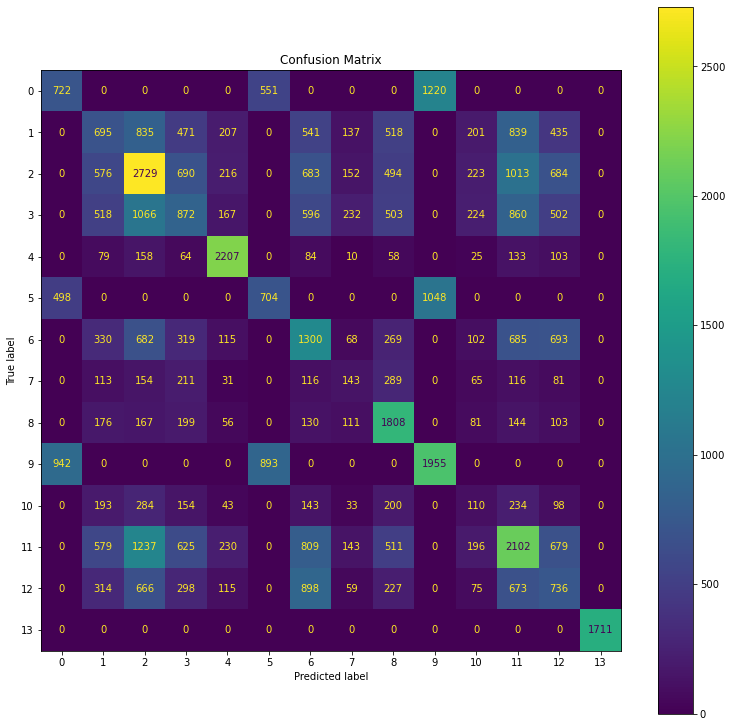

In [36]:
cm2 = confusion_matrix(y_test, CBC_test_pred2);
cmp2 = ConfusionMatrixDisplay(cm2);
fig, ax = plt.subplots(figsize=(13,13));
cmp2.plot(ax=ax);
cmp2.ax_.set_title("Confusion Matrix");

In [37]:
print ("My program took", time.time() - start_time, "to run")

My program took 8734.24699831009 to run
